In [1]:
import pandas as p
import matplotlib.pyplot as plt

In [4]:
df = p.read_csv("data/electricityConsumptionAndProductioction.csv")
df.head(10)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
5,2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30
6,2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31
7,2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34
8,2019-01-01 08:00:00,5510,5471,1391,51,1325,1357,1303,8,34
9,2019-01-01 09:00:00,5617,5545,1388,15,1398,1328,1319,61,34


<Figure size 720x864 with 0 Axes>

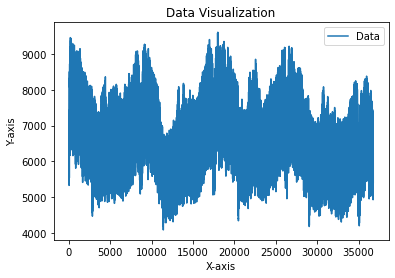

In [71]:
plt.figure(figsize=(10, 12))

df.plot(y='Consumption', label='Data')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [24]:
total_consumption = df['Consumption'].sum()
total_production = df['Production'].sum()
total_production_1 = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum().sum()

print(f"Total Consumption: {total_consumption} kWh")
print(f"Total Production (Production column): {total_production} kWh")
print(f"Total Production (sum of energy columns): {total_production_1} kWh")

Total Consumption: 246663814 kWh
Total Production (Production column): 240627528 kWh
Total Production (sum of energy columns): 240588004 kWh


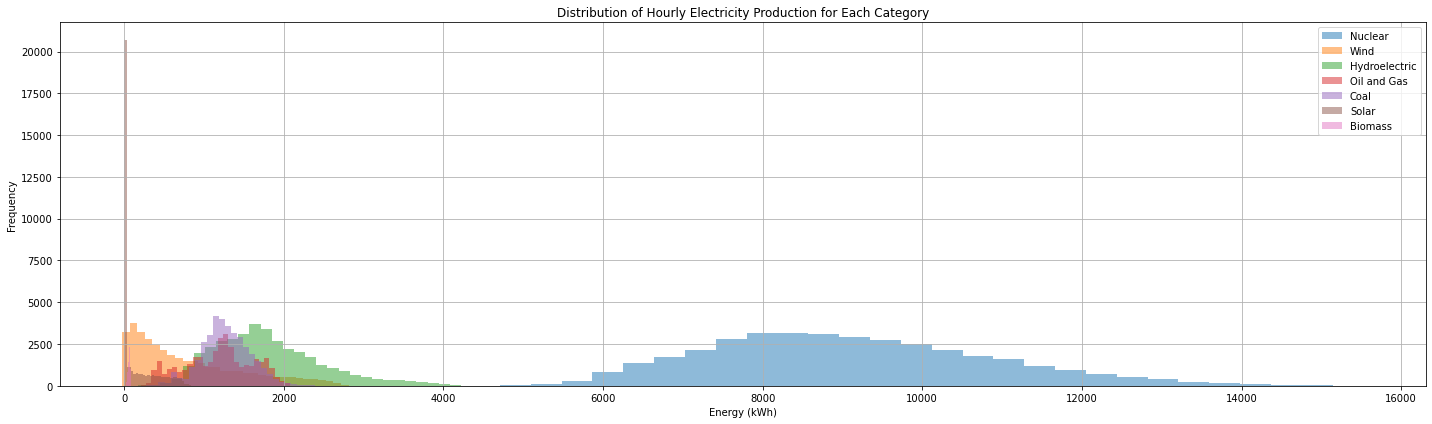

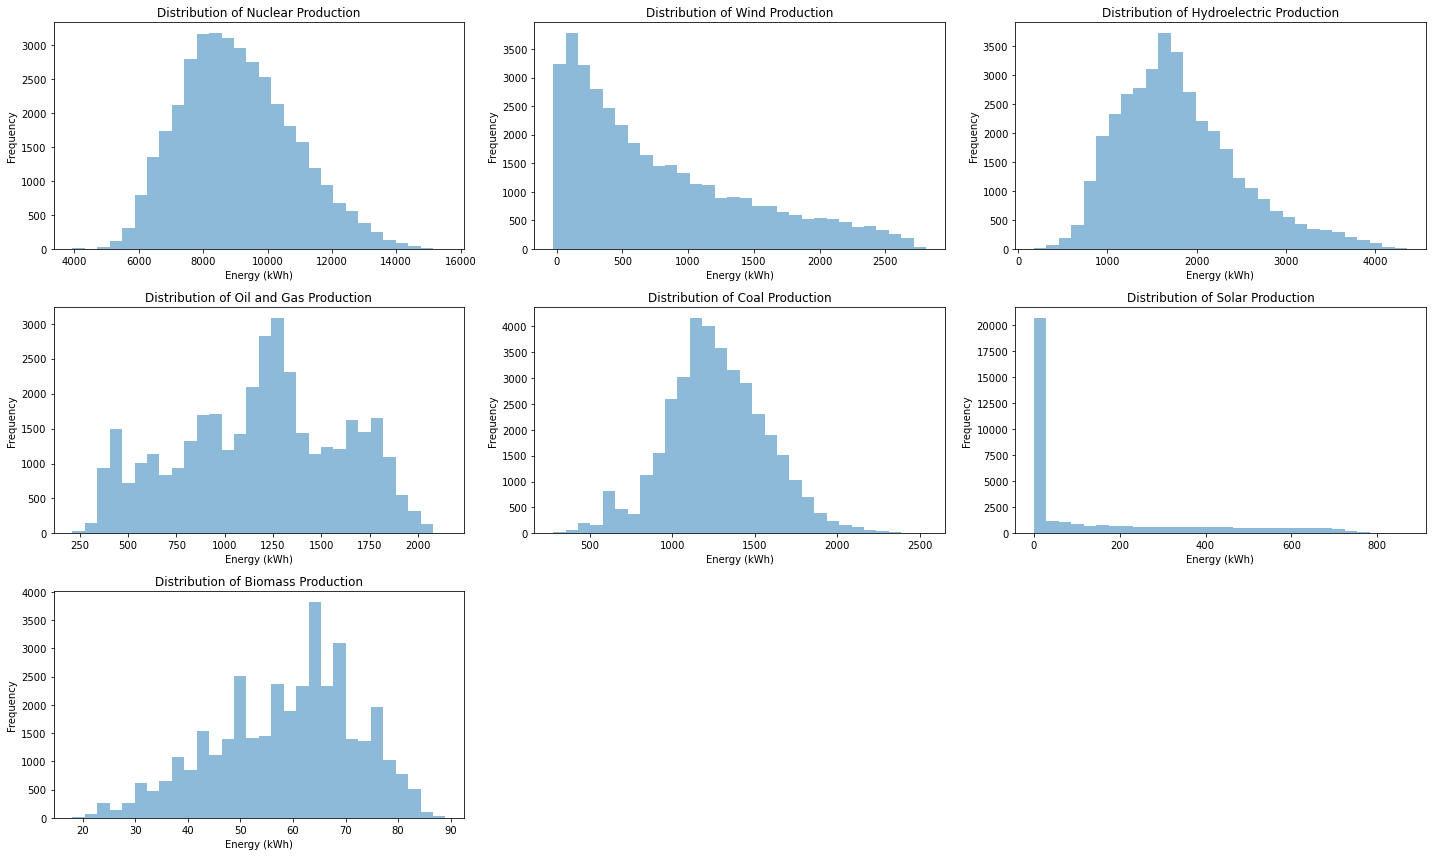

In [59]:

plt.figure(figsize=(20, 6))

production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

for category in production_categories:
    plt.hist(df[category].dropna(), bins=30, alpha=0.5, label=category)

plt.xlabel('Energy (kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Hourly Electricity Production for Each Category')
plt.grid(True)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20, 12))

for i, category in enumerate(production_categories):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.hist(df[category].dropna(), bins=30, alpha=0.5)
    
    ax.set_xlabel('Energy (kWh)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {category} Production')
    
plt.tight_layout()
plt.show()


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

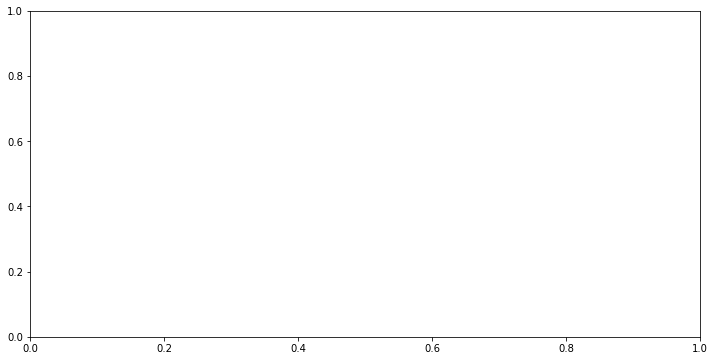

In [43]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'.

plt.figure(figsize=(12, 6))

# List of production categories
production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Set the time as the x-axis
x = df.index

# Initialize a variable to keep track of the bottom values for stacking
bottom = None

# Loop through each production category and create a stacked bar
for category in production_categories:
    plt.bar(x, df[category], label=category, alpha=0.7, bottom=bottom)
    if bottom is None:
        bottom = df[category]
    else:
        bottom += df[category]

plt.xlabel('Time')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.title('Hourly Electricity Production by Category Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


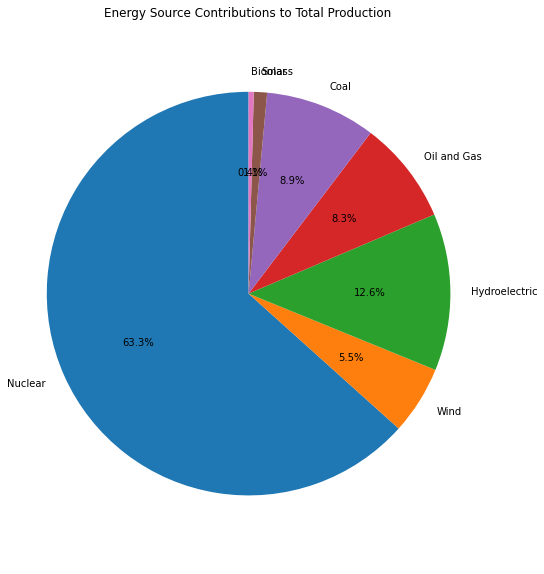

In [58]:
production_by_source = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum()
source_labels = production_by_source.index

plt.figure(figsize=(8, 10))
plt.pie(production_by_source, labels=source_labels, autopct='%1.1f%%', startangle=90)
plt.title('Energy Source Contributions to Total Production')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

In [14]:
max_consumption_hour = df['Consumption'].idxmax()
max_production_hour = df[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].sum(axis=1).idxmax()

print(f"Hour of Peak Consumption: {max_consumption_hour}")
print(f"Hour of Peak Production: {max_production_hour}")

Hour of Peak Consumption: 17988
Hour of Peak Production: 35709


In [15]:
df['DayOfWeek'] = df.index.day_name()
average_daily_consumption = df.groupby('DayOfWeek')['Consumption'].mean()
average_daily_production = df.groupby('DayOfWeek')[['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_daily_consumption.index, average_daily_consumption, label='Average Consumption', marker='o')
plt.plot(average_daily_production.index, average_daily_production['Nuclear'], label='Average Nuclear Production', marker='o')
# Repeat for other production categories
plt.xlabel('Day of the Week')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.title('Seasonal and Weekly Patterns')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'day_name'

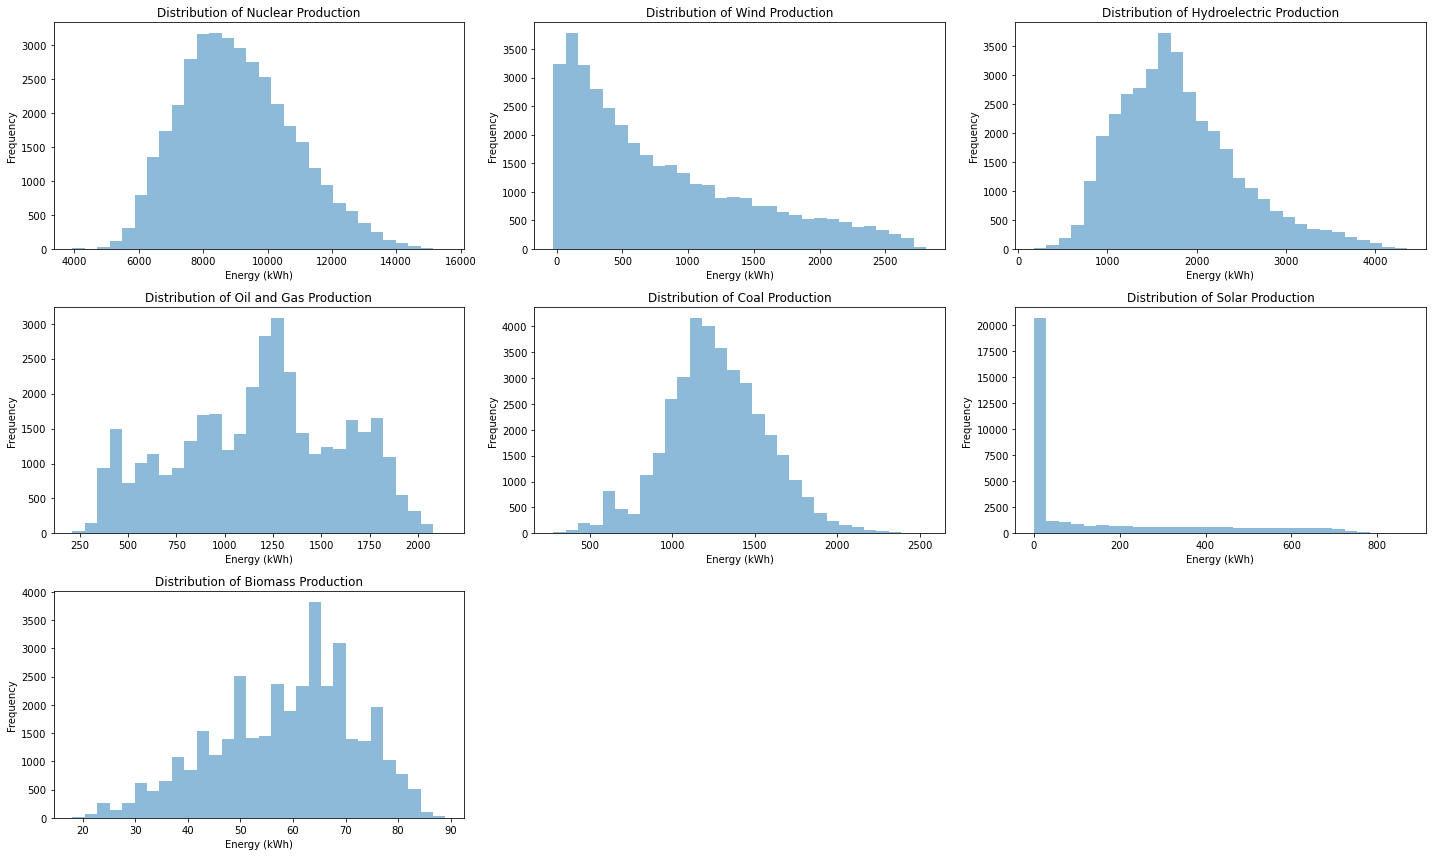

In [49]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'.

production_categories = ['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Create a new figure
fig = plt.figure(figsize=(20, 12))

# Loop through each production category and create individual histograms
for i, category in enumerate(production_categories):
    # Create a subplot for the current category
    ax = fig.add_subplot(3, 3, i + 1)  # Assuming 3x3 grid for up to 9 categories
    
    # Plot the histogram for the current category
    ax.hist(df[category].dropna(), bins=30, alpha=0.5)
    
    # Set labels and title
    ax.set_xlabel('Energy (kWh)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {category} Production')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [70]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

# Display count and unique values for categorical (non-numeric) columns
for column in df:
    print(f"\nColumn: {column}")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Unique values: {df[column].unique()}")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB
None

Summary Statistics for Numerical Columns:
        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  36772.000000  36772.000000  36772.000000  36772.000000   36772.000000   
mean    6707.924889   6543.770478   9071.268683    785.700723    1801.603149   
std     1034.961146  

In [69]:
import pandas as pd

# Load your dataset (assuming you have it loaded into a DataFrame named 'df')

# 1. Minimum and Maximum Values for Each Column
min_values = df.min()
max_values = df.max()

# 2. Average (Mean) Values for Each Column
average_values = df.mean()

# 3. Common Values (Mode) for Each Column
common_values = df.mode().iloc[0]

# 4. Percentage of Missing or Incomplete Values for Each Column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine the results into a summary DataFrame
summary_df = pd.DataFrame({
    'Minimum Value': min_values,
    'Maximum Value': max_values,
    'Average Value': average_values,
    'Common Value': common_values,
    'Missing Percentage': missing_percentage
})

# Sort the summary DataFrame by the missing percentage in descending order
summary_df = summary_df.sort_values(by='Missing Percentage', ascending=False)

# Display the top 10 most important pieces of information
top_10_info = summary_df.head(10)
print(top_10_info)

TypeError: Could not convert ['2019-01-01 00:00:002019-01-01 01:00:002019-01-01 02:00:002019-01-01 03:00:002019-01-01 04:00:002019-01-01 05:00:002019-01-01 06:00:002019-01-01 07:00:002019-01-01 08:00:002019-01-01 09:00:002019-01-01 10:00:002019-01-01 11:00:002019-01-01 12:00:002019-01-01 13:00:002019-01-01 14:00:002019-01-01 15:00:002019-01-01 16:00:002019-01-01 17:00:002019-01-01 18:00:002019-01-01 19:00:002019-01-01 20:00:002019-01-01 21:00:002019-01-01 22:00:002019-01-01 23:00:002019-01-02 00:00:002019-01-02 01:00:002019-01-02 02:00:002019-01-02 03:00:002019-01-02 04:00:002019-01-02 05:00:002019-01-02 06:00:002019-01-02 07:00:002019-01-02 08:00:002019-01-02 09:00:002019-01-02 10:00:002019-01-02 11:00:002019-01-02 12:00:002019-01-02 13:00:002019-01-02 14:00:002019-01-02 15:00:002019-01-02 16:00:002019-01-02 17:00:002019-01-02 18:00:002019-01-02 19:00:002019-01-02 20:00:002019-01-02 21:00:002019-01-02 22:00:002019-01-02 23:00:002019-01-03 00:00:002019-01-03 01:00:002019-01-03 02:00:002019-01-03 03:00:002019-01-03 04:00:002019-01-03 05:00:002019-01-03 06:00:002019-01-03 07:00:002019-01-03 08:00:002019-01-03 09:00:002019-01-03 10:00:002019-01-03 11:00:002019-01-03 12:00:002019-01-03 13:00:002019-01-03 14:00:002019-01-03 15:00:002019-01-03 16:00:002019-01-03 17:00:002019-01-03 18:00:002019-01-03 19:00:002019-01-03 20:00:002019-01-03 21:00:002019-01-03 22:00:002019-01-03 23:00:002019-01-04 00:00:002019-01-04 01:00:002019-01-04 02:00:002019-01-04 03:00:002019-01-04 04:00:002019-01-04 05:00:002019-01-04 06:00:002019-01-04 07:00:002019-01-04 08:00:002019-01-04 09:00:002019-01-04 10:00:002019-01-04 11:00:002019-01-04 12:00:002019-01-04 13:00:002019-01-04 14:00:002019-01-04 15:00:002019-01-04 16:00:002019-01-04 17:00:002019-01-04 18:00:002019-01-04 19:00:002019-01-04 20:00:002019-01-04 21:00:002019-01-04 22:00:002019-01-04 23:00:002019-01-05 00:00:002019-01-05 01:00:002019-01-05 02:00:002019-01-05 03:00:002019-01-05 04:00:002019-01-05 05:00:002019-01-05 06:00:002019-01-05 07:00:002019-01-05 08:00:002019-01-05 09:00:002019-01-05 10:00:002019-01-05 11:00:002019-01-05 12:00:002019-01-05 13:00:002019-01-05 14:00:002019-01-05 15:00:002019-01-05 16:00:002019-01-05 17:00:002019-01-05 18:00:002019-01-05 19:00:002019-01-05 20:00:002019-01-05 21:00:002019-01-05 22:00:002019-01-05 23:00:002019-01-06 00:00:002019-01-06 01:00:002019-01-06 02:00:002019-01-06 03:00:002019-01-06 04:00:002019-01-06 05:00:002019-01-06 06:00:002019-01-06 07:00:002019-01-06 08:00:002019-01-06 09:00:002019-01-06 10:00:002019-01-06 11:00:002019-01-06 12:00:002019-01-06 13:00:002019-01-06 14:00:002019-01-06 15:00:002019-01-06 16:00:002019-01-06 17:00:002019-01-06 18:00:002019-01-06 19:00:002019-01-06 20:00:002019-01-06 21:00:002019-01-06 22:00:002019-01-06 23:00:002019-01-07 00:00:002019-01-07 01:00:002019-01-07 02:00:002019-01-07 03:00:002019-01-07 04:00:002019-01-07 05:00:002019-01-07 06:00:002019-01-07 07:00:002019-01-07 08:00:002019-01-07 09:00:002019-01-07 10:00:002019-01-07 11:00:002019-01-07 12:00:002019-01-07 13:00:002019-01-07 14:00:002019-01-07 15:00:002019-01-07 16:00:002019-01-07 17:00:002019-01-07 18:00:002019-01-07 19:00:002019-01-07 20:00:002019-01-07 21:00:002019-01-07 22:00:002019-01-07 23:00:002019-01-08 00:00:002019-01-08 01:00:002019-01-08 02:00:002019-01-08 03:00:002019-01-08 04:00:002019-01-08 05:00:002019-01-08 06:00:002019-01-08 07:00:002019-01-08 08:00:002019-01-08 09:00:002019-01-08 10:00:002019-01-08 11:00:002019-01-08 12:00:002019-01-08 13:00:002019-01-08 14:00:002019-01-08 15:00:002019-01-08 16:00:002019-01-08 17:00:002019-01-08 18:00:002019-01-08 19:00:002019-01-08 20:00:002019-01-08 21:00:002019-01-08 22:00:002019-01-08 23:00:002019-01-09 00:00:002019-01-09 01:00:002019-01-09 02:00:002019-01-09 03:00:002019-01-09 04:00:002019-01-09 05:00:002019-01-09 06:00:002019-01-09 07:00:002019-01-09 08:00:002019-01-09 09:00:002019-01-09 10:00:002019-01-09 11:00:002019-01-09 12:00:002019-01-09 13:00:002019-01-09 14:00:002019-01-09 15:00:002019-01-09 16:00:002019-01-09 17:00:002019-01-09 18:00:002019-01-09 19:00:002019-01-09 20:00:002019-01-09 21:00:002019-01-09 22:00:002019-01-09 23:00:002019-01-10 00:00:002019-01-10 01:00:002019-01-10 02:00:002019-01-10 03:00:002019-01-10 04:00:002019-01-10 05:00:002019-01-10 06:00:002019-01-10 07:00:002019-01-10 08:00:002019-01-10 09:00:002019-01-10 10:00:002019-01-10 11:00:002019-01-10 12:00:002019-01-10 13:00:002019-01-10 14:00:002019-01-10 15:00:002019-01-10 16:00:002019-01-10 17:00:002019-01-10 18:00:002019-01-10 19:00:002019-01-10 20:00:002019-01-10 21:00:002019-01-10 22:00:002019-01-10 23:00:002019-01-11 00:00:002019-01-11 01:00:002019-01-11 02:00:002019-01-11 03:00:002019-01-11 04:00:002019-01-11 05:00:002019-01-11 06:00:002019-01-11 07:00:002019-01-11 08:00:002019-01-11 09:00:002019-01-11 10:00:002019-01-11 11:00:002019-01-11 12:00:002019-01-11 13:00:002019-01-11 14:00:002019-01-11 15:00:002019-01-11 16:00:002019-01-11 17:00:002019-01-11 18:00:002019-01-11 19:00:002019-01-11 20:00:002019-01-11 21:00:002019-01-11 22:00:002019-01-11 23:00:002019-01-12 00:00:002019-01-12 01:00:002019-01-12 02:00:002019-01-12 03:00:002019-01-12 04:00:002019-01-12 05:00:002019-01-12 06:00:002019-01-12 07:00:002019-01-12 08:00:002019-01-12 09:00:002019-01-12 10:00:002019-01-12 11:00:002019-01-12 12:00:002019-01-12 13:00:002019-01-12 14:00:002019-01-12 15:00:002019-01-12 16:00:002019-01-12 17:00:002019-01-12 18:00:002019-01-12 19:00:002019-01-12 20:00:002019-01-12 21:00:002019-01-12 22:00:002019-01-12 23:00:002019-01-13 00:00:002019-01-13 01:00:002019-01-13 02:00:002019-01-13 03:00:002019-01-13 04:00:002019-01-13 05:00:002019-01-13 06:00:002019-01-13 07:00:002019-01-13 08:00:002019-01-13 09:00:002019-01-13 10:00:002019-01-13 11:00:002019-01-13 12:00:002019-01-13 13:00:002019-01-13 14:00:002019-01-13 15:00:002019-01-13 16:00:002019-01-13 17:00:002019-01-13 18:00:002019-01-13 19:00:002019-01-13 20:00:002019-01-13 21:00:002019-01-13 22:00:002019-01-13 23:00:002019-01-14 00:00:002019-01-14 01:00:002019-01-14 02:00:002019-01-14 03:00:002019-01-14 04:00:002019-01-14 05:00:002019-01-14 06:00:002019-01-14 07:00:002019-01-14 08:00:002019-01-14 09:00:002019-01-14 10:00:002019-01-14 11:00:002019-01-14 12:00:002019-01-14 13:00:002019-01-14 14:00:002019-01-14 15:00:002019-01-14 16:00:002019-01-14 17:00:002019-01-14 18:00:002019-01-14 19:00:002019-01-14 20:00:002019-01-14 21:00:002019-01-14 22:00:002019-01-14 23:00:002019-01-15 00:00:002019-01-15 01:00:002019-01-15 02:00:002019-01-15 03:00:002019-01-15 04:00:002019-01-15 05:00:002019-01-15 06:00:002019-01-15 07:00:002019-01-15 08:00:002019-01-15 09:00:002019-01-15 10:00:002019-01-15 11:00:002019-01-15 12:00:002019-01-15 13:00:002019-01-15 14:00:002019-01-15 15:00:002019-01-15 16:00:002019-01-15 17:00:002019-01-15 18:00:002019-01-15 19:00:002019-01-15 20:00:002019-01-15 21:00:002019-01-15 22:00:002019-01-15 23:00:002019-01-16 00:00:002019-01-16 01:00:002019-01-16 02:00:002019-01-16 03:00:002019-01-16 04:00:002019-01-16 05:00:002019-01-16 06:00:002019-01-16 07:00:002019-01-16 08:00:002019-01-16 09:00:002019-01-16 10:00:002019-01-16 11:00:002019-01-16 12:00:002019-01-16 13:00:002019-01-16 14:00:002019-01-16 15:00:002019-01-16 16:00:002019-01-16 17:00:002019-01-16 18:00:002019-01-16 19:00:002019-01-16 20:00:002019-01-16 21:00:002019-01-16 22:00:002019-01-16 23:00:002019-01-17 00:00:002019-01-17 01:00:002019-01-17 02:00:002019-01-17 03:00:002019-01-17 04:00:002019-01-17 05:00:002019-01-17 06:00:002019-01-17 07:00:002019-01-17 08:00:002019-01-17 09:00:002019-01-17 10:00:002019-01-17 11:00:002019-01-17 12:00:002019-01-17 13:00:002019-01-17 14:00:002019-01-17 15:00:002019-01-17 16:00:002019-01-17 17:00:002019-01-17 18:00:002019-01-17 19:00:002019-01-17 20:00:002019-01-17 21:00:002019-01-17 22:00:002019-01-17 23:00:002019-01-18 00:00:002019-01-18 01:00:002019-01-18 02:00:002019-01-18 03:00:002019-01-18 04:00:002019-01-18 05:00:002019-01-18 06:00:002019-01-18 07:00:002019-01-18 08:00:002019-01-18 09:00:002019-01-18 10:00:002019-01-18 11:00:002019-01-18 12:00:002019-01-18 13:00:002019-01-18 14:00:002019-01-18 15:00:002019-01-18 16:00:002019-01-18 17:00:002019-01-18 18:00:002019-01-18 19:00:002019-01-18 20:00:002019-01-18 21:00:002019-01-18 22:00:002019-01-18 23:00:002019-01-19 00:00:002019-01-19 01:00:002019-01-19 02:00:002019-01-19 03:00:002019-01-19 04:00:002019-01-19 05:00:002019-01-19 06:00:002019-01-19 07:00:002019-01-19 08:00:002019-01-19 09:00:002019-01-19 10:00:002019-01-19 11:00:002019-01-19 12:00:002019-01-19 13:00:002019-01-19 14:00:002019-01-19 15:00:002019-01-19 16:00:002019-01-19 17:00:002019-01-19 18:00:002019-01-19 19:00:002019-01-19 20:00:002019-01-19 21:00:002019-01-19 22:00:002019-01-19 23:00:002019-01-20 00:00:002019-01-20 01:00:002019-01-20 02:00:002019-01-20 03:00:002019-01-20 04:00:002019-01-20 05:00:002019-01-20 06:00:002019-01-20 07:00:002019-01-20 08:00:002019-01-20 09:00:002019-01-20 10:00:002019-01-20 11:00:002019-01-20 12:00:002019-01-20 13:00:002019-01-20 14:00:002019-01-20 15:00:002019-01-20 16:00:002019-01-20 17:00:002019-01-20 18:00:002019-01-20 19:00:002019-01-20 20:00:002019-01-20 21:00:002019-01-20 22:00:002019-01-20 23:00:002019-01-21 00:00:002019-01-21 01:00:002019-01-21 02:00:002019-01-21 03:00:002019-01-21 04:00:002019-01-21 05:00:002019-01-21 06:00:002019-01-21 07:00:002019-01-21 08:00:002019-01-21 09:00:002019-01-21 10:00:002019-01-21 11:00:002019-01-21 12:00:002019-01-21 13:00:002019-01-21 14:00:002019-01-21 15:00:002019-01-21 16:00:002019-01-21 17:00:002019-01-21 18:00:002019-01-21 19:00:002019-01-21 20:00:002019-01-21 21:00:002019-01-21 22:00:002019-01-21 23:00:002019-01-22 00:00:002019-01-22 01:00:002019-01-22 02:00:002019-01-22 03:00:002019-01-22 04:00:002019-01-22 05:00:002019-01-22 06:00:002019-01-22 07:00:002019-01-22 08:00:002019-01-22 09:00:002019-01-22 10:00:002019-01-22 11:00:002019-01-22 12:00:002019-01-22 13:00:002019-01-22 14:00:002019-01-22 15:00:002019-01-22 16:00:002019-01-22 17:00:002019-01-22 18:00:002019-01-22 19:00:002019-01-22 20:00:002019-01-22 21:00:002019-01-22 22:00:002019-01-22 23:00:002019-01-23 00:00:002019-01-23 01:00:002019-01-23 02:00:002019-01-23 03:00:002019-01-23 04:00:002019-01-23 05:00:002019-01-23 06:00:002019-01-23 07:00:002019-01-23 08:00:002019-01-23 09:00:002019-01-23 10:00:002019-01-23 11:00:002019-01-23 12:00:002019-01-23 13:00:002019-01-23 14:00:002019-01-23 15:00:002019-01-23 16:00:002019-01-23 17:00:002019-01-23 18:00:002019-01-23 19:00:002019-01-23 20:00:002019-01-23 21:00:002019-01-23 22:00:002019-01-23 23:00:002019-01-24 00:00:002019-01-24 01:00:002019-01-24 02:00:002019-01-24 03:00:002019-01-24 04:00:002019-01-24 05:00:002019-01-24 06:00:002019-01-24 07:00:002019-01-24 08:00:002019-01-24 09:00:002019-01-24 10:00:002019-01-24 11:00:002019-01-24 12:00:002019-01-24 13:00:002019-01-24 14:00:002019-01-24 15:00:002019-01-24 16:00:002019-01-24 17:00:002019-01-24 18:00:002019-01-24 19:00:002019-01-24 20:00:002019-01-24 21:00:002019-01-24 22:00:002019-01-24 23:00:002019-01-25 00:00:002019-01-25 01:00:002019-01-25 02:00:002019-01-25 03:00:002019-01-25 04:00:002019-01-25 05:00:002019-01-25 06:00:002019-01-25 07:00:002019-01-25 08:00:002019-01-25 09:00:002019-01-25 10:00:002019-01-25 11:00:002019-01-25 12:00:002019-01-25 13:00:002019-01-25 14:00:002019-01-25 15:00:002019-01-25 16:00:002019-01-25 17:00:002019-01-25 18:00:002019-01-25 19:00:002019-01-25 20:00:002019-01-25 21:00:002019-01-25 22:00:002019-01-25 23:00:002019-01-26 00:00:002019-01-26 01:00:002019-01-26 02:00:002019-01-26 03:00:002019-01-26 04:00:002019-01-26 05:00:002019-01-26 06:00:002019-01-26 07:00:002019-01-26 08:00:002019-01-26 09:00:002019-01-26 10:00:002019-01-26 11:00:002019-01-26 12:00:002019-01-26 13:00:002019-01-26 14:00:002019-01-26 15:00:002019-01-26 16:00:002019-01-26 17:00:002019-01-26 18:00:002019-01-26 19:00:002019-01-26 20:00:002019-01-26 21:00:002019-01-26 22:00:002019-01-26 23:00:002019-01-27 00:00:002019-01-27 01:00:002019-01-27 02:00:002019-01-27 03:00:002019-01-27 04:00:002019-01-27 05:00:002019-01-27 06:00:002019-01-27 07:00:002019-01-27 08:00:002019-01-27 09:00:002019-01-27 10:00:002019-01-27 11:00:002019-01-27 12:00:002019-01-27 13:00:002019-01-27 14:00:002019-01-27 15:00:002019-01-27 16:00:002019-01-27 17:00:002019-01-27 18:00:002019-01-27 19:00:002019-01-27 20:00:002019-01-27 21:00:002019-01-27 22:00:002019-01-27 23:00:002019-01-28 00:00:002019-01-28 01:00:002019-01-28 02:00:002019-01-28 03:00:002019-01-28 04:00:002019-01-28 05:00:002019-01-28 06:00:002019-01-28 07:00:002019-01-28 08:00:002019-01-28 09:00:002019-01-28 10:00:002019-01-28 11:00:002019-01-28 12:00:002019-01-28 13:00:002019-01-28 14:00:002019-01-28 15:00:002019-01-28 16:00:002019-01-28 17:00:002019-01-28 18:00:002019-01-28 19:00:002019-01-28 20:00:002019-01-28 21:00:002019-01-28 22:00:002019-01-28 23:00:002019-01-29 00:00:002019-01-29 01:00:002019-01-29 02:00:002019-01-29 03:00:002019-01-29 04:00:002019-01-29 05:00:002019-01-29 06:00:002019-01-29 07:00:002019-01-29 08:00:002019-01-29 09:00:002019-01-29 10:00:002019-01-29 11:00:002019-01-29 12:00:002019-01-29 13:00:002019-01-29 14:00:002019-01-29 15:00:002019-01-29 16:00:002019-01-29 17:00:002019-01-29 18:00:002019-01-29 19:00:002019-01-29 20:00:002019-01-29 21:00:002019-01-29 22:00:002019-01-29 23:00:002019-01-30 00:00:002019-01-30 01:00:002019-01-30 02:00:002019-01-30 03:00:002019-01-30 04:00:002019-01-30 05:00:002019-01-30 06:00:002019-01-30 07:00:002019-01-30 08:00:002019-01-30 09:00:002019-01-30 10:00:002019-01-30 11:00:002019-01-30 12:00:002019-01-30 13:00:002019-01-30 14:00:002019-01-30 15:00:002019-01-30 16:00:002019-01-30 17:00:002019-01-30 18:00:002019-01-30 19:00:002019-01-30 20:00:002019-01-30 21:00:002019-01-30 22:00:002019-01-30 23:00:002019-01-31 00:00:002019-01-31 01:00:002019-01-31 02:00:002019-01-31 03:00:002019-01-31 04:00:002019-01-31 05:00:002019-01-31 06:00:002019-01-31 07:00:002019-01-31 08:00:002019-01-31 09:00:002019-01-31 10:00:002019-01-31 11:00:002019-01-31 12:00:002019-01-31 13:00:002019-01-31 14:00:002019-01-31 15:00:002019-01-31 16:00:002019-01-31 17:00:002019-01-31 18:00:002019-01-31 19:00:002019-01-31 20:00:002019-01-31 21:00:002019-01-31 22:00:002019-01-31 23:00:002019-02-01 00:00:002019-02-01 01:00:002019-02-01 02:00:002019-02-01 03:00:002019-02-01 04:00:002019-02-01 05:00:002019-02-01 06:00:002019-02-01 07:00:002019-02-01 08:00:002019-02-01 09:00:002019-02-01 10:00:002019-02-01 11:00:002019-02-01 12:00:002019-02-01 13:00:002019-02-01 14:00:002019-02-01 15:00:002019-02-01 16:00:002019-02-01 17:00:002019-02-01 18:00:002019-02-01 19:00:002019-02-01 20:00:002019-02-01 21:00:002019-02-01 22:00:002019-02-01 23:00:002019-02-02 00:00:002019-02-02 01:00:002019-02-02 02:00:002019-02-02 03:00:002019-02-02 04:00:002019-02-02 05:00:002019-02-02 06:00:002019-02-02 07:00:002019-02-02 08:00:002019-02-02 09:00:002019-02-02 10:00:002019-02-02 11:00:002019-02-02 12:00:002019-02-02 13:00:002019-02-02 14:00:002019-02-02 15:00:002019-02-02 16:00:002019-02-02 17:00:002019-02-02 18:00:002019-02-02 19:00:002019-02-02 20:00:002019-02-02 21:00:002019-02-02 22:00:002019-02-02 23:00:002019-02-03 00:00:002019-02-03 01:00:002019-02-03 02:00:002019-02-03 03:00:002019-02-03 04:00:002019-02-03 05:00:002019-02-03 06:00:002019-02-03 07:00:002019-02-03 08:00:002019-02-03 09:00:002019-02-03 10:00:002019-02-03 11:00:002019-02-03 12:00:002019-02-03 13:00:002019-02-03 14:00:002019-02-03 15:00:002019-02-03 16:00:002019-02-03 17:00:002019-02-03 18:00:002019-02-03 19:00:002019-02-03 20:00:002019-02-03 21:00:002019-02-03 22:00:002019-02-03 23:00:002019-02-04 00:00:002019-02-04 01:00:002019-02-04 02:00:002019-02-04 03:00:002019-02-04 04:00:002019-02-04 05:00:002019-02-04 06:00:002019-02-04 07:00:002019-02-04 08:00:002019-02-04 09:00:002019-02-04 10:00:002019-02-04 11:00:002019-02-04 12:00:002019-02-04 13:00:002019-02-04 14:00:002019-02-04 15:00:002019-02-04 16:00:002019-02-04 17:00:002019-02-04 18:00:002019-02-04 19:00:002019-02-04 20:00:002019-02-04 21:00:002019-02-04 22:00:002019-02-04 23:00:002019-02-05 00:00:002019-02-05 01:00:002019-02-05 02:00:002019-02-05 03:00:002019-02-05 04:00:002019-02-05 05:00:002019-02-05 06:00:002019-02-05 07:00:002019-02-05 08:00:002019-02-05 09:00:002019-02-05 10:00:002019-02-05 11:00:002019-02-05 12:00:002019-02-05 13:00:002019-02-05 14:00:002019-02-05 15:00:002019-02-05 16:00:002019-02-05 17:00:002019-02-05 18:00:002019-02-05 19:00:002019-02-05 20:00:002019-02-05 21:00:002019-02-05 22:00:002019-02-05 23:00:002019-02-06 00:00:002019-02-06 01:00:002019-02-06 02:00:002019-02-06 03:00:002019-02-06 04:00:002019-02-06 05:00:002019-02-06 06:00:002019-02-06 07:00:002019-02-06 08:00:002019-02-06 09:00:002019-02-06 10:00:002019-02-06 11:00:002019-02-06 12:00:002019-02-06 13:00:002019-02-06 14:00:002019-02-06 15:00:002019-02-06 16:00:002019-02-06 17:00:002019-02-06 18:00:002019-02-06 19:00:002019-02-06 20:00:002019-02-06 21:00:002019-02-06 22:00:002019-02-06 23:00:002019-02-07 00:00:002019-02-07 01:00:002019-02-07 02:00:002019-02-07 03:00:002019-02-07 04:00:002019-02-07 05:00:002019-02-07 06:00:002019-02-07 07:00:002019-02-07 08:00:002019-02-07 09:00:002019-02-07 10:00:002019-02-07 11:00:002019-02-07 12:00:002019-02-07 13:00:002019-02-07 14:00:002019-02-07 15:00:002019-02-07 16:00:002019-02-07 17:00:002019-02-07 18:00:002019-02-07 19:00:002019-02-07 20:00:002019-02-07 21:00:002019-02-07 22:00:002019-02-07 23:00:002019-02-08 00:00:002019-02-08 01:00:002019-02-08 02:00:002019-02-08 03:00:002019-02-08 04:00:002019-02-08 05:00:002019-02-08 06:00:002019-02-08 07:00:002019-02-08 08:00:002019-02-08 09:00:002019-02-08 10:00:002019-02-08 11:00:002019-02-08 12:00:002019-02-08 13:00:002019-02-08 14:00:002019-02-08 15:00:002019-02-08 16:00:002019-02-08 17:00:002019-02-08 18:00:002019-02-08 19:00:002019-02-08 20:00:002019-02-08 21:00:002019-02-08 22:00:002019-02-08 23:00:002019-02-09 00:00:002019-02-09 01:00:002019-02-09 02:00:002019-02-09 03:00:002019-02-09 04:00:002019-02-09 05:00:002019-02-09 06:00:002019-02-09 07:00:002019-02-09 08:00:002019-02-09 09:00:002019-02-09 10:00:002019-02-09 11:00:002019-02-09 12:00:002019-02-09 13:00:002019-02-09 14:00:002019-02-09 15:00:002019-02-09 16:00:002019-02-09 17:00:002019-02-09 18:00:002019-02-09 19:00:002019-02-09 20:00:002019-02-09 21:00:002019-02-09 22:00:002019-02-09 23:00:002019-02-10 00:00:002019-02-10 01:00:002019-02-10 02:00:002019-02-10 03:00:002019-02-10 04:00:002019-02-10 05:00:002019-02-10 06:00:002019-02-10 07:00:002019-02-10 08:00:002019-02-10 09:00:002019-02-10 10:00:002019-02-10 11:00:002019-02-10 12:00:002019-02-10 13:00:002019-02-10 14:00:002019-02-10 15:00:002019-02-10 16:00:002019-02-10 17:00:002019-02-10 18:00:002019-02-10 19:00:002019-02-10 20:00:002019-02-10 21:00:002019-02-10 22:00:002019-02-10 23:00:002019-02-11 00:00:002019-02-11 01:00:002019-02-11 02:00:002019-02-11 03:00:002019-02-11 04:00:002019-02-11 05:00:002019-02-11 06:00:002019-02-11 07:00:002019-02-11 08:00:002019-02-11 09:00:002019-02-11 10:00:002019-02-11 11:00:002019-02-11 12:00:002019-02-11 13:00:002019-02-11 14:00:002019-02-11 15:00:002019-02-11 16:00:002019-02-11 17:00:002019-02-11 18:00:002019-02-11 19:00:002019-02-11 20:00:002019-02-11 21:00:002019-02-11 22:00:002019-02-11 23:00:002019-02-12 00:00:002019-02-12 01:00:002019-02-12 02:00:002019-02-12 03:00:002019-02-12 04:00:002019-02-12 05:00:002019-02-12 06:00:002019-02-12 07:00:002019-02-12 08:00:002019-02-12 09:00:002019-02-12 10:00:002019-02-12 11:00:002019-02-12 12:00:002019-02-12 13:00:002019-02-12 14:00:002019-02-12 15:00:002019-02-12 16:00:002019-02-12 17:00:002019-02-12 18:00:002019-02-12 19:00:002019-02-12 20:00:002019-02-12 21:00:002019-02-12 22:00:002019-02-12 23:00:002019-02-13 00:00:002019-02-13 01:00:002019-02-13 02:00:002019-02-13 03:00:002019-02-13 04:00:002019-02-13 05:00:002019-02-13 06:00:002019-02-13 07:00:002019-02-13 08:00:002019-02-13 09:00:002019-02-13 10:00:002019-02-13 11:00:002019-02-13 12:00:002019-02-13 13:00:002019-02-13 14:00:002019-02-13 15:00:002019-02-13 16:00:002019-02-13 17:00:002019-02-13 18:00:002019-02-13 19:00:002019-02-13 20:00:002019-02-13 21:00:002019-02-13 22:00:002019-02-13 23:00:002019-02-14 00:00:002019-02-14 01:00:002019-02-14 02:00:002019-02-14 03:00:002019-02-14 04:00:002019-02-14 05:00:002019-02-14 06:00:002019-02-14 07:00:002019-02-14 08:00:002019-02-14 09:00:002019-02-14 10:00:002019-02-14 11:00:002019-02-14 12:00:002019-02-14 13:00:002019-02-14 14:00:002019-02-14 15:00:002019-02-14 16:00:002019-02-14 17:00:002019-02-14 18:00:002019-02-14 19:00:002019-02-14 20:00:002019-02-14 21:00:002019-02-14 22:00:002019-02-14 23:00:002019-02-15 00:00:002019-02-15 01:00:002019-02-15 02:00:002019-02-15 03:00:002019-02-15 04:00:002019-02-15 05:00:002019-02-15 06:00:002019-02-15 07:00:002019-02-15 08:00:002019-02-15 09:00:002019-02-15 10:00:002019-02-15 11:00:002019-02-15 12:00:002019-02-15 13:00:002019-02-15 14:00:002019-02-15 15:00:002019-02-15 16:00:002019-02-15 17:00:002019-02-15 18:00:002019-02-15 19:00:002019-02-15 20:00:002019-02-15 21:00:002019-02-15 22:00:002019-02-15 23:00:002019-02-16 00:00:002019-02-16 01:00:002019-02-16 02:00:002019-02-16 03:00:002019-02-16 04:00:002019-02-16 05:00:002019-02-16 06:00:002019-02-16 07:00:002019-02-16 08:00:002019-02-16 09:00:002019-02-16 10:00:002019-02-16 11:00:002019-02-16 12:00:002019-02-16 13:00:002019-02-16 14:00:002019-02-16 15:00:002019-02-16 16:00:002019-02-16 17:00:002019-02-16 18:00:002019-02-16 19:00:002019-02-16 20:00:002019-02-16 21:00:002019-02-16 22:00:002019-02-16 23:00:002019-02-17 00:00:002019-02-17 01:00:002019-02-17 02:00:002019-02-17 03:00:002019-02-17 04:00:002019-02-17 05:00:002019-02-17 06:00:002019-02-17 07:00:002019-02-17 08:00:002019-02-17 09:00:002019-02-17 10:00:002019-02-17 11:00:002019-02-17 12:00:002019-02-17 13:00:002019-02-17 14:00:002019-02-17 15:00:002019-02-17 16:00:002019-02-17 17:00:002019-02-17 18:00:002019-02-17 19:00:002019-02-17 20:00:002019-02-17 21:00:002019-02-17 22:00:002019-02-17 23:00:002019-02-18 00:00:002019-02-18 01:00:002019-02-18 02:00:002019-02-18 03:00:002019-02-18 04:00:002019-02-18 05:00:002019-02-18 06:00:002019-02-18 07:00:002019-02-18 08:00:002019-02-18 09:00:002019-02-18 10:00:002019-02-18 11:00:002019-02-18 12:00:002019-02-18 13:00:002019-02-18 14:00:002019-02-18 15:00:002019-02-18 16:00:002019-02-18 17:00:002019-02-18 18:00:002019-02-18 19:00:002019-02-18 20:00:002019-02-18 21:00:002019-02-18 22:00:002019-02-18 23:00:002019-02-19 00:00:002019-02-19 01:00:002019-02-19 02:00:002019-02-19 03:00:002019-02-19 04:00:002019-02-19 05:00:002019-02-19 06:00:002019-02-19 07:00:002019-02-19 08:00:002019-02-19 09:00:002019-02-19 10:00:002019-02-19 11:00:002019-02-19 12:00:002019-02-19 13:00:002019-02-19 14:00:002019-02-19 15:00:002019-02-19 16:00:002019-02-19 17:00:002019-02-19 18:00:002019-02-19 19:00:002019-02-19 20:00:002019-02-19 21:00:002019-02-19 22:00:002019-02-19 23:00:002019-02-20 00:00:002019-02-20 01:00:002019-02-20 02:00:002019-02-20 03:00:002019-02-20 04:00:002019-02-20 05:00:002019-02-20 06:00:002019-02-20 07:00:002019-02-20 08:00:002019-02-20 09:00:002019-02-20 10:00:002019-02-20 11:00:002019-02-20 12:00:002019-02-20 13:00:002019-02-20 14:00:002019-02-20 15:00:002019-02-20 16:00:002019-02-20 17:00:002019-02-20 18:00:002019-02-20 19:00:002019-02-20 20:00:002019-02-20 21:00:002019-02-20 22:00:002019-02-20 23:00:002019-02-21 00:00:002019-02-21 01:00:002019-02-21 02:00:002019-02-21 03:00:002019-02-21 04:00:002019-02-21 05:00:002019-02-21 06:00:002019-02-21 07:00:002019-02-21 08:00:002019-02-21 09:00:002019-02-21 10:00:002019-02-21 11:00:002019-02-21 12:00:002019-02-21 13:00:002019-02-21 14:00:002019-02-21 15:00:002019-02-21 16:00:002019-02-21 17:00:002019-02-21 18:00:002019-02-21 19:00:002019-02-21 20:00:002019-02-21 21:00:002019-02-21 22:00:002019-02-21 23:00:002019-02-22 00:00:002019-02-22 01:00:002019-02-22 02:00:002019-02-22 03:00:002019-02-22 04:00:002019-02-22 05:00:002019-02-22 06:00:002019-02-22 07:00:002019-02-22 08:00:002019-02-22 09:00:002019-02-22 10:00:002019-02-22 11:00:002019-02-22 12:00:002019-02-22 13:00:002019-02-22 14:00:002019-02-22 15:00:002019-02-22 16:00:002019-02-22 17:00:002019-02-22 18:00:002019-02-22 19:00:002019-02-22 20:00:002019-02-22 21:00:002019-02-22 22:00:002019-02-22 23:00:002019-02-23 00:00:002019-02-23 01:00:002019-02-23 02:00:002019-02-23 03:00:002019-02-23 04:00:002019-02-23 05:00:002019-02-23 06:00:002019-02-23 07:00:002019-02-23 08:00:002019-02-23 09:00:002019-02-23 10:00:002019-02-23 11:00:002019-02-23 12:00:002019-02-23 13:00:002019-02-23 14:00:002019-02-23 15:00:002019-02-23 16:00:002019-02-23 17:00:002019-02-23 18:00:002019-02-23 19:00:002019-02-23 20:00:002019-02-23 21:00:002019-02-23 22:00:002019-02-23 23:00:002019-02-24 00:00:002019-02-24 01:00:002019-02-24 02:00:002019-02-24 03:00:002019-02-24 04:00:002019-02-24 05:00:002019-02-24 06:00:002019-02-24 07:00:002019-02-24 08:00:002019-02-24 09:00:002019-02-24 10:00:002019-02-24 11:00:002019-02-24 12:00:002019-02-24 13:00:002019-02-24 14:00:002019-02-24 15:00:002019-02-24 16:00:002019-02-24 17:00:002019-02-24 18:00:002019-02-24 19:00:002019-02-24 20:00:002019-02-24 21:00:002019-02-24 22:00:002019-02-24 23:00:002019-02-25 00:00:002019-02-25 01:00:002019-02-25 02:00:002019-02-25 03:00:002019-02-25 04:00:002019-02-25 05:00:002019-02-25 06:00:002019-02-25 07:00:002019-02-25 08:00:002019-02-25 09:00:002019-02-25 10:00:002019-02-25 11:00:002019-02-25 12:00:002019-02-25 13:00:002019-02-25 14:00:002019-02-25 15:00:002019-02-25 16:00:002019-02-25 17:00:002019-02-25 18:00:002019-02-25 19:00:002019-02-25 20:00:002019-02-25 21:00:002019-02-25 22:00:002019-02-25 23:00:002019-02-26 00:00:002019-02-26 01:00:002019-02-26 02:00:002019-02-26 03:00:002019-02-26 04:00:002019-02-26 05:00:002019-02-26 06:00:002019-02-26 07:00:002019-02-26 08:00:002019-02-26 09:00:002019-02-26 10:00:002019-02-26 11:00:002019-02-26 12:00:002019-02-26 13:00:002019-02-26 14:00:002019-02-26 15:00:002019-02-26 16:00:002019-02-26 17:00:002019-02-26 18:00:002019-02-26 19:00:002019-02-26 20:00:002019-02-26 21:00:002019-02-26 22:00:002019-02-26 23:00:002019-02-27 00:00:002019-02-27 01:00:002019-02-27 02:00:002019-02-27 03:00:002019-02-27 04:00:002019-02-27 05:00:002019-02-27 06:00:002019-02-27 07:00:002019-02-27 08:00:002019-02-27 09:00:002019-02-27 10:00:002019-02-27 11:00:002019-02-27 12:00:002019-02-27 13:00:002019-02-27 14:00:002019-02-27 15:00:002019-02-27 16:00:002019-02-27 17:00:002019-02-27 18:00:002019-02-27 19:00:002019-02-27 20:00:002019-02-27 21:00:002019-02-27 22:00:002019-02-27 23:00:002019-02-28 00:00:002019-02-28 01:00:002019-02-28 02:00:002019-02-28 03:00:002019-02-28 04:00:002019-02-28 05:00:002019-02-28 06:00:002019-02-28 07:00:002019-02-28 08:00:002019-02-28 09:00:002019-02-28 10:00:002019-02-28 11:00:002019-02-28 12:00:002019-02-28 13:00:002019-02-28 14:00:002019-02-28 15:00:002019-02-28 16:00:002019-02-28 17:00:002019-02-28 18:00:002019-02-28 19:00:002019-02-28 20:00:002019-02-28 21:00:002019-02-28 22:00:002019-02-28 23:00:002019-03-01 00:00:002019-03-01 01:00:002019-03-01 02:00:002019-03-01 03:00:002019-03-01 04:00:002019-03-01 05:00:002019-03-01 06:00:002019-03-01 07:00:002019-03-01 08:00:002019-03-01 09:00:002019-03-01 10:00:002019-03-01 11:00:002019-03-01 12:00:002019-03-01 13:00:002019-03-01 14:00:002019-03-01 15:00:002019-03-01 16:00:002019-03-01 17:00:002019-03-01 18:00:002019-03-01 19:00:002019-03-01 20:00:002019-03-01 21:00:002019-03-01 22:00:002019-03-01 23:00:002019-03-02 00:00:002019-03-02 01:00:002019-03-02 02:00:002019-03-02 03:00:002019-03-02 04:00:002019-03-02 05:00:002019-03-02 06:00:002019-03-02 07:00:002019-03-02 08:00:002019-03-02 09:00:002019-03-02 10:00:002019-03-02 11:00:002019-03-02 12:00:002019-03-02 13:00:002019-03-02 14:00:002019-03-02 15:00:002019-03-02 16:00:002019-03-02 17:00:002019-03-02 18:00:002019-03-02 19:00:002019-03-02 20:00:002019-03-02 21:00:002019-03-02 22:00:002019-03-02 23:00:002019-03-03 00:00:002019-03-03 01:00:002019-03-03 02:00:002019-03-03 03:00:002019-03-03 04:00:002019-03-03 05:00:002019-03-03 06:00:002019-03-03 07:00:002019-03-03 08:00:002019-03-03 09:00:002019-03-03 10:00:002019-03-03 11:00:002019-03-03 12:00:002019-03-03 13:00:002019-03-03 14:00:002019-03-03 15:00:002019-03-03 16:00:002019-03-03 17:00:002019-03-03 18:00:002019-03-03 19:00:002019-03-03 20:00:002019-03-03 21:00:002019-03-03 22:00:002019-03-03 23:00:002019-03-04 00:00:002019-03-04 01:00:002019-03-04 02:00:002019-03-04 03:00:002019-03-04 04:00:002019-03-04 05:00:002019-03-04 06:00:002019-03-04 07:00:002019-03-04 08:00:002019-03-04 09:00:002019-03-04 10:00:002019-03-04 11:00:002019-03-04 12:00:002019-03-04 13:00:002019-03-04 14:00:002019-03-04 15:00:002019-03-04 16:00:002019-03-04 17:00:002019-03-04 18:00:002019-03-04 19:00:002019-03-04 20:00:002019-03-04 21:00:002019-03-04 22:00:002019-03-04 23:00:002019-03-05 00:00:002019-03-05 01:00:002019-03-05 02:00:002019-03-05 03:00:002019-03-05 04:00:002019-03-05 05:00:002019-03-05 06:00:002019-03-05 07:00:002019-03-05 08:00:002019-03-05 09:00:002019-03-05 10:00:002019-03-05 11:00:002019-03-05 12:00:002019-03-05 13:00:002019-03-05 14:00:002019-03-05 15:00:002019-03-05 16:00:002019-03-05 17:00:002019-03-05 18:00:002019-03-05 19:00:002019-03-05 20:00:002019-03-05 21:00:002019-03-05 22:00:002019-03-05 23:00:002019-03-06 00:00:002019-03-06 01:00:002019-03-06 02:00:002019-03-06 03:00:002019-03-06 04:00:002019-03-06 05:00:002019-03-06 06:00:002019-03-06 07:00:002019-03-06 08:00:002019-03-06 09:00:002019-03-06 10:00:002019-03-06 11:00:002019-03-06 12:00:002019-03-06 13:00:002019-03-06 14:00:002019-03-06 15:00:002019-03-06 16:00:002019-03-06 17:00:002019-03-06 18:00:002019-03-06 19:00:002019-03-06 20:00:002019-03-06 21:00:002019-03-06 22:00:002019-03-06 23:00:002019-03-07 00:00:002019-03-07 01:00:002019-03-07 02:00:002019-03-07 03:00:002019-03-07 04:00:002019-03-07 05:00:002019-03-07 06:00:002019-03-07 07:00:002019-03-07 08:00:002019-03-07 09:00:002019-03-07 10:00:002019-03-07 11:00:002019-03-07 12:00:002019-03-07 13:00:002019-03-07 14:00:002019-03-07 15:00:002019-03-07 16:00:002019-03-07 17:00:002019-03-07 18:00:002019-03-07 19:00:002019-03-07 20:00:002019-03-07 21:00:002019-03-07 22:00:002019-03-07 23:00:002019-03-08 00:00:002019-03-08 01:00:002019-03-08 02:00:002019-03-08 03:00:002019-03-08 04:00:002019-03-08 05:00:002019-03-08 06:00:002019-03-08 07:00:002019-03-08 08:00:002019-03-08 09:00:002019-03-08 10:00:002019-03-08 11:00:002019-03-08 12:00:002019-03-08 13:00:002019-03-08 14:00:002019-03-08 15:00:002019-03-08 16:00:002019-03-08 17:00:002019-03-08 18:00:002019-03-08 19:00:002019-03-08 20:00:002019-03-08 21:00:002019-03-08 22:00:002019-03-08 23:00:002019-03-09 00:00:002019-03-09 01:00:002019-03-09 02:00:002019-03-09 03:00:002019-03-09 04:00:002019-03-09 05:00:002019-03-09 06:00:002019-03-09 07:00:002019-03-09 08:00:002019-03-09 09:00:002019-03-09 10:00:002019-03-09 11:00:002019-03-09 12:00:002019-03-09 13:00:002019-03-09 14:00:002019-03-09 15:00:002019-03-09 16:00:002019-03-09 17:00:002019-03-09 18:00:002019-03-09 19:00:002019-03-09 20:00:002019-03-09 21:00:002019-03-09 22:00:002019-03-09 23:00:002019-03-10 00:00:002019-03-10 01:00:002019-03-10 02:00:002019-03-10 03:00:002019-03-10 04:00:002019-03-10 05:00:002019-03-10 06:00:002019-03-10 07:00:002019-03-10 08:00:002019-03-10 09:00:002019-03-10 10:00:002019-03-10 11:00:002019-03-10 12:00:002019-03-10 13:00:002019-03-10 14:00:002019-03-10 15:00:002019-03-10 16:00:002019-03-10 17:00:002019-03-10 18:00:002019-03-10 19:00:002019-03-10 20:00:002019-03-10 21:00:002019-03-10 22:00:002019-03-10 23:00:002019-03-11 00:00:002019-03-11 01:00:002019-03-11 02:00:002019-03-11 03:00:002019-03-11 04:00:002019-03-11 05:00:002019-03-11 06:00:002019-03-11 07:00:002019-03-11 08:00:002019-03-11 09:00:002019-03-11 10:00:002019-03-11 11:00:002019-03-11 12:00:002019-03-11 13:00:002019-03-11 14:00:002019-03-11 15:00:002019-03-11 16:00:002019-03-11 17:00:002019-03-11 18:00:002019-03-11 19:00:002019-03-11 20:00:002019-03-11 21:00:002019-03-11 22:00:002019-03-11 23:00:002019-03-12 00:00:002019-03-12 01:00:002019-03-12 02:00:002019-03-12 03:00:002019-03-12 04:00:002019-03-12 05:00:002019-03-12 06:00:002019-03-12 07:00:002019-03-12 08:00:002019-03-12 09:00:002019-03-12 10:00:002019-03-12 11:00:002019-03-12 12:00:002019-03-12 13:00:002019-03-12 14:00:002019-03-12 15:00:002019-03-12 16:00:002019-03-12 17:00:002019-03-12 18:00:002019-03-12 19:00:002019-03-12 20:00:002019-03-12 21:00:002019-03-12 22:00:002019-03-12 23:00:002019-03-13 00:00:002019-03-13 01:00:002019-03-13 02:00:002019-03-13 03:00:002019-03-13 04:00:002019-03-13 05:00:002019-03-13 06:00:002019-03-13 07:00:002019-03-13 08:00:002019-03-13 09:00:002019-03-13 10:00:002019-03-13 11:00:002019-03-13 12:00:002019-03-13 13:00:002019-03-13 14:00:002019-03-13 15:00:002019-03-13 16:00:002019-03-13 17:00:002019-03-13 18:00:002019-03-13 19:00:002019-03-13 20:00:002019-03-13 21:00:002019-03-13 22:00:002019-03-13 23:00:002019-03-14 00:00:002019-03-14 01:00:002019-03-14 02:00:002019-03-14 03:00:002019-03-14 04:00:002019-03-14 05:00:002019-03-14 06:00:002019-03-14 07:00:002019-03-14 08:00:002019-03-14 09:00:002019-03-14 10:00:002019-03-14 11:00:002019-03-14 12:00:002019-03-14 13:00:002019-03-14 14:00:002019-03-14 15:00:002019-03-14 16:00:002019-03-14 17:00:002019-03-14 18:00:002019-03-14 19:00:002019-03-14 20:00:002019-03-14 21:00:002019-03-14 22:00:002019-03-14 23:00:002019-03-15 00:00:002019-03-15 01:00:002019-03-15 02:00:002019-03-15 03:00:002019-03-15 04:00:002019-03-15 05:00:002019-03-15 06:00:002019-03-15 07:00:002019-03-15 08:00:002019-03-15 09:00:002019-03-15 10:00:002019-03-15 11:00:002019-03-15 12:00:002019-03-15 13:00:002019-03-15 14:00:002019-03-15 15:00:002019-03-15 16:00:002019-03-15 17:00:002019-03-15 18:00:002019-03-15 19:00:002019-03-15 20:00:002019-03-15 21:00:002019-03-15 22:00:002019-03-15 23:00:002019-03-16 00:00:002019-03-16 01:00:002019-03-16 02:00:002019-03-16 03:00:002019-03-16 04:00:002019-03-16 05:00:002019-03-16 06:00:002019-03-16 07:00:002019-03-16 08:00:002019-03-16 09:00:002019-03-16 10:00:002019-03-16 11:00:002019-03-16 12:00:002019-03-16 13:00:002019-03-16 14:00:002019-03-16 15:00:002019-03-16 16:00:002019-03-16 17:00:002019-03-16 18:00:002019-03-16 19:00:002019-03-16 20:00:002019-03-16 21:00:002019-03-16 22:00:002019-03-16 23:00:002019-03-17 00:00:002019-03-17 01:00:002019-03-17 02:00:002019-03-17 03:00:002019-03-17 04:00:002019-03-17 05:00:002019-03-17 06:00:002019-03-17 07:00:002019-03-17 08:00:002019-03-17 09:00:002019-03-17 10:00:002019-03-17 11:00:002019-03-17 12:00:002019-03-17 13:00:002019-03-17 14:00:002019-03-17 15:00:002019-03-17 16:00:002019-03-17 17:00:002019-03-17 18:00:002019-03-17 19:00:002019-03-17 20:00:002019-03-17 21:00:002019-03-17 22:00:002019-03-17 23:00:002019-03-18 00:00:002019-03-18 01:00:002019-03-18 02:00:002019-03-18 03:00:002019-03-18 04:00:002019-03-18 05:00:002019-03-18 06:00:002019-03-18 07:00:002019-03-18 08:00:002019-03-18 09:00:002019-03-18 10:00:002019-03-18 11:00:002019-03-18 12:00:002019-03-18 13:00:002019-03-18 14:00:002019-03-18 15:00:002019-03-18 16:00:002019-03-18 17:00:002019-03-18 18:00:002019-03-18 19:00:002019-03-18 20:00:002019-03-18 21:00:002019-03-18 22:00:002019-03-18 23:00:002019-03-19 00:00:002019-03-19 01:00:002019-03-19 02:00:002019-03-19 03:00:002019-03-19 04:00:002019-03-19 05:00:002019-03-19 06:00:002019-03-19 07:00:002019-03-19 08:00:002019-03-19 09:00:002019-03-19 10:00:002019-03-19 11:00:002019-03-19 12:00:002019-03-19 13:00:002019-03-19 14:00:002019-03-19 15:00:002019-03-19 16:00:002019-03-19 17:00:002019-03-19 18:00:002019-03-19 19:00:002019-03-19 20:00:002019-03-19 21:00:002019-03-19 22:00:002019-03-19 23:00:002019-03-20 00:00:002019-03-20 01:00:002019-03-20 02:00:002019-03-20 03:00:002019-03-20 04:00:002019-03-20 05:00:002019-03-20 06:00:002019-03-20 07:00:002019-03-20 08:00:002019-03-20 09:00:002019-03-20 10:00:002019-03-20 11:00:002019-03-20 12:00:002019-03-20 13:00:002019-03-20 14:00:002019-03-20 15:00:002019-03-20 16:00:002019-03-20 17:00:002019-03-20 18:00:002019-03-20 19:00:002019-03-20 20:00:002019-03-20 21:00:002019-03-20 22:00:002019-03-20 23:00:002019-03-21 00:00:002019-03-21 01:00:002019-03-21 02:00:002019-03-21 03:00:002019-03-21 04:00:002019-03-21 05:00:002019-03-21 06:00:002019-03-21 07:00:002019-03-21 08:00:002019-03-21 09:00:002019-03-21 10:00:002019-03-21 11:00:002019-03-21 12:00:002019-03-21 13:00:002019-03-21 14:00:002019-03-21 15:00:002019-03-21 16:00:002019-03-21 17:00:002019-03-21 18:00:002019-03-21 19:00:002019-03-21 20:00:002019-03-21 21:00:002019-03-21 22:00:002019-03-21 23:00:002019-03-22 00:00:002019-03-22 01:00:002019-03-22 02:00:002019-03-22 03:00:002019-03-22 04:00:002019-03-22 05:00:002019-03-22 06:00:002019-03-22 07:00:002019-03-22 08:00:002019-03-22 09:00:002019-03-22 10:00:002019-03-22 11:00:002019-03-22 12:00:002019-03-22 13:00:002019-03-22 14:00:002019-03-22 15:00:002019-03-22 16:00:002019-03-22 17:00:002019-03-22 18:00:002019-03-22 19:00:002019-03-22 20:00:002019-03-22 21:00:002019-03-22 22:00:002019-03-22 23:00:002019-03-23 00:00:002019-03-23 01:00:002019-03-23 02:00:002019-03-23 03:00:002019-03-23 04:00:002019-03-23 05:00:002019-03-23 06:00:002019-03-23 07:00:002019-03-23 08:00:002019-03-23 09:00:002019-03-23 10:00:002019-03-23 11:00:002019-03-23 12:00:002019-03-23 13:00:002019-03-23 14:00:002019-03-23 15:00:002019-03-23 16:00:002019-03-23 17:00:002019-03-23 18:00:002019-03-23 19:00:002019-03-23 20:00:002019-03-23 21:00:002019-03-23 22:00:002019-03-23 23:00:002019-03-24 00:00:002019-03-24 01:00:002019-03-24 02:00:002019-03-24 03:00:002019-03-24 04:00:002019-03-24 05:00:002019-03-24 06:00:002019-03-24 07:00:002019-03-24 08:00:002019-03-24 09:00:002019-03-24 10:00:002019-03-24 11:00:002019-03-24 12:00:002019-03-24 13:00:002019-03-24 14:00:002019-03-24 15:00:002019-03-24 16:00:002019-03-24 17:00:002019-03-24 18:00:002019-03-24 19:00:002019-03-24 20:00:002019-03-24 21:00:002019-03-24 22:00:002019-03-24 23:00:002019-03-25 00:00:002019-03-25 01:00:002019-03-25 02:00:002019-03-25 03:00:002019-03-25 04:00:002019-03-25 05:00:002019-03-25 06:00:002019-03-25 07:00:002019-03-25 08:00:002019-03-25 09:00:002019-03-25 10:00:002019-03-25 11:00:002019-03-25 12:00:002019-03-25 13:00:002019-03-25 14:00:002019-03-25 15:00:002019-03-25 16:00:002019-03-25 17:00:002019-03-25 18:00:002019-03-25 19:00:002019-03-25 20:00:002019-03-25 21:00:002019-03-25 22:00:002019-03-25 23:00:002019-03-26 00:00:002019-03-26 01:00:002019-03-26 02:00:002019-03-26 03:00:002019-03-26 04:00:002019-03-26 05:00:002019-03-26 06:00:002019-03-26 07:00:002019-03-26 08:00:002019-03-26 09:00:002019-03-26 10:00:002019-03-26 11:00:002019-03-26 12:00:002019-03-26 13:00:002019-03-26 14:00:002019-03-26 15:00:002019-03-26 16:00:002019-03-26 17:00:002019-03-26 18:00:002019-03-26 19:00:002019-03-26 20:00:002019-03-26 21:00:002019-03-26 22:00:002019-03-26 23:00:002019-03-27 00:00:002019-03-27 01:00:002019-03-27 02:00:002019-03-27 03:00:002019-03-27 04:00:002019-03-27 05:00:002019-03-27 06:00:002019-03-27 07:00:002019-03-27 08:00:002019-03-27 09:00:002019-03-27 10:00:002019-03-27 11:00:002019-03-27 12:00:002019-03-27 13:00:002019-03-27 14:00:002019-03-27 15:00:002019-03-27 16:00:002019-03-27 17:00:002019-03-27 18:00:002019-03-27 19:00:002019-03-27 20:00:002019-03-27 21:00:002019-03-27 22:00:002019-03-27 23:00:002019-03-28 00:00:002019-03-28 01:00:002019-03-28 02:00:002019-03-28 03:00:002019-03-28 04:00:002019-03-28 05:00:002019-03-28 06:00:002019-03-28 07:00:002019-03-28 08:00:002019-03-28 09:00:002019-03-28 10:00:002019-03-28 11:00:002019-03-28 12:00:002019-03-28 13:00:002019-03-28 14:00:002019-03-28 15:00:002019-03-28 16:00:002019-03-28 17:00:002019-03-28 18:00:002019-03-28 19:00:002019-03-28 20:00:002019-03-28 21:00:002019-03-28 22:00:002019-03-28 23:00:002019-03-29 00:00:002019-03-29 01:00:002019-03-29 02:00:002019-03-29 03:00:002019-03-29 04:00:002019-03-29 05:00:002019-03-29 06:00:002019-03-29 07:00:002019-03-29 08:00:002019-03-29 09:00:002019-03-29 10:00:002019-03-29 11:00:002019-03-29 12:00:002019-03-29 13:00:002019-03-29 14:00:002019-03-29 15:00:002019-03-29 16:00:002019-03-29 17:00:002019-03-29 18:00:002019-03-29 19:00:002019-03-29 20:00:002019-03-29 21:00:002019-03-29 22:00:002019-03-29 23:00:002019-03-30 00:00:002019-03-30 01:00:002019-03-30 02:00:002019-03-30 03:00:002019-03-30 04:00:002019-03-30 05:00:002019-03-30 06:00:002019-03-30 07:00:002019-03-30 08:00:002019-03-30 09:00:002019-03-30 10:00:002019-03-30 11:00:002019-03-30 12:00:002019-03-30 13:00:002019-03-30 14:00:002019-03-30 15:00:002019-03-30 16:00:002019-03-30 17:00:002019-03-30 18:00:002019-03-30 19:00:002019-03-30 20:00:002019-03-30 21:00:002019-03-30 22:00:002019-03-30 23:00:002019-03-31 00:00:002019-03-31 01:00:002019-03-31 02:00:002019-03-31 04:00:002019-03-31 05:00:002019-03-31 06:00:002019-03-31 07:00:002019-03-31 08:00:002019-03-31 09:00:002019-03-31 10:00:002019-03-31 11:00:002019-03-31 12:00:002019-03-31 13:00:002019-03-31 14:00:002019-03-31 15:00:002019-03-31 16:00:002019-03-31 17:00:002019-03-31 18:00:002019-03-31 19:00:002019-03-31 20:00:002019-03-31 21:00:002019-03-31 22:00:002019-03-31 23:00:002019-04-01 00:00:002019-04-01 01:00:002019-04-01 02:00:002019-04-01 03:00:002019-04-01 04:00:002019-04-01 05:00:002019-04-01 06:00:002019-04-01 07:00:002019-04-01 08:00:002019-04-01 09:00:002019-04-01 10:00:002019-04-01 11:00:002019-04-01 12:00:002019-04-01 13:00:002019-04-01 14:00:002019-04-01 15:00:002019-04-01 16:00:002019-04-01 17:00:002019-04-01 18:00:002019-04-01 19:00:002019-04-01 20:00:002019-04-01 21:00:002019-04-01 22:00:002019-04-01 23:00:002019-04-02 00:00:002019-04-02 01:00:002019-04-02 02:00:002019-04-02 03:00:002019-04-02 04:00:002019-04-02 05:00:002019-04-02 06:00:002019-04-02 07:00:002019-04-02 08:00:002019-04-02 09:00:002019-04-02 10:00:002019-04-02 11:00:002019-04-02 12:00:002019-04-02 13:00:002019-04-02 14:00:002019-04-02 15:00:002019-04-02 16:00:002019-04-02 17:00:002019-04-02 18:00:002019-04-02 19:00:002019-04-02 20:00:002019-04-02 21:00:002019-04-02 22:00:002019-04-02 23:00:002019-04-03 00:00:002019-04-03 01:00:002019-04-03 02:00:002019-04-03 03:00:002019-04-03 04:00:002019-04-03 05:00:002019-04-03 06:00:002019-04-03 07:00:002019-04-03 08:00:002019-04-03 09:00:002019-04-03 10:00:002019-04-03 11:00:002019-04-03 12:00:002019-04-03 13:00:002019-04-03 14:00:002019-04-03 15:00:002019-04-03 16:00:002019-04-03 17:00:002019-04-03 18:00:002019-04-03 19:00:002019-04-03 20:00:002019-04-03 21:00:002019-04-03 22:00:002019-04-03 23:00:002019-04-04 00:00:002019-04-04 01:00:002019-04-04 02:00:002019-04-04 03:00:002019-04-04 04:00:002019-04-04 05:00:002019-04-04 06:00:002019-04-04 07:00:002019-04-04 08:00:002019-04-04 09:00:002019-04-04 10:00:002019-04-04 11:00:002019-04-04 12:00:002019-04-04 13:00:002019-04-04 14:00:002019-04-04 15:00:002019-04-04 16:00:002019-04-04 17:00:002019-04-04 18:00:002019-04-04 19:00:002019-04-04 20:00:002019-04-04 21:00:002019-04-04 22:00:002019-04-04 23:00:002019-04-05 00:00:002019-04-05 01:00:002019-04-05 02:00:002019-04-05 03:00:002019-04-05 04:00:002019-04-05 05:00:002019-04-05 06:00:002019-04-05 07:00:002019-04-05 08:00:002019-04-05 09:00:002019-04-05 10:00:002019-04-05 11:00:002019-04-05 12:00:002019-04-05 13:00:002019-04-05 14:00:002019-04-05 15:00:002019-04-05 16:00:002019-04-05 17:00:002019-04-05 18:00:002019-04-05 19:00:002019-04-05 20:00:002019-04-05 21:00:002019-04-05 22:00:002019-04-05 23:00:002019-04-06 00:00:002019-04-06 01:00:002019-04-06 02:00:002019-04-06 03:00:002019-04-06 04:00:002019-04-06 05:00:002019-04-06 06:00:002019-04-06 07:00:002019-04-06 08:00:002019-04-06 09:00:002019-04-06 10:00:002019-04-06 11:00:002019-04-06 12:00:002019-04-06 13:00:002019-04-06 14:00:002019-04-06 15:00:002019-04-06 16:00:002019-04-06 17:00:002019-04-06 18:00:002019-04-06 19:00:002019-04-06 20:00:002019-04-06 21:00:002019-04-06 22:00:002019-04-06 23:00:002019-04-07 00:00:002019-04-07 01:00:002019-04-07 02:00:002019-04-07 03:00:002019-04-07 04:00:002019-04-07 05:00:002019-04-07 06:00:002019-04-07 07:00:002019-04-07 08:00:002019-04-07 09:00:002019-04-07 10:00:002019-04-07 11:00:002019-04-07 12:00:002019-04-07 13:00:002019-04-07 14:00:002019-04-07 15:00:002019-04-07 16:00:002019-04-07 17:00:002019-04-07 18:00:002019-04-07 19:00:002019-04-07 20:00:002019-04-07 21:00:002019-04-07 22:00:002019-04-07 23:00:002019-04-08 00:00:002019-04-08 01:00:002019-04-08 02:00:002019-04-08 03:00:002019-04-08 04:00:002019-04-08 05:00:002019-04-08 06:00:002019-04-08 07:00:002019-04-08 08:00:002019-04-08 09:00:002019-04-08 10:00:002019-04-08 11:00:002019-04-08 12:00:002019-04-08 13:00:002019-04-08 14:00:002019-04-08 15:00:002019-04-08 16:00:002019-04-08 17:00:002019-04-08 18:00:002019-04-08 19:00:002019-04-08 20:00:002019-04-08 21:00:002019-04-08 22:00:002019-04-08 23:00:002019-04-09 00:00:002019-04-09 01:00:002019-04-09 02:00:002019-04-09 03:00:002019-04-09 04:00:002019-04-09 05:00:002019-04-09 06:00:002019-04-09 07:00:002019-04-09 08:00:002019-04-09 09:00:002019-04-09 10:00:002019-04-09 11:00:002019-04-09 12:00:002019-04-09 13:00:002019-04-09 14:00:002019-04-09 15:00:002019-04-09 16:00:002019-04-09 17:00:002019-04-09 18:00:002019-04-09 19:00:002019-04-09 20:00:002019-04-09 21:00:002019-04-09 22:00:002019-04-09 23:00:002019-04-10 00:00:002019-04-10 01:00:002019-04-10 02:00:002019-04-10 03:00:002019-04-10 04:00:002019-04-10 05:00:002019-04-10 06:00:002019-04-10 07:00:002019-04-10 08:00:002019-04-10 09:00:002019-04-10 10:00:002019-04-10 11:00:002019-04-10 12:00:002019-04-10 13:00:002019-04-10 14:00:002019-04-10 15:00:002019-04-10 16:00:002019-04-10 17:00:002019-04-10 18:00:002019-04-10 19:00:002019-04-10 20:00:002019-04-10 21:00:002019-04-10 22:00:002019-04-10 23:00:002019-04-11 00:00:002019-04-11 01:00:002019-04-11 02:00:002019-04-11 03:00:002019-04-11 04:00:002019-04-11 05:00:002019-04-11 06:00:002019-04-11 07:00:002019-04-11 08:00:002019-04-11 09:00:002019-04-11 10:00:002019-04-11 11:00:002019-04-11 12:00:002019-04-11 13:00:002019-04-11 14:00:002019-04-11 15:00:002019-04-11 16:00:002019-04-11 17:00:002019-04-11 18:00:002019-04-11 19:00:002019-04-11 20:00:002019-04-11 21:00:002019-04-11 22:00:002019-04-11 23:00:002019-04-12 00:00:002019-04-12 01:00:002019-04-12 02:00:002019-04-12 03:00:002019-04-12 04:00:002019-04-12 05:00:002019-04-12 06:00:002019-04-12 07:00:002019-04-12 08:00:002019-04-12 09:00:002019-04-12 10:00:002019-04-12 11:00:002019-04-12 12:00:002019-04-12 13:00:002019-04-12 14:00:002019-04-12 15:00:002019-04-12 16:00:002019-04-12 17:00:002019-04-12 18:00:002019-04-12 19:00:002019-04-12 20:00:002019-04-12 21:00:002019-04-12 22:00:002019-04-12 23:00:002019-04-13 00:00:002019-04-13 01:00:002019-04-13 02:00:002019-04-13 03:00:002019-04-13 04:00:002019-04-13 05:00:002019-04-13 06:00:002019-04-13 07:00:002019-04-13 08:00:002019-04-13 09:00:002019-04-13 10:00:002019-04-13 11:00:002019-04-13 12:00:002019-04-13 13:00:002019-04-13 14:00:002019-04-13 15:00:002019-04-13 16:00:002019-04-13 17:00:002019-04-13 18:00:002019-04-13 19:00:002019-04-13 20:00:002019-04-13 21:00:002019-04-13 22:00:002019-04-13 23:00:002019-04-14 00:00:002019-04-14 01:00:002019-04-14 02:00:002019-04-14 03:00:002019-04-14 04:00:002019-04-14 05:00:002019-04-14 06:00:002019-04-14 07:00:002019-04-14 08:00:002019-04-14 09:00:002019-04-14 10:00:002019-04-14 11:00:002019-04-14 12:00:002019-04-14 13:00:002019-04-14 14:00:002019-04-14 15:00:002019-04-14 16:00:002019-04-14 17:00:002019-04-14 18:00:002019-04-14 19:00:002019-04-14 20:00:002019-04-14 21:00:002019-04-14 22:00:002019-04-14 23:00:002019-04-15 00:00:002019-04-15 01:00:002019-04-15 02:00:002019-04-15 03:00:002019-04-15 04:00:002019-04-15 05:00:002019-04-15 06:00:002019-04-15 07:00:002019-04-15 08:00:002019-04-15 09:00:002019-04-15 10:00:002019-04-15 11:00:002019-04-15 12:00:002019-04-15 13:00:002019-04-15 14:00:002019-04-15 15:00:002019-04-15 16:00:002019-04-15 17:00:002019-04-15 18:00:002019-04-15 19:00:002019-04-15 20:00:002019-04-15 21:00:002019-04-15 22:00:002019-04-15 23:00:002019-04-16 00:00:002019-04-16 01:00:002019-04-16 02:00:002019-04-16 03:00:002019-04-16 04:00:002019-04-16 05:00:002019-04-16 06:00:002019-04-16 07:00:002019-04-16 08:00:002019-04-16 09:00:002019-04-16 10:00:002019-04-16 11:00:002019-04-16 12:00:002019-04-16 13:00:002019-04-16 14:00:002019-04-16 15:00:002019-04-16 16:00:002019-04-16 17:00:002019-04-16 18:00:002019-04-16 19:00:002019-04-16 20:00:002019-04-16 21:00:002019-04-16 22:00:002019-04-16 23:00:002019-04-17 00:00:002019-04-17 01:00:002019-04-17 02:00:002019-04-17 03:00:002019-04-17 04:00:002019-04-17 05:00:002019-04-17 06:00:002019-04-17 07:00:002019-04-17 08:00:002019-04-17 09:00:002019-04-17 10:00:002019-04-17 11:00:002019-04-17 12:00:002019-04-17 13:00:002019-04-17 14:00:002019-04-17 15:00:002019-04-17 16:00:002019-04-17 17:00:002019-04-17 18:00:002019-04-17 19:00:002019-04-17 20:00:002019-04-17 21:00:002019-04-17 22:00:002019-04-17 23:00:002019-04-18 00:00:002019-04-18 01:00:002019-04-18 02:00:002019-04-18 03:00:002019-04-18 04:00:002019-04-18 05:00:002019-04-18 06:00:002019-04-18 07:00:002019-04-18 08:00:002019-04-18 09:00:002019-04-18 10:00:002019-04-18 11:00:002019-04-18 12:00:002019-04-18 13:00:002019-04-18 14:00:002019-04-18 15:00:002019-04-18 16:00:002019-04-18 17:00:002019-04-18 18:00:002019-04-18 19:00:002019-04-18 20:00:002019-04-18 21:00:002019-04-18 22:00:002019-04-18 23:00:002019-04-19 00:00:002019-04-19 01:00:002019-04-19 02:00:002019-04-19 03:00:002019-04-19 04:00:002019-04-19 05:00:002019-04-19 06:00:002019-04-19 07:00:002019-04-19 08:00:002019-04-19 09:00:002019-04-19 10:00:002019-04-19 11:00:002019-04-19 12:00:002019-04-19 13:00:002019-04-19 14:00:002019-04-19 15:00:002019-04-19 16:00:002019-04-19 17:00:002019-04-19 18:00:002019-04-19 19:00:002019-04-19 20:00:002019-04-19 21:00:002019-04-19 22:00:002019-04-19 23:00:002019-04-20 00:00:002019-04-20 01:00:002019-04-20 02:00:002019-04-20 03:00:002019-04-20 04:00:002019-04-20 05:00:002019-04-20 06:00:002019-04-20 07:00:002019-04-20 08:00:002019-04-20 09:00:002019-04-20 10:00:002019-04-20 11:00:002019-04-20 12:00:002019-04-20 13:00:002019-04-20 14:00:002019-04-20 15:00:002019-04-20 16:00:002019-04-20 17:00:002019-04-20 18:00:002019-04-20 19:00:002019-04-20 20:00:002019-04-20 21:00:002019-04-20 22:00:002019-04-20 23:00:002019-04-21 00:00:002019-04-21 01:00:002019-04-21 02:00:002019-04-21 03:00:002019-04-21 04:00:002019-04-21 05:00:002019-04-21 06:00:002019-04-21 07:00:002019-04-21 08:00:002019-04-21 09:00:002019-04-21 10:00:002019-04-21 11:00:002019-04-21 12:00:002019-04-21 13:00:002019-04-21 14:00:002019-04-21 15:00:002019-04-21 16:00:002019-04-21 17:00:002019-04-21 18:00:002019-04-21 19:00:002019-04-21 20:00:002019-04-21 21:00:002019-04-21 22:00:002019-04-21 23:00:002019-04-22 00:00:002019-04-22 01:00:002019-04-22 02:00:002019-04-22 03:00:002019-04-22 04:00:002019-04-22 05:00:002019-04-22 06:00:002019-04-22 07:00:002019-04-22 08:00:002019-04-22 09:00:002019-04-22 10:00:002019-04-22 11:00:002019-04-22 12:00:002019-04-22 13:00:002019-04-22 14:00:002019-04-22 15:00:002019-04-22 16:00:002019-04-22 17:00:002019-04-22 18:00:002019-04-22 19:00:002019-04-22 20:00:002019-04-22 21:00:002019-04-22 22:00:002019-04-22 23:00:002019-04-23 00:00:002019-04-23 01:00:002019-04-23 02:00:002019-04-23 03:00:002019-04-23 04:00:002019-04-23 05:00:002019-04-23 06:00:002019-04-23 07:00:002019-04-23 08:00:002019-04-23 09:00:002019-04-23 10:00:002019-04-23 11:00:002019-04-23 12:00:002019-04-23 13:00:002019-04-23 14:00:002019-04-23 15:00:002019-04-23 16:00:002019-04-23 17:00:002019-04-23 18:00:002019-04-23 19:00:002019-04-23 20:00:002019-04-23 21:00:002019-04-23 22:00:002019-04-23 23:00:002019-04-24 00:00:002019-04-24 01:00:002019-04-24 02:00:002019-04-24 03:00:002019-04-24 04:00:002019-04-24 05:00:002019-04-24 06:00:002019-04-24 07:00:002019-04-24 08:00:002019-04-24 09:00:002019-04-24 10:00:002019-04-24 11:00:002019-04-24 12:00:002019-04-24 13:00:002019-04-24 14:00:002019-04-24 15:00:002019-04-24 16:00:002019-04-24 17:00:002019-04-24 18:00:002019-04-24 19:00:002019-04-24 20:00:002019-04-24 21:00:002019-04-24 22:00:002019-04-24 23:00:002019-04-25 00:00:002019-04-25 01:00:002019-04-25 02:00:002019-04-25 03:00:002019-04-25 04:00:002019-04-25 05:00:002019-04-25 06:00:002019-04-25 07:00:002019-04-25 08:00:002019-04-25 09:00:002019-04-25 10:00:002019-04-25 11:00:002019-04-25 12:00:002019-04-25 13:00:002019-04-25 14:00:002019-04-25 15:00:002019-04-25 16:00:002019-04-25 17:00:002019-04-25 18:00:002019-04-25 19:00:002019-04-25 20:00:002019-04-25 21:00:002019-04-25 22:00:002019-04-25 23:00:002019-04-26 00:00:002019-04-26 01:00:002019-04-26 02:00:002019-04-26 03:00:002019-04-26 04:00:002019-04-26 05:00:002019-04-26 06:00:002019-04-26 07:00:002019-04-26 08:00:002019-04-26 09:00:002019-04-26 10:00:002019-04-26 11:00:002019-04-26 12:00:002019-04-26 13:00:002019-04-26 14:00:002019-04-26 15:00:002019-04-26 16:00:002019-04-26 17:00:002019-04-26 18:00:002019-04-26 19:00:002019-04-26 20:00:002019-04-26 21:00:002019-04-26 22:00:002019-04-26 23:00:002019-04-27 00:00:002019-04-27 01:00:002019-04-27 02:00:002019-04-27 03:00:002019-04-27 04:00:002019-04-27 05:00:002019-04-27 06:00:002019-04-27 07:00:002019-04-27 08:00:002019-04-27 09:00:002019-04-27 10:00:002019-04-27 11:00:002019-04-27 12:00:002019-04-27 13:00:002019-04-27 14:00:002019-04-27 15:00:002019-04-27 16:00:002019-04-27 17:00:002019-04-27 18:00:002019-04-27 19:00:002019-04-27 20:00:002019-04-27 21:00:002019-04-27 22:00:002019-04-27 23:00:002019-04-28 00:00:002019-04-28 01:00:002019-04-28 02:00:002019-04-28 03:00:002019-04-28 04:00:002019-04-28 05:00:002019-04-28 06:00:002019-04-28 07:00:002019-04-28 08:00:002019-04-28 09:00:002019-04-28 10:00:002019-04-28 11:00:002019-04-28 12:00:002019-04-28 13:00:002019-04-28 14:00:002019-04-28 15:00:002019-04-28 16:00:002019-04-28 17:00:002019-04-28 18:00:002019-04-28 19:00:002019-04-28 20:00:002019-04-28 21:00:002019-04-28 22:00:002019-04-28 23:00:002019-04-29 00:00:002019-04-29 01:00:002019-04-29 02:00:002019-04-29 03:00:002019-04-29 04:00:002019-04-29 05:00:002019-04-29 06:00:002019-04-29 07:00:002019-04-29 08:00:002019-04-29 09:00:002019-04-29 10:00:002019-04-29 11:00:002019-04-29 12:00:002019-04-29 13:00:002019-04-29 14:00:002019-04-29 15:00:002019-04-29 16:00:002019-04-29 17:00:002019-04-29 18:00:002019-04-29 19:00:002019-04-29 20:00:002019-04-29 21:00:002019-04-29 22:00:002019-04-29 23:00:002019-04-30 00:00:002019-04-30 01:00:002019-04-30 02:00:002019-04-30 03:00:002019-04-30 04:00:002019-04-30 05:00:002019-04-30 06:00:002019-04-30 07:00:002019-04-30 08:00:002019-04-30 09:00:002019-04-30 10:00:002019-04-30 11:00:002019-04-30 12:00:002019-04-30 13:00:002019-04-30 14:00:002019-04-30 15:00:002019-04-30 16:00:002019-04-30 17:00:002019-04-30 18:00:002019-04-30 19:00:002019-04-30 20:00:002019-04-30 21:00:002019-04-30 22:00:002019-04-30 23:00:002019-05-01 00:00:002019-05-01 01:00:002019-05-01 02:00:002019-05-01 03:00:002019-05-01 04:00:002019-05-01 05:00:002019-05-01 06:00:002019-05-01 07:00:002019-05-01 08:00:002019-05-01 09:00:002019-05-01 10:00:002019-05-01 11:00:002019-05-01 12:00:002019-05-01 13:00:002019-05-01 14:00:002019-05-01 15:00:002019-05-01 16:00:002019-05-01 17:00:002019-05-01 18:00:002019-05-01 19:00:002019-05-01 20:00:002019-05-01 21:00:002019-05-01 22:00:002019-05-01 23:00:002019-05-02 00:00:002019-05-02 01:00:002019-05-02 02:00:002019-05-02 03:00:002019-05-02 04:00:002019-05-02 05:00:002019-05-02 06:00:002019-05-02 07:00:002019-05-02 08:00:002019-05-02 09:00:002019-05-02 10:00:002019-05-02 11:00:002019-05-02 12:00:002019-05-02 13:00:002019-05-02 14:00:002019-05-02 15:00:002019-05-02 16:00:002019-05-02 17:00:002019-05-02 18:00:002019-05-02 19:00:002019-05-02 20:00:002019-05-02 21:00:002019-05-02 22:00:002019-05-02 23:00:002019-05-03 00:00:002019-05-03 01:00:002019-05-03 02:00:002019-05-03 03:00:002019-05-03 04:00:002019-05-03 05:00:002019-05-03 06:00:002019-05-03 07:00:002019-05-03 08:00:002019-05-03 09:00:002019-05-03 10:00:002019-05-03 11:00:002019-05-03 12:00:002019-05-03 13:00:002019-05-03 14:00:002019-05-03 15:00:002019-05-03 16:00:002019-05-03 17:00:002019-05-03 18:00:002019-05-03 19:00:002019-05-03 20:00:002019-05-03 21:00:002019-05-03 22:00:002019-05-03 23:00:002019-05-04 00:00:002019-05-04 01:00:002019-05-04 02:00:002019-05-04 03:00:002019-05-04 04:00:002019-05-04 05:00:002019-05-04 06:00:002019-05-04 07:00:002019-05-04 08:00:002019-05-04 09:00:002019-05-04 10:00:002019-05-04 11:00:002019-05-04 12:00:002019-05-04 13:00:002019-05-04 14:00:002019-05-04 15:00:002019-05-04 16:00:002019-05-04 17:00:002019-05-04 18:00:002019-05-04 19:00:002019-05-04 20:00:002019-05-04 21:00:002019-05-04 22:00:002019-05-04 23:00:002019-05-05 00:00:002019-05-05 01:00:002019-05-05 02:00:002019-05-05 03:00:002019-05-05 04:00:002019-05-05 05:00:002019-05-05 06:00:002019-05-05 07:00:002019-05-05 08:00:002019-05-05 09:00:002019-05-05 10:00:002019-05-05 11:00:002019-05-05 12:00:002019-05-05 13:00:002019-05-05 14:00:002019-05-05 15:00:002019-05-05 16:00:002019-05-05 17:00:002019-05-05 18:00:002019-05-05 19:00:002019-05-05 20:00:002019-05-05 21:00:002019-05-05 22:00:002019-05-05 23:00:002019-05-06 00:00:002019-05-06 01:00:002019-05-06 02:00:002019-05-06 03:00:002019-05-06 04:00:002019-05-06 05:00:002019-05-06 06:00:002019-05-06 07:00:002019-05-06 08:00:002019-05-06 09:00:002019-05-06 10:00:002019-05-06 11:00:002019-05-06 12:00:002019-05-06 13:00:002019-05-06 14:00:002019-05-06 15:00:002019-05-06 16:00:002019-05-06 17:00:002019-05-06 18:00:002019-05-06 19:00:002019-05-06 20:00:002019-05-06 21:00:002019-05-06 22:00:002019-05-06 23:00:002019-05-07 00:00:002019-05-07 01:00:002019-05-07 02:00:002019-05-07 03:00:002019-05-07 04:00:002019-05-07 05:00:002019-05-07 06:00:002019-05-07 07:00:002019-05-07 08:00:002019-05-07 09:00:002019-05-07 10:00:002019-05-07 11:00:002019-05-07 12:00:002019-05-07 13:00:002019-05-07 14:00:002019-05-07 15:00:002019-05-07 16:00:002019-05-07 17:00:002019-05-07 18:00:002019-05-07 19:00:002019-05-07 20:00:002019-05-07 21:00:002019-05-07 22:00:002019-05-07 23:00:002019-05-08 00:00:002019-05-08 01:00:002019-05-08 02:00:002019-05-08 03:00:002019-05-08 04:00:002019-05-08 05:00:002019-05-08 06:00:002019-05-08 07:00:002019-05-08 08:00:002019-05-08 09:00:002019-05-08 10:00:002019-05-08 11:00:002019-05-08 12:00:002019-05-08 13:00:002019-05-08 14:00:002019-05-08 15:00:002019-05-08 16:00:002019-05-08 17:00:002019-05-08 18:00:002019-05-08 19:00:002019-05-08 20:00:002019-05-08 21:00:002019-05-08 22:00:002019-05-08 23:00:002019-05-09 00:00:002019-05-09 01:00:002019-05-09 02:00:002019-05-09 03:00:002019-05-09 04:00:002019-05-09 05:00:002019-05-09 06:00:002019-05-09 07:00:002019-05-09 08:00:002019-05-09 09:00:002019-05-09 10:00:002019-05-09 11:00:002019-05-09 12:00:002019-05-09 13:00:002019-05-09 14:00:002019-05-09 15:00:002019-05-09 16:00:002019-05-09 17:00:002019-05-09 18:00:002019-05-09 19:00:002019-05-09 20:00:002019-05-09 21:00:002019-05-09 22:00:002019-05-09 23:00:002019-05-10 00:00:002019-05-10 01:00:002019-05-10 02:00:002019-05-10 03:00:002019-05-10 04:00:002019-05-10 05:00:002019-05-10 06:00:002019-05-10 07:00:002019-05-10 08:00:002019-05-10 09:00:002019-05-10 10:00:002019-05-10 11:00:002019-05-10 12:00:002019-05-10 13:00:002019-05-10 14:00:002019-05-10 15:00:002019-05-10 16:00:002019-05-10 17:00:002019-05-10 18:00:002019-05-10 19:00:002019-05-10 20:00:002019-05-10 21:00:002019-05-10 22:00:002019-05-10 23:00:002019-05-11 00:00:002019-05-11 01:00:002019-05-11 02:00:002019-05-11 03:00:002019-05-11 04:00:002019-05-11 05:00:002019-05-11 06:00:002019-05-11 07:00:002019-05-11 08:00:002019-05-11 09:00:002019-05-11 10:00:002019-05-11 11:00:002019-05-11 12:00:002019-05-11 13:00:002019-05-11 14:00:002019-05-11 15:00:002019-05-11 16:00:002019-05-11 17:00:002019-05-11 18:00:002019-05-11 19:00:002019-05-11 20:00:002019-05-11 21:00:002019-05-11 22:00:002019-05-11 23:00:002019-05-12 00:00:002019-05-12 01:00:002019-05-12 02:00:002019-05-12 03:00:002019-05-12 04:00:002019-05-12 05:00:002019-05-12 06:00:002019-05-12 07:00:002019-05-12 08:00:002019-05-12 09:00:002019-05-12 10:00:002019-05-12 11:00:002019-05-12 12:00:002019-05-12 13:00:002019-05-12 14:00:002019-05-12 15:00:002019-05-12 16:00:002019-05-12 17:00:002019-05-12 18:00:002019-05-12 19:00:002019-05-12 20:00:002019-05-12 21:00:002019-05-12 22:00:002019-05-12 23:00:002019-05-13 00:00:002019-05-13 01:00:002019-05-13 02:00:002019-05-13 03:00:002019-05-13 04:00:002019-05-13 05:00:002019-05-13 06:00:002019-05-13 07:00:002019-05-13 08:00:002019-05-13 09:00:002019-05-13 10:00:002019-05-13 11:00:002019-05-13 12:00:002019-05-13 13:00:002019-05-13 14:00:002019-05-13 15:00:002019-05-13 16:00:002019-05-13 17:00:002019-05-13 18:00:002019-05-13 19:00:002019-05-13 20:00:002019-05-13 21:00:002019-05-13 22:00:002019-05-13 23:00:002019-05-14 00:00:002019-05-14 01:00:002019-05-14 02:00:002019-05-14 03:00:002019-05-14 04:00:002019-05-14 05:00:002019-05-14 06:00:002019-05-14 07:00:002019-05-14 08:00:002019-05-14 09:00:002019-05-14 10:00:002019-05-14 11:00:002019-05-14 12:00:002019-05-14 13:00:002019-05-14 14:00:002019-05-14 15:00:002019-05-14 16:00:002019-05-14 17:00:002019-05-14 18:00:002019-05-14 19:00:002019-05-14 20:00:002019-05-14 21:00:002019-05-14 22:00:002019-05-14 23:00:002019-05-15 00:00:002019-05-15 01:00:002019-05-15 02:00:002019-05-15 03:00:002019-05-15 04:00:002019-05-15 05:00:002019-05-15 06:00:002019-05-15 07:00:002019-05-15 08:00:002019-05-15 09:00:002019-05-15 10:00:002019-05-15 11:00:002019-05-15 12:00:002019-05-15 13:00:002019-05-15 14:00:002019-05-15 15:00:002019-05-15 16:00:002019-05-15 17:00:002019-05-15 18:00:002019-05-15 19:00:002019-05-15 20:00:002019-05-15 21:00:002019-05-15 22:00:002019-05-15 23:00:002019-05-16 00:00:002019-05-16 01:00:002019-05-16 02:00:002019-05-16 03:00:002019-05-16 04:00:002019-05-16 05:00:002019-05-16 06:00:002019-05-16 07:00:002019-05-16 08:00:002019-05-16 09:00:002019-05-16 10:00:002019-05-16 11:00:002019-05-16 12:00:002019-05-16 13:00:002019-05-16 14:00:002019-05-16 15:00:002019-05-16 16:00:002019-05-16 17:00:002019-05-16 18:00:002019-05-16 19:00:002019-05-16 20:00:002019-05-16 21:00:002019-05-16 22:00:002019-05-16 23:00:002019-05-17 00:00:002019-05-17 01:00:002019-05-17 02:00:002019-05-17 03:00:002019-05-17 04:00:002019-05-17 05:00:002019-05-17 06:00:002019-05-17 07:00:002019-05-17 08:00:002019-05-17 09:00:002019-05-17 10:00:002019-05-17 11:00:002019-05-17 12:00:002019-05-17 13:00:002019-05-17 14:00:002019-05-17 15:00:002019-05-17 16:00:002019-05-17 17:00:002019-05-17 18:00:002019-05-17 19:00:002019-05-17 20:00:002019-05-17 21:00:002019-05-17 22:00:002019-05-17 23:00:002019-05-18 00:00:002019-05-18 01:00:002019-05-18 02:00:002019-05-18 03:00:002019-05-18 04:00:002019-05-18 05:00:002019-05-18 06:00:002019-05-18 07:00:002019-05-18 08:00:002019-05-18 09:00:002019-05-18 10:00:002019-05-18 11:00:002019-05-18 12:00:002019-05-18 13:00:002019-05-18 14:00:002019-05-18 15:00:002019-05-18 16:00:002019-05-18 17:00:002019-05-18 18:00:002019-05-18 19:00:002019-05-18 20:00:002019-05-18 21:00:002019-05-18 22:00:002019-05-18 23:00:002019-05-19 00:00:002019-05-19 01:00:002019-05-19 02:00:002019-05-19 03:00:002019-05-19 04:00:002019-05-19 05:00:002019-05-19 06:00:002019-05-19 07:00:002019-05-19 08:00:002019-05-19 09:00:002019-05-19 10:00:002019-05-19 11:00:002019-05-19 12:00:002019-05-19 13:00:002019-05-19 14:00:002019-05-19 15:00:002019-05-19 16:00:002019-05-19 17:00:002019-05-19 18:00:002019-05-19 19:00:002019-05-19 20:00:002019-05-19 21:00:002019-05-19 22:00:002019-05-19 23:00:002019-05-20 00:00:002019-05-20 01:00:002019-05-20 02:00:002019-05-20 03:00:002019-05-20 04:00:002019-05-20 05:00:002019-05-20 06:00:002019-05-20 07:00:002019-05-20 08:00:002019-05-20 09:00:002019-05-20 10:00:002019-05-20 11:00:002019-05-20 12:00:002019-05-20 13:00:002019-05-20 14:00:002019-05-20 15:00:002019-05-20 16:00:002019-05-20 17:00:002019-05-20 18:00:002019-05-20 19:00:002019-05-20 20:00:002019-05-20 21:00:002019-05-20 22:00:002019-05-20 23:00:002019-05-21 00:00:002019-05-21 01:00:002019-05-21 02:00:002019-05-21 03:00:002019-05-21 04:00:002019-05-21 05:00:002019-05-21 06:00:002019-05-21 07:00:002019-05-21 08:00:002019-05-21 09:00:002019-05-21 10:00:002019-05-21 11:00:002019-05-21 12:00:002019-05-21 13:00:002019-05-21 14:00:002019-05-21 15:00:002019-05-21 16:00:002019-05-21 17:00:002019-05-21 18:00:002019-05-21 19:00:002019-05-21 20:00:002019-05-21 21:00:002019-05-21 22:00:002019-05-21 23:00:002019-05-22 00:00:002019-05-22 01:00:002019-05-22 02:00:002019-05-22 03:00:002019-05-22 04:00:002019-05-22 05:00:002019-05-22 06:00:002019-05-22 07:00:002019-05-22 08:00:002019-05-22 09:00:002019-05-22 10:00:002019-05-22 11:00:002019-05-22 12:00:002019-05-22 13:00:002019-05-22 14:00:002019-05-22 15:00:002019-05-22 16:00:002019-05-22 17:00:002019-05-22 18:00:002019-05-22 19:00:002019-05-22 20:00:002019-05-22 21:00:002019-05-22 22:00:002019-05-22 23:00:002019-05-23 00:00:002019-05-23 01:00:002019-05-23 02:00:002019-05-23 03:00:002019-05-23 04:00:002019-05-23 05:00:002019-05-23 06:00:002019-05-23 07:00:002019-05-23 08:00:002019-05-23 09:00:002019-05-23 10:00:002019-05-23 11:00:002019-05-23 12:00:002019-05-23 13:00:002019-05-23 14:00:002019-05-23 15:00:002019-05-23 16:00:002019-05-23 17:00:002019-05-23 18:00:002019-05-23 19:00:002019-05-23 20:00:002019-05-23 21:00:002019-05-23 22:00:002019-05-23 23:00:002019-05-24 00:00:002019-05-24 01:00:002019-05-24 02:00:002019-05-24 03:00:002019-05-24 04:00:002019-05-24 05:00:002019-05-24 06:00:002019-05-24 07:00:002019-05-24 08:00:002019-05-24 09:00:002019-05-24 10:00:002019-05-24 11:00:002019-05-24 12:00:002019-05-24 13:00:002019-05-24 14:00:002019-05-24 15:00:002019-05-24 16:00:002019-05-24 17:00:002019-05-24 18:00:002019-05-24 19:00:002019-05-24 20:00:002019-05-24 21:00:002019-05-24 22:00:002019-05-24 23:00:002019-05-25 00:00:002019-05-25 01:00:002019-05-25 02:00:002019-05-25 03:00:002019-05-25 04:00:002019-05-25 05:00:002019-05-25 06:00:002019-05-25 07:00:002019-05-25 08:00:002019-05-25 09:00:002019-05-25 10:00:002019-05-25 11:00:002019-05-25 12:00:002019-05-25 13:00:002019-05-25 14:00:002019-05-25 15:00:002019-05-25 16:00:002019-05-25 17:00:002019-05-25 18:00:002019-05-25 19:00:002019-05-25 20:00:002019-05-25 21:00:002019-05-25 22:00:002019-05-25 23:00:002019-05-26 00:00:002019-05-26 01:00:002019-05-26 02:00:002019-05-26 03:00:002019-05-26 04:00:002019-05-26 05:00:002019-05-26 06:00:002019-05-26 07:00:002019-05-26 08:00:002019-05-26 09:00:002019-05-26 10:00:002019-05-26 11:00:002019-05-26 12:00:002019-05-26 13:00:002019-05-26 14:00:002019-05-26 15:00:002019-05-26 16:00:002019-05-26 17:00:002019-05-26 18:00:002019-05-26 19:00:002019-05-26 20:00:002019-05-26 21:00:002019-05-26 22:00:002019-05-26 23:00:002019-05-27 00:00:002019-05-27 01:00:002019-05-27 02:00:002019-05-27 03:00:002019-05-27 04:00:002019-05-27 05:00:002019-05-27 06:00:002019-05-27 07:00:002019-05-27 08:00:002019-05-27 09:00:002019-05-27 10:00:002019-05-27 11:00:002019-05-27 12:00:002019-05-27 13:00:002019-05-27 14:00:002019-05-27 15:00:002019-05-27 16:00:002019-05-27 17:00:002019-05-27 18:00:002019-05-27 19:00:002019-05-27 20:00:002019-05-27 21:00:002019-05-27 22:00:002019-05-27 23:00:002019-05-28 00:00:002019-05-28 01:00:002019-05-28 02:00:002019-05-28 03:00:002019-05-28 04:00:002019-05-28 05:00:002019-05-28 06:00:002019-05-28 07:00:002019-05-28 08:00:002019-05-28 09:00:002019-05-28 10:00:002019-05-28 11:00:002019-05-28 12:00:002019-05-28 13:00:002019-05-28 14:00:002019-05-28 15:00:002019-05-28 16:00:002019-05-28 17:00:002019-05-28 18:00:002019-05-28 19:00:002019-05-28 20:00:002019-05-28 21:00:002019-05-28 22:00:002019-05-28 23:00:002019-05-29 00:00:002019-05-29 01:00:002019-05-29 02:00:002019-05-29 03:00:002019-05-29 04:00:002019-05-29 05:00:002019-05-29 06:00:002019-05-29 07:00:002019-05-29 08:00:002019-05-29 09:00:002019-05-29 10:00:002019-05-29 11:00:002019-05-29 12:00:002019-05-29 13:00:002019-05-29 14:00:002019-05-29 15:00:002019-05-29 16:00:002019-05-29 17:00:002019-05-29 18:00:002019-05-29 19:00:002019-05-29 20:00:002019-05-29 21:00:002019-05-29 22:00:002019-05-29 23:00:002019-05-30 00:00:002019-05-30 01:00:002019-05-30 02:00:002019-05-30 03:00:002019-05-30 04:00:002019-05-30 05:00:002019-05-30 06:00:002019-05-30 07:00:002019-05-30 08:00:002019-05-30 09:00:002019-05-30 10:00:002019-05-30 11:00:002019-05-30 12:00:002019-05-30 13:00:002019-05-30 14:00:002019-05-30 15:00:002019-05-30 16:00:002019-05-30 17:00:002019-05-30 18:00:002019-05-30 19:00:002019-05-30 20:00:002019-05-30 21:00:002019-05-30 22:00:002019-05-30 23:00:002019-05-31 00:00:002019-05-31 01:00:002019-05-31 02:00:002019-05-31 03:00:002019-05-31 04:00:002019-05-31 05:00:002019-05-31 06:00:002019-05-31 07:00:002019-05-31 08:00:002019-05-31 09:00:002019-05-31 10:00:002019-05-31 11:00:002019-05-31 12:00:002019-05-31 13:00:002019-05-31 14:00:002019-05-31 15:00:002019-05-31 16:00:002019-05-31 17:00:002019-05-31 18:00:002019-05-31 19:00:002019-05-31 20:00:002019-05-31 21:00:002019-05-31 22:00:002019-05-31 23:00:002019-06-01 00:00:002019-06-01 01:00:002019-06-01 02:00:002019-06-01 03:00:002019-06-01 04:00:002019-06-01 05:00:002019-06-01 06:00:002019-06-01 07:00:002019-06-01 08:00:002019-06-01 09:00:002019-06-01 10:00:002019-06-01 11:00:002019-06-01 12:00:002019-06-01 13:00:002019-06-01 14:00:002019-06-01 15:00:002019-06-01 16:00:002019-06-01 17:00:002019-06-01 18:00:002019-06-01 19:00:002019-06-01 20:00:002019-06-01 21:00:002019-06-01 22:00:002019-06-01 23:00:002019-06-02 00:00:002019-06-02 01:00:002019-06-02 02:00:002019-06-02 03:00:002019-06-02 04:00:002019-06-02 05:00:002019-06-02 06:00:002019-06-02 07:00:002019-06-02 08:00:002019-06-02 09:00:002019-06-02 10:00:002019-06-02 11:00:002019-06-02 12:00:002019-06-02 13:00:002019-06-02 14:00:002019-06-02 15:00:002019-06-02 16:00:002019-06-02 17:00:002019-06-02 18:00:002019-06-02 19:00:002019-06-02 20:00:002019-06-02 21:00:002019-06-02 22:00:002019-06-02 23:00:002019-06-03 00:00:002019-06-03 01:00:002019-06-03 02:00:002019-06-03 03:00:002019-06-03 04:00:002019-06-03 05:00:002019-06-03 06:00:002019-06-03 07:00:002019-06-03 08:00:002019-06-03 09:00:002019-06-03 10:00:002019-06-03 11:00:002019-06-03 12:00:002019-06-03 13:00:002019-06-03 14:00:002019-06-03 15:00:002019-06-03 16:00:002019-06-03 17:00:002019-06-03 18:00:002019-06-03 19:00:002019-06-03 20:00:002019-06-03 21:00:002019-06-03 22:00:002019-06-03 23:00:002019-06-04 00:00:002019-06-04 01:00:002019-06-04 02:00:002019-06-04 03:00:002019-06-04 04:00:002019-06-04 05:00:002019-06-04 06:00:002019-06-04 07:00:002019-06-04 08:00:002019-06-04 09:00:002019-06-04 10:00:002019-06-04 11:00:002019-06-04 12:00:002019-06-04 13:00:002019-06-04 14:00:002019-06-04 15:00:002019-06-04 16:00:002019-06-04 17:00:002019-06-04 18:00:002019-06-04 19:00:002019-06-04 20:00:002019-06-04 21:00:002019-06-04 22:00:002019-06-04 23:00:002019-06-05 00:00:002019-06-05 01:00:002019-06-05 02:00:002019-06-05 03:00:002019-06-05 04:00:002019-06-05 05:00:002019-06-05 06:00:002019-06-05 07:00:002019-06-05 08:00:002019-06-05 09:00:002019-06-05 10:00:002019-06-05 11:00:002019-06-05 12:00:002019-06-05 13:00:002019-06-05 14:00:002019-06-05 15:00:002019-06-05 16:00:002019-06-05 17:00:002019-06-05 18:00:002019-06-05 19:00:002019-06-05 20:00:002019-06-05 21:00:002019-06-05 22:00:002019-06-05 23:00:002019-06-06 00:00:002019-06-06 01:00:002019-06-06 02:00:002019-06-06 03:00:002019-06-06 04:00:002019-06-06 05:00:002019-06-06 06:00:002019-06-06 07:00:002019-06-06 08:00:002019-06-06 09:00:002019-06-06 10:00:002019-06-06 11:00:002019-06-06 12:00:002019-06-06 13:00:002019-06-06 14:00:002019-06-06 15:00:002019-06-06 16:00:002019-06-06 17:00:002019-06-06 18:00:002019-06-06 19:00:002019-06-06 20:00:002019-06-06 21:00:002019-06-06 22:00:002019-06-06 23:00:002019-06-07 00:00:002019-06-07 01:00:002019-06-07 02:00:002019-06-07 03:00:002019-06-07 04:00:002019-06-07 05:00:002019-06-07 06:00:002019-06-07 07:00:002019-06-07 08:00:002019-06-07 09:00:002019-06-07 10:00:002019-06-07 11:00:002019-06-07 12:00:002019-06-07 13:00:002019-06-07 14:00:002019-06-07 15:00:002019-06-07 16:00:002019-06-07 17:00:002019-06-07 18:00:002019-06-07 19:00:002019-06-07 20:00:002019-06-07 21:00:002019-06-07 22:00:002019-06-07 23:00:002019-06-08 00:00:002019-06-08 01:00:002019-06-08 02:00:002019-06-08 03:00:002019-06-08 04:00:002019-06-08 05:00:002019-06-08 06:00:002019-06-08 07:00:002019-06-08 08:00:002019-06-08 09:00:002019-06-08 10:00:002019-06-08 11:00:002019-06-08 12:00:002019-06-08 13:00:002019-06-08 14:00:002019-06-08 15:00:002019-06-08 16:00:002019-06-08 17:00:002019-06-08 18:00:002019-06-08 19:00:002019-06-08 20:00:002019-06-08 21:00:002019-06-08 22:00:002019-06-08 23:00:002019-06-09 00:00:002019-06-09 01:00:002019-06-09 02:00:002019-06-09 03:00:002019-06-09 04:00:002019-06-09 05:00:002019-06-09 06:00:002019-06-09 07:00:002019-06-09 08:00:002019-06-09 09:00:002019-06-09 10:00:002019-06-09 11:00:002019-06-09 12:00:002019-06-09 13:00:002019-06-09 14:00:002019-06-09 15:00:002019-06-09 16:00:002019-06-09 17:00:002019-06-09 18:00:002019-06-09 19:00:002019-06-09 20:00:002019-06-09 21:00:002019-06-09 22:00:002019-06-09 23:00:002019-06-10 00:00:002019-06-10 01:00:002019-06-10 02:00:002019-06-10 03:00:002019-06-10 04:00:002019-06-10 05:00:002019-06-10 06:00:002019-06-10 07:00:002019-06-10 08:00:002019-06-10 09:00:002019-06-10 10:00:002019-06-10 11:00:002019-06-10 12:00:002019-06-10 13:00:002019-06-10 14:00:002019-06-10 15:00:002019-06-10 16:00:002019-06-10 17:00:002019-06-10 18:00:002019-06-10 19:00:002019-06-10 20:00:002019-06-10 21:00:002019-06-10 22:00:002019-06-10 23:00:002019-06-11 00:00:002019-06-11 01:00:002019-06-11 02:00:002019-06-11 03:00:002019-06-11 04:00:002019-06-11 05:00:002019-06-11 06:00:002019-06-11 07:00:002019-06-11 08:00:002019-06-11 09:00:002019-06-11 10:00:002019-06-11 11:00:002019-06-11 12:00:002019-06-11 13:00:002019-06-11 14:00:002019-06-11 15:00:002019-06-11 16:00:002019-06-11 17:00:002019-06-11 18:00:002019-06-11 19:00:002019-06-11 20:00:002019-06-11 21:00:002019-06-11 22:00:002019-06-11 23:00:002019-06-12 00:00:002019-06-12 01:00:002019-06-12 02:00:002019-06-12 03:00:002019-06-12 04:00:002019-06-12 05:00:002019-06-12 06:00:002019-06-12 07:00:002019-06-12 08:00:002019-06-12 09:00:002019-06-12 10:00:002019-06-12 11:00:002019-06-12 12:00:002019-06-12 13:00:002019-06-12 14:00:002019-06-12 15:00:002019-06-12 16:00:002019-06-12 17:00:002019-06-12 18:00:002019-06-12 19:00:002019-06-12 20:00:002019-06-12 21:00:002019-06-12 22:00:002019-06-12 23:00:002019-06-13 00:00:002019-06-13 01:00:002019-06-13 02:00:002019-06-13 03:00:002019-06-13 04:00:002019-06-13 05:00:002019-06-13 06:00:002019-06-13 07:00:002019-06-13 08:00:002019-06-13 09:00:002019-06-13 10:00:002019-06-13 11:00:002019-06-13 12:00:002019-06-13 13:00:002019-06-13 14:00:002019-06-13 15:00:002019-06-13 16:00:002019-06-13 17:00:002019-06-13 18:00:002019-06-13 19:00:002019-06-13 20:00:002019-06-13 21:00:002019-06-13 22:00:002019-06-13 23:00:002019-06-14 00:00:002019-06-14 01:00:002019-06-14 02:00:002019-06-14 03:00:002019-06-14 04:00:002019-06-14 05:00:002019-06-14 06:00:002019-06-14 07:00:002019-06-14 08:00:002019-06-14 09:00:002019-06-14 10:00:002019-06-14 11:00:002019-06-14 12:00:002019-06-14 13:00:002019-06-14 14:00:002019-06-14 15:00:002019-06-14 16:00:002019-06-14 17:00:002019-06-14 18:00:002019-06-14 19:00:002019-06-14 20:00:002019-06-14 21:00:002019-06-14 22:00:002019-06-14 23:00:002019-06-15 00:00:002019-06-15 01:00:002019-06-15 02:00:002019-06-15 03:00:002019-06-15 04:00:002019-06-15 05:00:002019-06-15 06:00:002019-06-15 07:00:002019-06-15 08:00:002019-06-15 09:00:002019-06-15 10:00:002019-06-15 11:00:002019-06-15 12:00:002019-06-15 13:00:002019-06-15 14:00:002019-06-15 15:00:002019-06-15 16:00:002019-06-15 17:00:002019-06-15 18:00:002019-06-15 19:00:002019-06-15 20:00:002019-06-15 21:00:002019-06-15 22:00:002019-06-15 23:00:002019-06-16 00:00:002019-06-16 01:00:002019-06-16 02:00:002019-06-16 03:00:002019-06-16 04:00:002019-06-16 05:00:002019-06-16 06:00:002019-06-16 07:00:002019-06-16 08:00:002019-06-16 09:00:002019-06-16 10:00:002019-06-16 11:00:002019-06-16 12:00:002019-06-16 13:00:002019-06-16 14:00:002019-06-16 15:00:002019-06-16 16:00:002019-06-16 17:00:002019-06-16 18:00:002019-06-16 19:00:002019-06-16 20:00:002019-06-16 21:00:002019-06-16 22:00:002019-06-16 23:00:002019-06-17 00:00:002019-06-17 01:00:002019-06-17 02:00:002019-06-17 03:00:002019-06-17 04:00:002019-06-17 05:00:002019-06-17 06:00:002019-06-17 07:00:002019-06-17 08:00:002019-06-17 09:00:002019-06-17 10:00:002019-06-17 11:00:002019-06-17 12:00:002019-06-17 13:00:002019-06-17 14:00:002019-06-17 15:00:002019-06-17 16:00:002019-06-17 17:00:002019-06-17 18:00:002019-06-17 19:00:002019-06-17 20:00:002019-06-17 21:00:002019-06-17 22:00:002019-06-17 23:00:002019-06-18 00:00:002019-06-18 01:00:002019-06-18 02:00:002019-06-18 03:00:002019-06-18 04:00:002019-06-18 05:00:002019-06-18 06:00:002019-06-18 07:00:002019-06-18 08:00:002019-06-18 09:00:002019-06-18 10:00:002019-06-18 11:00:002019-06-18 12:00:002019-06-18 13:00:002019-06-18 14:00:002019-06-18 15:00:002019-06-18 16:00:002019-06-18 17:00:002019-06-18 18:00:002019-06-18 19:00:002019-06-18 20:00:002019-06-18 21:00:002019-06-18 22:00:002019-06-18 23:00:002019-06-19 00:00:002019-06-19 01:00:002019-06-19 02:00:002019-06-19 03:00:002019-06-19 04:00:002019-06-19 05:00:002019-06-19 06:00:002019-06-19 07:00:002019-06-19 08:00:002019-06-19 09:00:002019-06-19 10:00:002019-06-19 11:00:002019-06-19 12:00:002019-06-19 13:00:002019-06-19 14:00:002019-06-19 15:00:002019-06-19 16:00:002019-06-19 17:00:002019-06-19 18:00:002019-06-19 19:00:002019-06-19 20:00:002019-06-19 21:00:002019-06-19 22:00:002019-06-19 23:00:002019-06-20 00:00:002019-06-20 01:00:002019-06-20 02:00:002019-06-20 03:00:002019-06-20 04:00:002019-06-20 05:00:002019-06-20 06:00:002019-06-20 07:00:002019-06-20 08:00:002019-06-20 09:00:002019-06-20 10:00:002019-06-20 11:00:002019-06-20 12:00:002019-06-20 13:00:002019-06-20 14:00:002019-06-20 15:00:002019-06-20 16:00:002019-06-20 17:00:002019-06-20 18:00:002019-06-20 19:00:002019-06-20 20:00:002019-06-20 21:00:002019-06-20 22:00:002019-06-20 23:00:002019-06-21 00:00:002019-06-21 01:00:002019-06-21 02:00:002019-06-21 03:00:002019-06-21 04:00:002019-06-21 05:00:002019-06-21 06:00:002019-06-21 07:00:002019-06-21 08:00:002019-06-21 09:00:002019-06-21 10:00:002019-06-21 11:00:002019-06-21 12:00:002019-06-21 13:00:002019-06-21 14:00:002019-06-21 15:00:002019-06-21 16:00:002019-06-21 17:00:002019-06-21 18:00:002019-06-21 19:00:002019-06-21 20:00:002019-06-21 21:00:002019-06-21 22:00:002019-06-21 23:00:002019-06-22 00:00:002019-06-22 01:00:002019-06-22 02:00:002019-06-22 03:00:002019-06-22 04:00:002019-06-22 05:00:002019-06-22 06:00:002019-06-22 07:00:002019-06-22 08:00:002019-06-22 09:00:002019-06-22 10:00:002019-06-22 11:00:002019-06-22 12:00:002019-06-22 13:00:002019-06-22 14:00:002019-06-22 15:00:002019-06-22 16:00:002019-06-22 17:00:002019-06-22 18:00:002019-06-22 19:00:002019-06-22 20:00:002019-06-22 21:00:002019-06-22 22:00:002019-06-22 23:00:002019-06-23 00:00:002019-06-23 01:00:002019-06-23 02:00:002019-06-23 03:00:002019-06-23 04:00:002019-06-23 05:00:002019-06-23 06:00:002019-06-23 07:00:002019-06-23 08:00:002019-06-23 09:00:002019-06-23 10:00:002019-06-23 11:00:002019-06-23 12:00:002019-06-23 13:00:002019-06-23 14:00:002019-06-23 15:00:002019-06-23 16:00:002019-06-23 17:00:002019-06-23 18:00:002019-06-23 19:00:002019-06-23 20:00:002019-06-23 21:00:002019-06-23 22:00:002019-06-23 23:00:002019-06-24 00:00:002019-06-24 01:00:002019-06-24 02:00:002019-06-24 03:00:002019-06-24 04:00:002019-06-24 05:00:002019-06-24 06:00:002019-06-24 07:00:002019-06-24 08:00:002019-06-24 09:00:002019-06-24 10:00:002019-06-24 11:00:002019-06-24 12:00:002019-06-24 13:00:002019-06-24 14:00:002019-06-24 15:00:002019-06-24 16:00:002019-06-24 17:00:002019-06-24 18:00:002019-06-24 19:00:002019-06-24 20:00:002019-06-24 21:00:002019-06-24 22:00:002019-06-24 23:00:002019-06-25 00:00:002019-06-25 01:00:002019-06-25 02:00:002019-06-25 03:00:002019-06-25 04:00:002019-06-25 05:00:002019-06-25 06:00:002019-06-25 07:00:002019-06-25 08:00:002019-06-25 09:00:002019-06-25 10:00:002019-06-25 11:00:002019-06-25 12:00:002019-06-25 13:00:002019-06-25 14:00:002019-06-25 15:00:002019-06-25 16:00:002019-06-25 17:00:002019-06-25 18:00:002019-06-25 19:00:002019-06-25 20:00:002019-06-25 21:00:002019-06-25 22:00:002019-06-25 23:00:002019-06-26 00:00:002019-06-26 01:00:002019-06-26 02:00:002019-06-26 03:00:002019-06-26 04:00:002019-06-26 05:00:002019-06-26 06:00:002019-06-26 07:00:002019-06-26 08:00:002019-06-26 09:00:002019-06-26 10:00:002019-06-26 11:00:002019-06-26 12:00:002019-06-26 13:00:002019-06-26 14:00:002019-06-26 15:00:002019-06-26 16:00:002019-06-26 17:00:002019-06-26 18:00:002019-06-26 19:00:002019-06-26 20:00:002019-06-26 21:00:002019-06-26 22:00:002019-06-26 23:00:002019-06-27 00:00:002019-06-27 01:00:002019-06-27 02:00:002019-06-27 03:00:002019-06-27 04:00:002019-06-27 05:00:002019-06-27 06:00:002019-06-27 07:00:002019-06-27 08:00:002019-06-27 09:00:002019-06-27 10:00:002019-06-27 11:00:002019-06-27 12:00:002019-06-27 13:00:002019-06-27 14:00:002019-06-27 15:00:002019-06-27 16:00:002019-06-27 17:00:002019-06-27 18:00:002019-06-27 19:00:002019-06-27 20:00:002019-06-27 21:00:002019-06-27 22:00:002019-06-27 23:00:002019-06-28 00:00:002019-06-28 01:00:002019-06-28 02:00:002019-06-28 03:00:002019-06-28 04:00:002019-06-28 05:00:002019-06-28 06:00:002019-06-28 07:00:002019-06-28 08:00:002019-06-28 09:00:002019-06-28 10:00:002019-06-28 11:00:002019-06-28 12:00:002019-06-28 13:00:002019-06-28 14:00:002019-06-28 15:00:002019-06-28 16:00:002019-06-28 17:00:002019-06-28 18:00:002019-06-28 19:00:002019-06-28 20:00:002019-06-28 21:00:002019-06-28 22:00:002019-06-28 23:00:002019-06-29 00:00:002019-06-29 01:00:002019-06-29 02:00:002019-06-29 03:00:002019-06-29 04:00:002019-06-29 05:00:002019-06-29 06:00:002019-06-29 07:00:002019-06-29 08:00:002019-06-29 09:00:002019-06-29 10:00:002019-06-29 11:00:002019-06-29 12:00:002019-06-29 13:00:002019-06-29 14:00:002019-06-29 15:00:002019-06-29 16:00:002019-06-29 17:00:002019-06-29 18:00:002019-06-29 19:00:002019-06-29 20:00:002019-06-29 21:00:002019-06-29 22:00:002019-06-29 23:00:002019-06-30 00:00:002019-06-30 01:00:002019-06-30 02:00:002019-06-30 03:00:002019-06-30 04:00:002019-06-30 05:00:002019-06-30 06:00:002019-06-30 07:00:002019-06-30 08:00:002019-06-30 09:00:002019-06-30 10:00:002019-06-30 11:00:002019-06-30 12:00:002019-06-30 13:00:002019-06-30 14:00:002019-06-30 15:00:002019-06-30 16:00:002019-06-30 17:00:002019-06-30 18:00:002019-06-30 19:00:002019-06-30 20:00:002019-06-30 21:00:002019-06-30 22:00:002019-06-30 23:00:002019-07-01 00:00:002019-07-01 01:00:002019-07-01 02:00:002019-07-01 03:00:002019-07-01 04:00:002019-07-01 05:00:002019-07-01 06:00:002019-07-01 07:00:002019-07-01 08:00:002019-07-01 09:00:002019-07-01 10:00:002019-07-01 11:00:002019-07-01 12:00:002019-07-01 13:00:002019-07-01 14:00:002019-07-01 15:00:002019-07-01 16:00:002019-07-01 17:00:002019-07-01 18:00:002019-07-01 19:00:002019-07-01 20:00:002019-07-01 21:00:002019-07-01 22:00:002019-07-01 23:00:002019-07-02 00:00:002019-07-02 01:00:002019-07-02 02:00:002019-07-02 03:00:002019-07-02 04:00:002019-07-02 05:00:002019-07-02 06:00:002019-07-02 07:00:002019-07-02 08:00:002019-07-02 09:00:002019-07-02 10:00:002019-07-02 11:00:002019-07-02 12:00:002019-07-02 13:00:002019-07-02 14:00:002019-07-02 15:00:002019-07-02 16:00:002019-07-02 17:00:002019-07-02 18:00:002019-07-02 19:00:002019-07-02 20:00:002019-07-02 21:00:002019-07-02 22:00:002019-07-02 23:00:002019-07-03 00:00:002019-07-03 01:00:002019-07-03 02:00:002019-07-03 03:00:002019-07-03 04:00:002019-07-03 05:00:002019-07-03 06:00:002019-07-03 07:00:002019-07-03 08:00:002019-07-03 09:00:002019-07-03 10:00:002019-07-03 11:00:002019-07-03 12:00:002019-07-03 13:00:002019-07-03 14:00:002019-07-03 15:00:002019-07-03 16:00:002019-07-03 17:00:002019-07-03 18:00:002019-07-03 19:00:002019-07-03 20:00:002019-07-03 21:00:002019-07-03 22:00:002019-07-03 23:00:002019-07-04 00:00:002019-07-04 01:00:002019-07-04 02:00:002019-07-04 03:00:002019-07-04 04:00:002019-07-04 05:00:002019-07-04 06:00:002019-07-04 07:00:002019-07-04 08:00:002019-07-04 09:00:002019-07-04 10:00:002019-07-04 11:00:002019-07-04 12:00:002019-07-04 13:00:002019-07-04 14:00:002019-07-04 15:00:002019-07-04 16:00:002019-07-04 17:00:002019-07-04 18:00:002019-07-04 19:00:002019-07-04 20:00:002019-07-04 21:00:002019-07-04 22:00:002019-07-04 23:00:002019-07-05 00:00:002019-07-05 01:00:002019-07-05 02:00:002019-07-05 03:00:002019-07-05 04:00:002019-07-05 05:00:002019-07-05 06:00:002019-07-05 07:00:002019-07-05 08:00:002019-07-05 09:00:002019-07-05 10:00:002019-07-05 11:00:002019-07-05 12:00:002019-07-05 13:00:002019-07-05 14:00:002019-07-05 15:00:002019-07-05 16:00:002019-07-05 17:00:002019-07-05 18:00:002019-07-05 19:00:002019-07-05 20:00:002019-07-05 21:00:002019-07-05 22:00:002019-07-05 23:00:002019-07-06 00:00:002019-07-06 01:00:002019-07-06 02:00:002019-07-06 03:00:002019-07-06 04:00:002019-07-06 05:00:002019-07-06 06:00:002019-07-06 07:00:002019-07-06 08:00:002019-07-06 09:00:002019-07-06 10:00:002019-07-06 11:00:002019-07-06 12:00:002019-07-06 13:00:002019-07-06 14:00:002019-07-06 15:00:002019-07-06 16:00:002019-07-06 17:00:002019-07-06 18:00:002019-07-06 19:00:002019-07-06 20:00:002019-07-06 21:00:002019-07-06 22:00:002019-07-06 23:00:002019-07-07 00:00:002019-07-07 01:00:002019-07-07 02:00:002019-07-07 03:00:002019-07-07 04:00:002019-07-07 05:00:002019-07-07 06:00:002019-07-07 07:00:002019-07-07 08:00:002019-07-07 09:00:002019-07-07 10:00:002019-07-07 11:00:002019-07-07 12:00:002019-07-07 13:00:002019-07-07 14:00:002019-07-07 15:00:002019-07-07 16:00:002019-07-07 17:00:002019-07-07 18:00:002019-07-07 19:00:002019-07-07 20:00:002019-07-07 21:00:002019-07-07 22:00:002019-07-07 23:00:002019-07-08 00:00:002019-07-08 01:00:002019-07-08 02:00:002019-07-08 03:00:002019-07-08 04:00:002019-07-08 05:00:002019-07-08 06:00:002019-07-08 07:00:002019-07-08 08:00:002019-07-08 09:00:002019-07-08 10:00:002019-07-08 11:00:002019-07-08 12:00:002019-07-08 13:00:002019-07-08 14:00:002019-07-08 15:00:002019-07-08 16:00:002019-07-08 17:00:002019-07-08 18:00:002019-07-08 19:00:002019-07-08 20:00:002019-07-08 21:00:002019-07-08 22:00:002019-07-08 23:00:002019-07-09 00:00:002019-07-09 01:00:002019-07-09 02:00:002019-07-09 03:00:002019-07-09 04:00:002019-07-09 05:00:002019-07-09 06:00:002019-07-09 07:00:002019-07-09 08:00:002019-07-09 09:00:002019-07-09 10:00:002019-07-09 11:00:002019-07-09 12:00:002019-07-09 13:00:002019-07-09 14:00:002019-07-09 15:00:002019-07-09 16:00:002019-07-09 17:00:002019-07-09 18:00:002019-07-09 19:00:002019-07-09 20:00:002019-07-09 21:00:002019-07-09 22:00:002019-07-09 23:00:002019-07-10 00:00:002019-07-10 01:00:002019-07-10 02:00:002019-07-10 03:00:002019-07-10 04:00:002019-07-10 05:00:002019-07-10 06:00:002019-07-10 07:00:002019-07-10 08:00:002019-07-10 09:00:002019-07-10 10:00:002019-07-10 11:00:002019-07-10 12:00:002019-07-10 13:00:002019-07-10 14:00:002019-07-10 15:00:002019-07-10 16:00:002019-07-10 17:00:002019-07-10 18:00:002019-07-10 19:00:002019-07-10 20:00:002019-07-10 21:00:002019-07-10 22:00:002019-07-10 23:00:002019-07-11 00:00:002019-07-11 01:00:002019-07-11 02:00:002019-07-11 03:00:002019-07-11 04:00:002019-07-11 05:00:002019-07-11 06:00:002019-07-11 07:00:002019-07-11 08:00:002019-07-11 09:00:002019-07-11 10:00:002019-07-11 11:00:002019-07-11 12:00:002019-07-11 13:00:002019-07-11 14:00:002019-07-11 15:00:002019-07-11 16:00:002019-07-11 17:00:002019-07-11 18:00:002019-07-11 19:00:002019-07-11 20:00:002019-07-11 21:00:002019-07-11 22:00:002019-07-11 23:00:002019-07-12 00:00:002019-07-12 01:00:002019-07-12 02:00:002019-07-12 03:00:002019-07-12 04:00:002019-07-12 05:00:002019-07-12 06:00:002019-07-12 07:00:002019-07-12 08:00:002019-07-12 09:00:002019-07-12 10:00:002019-07-12 11:00:002019-07-12 12:00:002019-07-12 13:00:002019-07-12 14:00:002019-07-12 15:00:002019-07-12 16:00:002019-07-12 17:00:002019-07-12 18:00:002019-07-12 19:00:002019-07-12 20:00:002019-07-12 21:00:002019-07-12 22:00:002019-07-12 23:00:002019-07-13 00:00:002019-07-13 01:00:002019-07-13 02:00:002019-07-13 03:00:002019-07-13 04:00:002019-07-13 05:00:002019-07-13 06:00:002019-07-13 07:00:002019-07-13 08:00:002019-07-13 09:00:002019-07-13 10:00:002019-07-13 11:00:002019-07-13 12:00:002019-07-13 13:00:002019-07-13 14:00:002019-07-13 15:00:002019-07-13 16:00:002019-07-13 17:00:002019-07-13 18:00:002019-07-13 19:00:002019-07-13 20:00:002019-07-13 21:00:002019-07-13 22:00:002019-07-13 23:00:002019-07-14 00:00:002019-07-14 01:00:002019-07-14 02:00:002019-07-14 03:00:002019-07-14 04:00:002019-07-14 05:00:002019-07-14 06:00:002019-07-14 07:00:002019-07-14 08:00:002019-07-14 09:00:002019-07-14 10:00:002019-07-14 11:00:002019-07-14 12:00:002019-07-14 13:00:002019-07-14 14:00:002019-07-14 15:00:002019-07-14 16:00:002019-07-14 17:00:002019-07-14 18:00:002019-07-14 19:00:002019-07-14 20:00:002019-07-14 21:00:002019-07-14 22:00:002019-07-14 23:00:002019-07-15 00:00:002019-07-15 01:00:002019-07-15 02:00:002019-07-15 03:00:002019-07-15 04:00:002019-07-15 05:00:002019-07-15 06:00:002019-07-15 07:00:002019-07-15 08:00:002019-07-15 09:00:002019-07-15 10:00:002019-07-15 11:00:002019-07-15 12:00:002019-07-15 13:00:002019-07-15 14:00:002019-07-15 15:00:002019-07-15 16:00:002019-07-15 17:00:002019-07-15 18:00:002019-07-15 19:00:002019-07-15 20:00:002019-07-15 21:00:002019-07-15 22:00:002019-07-15 23:00:002019-07-16 00:00:002019-07-16 01:00:002019-07-16 02:00:002019-07-16 03:00:002019-07-16 04:00:002019-07-16 05:00:002019-07-16 06:00:002019-07-16 07:00:002019-07-16 08:00:002019-07-16 09:00:002019-07-16 10:00:002019-07-16 11:00:002019-07-16 12:00:002019-07-16 13:00:002019-07-16 14:00:002019-07-16 15:00:002019-07-16 16:00:002019-07-16 17:00:002019-07-16 18:00:002019-07-16 19:00:002019-07-16 20:00:002019-07-16 21:00:002019-07-16 22:00:002019-07-16 23:00:002019-07-17 00:00:002019-07-17 01:00:002019-07-17 02:00:002019-07-17 03:00:002019-07-17 04:00:002019-07-17 05:00:002019-07-17 06:00:002019-07-17 07:00:002019-07-17 08:00:002019-07-17 09:00:002019-07-17 10:00:002019-07-17 11:00:002019-07-17 12:00:002019-07-17 13:00:002019-07-17 14:00:002019-07-17 15:00:002019-07-17 16:00:002019-07-17 17:00:002019-07-17 18:00:002019-07-17 19:00:002019-07-17 20:00:002019-07-17 21:00:002019-07-17 22:00:002019-07-17 23:00:002019-07-18 00:00:002019-07-18 01:00:002019-07-18 02:00:002019-07-18 03:00:002019-07-18 04:00:002019-07-18 05:00:002019-07-18 06:00:002019-07-18 07:00:002019-07-18 08:00:002019-07-18 09:00:002019-07-18 10:00:002019-07-18 11:00:002019-07-18 12:00:002019-07-18 13:00:002019-07-18 14:00:002019-07-18 15:00:002019-07-18 16:00:002019-07-18 17:00:002019-07-18 18:00:002019-07-18 19:00:002019-07-18 20:00:002019-07-18 21:00:002019-07-18 22:00:002019-07-18 23:00:002019-07-19 00:00:002019-07-19 01:00:002019-07-19 02:00:002019-07-19 03:00:002019-07-19 04:00:002019-07-19 05:00:002019-07-19 06:00:002019-07-19 07:00:002019-07-19 08:00:002019-07-19 09:00:002019-07-19 10:00:002019-07-19 11:00:002019-07-19 12:00:002019-07-19 13:00:002019-07-19 14:00:002019-07-19 15:00:002019-07-19 16:00:002019-07-19 17:00:002019-07-19 18:00:002019-07-19 19:00:002019-07-19 20:00:002019-07-19 21:00:002019-07-19 22:00:002019-07-19 23:00:002019-07-20 00:00:002019-07-20 01:00:002019-07-20 02:00:002019-07-20 03:00:002019-07-20 04:00:002019-07-20 05:00:002019-07-20 06:00:002019-07-20 07:00:002019-07-20 08:00:002019-07-20 09:00:002019-07-20 10:00:002019-07-20 11:00:002019-07-20 12:00:002019-07-20 13:00:002019-07-20 14:00:002019-07-20 15:00:002019-07-20 16:00:002019-07-20 17:00:002019-07-20 18:00:002019-07-20 19:00:002019-07-20 20:00:002019-07-20 21:00:002019-07-20 22:00:002019-07-20 23:00:002019-07-21 00:00:002019-07-21 01:00:002019-07-21 02:00:002019-07-21 03:00:002019-07-21 04:00:002019-07-21 05:00:002019-07-21 06:00:002019-07-21 07:00:002019-07-21 08:00:002019-07-21 09:00:002019-07-21 10:00:002019-07-21 11:00:002019-07-21 12:00:002019-07-21 13:00:002019-07-21 14:00:002019-07-21 15:00:002019-07-21 16:00:002019-07-21 17:00:002019-07-21 18:00:002019-07-21 19:00:002019-07-21 20:00:002019-07-21 21:00:002019-07-21 22:00:002019-07-21 23:00:002019-07-22 00:00:002019-07-22 01:00:002019-07-22 02:00:002019-07-22 03:00:002019-07-22 04:00:002019-07-22 05:00:002019-07-22 06:00:002019-07-22 07:00:002019-07-22 08:00:002019-07-22 09:00:002019-07-22 10:00:002019-07-22 11:00:002019-07-22 12:00:002019-07-22 13:00:002019-07-22 14:00:002019-07-22 15:00:002019-07-22 16:00:002019-07-22 17:00:002019-07-22 18:00:002019-07-22 19:00:002019-07-22 20:00:002019-07-22 21:00:002019-07-22 22:00:002019-07-22 23:00:002019-07-23 00:00:002019-07-23 01:00:002019-07-23 02:00:002019-07-23 03:00:002019-07-23 04:00:002019-07-23 05:00:002019-07-23 06:00:002019-07-23 07:00:002019-07-23 08:00:002019-07-23 09:00:002019-07-23 10:00:002019-07-23 11:00:002019-07-23 12:00:002019-07-23 13:00:002019-07-23 14:00:002019-07-23 15:00:002019-07-23 16:00:002019-07-23 17:00:002019-07-23 18:00:002019-07-23 19:00:002019-07-23 20:00:002019-07-23 21:00:002019-07-23 22:00:002019-07-23 23:00:002019-07-24 00:00:002019-07-24 01:00:002019-07-24 02:00:002019-07-24 03:00:002019-07-24 04:00:002019-07-24 05:00:002019-07-24 06:00:002019-07-24 07:00:002019-07-24 08:00:002019-07-24 09:00:002019-07-24 10:00:002019-07-24 11:00:002019-07-24 12:00:002019-07-24 13:00:002019-07-24 14:00:002019-07-24 15:00:002019-07-24 16:00:002019-07-24 17:00:002019-07-24 18:00:002019-07-24 19:00:002019-07-24 20:00:002019-07-24 21:00:002019-07-24 22:00:002019-07-24 23:00:002019-07-25 00:00:002019-07-25 01:00:002019-07-25 02:00:002019-07-25 03:00:002019-07-25 04:00:002019-07-25 05:00:002019-07-25 06:00:002019-07-25 07:00:002019-07-25 08:00:002019-07-25 09:00:002019-07-25 10:00:002019-07-25 11:00:002019-07-25 12:00:002019-07-25 13:00:002019-07-25 14:00:002019-07-25 15:00:002019-07-25 16:00:002019-07-25 17:00:002019-07-25 18:00:002019-07-25 19:00:002019-07-25 20:00:002019-07-25 21:00:002019-07-25 22:00:002019-07-25 23:00:002019-07-26 00:00:002019-07-26 01:00:002019-07-26 02:00:002019-07-26 03:00:002019-07-26 04:00:002019-07-26 05:00:002019-07-26 06:00:002019-07-26 07:00:002019-07-26 08:00:002019-07-26 09:00:002019-07-26 10:00:002019-07-26 11:00:002019-07-26 12:00:002019-07-26 13:00:002019-07-26 14:00:002019-07-26 15:00:002019-07-26 16:00:002019-07-26 17:00:002019-07-26 18:00:002019-07-26 19:00:002019-07-26 20:00:002019-07-26 21:00:002019-07-26 22:00:002019-07-26 23:00:002019-07-27 00:00:002019-07-27 01:00:002019-07-27 02:00:002019-07-27 03:00:002019-07-27 04:00:002019-07-27 05:00:002019-07-27 06:00:002019-07-27 07:00:002019-07-27 08:00:002019-07-27 09:00:002019-07-27 10:00:002019-07-27 11:00:002019-07-27 12:00:002019-07-27 13:00:002019-07-27 14:00:002019-07-27 15:00:002019-07-27 16:00:002019-07-27 17:00:002019-07-27 18:00:002019-07-27 19:00:002019-07-27 20:00:002019-07-27 21:00:002019-07-27 22:00:002019-07-27 23:00:002019-07-28 00:00:002019-07-28 01:00:002019-07-28 02:00:002019-07-28 03:00:002019-07-28 04:00:002019-07-28 05:00:002019-07-28 06:00:002019-07-28 07:00:002019-07-28 08:00:002019-07-28 09:00:002019-07-28 10:00:002019-07-28 11:00:002019-07-28 12:00:002019-07-28 13:00:002019-07-28 14:00:002019-07-28 15:00:002019-07-28 16:00:002019-07-28 17:00:002019-07-28 18:00:002019-07-28 19:00:002019-07-28 20:00:002019-07-28 21:00:002019-07-28 22:00:002019-07-28 23:00:002019-07-29 00:00:002019-07-29 01:00:002019-07-29 02:00:002019-07-29 03:00:002019-07-29 04:00:002019-07-29 05:00:002019-07-29 06:00:002019-07-29 07:00:002019-07-29 08:00:002019-07-29 09:00:002019-07-29 10:00:002019-07-29 11:00:002019-07-29 12:00:002019-07-29 13:00:002019-07-29 14:00:002019-07-29 15:00:002019-07-29 16:00:002019-07-29 17:00:002019-07-29 18:00:002019-07-29 19:00:002019-07-29 20:00:002019-07-29 21:00:002019-07-29 22:00:002019-07-29 23:00:002019-07-30 00:00:002019-07-30 01:00:002019-07-30 02:00:002019-07-30 03:00:002019-07-30 04:00:002019-07-30 05:00:002019-07-30 06:00:002019-07-30 07:00:002019-07-30 08:00:002019-07-30 09:00:002019-07-30 10:00:002019-07-30 11:00:002019-07-30 12:00:002019-07-30 13:00:002019-07-30 14:00:002019-07-30 15:00:002019-07-30 16:00:002019-07-30 17:00:002019-07-30 18:00:002019-07-30 19:00:002019-07-30 20:00:002019-07-30 21:00:002019-07-30 22:00:002019-07-30 23:00:002019-07-31 00:00:002019-07-31 01:00:002019-07-31 02:00:002019-07-31 03:00:002019-07-31 04:00:002019-07-31 05:00:002019-07-31 06:00:002019-07-31 07:00:002019-07-31 08:00:002019-07-31 09:00:002019-07-31 10:00:002019-07-31 11:00:002019-07-31 12:00:002019-07-31 13:00:002019-07-31 14:00:002019-07-31 15:00:002019-07-31 16:00:002019-07-31 17:00:002019-07-31 18:00:002019-07-31 19:00:002019-07-31 20:00:002019-07-31 21:00:002019-07-31 22:00:002019-07-31 23:00:002019-08-01 00:00:002019-08-01 01:00:002019-08-01 02:00:002019-08-01 03:00:002019-08-01 04:00:002019-08-01 05:00:002019-08-01 06:00:002019-08-01 07:00:002019-08-01 08:00:002019-08-01 09:00:002019-08-01 10:00:002019-08-01 11:00:002019-08-01 12:00:002019-08-01 13:00:002019-08-01 14:00:002019-08-01 15:00:002019-08-01 16:00:002019-08-01 17:00:002019-08-01 18:00:002019-08-01 19:00:002019-08-01 20:00:002019-08-01 21:00:002019-08-01 22:00:002019-08-01 23:00:002019-08-02 00:00:002019-08-02 01:00:002019-08-02 02:00:002019-08-02 03:00:002019-08-02 04:00:002019-08-02 05:00:002019-08-02 06:00:002019-08-02 07:00:002019-08-02 08:00:002019-08-02 09:00:002019-08-02 10:00:002019-08-02 11:00:002019-08-02 12:00:002019-08-02 13:00:002019-08-02 14:00:002019-08-02 15:00:002019-08-02 16:00:002019-08-02 17:00:002019-08-02 18:00:002019-08-02 19:00:002019-08-02 20:00:002019-08-02 21:00:002019-08-02 22:00:002019-08-02 23:00:002019-08-03 00:00:002019-08-03 01:00:002019-08-03 02:00:002019-08-03 03:00:002019-08-03 04:00:002019-08-03 05:00:002019-08-03 06:00:002019-08-03 07:00:002019-08-03 08:00:002019-08-03 09:00:002019-08-03 10:00:002019-08-03 11:00:002019-08-03 12:00:002019-08-03 13:00:002019-08-03 14:00:002019-08-03 15:00:002019-08-03 16:00:002019-08-03 17:00:002019-08-03 18:00:002019-08-03 19:00:002019-08-03 20:00:002019-08-03 21:00:002019-08-03 22:00:002019-08-03 23:00:002019-08-04 00:00:002019-08-04 01:00:002019-08-04 02:00:002019-08-04 03:00:002019-08-04 04:00:002019-08-04 05:00:002019-08-04 06:00:002019-08-04 07:00:002019-08-04 08:00:002019-08-04 09:00:002019-08-04 10:00:002019-08-04 11:00:002019-08-04 12:00:002019-08-04 13:00:002019-08-04 14:00:002019-08-04 15:00:002019-08-04 16:00:002019-08-04 17:00:002019-08-04 18:00:002019-08-04 19:00:002019-08-04 20:00:002019-08-04 21:00:002019-08-04 22:00:002019-08-04 23:00:002019-08-05 00:00:002019-08-05 01:00:002019-08-05 02:00:002019-08-05 03:00:002019-08-05 04:00:002019-08-05 05:00:002019-08-05 06:00:002019-08-05 07:00:002019-08-05 08:00:002019-08-05 09:00:002019-08-05 10:00:002019-08-05 11:00:002019-08-05 12:00:002019-08-05 13:00:002019-08-05 14:00:002019-08-05 15:00:002019-08-05 16:00:002019-08-05 17:00:002019-08-05 18:00:002019-08-05 19:00:002019-08-05 20:00:002019-08-05 21:00:002019-08-05 22:00:002019-08-05 23:00:002019-08-06 00:00:002019-08-06 01:00:002019-08-06 02:00:002019-08-06 03:00:002019-08-06 04:00:002019-08-06 05:00:002019-08-06 06:00:002019-08-06 07:00:002019-08-06 08:00:002019-08-06 09:00:002019-08-06 10:00:002019-08-06 11:00:002019-08-06 12:00:002019-08-06 13:00:002019-08-06 14:00:002019-08-06 15:00:002019-08-06 16:00:002019-08-06 17:00:002019-08-06 18:00:002019-08-06 19:00:002019-08-06 20:00:002019-08-06 21:00:002019-08-06 22:00:002019-08-06 23:00:002019-08-07 00:00:002019-08-07 01:00:002019-08-07 02:00:002019-08-07 03:00:002019-08-07 04:00:002019-08-07 05:00:002019-08-07 06:00:002019-08-07 07:00:002019-08-07 08:00:002019-08-07 09:00:002019-08-07 10:00:002019-08-07 11:00:002019-08-07 12:00:002019-08-07 13:00:002019-08-07 14:00:002019-08-07 15:00:002019-08-07 16:00:002019-08-07 17:00:002019-08-07 18:00:002019-08-07 19:00:002019-08-07 20:00:002019-08-07 21:00:002019-08-07 22:00:002019-08-07 23:00:002019-08-08 00:00:002019-08-08 01:00:002019-08-08 02:00:002019-08-08 03:00:002019-08-08 04:00:002019-08-08 05:00:002019-08-08 06:00:002019-08-08 07:00:002019-08-08 08:00:002019-08-08 09:00:002019-08-08 10:00:002019-08-08 11:00:002019-08-08 12:00:002019-08-08 13:00:002019-08-08 14:00:002019-08-08 15:00:002019-08-08 16:00:002019-08-08 17:00:002019-08-08 18:00:002019-08-08 19:00:002019-08-08 20:00:002019-08-08 21:00:002019-08-08 22:00:002019-08-08 23:00:002019-08-09 00:00:002019-08-09 01:00:002019-08-09 02:00:002019-08-09 03:00:002019-08-09 04:00:002019-08-09 05:00:002019-08-09 06:00:002019-08-09 07:00:002019-08-09 08:00:002019-08-09 09:00:002019-08-09 10:00:002019-08-09 11:00:002019-08-09 12:00:002019-08-09 13:00:002019-08-09 14:00:002019-08-09 15:00:002019-08-09 16:00:002019-08-09 17:00:002019-08-09 18:00:002019-08-09 19:00:002019-08-09 20:00:002019-08-09 21:00:002019-08-09 22:00:002019-08-09 23:00:002019-08-10 00:00:002019-08-10 01:00:002019-08-10 02:00:002019-08-10 03:00:002019-08-10 04:00:002019-08-10 05:00:002019-08-10 06:00:002019-08-10 07:00:002019-08-10 08:00:002019-08-10 09:00:002019-08-10 10:00:002019-08-10 11:00:002019-08-10 12:00:002019-08-10 13:00:002019-08-10 14:00:002019-08-10 15:00:002019-08-10 16:00:002019-08-10 17:00:002019-08-10 18:00:002019-08-10 19:00:002019-08-10 20:00:002019-08-10 21:00:002019-08-10 22:00:002019-08-10 23:00:002019-08-11 00:00:002019-08-11 01:00:002019-08-11 02:00:002019-08-11 03:00:002019-08-11 04:00:002019-08-11 05:00:002019-08-11 06:00:002019-08-11 07:00:002019-08-11 08:00:002019-08-11 09:00:002019-08-11 10:00:002019-08-11 11:00:002019-08-11 12:00:002019-08-11 13:00:002019-08-11 14:00:002019-08-11 15:00:002019-08-11 16:00:002019-08-11 17:00:002019-08-11 18:00:002019-08-11 19:00:002019-08-11 20:00:002019-08-11 21:00:002019-08-11 22:00:002019-08-11 23:00:002019-08-12 00:00:002019-08-12 01:00:002019-08-12 02:00:002019-08-12 03:00:002019-08-12 04:00:002019-08-12 05:00:002019-08-12 06:00:002019-08-12 07:00:002019-08-12 08:00:002019-08-12 09:00:002019-08-12 10:00:002019-08-12 11:00:002019-08-12 12:00:002019-08-12 13:00:002019-08-12 14:00:002019-08-12 15:00:002019-08-12 16:00:002019-08-12 17:00:002019-08-12 18:00:002019-08-12 19:00:002019-08-12 20:00:002019-08-12 21:00:002019-08-12 22:00:002019-08-12 23:00:002019-08-13 00:00:002019-08-13 01:00:002019-08-13 02:00:002019-08-13 03:00:002019-08-13 04:00:002019-08-13 05:00:002019-08-13 06:00:002019-08-13 07:00:002019-08-13 08:00:002019-08-13 09:00:002019-08-13 10:00:002019-08-13 11:00:002019-08-13 12:00:002019-08-13 13:00:002019-08-13 14:00:002019-08-13 15:00:002019-08-13 16:00:002019-08-13 17:00:002019-08-13 18:00:002019-08-13 19:00:002019-08-13 20:00:002019-08-13 21:00:002019-08-13 22:00:002019-08-13 23:00:002019-08-14 00:00:002019-08-14 01:00:002019-08-14 02:00:002019-08-14 03:00:002019-08-14 04:00:002019-08-14 05:00:002019-08-14 06:00:002019-08-14 07:00:002019-08-14 08:00:002019-08-14 09:00:002019-08-14 10:00:002019-08-14 11:00:002019-08-14 12:00:002019-08-14 13:00:002019-08-14 14:00:002019-08-14 15:00:002019-08-14 16:00:002019-08-14 17:00:002019-08-14 18:00:002019-08-14 19:00:002019-08-14 20:00:002019-08-14 21:00:002019-08-14 22:00:002019-08-14 23:00:002019-08-15 00:00:002019-08-15 01:00:002019-08-15 02:00:002019-08-15 03:00:002019-08-15 04:00:002019-08-15 05:00:002019-08-15 06:00:002019-08-15 07:00:002019-08-15 08:00:002019-08-15 09:00:002019-08-15 10:00:002019-08-15 11:00:002019-08-15 12:00:002019-08-15 13:00:002019-08-15 14:00:002019-08-15 15:00:002019-08-15 16:00:002019-08-15 17:00:002019-08-15 18:00:002019-08-15 19:00:002019-08-15 20:00:002019-08-15 21:00:002019-08-15 22:00:002019-08-15 23:00:002019-08-16 00:00:002019-08-16 01:00:002019-08-16 02:00:002019-08-16 03:00:002019-08-16 04:00:002019-08-16 05:00:002019-08-16 06:00:002019-08-16 07:00:002019-08-16 08:00:002019-08-16 09:00:002019-08-16 10:00:002019-08-16 11:00:002019-08-16 12:00:002019-08-16 13:00:002019-08-16 14:00:002019-08-16 15:00:002019-08-16 16:00:002019-08-16 17:00:002019-08-16 18:00:002019-08-16 19:00:002019-08-16 20:00:002019-08-16 21:00:002019-08-16 22:00:002019-08-16 23:00:002019-08-17 00:00:002019-08-17 01:00:002019-08-17 02:00:002019-08-17 03:00:002019-08-17 04:00:002019-08-17 05:00:002019-08-17 06:00:002019-08-17 07:00:002019-08-17 08:00:002019-08-17 09:00:002019-08-17 10:00:002019-08-17 11:00:002019-08-17 12:00:002019-08-17 13:00:002019-08-17 14:00:002019-08-17 15:00:002019-08-17 16:00:002019-08-17 17:00:002019-08-17 18:00:002019-08-17 19:00:002019-08-17 20:00:002019-08-17 21:00:002019-08-17 22:00:002019-08-17 23:00:002019-08-18 00:00:002019-08-18 01:00:002019-08-18 02:00:002019-08-18 03:00:002019-08-18 04:00:002019-08-18 05:00:002019-08-18 06:00:002019-08-18 07:00:002019-08-18 08:00:002019-08-18 09:00:002019-08-18 10:00:002019-08-18 11:00:002019-08-18 12:00:002019-08-18 13:00:002019-08-18 14:00:002019-08-18 15:00:002019-08-18 16:00:002019-08-18 17:00:002019-08-18 18:00:002019-08-18 19:00:002019-08-18 20:00:002019-08-18 21:00:002019-08-18 22:00:002019-08-18 23:00:002019-08-19 00:00:002019-08-19 01:00:002019-08-19 02:00:002019-08-19 03:00:002019-08-19 04:00:002019-08-19 05:00:002019-08-19 06:00:002019-08-19 07:00:002019-08-19 08:00:002019-08-19 09:00:002019-08-19 10:00:002019-08-19 11:00:002019-08-19 12:00:002019-08-19 13:00:002019-08-19 14:00:002019-08-19 15:00:002019-08-19 16:00:002019-08-19 17:00:002019-08-19 18:00:002019-08-19 19:00:002019-08-19 20:00:002019-08-19 21:00:002019-08-19 22:00:002019-08-19 23:00:002019-08-20 00:00:002019-08-20 01:00:002019-08-20 02:00:002019-08-20 03:00:002019-08-20 04:00:002019-08-20 05:00:002019-08-20 06:00:002019-08-20 07:00:002019-08-20 08:00:002019-08-20 09:00:002019-08-20 10:00:002019-08-20 11:00:002019-08-20 12:00:002019-08-20 13:00:002019-08-20 14:00:002019-08-20 15:00:002019-08-20 16:00:002019-08-20 17:00:002019-08-20 18:00:002019-08-20 19:00:002019-08-20 20:00:002019-08-20 21:00:002019-08-20 22:00:002019-08-20 23:00:002019-08-21 00:00:002019-08-21 01:00:002019-08-21 02:00:002019-08-21 03:00:002019-08-21 04:00:002019-08-21 05:00:002019-08-21 06:00:002019-08-21 07:00:002019-08-21 08:00:002019-08-21 09:00:002019-08-21 10:00:002019-08-21 11:00:002019-08-21 12:00:002019-08-21 13:00:002019-08-21 14:00:002019-08-21 15:00:002019-08-21 16:00:002019-08-21 17:00:002019-08-21 18:00:002019-08-21 19:00:002019-08-21 20:00:002019-08-21 21:00:002019-08-21 22:00:002019-08-21 23:00:002019-08-22 00:00:002019-08-22 01:00:002019-08-22 02:00:002019-08-22 03:00:002019-08-22 04:00:002019-08-22 05:00:002019-08-22 06:00:002019-08-22 07:00:002019-08-22 08:00:002019-08-22 09:00:002019-08-22 10:00:002019-08-22 11:00:002019-08-22 12:00:002019-08-22 13:00:002019-08-22 14:00:002019-08-22 15:00:002019-08-22 16:00:002019-08-22 17:00:002019-08-22 18:00:002019-08-22 19:00:002019-08-22 20:00:002019-08-22 21:00:002019-08-22 22:00:002019-08-22 23:00:002019-08-23 00:00:002019-08-23 01:00:002019-08-23 02:00:002019-08-23 03:00:002019-08-23 04:00:002019-08-23 05:00:002019-08-23 06:00:002019-08-23 07:00:002019-08-23 08:00:002019-08-23 09:00:002019-08-23 10:00:002019-08-23 11:00:002019-08-23 12:00:002019-08-23 13:00:002019-08-23 14:00:002019-08-23 15:00:002019-08-23 16:00:002019-08-23 17:00:002019-08-23 18:00:002019-08-23 19:00:002019-08-23 20:00:002019-08-23 21:00:002019-08-23 22:00:002019-08-23 23:00:002019-08-24 00:00:002019-08-24 01:00:002019-08-24 02:00:002019-08-24 03:00:002019-08-24 04:00:002019-08-24 05:00:002019-08-24 06:00:002019-08-24 07:00:002019-08-24 08:00:002019-08-24 09:00:002019-08-24 10:00:002019-08-24 11:00:002019-08-24 12:00:002019-08-24 13:00:002019-08-24 14:00:002019-08-24 15:00:002019-08-24 16:00:002019-08-24 17:00:002019-08-24 18:00:002019-08-24 19:00:002019-08-24 20:00:002019-08-24 21:00:002019-08-24 22:00:002019-08-24 23:00:002019-08-25 00:00:002019-08-25 01:00:002019-08-25 02:00:002019-08-25 03:00:002019-08-25 04:00:002019-08-25 05:00:002019-08-25 06:00:002019-08-25 07:00:002019-08-25 08:00:002019-08-25 09:00:002019-08-25 10:00:002019-08-25 11:00:002019-08-25 12:00:002019-08-25 13:00:002019-08-25 14:00:002019-08-25 15:00:002019-08-25 16:00:002019-08-25 17:00:002019-08-25 18:00:002019-08-25 19:00:002019-08-25 20:00:002019-08-25 21:00:002019-08-25 22:00:002019-08-25 23:00:002019-08-26 00:00:002019-08-26 01:00:002019-08-26 02:00:002019-08-26 03:00:002019-08-26 04:00:002019-08-26 05:00:002019-08-26 06:00:002019-08-26 07:00:002019-08-26 08:00:002019-08-26 09:00:002019-08-26 10:00:002019-08-26 11:00:002019-08-26 12:00:002019-08-26 13:00:002019-08-26 14:00:002019-08-26 15:00:002019-08-26 16:00:002019-08-26 17:00:002019-08-26 18:00:002019-08-26 19:00:002019-08-26 20:00:002019-08-26 21:00:002019-08-26 22:00:002019-08-26 23:00:002019-08-27 00:00:002019-08-27 01:00:002019-08-27 02:00:002019-08-27 03:00:002019-08-27 04:00:002019-08-27 05:00:002019-08-27 06:00:002019-08-27 07:00:002019-08-27 08:00:002019-08-27 09:00:002019-08-27 10:00:002019-08-27 11:00:002019-08-27 12:00:002019-08-27 13:00:002019-08-27 14:00:002019-08-27 15:00:002019-08-27 16:00:002019-08-27 17:00:002019-08-27 18:00:002019-08-27 19:00:002019-08-27 20:00:002019-08-27 21:00:002019-08-27 22:00:002019-08-27 23:00:002019-08-28 00:00:002019-08-28 01:00:002019-08-28 02:00:002019-08-28 03:00:002019-08-28 04:00:002019-08-28 05:00:002019-08-28 06:00:002019-08-28 07:00:002019-08-28 08:00:002019-08-28 09:00:002019-08-28 10:00:002019-08-28 11:00:002019-08-28 12:00:002019-08-28 13:00:002019-08-28 14:00:002019-08-28 15:00:002019-08-28 16:00:002019-08-28 17:00:002019-08-28 18:00:002019-08-28 19:00:002019-08-28 20:00:002019-08-28 21:00:002019-08-28 22:00:002019-08-28 23:00:002019-08-29 00:00:002019-08-29 01:00:002019-08-29 02:00:002019-08-29 03:00:002019-08-29 04:00:002019-08-29 05:00:002019-08-29 06:00:002019-08-29 07:00:002019-08-29 08:00:002019-08-29 09:00:002019-08-29 10:00:002019-08-29 11:00:002019-08-29 12:00:002019-08-29 13:00:002019-08-29 14:00:002019-08-29 15:00:002019-08-29 16:00:002019-08-29 17:00:002019-08-29 18:00:002019-08-29 19:00:002019-08-29 20:00:002019-08-29 21:00:002019-08-29 22:00:002019-08-29 23:00:002019-08-30 00:00:002019-08-30 01:00:002019-08-30 02:00:002019-08-30 03:00:002019-08-30 04:00:002019-08-30 05:00:002019-08-30 06:00:002019-08-30 07:00:002019-08-30 08:00:002019-08-30 09:00:002019-08-30 10:00:002019-08-30 11:00:002019-08-30 12:00:002019-08-30 13:00:002019-08-30 14:00:002019-08-30 15:00:002019-08-30 16:00:002019-08-30 17:00:002019-08-30 18:00:002019-08-30 19:00:002019-08-30 20:00:002019-08-30 21:00:002019-08-30 22:00:002019-08-30 23:00:002019-08-31 00:00:002019-08-31 01:00:002019-08-31 02:00:002019-08-31 03:00:002019-08-31 04:00:002019-08-31 05:00:002019-08-31 06:00:002019-08-31 07:00:002019-08-31 08:00:002019-08-31 09:00:002019-08-31 10:00:002019-08-31 11:00:002019-08-31 12:00:002019-08-31 13:00:002019-08-31 14:00:002019-08-31 15:00:002019-08-31 16:00:002019-08-31 17:00:002019-08-31 18:00:002019-08-31 19:00:002019-08-31 20:00:002019-08-31 21:00:002019-08-31 22:00:002019-08-31 23:00:002019-09-01 00:00:002019-09-01 01:00:002019-09-01 02:00:002019-09-01 03:00:002019-09-01 04:00:002019-09-01 05:00:002019-09-01 06:00:002019-09-01 07:00:002019-09-01 08:00:002019-09-01 09:00:002019-09-01 10:00:002019-09-01 11:00:002019-09-01 12:00:002019-09-01 13:00:002019-09-01 14:00:002019-09-01 15:00:002019-09-01 16:00:002019-09-01 17:00:002019-09-01 18:00:002019-09-01 19:00:002019-09-01 20:00:002019-09-01 21:00:002019-09-01 22:00:002019-09-01 23:00:002019-09-02 00:00:002019-09-02 01:00:002019-09-02 02:00:002019-09-02 03:00:002019-09-02 04:00:002019-09-02 05:00:002019-09-02 06:00:002019-09-02 07:00:002019-09-02 08:00:002019-09-02 09:00:002019-09-02 10:00:002019-09-02 11:00:002019-09-02 12:00:002019-09-02 13:00:002019-09-02 14:00:002019-09-02 15:00:002019-09-02 16:00:002019-09-02 17:00:002019-09-02 18:00:002019-09-02 19:00:002019-09-02 20:00:002019-09-02 21:00:002019-09-02 22:00:002019-09-02 23:00:002019-09-03 00:00:002019-09-03 01:00:002019-09-03 02:00:002019-09-03 03:00:002019-09-03 04:00:002019-09-03 05:00:002019-09-03 06:00:002019-09-03 07:00:002019-09-03 08:00:002019-09-03 09:00:002019-09-03 10:00:002019-09-03 11:00:002019-09-03 12:00:002019-09-03 13:00:002019-09-03 14:00:002019-09-03 15:00:002019-09-03 16:00:002019-09-03 17:00:002019-09-03 18:00:002019-09-03 19:00:002019-09-03 20:00:002019-09-03 21:00:002019-09-03 22:00:002019-09-03 23:00:002019-09-04 00:00:002019-09-04 01:00:002019-09-04 02:00:002019-09-04 03:00:002019-09-04 04:00:002019-09-04 05:00:002019-09-04 06:00:002019-09-04 07:00:002019-09-04 08:00:002019-09-04 09:00:002019-09-04 10:00:002019-09-04 11:00:002019-09-04 12:00:002019-09-04 13:00:002019-09-04 14:00:002019-09-04 15:00:002019-09-04 16:00:002019-09-04 17:00:002019-09-04 18:00:002019-09-04 19:00:002019-09-04 20:00:002019-09-04 21:00:002019-09-04 22:00:002019-09-04 23:00:002019-09-05 00:00:002019-09-05 01:00:002019-09-05 02:00:002019-09-05 03:00:002019-09-05 04:00:002019-09-05 05:00:002019-09-05 06:00:002019-09-05 07:00:002019-09-05 08:00:002019-09-05 09:00:002019-09-05 10:00:002019-09-05 11:00:002019-09-05 12:00:002019-09-05 13:00:002019-09-05 14:00:002019-09-05 15:00:002019-09-05 16:00:002019-09-05 17:00:002019-09-05 18:00:002019-09-05 19:00:002019-09-05 20:00:002019-09-05 21:00:002019-09-05 22:00:002019-09-05 23:00:002019-09-06 00:00:002019-09-06 01:00:002019-09-06 02:00:002019-09-06 03:00:002019-09-06 04:00:002019-09-06 05:00:002019-09-06 06:00:002019-09-06 07:00:002019-09-06 08:00:002019-09-06 09:00:002019-09-06 10:00:002019-09-06 11:00:002019-09-06 12:00:002019-09-06 13:00:002019-09-06 14:00:002019-09-06 15:00:002019-09-06 16:00:002019-09-06 17:00:002019-09-06 18:00:002019-09-06 19:00:002019-09-06 20:00:002019-09-06 21:00:002019-09-06 22:00:002019-09-06 23:00:002019-09-07 00:00:002019-09-07 01:00:002019-09-07 02:00:002019-09-07 03:00:002019-09-07 04:00:002019-09-07 05:00:002019-09-07 06:00:002019-09-07 07:00:002019-09-07 08:00:002019-09-07 09:00:002019-09-07 10:00:002019-09-07 11:00:002019-09-07 12:00:002019-09-07 13:00:002019-09-07 14:00:002019-09-07 15:00:002019-09-07 16:00:002019-09-07 17:00:002019-09-07 18:00:002019-09-07 19:00:002019-09-07 20:00:002019-09-07 21:00:002019-09-07 22:00:002019-09-07 23:00:002019-09-08 00:00:002019-09-08 01:00:002019-09-08 02:00:002019-09-08 03:00:002019-09-08 04:00:002019-09-08 05:00:002019-09-08 06:00:002019-09-08 07:00:002019-09-08 08:00:002019-09-08 09:00:002019-09-08 10:00:002019-09-08 11:00:002019-09-08 12:00:002019-09-08 13:00:002019-09-08 14:00:002019-09-08 15:00:002019-09-08 16:00:002019-09-08 17:00:002019-09-08 18:00:002019-09-08 19:00:002019-09-08 20:00:002019-09-08 21:00:002019-09-08 22:00:002019-09-08 23:00:002019-09-09 00:00:002019-09-09 01:00:002019-09-09 02:00:002019-09-09 03:00:002019-09-09 04:00:002019-09-09 05:00:002019-09-09 06:00:002019-09-09 07:00:002019-09-09 08:00:002019-09-09 09:00:002019-09-09 10:00:002019-09-09 11:00:002019-09-09 12:00:002019-09-09 13:00:002019-09-09 14:00:002019-09-09 15:00:002019-09-09 16:00:002019-09-09 17:00:002019-09-09 18:00:002019-09-09 19:00:002019-09-09 20:00:002019-09-09 21:00:002019-09-09 22:00:002019-09-09 23:00:002019-09-10 00:00:002019-09-10 01:00:002019-09-10 02:00:002019-09-10 03:00:002019-09-10 04:00:002019-09-10 05:00:002019-09-10 06:00:002019-09-10 07:00:002019-09-10 08:00:002019-09-10 09:00:002019-09-10 10:00:002019-09-10 11:00:002019-09-10 12:00:002019-09-10 13:00:002019-09-10 14:00:002019-09-10 15:00:002019-09-10 16:00:002019-09-10 17:00:002019-09-10 18:00:002019-09-10 19:00:002019-09-10 20:00:002019-09-10 21:00:002019-09-10 22:00:002019-09-10 23:00:002019-09-11 00:00:002019-09-11 01:00:002019-09-11 02:00:002019-09-11 03:00:002019-09-11 04:00:002019-09-11 05:00:002019-09-11 06:00:002019-09-11 07:00:002019-09-11 08:00:002019-09-11 09:00:002019-09-11 10:00:002019-09-11 11:00:002019-09-11 12:00:002019-09-11 13:00:002019-09-11 14:00:002019-09-11 15:00:002019-09-11 16:00:002019-09-11 17:00:002019-09-11 18:00:002019-09-11 19:00:002019-09-11 20:00:002019-09-11 21:00:002019-09-11 22:00:002019-09-11 23:00:002019-09-12 00:00:002019-09-12 01:00:002019-09-12 02:00:002019-09-12 03:00:002019-09-12 04:00:002019-09-12 05:00:002019-09-12 06:00:002019-09-12 07:00:002019-09-12 08:00:002019-09-12 09:00:002019-09-12 10:00:002019-09-12 11:00:002019-09-12 12:00:002019-09-12 13:00:002019-09-12 14:00:002019-09-12 15:00:002019-09-12 16:00:002019-09-12 17:00:002019-09-12 18:00:002019-09-12 19:00:002019-09-12 20:00:002019-09-12 21:00:002019-09-12 22:00:002019-09-12 23:00:002019-09-13 00:00:002019-09-13 01:00:002019-09-13 02:00:002019-09-13 03:00:002019-09-13 04:00:002019-09-13 05:00:002019-09-13 06:00:002019-09-13 07:00:002019-09-13 08:00:002019-09-13 09:00:002019-09-13 10:00:002019-09-13 11:00:002019-09-13 12:00:002019-09-13 13:00:002019-09-13 14:00:002019-09-13 15:00:002019-09-13 16:00:002019-09-13 17:00:002019-09-13 18:00:002019-09-13 19:00:002019-09-13 20:00:002019-09-13 21:00:002019-09-13 22:00:002019-09-13 23:00:002019-09-14 00:00:002019-09-14 01:00:002019-09-14 02:00:002019-09-14 03:00:002019-09-14 04:00:002019-09-14 05:00:002019-09-14 06:00:002019-09-14 07:00:002019-09-14 08:00:002019-09-14 09:00:002019-09-14 10:00:002019-09-14 11:00:002019-09-14 12:00:002019-09-14 13:00:002019-09-14 14:00:002019-09-14 15:00:002019-09-14 16:00:002019-09-14 17:00:002019-09-14 18:00:002019-09-14 19:00:002019-09-14 20:00:002019-09-14 21:00:002019-09-14 22:00:002019-09-14 23:00:002019-09-15 00:00:002019-09-15 01:00:002019-09-15 02:00:002019-09-15 03:00:002019-09-15 04:00:002019-09-15 05:00:002019-09-15 06:00:002019-09-15 07:00:002019-09-15 08:00:002019-09-15 09:00:002019-09-15 10:00:002019-09-15 11:00:002019-09-15 12:00:002019-09-15 13:00:002019-09-15 14:00:002019-09-15 15:00:002019-09-15 16:00:002019-09-15 17:00:002019-09-15 18:00:002019-09-15 19:00:002019-09-15 20:00:002019-09-15 21:00:002019-09-15 22:00:002019-09-15 23:00:002019-09-16 00:00:002019-09-16 01:00:002019-09-16 02:00:002019-09-16 03:00:002019-09-16 04:00:002019-09-16 05:00:002019-09-16 06:00:002019-09-16 07:00:002019-09-16 08:00:002019-09-16 09:00:002019-09-16 10:00:002019-09-16 11:00:002019-09-16 12:00:002019-09-16 13:00:002019-09-16 14:00:002019-09-16 15:00:002019-09-16 16:00:002019-09-16 17:00:002019-09-16 18:00:002019-09-16 19:00:002019-09-16 20:00:002019-09-16 21:00:002019-09-16 22:00:002019-09-16 23:00:002019-09-17 00:00:002019-09-17 01:00:002019-09-17 02:00:002019-09-17 03:00:002019-09-17 04:00:002019-09-17 05:00:002019-09-17 06:00:002019-09-17 07:00:002019-09-17 08:00:002019-09-17 09:00:002019-09-17 10:00:002019-09-17 11:00:002019-09-17 12:00:002019-09-17 13:00:002019-09-17 14:00:002019-09-17 15:00:002019-09-17 16:00:002019-09-17 17:00:002019-09-17 18:00:002019-09-17 19:00:002019-09-17 20:00:002019-09-17 21:00:002019-09-17 22:00:002019-09-17 23:00:002019-09-18 00:00:002019-09-18 01:00:002019-09-18 02:00:002019-09-18 03:00:002019-09-18 04:00:002019-09-18 05:00:002019-09-18 06:00:002019-09-18 07:00:002019-09-18 08:00:002019-09-18 09:00:002019-09-18 10:00:002019-09-18 11:00:002019-09-18 12:00:002019-09-18 13:00:002019-09-18 14:00:002019-09-18 15:00:002019-09-18 16:00:002019-09-18 17:00:002019-09-18 18:00:002019-09-18 19:00:002019-09-18 20:00:002019-09-18 21:00:002019-09-18 22:00:002019-09-18 23:00:002019-09-19 00:00:002019-09-19 01:00:002019-09-19 02:00:002019-09-19 03:00:002019-09-19 04:00:002019-09-19 05:00:002019-09-19 06:00:002019-09-19 07:00:002019-09-19 08:00:002019-09-19 09:00:002019-09-19 10:00:002019-09-19 11:00:002019-09-19 12:00:002019-09-19 13:00:002019-09-19 14:00:002019-09-19 15:00:002019-09-19 16:00:002019-09-19 17:00:002019-09-19 18:00:002019-09-19 19:00:002019-09-19 20:00:002019-09-19 21:00:002019-09-19 22:00:002019-09-19 23:00:002019-09-20 00:00:002019-09-20 01:00:002019-09-20 02:00:002019-09-20 03:00:002019-09-20 04:00:002019-09-20 05:00:002019-09-20 06:00:002019-09-20 07:00:002019-09-20 08:00:002019-09-20 09:00:002019-09-20 10:00:002019-09-20 11:00:002019-09-20 12:00:002019-09-20 13:00:002019-09-20 14:00:002019-09-20 15:00:002019-09-20 16:00:002019-09-20 17:00:002019-09-20 18:00:002019-09-20 19:00:002019-09-20 20:00:002019-09-20 21:00:002019-09-20 22:00:002019-09-20 23:00:002019-09-21 00:00:002019-09-21 01:00:002019-09-21 02:00:002019-09-21 03:00:002019-09-21 04:00:002019-09-21 05:00:002019-09-21 06:00:002019-09-21 07:00:002019-09-21 08:00:002019-09-21 09:00:002019-09-21 10:00:002019-09-21 11:00:002019-09-21 12:00:002019-09-21 13:00:002019-09-21 14:00:002019-09-21 15:00:002019-09-21 16:00:002019-09-21 17:00:002019-09-21 18:00:002019-09-21 19:00:002019-09-21 20:00:002019-09-21 21:00:002019-09-21 22:00:002019-09-21 23:00:002019-09-22 00:00:002019-09-22 01:00:002019-09-22 02:00:002019-09-22 03:00:002019-09-22 04:00:002019-09-22 05:00:002019-09-22 06:00:002019-09-22 07:00:002019-09-22 08:00:002019-09-22 09:00:002019-09-22 10:00:002019-09-22 11:00:002019-09-22 12:00:002019-09-22 13:00:002019-09-22 14:00:002019-09-22 15:00:002019-09-22 16:00:002019-09-22 17:00:002019-09-22 18:00:002019-09-22 19:00:002019-09-22 20:00:002019-09-22 21:00:002019-09-22 22:00:002019-09-22 23:00:002019-09-23 00:00:002019-09-23 01:00:002019-09-23 02:00:002019-09-23 03:00:002019-09-23 04:00:002019-09-23 05:00:002019-09-23 06:00:002019-09-23 07:00:002019-09-23 08:00:002019-09-23 09:00:002019-09-23 10:00:002019-09-23 11:00:002019-09-23 12:00:002019-09-23 13:00:002019-09-23 14:00:002019-09-23 15:00:002019-09-23 16:00:002019-09-23 17:00:002019-09-23 18:00:002019-09-23 19:00:002019-09-23 20:00:002019-09-23 21:00:002019-09-23 22:00:002019-09-23 23:00:002019-09-24 00:00:002019-09-24 01:00:002019-09-24 02:00:002019-09-24 03:00:002019-09-24 04:00:002019-09-24 05:00:002019-09-24 06:00:002019-09-24 07:00:002019-09-24 08:00:002019-09-24 09:00:002019-09-24 10:00:002019-09-24 11:00:002019-09-24 12:00:002019-09-24 13:00:002019-09-24 14:00:002019-09-24 15:00:002019-09-24 16:00:002019-09-24 17:00:002019-09-24 18:00:002019-09-24 19:00:002019-09-24 20:00:002019-09-24 21:00:002019-09-24 22:00:002019-09-24 23:00:002019-09-25 00:00:002019-09-25 01:00:002019-09-25 02:00:002019-09-25 03:00:002019-09-25 04:00:002019-09-25 05:00:002019-09-25 06:00:002019-09-25 07:00:002019-09-25 08:00:002019-09-25 09:00:002019-09-25 10:00:002019-09-25 11:00:002019-09-25 12:00:002019-09-25 13:00:002019-09-25 14:00:002019-09-25 15:00:002019-09-25 16:00:002019-09-25 17:00:002019-09-25 18:00:002019-09-25 19:00:002019-09-25 20:00:002019-09-25 21:00:002019-09-25 22:00:002019-09-25 23:00:002019-09-26 00:00:002019-09-26 01:00:002019-09-26 02:00:002019-09-26 03:00:002019-09-26 04:00:002019-09-26 05:00:002019-09-26 06:00:002019-09-26 07:00:002019-09-26 08:00:002019-09-26 09:00:002019-09-26 10:00:002019-09-26 11:00:002019-09-26 12:00:002019-09-26 13:00:002019-09-26 14:00:002019-09-26 15:00:002019-09-26 16:00:002019-09-26 17:00:002019-09-26 18:00:002019-09-26 19:00:002019-09-26 20:00:002019-09-26 21:00:002019-09-26 22:00:002019-09-26 23:00:002019-09-27 00:00:002019-09-27 01:00:002019-09-27 02:00:002019-09-27 03:00:002019-09-27 04:00:002019-09-27 05:00:002019-09-27 06:00:002019-09-27 07:00:002019-09-27 08:00:002019-09-27 09:00:002019-09-27 10:00:002019-09-27 11:00:002019-09-27 12:00:002019-09-27 13:00:002019-09-27 14:00:002019-09-27 15:00:002019-09-27 16:00:002019-09-27 17:00:002019-09-27 18:00:002019-09-27 19:00:002019-09-27 20:00:002019-09-27 21:00:002019-09-27 22:00:002019-09-27 23:00:002019-09-28 00:00:002019-09-28 01:00:002019-09-28 02:00:002019-09-28 03:00:002019-09-28 04:00:002019-09-28 05:00:002019-09-28 06:00:002019-09-28 07:00:002019-09-28 08:00:002019-09-28 09:00:002019-09-28 10:00:002019-09-28 11:00:002019-09-28 12:00:002019-09-28 13:00:002019-09-28 14:00:002019-09-28 15:00:002019-09-28 16:00:002019-09-28 17:00:002019-09-28 18:00:002019-09-28 19:00:002019-09-28 20:00:002019-09-28 21:00:002019-09-28 22:00:002019-09-28 23:00:002019-09-29 00:00:002019-09-29 01:00:002019-09-29 02:00:002019-09-29 03:00:002019-09-29 04:00:002019-09-29 05:00:002019-09-29 06:00:002019-09-29 07:00:002019-09-29 08:00:002019-09-29 09:00:002019-09-29 10:00:002019-09-29 11:00:002019-09-29 12:00:002019-09-29 13:00:002019-09-29 14:00:002019-09-29 15:00:002019-09-29 16:00:002019-09-29 17:00:002019-09-29 18:00:002019-09-29 19:00:002019-09-29 20:00:002019-09-29 21:00:002019-09-29 22:00:002019-09-29 23:00:002019-09-30 00:00:002019-09-30 01:00:002019-09-30 02:00:002019-09-30 03:00:002019-09-30 04:00:002019-09-30 05:00:002019-09-30 06:00:002019-09-30 07:00:002019-09-30 08:00:002019-09-30 09:00:002019-09-30 10:00:002019-09-30 11:00:002019-09-30 12:00:002019-09-30 13:00:002019-09-30 14:00:002019-09-30 15:00:002019-09-30 16:00:002019-09-30 17:00:002019-09-30 18:00:002019-09-30 19:00:002019-09-30 20:00:002019-09-30 21:00:002019-09-30 22:00:002019-09-30 23:00:002019-10-01 00:00:002019-10-01 01:00:002019-10-01 02:00:002019-10-01 03:00:002019-10-01 04:00:002019-10-01 05:00:002019-10-01 06:00:002019-10-01 07:00:002019-10-01 08:00:002019-10-01 09:00:002019-10-01 10:00:002019-10-01 11:00:002019-10-01 12:00:002019-10-01 13:00:002019-10-01 14:00:002019-10-01 15:00:002019-10-01 16:00:002019-10-01 17:00:002019-10-01 18:00:002019-10-01 19:00:002019-10-01 20:00:002019-10-01 21:00:002019-10-01 22:00:002019-10-01 23:00:002019-10-02 00:00:002019-10-02 01:00:002019-10-02 02:00:002019-10-02 03:00:002019-10-02 04:00:002019-10-02 05:00:002019-10-02 06:00:002019-10-02 07:00:002019-10-02 08:00:002019-10-02 09:00:002019-10-02 10:00:002019-10-02 11:00:002019-10-02 12:00:002019-10-02 13:00:002019-10-02 14:00:002019-10-02 15:00:002019-10-02 16:00:002019-10-02 17:00:002019-10-02 18:00:002019-10-02 19:00:002019-10-02 20:00:002019-10-02 21:00:002019-10-02 22:00:002019-10-02 23:00:002019-10-03 00:00:002019-10-03 01:00:002019-10-03 02:00:002019-10-03 03:00:002019-10-03 04:00:002019-10-03 05:00:002019-10-03 06:00:002019-10-03 07:00:002019-10-03 08:00:002019-10-03 09:00:002019-10-03 10:00:002019-10-03 11:00:002019-10-03 12:00:002019-10-03 13:00:002019-10-03 14:00:002019-10-03 15:00:002019-10-03 16:00:002019-10-03 17:00:002019-10-03 18:00:002019-10-03 19:00:002019-10-03 20:00:002019-10-03 21:00:002019-10-03 22:00:002019-10-03 23:00:002019-10-04 00:00:002019-10-04 01:00:002019-10-04 02:00:002019-10-04 03:00:002019-10-04 04:00:002019-10-04 05:00:002019-10-04 06:00:002019-10-04 07:00:002019-10-04 08:00:002019-10-04 09:00:002019-10-04 10:00:002019-10-04 11:00:002019-10-04 12:00:002019-10-04 13:00:002019-10-04 14:00:002019-10-04 15:00:002019-10-04 16:00:002019-10-04 17:00:002019-10-04 18:00:002019-10-04 19:00:002019-10-04 20:00:002019-10-04 21:00:002019-10-04 22:00:002019-10-04 23:00:002019-10-05 00:00:002019-10-05 01:00:002019-10-05 02:00:002019-10-05 03:00:002019-10-05 04:00:002019-10-05 05:00:002019-10-05 06:00:002019-10-05 07:00:002019-10-05 08:00:002019-10-05 09:00:002019-10-05 10:00:002019-10-05 11:00:002019-10-05 12:00:002019-10-05 13:00:002019-10-05 14:00:002019-10-05 15:00:002019-10-05 16:00:002019-10-05 17:00:002019-10-05 18:00:002019-10-05 19:00:002019-10-05 20:00:002019-10-05 21:00:002019-10-05 22:00:002019-10-05 23:00:002019-10-06 00:00:002019-10-06 01:00:002019-10-06 02:00:002019-10-06 03:00:002019-10-06 04:00:002019-10-06 05:00:002019-10-06 06:00:002019-10-06 07:00:002019-10-06 08:00:002019-10-06 09:00:002019-10-06 10:00:002019-10-06 11:00:002019-10-06 12:00:002019-10-06 13:00:002019-10-06 14:00:002019-10-06 15:00:002019-10-06 16:00:002019-10-06 17:00:002019-10-06 18:00:002019-10-06 19:00:002019-10-06 20:00:002019-10-06 21:00:002019-10-06 22:00:002019-10-06 23:00:002019-10-07 00:00:002019-10-07 01:00:002019-10-07 02:00:002019-10-07 03:00:002019-10-07 04:00:002019-10-07 05:00:002019-10-07 06:00:002019-10-07 07:00:002019-10-07 08:00:002019-10-07 09:00:002019-10-07 10:00:002019-10-07 11:00:002019-10-07 12:00:002019-10-07 13:00:002019-10-07 14:00:002019-10-07 15:00:002019-10-07 16:00:002019-10-07 17:00:002019-10-07 18:00:002019-10-07 19:00:002019-10-07 20:00:002019-10-07 21:00:002019-10-07 22:00:002019-10-07 23:00:002019-10-08 00:00:002019-10-08 01:00:002019-10-08 02:00:002019-10-08 03:00:002019-10-08 04:00:002019-10-08 05:00:002019-10-08 06:00:002019-10-08 07:00:002019-10-08 08:00:002019-10-08 09:00:002019-10-08 10:00:002019-10-08 11:00:002019-10-08 12:00:002019-10-08 13:00:002019-10-08 14:00:002019-10-08 15:00:002019-10-08 16:00:002019-10-08 17:00:002019-10-08 18:00:002019-10-08 19:00:002019-10-08 20:00:002019-10-08 21:00:002019-10-08 22:00:002019-10-08 23:00:002019-10-09 00:00:002019-10-09 01:00:002019-10-09 02:00:002019-10-09 03:00:002019-10-09 04:00:002019-10-09 05:00:002019-10-09 06:00:002019-10-09 07:00:002019-10-09 08:00:002019-10-09 09:00:002019-10-09 10:00:002019-10-09 11:00:002019-10-09 12:00:002019-10-09 13:00:002019-10-09 14:00:002019-10-09 15:00:002019-10-09 16:00:002019-10-09 17:00:002019-10-09 18:00:002019-10-09 19:00:002019-10-09 20:00:002019-10-09 21:00:002019-10-09 22:00:002019-10-09 23:00:002019-10-10 00:00:002019-10-10 01:00:002019-10-10 02:00:002019-10-10 03:00:002019-10-10 04:00:002019-10-10 05:00:002019-10-10 06:00:002019-10-10 07:00:002019-10-10 08:00:002019-10-10 09:00:002019-10-10 10:00:002019-10-10 11:00:002019-10-10 12:00:002019-10-10 13:00:002019-10-10 14:00:002019-10-10 15:00:002019-10-10 16:00:002019-10-10 17:00:002019-10-10 18:00:002019-10-10 19:00:002019-10-10 20:00:002019-10-10 21:00:002019-10-10 22:00:002019-10-10 23:00:002019-10-11 00:00:002019-10-11 01:00:002019-10-11 02:00:002019-10-11 03:00:002019-10-11 04:00:002019-10-11 05:00:002019-10-11 06:00:002019-10-11 07:00:002019-10-11 08:00:002019-10-11 09:00:002019-10-11 10:00:002019-10-11 11:00:002019-10-11 12:00:002019-10-11 13:00:002019-10-11 14:00:002019-10-11 15:00:002019-10-11 16:00:002019-10-11 17:00:002019-10-11 18:00:002019-10-11 19:00:002019-10-11 20:00:002019-10-11 21:00:002019-10-11 22:00:002019-10-11 23:00:002019-10-12 00:00:002019-10-12 01:00:002019-10-12 02:00:002019-10-12 03:00:002019-10-12 04:00:002019-10-12 05:00:002019-10-12 06:00:002019-10-12 07:00:002019-10-12 08:00:002019-10-12 09:00:002019-10-12 10:00:002019-10-12 11:00:002019-10-12 12:00:002019-10-12 13:00:002019-10-12 14:00:002019-10-12 15:00:002019-10-12 16:00:002019-10-12 17:00:002019-10-12 18:00:002019-10-12 19:00:002019-10-12 20:00:002019-10-12 21:00:002019-10-12 22:00:002019-10-12 23:00:002019-10-13 00:00:002019-10-13 01:00:002019-10-13 02:00:002019-10-13 03:00:002019-10-13 04:00:002019-10-13 05:00:002019-10-13 06:00:002019-10-13 07:00:002019-10-13 08:00:002019-10-13 09:00:002019-10-13 10:00:002019-10-13 11:00:002019-10-13 12:00:002019-10-13 13:00:002019-10-13 14:00:002019-10-13 15:00:002019-10-13 16:00:002019-10-13 17:00:002019-10-13 18:00:002019-10-13 19:00:002019-10-13 20:00:002019-10-13 21:00:002019-10-13 22:00:002019-10-13 23:00:002019-10-14 00:00:002019-10-14 01:00:002019-10-14 02:00:002019-10-14 03:00:002019-10-14 04:00:002019-10-14 05:00:002019-10-14 06:00:002019-10-14 07:00:002019-10-14 08:00:002019-10-14 09:00:002019-10-14 10:00:002019-10-14 11:00:002019-10-14 12:00:002019-10-14 13:00:002019-10-14 14:00:002019-10-14 15:00:002019-10-14 16:00:002019-10-14 17:00:002019-10-14 18:00:002019-10-14 19:00:002019-10-14 20:00:002019-10-14 21:00:002019-10-14 22:00:002019-10-14 23:00:002019-10-15 00:00:002019-10-15 01:00:002019-10-15 02:00:002019-10-15 03:00:002019-10-15 04:00:002019-10-15 05:00:002019-10-15 06:00:002019-10-15 07:00:002019-10-15 08:00:002019-10-15 09:00:002019-10-15 10:00:002019-10-15 11:00:002019-10-15 12:00:002019-10-15 13:00:002019-10-15 14:00:002019-10-15 15:00:002019-10-15 16:00:002019-10-15 17:00:002019-10-15 18:00:002019-10-15 19:00:002019-10-15 20:00:002019-10-15 21:00:002019-10-15 22:00:002019-10-15 23:00:002019-10-16 00:00:002019-10-16 01:00:002019-10-16 02:00:002019-10-16 03:00:002019-10-16 04:00:002019-10-16 05:00:002019-10-16 06:00:002019-10-16 07:00:002019-10-16 08:00:002019-10-16 09:00:002019-10-16 10:00:002019-10-16 11:00:002019-10-16 12:00:002019-10-16 13:00:002019-10-16 14:00:002019-10-16 15:00:002019-10-16 16:00:002019-10-16 17:00:002019-10-16 18:00:002019-10-16 19:00:002019-10-16 20:00:002019-10-16 21:00:002019-10-16 22:00:002019-10-16 23:00:002019-10-17 00:00:002019-10-17 01:00:002019-10-17 02:00:002019-10-17 03:00:002019-10-17 04:00:002019-10-17 05:00:002019-10-17 06:00:002019-10-17 07:00:002019-10-17 08:00:002019-10-17 09:00:002019-10-17 10:00:002019-10-17 11:00:002019-10-17 12:00:002019-10-17 13:00:002019-10-17 14:00:002019-10-17 15:00:002019-10-17 16:00:002019-10-17 17:00:002019-10-17 18:00:002019-10-17 19:00:002019-10-17 20:00:002019-10-17 21:00:002019-10-17 22:00:002019-10-17 23:00:002019-10-18 00:00:002019-10-18 01:00:002019-10-18 02:00:002019-10-18 03:00:002019-10-18 04:00:002019-10-18 05:00:002019-10-18 06:00:002019-10-18 07:00:002019-10-18 08:00:002019-10-18 09:00:002019-10-18 10:00:002019-10-18 11:00:002019-10-18 12:00:002019-10-18 13:00:002019-10-18 14:00:002019-10-18 15:00:002019-10-18 16:00:002019-10-18 17:00:002019-10-18 18:00:002019-10-18 19:00:002019-10-18 20:00:002019-10-18 21:00:002019-10-18 22:00:002019-10-18 23:00:002019-10-19 00:00:002019-10-19 01:00:002019-10-19 02:00:002019-10-19 03:00:002019-10-19 04:00:002019-10-19 05:00:002019-10-19 06:00:002019-10-19 07:00:002019-10-19 08:00:002019-10-19 09:00:002019-10-19 10:00:002019-10-19 11:00:002019-10-19 12:00:002019-10-19 13:00:002019-10-19 14:00:002019-10-19 15:00:002019-10-19 16:00:002019-10-19 17:00:002019-10-19 18:00:002019-10-19 19:00:002019-10-19 20:00:002019-10-19 21:00:002019-10-19 22:00:002019-10-19 23:00:002019-10-20 00:00:002019-10-20 01:00:002019-10-20 02:00:002019-10-20 03:00:002019-10-20 04:00:002019-10-20 05:00:002019-10-20 06:00:002019-10-20 07:00:002019-10-20 08:00:002019-10-20 09:00:002019-10-20 10:00:002019-10-20 11:00:002019-10-20 12:00:002019-10-20 13:00:002019-10-20 14:00:002019-10-20 15:00:002019-10-20 16:00:002019-10-20 17:00:002019-10-20 18:00:002019-10-20 19:00:002019-10-20 20:00:002019-10-20 21:00:002019-10-20 22:00:002019-10-20 23:00:002019-10-21 00:00:002019-10-21 01:00:002019-10-21 02:00:002019-10-21 03:00:002019-10-21 04:00:002019-10-21 05:00:002019-10-21 06:00:002019-10-21 07:00:002019-10-21 08:00:002019-10-21 09:00:002019-10-21 10:00:002019-10-21 11:00:002019-10-21 12:00:002019-10-21 13:00:002019-10-21 14:00:002019-10-21 15:00:002019-10-21 16:00:002019-10-21 17:00:002019-10-21 18:00:002019-10-21 19:00:002019-10-21 20:00:002019-10-21 21:00:002019-10-21 22:00:002019-10-21 23:00:002019-10-22 00:00:002019-10-22 01:00:002019-10-22 02:00:002019-10-22 03:00:002019-10-22 04:00:002019-10-22 05:00:002019-10-22 06:00:002019-10-22 07:00:002019-10-22 08:00:002019-10-22 09:00:002019-10-22 10:00:002019-10-22 11:00:002019-10-22 12:00:002019-10-22 13:00:002019-10-22 14:00:002019-10-22 15:00:002019-10-22 16:00:002019-10-22 17:00:002019-10-22 18:00:002019-10-22 19:00:002019-10-22 20:00:002019-10-22 21:00:002019-10-22 22:00:002019-10-22 23:00:002019-10-23 00:00:002019-10-23 01:00:002019-10-23 02:00:002019-10-23 03:00:002019-10-23 04:00:002019-10-23 05:00:002019-10-23 06:00:002019-10-23 07:00:002019-10-23 08:00:002019-10-23 09:00:002019-10-23 10:00:002019-10-23 11:00:002019-10-23 12:00:002019-10-23 13:00:002019-10-23 14:00:002019-10-23 15:00:002019-10-23 16:00:002019-10-23 17:00:002019-10-23 18:00:002019-10-23 19:00:002019-10-23 20:00:002019-10-23 21:00:002019-10-23 22:00:002019-10-23 23:00:002019-10-24 00:00:002019-10-24 01:00:002019-10-24 02:00:002019-10-24 03:00:002019-10-24 04:00:002019-10-24 05:00:002019-10-24 06:00:002019-10-24 07:00:002019-10-24 08:00:002019-10-24 09:00:002019-10-24 10:00:002019-10-24 11:00:002019-10-24 12:00:002019-10-24 13:00:002019-10-24 14:00:002019-10-24 15:00:002019-10-24 16:00:002019-10-24 17:00:002019-10-24 18:00:002019-10-24 19:00:002019-10-24 20:00:002019-10-24 21:00:002019-10-24 22:00:002019-10-24 23:00:002019-10-25 00:00:002019-10-25 01:00:002019-10-25 02:00:002019-10-25 03:00:002019-10-25 04:00:002019-10-25 05:00:002019-10-25 06:00:002019-10-25 07:00:002019-10-25 08:00:002019-10-25 09:00:002019-10-25 10:00:002019-10-25 11:00:002019-10-25 12:00:002019-10-25 13:00:002019-10-25 14:00:002019-10-25 15:00:002019-10-25 16:00:002019-10-25 17:00:002019-10-25 18:00:002019-10-25 19:00:002019-10-25 20:00:002019-10-25 21:00:002019-10-25 22:00:002019-10-25 23:00:002019-10-26 00:00:002019-10-26 01:00:002019-10-26 02:00:002019-10-26 03:00:002019-10-26 04:00:002019-10-26 05:00:002019-10-26 06:00:002019-10-26 07:00:002019-10-26 08:00:002019-10-26 09:00:002019-10-26 10:00:002019-10-26 11:00:002019-10-26 12:00:002019-10-26 13:00:002019-10-26 14:00:002019-10-26 15:00:002019-10-26 16:00:002019-10-26 17:00:002019-10-26 18:00:002019-10-26 19:00:002019-10-26 20:00:002019-10-26 21:00:002019-10-26 22:00:002019-10-26 23:00:002019-10-27 00:00:002019-10-27 01:00:002019-10-27 02:00:002019-10-27 03:00:002019-10-27 03:00:002019-10-27 03:00:002019-10-27 04:00:002019-10-27 05:00:002019-10-27 06:00:002019-10-27 07:00:002019-10-27 08:00:002019-10-27 09:00:002019-10-27 10:00:002019-10-27 11:00:002019-10-27 12:00:002019-10-27 13:00:002019-10-27 14:00:002019-10-27 15:00:002019-10-27 16:00:002019-10-27 17:00:002019-10-27 18:00:002019-10-27 19:00:002019-10-27 20:00:002019-10-27 21:00:002019-10-27 22:00:002019-10-27 23:00:002019-10-28 00:00:002019-10-28 01:00:002019-10-28 02:00:002019-10-28 03:00:002019-10-28 04:00:002019-10-28 05:00:002019-10-28 06:00:002019-10-28 07:00:002019-10-28 08:00:002019-10-28 09:00:002019-10-28 10:00:002019-10-28 11:00:002019-10-28 12:00:002019-10-28 13:00:002019-10-28 14:00:002019-10-28 15:00:002019-10-28 16:00:002019-10-28 17:00:002019-10-28 18:00:002019-10-28 19:00:002019-10-28 20:00:002019-10-28 21:00:002019-10-28 22:00:002019-10-28 23:00:002019-10-29 00:00:002019-10-29 01:00:002019-10-29 02:00:002019-10-29 03:00:002019-10-29 04:00:002019-10-29 05:00:002019-10-29 06:00:002019-10-29 07:00:002019-10-29 08:00:002019-10-29 09:00:002019-10-29 10:00:002019-10-29 11:00:002019-10-29 12:00:002019-10-29 13:00:002019-10-29 14:00:002019-10-29 15:00:002019-10-29 16:00:002019-10-29 17:00:002019-10-29 18:00:002019-10-29 19:00:002019-10-29 20:00:002019-10-29 21:00:002019-10-29 22:00:002019-10-29 23:00:002019-10-30 00:00:002019-10-30 01:00:002019-10-30 02:00:002019-10-30 03:00:002019-10-30 04:00:002019-10-30 05:00:002019-10-30 06:00:002019-10-30 07:00:002019-10-30 08:00:002019-10-30 09:00:002019-10-30 10:00:002019-10-30 11:00:002019-10-30 12:00:002019-10-30 13:00:002019-10-30 14:00:002019-10-30 15:00:002019-10-30 16:00:002019-10-30 17:00:002019-10-30 18:00:002019-10-30 19:00:002019-10-30 20:00:002019-10-30 21:00:002019-10-30 22:00:002019-10-30 23:00:002019-10-31 00:00:002019-10-31 01:00:002019-10-31 02:00:002019-10-31 03:00:002019-10-31 04:00:002019-10-31 05:00:002019-10-31 06:00:002019-10-31 07:00:002019-10-31 08:00:002019-10-31 09:00:002019-10-31 10:00:002019-10-31 11:00:002019-10-31 12:00:002019-10-31 13:00:002019-10-31 14:00:002019-10-31 15:00:002019-10-31 16:00:002019-10-31 17:00:002019-10-31 18:00:002019-10-31 19:00:002019-10-31 20:00:002019-10-31 21:00:002019-10-31 22:00:002019-10-31 23:00:002019-11-01 00:00:002019-11-01 01:00:002019-11-01 02:00:002019-11-01 03:00:002019-11-01 04:00:002019-11-01 05:00:002019-11-01 06:00:002019-11-01 07:00:002019-11-01 08:00:002019-11-01 09:00:002019-11-01 10:00:002019-11-01 11:00:002019-11-01 12:00:002019-11-01 13:00:002019-11-01 14:00:002019-11-01 15:00:002019-11-01 16:00:002019-11-01 17:00:002019-11-01 18:00:002019-11-01 19:00:002019-11-01 20:00:002019-11-01 21:00:002019-11-01 22:00:002019-11-01 23:00:002019-11-02 00:00:002019-11-02 01:00:002019-11-02 02:00:002019-11-02 03:00:002019-11-02 04:00:002019-11-02 05:00:002019-11-02 06:00:002019-11-02 07:00:002019-11-02 08:00:002019-11-02 09:00:002019-11-02 10:00:002019-11-02 11:00:002019-11-02 12:00:002019-11-02 13:00:002019-11-02 14:00:002019-11-02 15:00:002019-11-02 16:00:002019-11-02 17:00:002019-11-02 18:00:002019-11-02 19:00:002019-11-02 20:00:002019-11-02 21:00:002019-11-02 22:00:002019-11-02 23:00:002019-11-03 00:00:002019-11-03 01:00:002019-11-03 02:00:002019-11-03 03:00:002019-11-03 04:00:002019-11-03 05:00:002019-11-03 06:00:002019-11-03 07:00:002019-11-03 08:00:002019-11-03 09:00:002019-11-03 10:00:002019-11-03 11:00:002019-11-03 12:00:002019-11-03 13:00:002019-11-03 14:00:002019-11-03 15:00:002019-11-03 16:00:002019-11-03 17:00:002019-11-03 18:00:002019-11-03 19:00:002019-11-03 20:00:002019-11-03 21:00:002019-11-03 22:00:002019-11-03 23:00:002019-11-04 00:00:002019-11-04 01:00:002019-11-04 02:00:002019-11-04 03:00:002019-11-04 04:00:002019-11-04 05:00:002019-11-04 06:00:002019-11-04 07:00:002019-11-04 08:00:002019-11-04 09:00:002019-11-04 10:00:002019-11-04 11:00:002019-11-04 12:00:002019-11-04 13:00:002019-11-04 14:00:002019-11-04 15:00:002019-11-04 16:00:002019-11-04 17:00:002019-11-04 18:00:002019-11-04 19:00:002019-11-04 20:00:002019-11-04 21:00:002019-11-04 22:00:002019-11-04 23:00:002019-11-05 00:00:002019-11-05 01:00:002019-11-05 02:00:002019-11-05 03:00:002019-11-05 04:00:002019-11-05 05:00:002019-11-05 06:00:002019-11-05 07:00:002019-11-05 08:00:002019-11-05 09:00:002019-11-05 10:00:002019-11-05 11:00:002019-11-05 12:00:002019-11-05 13:00:002019-11-05 14:00:002019-11-05 15:00:002019-11-05 16:00:002019-11-05 17:00:002019-11-05 18:00:002019-11-05 19:00:002019-11-05 20:00:002019-11-05 21:00:002019-11-05 22:00:002019-11-05 23:00:002019-11-06 00:00:002019-11-06 01:00:002019-11-06 02:00:002019-11-06 03:00:002019-11-06 04:00:002019-11-06 05:00:002019-11-06 06:00:002019-11-06 07:00:002019-11-06 08:00:002019-11-06 09:00:002019-11-06 10:00:002019-11-06 11:00:002019-11-06 12:00:002019-11-06 13:00:002019-11-06 14:00:002019-11-06 15:00:002019-11-06 16:00:002019-11-06 17:00:002019-11-06 18:00:002019-11-06 19:00:002019-11-06 20:00:002019-11-06 21:00:002019-11-06 22:00:002019-11-06 23:00:002019-11-07 00:00:002019-11-07 01:00:002019-11-07 02:00:002019-11-07 03:00:002019-11-07 04:00:002019-11-07 05:00:002019-11-07 06:00:002019-11-07 07:00:002019-11-07 08:00:002019-11-07 09:00:002019-11-07 10:00:002019-11-07 11:00:002019-11-07 12:00:002019-11-07 13:00:002019-11-07 14:00:002019-11-07 15:00:002019-11-07 16:00:002019-11-07 17:00:002019-11-07 18:00:002019-11-07 19:00:002019-11-07 20:00:002019-11-07 21:00:002019-11-07 22:00:002019-11-07 23:00:002019-11-08 00:00:002019-11-08 01:00:002019-11-08 02:00:002019-11-08 03:00:002019-11-08 04:00:002019-11-08 05:00:002019-11-08 06:00:002019-11-08 07:00:002019-11-08 08:00:002019-11-08 09:00:002019-11-08 10:00:002019-11-08 11:00:002019-11-08 12:00:002019-11-08 13:00:002019-11-08 14:00:002019-11-08 15:00:002019-11-08 16:00:002019-11-08 17:00:002019-11-08 18:00:002019-11-08 19:00:002019-11-08 20:00:002019-11-08 21:00:002019-11-08 22:00:002019-11-08 23:00:002019-11-09 00:00:002019-11-09 01:00:002019-11-09 02:00:002019-11-09 03:00:002019-11-09 04:00:002019-11-09 05:00:002019-11-09 06:00:002019-11-09 07:00:002019-11-09 08:00:002019-11-09 09:00:002019-11-09 10:00:002019-11-09 11:00:002019-11-09 12:00:002019-11-09 13:00:002019-11-09 14:00:002019-11-09 15:00:002019-11-09 16:00:002019-11-09 17:00:002019-11-09 18:00:002019-11-09 19:00:002019-11-09 20:00:002019-11-09 21:00:002019-11-09 22:00:002019-11-09 23:00:002019-11-10 00:00:002019-11-10 01:00:002019-11-10 02:00:002019-11-10 03:00:002019-11-10 04:00:002019-11-10 05:00:002019-11-10 06:00:002019-11-10 07:00:002019-11-10 08:00:002019-11-10 09:00:002019-11-10 10:00:002019-11-10 11:00:002019-11-10 12:00:002019-11-10 13:00:002019-11-10 14:00:002019-11-10 15:00:002019-11-10 16:00:002019-11-10 17:00:002019-11-10 18:00:002019-11-10 19:00:002019-11-10 20:00:002019-11-10 21:00:002019-11-10 22:00:002019-11-10 23:00:002019-11-11 00:00:002019-11-11 01:00:002019-11-11 02:00:002019-11-11 03:00:002019-11-11 04:00:002019-11-11 05:00:002019-11-11 06:00:002019-11-11 07:00:002019-11-11 08:00:002019-11-11 09:00:002019-11-11 10:00:002019-11-11 11:00:002019-11-11 12:00:002019-11-11 13:00:002019-11-11 14:00:002019-11-11 15:00:002019-11-11 16:00:002019-11-11 17:00:002019-11-11 18:00:002019-11-11 19:00:002019-11-11 20:00:002019-11-11 21:00:002019-11-11 22:00:002019-11-11 23:00:002019-11-12 00:00:002019-11-12 01:00:002019-11-12 02:00:002019-11-12 03:00:002019-11-12 04:00:002019-11-12 05:00:002019-11-12 06:00:002019-11-12 07:00:002019-11-12 08:00:002019-11-12 09:00:002019-11-12 10:00:002019-11-12 11:00:002019-11-12 12:00:002019-11-12 13:00:002019-11-12 14:00:002019-11-12 15:00:002019-11-12 16:00:002019-11-12 17:00:002019-11-12 18:00:002019-11-12 19:00:002019-11-12 20:00:002019-11-12 21:00:002019-11-12 22:00:002019-11-12 23:00:002019-11-13 00:00:002019-11-13 01:00:002019-11-13 02:00:002019-11-13 03:00:002019-11-13 04:00:002019-11-13 05:00:002019-11-13 06:00:002019-11-13 07:00:002019-11-13 08:00:002019-11-13 09:00:002019-11-13 10:00:002019-11-13 11:00:002019-11-13 12:00:002019-11-13 13:00:002019-11-13 14:00:002019-11-13 15:00:002019-11-13 16:00:002019-11-13 17:00:002019-11-13 18:00:002019-11-13 19:00:002019-11-13 20:00:002019-11-13 21:00:002019-11-13 22:00:002019-11-13 23:00:002019-11-14 00:00:002019-11-14 01:00:002019-11-14 02:00:002019-11-14 03:00:002019-11-14 04:00:002019-11-14 05:00:002019-11-14 06:00:002019-11-14 07:00:002019-11-14 08:00:002019-11-14 09:00:002019-11-14 10:00:002019-11-14 11:00:002019-11-14 12:00:002019-11-14 13:00:002019-11-14 14:00:002019-11-14 15:00:002019-11-14 16:00:002019-11-14 17:00:002019-11-14 18:00:002019-11-14 19:00:002019-11-14 20:00:002019-11-14 21:00:002019-11-14 22:00:002019-11-14 23:00:002019-11-15 00:00:002019-11-15 01:00:002019-11-15 02:00:002019-11-15 03:00:002019-11-15 04:00:002019-11-15 05:00:002019-11-15 06:00:002019-11-15 07:00:002019-11-15 08:00:002019-11-15 09:00:002019-11-15 10:00:002019-11-15 11:00:002019-11-15 12:00:002019-11-15 13:00:002019-11-15 14:00:002019-11-15 15:00:002019-11-15 16:00:002019-11-15 17:00:002019-11-15 18:00:002019-11-15 19:00:002019-11-15 20:00:002019-11-15 21:00:002019-11-15 22:00:002019-11-15 23:00:002019-11-16 00:00:002019-11-16 01:00:002019-11-16 02:00:002019-11-16 03:00:002019-11-16 04:00:002019-11-16 05:00:002019-11-16 06:00:002019-11-16 07:00:002019-11-16 08:00:002019-11-16 09:00:002019-11-16 10:00:002019-11-16 11:00:002019-11-16 12:00:002019-11-16 13:00:002019-11-16 14:00:002019-11-16 15:00:002019-11-16 16:00:002019-11-16 17:00:002019-11-16 18:00:002019-11-16 19:00:002019-11-16 20:00:002019-11-16 21:00:002019-11-16 22:00:002019-11-16 23:00:002019-11-17 00:00:002019-11-17 01:00:002019-11-17 02:00:002019-11-17 03:00:002019-11-17 04:00:002019-11-17 05:00:002019-11-17 06:00:002019-11-17 07:00:002019-11-17 08:00:002019-11-17 09:00:002019-11-17 10:00:002019-11-17 11:00:002019-11-17 12:00:002019-11-17 13:00:002019-11-17 14:00:002019-11-17 15:00:002019-11-17 16:00:002019-11-17 17:00:002019-11-17 18:00:002019-11-17 19:00:002019-11-17 20:00:002019-11-17 21:00:002019-11-17 22:00:002019-11-17 23:00:002019-11-18 00:00:002019-11-18 01:00:002019-11-18 02:00:002019-11-18 03:00:002019-11-18 04:00:002019-11-18 05:00:002019-11-18 06:00:002019-11-18 07:00:002019-11-18 08:00:002019-11-18 09:00:002019-11-18 10:00:002019-11-18 11:00:002019-11-18 12:00:002019-11-18 13:00:002019-11-18 14:00:002019-11-18 15:00:002019-11-18 16:00:002019-11-18 17:00:002019-11-18 18:00:002019-11-18 19:00:002019-11-18 20:00:002019-11-18 21:00:002019-11-18 22:00:002019-11-18 23:00:002019-11-19 00:00:002019-11-19 01:00:002019-11-19 02:00:002019-11-19 03:00:002019-11-19 04:00:002019-11-19 05:00:002019-11-19 06:00:002019-11-19 07:00:002019-11-19 08:00:002019-11-19 09:00:002019-11-19 10:00:002019-11-19 11:00:002019-11-19 12:00:002019-11-19 13:00:002019-11-19 14:00:002019-11-19 15:00:002019-11-19 16:00:002019-11-19 17:00:002019-11-19 18:00:002019-11-19 19:00:002019-11-19 20:00:002019-11-19 21:00:002019-11-19 22:00:002019-11-19 23:00:002019-11-20 00:00:002019-11-20 01:00:002019-11-20 02:00:002019-11-20 03:00:002019-11-20 04:00:002019-11-20 05:00:002019-11-20 06:00:002019-11-20 07:00:002019-11-20 08:00:002019-11-20 09:00:002019-11-20 10:00:002019-11-20 11:00:002019-11-20 12:00:002019-11-20 13:00:002019-11-20 14:00:002019-11-20 15:00:002019-11-20 16:00:002019-11-20 17:00:002019-11-20 18:00:002019-11-20 19:00:002019-11-20 20:00:002019-11-20 21:00:002019-11-20 22:00:002019-11-20 23:00:002019-11-21 00:00:002019-11-21 01:00:002019-11-21 02:00:002019-11-21 03:00:002019-11-21 04:00:002019-11-21 05:00:002019-11-21 06:00:002019-11-21 07:00:002019-11-21 08:00:002019-11-21 09:00:002019-11-21 10:00:002019-11-21 11:00:002019-11-21 12:00:002019-11-21 13:00:002019-11-21 14:00:002019-11-21 15:00:002019-11-21 16:00:002019-11-21 17:00:002019-11-21 18:00:002019-11-21 19:00:002019-11-21 20:00:002019-11-21 21:00:002019-11-21 22:00:002019-11-21 23:00:002019-11-22 00:00:002019-11-22 01:00:002019-11-22 02:00:002019-11-22 03:00:002019-11-22 04:00:002019-11-22 05:00:002019-11-22 06:00:002019-11-22 07:00:002019-11-22 08:00:002019-11-22 09:00:002019-11-22 10:00:002019-11-22 11:00:002019-11-22 12:00:002019-11-22 13:00:002019-11-22 14:00:002019-11-22 15:00:002019-11-22 16:00:002019-11-22 17:00:002019-11-22 18:00:002019-11-22 19:00:002019-11-22 20:00:002019-11-22 21:00:002019-11-22 22:00:002019-11-22 23:00:002019-11-23 00:00:002019-11-23 01:00:002019-11-23 02:00:002019-11-23 03:00:002019-11-23 04:00:002019-11-23 05:00:002019-11-23 06:00:002019-11-23 07:00:002019-11-23 08:00:002019-11-23 09:00:002019-11-23 10:00:002019-11-23 11:00:002019-11-23 12:00:002019-11-23 13:00:002019-11-23 14:00:002019-11-23 15:00:002019-11-23 16:00:002019-11-23 17:00:002019-11-23 18:00:002019-11-23 19:00:002019-11-23 20:00:002019-11-23 21:00:002019-11-23 22:00:002019-11-23 23:00:002019-11-24 00:00:002019-11-24 01:00:002019-11-24 02:00:002019-11-24 03:00:002019-11-24 04:00:002019-11-24 05:00:002019-11-24 06:00:002019-11-24 07:00:002019-11-24 08:00:002019-11-24 09:00:002019-11-24 10:00:002019-11-24 11:00:002019-11-24 12:00:002019-11-24 13:00:002019-11-24 14:00:002019-11-24 15:00:002019-11-24 16:00:002019-11-24 17:00:002019-11-24 18:00:002019-11-24 19:00:002019-11-24 20:00:002019-11-24 21:00:002019-11-24 22:00:002019-11-24 23:00:002019-11-25 00:00:002019-11-25 01:00:002019-11-25 02:00:002019-11-25 03:00:002019-11-25 04:00:002019-11-25 05:00:002019-11-25 06:00:002019-11-25 07:00:002019-11-25 08:00:002019-11-25 09:00:002019-11-25 10:00:002019-11-25 11:00:002019-11-25 12:00:002019-11-25 13:00:002019-11-25 14:00:002019-11-25 15:00:002019-11-25 16:00:002019-11-25 17:00:002019-11-25 18:00:002019-11-25 19:00:002019-11-25 20:00:002019-11-25 21:00:002019-11-25 22:00:002019-11-25 23:00:002019-11-26 00:00:002019-11-26 01:00:002019-11-26 02:00:002019-11-26 03:00:002019-11-26 04:00:002019-11-26 05:00:002019-11-26 06:00:002019-11-26 07:00:002019-11-26 08:00:002019-11-26 09:00:002019-11-26 10:00:002019-11-26 11:00:002019-11-26 12:00:002019-11-26 13:00:002019-11-26 14:00:002019-11-26 15:00:002019-11-26 16:00:002019-11-26 17:00:002019-11-26 18:00:002019-11-26 19:00:002019-11-26 20:00:002019-11-26 21:00:002019-11-26 22:00:002019-11-26 23:00:002019-11-27 00:00:002019-11-27 01:00:002019-11-27 02:00:002019-11-27 03:00:002019-11-27 04:00:002019-11-27 05:00:002019-11-27 06:00:002019-11-27 07:00:002019-11-27 08:00:002019-11-27 09:00:002019-11-27 10:00:002019-11-27 11:00:002019-11-27 12:00:002019-11-27 13:00:002019-11-27 14:00:002019-11-27 15:00:002019-11-27 16:00:002019-11-27 17:00:002019-11-27 18:00:002019-11-27 19:00:002019-11-27 20:00:002019-11-27 21:00:002019-11-27 22:00:002019-11-27 23:00:002019-11-28 00:00:002019-11-28 01:00:002019-11-28 02:00:002019-11-28 03:00:002019-11-28 04:00:002019-11-28 05:00:002019-11-28 06:00:002019-11-28 07:00:002019-11-28 08:00:002019-11-28 09:00:002019-11-28 10:00:002019-11-28 11:00:002019-11-28 12:00:002019-11-28 13:00:002019-11-28 14:00:002019-11-28 15:00:002019-11-28 16:00:002019-11-28 17:00:002019-11-28 18:00:002019-11-28 19:00:002019-11-28 20:00:002019-11-28 21:00:002019-11-28 22:00:002019-11-28 23:00:002019-11-29 00:00:002019-11-29 01:00:002019-11-29 02:00:002019-11-29 03:00:002019-11-29 04:00:002019-11-29 05:00:002019-11-29 06:00:002019-11-29 07:00:002019-11-29 08:00:002019-11-29 09:00:002019-11-29 10:00:002019-11-29 11:00:002019-11-29 12:00:002019-11-29 13:00:002019-11-29 14:00:002019-11-29 15:00:002019-11-29 16:00:002019-11-29 17:00:002019-11-29 18:00:002019-11-29 19:00:002019-11-29 20:00:002019-11-29 21:00:002019-11-29 22:00:002019-11-29 23:00:002019-11-30 00:00:002019-11-30 01:00:002019-11-30 02:00:002019-11-30 03:00:002019-11-30 04:00:002019-11-30 05:00:002019-11-30 06:00:002019-11-30 07:00:002019-11-30 08:00:002019-11-30 09:00:002019-11-30 10:00:002019-11-30 11:00:002019-11-30 12:00:002019-11-30 13:00:002019-11-30 14:00:002019-11-30 15:00:002019-11-30 16:00:002019-11-30 17:00:002019-11-30 18:00:002019-11-30 19:00:002019-11-30 20:00:002019-11-30 21:00:002019-11-30 22:00:002019-11-30 23:00:002019-12-01 00:00:002019-12-01 01:00:002019-12-01 02:00:002019-12-01 03:00:002019-12-01 04:00:002019-12-01 05:00:002019-12-01 06:00:002019-12-01 07:00:002019-12-01 08:00:002019-12-01 09:00:002019-12-01 10:00:002019-12-01 11:00:002019-12-01 12:00:002019-12-01 13:00:002019-12-01 14:00:002019-12-01 15:00:002019-12-01 16:00:002019-12-01 17:00:002019-12-01 18:00:002019-12-01 19:00:002019-12-01 20:00:002019-12-01 21:00:002019-12-01 22:00:002019-12-01 23:00:002019-12-02 00:00:002019-12-02 01:00:002019-12-02 02:00:002019-12-02 03:00:002019-12-02 04:00:002019-12-02 05:00:002019-12-02 06:00:002019-12-02 07:00:002019-12-02 08:00:002019-12-02 09:00:002019-12-02 10:00:002019-12-02 11:00:002019-12-02 12:00:002019-12-02 13:00:002019-12-02 14:00:002019-12-02 15:00:002019-12-02 16:00:002019-12-02 17:00:002019-12-02 18:00:002019-12-02 19:00:002019-12-02 20:00:002019-12-02 21:00:002019-12-02 22:00:002019-12-02 23:00:002019-12-03 00:00:002019-12-03 01:00:002019-12-03 02:00:002019-12-03 03:00:002019-12-03 04:00:002019-12-03 05:00:002019-12-03 06:00:002019-12-03 07:00:002019-12-03 08:00:002019-12-03 09:00:002019-12-03 10:00:002019-12-03 11:00:002019-12-03 12:00:002019-12-03 13:00:002019-12-03 14:00:002019-12-03 15:00:002019-12-03 16:00:002019-12-03 17:00:002019-12-03 18:00:002019-12-03 19:00:002019-12-03 20:00:002019-12-03 21:00:002019-12-03 22:00:002019-12-03 23:00:002019-12-04 00:00:002019-12-04 01:00:002019-12-04 02:00:002019-12-04 03:00:002019-12-04 04:00:002019-12-04 05:00:002019-12-04 06:00:002019-12-04 07:00:002019-12-04 08:00:002019-12-04 09:00:002019-12-04 10:00:002019-12-04 11:00:002019-12-04 12:00:002019-12-04 13:00:002019-12-04 14:00:002019-12-04 15:00:002019-12-04 16:00:002019-12-04 17:00:002019-12-04 18:00:002019-12-04 19:00:002019-12-04 20:00:002019-12-04 21:00:002019-12-04 22:00:002019-12-04 23:00:002019-12-05 00:00:002019-12-05 01:00:002019-12-05 02:00:002019-12-05 03:00:002019-12-05 04:00:002019-12-05 05:00:002019-12-05 06:00:002019-12-05 07:00:002019-12-05 08:00:002019-12-05 09:00:002019-12-05 10:00:002019-12-05 11:00:002019-12-05 12:00:002019-12-05 13:00:002019-12-05 14:00:002019-12-05 15:00:002019-12-05 16:00:002019-12-05 17:00:002019-12-05 18:00:002019-12-05 19:00:002019-12-05 20:00:002019-12-05 21:00:002019-12-05 22:00:002019-12-05 23:00:002019-12-06 00:00:002019-12-06 01:00:002019-12-06 02:00:002019-12-06 03:00:002019-12-06 04:00:002019-12-06 05:00:002019-12-06 06:00:002019-12-06 07:00:002019-12-06 08:00:002019-12-06 09:00:002019-12-06 10:00:002019-12-06 11:00:002019-12-06 12:00:002019-12-06 13:00:002019-12-06 14:00:002019-12-06 15:00:002019-12-06 16:00:002019-12-06 17:00:002019-12-06 18:00:002019-12-06 19:00:002019-12-06 20:00:002019-12-06 21:00:002019-12-06 22:00:002019-12-06 23:00:002019-12-07 00:00:002019-12-07 01:00:002019-12-07 02:00:002019-12-07 03:00:002019-12-07 04:00:002019-12-07 05:00:002019-12-07 06:00:002019-12-07 07:00:002019-12-07 08:00:002019-12-07 09:00:002019-12-07 10:00:002019-12-07 11:00:002019-12-07 12:00:002019-12-07 13:00:002019-12-07 14:00:002019-12-07 15:00:002019-12-07 16:00:002019-12-07 17:00:002019-12-07 18:00:002019-12-07 19:00:002019-12-07 20:00:002019-12-07 21:00:002019-12-07 22:00:002019-12-07 23:00:002019-12-08 00:00:002019-12-08 01:00:002019-12-08 02:00:002019-12-08 03:00:002019-12-08 04:00:002019-12-08 05:00:002019-12-08 06:00:002019-12-08 07:00:002019-12-08 08:00:002019-12-08 09:00:002019-12-08 10:00:002019-12-08 11:00:002019-12-08 12:00:002019-12-08 13:00:002019-12-08 14:00:002019-12-08 15:00:002019-12-08 16:00:002019-12-08 17:00:002019-12-08 18:00:002019-12-08 19:00:002019-12-08 20:00:002019-12-08 21:00:002019-12-08 22:00:002019-12-08 23:00:002019-12-09 00:00:002019-12-09 01:00:002019-12-09 02:00:002019-12-09 03:00:002019-12-09 04:00:002019-12-09 05:00:002019-12-09 06:00:002019-12-09 07:00:002019-12-09 08:00:002019-12-09 09:00:002019-12-09 10:00:002019-12-09 11:00:002019-12-09 12:00:002019-12-09 13:00:002019-12-09 14:00:002019-12-09 15:00:002019-12-09 16:00:002019-12-09 17:00:002019-12-09 18:00:002019-12-09 19:00:002019-12-09 20:00:002019-12-09 21:00:002019-12-09 22:00:002019-12-09 23:00:002019-12-10 00:00:002019-12-10 01:00:002019-12-10 02:00:002019-12-10 03:00:002019-12-10 04:00:002019-12-10 05:00:002019-12-10 06:00:002019-12-10 07:00:002019-12-10 08:00:002019-12-10 09:00:002019-12-10 10:00:002019-12-10 11:00:002019-12-10 12:00:002019-12-10 13:00:002019-12-10 14:00:002019-12-10 15:00:002019-12-10 16:00:002019-12-10 17:00:002019-12-10 18:00:002019-12-10 19:00:002019-12-10 20:00:002019-12-10 21:00:002019-12-10 22:00:002019-12-10 23:00:002019-12-11 00:00:002019-12-11 01:00:002019-12-11 02:00:002019-12-11 03:00:002019-12-11 04:00:002019-12-11 05:00:002019-12-11 06:00:002019-12-11 07:00:002019-12-11 08:00:002019-12-11 09:00:002019-12-11 10:00:002019-12-11 11:00:002019-12-11 12:00:002019-12-11 13:00:002019-12-11 14:00:002019-12-11 15:00:002019-12-11 16:00:002019-12-11 17:00:002019-12-11 18:00:002019-12-11 19:00:002019-12-11 20:00:002019-12-11 21:00:002019-12-11 22:00:002019-12-11 23:00:002019-12-12 00:00:002019-12-12 01:00:002019-12-12 02:00:002019-12-12 03:00:002019-12-12 04:00:002019-12-12 05:00:002019-12-12 06:00:002019-12-12 07:00:002019-12-12 08:00:002019-12-12 09:00:002019-12-12 10:00:002019-12-12 11:00:002019-12-12 12:00:002019-12-12 13:00:002019-12-12 14:00:002019-12-12 15:00:002019-12-12 16:00:002019-12-12 17:00:002019-12-12 18:00:002019-12-12 19:00:002019-12-12 20:00:002019-12-12 21:00:002019-12-12 22:00:002019-12-12 23:00:002019-12-13 00:00:002019-12-13 01:00:002019-12-13 02:00:002019-12-13 03:00:002019-12-13 04:00:002019-12-13 05:00:002019-12-13 06:00:002019-12-13 07:00:002019-12-13 08:00:002019-12-13 09:00:002019-12-13 10:00:002019-12-13 11:00:002019-12-13 12:00:002019-12-13 13:00:002019-12-13 14:00:002019-12-13 15:00:002019-12-13 16:00:002019-12-13 17:00:002019-12-13 18:00:002019-12-13 19:00:002019-12-13 20:00:002019-12-13 21:00:002019-12-13 22:00:002019-12-13 23:00:002019-12-14 00:00:002019-12-14 01:00:002019-12-14 02:00:002019-12-14 03:00:002019-12-14 04:00:002019-12-14 05:00:002019-12-14 06:00:002019-12-14 07:00:002019-12-14 08:00:002019-12-14 09:00:002019-12-14 10:00:002019-12-14 11:00:002019-12-14 12:00:002019-12-14 13:00:002019-12-14 14:00:002019-12-14 15:00:002019-12-14 16:00:002019-12-14 17:00:002019-12-14 18:00:002019-12-14 19:00:002019-12-14 20:00:002019-12-14 21:00:002019-12-14 22:00:002019-12-14 23:00:002019-12-15 00:00:002019-12-15 01:00:002019-12-15 02:00:002019-12-15 03:00:002019-12-15 04:00:002019-12-15 05:00:002019-12-15 06:00:002019-12-15 07:00:002019-12-15 08:00:002019-12-15 09:00:002019-12-15 10:00:002019-12-15 11:00:002019-12-15 12:00:002019-12-15 13:00:002019-12-15 14:00:002019-12-15 15:00:002019-12-15 16:00:002019-12-15 17:00:002019-12-15 18:00:002019-12-15 19:00:002019-12-15 20:00:002019-12-15 21:00:002019-12-15 22:00:002019-12-15 23:00:002019-12-16 00:00:002019-12-16 01:00:002019-12-16 02:00:002019-12-16 03:00:002019-12-16 04:00:002019-12-16 05:00:002019-12-16 06:00:002019-12-16 07:00:002019-12-16 08:00:002019-12-16 09:00:002019-12-16 10:00:002019-12-16 11:00:002019-12-16 12:00:002019-12-16 13:00:002019-12-16 14:00:002019-12-16 15:00:002019-12-16 16:00:002019-12-16 17:00:002019-12-16 18:00:002019-12-16 19:00:002019-12-16 20:00:002019-12-16 21:00:002019-12-16 22:00:002019-12-16 23:00:002019-12-17 00:00:002019-12-17 01:00:002019-12-17 02:00:002019-12-17 03:00:002019-12-17 04:00:002019-12-17 05:00:002019-12-17 06:00:002019-12-17 07:00:002019-12-17 08:00:002019-12-17 09:00:002019-12-17 10:00:002019-12-17 11:00:002019-12-17 12:00:002019-12-17 13:00:002019-12-17 14:00:002019-12-17 15:00:002019-12-17 16:00:002019-12-17 17:00:002019-12-17 18:00:002019-12-17 19:00:002019-12-17 20:00:002019-12-17 21:00:002019-12-17 22:00:002019-12-17 23:00:002019-12-18 00:00:002019-12-18 01:00:002019-12-18 02:00:002019-12-18 03:00:002019-12-18 04:00:002019-12-18 05:00:002019-12-18 06:00:002019-12-18 07:00:002019-12-18 08:00:002019-12-18 09:00:002019-12-18 10:00:002019-12-18 11:00:002019-12-18 12:00:002019-12-18 13:00:002019-12-18 14:00:002019-12-18 15:00:002019-12-18 16:00:002019-12-18 17:00:002019-12-18 18:00:002019-12-18 19:00:002019-12-18 20:00:002019-12-18 21:00:002019-12-18 22:00:002019-12-18 23:00:002019-12-19 00:00:002019-12-19 01:00:002019-12-19 02:00:002019-12-19 03:00:002019-12-19 04:00:002019-12-19 05:00:002019-12-19 06:00:002019-12-19 07:00:002019-12-19 08:00:002019-12-19 09:00:002019-12-19 10:00:002019-12-19 11:00:002019-12-19 12:00:002019-12-19 13:00:002019-12-19 14:00:002019-12-19 15:00:002019-12-19 16:00:002019-12-19 17:00:002019-12-19 18:00:002019-12-19 19:00:002019-12-19 20:00:002019-12-19 21:00:002019-12-19 22:00:002019-12-19 23:00:002019-12-20 00:00:002019-12-20 01:00:002019-12-20 02:00:002019-12-20 03:00:002019-12-20 04:00:002019-12-20 05:00:002019-12-20 06:00:002019-12-20 07:00:002019-12-20 08:00:002019-12-20 09:00:002019-12-20 10:00:002019-12-20 11:00:002019-12-20 12:00:002019-12-20 13:00:002019-12-20 14:00:002019-12-20 15:00:002019-12-20 16:00:002019-12-20 17:00:002019-12-20 18:00:002019-12-20 19:00:002019-12-20 20:00:002019-12-20 21:00:002019-12-20 22:00:002019-12-20 23:00:002019-12-21 00:00:002019-12-21 01:00:002019-12-21 02:00:002019-12-21 03:00:002019-12-21 04:00:002019-12-21 05:00:002019-12-21 06:00:002019-12-21 07:00:002019-12-21 08:00:002019-12-21 09:00:002019-12-21 10:00:002019-12-21 11:00:002019-12-21 12:00:002019-12-21 13:00:002019-12-21 14:00:002019-12-21 15:00:002019-12-21 16:00:002019-12-21 17:00:002019-12-21 18:00:002019-12-21 19:00:002019-12-21 20:00:002019-12-21 21:00:002019-12-21 22:00:002019-12-21 23:00:002019-12-22 00:00:002019-12-22 01:00:002019-12-22 02:00:002019-12-22 03:00:002019-12-22 04:00:002019-12-22 05:00:002019-12-22 06:00:002019-12-22 07:00:002019-12-22 08:00:002019-12-22 09:00:002019-12-22 10:00:002019-12-22 11:00:002019-12-22 12:00:002019-12-22 13:00:002019-12-22 14:00:002019-12-22 15:00:002019-12-22 16:00:002019-12-22 17:00:002019-12-22 18:00:002019-12-22 19:00:002019-12-22 20:00:002019-12-22 21:00:002019-12-22 22:00:002019-12-22 23:00:002019-12-23 00:00:002019-12-23 01:00:002019-12-23 02:00:002019-12-23 03:00:002019-12-23 04:00:002019-12-23 05:00:002019-12-23 06:00:002019-12-23 07:00:002019-12-23 08:00:002019-12-23 09:00:002019-12-23 10:00:002019-12-23 11:00:002019-12-23 12:00:002019-12-23 13:00:002019-12-23 14:00:002019-12-23 15:00:002019-12-23 16:00:002019-12-23 17:00:002019-12-23 18:00:002019-12-23 19:00:002019-12-23 20:00:002019-12-23 21:00:002019-12-23 22:00:002019-12-23 23:00:002019-12-24 00:00:002019-12-24 01:00:002019-12-24 02:00:002019-12-24 03:00:002019-12-24 04:00:002019-12-24 05:00:002019-12-24 06:00:002019-12-24 07:00:002019-12-24 08:00:002019-12-24 09:00:002019-12-24 10:00:002019-12-24 11:00:002019-12-24 12:00:002019-12-24 13:00:002019-12-24 14:00:002019-12-24 15:00:002019-12-24 16:00:002019-12-24 17:00:002019-12-24 18:00:002019-12-24 19:00:002019-12-24 20:00:002019-12-24 21:00:002019-12-24 22:00:002019-12-24 23:00:002019-12-25 00:00:002019-12-25 01:00:002019-12-25 02:00:002019-12-25 03:00:002019-12-25 04:00:002019-12-25 05:00:002019-12-25 06:00:002019-12-25 07:00:002019-12-25 08:00:002019-12-25 09:00:002019-12-25 10:00:002019-12-25 11:00:002019-12-25 12:00:002019-12-25 13:00:002019-12-25 14:00:002019-12-25 15:00:002019-12-25 16:00:002019-12-25 17:00:002019-12-25 18:00:002019-12-25 19:00:002019-12-25 20:00:002019-12-25 21:00:002019-12-25 22:00:002019-12-25 23:00:002019-12-26 00:00:002019-12-26 01:00:002019-12-26 02:00:002019-12-26 03:00:002019-12-26 04:00:002019-12-26 05:00:002019-12-26 06:00:002019-12-26 07:00:002019-12-26 08:00:002019-12-26 09:00:002019-12-26 10:00:002019-12-26 11:00:002019-12-26 12:00:002019-12-26 13:00:002019-12-26 14:00:002019-12-26 15:00:002019-12-26 16:00:002019-12-26 17:00:002019-12-26 18:00:002019-12-26 19:00:002019-12-26 20:00:002019-12-26 21:00:002019-12-26 22:00:002019-12-26 23:00:002019-12-27 00:00:002019-12-27 01:00:002019-12-27 02:00:002019-12-27 03:00:002019-12-27 04:00:002019-12-27 05:00:002019-12-27 06:00:002019-12-27 07:00:002019-12-27 08:00:002019-12-27 09:00:002019-12-27 10:00:002019-12-27 11:00:002019-12-27 12:00:002019-12-27 13:00:002019-12-27 14:00:002019-12-27 15:00:002019-12-27 16:00:002019-12-27 17:00:002019-12-27 18:00:002019-12-27 19:00:002019-12-27 20:00:002019-12-27 21:00:002019-12-27 22:00:002019-12-27 23:00:002019-12-28 00:00:002019-12-28 01:00:002019-12-28 02:00:002019-12-28 03:00:002019-12-28 04:00:002019-12-28 05:00:002019-12-28 06:00:002019-12-28 07:00:002019-12-28 08:00:002019-12-28 09:00:002019-12-28 10:00:002019-12-28 11:00:002019-12-28 12:00:002019-12-28 13:00:002019-12-28 14:00:002019-12-28 15:00:002019-12-28 16:00:002019-12-28 17:00:002019-12-28 18:00:002019-12-28 19:00:002019-12-28 20:00:002019-12-28 21:00:002019-12-28 22:00:002019-12-28 23:00:002019-12-29 00:00:002019-12-29 01:00:002019-12-29 02:00:002019-12-29 03:00:002019-12-29 04:00:002019-12-29 05:00:002019-12-29 06:00:002019-12-29 07:00:002019-12-29 08:00:002019-12-29 09:00:002019-12-29 10:00:002019-12-29 11:00:002019-12-29 12:00:002019-12-29 13:00:002019-12-29 14:00:002019-12-29 15:00:002019-12-29 16:00:002019-12-29 17:00:002019-12-29 18:00:002019-12-29 19:00:002019-12-29 20:00:002019-12-29 21:00:002019-12-29 22:00:002019-12-29 23:00:002019-12-30 00:00:002019-12-30 01:00:002019-12-30 02:00:002019-12-30 03:00:002019-12-30 04:00:002019-12-30 05:00:002019-12-30 06:00:002019-12-30 07:00:002019-12-30 08:00:002019-12-30 09:00:002019-12-30 10:00:002019-12-30 11:00:002019-12-30 12:00:002019-12-30 13:00:002019-12-30 14:00:002019-12-30 15:00:002019-12-30 16:00:002019-12-30 17:00:002019-12-30 18:00:002019-12-30 19:00:002019-12-30 20:00:002019-12-30 21:00:002019-12-30 22:00:002019-12-30 23:00:002019-12-31 00:00:002019-12-31 01:00:002019-12-31 02:00:002019-12-31 03:00:002019-12-31 04:00:002019-12-31 05:00:002019-12-31 06:00:002019-12-31 07:00:002019-12-31 08:00:002019-12-31 09:00:002019-12-31 10:00:002019-12-31 11:00:002019-12-31 12:00:002019-12-31 13:00:002019-12-31 14:00:002019-12-31 15:00:002019-12-31 16:00:002019-12-31 17:00:002019-12-31 18:00:002019-12-31 19:00:002019-12-31 20:00:002019-12-31 21:00:002019-12-31 22:00:002019-12-31 23:00:002020-01-01 00:00:002020-01-01 01:00:002020-01-01 02:00:002020-01-01 03:00:002020-01-01 04:00:002020-01-01 05:00:002020-01-01 06:00:002020-01-01 07:00:002020-01-01 08:00:002020-01-01 09:00:002020-01-01 10:00:002020-01-01 11:00:002020-01-01 12:00:002020-01-01 13:00:002020-01-01 14:00:002020-01-01 15:00:002020-01-01 16:00:002020-01-01 17:00:002020-01-01 18:00:002020-01-01 19:00:002020-01-01 20:00:002020-01-01 21:00:002020-01-01 22:00:002020-01-01 23:00:002020-01-02 00:00:002020-01-02 01:00:002020-01-02 02:00:002020-01-02 03:00:002020-01-02 04:00:002020-01-02 05:00:002020-01-02 06:00:002020-01-02 07:00:002020-01-02 08:00:002020-01-02 09:00:002020-01-02 10:00:002020-01-02 11:00:002020-01-02 12:00:002020-01-02 13:00:002020-01-02 14:00:002020-01-02 15:00:002020-01-02 16:00:002020-01-02 17:00:002020-01-02 18:00:002020-01-02 19:00:002020-01-02 20:00:002020-01-02 21:00:002020-01-02 22:00:002020-01-02 23:00:002020-01-03 00:00:002020-01-03 01:00:002020-01-03 02:00:002020-01-03 03:00:002020-01-03 04:00:002020-01-03 05:00:002020-01-03 06:00:002020-01-03 07:00:002020-01-03 08:00:002020-01-03 09:00:002020-01-03 10:00:002020-01-03 11:00:002020-01-03 12:00:002020-01-03 13:00:002020-01-03 14:00:002020-01-03 15:00:002020-01-03 16:00:002020-01-03 17:00:002020-01-03 18:00:002020-01-03 19:00:002020-01-03 20:00:002020-01-03 21:00:002020-01-03 22:00:002020-01-03 23:00:002020-01-04 00:00:002020-01-04 01:00:002020-01-04 02:00:002020-01-04 03:00:002020-01-04 04:00:002020-01-04 05:00:002020-01-04 06:00:002020-01-04 07:00:002020-01-04 08:00:002020-01-04 09:00:002020-01-04 10:00:002020-01-04 11:00:002020-01-04 12:00:002020-01-04 13:00:002020-01-04 14:00:002020-01-04 15:00:002020-01-04 16:00:002020-01-04 17:00:002020-01-04 18:00:002020-01-04 19:00:002020-01-04 20:00:002020-01-04 21:00:002020-01-04 22:00:002020-01-04 23:00:002020-01-05 00:00:002020-01-05 01:00:002020-01-05 02:00:002020-01-05 03:00:002020-01-05 04:00:002020-01-05 05:00:002020-01-05 06:00:002020-01-05 07:00:002020-01-05 08:00:002020-01-05 09:00:002020-01-05 10:00:002020-01-05 11:00:002020-01-05 12:00:002020-01-05 13:00:002020-01-05 14:00:002020-01-05 15:00:002020-01-05 16:00:002020-01-05 17:00:002020-01-05 18:00:002020-01-05 19:00:002020-01-05 20:00:002020-01-05 21:00:002020-01-05 22:00:002020-01-05 23:00:002020-01-06 00:00:002020-01-06 01:00:002020-01-06 02:00:002020-01-06 03:00:002020-01-06 04:00:002020-01-06 05:00:002020-01-06 06:00:002020-01-06 07:00:002020-01-06 08:00:002020-01-06 09:00:002020-01-06 10:00:002020-01-06 11:00:002020-01-06 12:00:002020-01-06 13:00:002020-01-06 14:00:002020-01-06 15:00:002020-01-06 16:00:002020-01-06 17:00:002020-01-06 18:00:002020-01-06 19:00:002020-01-06 20:00:002020-01-06 21:00:002020-01-06 22:00:002020-01-06 23:00:002020-01-07 00:00:002020-01-07 01:00:002020-01-07 02:00:002020-01-07 03:00:002020-01-07 04:00:002020-01-07 05:00:002020-01-07 06:00:002020-01-07 07:00:002020-01-07 08:00:002020-01-07 09:00:002020-01-07 10:00:002020-01-07 11:00:002020-01-07 12:00:002020-01-07 13:00:002020-01-07 14:00:002020-01-07 15:00:002020-01-07 16:00:002020-01-07 17:00:002020-01-07 18:00:002020-01-07 19:00:002020-01-07 20:00:002020-01-07 21:00:002020-01-07 22:00:002020-01-07 23:00:002020-01-08 00:00:002020-01-08 01:00:002020-01-08 02:00:002020-01-08 03:00:002020-01-08 04:00:002020-01-08 05:00:002020-01-08 06:00:002020-01-08 07:00:002020-01-08 08:00:002020-01-08 09:00:002020-01-08 10:00:002020-01-08 11:00:002020-01-08 12:00:002020-01-08 13:00:002020-01-08 14:00:002020-01-08 15:00:002020-01-08 16:00:002020-01-08 17:00:002020-01-08 18:00:002020-01-08 19:00:002020-01-08 20:00:002020-01-08 21:00:002020-01-08 22:00:002020-01-08 23:00:002020-01-09 00:00:002020-01-09 01:00:002020-01-09 02:00:002020-01-09 03:00:002020-01-09 04:00:002020-01-09 05:00:002020-01-09 06:00:002020-01-09 07:00:002020-01-09 08:00:002020-01-09 09:00:002020-01-09 10:00:002020-01-09 11:00:002020-01-09 12:00:002020-01-09 13:00:002020-01-09 14:00:002020-01-09 15:00:002020-01-09 16:00:002020-01-09 17:00:002020-01-09 18:00:002020-01-09 19:00:002020-01-09 20:00:002020-01-09 21:00:002020-01-09 22:00:002020-01-09 23:00:002020-01-10 00:00:002020-01-10 01:00:002020-01-10 02:00:002020-01-10 03:00:002020-01-10 04:00:002020-01-10 05:00:002020-01-10 06:00:002020-01-10 07:00:002020-01-10 08:00:002020-01-10 09:00:002020-01-10 10:00:002020-01-10 11:00:002020-01-10 12:00:002020-01-10 13:00:002020-01-10 14:00:002020-01-10 15:00:002020-01-10 16:00:002020-01-10 17:00:002020-01-10 18:00:002020-01-10 19:00:002020-01-10 20:00:002020-01-10 21:00:002020-01-10 22:00:002020-01-10 23:00:002020-01-11 00:00:002020-01-11 01:00:002020-01-11 02:00:002020-01-11 03:00:002020-01-11 04:00:002020-01-11 05:00:002020-01-11 06:00:002020-01-11 07:00:002020-01-11 08:00:002020-01-11 09:00:002020-01-11 10:00:002020-01-11 11:00:002020-01-11 12:00:002020-01-11 13:00:002020-01-11 14:00:002020-01-11 15:00:002020-01-11 16:00:002020-01-11 17:00:002020-01-11 18:00:002020-01-11 19:00:002020-01-11 20:00:002020-01-11 21:00:002020-01-11 22:00:002020-01-11 23:00:002020-01-12 00:00:002020-01-12 01:00:002020-01-12 02:00:002020-01-12 03:00:002020-01-12 04:00:002020-01-12 05:00:002020-01-12 06:00:002020-01-12 07:00:002020-01-12 08:00:002020-01-12 09:00:002020-01-12 10:00:002020-01-12 11:00:002020-01-12 12:00:002020-01-12 13:00:002020-01-12 14:00:002020-01-12 15:00:002020-01-12 16:00:002020-01-12 17:00:002020-01-12 18:00:002020-01-12 19:00:002020-01-12 20:00:002020-01-12 21:00:002020-01-12 22:00:002020-01-12 23:00:002020-01-13 00:00:002020-01-13 01:00:002020-01-13 02:00:002020-01-13 03:00:002020-01-13 04:00:002020-01-13 05:00:002020-01-13 06:00:002020-01-13 07:00:002020-01-13 08:00:002020-01-13 09:00:002020-01-13 10:00:002020-01-13 11:00:002020-01-13 12:00:002020-01-13 13:00:002020-01-13 14:00:002020-01-13 15:00:002020-01-13 16:00:002020-01-13 17:00:002020-01-13 18:00:002020-01-13 19:00:002020-01-13 20:00:002020-01-13 21:00:002020-01-13 22:00:002020-01-13 23:00:002020-01-14 00:00:002020-01-14 01:00:002020-01-14 02:00:002020-01-14 03:00:002020-01-14 04:00:002020-01-14 05:00:002020-01-14 06:00:002020-01-14 07:00:002020-01-14 08:00:002020-01-14 09:00:002020-01-14 10:00:002020-01-14 11:00:002020-01-14 12:00:002020-01-14 13:00:002020-01-14 14:00:002020-01-14 15:00:002020-01-14 16:00:002020-01-14 17:00:002020-01-14 18:00:002020-01-14 19:00:002020-01-14 20:00:002020-01-14 21:00:002020-01-14 22:00:002020-01-14 23:00:002020-01-15 00:00:002020-01-15 01:00:002020-01-15 02:00:002020-01-15 03:00:002020-01-15 04:00:002020-01-15 05:00:002020-01-15 06:00:002020-01-15 07:00:002020-01-15 08:00:002020-01-15 09:00:002020-01-15 10:00:002020-01-15 11:00:002020-01-15 12:00:002020-01-15 13:00:002020-01-15 14:00:002020-01-15 15:00:002020-01-15 16:00:002020-01-15 17:00:002020-01-15 18:00:002020-01-15 19:00:002020-01-15 20:00:002020-01-15 21:00:002020-01-15 22:00:002020-01-15 23:00:002020-01-16 00:00:002020-01-16 01:00:002020-01-16 02:00:002020-01-16 03:00:002020-01-16 04:00:002020-01-16 05:00:002020-01-16 06:00:002020-01-16 07:00:002020-01-16 08:00:002020-01-16 09:00:002020-01-16 10:00:002020-01-16 11:00:002020-01-16 12:00:002020-01-16 13:00:002020-01-16 14:00:002020-01-16 15:00:002020-01-16 16:00:002020-01-16 17:00:002020-01-16 18:00:002020-01-16 19:00:002020-01-16 20:00:002020-01-16 21:00:002020-01-16 22:00:002020-01-16 23:00:002020-01-17 00:00:002020-01-17 01:00:002020-01-17 02:00:002020-01-17 03:00:002020-01-17 04:00:002020-01-17 05:00:002020-01-17 06:00:002020-01-17 07:00:002020-01-17 08:00:002020-01-17 09:00:002020-01-17 10:00:002020-01-17 11:00:002020-01-17 12:00:002020-01-17 13:00:002020-01-17 14:00:002020-01-17 15:00:002020-01-17 16:00:002020-01-17 17:00:002020-01-17 18:00:002020-01-17 19:00:002020-01-17 20:00:002020-01-17 21:00:002020-01-17 22:00:002020-01-17 23:00:002020-01-18 00:00:002020-01-18 01:00:002020-01-18 02:00:002020-01-18 03:00:002020-01-18 04:00:002020-01-18 05:00:002020-01-18 06:00:002020-01-18 07:00:002020-01-18 08:00:002020-01-18 09:00:002020-01-18 10:00:002020-01-18 11:00:002020-01-18 12:00:002020-01-18 13:00:002020-01-18 14:00:002020-01-18 15:00:002020-01-18 16:00:002020-01-18 17:00:002020-01-18 18:00:002020-01-18 19:00:002020-01-18 20:00:002020-01-18 21:00:002020-01-18 22:00:002020-01-18 23:00:002020-01-19 00:00:002020-01-19 01:00:002020-01-19 02:00:002020-01-19 03:00:002020-01-19 04:00:002020-01-19 05:00:002020-01-19 06:00:002020-01-19 07:00:002020-01-19 08:00:002020-01-19 09:00:002020-01-19 10:00:002020-01-19 11:00:002020-01-19 12:00:002020-01-19 13:00:002020-01-19 14:00:002020-01-19 15:00:002020-01-19 16:00:002020-01-19 17:00:002020-01-19 18:00:002020-01-19 19:00:002020-01-19 20:00:002020-01-19 21:00:002020-01-19 22:00:002020-01-19 23:00:002020-01-20 00:00:002020-01-20 01:00:002020-01-20 02:00:002020-01-20 03:00:002020-01-20 04:00:002020-01-20 05:00:002020-01-20 06:00:002020-01-20 07:00:002020-01-20 08:00:002020-01-20 09:00:002020-01-20 10:00:002020-01-20 11:00:002020-01-20 12:00:002020-01-20 13:00:002020-01-20 14:00:002020-01-20 15:00:002020-01-20 16:00:002020-01-20 17:00:002020-01-20 18:00:002020-01-20 19:00:002020-01-20 20:00:002020-01-20 21:00:002020-01-20 22:00:002020-01-20 23:00:002020-01-21 00:00:002020-01-21 01:00:002020-01-21 02:00:002020-01-21 03:00:002020-01-21 04:00:002020-01-21 05:00:002020-01-21 06:00:002020-01-21 07:00:002020-01-21 08:00:002020-01-21 09:00:002020-01-21 10:00:002020-01-21 11:00:002020-01-21 12:00:002020-01-21 13:00:002020-01-21 14:00:002020-01-21 15:00:002020-01-21 16:00:002020-01-21 17:00:002020-01-21 18:00:002020-01-21 19:00:002020-01-21 20:00:002020-01-21 21:00:002020-01-21 22:00:002020-01-21 23:00:002020-01-22 00:00:002020-01-22 01:00:002020-01-22 02:00:002020-01-22 03:00:002020-01-22 04:00:002020-01-22 05:00:002020-01-22 06:00:002020-01-22 07:00:002020-01-22 08:00:002020-01-22 09:00:002020-01-22 10:00:002020-01-22 11:00:002020-01-22 12:00:002020-01-22 13:00:002020-01-22 14:00:002020-01-22 15:00:002020-01-22 16:00:002020-01-22 17:00:002020-01-22 18:00:002020-01-22 19:00:002020-01-22 20:00:002020-01-22 21:00:002020-01-22 22:00:002020-01-22 23:00:002020-01-23 00:00:002020-01-23 01:00:002020-01-23 02:00:002020-01-23 03:00:002020-01-23 04:00:002020-01-23 05:00:002020-01-23 06:00:002020-01-23 07:00:002020-01-23 08:00:002020-01-23 09:00:002020-01-23 10:00:002020-01-23 11:00:002020-01-23 12:00:002020-01-23 13:00:002020-01-23 14:00:002020-01-23 15:00:002020-01-23 16:00:002020-01-23 17:00:002020-01-23 18:00:002020-01-23 19:00:002020-01-23 20:00:002020-01-23 21:00:002020-01-23 22:00:002020-01-23 23:00:002020-01-24 00:00:002020-01-24 01:00:002020-01-24 02:00:002020-01-24 03:00:002020-01-24 04:00:002020-01-24 05:00:002020-01-24 06:00:002020-01-24 07:00:002020-01-24 08:00:002020-01-24 09:00:002020-01-24 10:00:002020-01-24 11:00:002020-01-24 12:00:002020-01-24 13:00:002020-01-24 14:00:002020-01-24 15:00:002020-01-24 16:00:002020-01-24 17:00:002020-01-24 18:00:002020-01-24 19:00:002020-01-24 20:00:002020-01-24 21:00:002020-01-24 22:00:002020-01-24 23:00:002020-01-25 00:00:002020-01-25 01:00:002020-01-25 02:00:002020-01-25 03:00:002020-01-25 04:00:002020-01-25 05:00:002020-01-25 06:00:002020-01-25 07:00:002020-01-25 08:00:002020-01-25 09:00:002020-01-25 10:00:002020-01-25 11:00:002020-01-25 12:00:002020-01-25 13:00:002020-01-25 14:00:002020-01-25 15:00:002020-01-25 16:00:002020-01-25 17:00:002020-01-25 18:00:002020-01-25 19:00:002020-01-25 20:00:002020-01-25 21:00:002020-01-25 22:00:002020-01-25 23:00:002020-01-26 00:00:002020-01-26 01:00:002020-01-26 02:00:002020-01-26 03:00:002020-01-26 04:00:002020-01-26 05:00:002020-01-26 06:00:002020-01-26 07:00:002020-01-26 08:00:002020-01-26 09:00:002020-01-26 10:00:002020-01-26 11:00:002020-01-26 12:00:002020-01-26 13:00:002020-01-26 14:00:002020-01-26 15:00:002020-01-26 16:00:002020-01-26 17:00:002020-01-26 18:00:002020-01-26 19:00:002020-01-26 20:00:002020-01-26 21:00:002020-01-26 22:00:002020-01-26 23:00:002020-01-27 00:00:002020-01-27 01:00:002020-01-27 02:00:002020-01-27 03:00:002020-01-27 04:00:002020-01-27 05:00:002020-01-27 06:00:002020-01-27 07:00:002020-01-27 08:00:002020-01-27 09:00:002020-01-27 10:00:002020-01-27 11:00:002020-01-27 12:00:002020-01-27 13:00:002020-01-27 14:00:002020-01-27 15:00:002020-01-27 16:00:002020-01-27 17:00:002020-01-27 18:00:002020-01-27 19:00:002020-01-27 20:00:002020-01-27 21:00:002020-01-27 22:00:002020-01-27 23:00:002020-01-28 00:00:002020-01-28 01:00:002020-01-28 02:00:002020-01-28 03:00:002020-01-28 04:00:002020-01-28 05:00:002020-01-28 06:00:002020-01-28 07:00:002020-01-28 08:00:002020-01-28 09:00:002020-01-28 10:00:002020-01-28 11:00:002020-01-28 12:00:002020-01-28 13:00:002020-01-28 14:00:002020-01-28 15:00:002020-01-28 16:00:002020-01-28 17:00:002020-01-28 18:00:002020-01-28 19:00:002020-01-28 20:00:002020-01-28 21:00:002020-01-28 22:00:002020-01-28 23:00:002020-01-29 00:00:002020-01-29 01:00:002020-01-29 02:00:002020-01-29 03:00:002020-01-29 04:00:002020-01-29 05:00:002020-01-29 06:00:002020-01-29 07:00:002020-01-29 08:00:002020-01-29 09:00:002020-01-29 10:00:002020-01-29 11:00:002020-01-29 12:00:002020-01-29 13:00:002020-01-29 14:00:002020-01-29 15:00:002020-01-29 16:00:002020-01-29 17:00:002020-01-29 18:00:002020-01-29 19:00:002020-01-29 20:00:002020-01-29 21:00:002020-01-29 22:00:002020-01-29 23:00:002020-01-30 00:00:002020-01-30 01:00:002020-01-30 02:00:002020-01-30 03:00:002020-01-30 04:00:002020-01-30 05:00:002020-01-30 06:00:002020-01-30 07:00:002020-01-30 08:00:002020-01-30 09:00:002020-01-30 10:00:002020-01-30 11:00:002020-01-30 12:00:002020-01-30 13:00:002020-01-30 14:00:002020-01-30 15:00:002020-01-30 16:00:002020-01-30 17:00:002020-01-30 18:00:002020-01-30 19:00:002020-01-30 20:00:002020-01-30 21:00:002020-01-30 22:00:002020-01-30 23:00:002020-01-31 00:00:002020-01-31 01:00:002020-01-31 02:00:002020-01-31 03:00:002020-01-31 04:00:002020-01-31 05:00:002020-01-31 06:00:002020-01-31 07:00:002020-01-31 08:00:002020-01-31 09:00:002020-01-31 10:00:002020-01-31 11:00:002020-01-31 12:00:002020-01-31 13:00:002020-01-31 14:00:002020-01-31 15:00:002020-01-31 16:00:002020-01-31 17:00:002020-01-31 18:00:002020-01-31 19:00:002020-01-31 20:00:002020-01-31 21:00:002020-01-31 22:00:002020-01-31 23:00:002020-02-01 00:00:002020-02-01 01:00:002020-02-01 02:00:002020-02-01 03:00:002020-02-01 04:00:002020-02-01 05:00:002020-02-01 06:00:002020-02-01 07:00:002020-02-01 08:00:002020-02-01 09:00:002020-02-01 10:00:002020-02-01 11:00:002020-02-01 12:00:002020-02-01 13:00:002020-02-01 14:00:002020-02-01 15:00:002020-02-01 16:00:002020-02-01 17:00:002020-02-01 18:00:002020-02-01 19:00:002020-02-01 20:00:002020-02-01 21:00:002020-02-01 22:00:002020-02-01 23:00:002020-02-02 00:00:002020-02-02 01:00:002020-02-02 02:00:002020-02-02 03:00:002020-02-02 04:00:002020-02-02 05:00:002020-02-02 06:00:002020-02-02 07:00:002020-02-02 08:00:002020-02-02 09:00:002020-02-02 10:00:002020-02-02 11:00:002020-02-02 12:00:002020-02-02 13:00:002020-02-02 14:00:002020-02-02 15:00:002020-02-02 16:00:002020-02-02 17:00:002020-02-02 18:00:002020-02-02 19:00:002020-02-02 20:00:002020-02-02 21:00:002020-02-02 22:00:002020-02-02 23:00:002020-02-03 00:00:002020-02-03 01:00:002020-02-03 02:00:002020-02-03 03:00:002020-02-03 04:00:002020-02-03 05:00:002020-02-03 06:00:002020-02-03 07:00:002020-02-03 08:00:002020-02-03 09:00:002020-02-03 10:00:002020-02-03 11:00:002020-02-03 12:00:002020-02-03 13:00:002020-02-03 14:00:002020-02-03 15:00:002020-02-03 16:00:002020-02-03 17:00:002020-02-03 18:00:002020-02-03 19:00:002020-02-03 20:00:002020-02-03 21:00:002020-02-03 22:00:002020-02-03 23:00:002020-02-04 00:00:002020-02-04 01:00:002020-02-04 02:00:002020-02-04 03:00:002020-02-04 04:00:002020-02-04 05:00:002020-02-04 06:00:002020-02-04 07:00:002020-02-04 08:00:002020-02-04 09:00:002020-02-04 10:00:002020-02-04 11:00:002020-02-04 12:00:002020-02-04 13:00:002020-02-04 14:00:002020-02-04 15:00:002020-02-04 16:00:002020-02-04 17:00:002020-02-04 18:00:002020-02-04 19:00:002020-02-04 20:00:002020-02-04 21:00:002020-02-04 22:00:002020-02-04 23:00:002020-02-05 00:00:002020-02-05 01:00:002020-02-05 02:00:002020-02-05 03:00:002020-02-05 04:00:002020-02-05 05:00:002020-02-05 06:00:002020-02-05 07:00:002020-02-05 08:00:002020-02-05 09:00:002020-02-05 10:00:002020-02-05 11:00:002020-02-05 12:00:002020-02-05 13:00:002020-02-05 14:00:002020-02-05 15:00:002020-02-05 16:00:002020-02-05 17:00:002020-02-05 18:00:002020-02-05 19:00:002020-02-05 20:00:002020-02-05 21:00:002020-02-05 22:00:002020-02-05 23:00:002020-02-06 00:00:002020-02-06 01:00:002020-02-06 02:00:002020-02-06 03:00:002020-02-06 04:00:002020-02-06 05:00:002020-02-06 06:00:002020-02-06 07:00:002020-02-06 08:00:002020-02-06 09:00:002020-02-06 10:00:002020-02-06 11:00:002020-02-06 12:00:002020-02-06 13:00:002020-02-06 14:00:002020-02-06 15:00:002020-02-06 16:00:002020-02-06 17:00:002020-02-06 18:00:002020-02-06 19:00:002020-02-06 20:00:002020-02-06 21:00:002020-02-06 22:00:002020-02-06 23:00:002020-02-07 00:00:002020-02-07 01:00:002020-02-07 02:00:002020-02-07 03:00:002020-02-07 04:00:002020-02-07 05:00:002020-02-07 06:00:002020-02-07 07:00:002020-02-07 08:00:002020-02-07 09:00:002020-02-07 10:00:002020-02-07 11:00:002020-02-07 12:00:002020-02-07 13:00:002020-02-07 14:00:002020-02-07 15:00:002020-02-07 16:00:002020-02-07 17:00:002020-02-07 18:00:002020-02-07 19:00:002020-02-07 20:00:002020-02-07 21:00:002020-02-07 22:00:002020-02-07 23:00:002020-02-08 00:00:002020-02-08 01:00:002020-02-08 02:00:002020-02-08 03:00:002020-02-08 04:00:002020-02-08 05:00:002020-02-08 06:00:002020-02-08 07:00:002020-02-08 08:00:002020-02-08 09:00:002020-02-08 10:00:002020-02-08 11:00:002020-02-08 12:00:002020-02-08 13:00:002020-02-08 14:00:002020-02-08 15:00:002020-02-08 16:00:002020-02-08 17:00:002020-02-08 18:00:002020-02-08 19:00:002020-02-08 20:00:002020-02-08 21:00:002020-02-08 22:00:002020-02-08 23:00:002020-02-09 00:00:002020-02-09 01:00:002020-02-09 02:00:002020-02-09 03:00:002020-02-09 04:00:002020-02-09 05:00:002020-02-09 06:00:002020-02-09 07:00:002020-02-09 08:00:002020-02-09 09:00:002020-02-09 10:00:002020-02-09 11:00:002020-02-09 12:00:002020-02-09 13:00:002020-02-09 14:00:002020-02-09 15:00:002020-02-09 16:00:002020-02-09 17:00:002020-02-09 18:00:002020-02-09 19:00:002020-02-09 20:00:002020-02-09 21:00:002020-02-09 22:00:002020-02-09 23:00:002020-02-10 00:00:002020-02-10 01:00:002020-02-10 02:00:002020-02-10 03:00:002020-02-10 04:00:002020-02-10 05:00:002020-02-10 06:00:002020-02-10 07:00:002020-02-10 08:00:002020-02-10 09:00:002020-02-10 10:00:002020-02-10 11:00:002020-02-10 12:00:002020-02-10 13:00:002020-02-10 14:00:002020-02-10 15:00:002020-02-10 16:00:002020-02-10 17:00:002020-02-10 18:00:002020-02-10 19:00:002020-02-10 20:00:002020-02-10 21:00:002020-02-10 22:00:002020-02-10 23:00:002020-02-11 00:00:002020-02-11 01:00:002020-02-11 02:00:002020-02-11 03:00:002020-02-11 04:00:002020-02-11 05:00:002020-02-11 06:00:002020-02-11 07:00:002020-02-11 08:00:002020-02-11 09:00:002020-02-11 10:00:002020-02-11 11:00:002020-02-11 12:00:002020-02-11 13:00:002020-02-11 14:00:002020-02-11 15:00:002020-02-11 16:00:002020-02-11 17:00:002020-02-11 18:00:002020-02-11 19:00:002020-02-11 20:00:002020-02-11 21:00:002020-02-11 22:00:002020-02-11 23:00:002020-02-12 00:00:002020-02-12 01:00:002020-02-12 02:00:002020-02-12 03:00:002020-02-12 04:00:002020-02-12 05:00:002020-02-12 06:00:002020-02-12 07:00:002020-02-12 08:00:002020-02-12 09:00:002020-02-12 10:00:002020-02-12 11:00:002020-02-12 12:00:002020-02-12 13:00:002020-02-12 14:00:002020-02-12 15:00:002020-02-12 16:00:002020-02-12 17:00:002020-02-12 18:00:002020-02-12 19:00:002020-02-12 20:00:002020-02-12 21:00:002020-02-12 22:00:002020-02-12 23:00:002020-02-13 00:00:002020-02-13 01:00:002020-02-13 02:00:002020-02-13 03:00:002020-02-13 04:00:002020-02-13 05:00:002020-02-13 06:00:002020-02-13 07:00:002020-02-13 08:00:002020-02-13 09:00:002020-02-13 10:00:002020-02-13 11:00:002020-02-13 12:00:002020-02-13 13:00:002020-02-13 14:00:002020-02-13 15:00:002020-02-13 16:00:002020-02-13 17:00:002020-02-13 18:00:002020-02-13 19:00:002020-02-13 20:00:002020-02-13 21:00:002020-02-13 22:00:002020-02-13 23:00:002020-02-14 00:00:002020-02-14 01:00:002020-02-14 02:00:002020-02-14 03:00:002020-02-14 04:00:002020-02-14 05:00:002020-02-14 06:00:002020-02-14 07:00:002020-02-14 08:00:002020-02-14 09:00:002020-02-14 10:00:002020-02-14 11:00:002020-02-14 12:00:002020-02-14 13:00:002020-02-14 14:00:002020-02-14 15:00:002020-02-14 16:00:002020-02-14 17:00:002020-02-14 18:00:002020-02-14 19:00:002020-02-14 20:00:002020-02-14 21:00:002020-02-14 22:00:002020-02-14 23:00:002020-02-15 00:00:002020-02-15 01:00:002020-02-15 02:00:002020-02-15 03:00:002020-02-15 04:00:002020-02-15 05:00:002020-02-15 06:00:002020-02-15 07:00:002020-02-15 08:00:002020-02-15 09:00:002020-02-15 10:00:002020-02-15 11:00:002020-02-15 12:00:002020-02-15 13:00:002020-02-15 14:00:002020-02-15 15:00:002020-02-15 16:00:002020-02-15 17:00:002020-02-15 18:00:002020-02-15 19:00:002020-02-15 20:00:002020-02-15 21:00:002020-02-15 22:00:002020-02-15 23:00:002020-02-16 00:00:002020-02-16 01:00:002020-02-16 02:00:002020-02-16 03:00:002020-02-16 04:00:002020-02-16 05:00:002020-02-16 06:00:002020-02-16 07:00:002020-02-16 08:00:002020-02-16 09:00:002020-02-16 10:00:002020-02-16 11:00:002020-02-16 12:00:002020-02-16 13:00:002020-02-16 14:00:002020-02-16 15:00:002020-02-16 16:00:002020-02-16 17:00:002020-02-16 18:00:002020-02-16 19:00:002020-02-16 20:00:002020-02-16 21:00:002020-02-16 22:00:002020-02-16 23:00:002020-02-17 00:00:002020-02-17 01:00:002020-02-17 02:00:002020-02-17 03:00:002020-02-17 04:00:002020-02-17 05:00:002020-02-17 06:00:002020-02-17 07:00:002020-02-17 08:00:002020-02-17 09:00:002020-02-17 10:00:002020-02-17 11:00:002020-02-17 12:00:002020-02-17 13:00:002020-02-17 14:00:002020-02-17 15:00:002020-02-17 16:00:002020-02-17 17:00:002020-02-17 18:00:002020-02-17 19:00:002020-02-17 20:00:002020-02-17 21:00:002020-02-17 22:00:002020-02-17 23:00:002020-02-18 00:00:002020-02-18 01:00:002020-02-18 02:00:002020-02-18 03:00:002020-02-18 04:00:002020-02-18 05:00:002020-02-18 06:00:002020-02-18 07:00:002020-02-18 08:00:002020-02-18 09:00:002020-02-18 10:00:002020-02-18 11:00:002020-02-18 12:00:002020-02-18 13:00:002020-02-18 14:00:002020-02-18 15:00:002020-02-18 16:00:002020-02-18 17:00:002020-02-18 18:00:002020-02-18 19:00:002020-02-18 20:00:002020-02-18 21:00:002020-02-18 22:00:002020-02-18 23:00:002020-02-19 00:00:002020-02-19 01:00:002020-02-19 02:00:002020-02-19 03:00:002020-02-19 04:00:002020-02-19 05:00:002020-02-19 06:00:002020-02-19 07:00:002020-02-19 08:00:002020-02-19 09:00:002020-02-19 10:00:002020-02-19 11:00:002020-02-19 12:00:002020-02-19 13:00:002020-02-19 14:00:002020-02-19 15:00:002020-02-19 16:00:002020-02-19 17:00:002020-02-19 18:00:002020-02-19 19:00:002020-02-19 20:00:002020-02-19 21:00:002020-02-19 22:00:002020-02-19 23:00:002020-02-20 00:00:002020-02-20 01:00:002020-02-20 02:00:002020-02-20 03:00:002020-02-20 04:00:002020-02-20 05:00:002020-02-20 06:00:002020-02-20 07:00:002020-02-20 08:00:002020-02-20 09:00:002020-02-20 10:00:002020-02-20 11:00:002020-02-20 12:00:002020-02-20 13:00:002020-02-20 14:00:002020-02-20 15:00:002020-02-20 16:00:002020-02-20 17:00:002020-02-20 18:00:002020-02-20 19:00:002020-02-20 20:00:002020-02-20 21:00:002020-02-20 22:00:002020-02-20 23:00:002020-02-21 00:00:002020-02-21 01:00:002020-02-21 02:00:002020-02-21 03:00:002020-02-21 04:00:002020-02-21 05:00:002020-02-21 06:00:002020-02-21 07:00:002020-02-21 08:00:002020-02-21 09:00:002020-02-21 10:00:002020-02-21 11:00:002020-02-21 12:00:002020-02-21 13:00:002020-02-21 14:00:002020-02-21 15:00:002020-02-21 16:00:002020-02-21 17:00:002020-02-21 18:00:002020-02-21 19:00:002020-02-21 20:00:002020-02-21 21:00:002020-02-21 22:00:002020-02-21 23:00:002020-02-22 00:00:002020-02-22 01:00:002020-02-22 02:00:002020-02-22 03:00:002020-02-22 04:00:002020-02-22 05:00:002020-02-22 06:00:002020-02-22 07:00:002020-02-22 08:00:002020-02-22 09:00:002020-02-22 10:00:002020-02-22 11:00:002020-02-22 12:00:002020-02-22 13:00:002020-02-22 14:00:002020-02-22 15:00:002020-02-22 16:00:002020-02-22 17:00:002020-02-22 18:00:002020-02-22 19:00:002020-02-22 20:00:002020-02-22 21:00:002020-02-22 22:00:002020-02-22 23:00:002020-02-23 00:00:002020-02-23 01:00:002020-02-23 02:00:002020-02-23 03:00:002020-02-23 04:00:002020-02-23 05:00:002020-02-23 06:00:002020-02-23 07:00:002020-02-23 08:00:002020-02-23 09:00:002020-02-23 10:00:002020-02-23 11:00:002020-02-23 12:00:002020-02-23 13:00:002020-02-23 14:00:002020-02-23 15:00:002020-02-23 16:00:002020-02-23 17:00:002020-02-23 18:00:002020-02-23 19:00:002020-02-23 20:00:002020-02-23 21:00:002020-02-23 22:00:002020-02-23 23:00:002020-02-24 00:00:002020-02-24 01:00:002020-02-24 02:00:002020-02-24 03:00:002020-02-24 04:00:002020-02-24 05:00:002020-02-24 06:00:002020-02-24 07:00:002020-02-24 08:00:002020-02-24 09:00:002020-02-24 10:00:002020-02-24 11:00:002020-02-24 12:00:002020-02-24 13:00:002020-02-24 14:00:002020-02-24 15:00:002020-02-24 16:00:002020-02-24 17:00:002020-02-24 18:00:002020-02-24 19:00:002020-02-24 20:00:002020-02-24 21:00:002020-02-24 22:00:002020-02-24 23:00:002020-02-25 00:00:002020-02-25 01:00:002020-02-25 02:00:002020-02-25 03:00:002020-02-25 04:00:002020-02-25 05:00:002020-02-25 06:00:002020-02-25 07:00:002020-02-25 08:00:002020-02-25 09:00:002020-02-25 10:00:002020-02-25 11:00:002020-02-25 12:00:002020-02-25 13:00:002020-02-25 14:00:002020-02-25 15:00:002020-02-25 16:00:002020-02-25 17:00:002020-02-25 18:00:002020-02-25 19:00:002020-02-25 20:00:002020-02-25 21:00:002020-02-25 22:00:002020-02-25 23:00:002020-02-26 00:00:002020-02-26 01:00:002020-02-26 02:00:002020-02-26 03:00:002020-02-26 04:00:002020-02-26 05:00:002020-02-26 06:00:002020-02-26 07:00:002020-02-26 08:00:002020-02-26 09:00:002020-02-26 10:00:002020-02-26 11:00:002020-02-26 12:00:002020-02-26 13:00:002020-02-26 14:00:002020-02-26 15:00:002020-02-26 16:00:002020-02-26 17:00:002020-02-26 18:00:002020-02-26 19:00:002020-02-26 20:00:002020-02-26 21:00:002020-02-26 22:00:002020-02-26 23:00:002020-02-27 00:00:002020-02-27 01:00:002020-02-27 02:00:002020-02-27 03:00:002020-02-27 04:00:002020-02-27 05:00:002020-02-27 06:00:002020-02-27 07:00:002020-02-27 08:00:002020-02-27 09:00:002020-02-27 10:00:002020-02-27 11:00:002020-02-27 12:00:002020-02-27 13:00:002020-02-27 14:00:002020-02-27 15:00:002020-02-27 16:00:002020-02-27 17:00:002020-02-27 18:00:002020-02-27 19:00:002020-02-27 20:00:002020-02-27 21:00:002020-02-27 22:00:002020-02-27 23:00:002020-02-28 00:00:002020-02-28 01:00:002020-02-28 02:00:002020-02-28 03:00:002020-02-28 04:00:002020-02-28 05:00:002020-02-28 06:00:002020-02-28 07:00:002020-02-28 08:00:002020-02-28 09:00:002020-02-28 10:00:002020-02-28 11:00:002020-02-28 12:00:002020-02-28 13:00:002020-02-28 14:00:002020-02-28 15:00:002020-02-28 16:00:002020-02-28 17:00:002020-02-28 18:00:002020-02-28 19:00:002020-02-28 20:00:002020-02-28 21:00:002020-02-28 22:00:002020-02-28 23:00:002020-02-29 00:00:002020-02-29 01:00:002020-02-29 02:00:002020-02-29 03:00:002020-02-29 04:00:002020-02-29 05:00:002020-02-29 06:00:002020-02-29 07:00:002020-02-29 08:00:002020-02-29 09:00:002020-02-29 10:00:002020-02-29 11:00:002020-02-29 12:00:002020-02-29 13:00:002020-02-29 14:00:002020-02-29 15:00:002020-02-29 16:00:002020-02-29 17:00:002020-02-29 18:00:002020-02-29 19:00:002020-02-29 20:00:002020-02-29 21:00:002020-02-29 22:00:002020-02-29 23:00:002020-03-01 00:00:002020-03-01 01:00:002020-03-01 02:00:002020-03-01 03:00:002020-03-01 04:00:002020-03-01 05:00:002020-03-01 06:00:002020-03-01 07:00:002020-03-01 08:00:002020-03-01 09:00:002020-03-01 10:00:002020-03-01 11:00:002020-03-01 12:00:002020-03-01 13:00:002020-03-01 14:00:002020-03-01 15:00:002020-03-01 16:00:002020-03-01 17:00:002020-03-01 18:00:002020-03-01 19:00:002020-03-01 20:00:002020-03-01 21:00:002020-03-01 22:00:002020-03-01 23:00:002020-03-02 00:00:002020-03-02 01:00:002020-03-02 02:00:002020-03-02 03:00:002020-03-02 04:00:002020-03-02 05:00:002020-03-02 06:00:002020-03-02 07:00:002020-03-02 08:00:002020-03-02 09:00:002020-03-02 10:00:002020-03-02 11:00:002020-03-02 12:00:002020-03-02 13:00:002020-03-02 14:00:002020-03-02 15:00:002020-03-02 16:00:002020-03-02 17:00:002020-03-02 18:00:002020-03-02 19:00:002020-03-02 20:00:002020-03-02 21:00:002020-03-02 22:00:002020-03-02 23:00:002020-03-03 00:00:002020-03-03 01:00:002020-03-03 02:00:002020-03-03 03:00:002020-03-03 04:00:002020-03-03 05:00:002020-03-03 06:00:002020-03-03 07:00:002020-03-03 08:00:002020-03-03 09:00:002020-03-03 10:00:002020-03-03 11:00:002020-03-03 12:00:002020-03-03 13:00:002020-03-03 14:00:002020-03-03 15:00:002020-03-03 16:00:002020-03-03 17:00:002020-03-03 18:00:002020-03-03 19:00:002020-03-03 20:00:002020-03-03 21:00:002020-03-03 22:00:002020-03-03 23:00:002020-03-04 00:00:002020-03-04 01:00:002020-03-04 02:00:002020-03-04 03:00:002020-03-04 04:00:002020-03-04 05:00:002020-03-04 06:00:002020-03-04 07:00:002020-03-04 08:00:002020-03-04 09:00:002020-03-04 10:00:002020-03-04 11:00:002020-03-04 12:00:002020-03-04 13:00:002020-03-04 14:00:002020-03-04 15:00:002020-03-04 16:00:002020-03-04 17:00:002020-03-04 18:00:002020-03-04 19:00:002020-03-04 20:00:002020-03-04 21:00:002020-03-04 22:00:002020-03-04 23:00:002020-03-05 00:00:002020-03-05 01:00:002020-03-05 02:00:002020-03-05 03:00:002020-03-05 04:00:002020-03-05 05:00:002020-03-05 06:00:002020-03-05 07:00:002020-03-05 08:00:002020-03-05 09:00:002020-03-05 10:00:002020-03-05 11:00:002020-03-05 12:00:002020-03-05 13:00:002020-03-05 14:00:002020-03-05 15:00:002020-03-05 16:00:002020-03-05 17:00:002020-03-05 18:00:002020-03-05 19:00:002020-03-05 20:00:002020-03-05 21:00:002020-03-05 22:00:002020-03-05 23:00:002020-03-06 00:00:002020-03-06 01:00:002020-03-06 02:00:002020-03-06 03:00:002020-03-06 04:00:002020-03-06 05:00:002020-03-06 06:00:002020-03-06 07:00:002020-03-06 08:00:002020-03-06 09:00:002020-03-06 10:00:002020-03-06 11:00:002020-03-06 12:00:002020-03-06 13:00:002020-03-06 14:00:002020-03-06 15:00:002020-03-06 16:00:002020-03-06 17:00:002020-03-06 18:00:002020-03-06 19:00:002020-03-06 20:00:002020-03-06 21:00:002020-03-06 22:00:002020-03-06 23:00:002020-03-07 00:00:002020-03-07 01:00:002020-03-07 02:00:002020-03-07 03:00:002020-03-07 04:00:002020-03-07 05:00:002020-03-07 06:00:002020-03-07 07:00:002020-03-07 08:00:002020-03-07 09:00:002020-03-07 10:00:002020-03-07 11:00:002020-03-07 12:00:002020-03-07 13:00:002020-03-07 14:00:002020-03-07 15:00:002020-03-07 16:00:002020-03-07 17:00:002020-03-07 18:00:002020-03-07 19:00:002020-03-07 20:00:002020-03-07 21:00:002020-03-07 22:00:002020-03-07 23:00:002020-03-08 00:00:002020-03-08 01:00:002020-03-08 02:00:002020-03-08 03:00:002020-03-08 04:00:002020-03-08 05:00:002020-03-08 06:00:002020-03-08 07:00:002020-03-08 08:00:002020-03-08 09:00:002020-03-08 10:00:002020-03-08 11:00:002020-03-08 12:00:002020-03-08 13:00:002020-03-08 14:00:002020-03-08 15:00:002020-03-08 16:00:002020-03-08 17:00:002020-03-08 18:00:002020-03-08 19:00:002020-03-08 20:00:002020-03-08 21:00:002020-03-08 22:00:002020-03-08 23:00:002020-03-09 00:00:002020-03-09 01:00:002020-03-09 02:00:002020-03-09 03:00:002020-03-09 04:00:002020-03-09 05:00:002020-03-09 06:00:002020-03-09 07:00:002020-03-09 08:00:002020-03-09 09:00:002020-03-09 10:00:002020-03-09 11:00:002020-03-09 12:00:002020-03-09 13:00:002020-03-09 14:00:002020-03-09 15:00:002020-03-09 16:00:002020-03-09 17:00:002020-03-09 18:00:002020-03-09 19:00:002020-03-09 20:00:002020-03-09 21:00:002020-03-09 22:00:002020-03-09 23:00:002020-03-10 00:00:002020-03-10 01:00:002020-03-10 02:00:002020-03-10 03:00:002020-03-10 04:00:002020-03-10 05:00:002020-03-10 06:00:002020-03-10 07:00:002020-03-10 08:00:002020-03-10 09:00:002020-03-10 10:00:002020-03-10 11:00:002020-03-10 12:00:002020-03-10 13:00:002020-03-10 14:00:002020-03-10 15:00:002020-03-10 16:00:002020-03-10 17:00:002020-03-10 18:00:002020-03-10 19:00:002020-03-10 20:00:002020-03-10 21:00:002020-03-10 22:00:002020-03-10 23:00:002020-03-11 00:00:002020-03-11 01:00:002020-03-11 02:00:002020-03-11 03:00:002020-03-11 04:00:002020-03-11 05:00:002020-03-11 06:00:002020-03-11 07:00:002020-03-11 08:00:002020-03-11 09:00:002020-03-11 10:00:002020-03-11 11:00:002020-03-11 12:00:002020-03-11 13:00:002020-03-11 14:00:002020-03-11 15:00:002020-03-11 16:00:002020-03-11 17:00:002020-03-11 18:00:002020-03-11 19:00:002020-03-11 20:00:002020-03-11 21:00:002020-03-11 22:00:002020-03-11 23:00:002020-03-12 00:00:002020-03-12 01:00:002020-03-12 02:00:002020-03-12 03:00:002020-03-12 04:00:002020-03-12 05:00:002020-03-12 06:00:002020-03-12 07:00:002020-03-12 08:00:002020-03-12 09:00:002020-03-12 10:00:002020-03-12 11:00:002020-03-12 12:00:002020-03-12 13:00:002020-03-12 14:00:002020-03-12 15:00:002020-03-12 16:00:002020-03-12 17:00:002020-03-12 18:00:002020-03-12 19:00:002020-03-12 20:00:002020-03-12 21:00:002020-03-12 22:00:002020-03-12 23:00:002020-03-13 00:00:002020-03-13 01:00:002020-03-13 02:00:002020-03-13 03:00:002020-03-13 04:00:002020-03-13 05:00:002020-03-13 06:00:002020-03-13 07:00:002020-03-13 08:00:002020-03-13 09:00:002020-03-13 10:00:002020-03-13 11:00:002020-03-13 12:00:002020-03-13 13:00:002020-03-13 14:00:002020-03-13 15:00:002020-03-13 16:00:002020-03-13 17:00:002020-03-13 18:00:002020-03-13 19:00:002020-03-13 20:00:002020-03-13 21:00:002020-03-13 22:00:002020-03-13 23:00:002020-03-14 00:00:002020-03-14 01:00:002020-03-14 02:00:002020-03-14 03:00:002020-03-14 04:00:002020-03-14 05:00:002020-03-14 06:00:002020-03-14 07:00:002020-03-14 08:00:002020-03-14 09:00:002020-03-14 10:00:002020-03-14 11:00:002020-03-14 12:00:002020-03-14 13:00:002020-03-14 14:00:002020-03-14 15:00:002020-03-14 16:00:002020-03-14 17:00:002020-03-14 18:00:002020-03-14 19:00:002020-03-14 20:00:002020-03-14 21:00:002020-03-14 22:00:002020-03-14 23:00:002020-03-15 00:00:002020-03-15 01:00:002020-03-15 02:00:002020-03-15 03:00:002020-03-15 04:00:002020-03-15 05:00:002020-03-15 06:00:002020-03-15 07:00:002020-03-15 08:00:002020-03-15 09:00:002020-03-15 10:00:002020-03-15 11:00:002020-03-15 12:00:002020-03-15 13:00:002020-03-15 14:00:002020-03-15 15:00:002020-03-15 16:00:002020-03-15 17:00:002020-03-15 18:00:002020-03-15 19:00:002020-03-15 20:00:002020-03-15 21:00:002020-03-15 22:00:002020-03-15 23:00:002020-03-16 00:00:002020-03-16 01:00:002020-03-16 02:00:002020-03-16 03:00:002020-03-16 04:00:002020-03-16 05:00:002020-03-16 06:00:002020-03-16 07:00:002020-03-16 08:00:002020-03-16 09:00:002020-03-16 10:00:002020-03-16 11:00:002020-03-16 12:00:002020-03-16 13:00:002020-03-16 14:00:002020-03-16 15:00:002020-03-16 16:00:002020-03-16 17:00:002020-03-16 18:00:002020-03-16 19:00:002020-03-16 20:00:002020-03-16 21:00:002020-03-16 22:00:002020-03-16 23:00:002020-03-17 00:00:002020-03-17 01:00:002020-03-17 02:00:002020-03-17 03:00:002020-03-17 04:00:002020-03-17 05:00:002020-03-17 06:00:002020-03-17 07:00:002020-03-17 08:00:002020-03-17 09:00:002020-03-17 10:00:002020-03-17 11:00:002020-03-17 12:00:002020-03-17 13:00:002020-03-17 14:00:002020-03-17 15:00:002020-03-17 16:00:002020-03-17 17:00:002020-03-17 18:00:002020-03-17 19:00:002020-03-17 20:00:002020-03-17 21:00:002020-03-17 22:00:002020-03-17 23:00:002020-03-18 00:00:002020-03-18 01:00:002020-03-18 02:00:002020-03-18 03:00:002020-03-18 04:00:002020-03-18 05:00:002020-03-18 06:00:002020-03-18 07:00:002020-03-18 08:00:002020-03-18 09:00:002020-03-18 10:00:002020-03-18 11:00:002020-03-18 12:00:002020-03-18 13:00:002020-03-18 14:00:002020-03-18 15:00:002020-03-18 16:00:002020-03-18 17:00:002020-03-18 18:00:002020-03-18 19:00:002020-03-18 20:00:002020-03-18 21:00:002020-03-18 22:00:002020-03-18 23:00:002020-03-19 00:00:002020-03-19 01:00:002020-03-19 02:00:002020-03-19 03:00:002020-03-19 04:00:002020-03-19 05:00:002020-03-19 06:00:002020-03-19 07:00:002020-03-19 08:00:002020-03-19 09:00:002020-03-19 10:00:002020-03-19 11:00:002020-03-19 12:00:002020-03-19 13:00:002020-03-19 14:00:002020-03-19 15:00:002020-03-19 16:00:002020-03-19 17:00:002020-03-19 18:00:002020-03-19 19:00:002020-03-19 20:00:002020-03-19 21:00:002020-03-19 22:00:002020-03-19 23:00:002020-03-20 00:00:002020-03-20 01:00:002020-03-20 02:00:002020-03-20 03:00:002020-03-20 04:00:002020-03-20 05:00:002020-03-20 06:00:002020-03-20 07:00:002020-03-20 08:00:002020-03-20 09:00:002020-03-20 10:00:002020-03-20 11:00:002020-03-20 12:00:002020-03-20 13:00:002020-03-20 14:00:002020-03-20 15:00:002020-03-20 16:00:002020-03-20 17:00:002020-03-20 18:00:002020-03-20 19:00:002020-03-20 20:00:002020-03-20 21:00:002020-03-20 22:00:002020-03-20 23:00:002020-03-21 00:00:002020-03-21 01:00:002020-03-21 02:00:002020-03-21 03:00:002020-03-21 04:00:002020-03-21 05:00:002020-03-21 06:00:002020-03-21 07:00:002020-03-21 08:00:002020-03-21 09:00:002020-03-21 10:00:002020-03-21 11:00:002020-03-21 12:00:002020-03-21 13:00:002020-03-21 14:00:002020-03-21 15:00:002020-03-21 16:00:002020-03-21 17:00:002020-03-21 18:00:002020-03-21 19:00:002020-03-21 20:00:002020-03-21 21:00:002020-03-21 22:00:002020-03-21 23:00:002020-03-22 00:00:002020-03-22 01:00:002020-03-22 02:00:002020-03-22 03:00:002020-03-22 04:00:002020-03-22 05:00:002020-03-22 06:00:002020-03-22 07:00:002020-03-22 08:00:002020-03-22 09:00:002020-03-22 10:00:002020-03-22 11:00:002020-03-22 12:00:002020-03-22 13:00:002020-03-22 14:00:002020-03-22 15:00:002020-03-22 16:00:002020-03-22 17:00:002020-03-22 18:00:002020-03-22 19:00:002020-03-22 20:00:002020-03-22 21:00:002020-03-22 22:00:002020-03-22 23:00:002020-03-23 00:00:002020-03-23 01:00:002020-03-23 02:00:002020-03-23 03:00:002020-03-23 04:00:002020-03-23 05:00:002020-03-23 06:00:002020-03-23 07:00:002020-03-23 08:00:002020-03-23 09:00:002020-03-23 10:00:002020-03-23 11:00:002020-03-23 12:00:002020-03-23 13:00:002020-03-23 14:00:002020-03-23 15:00:002020-03-23 16:00:002020-03-23 17:00:002020-03-23 18:00:002020-03-23 19:00:002020-03-23 20:00:002020-03-23 21:00:002020-03-23 22:00:002020-03-23 23:00:002020-03-24 00:00:002020-03-24 01:00:002020-03-24 02:00:002020-03-24 03:00:002020-03-24 04:00:002020-03-24 05:00:002020-03-24 06:00:002020-03-24 07:00:002020-03-24 08:00:002020-03-24 09:00:002020-03-24 10:00:002020-03-24 11:00:002020-03-24 12:00:002020-03-24 13:00:002020-03-24 14:00:002020-03-24 15:00:002020-03-24 16:00:002020-03-24 17:00:002020-03-24 18:00:002020-03-24 19:00:002020-03-24 20:00:002020-03-24 21:00:002020-03-24 22:00:002020-03-24 23:00:002020-03-25 00:00:002020-03-25 01:00:002020-03-25 02:00:002020-03-25 03:00:002020-03-25 04:00:002020-03-25 05:00:002020-03-25 06:00:002020-03-25 07:00:002020-03-25 08:00:002020-03-25 09:00:002020-03-25 10:00:002020-03-25 11:00:002020-03-25 12:00:002020-03-25 13:00:002020-03-25 14:00:002020-03-25 15:00:002020-03-25 16:00:002020-03-25 17:00:002020-03-25 18:00:002020-03-25 19:00:002020-03-25 20:00:002020-03-25 21:00:002020-03-25 22:00:002020-03-25 23:00:002020-03-26 00:00:002020-03-26 01:00:002020-03-26 02:00:002020-03-26 03:00:002020-03-26 04:00:002020-03-26 05:00:002020-03-26 06:00:002020-03-26 07:00:002020-03-26 08:00:002020-03-26 09:00:002020-03-26 10:00:002020-03-26 11:00:002020-03-26 12:00:002020-03-26 13:00:002020-03-26 14:00:002020-03-26 15:00:002020-03-26 16:00:002020-03-26 17:00:002020-03-26 18:00:002020-03-26 19:00:002020-03-26 20:00:002020-03-26 21:00:002020-03-26 22:00:002020-03-26 23:00:002020-03-27 00:00:002020-03-27 01:00:002020-03-27 02:00:002020-03-27 03:00:002020-03-27 04:00:002020-03-27 05:00:002020-03-27 06:00:002020-03-27 07:00:002020-03-27 08:00:002020-03-27 09:00:002020-03-27 10:00:002020-03-27 11:00:002020-03-27 12:00:002020-03-27 13:00:002020-03-27 14:00:002020-03-27 15:00:002020-03-27 16:00:002020-03-27 17:00:002020-03-27 18:00:002020-03-27 19:00:002020-03-27 20:00:002020-03-27 21:00:002020-03-27 22:00:002020-03-27 23:00:002020-03-28 00:00:002020-03-28 01:00:002020-03-28 02:00:002020-03-28 03:00:002020-03-28 04:00:002020-03-28 05:00:002020-03-28 06:00:002020-03-28 07:00:002020-03-28 08:00:002020-03-28 09:00:002020-03-28 10:00:002020-03-28 11:00:002020-03-28 12:00:002020-03-28 13:00:002020-03-28 14:00:002020-03-28 15:00:002020-03-28 16:00:002020-03-28 17:00:002020-03-28 18:00:002020-03-28 19:00:002020-03-28 20:00:002020-03-28 21:00:002020-03-28 22:00:002020-03-28 23:00:002020-03-29 00:00:002020-03-29 01:00:002020-03-29 02:00:002020-03-29 04:00:002020-03-29 05:00:002020-03-29 06:00:002020-03-29 07:00:002020-03-29 08:00:002020-03-29 09:00:002020-03-29 10:00:002020-03-29 11:00:002020-03-29 12:00:002020-03-29 13:00:002020-03-29 14:00:002020-03-29 15:00:002020-03-29 16:00:002020-03-29 17:00:002020-03-29 18:00:002020-03-29 19:00:002020-03-29 20:00:002020-03-29 21:00:002020-03-29 22:00:002020-03-29 23:00:002020-03-30 00:00:002020-03-30 01:00:002020-03-30 02:00:002020-03-30 03:00:002020-03-30 04:00:002020-03-30 05:00:002020-03-30 06:00:002020-03-30 07:00:002020-03-30 08:00:002020-03-30 09:00:002020-03-30 10:00:002020-03-30 11:00:002020-03-30 12:00:002020-03-30 13:00:002020-03-30 14:00:002020-03-30 15:00:002020-03-30 16:00:002020-03-30 17:00:002020-03-30 18:00:002020-03-30 19:00:002020-03-30 20:00:002020-03-30 21:00:002020-03-30 22:00:002020-03-30 23:00:002020-03-31 00:00:002020-03-31 01:00:002020-03-31 02:00:002020-03-31 03:00:002020-03-31 04:00:002020-03-31 05:00:002020-03-31 06:00:002020-03-31 07:00:002020-03-31 08:00:002020-03-31 09:00:002020-03-31 10:00:002020-03-31 11:00:002020-03-31 12:00:002020-03-31 13:00:002020-03-31 14:00:002020-03-31 15:00:002020-03-31 16:00:002020-03-31 17:00:002020-03-31 18:00:002020-03-31 19:00:002020-03-31 20:00:002020-03-31 21:00:002020-03-31 22:00:002020-03-31 23:00:002020-04-01 00:00:002020-04-01 01:00:002020-04-01 02:00:002020-04-01 03:00:002020-04-01 04:00:002020-04-01 05:00:002020-04-01 06:00:002020-04-01 07:00:002020-04-01 08:00:002020-04-01 09:00:002020-04-01 10:00:002020-04-01 11:00:002020-04-01 12:00:002020-04-01 13:00:002020-04-01 14:00:002020-04-01 15:00:002020-04-01 16:00:002020-04-01 17:00:002020-04-01 18:00:002020-04-01 19:00:002020-04-01 20:00:002020-04-01 21:00:002020-04-01 22:00:002020-04-01 23:00:002020-04-02 00:00:002020-04-02 01:00:002020-04-02 02:00:002020-04-02 03:00:002020-04-02 04:00:002020-04-02 05:00:002020-04-02 06:00:002020-04-02 07:00:002020-04-02 08:00:002020-04-02 09:00:002020-04-02 10:00:002020-04-02 11:00:002020-04-02 12:00:002020-04-02 13:00:002020-04-02 14:00:002020-04-02 15:00:002020-04-02 16:00:002020-04-02 17:00:002020-04-02 18:00:002020-04-02 19:00:002020-04-02 20:00:002020-04-02 21:00:002020-04-02 22:00:002020-04-02 23:00:002020-04-03 00:00:002020-04-03 01:00:002020-04-03 02:00:002020-04-03 03:00:002020-04-03 04:00:002020-04-03 05:00:002020-04-03 06:00:002020-04-03 07:00:002020-04-03 08:00:002020-04-03 09:00:002020-04-03 10:00:002020-04-03 11:00:002020-04-03 12:00:002020-04-03 13:00:002020-04-03 14:00:002020-04-03 15:00:002020-04-03 16:00:002020-04-03 17:00:002020-04-03 18:00:002020-04-03 19:00:002020-04-03 20:00:002020-04-03 21:00:002020-04-03 22:00:002020-04-03 23:00:002020-04-04 00:00:002020-04-04 01:00:002020-04-04 02:00:002020-04-04 03:00:002020-04-04 04:00:002020-04-04 05:00:002020-04-04 06:00:002020-04-04 07:00:002020-04-04 08:00:002020-04-04 09:00:002020-04-04 10:00:002020-04-04 11:00:002020-04-04 12:00:002020-04-04 13:00:002020-04-04 14:00:002020-04-04 15:00:002020-04-04 16:00:002020-04-04 17:00:002020-04-04 18:00:002020-04-04 19:00:002020-04-04 20:00:002020-04-04 21:00:002020-04-04 22:00:002020-04-04 23:00:002020-04-05 00:00:002020-04-05 01:00:002020-04-05 02:00:002020-04-05 03:00:002020-04-05 04:00:002020-04-05 05:00:002020-04-05 06:00:002020-04-05 07:00:002020-04-05 08:00:002020-04-05 09:00:002020-04-05 10:00:002020-04-05 11:00:002020-04-05 12:00:002020-04-05 13:00:002020-04-05 14:00:002020-04-05 15:00:002020-04-05 16:00:002020-04-05 17:00:002020-04-05 18:00:002020-04-05 19:00:002020-04-05 20:00:002020-04-05 21:00:002020-04-05 22:00:002020-04-05 23:00:002020-04-06 00:00:002020-04-06 01:00:002020-04-06 02:00:002020-04-06 03:00:002020-04-06 04:00:002020-04-06 05:00:002020-04-06 06:00:002020-04-06 07:00:002020-04-06 08:00:002020-04-06 09:00:002020-04-06 10:00:002020-04-06 11:00:002020-04-06 12:00:002020-04-06 13:00:002020-04-06 14:00:002020-04-06 15:00:002020-04-06 16:00:002020-04-06 17:00:002020-04-06 18:00:002020-04-06 19:00:002020-04-06 20:00:002020-04-06 21:00:002020-04-06 22:00:002020-04-06 23:00:002020-04-07 00:00:002020-04-07 01:00:002020-04-07 02:00:002020-04-07 03:00:002020-04-07 04:00:002020-04-07 05:00:002020-04-07 06:00:002020-04-07 07:00:002020-04-07 08:00:002020-04-07 09:00:002020-04-07 10:00:002020-04-07 11:00:002020-04-07 12:00:002020-04-07 13:00:002020-04-07 14:00:002020-04-07 15:00:002020-04-07 16:00:002020-04-07 17:00:002020-04-07 18:00:002020-04-07 19:00:002020-04-07 20:00:002020-04-07 21:00:002020-04-07 22:00:002020-04-07 23:00:002020-04-08 00:00:002020-04-08 01:00:002020-04-08 02:00:002020-04-08 03:00:002020-04-08 04:00:002020-04-08 05:00:002020-04-08 06:00:002020-04-08 07:00:002020-04-08 08:00:002020-04-08 09:00:002020-04-08 10:00:002020-04-08 11:00:002020-04-08 12:00:002020-04-08 13:00:002020-04-08 14:00:002020-04-08 15:00:002020-04-08 16:00:002020-04-08 17:00:002020-04-08 18:00:002020-04-08 19:00:002020-04-08 20:00:002020-04-08 21:00:002020-04-08 22:00:002020-04-08 23:00:002020-04-09 00:00:002020-04-09 01:00:002020-04-09 02:00:002020-04-09 03:00:002020-04-09 04:00:002020-04-09 05:00:002020-04-09 06:00:002020-04-09 07:00:002020-04-09 08:00:002020-04-09 09:00:002020-04-09 10:00:002020-04-09 11:00:002020-04-09 12:00:002020-04-09 13:00:002020-04-09 14:00:002020-04-09 15:00:002020-04-09 16:00:002020-04-09 17:00:002020-04-09 18:00:002020-04-09 19:00:002020-04-09 20:00:002020-04-09 21:00:002020-04-09 22:00:002020-04-09 23:00:002020-04-10 00:00:002020-04-10 01:00:002020-04-10 02:00:002020-04-10 03:00:002020-04-10 04:00:002020-04-10 05:00:002020-04-10 06:00:002020-04-10 07:00:002020-04-10 08:00:002020-04-10 09:00:002020-04-10 10:00:002020-04-10 11:00:002020-04-10 12:00:002020-04-10 13:00:002020-04-10 14:00:002020-04-10 15:00:002020-04-10 16:00:002020-04-10 17:00:002020-04-10 18:00:002020-04-10 19:00:002020-04-10 20:00:002020-04-10 21:00:002020-04-10 22:00:002020-04-10 23:00:002020-04-11 00:00:002020-04-11 01:00:002020-04-11 02:00:002020-04-11 03:00:002020-04-11 04:00:002020-04-11 05:00:002020-04-11 06:00:002020-04-11 07:00:002020-04-11 08:00:002020-04-11 09:00:002020-04-11 10:00:002020-04-11 11:00:002020-04-11 12:00:002020-04-11 13:00:002020-04-11 14:00:002020-04-11 15:00:002020-04-11 16:00:002020-04-11 17:00:002020-04-11 18:00:002020-04-11 19:00:002020-04-11 20:00:002020-04-11 21:00:002020-04-11 22:00:002020-04-11 23:00:002020-04-12 00:00:002020-04-12 01:00:002020-04-12 02:00:002020-04-12 03:00:002020-04-12 04:00:002020-04-12 05:00:002020-04-12 06:00:002020-04-12 07:00:002020-04-12 08:00:002020-04-12 09:00:002020-04-12 10:00:002020-04-12 11:00:002020-04-12 12:00:002020-04-12 13:00:002020-04-12 14:00:002020-04-12 15:00:002020-04-12 16:00:002020-04-12 17:00:002020-04-12 18:00:002020-04-12 19:00:002020-04-12 20:00:002020-04-12 21:00:002020-04-12 22:00:002020-04-12 23:00:002020-04-13 00:00:002020-04-13 01:00:002020-04-13 02:00:002020-04-13 03:00:002020-04-13 04:00:002020-04-13 05:00:002020-04-13 06:00:002020-04-13 07:00:002020-04-13 08:00:002020-04-13 09:00:002020-04-13 10:00:002020-04-13 11:00:002020-04-13 12:00:002020-04-13 13:00:002020-04-13 14:00:002020-04-13 15:00:002020-04-13 16:00:002020-04-13 17:00:002020-04-13 18:00:002020-04-13 19:00:002020-04-13 20:00:002020-04-13 21:00:002020-04-13 22:00:002020-04-13 23:00:002020-04-14 00:00:002020-04-14 01:00:002020-04-14 02:00:002020-04-14 03:00:002020-04-14 04:00:002020-04-14 05:00:002020-04-14 06:00:002020-04-14 07:00:002020-04-14 08:00:002020-04-14 09:00:002020-04-14 10:00:002020-04-14 11:00:002020-04-14 12:00:002020-04-14 13:00:002020-04-14 14:00:002020-04-14 15:00:002020-04-14 16:00:002020-04-14 17:00:002020-04-14 18:00:002020-04-14 19:00:002020-04-14 20:00:002020-04-14 21:00:002020-04-14 22:00:002020-04-14 23:00:002020-04-15 00:00:002020-04-15 01:00:002020-04-15 02:00:002020-04-15 03:00:002020-04-15 04:00:002020-04-15 05:00:002020-04-15 06:00:002020-04-15 07:00:002020-04-15 08:00:002020-04-15 09:00:002020-04-15 10:00:002020-04-15 11:00:002020-04-15 12:00:002020-04-15 13:00:002020-04-15 14:00:002020-04-15 15:00:002020-04-15 16:00:002020-04-15 17:00:002020-04-15 18:00:002020-04-15 19:00:002020-04-15 20:00:002020-04-15 21:00:002020-04-15 22:00:002020-04-15 23:00:002020-04-16 00:00:002020-04-16 01:00:002020-04-16 02:00:002020-04-16 03:00:002020-04-16 04:00:002020-04-16 05:00:002020-04-16 06:00:002020-04-16 07:00:002020-04-16 08:00:002020-04-16 09:00:002020-04-16 10:00:002020-04-16 11:00:002020-04-16 12:00:002020-04-16 13:00:002020-04-16 14:00:002020-04-16 15:00:002020-04-16 16:00:002020-04-16 17:00:002020-04-16 18:00:002020-04-16 19:00:002020-04-16 20:00:002020-04-16 21:00:002020-04-16 22:00:002020-04-16 23:00:002020-04-17 00:00:002020-04-17 01:00:002020-04-17 02:00:002020-04-17 03:00:002020-04-17 04:00:002020-04-17 05:00:002020-04-17 06:00:002020-04-17 07:00:002020-04-17 08:00:002020-04-17 09:00:002020-04-17 10:00:002020-04-17 11:00:002020-04-17 12:00:002020-04-17 13:00:002020-04-17 14:00:002020-04-17 15:00:002020-04-17 16:00:002020-04-17 17:00:002020-04-17 18:00:002020-04-17 19:00:002020-04-17 20:00:002020-04-17 21:00:002020-04-17 22:00:002020-04-17 23:00:002020-04-18 00:00:002020-04-18 01:00:002020-04-18 02:00:002020-04-18 03:00:002020-04-18 04:00:002020-04-18 05:00:002020-04-18 06:00:002020-04-18 07:00:002020-04-18 08:00:002020-04-18 09:00:002020-04-18 10:00:002020-04-18 11:00:002020-04-18 12:00:002020-04-18 13:00:002020-04-18 14:00:002020-04-18 15:00:002020-04-18 16:00:002020-04-18 17:00:002020-04-18 18:00:002020-04-18 19:00:002020-04-18 20:00:002020-04-18 21:00:002020-04-18 22:00:002020-04-18 23:00:002020-04-19 00:00:002020-04-19 01:00:002020-04-19 02:00:002020-04-19 03:00:002020-04-19 04:00:002020-04-19 05:00:002020-04-19 06:00:002020-04-19 07:00:002020-04-19 08:00:002020-04-19 09:00:002020-04-19 10:00:002020-04-19 11:00:002020-04-19 12:00:002020-04-19 13:00:002020-04-19 14:00:002020-04-19 15:00:002020-04-19 16:00:002020-04-19 17:00:002020-04-19 18:00:002020-04-19 19:00:002020-04-19 20:00:002020-04-19 21:00:002020-04-19 22:00:002020-04-19 23:00:002020-04-20 00:00:002020-04-20 01:00:002020-04-20 02:00:002020-04-20 03:00:002020-04-20 04:00:002020-04-20 05:00:002020-04-20 06:00:002020-04-20 07:00:002020-04-20 08:00:002020-04-20 09:00:002020-04-20 10:00:002020-04-20 11:00:002020-04-20 12:00:002020-04-20 13:00:002020-04-20 14:00:002020-04-20 15:00:002020-04-20 16:00:002020-04-20 17:00:002020-04-20 18:00:002020-04-20 19:00:002020-04-20 20:00:002020-04-20 21:00:002020-04-20 22:00:002020-04-20 23:00:002020-04-21 00:00:002020-04-21 01:00:002020-04-21 02:00:002020-04-21 03:00:002020-04-21 04:00:002020-04-21 05:00:002020-04-21 06:00:002020-04-21 07:00:002020-04-21 08:00:002020-04-21 09:00:002020-04-21 10:00:002020-04-21 11:00:002020-04-21 12:00:002020-04-21 13:00:002020-04-21 14:00:002020-04-21 15:00:002020-04-21 16:00:002020-04-21 17:00:002020-04-21 18:00:002020-04-21 19:00:002020-04-21 20:00:002020-04-21 21:00:002020-04-21 22:00:002020-04-21 23:00:002020-04-22 00:00:002020-04-22 01:00:002020-04-22 02:00:002020-04-22 03:00:002020-04-22 04:00:002020-04-22 05:00:002020-04-22 06:00:002020-04-22 07:00:002020-04-22 08:00:002020-04-22 09:00:002020-04-22 10:00:002020-04-22 11:00:002020-04-22 12:00:002020-04-22 13:00:002020-04-22 14:00:002020-04-22 15:00:002020-04-22 16:00:002020-04-22 17:00:002020-04-22 18:00:002020-04-22 19:00:002020-04-22 20:00:002020-04-22 21:00:002020-04-22 22:00:002020-04-22 23:00:002020-04-23 00:00:002020-04-23 01:00:002020-04-23 02:00:002020-04-23 03:00:002020-04-23 04:00:002020-04-23 05:00:002020-04-23 06:00:002020-04-23 07:00:002020-04-23 08:00:002020-04-23 09:00:002020-04-23 10:00:002020-04-23 11:00:002020-04-23 12:00:002020-04-23 13:00:002020-04-23 14:00:002020-04-23 15:00:002020-04-23 16:00:002020-04-23 17:00:002020-04-23 18:00:002020-04-23 19:00:002020-04-23 20:00:002020-04-23 21:00:002020-04-23 22:00:002020-04-23 23:00:002020-04-24 00:00:002020-04-24 01:00:002020-04-24 02:00:002020-04-24 03:00:002020-04-24 04:00:002020-04-24 05:00:002020-04-24 06:00:002020-04-24 07:00:002020-04-24 08:00:002020-04-24 09:00:002020-04-24 10:00:002020-04-24 11:00:002020-04-24 12:00:002020-04-24 13:00:002020-04-24 14:00:002020-04-24 15:00:002020-04-24 16:00:002020-04-24 17:00:002020-04-24 18:00:002020-04-24 19:00:002020-04-24 20:00:002020-04-24 21:00:002020-04-24 22:00:002020-04-24 23:00:002020-04-25 00:00:002020-04-25 01:00:002020-04-25 02:00:002020-04-25 03:00:002020-04-25 04:00:002020-04-25 05:00:002020-04-25 06:00:002020-04-25 07:00:002020-04-25 08:00:002020-04-25 09:00:002020-04-25 10:00:002020-04-25 11:00:002020-04-25 12:00:002020-04-25 13:00:002020-04-25 14:00:002020-04-25 15:00:002020-04-25 16:00:002020-04-25 17:00:002020-04-25 18:00:002020-04-25 19:00:002020-04-25 20:00:002020-04-25 21:00:002020-04-25 22:00:002020-04-25 23:00:002020-04-26 00:00:002020-04-26 01:00:002020-04-26 02:00:002020-04-26 03:00:002020-04-26 04:00:002020-04-26 05:00:002020-04-26 06:00:002020-04-26 07:00:002020-04-26 08:00:002020-04-26 09:00:002020-04-26 10:00:002020-04-26 11:00:002020-04-26 12:00:002020-04-26 13:00:002020-04-26 14:00:002020-04-26 15:00:002020-04-26 16:00:002020-04-26 17:00:002020-04-26 18:00:002020-04-26 19:00:002020-04-26 20:00:002020-04-26 21:00:002020-04-26 22:00:002020-04-26 23:00:002020-04-27 00:00:002020-04-27 01:00:002020-04-27 02:00:002020-04-27 03:00:002020-04-27 04:00:002020-04-27 05:00:002020-04-27 06:00:002020-04-27 07:00:002020-04-27 08:00:002020-04-27 09:00:002020-04-27 10:00:002020-04-27 11:00:002020-04-27 12:00:002020-04-27 13:00:002020-04-27 14:00:002020-04-27 15:00:002020-04-27 16:00:002020-04-27 17:00:002020-04-27 18:00:002020-04-27 19:00:002020-04-27 20:00:002020-04-27 21:00:002020-04-27 22:00:002020-04-27 23:00:002020-04-28 00:00:002020-04-28 01:00:002020-04-28 02:00:002020-04-28 03:00:002020-04-28 04:00:002020-04-28 05:00:002020-04-28 06:00:002020-04-28 07:00:002020-04-28 08:00:002020-04-28 09:00:002020-04-28 10:00:002020-04-28 11:00:002020-04-28 12:00:002020-04-28 13:00:002020-04-28 14:00:002020-04-28 15:00:002020-04-28 16:00:002020-04-28 17:00:002020-04-28 18:00:002020-04-28 19:00:002020-04-28 20:00:002020-04-28 21:00:002020-04-28 22:00:002020-04-28 23:00:002020-04-29 00:00:002020-04-29 01:00:002020-04-29 02:00:002020-04-29 03:00:002020-04-29 04:00:002020-04-29 05:00:002020-04-29 06:00:002020-04-29 07:00:002020-04-29 08:00:002020-04-29 09:00:002020-04-29 10:00:002020-04-29 11:00:002020-04-29 12:00:002020-04-29 13:00:002020-04-29 14:00:002020-04-29 15:00:002020-04-29 16:00:002020-04-29 17:00:002020-04-29 18:00:002020-04-29 19:00:002020-04-29 20:00:002020-04-29 21:00:002020-04-29 22:00:002020-04-29 23:00:002020-04-30 00:00:002020-04-30 01:00:002020-04-30 02:00:002020-04-30 03:00:002020-04-30 04:00:002020-04-30 05:00:002020-04-30 06:00:002020-04-30 07:00:002020-04-30 08:00:002020-04-30 09:00:002020-04-30 10:00:002020-04-30 11:00:002020-04-30 12:00:002020-04-30 13:00:002020-04-30 14:00:002020-04-30 15:00:002020-04-30 16:00:002020-04-30 17:00:002020-04-30 18:00:002020-04-30 19:00:002020-04-30 20:00:002020-04-30 21:00:002020-04-30 22:00:002020-04-30 23:00:002020-05-01 00:00:002020-05-01 01:00:002020-05-01 02:00:002020-05-01 03:00:002020-05-01 04:00:002020-05-01 05:00:002020-05-01 06:00:002020-05-01 07:00:002020-05-01 08:00:002020-05-01 09:00:002020-05-01 10:00:002020-05-01 11:00:002020-05-01 12:00:002020-05-01 13:00:002020-05-01 14:00:002020-05-01 15:00:002020-05-01 16:00:002020-05-01 17:00:002020-05-01 18:00:002020-05-01 19:00:002020-05-01 20:00:002020-05-01 21:00:002020-05-01 22:00:002020-05-01 23:00:002020-05-02 00:00:002020-05-02 01:00:002020-05-02 02:00:002020-05-02 03:00:002020-05-02 04:00:002020-05-02 05:00:002020-05-02 06:00:002020-05-02 07:00:002020-05-02 08:00:002020-05-02 09:00:002020-05-02 10:00:002020-05-02 11:00:002020-05-02 12:00:002020-05-02 13:00:002020-05-02 14:00:002020-05-02 15:00:002020-05-02 16:00:002020-05-02 17:00:002020-05-02 18:00:002020-05-02 19:00:002020-05-02 20:00:002020-05-02 21:00:002020-05-02 22:00:002020-05-02 23:00:002020-05-03 00:00:002020-05-03 01:00:002020-05-03 02:00:002020-05-03 03:00:002020-05-03 04:00:002020-05-03 05:00:002020-05-03 06:00:002020-05-03 07:00:002020-05-03 08:00:002020-05-03 09:00:002020-05-03 10:00:002020-05-03 11:00:002020-05-03 12:00:002020-05-03 13:00:002020-05-03 14:00:002020-05-03 15:00:002020-05-03 16:00:002020-05-03 17:00:002020-05-03 18:00:002020-05-03 19:00:002020-05-03 20:00:002020-05-03 21:00:002020-05-03 22:00:002020-05-03 23:00:002020-05-04 00:00:002020-05-04 01:00:002020-05-04 02:00:002020-05-04 03:00:002020-05-04 04:00:002020-05-04 05:00:002020-05-04 06:00:002020-05-04 07:00:002020-05-04 08:00:002020-05-04 09:00:002020-05-04 10:00:002020-05-04 11:00:002020-05-04 12:00:002020-05-04 13:00:002020-05-04 14:00:002020-05-04 15:00:002020-05-04 16:00:002020-05-04 17:00:002020-05-04 18:00:002020-05-04 19:00:002020-05-04 20:00:002020-05-04 21:00:002020-05-04 22:00:002020-05-04 23:00:002020-05-05 00:00:002020-05-05 01:00:002020-05-05 02:00:002020-05-05 03:00:002020-05-05 04:00:002020-05-05 05:00:002020-05-05 06:00:002020-05-05 07:00:002020-05-05 08:00:002020-05-05 09:00:002020-05-05 10:00:002020-05-05 11:00:002020-05-05 12:00:002020-05-05 13:00:002020-05-05 14:00:002020-05-05 15:00:002020-05-05 16:00:002020-05-05 17:00:002020-05-05 18:00:002020-05-05 19:00:002020-05-05 20:00:002020-05-05 21:00:002020-05-05 22:00:002020-05-05 23:00:002020-05-06 00:00:002020-05-06 01:00:002020-05-06 02:00:002020-05-06 03:00:002020-05-06 04:00:002020-05-06 05:00:002020-05-06 06:00:002020-05-06 07:00:002020-05-06 08:00:002020-05-06 09:00:002020-05-06 10:00:002020-05-06 11:00:002020-05-06 12:00:002020-05-06 13:00:002020-05-06 14:00:002020-05-06 15:00:002020-05-06 16:00:002020-05-06 17:00:002020-05-06 18:00:002020-05-06 19:00:002020-05-06 20:00:002020-05-06 21:00:002020-05-06 22:00:002020-05-06 23:00:002020-05-07 00:00:002020-05-07 01:00:002020-05-07 02:00:002020-05-07 03:00:002020-05-07 04:00:002020-05-07 05:00:002020-05-07 06:00:002020-05-07 07:00:002020-05-07 08:00:002020-05-07 09:00:002020-05-07 10:00:002020-05-07 11:00:002020-05-07 12:00:002020-05-07 13:00:002020-05-07 14:00:002020-05-07 15:00:002020-05-07 16:00:002020-05-07 17:00:002020-05-07 18:00:002020-05-07 19:00:002020-05-07 20:00:002020-05-07 21:00:002020-05-07 22:00:002020-05-07 23:00:002020-05-08 00:00:002020-05-08 01:00:002020-05-08 02:00:002020-05-08 03:00:002020-05-08 04:00:002020-05-08 05:00:002020-05-08 06:00:002020-05-08 07:00:002020-05-08 08:00:002020-05-08 09:00:002020-05-08 10:00:002020-05-08 11:00:002020-05-08 12:00:002020-05-08 13:00:002020-05-08 14:00:002020-05-08 15:00:002020-05-08 16:00:002020-05-08 17:00:002020-05-08 18:00:002020-05-08 19:00:002020-05-08 20:00:002020-05-08 21:00:002020-05-08 22:00:002020-05-08 23:00:002020-05-09 00:00:002020-05-09 01:00:002020-05-09 02:00:002020-05-09 03:00:002020-05-09 04:00:002020-05-09 05:00:002020-05-09 06:00:002020-05-09 07:00:002020-05-09 08:00:002020-05-09 09:00:002020-05-09 10:00:002020-05-09 11:00:002020-05-09 12:00:002020-05-09 13:00:002020-05-09 14:00:002020-05-09 15:00:002020-05-09 16:00:002020-05-09 17:00:002020-05-09 18:00:002020-05-09 19:00:002020-05-09 20:00:002020-05-09 21:00:002020-05-09 22:00:002020-05-09 23:00:002020-05-10 00:00:002020-05-10 01:00:002020-05-10 02:00:002020-05-10 03:00:002020-05-10 04:00:002020-05-10 05:00:002020-05-10 06:00:002020-05-10 07:00:002020-05-10 08:00:002020-05-10 09:00:002020-05-10 10:00:002020-05-10 11:00:002020-05-10 12:00:002020-05-10 13:00:002020-05-10 14:00:002020-05-10 15:00:002020-05-10 16:00:002020-05-10 17:00:002020-05-10 18:00:002020-05-10 19:00:002020-05-10 20:00:002020-05-10 21:00:002020-05-10 22:00:002020-05-10 23:00:002020-05-11 00:00:002020-05-11 01:00:002020-05-11 02:00:002020-05-11 03:00:002020-05-11 04:00:002020-05-11 05:00:002020-05-11 06:00:002020-05-11 07:00:002020-05-11 08:00:002020-05-11 09:00:002020-05-11 10:00:002020-05-11 11:00:002020-05-11 12:00:002020-05-11 13:00:002020-05-11 14:00:002020-05-11 15:00:002020-05-11 16:00:002020-05-11 17:00:002020-05-11 18:00:002020-05-11 19:00:002020-05-11 20:00:002020-05-11 21:00:002020-05-11 22:00:002020-05-11 23:00:002020-05-12 00:00:002020-05-12 01:00:002020-05-12 02:00:002020-05-12 03:00:002020-05-12 04:00:002020-05-12 05:00:002020-05-12 06:00:002020-05-12 07:00:002020-05-12 08:00:002020-05-12 09:00:002020-05-12 10:00:002020-05-12 11:00:002020-05-12 12:00:002020-05-12 13:00:002020-05-12 14:00:002020-05-12 15:00:002020-05-12 16:00:002020-05-12 17:00:002020-05-12 18:00:002020-05-12 19:00:002020-05-12 20:00:002020-05-12 21:00:002020-05-12 22:00:002020-05-12 23:00:002020-05-13 00:00:002020-05-13 01:00:002020-05-13 02:00:002020-05-13 03:00:002020-05-13 04:00:002020-05-13 05:00:002020-05-13 06:00:002020-05-13 07:00:002020-05-13 08:00:002020-05-13 09:00:002020-05-13 10:00:002020-05-13 11:00:002020-05-13 12:00:002020-05-13 13:00:002020-05-13 14:00:002020-05-13 15:00:002020-05-13 16:00:002020-05-13 17:00:002020-05-13 18:00:002020-05-13 19:00:002020-05-13 20:00:002020-05-13 21:00:002020-05-13 22:00:002020-05-13 23:00:002020-05-14 00:00:002020-05-14 01:00:002020-05-14 02:00:002020-05-14 03:00:002020-05-14 04:00:002020-05-14 05:00:002020-05-14 06:00:002020-05-14 07:00:002020-05-14 08:00:002020-05-14 09:00:002020-05-14 10:00:002020-05-14 11:00:002020-05-14 12:00:002020-05-14 13:00:002020-05-14 14:00:002020-05-14 15:00:002020-05-14 16:00:002020-05-14 17:00:002020-05-14 18:00:002020-05-14 19:00:002020-05-14 20:00:002020-05-14 21:00:002020-05-14 22:00:002020-05-14 23:00:002020-05-15 00:00:002020-05-15 01:00:002020-05-15 02:00:002020-05-15 03:00:002020-05-15 04:00:002020-05-15 05:00:002020-05-15 06:00:002020-05-15 07:00:002020-05-15 08:00:002020-05-15 09:00:002020-05-15 10:00:002020-05-15 11:00:002020-05-15 12:00:002020-05-15 13:00:002020-05-15 14:00:002020-05-15 15:00:002020-05-15 16:00:002020-05-15 17:00:002020-05-15 18:00:002020-05-15 19:00:002020-05-15 20:00:002020-05-15 21:00:002020-05-15 22:00:002020-05-15 23:00:002020-05-16 00:00:002020-05-16 01:00:002020-05-16 02:00:002020-05-16 03:00:002020-05-16 04:00:002020-05-16 05:00:002020-05-16 06:00:002020-05-16 07:00:002020-05-16 08:00:002020-05-16 09:00:002020-05-16 10:00:002020-05-16 11:00:002020-05-16 12:00:002020-05-16 13:00:002020-05-16 14:00:002020-05-16 15:00:002020-05-16 16:00:002020-05-16 17:00:002020-05-16 18:00:002020-05-16 19:00:002020-05-16 20:00:002020-05-16 21:00:002020-05-16 22:00:002020-05-16 23:00:002020-05-17 00:00:002020-05-17 01:00:002020-05-17 02:00:002020-05-17 03:00:002020-05-17 04:00:002020-05-17 05:00:002020-05-17 06:00:002020-05-17 07:00:002020-05-17 08:00:002020-05-17 09:00:002020-05-17 10:00:002020-05-17 11:00:002020-05-17 12:00:002020-05-17 13:00:002020-05-17 14:00:002020-05-17 15:00:002020-05-17 16:00:002020-05-17 17:00:002020-05-17 18:00:002020-05-17 19:00:002020-05-17 20:00:002020-05-17 21:00:002020-05-17 22:00:002020-05-17 23:00:002020-05-18 00:00:002020-05-18 01:00:002020-05-18 02:00:002020-05-18 03:00:002020-05-18 04:00:002020-05-18 05:00:002020-05-18 06:00:002020-05-18 07:00:002020-05-18 08:00:002020-05-18 09:00:002020-05-18 10:00:002020-05-18 11:00:002020-05-18 12:00:002020-05-18 13:00:002020-05-18 14:00:002020-05-18 15:00:002020-05-18 16:00:002020-05-18 17:00:002020-05-18 18:00:002020-05-18 19:00:002020-05-18 20:00:002020-05-18 21:00:002020-05-18 22:00:002020-05-18 23:00:002020-05-19 00:00:002020-05-19 01:00:002020-05-19 02:00:002020-05-19 03:00:002020-05-19 04:00:002020-05-19 05:00:002020-05-19 06:00:002020-05-19 07:00:002020-05-19 08:00:002020-05-19 09:00:002020-05-19 10:00:002020-05-19 11:00:002020-05-19 12:00:002020-05-19 13:00:002020-05-19 14:00:002020-05-19 15:00:002020-05-19 16:00:002020-05-19 17:00:002020-05-19 18:00:002020-05-19 19:00:002020-05-19 20:00:002020-05-19 21:00:002020-05-19 22:00:002020-05-19 23:00:002020-05-20 00:00:002020-05-20 01:00:002020-05-20 02:00:002020-05-20 03:00:002020-05-20 04:00:002020-05-20 05:00:002020-05-20 06:00:002020-05-20 07:00:002020-05-20 08:00:002020-05-20 09:00:002020-05-20 10:00:002020-05-20 11:00:002020-05-20 12:00:002020-05-20 13:00:002020-05-20 14:00:002020-05-20 15:00:002020-05-20 16:00:002020-05-20 17:00:002020-05-20 18:00:002020-05-20 19:00:002020-05-20 20:00:002020-05-20 21:00:002020-05-20 22:00:002020-05-20 23:00:002020-05-21 00:00:002020-05-21 01:00:002020-05-21 02:00:002020-05-21 03:00:002020-05-21 04:00:002020-05-21 05:00:002020-05-21 06:00:002020-05-21 07:00:002020-05-21 08:00:002020-05-21 09:00:002020-05-21 10:00:002020-05-21 11:00:002020-05-21 12:00:002020-05-21 13:00:002020-05-21 14:00:002020-05-21 15:00:002020-05-21 16:00:002020-05-21 17:00:002020-05-21 18:00:002020-05-21 19:00:002020-05-21 20:00:002020-05-21 21:00:002020-05-21 22:00:002020-05-21 23:00:002020-05-22 00:00:002020-05-22 01:00:002020-05-22 02:00:002020-05-22 03:00:002020-05-22 04:00:002020-05-22 05:00:002020-05-22 06:00:002020-05-22 07:00:002020-05-22 08:00:002020-05-22 09:00:002020-05-22 10:00:002020-05-22 11:00:002020-05-22 12:00:002020-05-22 13:00:002020-05-22 14:00:002020-05-22 15:00:002020-05-22 16:00:002020-05-22 17:00:002020-05-22 18:00:002020-05-22 19:00:002020-05-22 20:00:002020-05-22 21:00:002020-05-22 22:00:002020-05-22 23:00:002020-05-23 00:00:002020-05-23 01:00:002020-05-23 02:00:002020-05-23 03:00:002020-05-23 04:00:002020-05-23 05:00:002020-05-23 06:00:002020-05-23 07:00:002020-05-23 08:00:002020-05-23 09:00:002020-05-23 10:00:002020-05-23 11:00:002020-05-23 12:00:002020-05-23 13:00:002020-05-23 14:00:002020-05-23 15:00:002020-05-23 16:00:002020-05-23 17:00:002020-05-23 18:00:002020-05-23 19:00:002020-05-23 20:00:002020-05-23 21:00:002020-05-23 22:00:002020-05-23 23:00:002020-05-24 00:00:002020-05-24 01:00:002020-05-24 02:00:002020-05-24 03:00:002020-05-24 04:00:002020-05-24 05:00:002020-05-24 06:00:002020-05-24 07:00:002020-05-24 08:00:002020-05-24 09:00:002020-05-24 10:00:002020-05-24 11:00:002020-05-24 12:00:002020-05-24 13:00:002020-05-24 14:00:002020-05-24 15:00:002020-05-24 16:00:002020-05-24 17:00:002020-05-24 18:00:002020-05-24 19:00:002020-05-24 20:00:002020-05-24 21:00:002020-05-24 22:00:002020-05-24 23:00:002020-05-25 00:00:002020-05-25 01:00:002020-05-25 02:00:002020-05-25 03:00:002020-05-25 04:00:002020-05-25 05:00:002020-05-25 06:00:002020-05-25 07:00:002020-05-25 08:00:002020-05-25 09:00:002020-05-25 10:00:002020-05-25 11:00:002020-05-25 12:00:002020-05-25 13:00:002020-05-25 14:00:002020-05-25 15:00:002020-05-25 16:00:002020-05-25 17:00:002020-05-25 18:00:002020-05-25 19:00:002020-05-25 20:00:002020-05-25 21:00:002020-05-25 22:00:002020-05-25 23:00:002020-05-26 00:00:002020-05-26 01:00:002020-05-26 02:00:002020-05-26 03:00:002020-05-26 04:00:002020-05-26 05:00:002020-05-26 06:00:002020-05-26 07:00:002020-05-26 08:00:002020-05-26 09:00:002020-05-26 10:00:002020-05-26 11:00:002020-05-26 12:00:002020-05-26 13:00:002020-05-26 14:00:002020-05-26 15:00:002020-05-26 16:00:002020-05-26 17:00:002020-05-26 18:00:002020-05-26 19:00:002020-05-26 20:00:002020-05-26 21:00:002020-05-26 22:00:002020-05-26 23:00:002020-05-27 00:00:002020-05-27 01:00:002020-05-27 02:00:002020-05-27 03:00:002020-05-27 04:00:002020-05-27 05:00:002020-05-27 06:00:002020-05-27 07:00:002020-05-27 08:00:002020-05-27 09:00:002020-05-27 10:00:002020-05-27 11:00:002020-05-27 12:00:002020-05-27 13:00:002020-05-27 14:00:002020-05-27 15:00:002020-05-27 16:00:002020-05-27 17:00:002020-05-27 18:00:002020-05-27 19:00:002020-05-27 20:00:002020-05-27 21:00:002020-05-27 22:00:002020-05-27 23:00:002020-05-28 00:00:002020-05-28 01:00:002020-05-28 02:00:002020-05-28 03:00:002020-05-28 04:00:002020-05-28 05:00:002020-05-28 06:00:002020-05-28 07:00:002020-05-28 08:00:002020-05-28 09:00:002020-05-28 10:00:002020-05-28 11:00:002020-05-28 12:00:002020-05-28 13:00:002020-05-28 14:00:002020-05-28 15:00:002020-05-28 16:00:002020-05-28 17:00:002020-05-28 18:00:002020-05-28 19:00:002020-05-28 20:00:002020-05-28 21:00:002020-05-28 22:00:002020-05-28 23:00:002020-05-29 00:00:002020-05-29 01:00:002020-05-29 02:00:002020-05-29 03:00:002020-05-29 04:00:002020-05-29 05:00:002020-05-29 06:00:002020-05-29 07:00:002020-05-29 08:00:002020-05-29 09:00:002020-05-29 10:00:002020-05-29 11:00:002020-05-29 12:00:002020-05-29 13:00:002020-05-29 14:00:002020-05-29 15:00:002020-05-29 16:00:002020-05-29 17:00:002020-05-29 18:00:002020-05-29 19:00:002020-05-29 20:00:002020-05-29 21:00:002020-05-29 22:00:002020-05-29 23:00:002020-05-30 00:00:002020-05-30 01:00:002020-05-30 02:00:002020-05-30 03:00:002020-05-30 04:00:002020-05-30 05:00:002020-05-30 06:00:002020-05-30 07:00:002020-05-30 08:00:002020-05-30 09:00:002020-05-30 10:00:002020-05-30 11:00:002020-05-30 12:00:002020-05-30 13:00:002020-05-30 14:00:002020-05-30 15:00:002020-05-30 16:00:002020-05-30 17:00:002020-05-30 18:00:002020-05-30 19:00:002020-05-30 20:00:002020-05-30 21:00:002020-05-30 22:00:002020-05-30 23:00:002020-05-31 00:00:002020-05-31 01:00:002020-05-31 02:00:002020-05-31 03:00:002020-05-31 04:00:002020-05-31 05:00:002020-05-31 06:00:002020-05-31 07:00:002020-05-31 08:00:002020-05-31 09:00:002020-05-31 10:00:002020-05-31 11:00:002020-05-31 12:00:002020-05-31 13:00:002020-05-31 14:00:002020-05-31 15:00:002020-05-31 16:00:002020-05-31 17:00:002020-05-31 18:00:002020-05-31 19:00:002020-05-31 20:00:002020-05-31 21:00:002020-05-31 22:00:002020-05-31 23:00:002020-06-01 00:00:002020-06-01 01:00:002020-06-01 02:00:002020-06-01 03:00:002020-06-01 04:00:002020-06-01 05:00:002020-06-01 06:00:002020-06-01 07:00:002020-06-01 08:00:002020-06-01 09:00:002020-06-01 10:00:002020-06-01 11:00:002020-06-01 12:00:002020-06-01 13:00:002020-06-01 14:00:002020-06-01 15:00:002020-06-01 16:00:002020-06-01 17:00:002020-06-01 18:00:002020-06-01 19:00:002020-06-01 20:00:002020-06-01 21:00:002020-06-01 22:00:002020-06-01 23:00:002020-06-02 00:00:002020-06-02 01:00:002020-06-02 02:00:002020-06-02 03:00:002020-06-02 04:00:002020-06-02 05:00:002020-06-02 06:00:002020-06-02 07:00:002020-06-02 08:00:002020-06-02 09:00:002020-06-02 10:00:002020-06-02 11:00:002020-06-02 12:00:002020-06-02 13:00:002020-06-02 14:00:002020-06-02 15:00:002020-06-02 16:00:002020-06-02 17:00:002020-06-02 18:00:002020-06-02 19:00:002020-06-02 20:00:002020-06-02 21:00:002020-06-02 22:00:002020-06-02 23:00:002020-06-03 00:00:002020-06-03 01:00:002020-06-03 02:00:002020-06-03 03:00:002020-06-03 04:00:002020-06-03 05:00:002020-06-03 06:00:002020-06-03 07:00:002020-06-03 08:00:002020-06-03 09:00:002020-06-03 10:00:002020-06-03 11:00:002020-06-03 12:00:002020-06-03 13:00:002020-06-03 14:00:002020-06-03 15:00:002020-06-03 16:00:002020-06-03 17:00:002020-06-03 18:00:002020-06-03 19:00:002020-06-03 20:00:002020-06-03 21:00:002020-06-03 22:00:002020-06-03 23:00:002020-06-04 00:00:002020-06-04 01:00:002020-06-04 02:00:002020-06-04 03:00:002020-06-04 04:00:002020-06-04 05:00:002020-06-04 06:00:002020-06-04 07:00:002020-06-04 08:00:002020-06-04 09:00:002020-06-04 10:00:002020-06-04 11:00:002020-06-04 12:00:002020-06-04 13:00:002020-06-04 14:00:002020-06-04 15:00:002020-06-04 16:00:002020-06-04 17:00:002020-06-04 18:00:002020-06-04 19:00:002020-06-04 20:00:002020-06-04 21:00:002020-06-04 22:00:002020-06-04 23:00:002020-06-05 00:00:002020-06-05 01:00:002020-06-05 02:00:002020-06-05 03:00:002020-06-05 04:00:002020-06-05 05:00:002020-06-05 06:00:002020-06-05 07:00:002020-06-05 08:00:002020-06-05 09:00:002020-06-05 10:00:002020-06-05 11:00:002020-06-05 12:00:002020-06-05 13:00:002020-06-05 14:00:002020-06-05 15:00:002020-06-05 16:00:002020-06-05 17:00:002020-06-05 18:00:002020-06-05 19:00:002020-06-05 20:00:002020-06-05 21:00:002020-06-05 22:00:002020-06-05 23:00:002020-06-06 00:00:002020-06-06 01:00:002020-06-06 02:00:002020-06-06 03:00:002020-06-06 04:00:002020-06-06 05:00:002020-06-06 06:00:002020-06-06 07:00:002020-06-06 08:00:002020-06-06 09:00:002020-06-06 10:00:002020-06-06 11:00:002020-06-06 12:00:002020-06-06 13:00:002020-06-06 14:00:002020-06-06 15:00:002020-06-06 16:00:002020-06-06 17:00:002020-06-06 18:00:002020-06-06 19:00:002020-06-06 20:00:002020-06-06 21:00:002020-06-06 22:00:002020-06-06 23:00:002020-06-07 00:00:002020-06-07 01:00:002020-06-07 02:00:002020-06-07 03:00:002020-06-07 04:00:002020-06-07 05:00:002020-06-07 06:00:002020-06-07 07:00:002020-06-07 08:00:002020-06-07 09:00:002020-06-07 10:00:002020-06-07 11:00:002020-06-07 12:00:002020-06-07 13:00:002020-06-07 14:00:002020-06-07 15:00:002020-06-07 16:00:002020-06-07 17:00:002020-06-07 18:00:002020-06-07 19:00:002020-06-07 20:00:002020-06-07 21:00:002020-06-07 22:00:002020-06-07 23:00:002020-06-08 00:00:002020-06-08 01:00:002020-06-08 02:00:002020-06-08 03:00:002020-06-08 04:00:002020-06-08 05:00:002020-06-08 06:00:002020-06-08 07:00:002020-06-08 08:00:002020-06-08 09:00:002020-06-08 10:00:002020-06-08 11:00:002020-06-08 12:00:002020-06-08 13:00:002020-06-08 14:00:002020-06-08 15:00:002020-06-08 16:00:002020-06-08 17:00:002020-06-08 18:00:002020-06-08 19:00:002020-06-08 20:00:002020-06-08 21:00:002020-06-08 22:00:002020-06-08 23:00:002020-06-09 00:00:002020-06-09 01:00:002020-06-09 02:00:002020-06-09 03:00:002020-06-09 04:00:002020-06-09 05:00:002020-06-09 06:00:002020-06-09 07:00:002020-06-09 08:00:002020-06-09 09:00:002020-06-09 10:00:002020-06-09 11:00:002020-06-09 12:00:002020-06-09 13:00:002020-06-09 14:00:002020-06-09 15:00:002020-06-09 16:00:002020-06-09 17:00:002020-06-09 18:00:002020-06-09 19:00:002020-06-09 20:00:002020-06-09 21:00:002020-06-09 22:00:002020-06-09 23:00:002020-06-10 00:00:002020-06-10 01:00:002020-06-10 02:00:002020-06-10 03:00:002020-06-10 04:00:002020-06-10 05:00:002020-06-10 06:00:002020-06-10 07:00:002020-06-10 08:00:002020-06-10 09:00:002020-06-10 10:00:002020-06-10 11:00:002020-06-10 12:00:002020-06-10 13:00:002020-06-10 14:00:002020-06-10 15:00:002020-06-10 16:00:002020-06-10 17:00:002020-06-10 18:00:002020-06-10 19:00:002020-06-10 20:00:002020-06-10 21:00:002020-06-10 22:00:002020-06-10 23:00:002020-06-11 00:00:002020-06-11 01:00:002020-06-11 02:00:002020-06-11 03:00:002020-06-11 04:00:002020-06-11 05:00:002020-06-11 06:00:002020-06-11 07:00:002020-06-11 08:00:002020-06-11 09:00:002020-06-11 10:00:002020-06-11 11:00:002020-06-11 12:00:002020-06-11 13:00:002020-06-11 14:00:002020-06-11 15:00:002020-06-11 16:00:002020-06-11 17:00:002020-06-11 18:00:002020-06-11 19:00:002020-06-11 20:00:002020-06-11 21:00:002020-06-11 22:00:002020-06-11 23:00:002020-06-12 00:00:002020-06-12 01:00:002020-06-12 02:00:002020-06-12 03:00:002020-06-12 04:00:002020-06-12 05:00:002020-06-12 06:00:002020-06-12 07:00:002020-06-12 08:00:002020-06-12 09:00:002020-06-12 10:00:002020-06-12 11:00:002020-06-12 12:00:002020-06-12 13:00:002020-06-12 14:00:002020-06-12 15:00:002020-06-12 16:00:002020-06-12 17:00:002020-06-12 18:00:002020-06-12 19:00:002020-06-12 20:00:002020-06-12 21:00:002020-06-12 22:00:002020-06-12 23:00:002020-06-13 00:00:002020-06-13 01:00:002020-06-13 02:00:002020-06-13 03:00:002020-06-13 04:00:002020-06-13 05:00:002020-06-13 06:00:002020-06-13 07:00:002020-06-13 08:00:002020-06-13 09:00:002020-06-13 10:00:002020-06-13 11:00:002020-06-13 12:00:002020-06-13 13:00:002020-06-13 14:00:002020-06-13 15:00:002020-06-13 16:00:002020-06-13 17:00:002020-06-13 18:00:002020-06-13 19:00:002020-06-13 20:00:002020-06-13 21:00:002020-06-13 22:00:002020-06-13 23:00:002020-06-14 00:00:002020-06-14 01:00:002020-06-14 02:00:002020-06-14 03:00:002020-06-14 04:00:002020-06-14 05:00:002020-06-14 06:00:002020-06-14 07:00:002020-06-14 08:00:002020-06-14 09:00:002020-06-14 10:00:002020-06-14 11:00:002020-06-14 12:00:002020-06-14 13:00:002020-06-14 14:00:002020-06-14 15:00:002020-06-14 16:00:002020-06-14 17:00:002020-06-14 18:00:002020-06-14 19:00:002020-06-14 20:00:002020-06-14 21:00:002020-06-14 22:00:002020-06-14 23:00:002020-06-15 00:00:002020-06-15 01:00:002020-06-15 02:00:002020-06-15 03:00:002020-06-15 04:00:002020-06-15 05:00:002020-06-15 06:00:002020-06-15 07:00:002020-06-15 08:00:002020-06-15 09:00:002020-06-15 10:00:002020-06-15 11:00:002020-06-15 12:00:002020-06-15 13:00:002020-06-15 14:00:002020-06-15 15:00:002020-06-15 16:00:002020-06-15 17:00:002020-06-15 18:00:002020-06-15 19:00:002020-06-15 20:00:002020-06-15 21:00:002020-06-15 22:00:002020-06-15 23:00:002020-06-16 00:00:002020-06-16 01:00:002020-06-16 02:00:002020-06-16 03:00:002020-06-16 04:00:002020-06-16 05:00:002020-06-16 06:00:002020-06-16 07:00:002020-06-16 08:00:002020-06-16 09:00:002020-06-16 10:00:002020-06-16 11:00:002020-06-16 12:00:002020-06-16 13:00:002020-06-16 14:00:002020-06-16 15:00:002020-06-16 16:00:002020-06-16 17:00:002020-06-16 18:00:002020-06-16 19:00:002020-06-16 20:00:002020-06-16 21:00:002020-06-16 22:00:002020-06-16 23:00:002020-06-17 00:00:002020-06-17 01:00:002020-06-17 02:00:002020-06-17 03:00:002020-06-17 04:00:002020-06-17 05:00:002020-06-17 06:00:002020-06-17 07:00:002020-06-17 08:00:002020-06-17 09:00:002020-06-17 10:00:002020-06-17 11:00:002020-06-17 12:00:002020-06-17 13:00:002020-06-17 14:00:002020-06-17 15:00:002020-06-17 16:00:002020-06-17 17:00:002020-06-17 18:00:002020-06-17 19:00:002020-06-17 20:00:002020-06-17 21:00:002020-06-17 22:00:002020-06-17 23:00:002020-06-18 00:00:002020-06-18 01:00:002020-06-18 02:00:002020-06-18 03:00:002020-06-18 04:00:002020-06-18 05:00:002020-06-18 06:00:002020-06-18 07:00:002020-06-18 08:00:002020-06-18 09:00:002020-06-18 10:00:002020-06-18 11:00:002020-06-18 12:00:002020-06-18 13:00:002020-06-18 14:00:002020-06-18 15:00:002020-06-18 16:00:002020-06-18 17:00:002020-06-18 18:00:002020-06-18 19:00:002020-06-18 20:00:002020-06-18 21:00:002020-06-18 22:00:002020-06-18 23:00:002020-06-19 00:00:002020-06-19 01:00:002020-06-19 02:00:002020-06-19 03:00:002020-06-19 04:00:002020-06-19 05:00:002020-06-19 06:00:002020-06-19 07:00:002020-06-19 08:00:002020-06-19 09:00:002020-06-19 10:00:002020-06-19 11:00:002020-06-19 12:00:002020-06-19 13:00:002020-06-19 14:00:002020-06-19 15:00:002020-06-19 16:00:002020-06-19 17:00:002020-06-19 18:00:002020-06-19 19:00:002020-06-19 20:00:002020-06-19 21:00:002020-06-19 22:00:002020-06-19 23:00:002020-06-20 00:00:002020-06-20 01:00:002020-06-20 02:00:002020-06-20 03:00:002020-06-20 04:00:002020-06-20 05:00:002020-06-20 06:00:002020-06-20 07:00:002020-06-20 08:00:002020-06-20 09:00:002020-06-20 10:00:002020-06-20 11:00:002020-06-20 12:00:002020-06-20 13:00:002020-06-20 14:00:002020-06-20 15:00:002020-06-20 16:00:002020-06-20 17:00:002020-06-20 18:00:002020-06-20 19:00:002020-06-20 20:00:002020-06-20 21:00:002020-06-20 22:00:002020-06-20 23:00:002020-06-21 00:00:002020-06-21 01:00:002020-06-21 02:00:002020-06-21 03:00:002020-06-21 04:00:002020-06-21 05:00:002020-06-21 06:00:002020-06-21 07:00:002020-06-21 08:00:002020-06-21 09:00:002020-06-21 10:00:002020-06-21 11:00:002020-06-21 12:00:002020-06-21 13:00:002020-06-21 14:00:002020-06-21 15:00:002020-06-21 16:00:002020-06-21 17:00:002020-06-21 18:00:002020-06-21 19:00:002020-06-21 20:00:002020-06-21 21:00:002020-06-21 22:00:002020-06-21 23:00:002020-06-22 00:00:002020-06-22 01:00:002020-06-22 02:00:002020-06-22 03:00:002020-06-22 04:00:002020-06-22 05:00:002020-06-22 06:00:002020-06-22 07:00:002020-06-22 08:00:002020-06-22 09:00:002020-06-22 10:00:002020-06-22 11:00:002020-06-22 12:00:002020-06-22 13:00:002020-06-22 14:00:002020-06-22 15:00:002020-06-22 16:00:002020-06-22 17:00:002020-06-22 18:00:002020-06-22 19:00:002020-06-22 20:00:002020-06-22 21:00:002020-06-22 22:00:002020-06-22 23:00:002020-06-23 00:00:002020-06-23 01:00:002020-06-23 02:00:002020-06-23 03:00:002020-06-23 04:00:002020-06-23 05:00:002020-06-23 06:00:002020-06-23 07:00:002020-06-23 08:00:002020-06-23 09:00:002020-06-23 10:00:002020-06-23 11:00:002020-06-23 12:00:002020-06-23 13:00:002020-06-23 14:00:002020-06-23 15:00:002020-06-23 16:00:002020-06-23 17:00:002020-06-23 18:00:002020-06-23 19:00:002020-06-23 20:00:002020-06-23 21:00:002020-06-23 22:00:002020-06-23 23:00:002020-06-24 00:00:002020-06-24 01:00:002020-06-24 02:00:002020-06-24 03:00:002020-06-24 04:00:002020-06-24 05:00:002020-06-24 06:00:002020-06-24 07:00:002020-06-24 08:00:002020-06-24 09:00:002020-06-24 10:00:002020-06-24 11:00:002020-06-24 12:00:002020-06-24 13:00:002020-06-24 14:00:002020-06-24 15:00:002020-06-24 16:00:002020-06-24 17:00:002020-06-24 18:00:002020-06-24 19:00:002020-06-24 20:00:002020-06-24 21:00:002020-06-24 22:00:002020-06-24 23:00:002020-06-25 00:00:002020-06-25 01:00:002020-06-25 02:00:002020-06-25 03:00:002020-06-25 04:00:002020-06-25 05:00:002020-06-25 06:00:002020-06-25 07:00:002020-06-25 08:00:002020-06-25 09:00:002020-06-25 10:00:002020-06-25 11:00:002020-06-25 12:00:002020-06-25 13:00:002020-06-25 14:00:002020-06-25 15:00:002020-06-25 16:00:002020-06-25 17:00:002020-06-25 18:00:002020-06-25 19:00:002020-06-25 20:00:002020-06-25 21:00:002020-06-25 22:00:002020-06-25 23:00:002020-06-26 00:00:002020-06-26 01:00:002020-06-26 02:00:002020-06-26 03:00:002020-06-26 04:00:002020-06-26 05:00:002020-06-26 06:00:002020-06-26 07:00:002020-06-26 08:00:002020-06-26 09:00:002020-06-26 10:00:002020-06-26 11:00:002020-06-26 12:00:002020-06-26 13:00:002020-06-26 14:00:002020-06-26 15:00:002020-06-26 16:00:002020-06-26 17:00:002020-06-26 18:00:002020-06-26 19:00:002020-06-26 20:00:002020-06-26 21:00:002020-06-26 22:00:002020-06-26 23:00:002020-06-27 00:00:002020-06-27 01:00:002020-06-27 02:00:002020-06-27 03:00:002020-06-27 04:00:002020-06-27 05:00:002020-06-27 06:00:002020-06-27 07:00:002020-06-27 08:00:002020-06-27 09:00:002020-06-27 10:00:002020-06-27 11:00:002020-06-27 12:00:002020-06-27 13:00:002020-06-27 14:00:002020-06-27 15:00:002020-06-27 16:00:002020-06-27 17:00:002020-06-27 18:00:002020-06-27 19:00:002020-06-27 20:00:002020-06-27 21:00:002020-06-27 22:00:002020-06-27 23:00:002020-06-28 00:00:002020-06-28 01:00:002020-06-28 02:00:002020-06-28 03:00:002020-06-28 04:00:002020-06-28 05:00:002020-06-28 06:00:002020-06-28 07:00:002020-06-28 08:00:002020-06-28 09:00:002020-06-28 10:00:002020-06-28 11:00:002020-06-28 12:00:002020-06-28 13:00:002020-06-28 14:00:002020-06-28 15:00:002020-06-28 16:00:002020-06-28 17:00:002020-06-28 18:00:002020-06-28 19:00:002020-06-28 20:00:002020-06-28 21:00:002020-06-28 22:00:002020-06-28 23:00:002020-06-29 00:00:002020-06-29 01:00:002020-06-29 02:00:002020-06-29 03:00:002020-06-29 04:00:002020-06-29 05:00:002020-06-29 06:00:002020-06-29 07:00:002020-06-29 08:00:002020-06-29 09:00:002020-06-29 10:00:002020-06-29 11:00:002020-06-29 12:00:002020-06-29 13:00:002020-06-29 14:00:002020-06-29 15:00:002020-06-29 16:00:002020-06-29 17:00:002020-06-29 18:00:002020-06-29 19:00:002020-06-29 20:00:002020-06-29 21:00:002020-06-29 22:00:002020-06-29 23:00:002020-06-30 00:00:002020-06-30 01:00:002020-06-30 02:00:002020-06-30 03:00:002020-06-30 04:00:002020-06-30 05:00:002020-06-30 06:00:002020-06-30 07:00:002020-06-30 08:00:002020-06-30 09:00:002020-06-30 10:00:002020-06-30 11:00:002020-06-30 12:00:002020-06-30 13:00:002020-06-30 14:00:002020-06-30 15:00:002020-06-30 16:00:002020-06-30 17:00:002020-06-30 18:00:002020-06-30 19:00:002020-06-30 20:00:002020-06-30 21:00:002020-06-30 22:00:002020-06-30 23:00:002020-07-01 00:00:002020-07-01 01:00:002020-07-01 02:00:002020-07-01 03:00:002020-07-01 04:00:002020-07-01 05:00:002020-07-01 06:00:002020-07-01 07:00:002020-07-01 08:00:002020-07-01 09:00:002020-07-01 10:00:002020-07-01 11:00:002020-07-01 12:00:002020-07-01 13:00:002020-07-01 14:00:002020-07-01 15:00:002020-07-01 16:00:002020-07-01 17:00:002020-07-01 18:00:002020-07-01 19:00:002020-07-01 20:00:002020-07-01 21:00:002020-07-01 22:00:002020-07-01 23:00:002020-07-02 00:00:002020-07-02 01:00:002020-07-02 02:00:002020-07-02 03:00:002020-07-02 04:00:002020-07-02 05:00:002020-07-02 06:00:002020-07-02 07:00:002020-07-02 08:00:002020-07-02 09:00:002020-07-02 10:00:002020-07-02 11:00:002020-07-02 12:00:002020-07-02 13:00:002020-07-02 14:00:002020-07-02 15:00:002020-07-02 16:00:002020-07-02 17:00:002020-07-02 18:00:002020-07-02 19:00:002020-07-02 20:00:002020-07-02 21:00:002020-07-02 22:00:002020-07-02 23:00:002020-07-03 00:00:002020-07-03 01:00:002020-07-03 02:00:002020-07-03 03:00:002020-07-03 04:00:002020-07-03 05:00:002020-07-03 06:00:002020-07-03 07:00:002020-07-03 08:00:002020-07-03 09:00:002020-07-03 10:00:002020-07-03 11:00:002020-07-03 12:00:002020-07-03 13:00:002020-07-03 14:00:002020-07-03 15:00:002020-07-03 16:00:002020-07-03 17:00:002020-07-03 18:00:002020-07-03 19:00:002020-07-03 20:00:002020-07-03 21:00:002020-07-03 22:00:002020-07-03 23:00:002020-07-04 00:00:002020-07-04 01:00:002020-07-04 02:00:002020-07-04 03:00:002020-07-04 04:00:002020-07-04 05:00:002020-07-04 06:00:002020-07-04 07:00:002020-07-04 08:00:002020-07-04 09:00:002020-07-04 10:00:002020-07-04 11:00:002020-07-04 12:00:002020-07-04 13:00:002020-07-04 14:00:002020-07-04 15:00:002020-07-04 16:00:002020-07-04 17:00:002020-07-04 18:00:002020-07-04 19:00:002020-07-04 20:00:002020-07-04 21:00:002020-07-04 22:00:002020-07-04 23:00:002020-07-05 00:00:002020-07-05 01:00:002020-07-05 02:00:002020-07-05 03:00:002020-07-05 04:00:002020-07-05 05:00:002020-07-05 06:00:002020-07-05 07:00:002020-07-05 08:00:002020-07-05 09:00:002020-07-05 10:00:002020-07-05 11:00:002020-07-05 12:00:002020-07-05 13:00:002020-07-05 14:00:002020-07-05 15:00:002020-07-05 16:00:002020-07-05 17:00:002020-07-05 18:00:002020-07-05 19:00:002020-07-05 20:00:002020-07-05 21:00:002020-07-05 22:00:002020-07-05 23:00:002020-07-06 00:00:002020-07-06 01:00:002020-07-06 02:00:002020-07-06 03:00:002020-07-06 04:00:002020-07-06 05:00:002020-07-06 06:00:002020-07-06 07:00:002020-07-06 08:00:002020-07-06 09:00:002020-07-06 10:00:002020-07-06 11:00:002020-07-06 12:00:002020-07-06 13:00:002020-07-06 14:00:002020-07-06 15:00:002020-07-06 16:00:002020-07-06 17:00:002020-07-06 18:00:002020-07-06 19:00:002020-07-06 20:00:002020-07-06 21:00:002020-07-06 22:00:002020-07-06 23:00:002020-07-07 00:00:002020-07-07 01:00:002020-07-07 02:00:002020-07-07 03:00:002020-07-07 04:00:002020-07-07 05:00:002020-07-07 06:00:002020-07-07 07:00:002020-07-07 08:00:002020-07-07 09:00:002020-07-07 10:00:002020-07-07 11:00:002020-07-07 12:00:002020-07-07 13:00:002020-07-07 14:00:002020-07-07 15:00:002020-07-07 16:00:002020-07-07 17:00:002020-07-07 18:00:002020-07-07 19:00:002020-07-07 20:00:002020-07-07 21:00:002020-07-07 22:00:002020-07-07 23:00:002020-07-08 00:00:002020-07-08 01:00:002020-07-08 02:00:002020-07-08 03:00:002020-07-08 04:00:002020-07-08 05:00:002020-07-08 06:00:002020-07-08 07:00:002020-07-08 08:00:002020-07-08 09:00:002020-07-08 10:00:002020-07-08 11:00:002020-07-08 12:00:002020-07-08 13:00:002020-07-08 14:00:002020-07-08 15:00:002020-07-08 16:00:002020-07-08 17:00:002020-07-08 18:00:002020-07-08 19:00:002020-07-08 20:00:002020-07-08 21:00:002020-07-08 22:00:002020-07-08 23:00:002020-07-09 00:00:002020-07-09 01:00:002020-07-09 02:00:002020-07-09 03:00:002020-07-09 04:00:002020-07-09 05:00:002020-07-09 06:00:002020-07-09 07:00:002020-07-09 08:00:002020-07-09 09:00:002020-07-09 10:00:002020-07-09 11:00:002020-07-09 12:00:002020-07-09 13:00:002020-07-09 14:00:002020-07-09 15:00:002020-07-09 16:00:002020-07-09 17:00:002020-07-09 18:00:002020-07-09 19:00:002020-07-09 20:00:002020-07-09 21:00:002020-07-09 22:00:002020-07-09 23:00:002020-07-10 00:00:002020-07-10 01:00:002020-07-10 02:00:002020-07-10 03:00:002020-07-10 04:00:002020-07-10 05:00:002020-07-10 06:00:002020-07-10 07:00:002020-07-10 08:00:002020-07-10 09:00:002020-07-10 10:00:002020-07-10 11:00:002020-07-10 12:00:002020-07-10 13:00:002020-07-10 14:00:002020-07-10 15:00:002020-07-10 16:00:002020-07-10 17:00:002020-07-10 18:00:002020-07-10 19:00:002020-07-10 20:00:002020-07-10 21:00:002020-07-10 22:00:002020-07-10 23:00:002020-07-11 00:00:002020-07-11 01:00:002020-07-11 02:00:002020-07-11 03:00:002020-07-11 04:00:002020-07-11 05:00:002020-07-11 06:00:002020-07-11 07:00:002020-07-11 08:00:002020-07-11 09:00:002020-07-11 10:00:002020-07-11 11:00:002020-07-11 12:00:002020-07-11 13:00:002020-07-11 14:00:002020-07-11 15:00:002020-07-11 16:00:002020-07-11 17:00:002020-07-11 18:00:002020-07-11 19:00:002020-07-11 20:00:002020-07-11 21:00:002020-07-11 22:00:002020-07-11 23:00:002020-07-12 00:00:002020-07-12 01:00:002020-07-12 02:00:002020-07-12 03:00:002020-07-12 04:00:002020-07-12 05:00:002020-07-12 06:00:002020-07-12 07:00:002020-07-12 08:00:002020-07-12 09:00:002020-07-12 10:00:002020-07-12 11:00:002020-07-12 12:00:002020-07-12 13:00:002020-07-12 14:00:002020-07-12 15:00:002020-07-12 16:00:002020-07-12 17:00:002020-07-12 18:00:002020-07-12 19:00:002020-07-12 20:00:002020-07-12 21:00:002020-07-12 22:00:002020-07-12 23:00:002020-07-13 00:00:002020-07-13 01:00:002020-07-13 02:00:002020-07-13 03:00:002020-07-13 04:00:002020-07-13 05:00:002020-07-13 06:00:002020-07-13 07:00:002020-07-13 08:00:002020-07-13 09:00:002020-07-13 10:00:002020-07-13 11:00:002020-07-13 12:00:002020-07-13 13:00:002020-07-13 14:00:002020-07-13 15:00:002020-07-13 16:00:002020-07-13 17:00:002020-07-13 18:00:002020-07-13 19:00:002020-07-13 20:00:002020-07-13 21:00:002020-07-13 22:00:002020-07-13 23:00:002020-07-14 00:00:002020-07-14 01:00:002020-07-14 02:00:002020-07-14 03:00:002020-07-14 04:00:002020-07-14 05:00:002020-07-14 06:00:002020-07-14 07:00:002020-07-14 08:00:002020-07-14 09:00:002020-07-14 10:00:002020-07-14 11:00:002020-07-14 12:00:002020-07-14 13:00:002020-07-14 14:00:002020-07-14 15:00:002020-07-14 16:00:002020-07-14 17:00:002020-07-14 18:00:002020-07-14 19:00:002020-07-14 20:00:002020-07-14 21:00:002020-07-14 22:00:002020-07-14 23:00:002020-07-15 00:00:002020-07-15 01:00:002020-07-15 02:00:002020-07-15 03:00:002020-07-15 04:00:002020-07-15 05:00:002020-07-15 06:00:002020-07-15 07:00:002020-07-15 08:00:002020-07-15 09:00:002020-07-15 10:00:002020-07-15 11:00:002020-07-15 12:00:002020-07-15 13:00:002020-07-15 14:00:002020-07-15 15:00:002020-07-15 16:00:002020-07-15 17:00:002020-07-15 18:00:002020-07-15 19:00:002020-07-15 20:00:002020-07-15 21:00:002020-07-15 22:00:002020-07-15 23:00:002020-07-16 00:00:002020-07-16 01:00:002020-07-16 02:00:002020-07-16 03:00:002020-07-16 04:00:002020-07-16 05:00:002020-07-16 06:00:002020-07-16 07:00:002020-07-16 08:00:002020-07-16 09:00:002020-07-16 10:00:002020-07-16 11:00:002020-07-16 12:00:002020-07-16 13:00:002020-07-16 14:00:002020-07-16 15:00:002020-07-16 16:00:002020-07-16 17:00:002020-07-16 18:00:002020-07-16 19:00:002020-07-16 20:00:002020-07-16 21:00:002020-07-16 22:00:002020-07-16 23:00:002020-07-17 00:00:002020-07-17 01:00:002020-07-17 02:00:002020-07-17 03:00:002020-07-17 04:00:002020-07-17 05:00:002020-07-17 06:00:002020-07-17 07:00:002020-07-17 08:00:002020-07-17 09:00:002020-07-17 10:00:002020-07-17 11:00:002020-07-17 12:00:002020-07-17 13:00:002020-07-17 14:00:002020-07-17 15:00:002020-07-17 16:00:002020-07-17 17:00:002020-07-17 18:00:002020-07-17 19:00:002020-07-17 20:00:002020-07-17 21:00:002020-07-17 22:00:002020-07-17 23:00:002020-07-18 00:00:002020-07-18 01:00:002020-07-18 02:00:002020-07-18 03:00:002020-07-18 04:00:002020-07-18 05:00:002020-07-18 06:00:002020-07-18 07:00:002020-07-18 08:00:002020-07-18 09:00:002020-07-18 10:00:002020-07-18 11:00:002020-07-18 12:00:002020-07-18 13:00:002020-07-18 14:00:002020-07-18 15:00:002020-07-18 16:00:002020-07-18 17:00:002020-07-18 18:00:002020-07-18 19:00:002020-07-18 20:00:002020-07-18 21:00:002020-07-18 22:00:002020-07-18 23:00:002020-07-19 00:00:002020-07-19 01:00:002020-07-19 02:00:002020-07-19 03:00:002020-07-19 04:00:002020-07-19 05:00:002020-07-19 06:00:002020-07-19 07:00:002020-07-19 08:00:002020-07-19 09:00:002020-07-19 10:00:002020-07-19 11:00:002020-07-19 12:00:002020-07-19 13:00:002020-07-19 14:00:002020-07-19 15:00:002020-07-19 16:00:002020-07-19 17:00:002020-07-19 18:00:002020-07-19 19:00:002020-07-19 20:00:002020-07-19 21:00:002020-07-19 22:00:002020-07-19 23:00:002020-07-20 00:00:002020-07-20 01:00:002020-07-20 02:00:002020-07-20 03:00:002020-07-20 04:00:002020-07-20 05:00:002020-07-20 06:00:002020-07-20 07:00:002020-07-20 08:00:002020-07-20 09:00:002020-07-20 10:00:002020-07-20 11:00:002020-07-20 12:00:002020-07-20 13:00:002020-07-20 14:00:002020-07-20 15:00:002020-07-20 16:00:002020-07-20 17:00:002020-07-20 18:00:002020-07-20 19:00:002020-07-20 20:00:002020-07-20 21:00:002020-07-20 22:00:002020-07-20 23:00:002020-07-21 00:00:002020-07-21 01:00:002020-07-21 02:00:002020-07-21 03:00:002020-07-21 04:00:002020-07-21 05:00:002020-07-21 06:00:002020-07-21 07:00:002020-07-21 08:00:002020-07-21 09:00:002020-07-21 10:00:002020-07-21 11:00:002020-07-21 12:00:002020-07-21 13:00:002020-07-21 14:00:002020-07-21 15:00:002020-07-21 16:00:002020-07-21 17:00:002020-07-21 18:00:002020-07-21 19:00:002020-07-21 20:00:002020-07-21 21:00:002020-07-21 22:00:002020-07-21 23:00:002020-07-22 00:00:002020-07-22 01:00:002020-07-22 02:00:002020-07-22 03:00:002020-07-22 04:00:002020-07-22 05:00:002020-07-22 06:00:002020-07-22 07:00:002020-07-22 08:00:002020-07-22 09:00:002020-07-22 10:00:002020-07-22 11:00:002020-07-22 12:00:002020-07-22 13:00:002020-07-22 14:00:002020-07-22 15:00:002020-07-22 16:00:002020-07-22 17:00:002020-07-22 18:00:002020-07-22 19:00:002020-07-22 20:00:002020-07-22 21:00:002020-07-22 22:00:002020-07-22 23:00:002020-07-23 00:00:002020-07-23 01:00:002020-07-23 02:00:002020-07-23 03:00:002020-07-23 04:00:002020-07-23 05:00:002020-07-23 06:00:002020-07-23 07:00:002020-07-23 08:00:002020-07-23 09:00:002020-07-23 10:00:002020-07-23 11:00:002020-07-23 12:00:002020-07-23 13:00:002020-07-23 14:00:002020-07-23 15:00:002020-07-23 16:00:002020-07-23 17:00:002020-07-23 18:00:002020-07-23 19:00:002020-07-23 20:00:002020-07-23 21:00:002020-07-23 22:00:002020-07-23 23:00:002020-07-24 00:00:002020-07-24 01:00:002020-07-24 02:00:002020-07-24 03:00:002020-07-24 04:00:002020-07-24 05:00:002020-07-24 06:00:002020-07-24 07:00:002020-07-24 08:00:002020-07-24 09:00:002020-07-24 10:00:002020-07-24 11:00:002020-07-24 12:00:002020-07-24 13:00:002020-07-24 14:00:002020-07-24 15:00:002020-07-24 16:00:002020-07-24 17:00:002020-07-24 18:00:002020-07-24 19:00:002020-07-24 20:00:002020-07-24 21:00:002020-07-24 22:00:002020-07-24 23:00:002020-07-25 00:00:002020-07-25 01:00:002020-07-25 02:00:002020-07-25 03:00:002020-07-25 04:00:002020-07-25 05:00:002020-07-25 06:00:002020-07-25 07:00:002020-07-25 08:00:002020-07-25 09:00:002020-07-25 10:00:002020-07-25 11:00:002020-07-25 12:00:002020-07-25 13:00:002020-07-25 14:00:002020-07-25 15:00:002020-07-25 16:00:002020-07-25 17:00:002020-07-25 18:00:002020-07-25 19:00:002020-07-25 20:00:002020-07-25 21:00:002020-07-25 22:00:002020-07-25 23:00:002020-07-26 00:00:002020-07-26 01:00:002020-07-26 02:00:002020-07-26 03:00:002020-07-26 04:00:002020-07-26 05:00:002020-07-26 06:00:002020-07-26 07:00:002020-07-26 08:00:002020-07-26 09:00:002020-07-26 10:00:002020-07-26 11:00:002020-07-26 12:00:002020-07-26 13:00:002020-07-26 14:00:002020-07-26 15:00:002020-07-26 16:00:002020-07-26 17:00:002020-07-26 18:00:002020-07-26 19:00:002020-07-26 20:00:002020-07-26 21:00:002020-07-26 22:00:002020-07-26 23:00:002020-07-27 00:00:002020-07-27 01:00:002020-07-27 02:00:002020-07-27 03:00:002020-07-27 04:00:002020-07-27 05:00:002020-07-27 06:00:002020-07-27 07:00:002020-07-27 08:00:002020-07-27 09:00:002020-07-27 10:00:002020-07-27 11:00:002020-07-27 12:00:002020-07-27 13:00:002020-07-27 14:00:002020-07-27 15:00:002020-07-27 16:00:002020-07-27 17:00:002020-07-27 18:00:002020-07-27 19:00:002020-07-27 20:00:002020-07-27 21:00:002020-07-27 22:00:002020-07-27 23:00:002020-07-28 00:00:002020-07-28 01:00:002020-07-28 02:00:002020-07-28 03:00:002020-07-28 04:00:002020-07-28 05:00:002020-07-28 06:00:002020-07-28 07:00:002020-07-28 08:00:002020-07-28 09:00:002020-07-28 10:00:002020-07-28 11:00:002020-07-28 12:00:002020-07-28 13:00:002020-07-28 14:00:002020-07-28 15:00:002020-07-28 16:00:002020-07-28 17:00:002020-07-28 18:00:002020-07-28 19:00:002020-07-28 20:00:002020-07-28 21:00:002020-07-28 22:00:002020-07-28 23:00:002020-07-29 00:00:002020-07-29 01:00:002020-07-29 02:00:002020-07-29 03:00:002020-07-29 04:00:002020-07-29 05:00:002020-07-29 06:00:002020-07-29 07:00:002020-07-29 08:00:002020-07-29 09:00:002020-07-29 10:00:002020-07-29 11:00:002020-07-29 12:00:002020-07-29 13:00:002020-07-29 14:00:002020-07-29 15:00:002020-07-29 16:00:002020-07-29 17:00:002020-07-29 18:00:002020-07-29 19:00:002020-07-29 20:00:002020-07-29 21:00:002020-07-29 22:00:002020-07-29 23:00:002020-07-30 00:00:002020-07-30 01:00:002020-07-30 02:00:002020-07-30 03:00:002020-07-30 04:00:002020-07-30 05:00:002020-07-30 06:00:002020-07-30 07:00:002020-07-30 08:00:002020-07-30 09:00:002020-07-30 10:00:002020-07-30 11:00:002020-07-30 12:00:002020-07-30 13:00:002020-07-30 14:00:002020-07-30 15:00:002020-07-30 16:00:002020-07-30 17:00:002020-07-30 18:00:002020-07-30 19:00:002020-07-30 20:00:002020-07-30 21:00:002020-07-30 22:00:002020-07-30 23:00:002020-07-31 00:00:002020-07-31 01:00:002020-07-31 02:00:002020-07-31 03:00:002020-07-31 04:00:002020-07-31 05:00:002020-07-31 06:00:002020-07-31 07:00:002020-07-31 08:00:002020-07-31 09:00:002020-07-31 10:00:002020-07-31 11:00:002020-07-31 12:00:002020-07-31 13:00:002020-07-31 14:00:002020-07-31 15:00:002020-07-31 16:00:002020-07-31 17:00:002020-07-31 18:00:002020-07-31 19:00:002020-07-31 20:00:002020-07-31 21:00:002020-07-31 22:00:002020-07-31 23:00:002020-08-01 00:00:002020-08-01 01:00:002020-08-01 02:00:002020-08-01 03:00:002020-08-01 04:00:002020-08-01 05:00:002020-08-01 06:00:002020-08-01 07:00:002020-08-01 08:00:002020-08-01 09:00:002020-08-01 10:00:002020-08-01 11:00:002020-08-01 12:00:002020-08-01 13:00:002020-08-01 14:00:002020-08-01 15:00:002020-08-01 16:00:002020-08-01 17:00:002020-08-01 18:00:002020-08-01 19:00:002020-08-01 20:00:002020-08-01 21:00:002020-08-01 22:00:002020-08-01 23:00:002020-08-02 00:00:002020-08-02 01:00:002020-08-02 02:00:002020-08-02 03:00:002020-08-02 04:00:002020-08-02 05:00:002020-08-02 06:00:002020-08-02 07:00:002020-08-02 08:00:002020-08-02 09:00:002020-08-02 10:00:002020-08-02 11:00:002020-08-02 12:00:002020-08-02 13:00:002020-08-02 14:00:002020-08-02 15:00:002020-08-02 16:00:002020-08-02 17:00:002020-08-02 18:00:002020-08-02 19:00:002020-08-02 20:00:002020-08-02 21:00:002020-08-02 22:00:002020-08-02 23:00:002020-08-03 00:00:002020-08-03 01:00:002020-08-03 02:00:002020-08-03 03:00:002020-08-03 04:00:002020-08-03 05:00:002020-08-03 06:00:002020-08-03 07:00:002020-08-03 08:00:002020-08-03 09:00:002020-08-03 10:00:002020-08-03 11:00:002020-08-03 12:00:002020-08-03 13:00:002020-08-03 14:00:002020-08-03 15:00:002020-08-03 16:00:002020-08-03 17:00:002020-08-03 18:00:002020-08-03 19:00:002020-08-03 20:00:002020-08-03 21:00:002020-08-03 22:00:002020-08-03 23:00:002020-08-04 00:00:002020-08-04 01:00:002020-08-04 02:00:002020-08-04 03:00:002020-08-04 04:00:002020-08-04 05:00:002020-08-04 06:00:002020-08-04 07:00:002020-08-04 08:00:002020-08-04 09:00:002020-08-04 10:00:002020-08-04 11:00:002020-08-04 12:00:002020-08-04 13:00:002020-08-04 14:00:002020-08-04 15:00:002020-08-04 16:00:002020-08-04 17:00:002020-08-04 18:00:002020-08-04 19:00:002020-08-04 20:00:002020-08-04 21:00:002020-08-04 22:00:002020-08-04 23:00:002020-08-05 00:00:002020-08-05 01:00:002020-08-05 02:00:002020-08-05 03:00:002020-08-05 04:00:002020-08-05 05:00:002020-08-05 06:00:002020-08-05 07:00:002020-08-05 08:00:002020-08-05 09:00:002020-08-05 10:00:002020-08-05 11:00:002020-08-05 12:00:002020-08-05 13:00:002020-08-05 14:00:002020-08-05 15:00:002020-08-05 16:00:002020-08-05 17:00:002020-08-05 18:00:002020-08-05 19:00:002020-08-05 20:00:002020-08-05 21:00:002020-08-05 22:00:002020-08-05 23:00:002020-08-06 00:00:002020-08-06 01:00:002020-08-06 02:00:002020-08-06 03:00:002020-08-06 04:00:002020-08-06 05:00:002020-08-06 06:00:002020-08-06 07:00:002020-08-06 08:00:002020-08-06 09:00:002020-08-06 10:00:002020-08-06 11:00:002020-08-06 12:00:002020-08-06 13:00:002020-08-06 14:00:002020-08-06 15:00:002020-08-06 16:00:002020-08-06 17:00:002020-08-06 18:00:002020-08-06 19:00:002020-08-06 20:00:002020-08-06 21:00:002020-08-06 22:00:002020-08-06 23:00:002020-08-07 00:00:002020-08-07 01:00:002020-08-07 02:00:002020-08-07 03:00:002020-08-07 04:00:002020-08-07 05:00:002020-08-07 06:00:002020-08-07 07:00:002020-08-07 08:00:002020-08-07 09:00:002020-08-07 10:00:002020-08-07 11:00:002020-08-07 12:00:002020-08-07 13:00:002020-08-07 14:00:002020-08-07 15:00:002020-08-07 16:00:002020-08-07 17:00:002020-08-07 18:00:002020-08-07 19:00:002020-08-07 20:00:002020-08-07 21:00:002020-08-07 22:00:002020-08-07 23:00:002020-08-08 00:00:002020-08-08 01:00:002020-08-08 02:00:002020-08-08 03:00:002020-08-08 04:00:002020-08-08 05:00:002020-08-08 06:00:002020-08-08 07:00:002020-08-08 08:00:002020-08-08 09:00:002020-08-08 10:00:002020-08-08 11:00:002020-08-08 12:00:002020-08-08 13:00:002020-08-08 14:00:002020-08-08 15:00:002020-08-08 16:00:002020-08-08 17:00:002020-08-08 18:00:002020-08-08 19:00:002020-08-08 20:00:002020-08-08 21:00:002020-08-08 22:00:002020-08-08 23:00:002020-08-09 00:00:002020-08-09 01:00:002020-08-09 02:00:002020-08-09 03:00:002020-08-09 04:00:002020-08-09 05:00:002020-08-09 06:00:002020-08-09 07:00:002020-08-09 08:00:002020-08-09 09:00:002020-08-09 10:00:002020-08-09 11:00:002020-08-09 12:00:002020-08-09 13:00:002020-08-09 14:00:002020-08-09 15:00:002020-08-09 16:00:002020-08-09 17:00:002020-08-09 18:00:002020-08-09 19:00:002020-08-09 20:00:002020-08-09 21:00:002020-08-09 22:00:002020-08-09 23:00:002020-08-10 00:00:002020-08-10 01:00:002020-08-10 02:00:002020-08-10 03:00:002020-08-10 04:00:002020-08-10 05:00:002020-08-10 06:00:002020-08-10 07:00:002020-08-10 08:00:002020-08-10 09:00:002020-08-10 10:00:002020-08-10 11:00:002020-08-10 12:00:002020-08-10 13:00:002020-08-10 14:00:002020-08-10 15:00:002020-08-10 16:00:002020-08-10 17:00:002020-08-10 18:00:002020-08-10 19:00:002020-08-10 20:00:002020-08-10 21:00:002020-08-10 22:00:002020-08-10 23:00:002020-08-11 00:00:002020-08-11 01:00:002020-08-11 02:00:002020-08-11 03:00:002020-08-11 04:00:002020-08-11 05:00:002020-08-11 06:00:002020-08-11 07:00:002020-08-11 08:00:002020-08-11 09:00:002020-08-11 10:00:002020-08-11 11:00:002020-08-11 12:00:002020-08-11 13:00:002020-08-11 14:00:002020-08-11 15:00:002020-08-11 16:00:002020-08-11 17:00:002020-08-11 18:00:002020-08-11 19:00:002020-08-11 20:00:002020-08-11 21:00:002020-08-11 22:00:002020-08-11 23:00:002020-08-12 00:00:002020-08-12 01:00:002020-08-12 02:00:002020-08-12 03:00:002020-08-12 04:00:002020-08-12 05:00:002020-08-12 06:00:002020-08-12 07:00:002020-08-12 08:00:002020-08-12 09:00:002020-08-12 10:00:002020-08-12 11:00:002020-08-12 12:00:002020-08-12 13:00:002020-08-12 14:00:002020-08-12 15:00:002020-08-12 16:00:002020-08-12 17:00:002020-08-12 18:00:002020-08-12 19:00:002020-08-12 20:00:002020-08-12 21:00:002020-08-12 22:00:002020-08-12 23:00:002020-08-13 00:00:002020-08-13 01:00:002020-08-13 02:00:002020-08-13 03:00:002020-08-13 04:00:002020-08-13 05:00:002020-08-13 06:00:002020-08-13 07:00:002020-08-13 08:00:002020-08-13 09:00:002020-08-13 10:00:002020-08-13 11:00:002020-08-13 12:00:002020-08-13 13:00:002020-08-13 14:00:002020-08-13 15:00:002020-08-13 16:00:002020-08-13 17:00:002020-08-13 18:00:002020-08-13 19:00:002020-08-13 20:00:002020-08-13 21:00:002020-08-13 22:00:002020-08-13 23:00:002020-08-14 00:00:002020-08-14 01:00:002020-08-14 02:00:002020-08-14 03:00:002020-08-14 04:00:002020-08-14 05:00:002020-08-14 06:00:002020-08-14 07:00:002020-08-14 08:00:002020-08-14 09:00:002020-08-14 10:00:002020-08-14 11:00:002020-08-14 12:00:002020-08-14 13:00:002020-08-14 14:00:002020-08-14 15:00:002020-08-14 16:00:002020-08-14 17:00:002020-08-14 18:00:002020-08-14 19:00:002020-08-14 20:00:002020-08-14 21:00:002020-08-14 22:00:002020-08-14 23:00:002020-08-15 00:00:002020-08-15 01:00:002020-08-15 02:00:002020-08-15 03:00:002020-08-15 04:00:002020-08-15 05:00:002020-08-15 06:00:002020-08-15 07:00:002020-08-15 08:00:002020-08-15 09:00:002020-08-15 10:00:002020-08-15 11:00:002020-08-15 12:00:002020-08-15 13:00:002020-08-15 14:00:002020-08-15 15:00:002020-08-15 16:00:002020-08-15 17:00:002020-08-15 18:00:002020-08-15 19:00:002020-08-15 20:00:002020-08-15 21:00:002020-08-15 22:00:002020-08-15 23:00:002020-08-16 00:00:002020-08-16 01:00:002020-08-16 02:00:002020-08-16 03:00:002020-08-16 04:00:002020-08-16 05:00:002020-08-16 06:00:002020-08-16 07:00:002020-08-16 08:00:002020-08-16 09:00:002020-08-16 10:00:002020-08-16 11:00:002020-08-16 12:00:002020-08-16 13:00:002020-08-16 14:00:002020-08-16 15:00:002020-08-16 16:00:002020-08-16 17:00:002020-08-16 18:00:002020-08-16 19:00:002020-08-16 20:00:002020-08-16 21:00:002020-08-16 22:00:002020-08-16 23:00:002020-08-17 00:00:002020-08-17 01:00:002020-08-17 02:00:002020-08-17 03:00:002020-08-17 04:00:002020-08-17 05:00:002020-08-17 06:00:002020-08-17 07:00:002020-08-17 08:00:002020-08-17 09:00:002020-08-17 10:00:002020-08-17 11:00:002020-08-17 12:00:002020-08-17 13:00:002020-08-17 14:00:002020-08-17 15:00:002020-08-17 16:00:002020-08-17 17:00:002020-08-17 18:00:002020-08-17 19:00:002020-08-17 20:00:002020-08-17 21:00:002020-08-17 22:00:002020-08-17 23:00:002020-08-18 00:00:002020-08-18 01:00:002020-08-18 02:00:002020-08-18 03:00:002020-08-18 04:00:002020-08-18 05:00:002020-08-18 06:00:002020-08-18 07:00:002020-08-18 08:00:002020-08-18 09:00:002020-08-18 10:00:002020-08-18 11:00:002020-08-18 12:00:002020-08-18 13:00:002020-08-18 14:00:002020-08-18 15:00:002020-08-18 16:00:002020-08-18 17:00:002020-08-18 18:00:002020-08-18 19:00:002020-08-18 20:00:002020-08-18 21:00:002020-08-18 22:00:002020-08-18 23:00:002020-08-19 00:00:002020-08-19 01:00:002020-08-19 02:00:002020-08-19 03:00:002020-08-19 04:00:002020-08-19 05:00:002020-08-19 06:00:002020-08-19 07:00:002020-08-19 08:00:002020-08-19 09:00:002020-08-19 10:00:002020-08-19 11:00:002020-08-19 12:00:002020-08-19 13:00:002020-08-19 14:00:002020-08-19 15:00:002020-08-19 16:00:002020-08-19 17:00:002020-08-19 18:00:002020-08-19 19:00:002020-08-19 20:00:002020-08-19 21:00:002020-08-19 22:00:002020-08-19 23:00:002020-08-20 00:00:002020-08-20 01:00:002020-08-20 02:00:002020-08-20 03:00:002020-08-20 04:00:002020-08-20 05:00:002020-08-20 06:00:002020-08-20 07:00:002020-08-20 08:00:002020-08-20 09:00:002020-08-20 10:00:002020-08-20 11:00:002020-08-20 12:00:002020-08-20 13:00:002020-08-20 14:00:002020-08-20 15:00:002020-08-20 16:00:002020-08-20 17:00:002020-08-20 18:00:002020-08-20 19:00:002020-08-20 20:00:002020-08-20 21:00:002020-08-20 22:00:002020-08-20 23:00:002020-08-21 00:00:002020-08-21 01:00:002020-08-21 02:00:002020-08-21 03:00:002020-08-21 04:00:002020-08-21 05:00:002020-08-21 06:00:002020-08-21 07:00:002020-08-21 08:00:002020-08-21 09:00:002020-08-21 10:00:002020-08-21 11:00:002020-08-21 12:00:002020-08-21 13:00:002020-08-21 14:00:002020-08-21 15:00:002020-08-21 16:00:002020-08-21 17:00:002020-08-21 18:00:002020-08-21 19:00:002020-08-21 20:00:002020-08-21 21:00:002020-08-21 22:00:002020-08-21 23:00:002020-08-22 00:00:002020-08-22 01:00:002020-08-22 02:00:002020-08-22 03:00:002020-08-22 04:00:002020-08-22 05:00:002020-08-22 06:00:002020-08-22 07:00:002020-08-22 08:00:002020-08-22 09:00:002020-08-22 10:00:002020-08-22 11:00:002020-08-22 12:00:002020-08-22 13:00:002020-08-22 14:00:002020-08-22 15:00:002020-08-22 16:00:002020-08-22 17:00:002020-08-22 18:00:002020-08-22 19:00:002020-08-22 20:00:002020-08-22 21:00:002020-08-22 22:00:002020-08-22 23:00:002020-08-23 00:00:002020-08-23 01:00:002020-08-23 02:00:002020-08-23 03:00:002020-08-23 04:00:002020-08-23 05:00:002020-08-23 06:00:002020-08-23 07:00:002020-08-23 08:00:002020-08-23 09:00:002020-08-23 10:00:002020-08-23 11:00:002020-08-23 12:00:002020-08-23 13:00:002020-08-23 14:00:002020-08-23 15:00:002020-08-23 16:00:002020-08-23 17:00:002020-08-23 18:00:002020-08-23 19:00:002020-08-23 20:00:002020-08-23 21:00:002020-08-23 22:00:002020-08-23 23:00:002020-08-24 00:00:002020-08-24 01:00:002020-08-24 02:00:002020-08-24 03:00:002020-08-24 04:00:002020-08-24 05:00:002020-08-24 06:00:002020-08-24 07:00:002020-08-24 08:00:002020-08-24 09:00:002020-08-24 10:00:002020-08-24 11:00:002020-08-24 12:00:002020-08-24 13:00:002020-08-24 14:00:002020-08-24 15:00:002020-08-24 16:00:002020-08-24 17:00:002020-08-24 18:00:002020-08-24 19:00:002020-08-24 20:00:002020-08-24 21:00:002020-08-24 22:00:002020-08-24 23:00:002020-08-25 00:00:002020-08-25 01:00:002020-08-25 02:00:002020-08-25 03:00:002020-08-25 04:00:002020-08-25 05:00:002020-08-25 06:00:002020-08-25 07:00:002020-08-25 08:00:002020-08-25 09:00:002020-08-25 10:00:002020-08-25 11:00:002020-08-25 12:00:002020-08-25 13:00:002020-08-25 14:00:002020-08-25 15:00:002020-08-25 16:00:002020-08-25 17:00:002020-08-25 18:00:002020-08-25 19:00:002020-08-25 20:00:002020-08-25 21:00:002020-08-25 22:00:002020-08-25 23:00:002020-08-26 00:00:002020-08-26 01:00:002020-08-26 02:00:002020-08-26 03:00:002020-08-26 04:00:002020-08-26 05:00:002020-08-26 06:00:002020-08-26 07:00:002020-08-26 08:00:002020-08-26 09:00:002020-08-26 10:00:002020-08-26 11:00:002020-08-26 12:00:002020-08-26 13:00:002020-08-26 14:00:002020-08-26 15:00:002020-08-26 16:00:002020-08-26 17:00:002020-08-26 18:00:002020-08-26 19:00:002020-08-26 20:00:002020-08-26 21:00:002020-08-26 22:00:002020-08-26 23:00:002020-08-27 00:00:002020-08-27 01:00:002020-08-27 02:00:002020-08-27 03:00:002020-08-27 04:00:002020-08-27 05:00:002020-08-27 06:00:002020-08-27 07:00:002020-08-27 08:00:002020-08-27 09:00:002020-08-27 10:00:002020-08-27 11:00:002020-08-27 12:00:002020-08-27 13:00:002020-08-27 14:00:002020-08-27 15:00:002020-08-27 16:00:002020-08-27 17:00:002020-08-27 18:00:002020-08-27 19:00:002020-08-27 20:00:002020-08-27 21:00:002020-08-27 22:00:002020-08-27 23:00:002020-08-28 00:00:002020-08-28 01:00:002020-08-28 02:00:002020-08-28 03:00:002020-08-28 04:00:002020-08-28 05:00:002020-08-28 06:00:002020-08-28 07:00:002020-08-28 08:00:002020-08-28 09:00:002020-08-28 10:00:002020-08-28 11:00:002020-08-28 12:00:002020-08-28 13:00:002020-08-28 14:00:002020-08-28 15:00:002020-08-28 16:00:002020-08-28 17:00:002020-08-28 18:00:002020-08-28 19:00:002020-08-28 20:00:002020-08-28 21:00:002020-08-28 22:00:002020-08-28 23:00:002020-08-29 00:00:002020-08-29 01:00:002020-08-29 02:00:002020-08-29 03:00:002020-08-29 04:00:002020-08-29 05:00:002020-08-29 06:00:002020-08-29 07:00:002020-08-29 08:00:002020-08-29 09:00:002020-08-29 10:00:002020-08-29 11:00:002020-08-29 12:00:002020-08-29 13:00:002020-08-29 14:00:002020-08-29 15:00:002020-08-29 16:00:002020-08-29 17:00:002020-08-29 18:00:002020-08-29 19:00:002020-08-29 20:00:002020-08-29 21:00:002020-08-29 22:00:002020-08-29 23:00:002020-08-30 00:00:002020-08-30 01:00:002020-08-30 02:00:002020-08-30 03:00:002020-08-30 04:00:002020-08-30 05:00:002020-08-30 06:00:002020-08-30 07:00:002020-08-30 08:00:002020-08-30 09:00:002020-08-30 10:00:002020-08-30 11:00:002020-08-30 12:00:002020-08-30 13:00:002020-08-30 14:00:002020-08-30 15:00:002020-08-30 16:00:002020-08-30 17:00:002020-08-30 18:00:002020-08-30 19:00:002020-08-30 20:00:002020-08-30 21:00:002020-08-30 22:00:002020-08-30 23:00:002020-08-31 00:00:002020-08-31 01:00:002020-08-31 02:00:002020-08-31 03:00:002020-08-31 04:00:002020-08-31 05:00:002020-08-31 06:00:002020-08-31 07:00:002020-08-31 08:00:002020-08-31 09:00:002020-08-31 10:00:002020-08-31 11:00:002020-08-31 12:00:002020-08-31 13:00:002020-08-31 14:00:002020-08-31 15:00:002020-08-31 16:00:002020-08-31 17:00:002020-08-31 18:00:002020-08-31 19:00:002020-08-31 20:00:002020-08-31 21:00:002020-08-31 22:00:002020-08-31 23:00:002020-09-01 00:00:002020-09-01 01:00:002020-09-01 02:00:002020-09-01 03:00:002020-09-01 04:00:002020-09-01 05:00:002020-09-01 06:00:002020-09-01 07:00:002020-09-01 08:00:002020-09-01 09:00:002020-09-01 10:00:002020-09-01 11:00:002020-09-01 12:00:002020-09-01 13:00:002020-09-01 14:00:002020-09-01 15:00:002020-09-01 16:00:002020-09-01 17:00:002020-09-01 18:00:002020-09-01 19:00:002020-09-01 20:00:002020-09-01 21:00:002020-09-01 22:00:002020-09-01 23:00:002020-09-02 00:00:002020-09-02 01:00:002020-09-02 02:00:002020-09-02 03:00:002020-09-02 04:00:002020-09-02 05:00:002020-09-02 06:00:002020-09-02 07:00:002020-09-02 08:00:002020-09-02 09:00:002020-09-02 10:00:002020-09-02 11:00:002020-09-02 12:00:002020-09-02 13:00:002020-09-02 14:00:002020-09-02 15:00:002020-09-02 16:00:002020-09-02 17:00:002020-09-02 18:00:002020-09-02 19:00:002020-09-02 20:00:002020-09-02 21:00:002020-09-02 22:00:002020-09-02 23:00:002020-09-03 00:00:002020-09-03 01:00:002020-09-03 02:00:002020-09-03 03:00:002020-09-03 04:00:002020-09-03 05:00:002020-09-03 06:00:002020-09-03 07:00:002020-09-03 08:00:002020-09-03 09:00:002020-09-03 10:00:002020-09-03 11:00:002020-09-03 12:00:002020-09-03 13:00:002020-09-03 14:00:002020-09-03 15:00:002020-09-03 16:00:002020-09-03 17:00:002020-09-03 18:00:002020-09-03 19:00:002020-09-03 20:00:002020-09-03 21:00:002020-09-03 22:00:002020-09-03 23:00:002020-09-04 00:00:002020-09-04 01:00:002020-09-04 02:00:002020-09-04 03:00:002020-09-04 04:00:002020-09-04 05:00:002020-09-04 06:00:002020-09-04 07:00:002020-09-04 08:00:002020-09-04 09:00:002020-09-04 10:00:002020-09-04 11:00:002020-09-04 12:00:002020-09-04 13:00:002020-09-04 14:00:002020-09-04 15:00:002020-09-04 16:00:002020-09-04 17:00:002020-09-04 18:00:002020-09-04 19:00:002020-09-04 20:00:002020-09-04 21:00:002020-09-04 22:00:002020-09-04 23:00:002020-09-05 00:00:002020-09-05 01:00:002020-09-05 02:00:002020-09-05 03:00:002020-09-05 04:00:002020-09-05 05:00:002020-09-05 06:00:002020-09-05 07:00:002020-09-05 08:00:002020-09-05 09:00:002020-09-05 10:00:002020-09-05 11:00:002020-09-05 12:00:002020-09-05 13:00:002020-09-05 14:00:002020-09-05 15:00:002020-09-05 16:00:002020-09-05 17:00:002020-09-05 18:00:002020-09-05 19:00:002020-09-05 20:00:002020-09-05 21:00:002020-09-05 22:00:002020-09-05 23:00:002020-09-06 00:00:002020-09-06 01:00:002020-09-06 02:00:002020-09-06 03:00:002020-09-06 04:00:002020-09-06 05:00:002020-09-06 06:00:002020-09-06 07:00:002020-09-06 08:00:002020-09-06 09:00:002020-09-06 10:00:002020-09-06 11:00:002020-09-06 12:00:002020-09-06 13:00:002020-09-06 14:00:002020-09-06 15:00:002020-09-06 16:00:002020-09-06 17:00:002020-09-06 18:00:002020-09-06 19:00:002020-09-06 20:00:002020-09-06 21:00:002020-09-06 22:00:002020-09-06 23:00:002020-09-07 00:00:002020-09-07 01:00:002020-09-07 02:00:002020-09-07 03:00:002020-09-07 04:00:002020-09-07 05:00:002020-09-07 06:00:002020-09-07 07:00:002020-09-07 08:00:002020-09-07 09:00:002020-09-07 10:00:002020-09-07 11:00:002020-09-07 12:00:002020-09-07 13:00:002020-09-07 14:00:002020-09-07 15:00:002020-09-07 16:00:002020-09-07 17:00:002020-09-07 18:00:002020-09-07 19:00:002020-09-07 20:00:002020-09-07 21:00:002020-09-07 22:00:002020-09-07 23:00:002020-09-08 00:00:002020-09-08 01:00:002020-09-08 02:00:002020-09-08 03:00:002020-09-08 04:00:002020-09-08 05:00:002020-09-08 06:00:002020-09-08 07:00:002020-09-08 08:00:002020-09-08 09:00:002020-09-08 10:00:002020-09-08 11:00:002020-09-08 12:00:002020-09-08 13:00:002020-09-08 14:00:002020-09-08 15:00:002020-09-08 16:00:002020-09-08 17:00:002020-09-08 18:00:002020-09-08 19:00:002020-09-08 20:00:002020-09-08 21:00:002020-09-08 22:00:002020-09-08 23:00:002020-09-09 00:00:002020-09-09 01:00:002020-09-09 02:00:002020-09-09 03:00:002020-09-09 04:00:002020-09-09 05:00:002020-09-09 06:00:002020-09-09 07:00:002020-09-09 08:00:002020-09-09 09:00:002020-09-09 10:00:002020-09-09 11:00:002020-09-09 12:00:002020-09-09 13:00:002020-09-09 14:00:002020-09-09 15:00:002020-09-09 16:00:002020-09-09 17:00:002020-09-09 18:00:002020-09-09 19:00:002020-09-09 20:00:002020-09-09 21:00:002020-09-09 22:00:002020-09-09 23:00:002020-09-10 00:00:002020-09-10 01:00:002020-09-10 02:00:002020-09-10 03:00:002020-09-10 04:00:002020-09-10 05:00:002020-09-10 06:00:002020-09-10 07:00:002020-09-10 08:00:002020-09-10 09:00:002020-09-10 10:00:002020-09-10 11:00:002020-09-10 12:00:002020-09-10 13:00:002020-09-10 14:00:002020-09-10 15:00:002020-09-10 16:00:002020-09-10 17:00:002020-09-10 18:00:002020-09-10 19:00:002020-09-10 20:00:002020-09-10 21:00:002020-09-10 22:00:002020-09-10 23:00:002020-09-11 00:00:002020-09-11 01:00:002020-09-11 02:00:002020-09-11 03:00:002020-09-11 04:00:002020-09-11 05:00:002020-09-11 06:00:002020-09-11 07:00:002020-09-11 08:00:002020-09-11 09:00:002020-09-11 10:00:002020-09-11 11:00:002020-09-11 12:00:002020-09-11 13:00:002020-09-11 14:00:002020-09-11 15:00:002020-09-11 16:00:002020-09-11 17:00:002020-09-11 18:00:002020-09-11 19:00:002020-09-11 20:00:002020-09-11 21:00:002020-09-11 22:00:002020-09-11 23:00:002020-09-12 00:00:002020-09-12 01:00:002020-09-12 02:00:002020-09-12 03:00:002020-09-12 04:00:002020-09-12 05:00:002020-09-12 06:00:002020-09-12 07:00:002020-09-12 08:00:002020-09-12 09:00:002020-09-12 10:00:002020-09-12 11:00:002020-09-12 12:00:002020-09-12 13:00:002020-09-12 14:00:002020-09-12 15:00:002020-09-12 16:00:002020-09-12 17:00:002020-09-12 18:00:002020-09-12 19:00:002020-09-12 20:00:002020-09-12 21:00:002020-09-12 22:00:002020-09-12 23:00:002020-09-13 00:00:002020-09-13 01:00:002020-09-13 02:00:002020-09-13 03:00:002020-09-13 04:00:002020-09-13 05:00:002020-09-13 06:00:002020-09-13 07:00:002020-09-13 08:00:002020-09-13 09:00:002020-09-13 10:00:002020-09-13 11:00:002020-09-13 12:00:002020-09-13 13:00:002020-09-13 14:00:002020-09-13 15:00:002020-09-13 16:00:002020-09-13 17:00:002020-09-13 18:00:002020-09-13 19:00:002020-09-13 20:00:002020-09-13 21:00:002020-09-13 22:00:002020-09-13 23:00:002020-09-14 00:00:002020-09-14 01:00:002020-09-14 02:00:002020-09-14 03:00:002020-09-14 04:00:002020-09-14 05:00:002020-09-14 06:00:002020-09-14 07:00:002020-09-14 08:00:002020-09-14 09:00:002020-09-14 10:00:002020-09-14 11:00:002020-09-14 12:00:002020-09-14 13:00:002020-09-14 14:00:002020-09-14 15:00:002020-09-14 16:00:002020-09-14 17:00:002020-09-14 18:00:002020-09-14 19:00:002020-09-14 20:00:002020-09-14 21:00:002020-09-14 22:00:002020-09-14 23:00:002020-09-15 00:00:002020-09-15 01:00:002020-09-15 02:00:002020-09-15 03:00:002020-09-15 04:00:002020-09-15 05:00:002020-09-15 06:00:002020-09-15 07:00:002020-09-15 08:00:002020-09-15 09:00:002020-09-15 10:00:002020-09-15 11:00:002020-09-15 12:00:002020-09-15 13:00:002020-09-15 14:00:002020-09-15 15:00:002020-09-15 16:00:002020-09-15 17:00:002020-09-15 18:00:002020-09-15 19:00:002020-09-15 20:00:002020-09-15 21:00:002020-09-15 22:00:002020-09-15 23:00:002020-09-16 00:00:002020-09-16 01:00:002020-09-16 02:00:002020-09-16 03:00:002020-09-16 04:00:002020-09-16 05:00:002020-09-16 06:00:002020-09-16 07:00:002020-09-16 08:00:002020-09-16 09:00:002020-09-16 10:00:002020-09-16 11:00:002020-09-16 12:00:002020-09-16 13:00:002020-09-16 14:00:002020-09-16 15:00:002020-09-16 16:00:002020-09-16 17:00:002020-09-16 18:00:002020-09-16 19:00:002020-09-16 20:00:002020-09-16 21:00:002020-09-16 22:00:002020-09-16 23:00:002020-09-17 00:00:002020-09-17 01:00:002020-09-17 02:00:002020-09-17 03:00:002020-09-17 04:00:002020-09-17 05:00:002020-09-17 06:00:002020-09-17 07:00:002020-09-17 08:00:002020-09-17 09:00:002020-09-17 10:00:002020-09-17 11:00:002020-09-17 12:00:002020-09-17 13:00:002020-09-17 14:00:002020-09-17 15:00:002020-09-17 16:00:002020-09-17 17:00:002020-09-17 18:00:002020-09-17 19:00:002020-09-17 20:00:002020-09-17 21:00:002020-09-17 22:00:002020-09-17 23:00:002020-09-18 00:00:002020-09-18 01:00:002020-09-18 02:00:002020-09-18 03:00:002020-09-18 04:00:002020-09-18 05:00:002020-09-18 06:00:002020-09-18 07:00:002020-09-18 08:00:002020-09-18 09:00:002020-09-18 10:00:002020-09-18 11:00:002020-09-18 12:00:002020-09-18 13:00:002020-09-18 14:00:002020-09-18 15:00:002020-09-18 16:00:002020-09-18 17:00:002020-09-18 18:00:002020-09-18 19:00:002020-09-18 20:00:002020-09-18 21:00:002020-09-18 22:00:002020-09-18 23:00:002020-09-19 00:00:002020-09-19 01:00:002020-09-19 02:00:002020-09-19 03:00:002020-09-19 04:00:002020-09-19 05:00:002020-09-19 06:00:002020-09-19 07:00:002020-09-19 08:00:002020-09-19 09:00:002020-09-19 10:00:002020-09-19 11:00:002020-09-19 12:00:002020-09-19 13:00:002020-09-19 14:00:002020-09-19 15:00:002020-09-19 16:00:002020-09-19 17:00:002020-09-19 18:00:002020-09-19 19:00:002020-09-19 20:00:002020-09-19 21:00:002020-09-19 22:00:002020-09-19 23:00:002020-09-20 00:00:002020-09-20 01:00:002020-09-20 02:00:002020-09-20 03:00:002020-09-20 04:00:002020-09-20 05:00:002020-09-20 06:00:002020-09-20 07:00:002020-09-20 08:00:002020-09-20 09:00:002020-09-20 10:00:002020-09-20 11:00:002020-09-20 12:00:002020-09-20 13:00:002020-09-20 14:00:002020-09-20 15:00:002020-09-20 16:00:002020-09-20 17:00:002020-09-20 18:00:002020-09-20 19:00:002020-09-20 20:00:002020-09-20 21:00:002020-09-20 22:00:002020-09-20 23:00:002020-09-21 00:00:002020-09-21 01:00:002020-09-21 02:00:002020-09-21 03:00:002020-09-21 04:00:002020-09-21 05:00:002020-09-21 06:00:002020-09-21 07:00:002020-09-21 08:00:002020-09-21 09:00:002020-09-21 10:00:002020-09-21 11:00:002020-09-21 12:00:002020-09-21 13:00:002020-09-21 14:00:002020-09-21 15:00:002020-09-21 16:00:002020-09-21 17:00:002020-09-21 18:00:002020-09-21 19:00:002020-09-21 20:00:002020-09-21 21:00:002020-09-21 22:00:002020-09-21 23:00:002020-09-22 00:00:002020-09-22 01:00:002020-09-22 02:00:002020-09-22 03:00:002020-09-22 04:00:002020-09-22 05:00:002020-09-22 06:00:002020-09-22 07:00:002020-09-22 08:00:002020-09-22 09:00:002020-09-22 10:00:002020-09-22 11:00:002020-09-22 12:00:002020-09-22 13:00:002020-09-22 14:00:002020-09-22 15:00:002020-09-22 16:00:002020-09-22 17:00:002020-09-22 18:00:002020-09-22 19:00:002020-09-22 20:00:002020-09-22 21:00:002020-09-22 22:00:002020-09-22 23:00:002020-09-23 00:00:002020-09-23 01:00:002020-09-23 02:00:002020-09-23 03:00:002020-09-23 04:00:002020-09-23 05:00:002020-09-23 06:00:002020-09-23 07:00:002020-09-23 08:00:002020-09-23 09:00:002020-09-23 10:00:002020-09-23 11:00:002020-09-23 12:00:002020-09-23 13:00:002020-09-23 14:00:002020-09-23 15:00:002020-09-23 16:00:002020-09-23 17:00:002020-09-23 18:00:002020-09-23 19:00:002020-09-23 20:00:002020-09-23 21:00:002020-09-23 22:00:002020-09-23 23:00:002020-09-24 00:00:002020-09-24 01:00:002020-09-24 02:00:002020-09-24 03:00:002020-09-24 04:00:002020-09-24 05:00:002020-09-24 06:00:002020-09-24 07:00:002020-09-24 08:00:002020-09-24 09:00:002020-09-24 10:00:002020-09-24 11:00:002020-09-24 12:00:002020-09-24 13:00:002020-09-24 14:00:002020-09-24 15:00:002020-09-24 16:00:002020-09-24 17:00:002020-09-24 18:00:002020-09-24 19:00:002020-09-24 20:00:002020-09-24 21:00:002020-09-24 22:00:002020-09-24 23:00:002020-09-25 00:00:002020-09-25 01:00:002020-09-25 02:00:002020-09-25 03:00:002020-09-25 04:00:002020-09-25 05:00:002020-09-25 06:00:002020-09-25 07:00:002020-09-25 08:00:002020-09-25 09:00:002020-09-25 10:00:002020-09-25 11:00:002020-09-25 12:00:002020-09-25 13:00:002020-09-25 14:00:002020-09-25 15:00:002020-09-25 16:00:002020-09-25 17:00:002020-09-25 18:00:002020-09-25 19:00:002020-09-25 20:00:002020-09-25 21:00:002020-09-25 22:00:002020-09-25 23:00:002020-09-26 00:00:002020-09-26 01:00:002020-09-26 02:00:002020-09-26 03:00:002020-09-26 04:00:002020-09-26 05:00:002020-09-26 06:00:002020-09-26 07:00:002020-09-26 08:00:002020-09-26 09:00:002020-09-26 10:00:002020-09-26 11:00:002020-09-26 12:00:002020-09-26 13:00:002020-09-26 14:00:002020-09-26 15:00:002020-09-26 16:00:002020-09-26 17:00:002020-09-26 18:00:002020-09-26 19:00:002020-09-26 20:00:002020-09-26 21:00:002020-09-26 22:00:002020-09-26 23:00:002020-09-27 00:00:002020-09-27 01:00:002020-09-27 02:00:002020-09-27 03:00:002020-09-27 04:00:002020-09-27 05:00:002020-09-27 06:00:002020-09-27 07:00:002020-09-27 08:00:002020-09-27 09:00:002020-09-27 10:00:002020-09-27 11:00:002020-09-27 12:00:002020-09-27 13:00:002020-09-27 14:00:002020-09-27 15:00:002020-09-27 16:00:002020-09-27 17:00:002020-09-27 18:00:002020-09-27 19:00:002020-09-27 20:00:002020-09-27 21:00:002020-09-27 22:00:002020-09-27 23:00:002020-09-28 00:00:002020-09-28 01:00:002020-09-28 02:00:002020-09-28 03:00:002020-09-28 04:00:002020-09-28 05:00:002020-09-28 06:00:002020-09-28 07:00:002020-09-28 08:00:002020-09-28 09:00:002020-09-28 10:00:002020-09-28 11:00:002020-09-28 12:00:002020-09-28 13:00:002020-09-28 14:00:002020-09-28 15:00:002020-09-28 16:00:002020-09-28 17:00:002020-09-28 18:00:002020-09-28 19:00:002020-09-28 20:00:002020-09-28 21:00:002020-09-28 22:00:002020-09-28 23:00:002020-09-29 00:00:002020-09-29 01:00:002020-09-29 02:00:002020-09-29 03:00:002020-09-29 04:00:002020-09-29 05:00:002020-09-29 06:00:002020-09-29 07:00:002020-09-29 08:00:002020-09-29 09:00:002020-09-29 10:00:002020-09-29 11:00:002020-09-29 12:00:002020-09-29 13:00:002020-09-29 14:00:002020-09-29 15:00:002020-09-29 16:00:002020-09-29 17:00:002020-09-29 18:00:002020-09-29 19:00:002020-09-29 20:00:002020-09-29 21:00:002020-09-29 22:00:002020-09-29 23:00:002020-09-30 00:00:002020-09-30 01:00:002020-09-30 02:00:002020-09-30 03:00:002020-09-30 04:00:002020-09-30 05:00:002020-09-30 06:00:002020-09-30 07:00:002020-09-30 08:00:002020-09-30 09:00:002020-09-30 10:00:002020-09-30 11:00:002020-09-30 12:00:002020-09-30 13:00:002020-09-30 14:00:002020-09-30 15:00:002020-09-30 16:00:002020-09-30 17:00:002020-09-30 18:00:002020-09-30 19:00:002020-09-30 20:00:002020-09-30 21:00:002020-09-30 22:00:002020-09-30 23:00:002020-10-01 00:00:002020-10-01 01:00:002020-10-01 02:00:002020-10-01 03:00:002020-10-01 04:00:002020-10-01 05:00:002020-10-01 06:00:002020-10-01 07:00:002020-10-01 08:00:002020-10-01 09:00:002020-10-01 10:00:002020-10-01 11:00:002020-10-01 12:00:002020-10-01 13:00:002020-10-01 14:00:002020-10-01 15:00:002020-10-01 16:00:002020-10-01 17:00:002020-10-01 18:00:002020-10-01 19:00:002020-10-01 20:00:002020-10-01 21:00:002020-10-01 22:00:002020-10-01 23:00:002020-10-02 00:00:002020-10-02 01:00:002020-10-02 02:00:002020-10-02 03:00:002020-10-02 04:00:002020-10-02 05:00:002020-10-02 06:00:002020-10-02 07:00:002020-10-02 08:00:002020-10-02 09:00:002020-10-02 10:00:002020-10-02 11:00:002020-10-02 12:00:002020-10-02 13:00:002020-10-02 14:00:002020-10-02 15:00:002020-10-02 16:00:002020-10-02 17:00:002020-10-02 18:00:002020-10-02 19:00:002020-10-02 20:00:002020-10-02 21:00:002020-10-02 22:00:002020-10-02 23:00:002020-10-03 00:00:002020-10-03 01:00:002020-10-03 02:00:002020-10-03 03:00:002020-10-03 04:00:002020-10-03 05:00:002020-10-03 06:00:002020-10-03 07:00:002020-10-03 08:00:002020-10-03 09:00:002020-10-03 10:00:002020-10-03 11:00:002020-10-03 12:00:002020-10-03 13:00:002020-10-03 14:00:002020-10-03 15:00:002020-10-03 16:00:002020-10-03 17:00:002020-10-03 18:00:002020-10-03 19:00:002020-10-03 20:00:002020-10-03 21:00:002020-10-03 22:00:002020-10-03 23:00:002020-10-04 00:00:002020-10-04 01:00:002020-10-04 02:00:002020-10-04 03:00:002020-10-04 04:00:002020-10-04 05:00:002020-10-04 06:00:002020-10-04 07:00:002020-10-04 08:00:002020-10-04 09:00:002020-10-04 10:00:002020-10-04 11:00:002020-10-04 12:00:002020-10-04 13:00:002020-10-04 14:00:002020-10-04 15:00:002020-10-04 16:00:002020-10-04 17:00:002020-10-04 18:00:002020-10-04 19:00:002020-10-04 20:00:002020-10-04 21:00:002020-10-04 22:00:002020-10-04 23:00:002020-10-05 00:00:002020-10-05 01:00:002020-10-05 02:00:002020-10-05 03:00:002020-10-05 04:00:002020-10-05 05:00:002020-10-05 06:00:002020-10-05 07:00:002020-10-05 08:00:002020-10-05 09:00:002020-10-05 10:00:002020-10-05 11:00:002020-10-05 12:00:002020-10-05 13:00:002020-10-05 14:00:002020-10-05 15:00:002020-10-05 16:00:002020-10-05 17:00:002020-10-05 18:00:002020-10-05 19:00:002020-10-05 20:00:002020-10-05 21:00:002020-10-05 22:00:002020-10-05 23:00:002020-10-06 00:00:002020-10-06 01:00:002020-10-06 02:00:002020-10-06 03:00:002020-10-06 04:00:002020-10-06 05:00:002020-10-06 06:00:002020-10-06 07:00:002020-10-06 08:00:002020-10-06 09:00:002020-10-06 10:00:002020-10-06 11:00:002020-10-06 12:00:002020-10-06 13:00:002020-10-06 14:00:002020-10-06 15:00:002020-10-06 16:00:002020-10-06 17:00:002020-10-06 18:00:002020-10-06 19:00:002020-10-06 20:00:002020-10-06 21:00:002020-10-06 22:00:002020-10-06 23:00:002020-10-07 00:00:002020-10-07 01:00:002020-10-07 02:00:002020-10-07 03:00:002020-10-07 04:00:002020-10-07 05:00:002020-10-07 06:00:002020-10-07 07:00:002020-10-07 08:00:002020-10-07 09:00:002020-10-07 10:00:002020-10-07 11:00:002020-10-07 12:00:002020-10-07 13:00:002020-10-07 14:00:002020-10-07 15:00:002020-10-07 16:00:002020-10-07 17:00:002020-10-07 18:00:002020-10-07 19:00:002020-10-07 20:00:002020-10-07 21:00:002020-10-07 22:00:002020-10-07 23:00:002020-10-08 00:00:002020-10-08 01:00:002020-10-08 02:00:002020-10-08 03:00:002020-10-08 04:00:002020-10-08 05:00:002020-10-08 06:00:002020-10-08 07:00:002020-10-08 08:00:002020-10-08 09:00:002020-10-08 10:00:002020-10-08 11:00:002020-10-08 12:00:002020-10-08 13:00:002020-10-08 14:00:002020-10-08 15:00:002020-10-08 16:00:002020-10-08 17:00:002020-10-08 18:00:002020-10-08 19:00:002020-10-08 20:00:002020-10-08 21:00:002020-10-08 22:00:002020-10-08 23:00:002020-10-09 00:00:002020-10-09 01:00:002020-10-09 02:00:002020-10-09 03:00:002020-10-09 04:00:002020-10-09 05:00:002020-10-09 06:00:002020-10-09 07:00:002020-10-09 08:00:002020-10-09 09:00:002020-10-09 10:00:002020-10-09 11:00:002020-10-09 12:00:002020-10-09 13:00:002020-10-09 14:00:002020-10-09 15:00:002020-10-09 16:00:002020-10-09 17:00:002020-10-09 18:00:002020-10-09 19:00:002020-10-09 20:00:002020-10-09 21:00:002020-10-09 22:00:002020-10-09 23:00:002020-10-10 00:00:002020-10-10 01:00:002020-10-10 02:00:002020-10-10 03:00:002020-10-10 04:00:002020-10-10 05:00:002020-10-10 06:00:002020-10-10 07:00:002020-10-10 08:00:002020-10-10 09:00:002020-10-10 10:00:002020-10-10 11:00:002020-10-10 12:00:002020-10-10 13:00:002020-10-10 14:00:002020-10-10 15:00:002020-10-10 16:00:002020-10-10 17:00:002020-10-10 18:00:002020-10-10 19:00:002020-10-10 20:00:002020-10-10 21:00:002020-10-10 22:00:002020-10-10 23:00:002020-10-11 00:00:002020-10-11 01:00:002020-10-11 02:00:002020-10-11 03:00:002020-10-11 04:00:002020-10-11 05:00:002020-10-11 06:00:002020-10-11 07:00:002020-10-11 08:00:002020-10-11 09:00:002020-10-11 10:00:002020-10-11 11:00:002020-10-11 12:00:002020-10-11 13:00:002020-10-11 14:00:002020-10-11 15:00:002020-10-11 16:00:002020-10-11 17:00:002020-10-11 18:00:002020-10-11 19:00:002020-10-11 20:00:002020-10-11 21:00:002020-10-11 22:00:002020-10-11 23:00:002020-10-12 00:00:002020-10-12 01:00:002020-10-12 02:00:002020-10-12 03:00:002020-10-12 04:00:002020-10-12 05:00:002020-10-12 06:00:002020-10-12 07:00:002020-10-12 08:00:002020-10-12 09:00:002020-10-12 10:00:002020-10-12 11:00:002020-10-12 12:00:002020-10-12 13:00:002020-10-12 14:00:002020-10-12 15:00:002020-10-12 16:00:002020-10-12 17:00:002020-10-12 18:00:002020-10-12 19:00:002020-10-12 20:00:002020-10-12 21:00:002020-10-12 22:00:002020-10-12 23:00:002020-10-13 00:00:002020-10-13 01:00:002020-10-13 02:00:002020-10-13 03:00:002020-10-13 04:00:002020-10-13 05:00:002020-10-13 06:00:002020-10-13 07:00:002020-10-13 08:00:002020-10-13 09:00:002020-10-13 10:00:002020-10-13 11:00:002020-10-13 12:00:002020-10-13 13:00:002020-10-13 14:00:002020-10-13 15:00:002020-10-13 16:00:002020-10-13 17:00:002020-10-13 18:00:002020-10-13 19:00:002020-10-13 20:00:002020-10-13 21:00:002020-10-13 22:00:002020-10-13 23:00:002020-10-14 00:00:002020-10-14 01:00:002020-10-14 02:00:002020-10-14 03:00:002020-10-14 04:00:002020-10-14 05:00:002020-10-14 06:00:002020-10-14 07:00:002020-10-14 08:00:002020-10-14 09:00:002020-10-14 10:00:002020-10-14 11:00:002020-10-14 12:00:002020-10-14 13:00:002020-10-14 14:00:002020-10-14 15:00:002020-10-14 16:00:002020-10-14 17:00:002020-10-14 18:00:002020-10-14 19:00:002020-10-14 20:00:002020-10-14 21:00:002020-10-14 22:00:002020-10-14 23:00:002020-10-15 00:00:002020-10-15 01:00:002020-10-15 02:00:002020-10-15 03:00:002020-10-15 04:00:002020-10-15 05:00:002020-10-15 06:00:002020-10-15 07:00:002020-10-15 08:00:002020-10-15 09:00:002020-10-15 10:00:002020-10-15 11:00:002020-10-15 12:00:002020-10-15 13:00:002020-10-15 14:00:002020-10-15 15:00:002020-10-15 16:00:002020-10-15 17:00:002020-10-15 18:00:002020-10-15 19:00:002020-10-15 20:00:002020-10-15 21:00:002020-10-15 22:00:002020-10-15 23:00:002020-10-16 00:00:002020-10-16 01:00:002020-10-16 02:00:002020-10-16 03:00:002020-10-16 04:00:002020-10-16 05:00:002020-10-16 06:00:002020-10-16 07:00:002020-10-16 08:00:002020-10-16 09:00:002020-10-16 10:00:002020-10-16 11:00:002020-10-16 12:00:002020-10-16 13:00:002020-10-16 14:00:002020-10-16 15:00:002020-10-16 16:00:002020-10-16 17:00:002020-10-16 18:00:002020-10-16 19:00:002020-10-16 20:00:002020-10-16 21:00:002020-10-16 22:00:002020-10-16 23:00:002020-10-17 00:00:002020-10-17 01:00:002020-10-17 02:00:002020-10-17 03:00:002020-10-17 04:00:002020-10-17 05:00:002020-10-17 06:00:002020-10-17 07:00:002020-10-17 08:00:002020-10-17 09:00:002020-10-17 10:00:002020-10-17 11:00:002020-10-17 12:00:002020-10-17 13:00:002020-10-17 14:00:002020-10-17 15:00:002020-10-17 16:00:002020-10-17 17:00:002020-10-17 18:00:002020-10-17 19:00:002020-10-17 20:00:002020-10-17 21:00:002020-10-17 22:00:002020-10-17 23:00:002020-10-18 00:00:002020-10-18 01:00:002020-10-18 02:00:002020-10-18 03:00:002020-10-18 04:00:002020-10-18 05:00:002020-10-18 06:00:002020-10-18 07:00:002020-10-18 08:00:002020-10-18 09:00:002020-10-18 10:00:002020-10-18 11:00:002020-10-18 12:00:002020-10-18 13:00:002020-10-18 14:00:002020-10-18 15:00:002020-10-18 16:00:002020-10-18 17:00:002020-10-18 18:00:002020-10-18 19:00:002020-10-18 20:00:002020-10-18 21:00:002020-10-18 22:00:002020-10-18 23:00:002020-10-19 00:00:002020-10-19 01:00:002020-10-19 02:00:002020-10-19 03:00:002020-10-19 04:00:002020-10-19 05:00:002020-10-19 06:00:002020-10-19 07:00:002020-10-19 08:00:002020-10-19 09:00:002020-10-19 10:00:002020-10-19 11:00:002020-10-19 12:00:002020-10-19 13:00:002020-10-19 14:00:002020-10-19 15:00:002020-10-19 16:00:002020-10-19 17:00:002020-10-19 18:00:002020-10-19 19:00:002020-10-19 20:00:002020-10-19 21:00:002020-10-19 22:00:002020-10-19 23:00:002020-10-20 00:00:002020-10-20 01:00:002020-10-20 02:00:002020-10-20 03:00:002020-10-20 04:00:002020-10-20 05:00:002020-10-20 06:00:002020-10-20 07:00:002020-10-20 08:00:002020-10-20 09:00:002020-10-20 10:00:002020-10-20 11:00:002020-10-20 12:00:002020-10-20 13:00:002020-10-20 14:00:002020-10-20 15:00:002020-10-20 16:00:002020-10-20 17:00:002020-10-20 18:00:002020-10-20 19:00:002020-10-20 20:00:002020-10-20 21:00:002020-10-20 22:00:002020-10-20 23:00:002020-10-21 00:00:002020-10-21 01:00:002020-10-21 02:00:002020-10-21 03:00:002020-10-21 04:00:002020-10-21 05:00:002020-10-21 06:00:002020-10-21 07:00:002020-10-21 08:00:002020-10-21 09:00:002020-10-21 10:00:002020-10-21 11:00:002020-10-21 12:00:002020-10-21 13:00:002020-10-21 14:00:002020-10-21 15:00:002020-10-21 16:00:002020-10-21 17:00:002020-10-21 18:00:002020-10-21 19:00:002020-10-21 20:00:002020-10-21 21:00:002020-10-21 22:00:002020-10-21 23:00:002020-10-22 00:00:002020-10-22 01:00:002020-10-22 02:00:002020-10-22 03:00:002020-10-22 04:00:002020-10-22 05:00:002020-10-22 06:00:002020-10-22 07:00:002020-10-22 08:00:002020-10-22 09:00:002020-10-22 10:00:002020-10-22 11:00:002020-10-22 12:00:002020-10-22 13:00:002020-10-22 14:00:002020-10-22 15:00:002020-10-22 16:00:002020-10-22 17:00:002020-10-22 18:00:002020-10-22 19:00:002020-10-22 20:00:002020-10-22 21:00:002020-10-22 22:00:002020-10-22 23:00:002020-10-23 00:00:002020-10-23 01:00:002020-10-23 02:00:002020-10-23 03:00:002020-10-23 04:00:002020-10-23 05:00:002020-10-23 06:00:002020-10-23 07:00:002020-10-23 08:00:002020-10-23 09:00:002020-10-23 10:00:002020-10-23 11:00:002020-10-23 12:00:002020-10-23 13:00:002020-10-23 14:00:002020-10-23 15:00:002020-10-23 16:00:002020-10-23 17:00:002020-10-23 18:00:002020-10-23 19:00:002020-10-23 20:00:002020-10-23 21:00:002020-10-23 22:00:002020-10-23 23:00:002020-10-24 00:00:002020-10-24 01:00:002020-10-24 02:00:002020-10-24 03:00:002020-10-24 04:00:002020-10-24 05:00:002020-10-24 06:00:002020-10-24 07:00:002020-10-24 08:00:002020-10-24 09:00:002020-10-24 10:00:002020-10-24 11:00:002020-10-24 12:00:002020-10-24 13:00:002020-10-24 14:00:002020-10-24 15:00:002020-10-24 16:00:002020-10-24 17:00:002020-10-24 18:00:002020-10-24 19:00:002020-10-24 20:00:002020-10-24 21:00:002020-10-24 22:00:002020-10-24 23:00:002020-10-25 00:00:002020-10-25 01:00:002020-10-25 02:00:002020-10-25 03:00:002020-10-25 03:00:002020-10-25 03:00:002020-10-25 04:00:002020-10-25 05:00:002020-10-25 06:00:002020-10-25 07:00:002020-10-25 08:00:002020-10-25 09:00:002020-10-25 10:00:002020-10-25 11:00:002020-10-25 12:00:002020-10-25 13:00:002020-10-25 14:00:002020-10-25 15:00:002020-10-25 16:00:002020-10-25 17:00:002020-10-25 18:00:002020-10-25 19:00:002020-10-25 20:00:002020-10-25 21:00:002020-10-25 22:00:002020-10-25 23:00:002020-10-26 00:00:002020-10-26 01:00:002020-10-26 02:00:002020-10-26 03:00:002020-10-26 04:00:002020-10-26 05:00:002020-10-26 06:00:002020-10-26 07:00:002020-10-26 08:00:002020-10-26 09:00:002020-10-26 10:00:002020-10-26 11:00:002020-10-26 12:00:002020-10-26 13:00:002020-10-26 14:00:002020-10-26 15:00:002020-10-26 16:00:002020-10-26 17:00:002020-10-26 18:00:002020-10-26 19:00:002020-10-26 20:00:002020-10-26 21:00:002020-10-26 22:00:002020-10-26 23:00:002020-10-27 00:00:002020-10-27 01:00:002020-10-27 02:00:002020-10-27 03:00:002020-10-27 04:00:002020-10-27 05:00:002020-10-27 06:00:002020-10-27 07:00:002020-10-27 08:00:002020-10-27 09:00:002020-10-27 10:00:002020-10-27 11:00:002020-10-27 12:00:002020-10-27 13:00:002020-10-27 14:00:002020-10-27 15:00:002020-10-27 16:00:002020-10-27 17:00:002020-10-27 18:00:002020-10-27 19:00:002020-10-27 20:00:002020-10-27 21:00:002020-10-27 22:00:002020-10-27 23:00:002020-10-28 00:00:002020-10-28 01:00:002020-10-28 02:00:002020-10-28 03:00:002020-10-28 04:00:002020-10-28 05:00:002020-10-28 06:00:002020-10-28 07:00:002020-10-28 08:00:002020-10-28 09:00:002020-10-28 10:00:002020-10-28 11:00:002020-10-28 12:00:002020-10-28 13:00:002020-10-28 14:00:002020-10-28 15:00:002020-10-28 16:00:002020-10-28 17:00:002020-10-28 18:00:002020-10-28 19:00:002020-10-28 20:00:002020-10-28 21:00:002020-10-28 22:00:002020-10-28 23:00:002020-10-29 00:00:002020-10-29 01:00:002020-10-29 02:00:002020-10-29 03:00:002020-10-29 04:00:002020-10-29 05:00:002020-10-29 06:00:002020-10-29 07:00:002020-10-29 08:00:002020-10-29 09:00:002020-10-29 10:00:002020-10-29 11:00:002020-10-29 12:00:002020-10-29 13:00:002020-10-29 14:00:002020-10-29 15:00:002020-10-29 16:00:002020-10-29 17:00:002020-10-29 18:00:002020-10-29 19:00:002020-10-29 20:00:002020-10-29 21:00:002020-10-29 22:00:002020-10-29 23:00:002020-10-30 00:00:002020-10-30 01:00:002020-10-30 02:00:002020-10-30 03:00:002020-10-30 04:00:002020-10-30 05:00:002020-10-30 06:00:002020-10-30 07:00:002020-10-30 08:00:002020-10-30 09:00:002020-10-30 10:00:002020-10-30 11:00:002020-10-30 12:00:002020-10-30 13:00:002020-10-30 14:00:002020-10-30 15:00:002020-10-30 16:00:002020-10-30 17:00:002020-10-30 18:00:002020-10-30 19:00:002020-10-30 20:00:002020-10-30 21:00:002020-10-30 22:00:002020-10-30 23:00:002020-10-31 00:00:002020-10-31 01:00:002020-10-31 02:00:002020-10-31 03:00:002020-10-31 04:00:002020-10-31 05:00:002020-10-31 06:00:002020-10-31 07:00:002020-10-31 08:00:002020-10-31 09:00:002020-10-31 10:00:002020-10-31 11:00:002020-10-31 12:00:002020-10-31 13:00:002020-10-31 14:00:002020-10-31 15:00:002020-10-31 16:00:002020-10-31 17:00:002020-10-31 18:00:002020-10-31 19:00:002020-10-31 20:00:002020-10-31 21:00:002020-10-31 22:00:002020-10-31 23:00:002020-11-01 00:00:002020-11-01 01:00:002020-11-01 02:00:002020-11-01 03:00:002020-11-01 04:00:002020-11-01 05:00:002020-11-01 06:00:002020-11-01 07:00:002020-11-01 08:00:002020-11-01 09:00:002020-11-01 10:00:002020-11-01 11:00:002020-11-01 12:00:002020-11-01 13:00:002020-11-01 14:00:002020-11-01 15:00:002020-11-01 16:00:002020-11-01 17:00:002020-11-01 18:00:002020-11-01 19:00:002020-11-01 20:00:002020-11-01 21:00:002020-11-01 22:00:002020-11-01 23:00:002020-11-02 00:00:002020-11-02 01:00:002020-11-02 02:00:002020-11-02 03:00:002020-11-02 04:00:002020-11-02 05:00:002020-11-02 06:00:002020-11-02 07:00:002020-11-02 08:00:002020-11-02 09:00:002020-11-02 10:00:002020-11-02 11:00:002020-11-02 12:00:002020-11-02 13:00:002020-11-02 14:00:002020-11-02 15:00:002020-11-02 16:00:002020-11-02 17:00:002020-11-02 18:00:002020-11-02 19:00:002020-11-02 20:00:002020-11-02 21:00:002020-11-02 22:00:002020-11-02 23:00:002020-11-03 00:00:002020-11-03 01:00:002020-11-03 02:00:002020-11-03 03:00:002020-11-03 04:00:002020-11-03 05:00:002020-11-03 06:00:002020-11-03 07:00:002020-11-03 08:00:002020-11-03 09:00:002020-11-03 10:00:002020-11-03 11:00:002020-11-03 12:00:002020-11-03 13:00:002020-11-03 14:00:002020-11-03 15:00:002020-11-03 16:00:002020-11-03 17:00:002020-11-03 18:00:002020-11-03 19:00:002020-11-03 20:00:002020-11-03 21:00:002020-11-03 22:00:002020-11-03 23:00:002020-11-04 00:00:002020-11-04 01:00:002020-11-04 02:00:002020-11-04 03:00:002020-11-04 04:00:002020-11-04 05:00:002020-11-04 06:00:002020-11-04 07:00:002020-11-04 08:00:002020-11-04 09:00:002020-11-04 10:00:002020-11-04 11:00:002020-11-04 12:00:002020-11-04 13:00:002020-11-04 14:00:002020-11-04 15:00:002020-11-04 16:00:002020-11-04 17:00:002020-11-04 18:00:002020-11-04 19:00:002020-11-04 20:00:002020-11-04 21:00:002020-11-04 22:00:002020-11-04 23:00:002020-11-05 00:00:002020-11-05 01:00:002020-11-05 02:00:002020-11-05 03:00:002020-11-05 04:00:002020-11-05 05:00:002020-11-05 06:00:002020-11-05 07:00:002020-11-05 08:00:002020-11-05 09:00:002020-11-05 10:00:002020-11-05 11:00:002020-11-05 12:00:002020-11-05 13:00:002020-11-05 14:00:002020-11-05 15:00:002020-11-05 16:00:002020-11-05 17:00:002020-11-05 18:00:002020-11-05 19:00:002020-11-05 20:00:002020-11-05 21:00:002020-11-05 22:00:002020-11-05 23:00:002020-11-06 00:00:002020-11-06 01:00:002020-11-06 02:00:002020-11-06 03:00:002020-11-06 04:00:002020-11-06 05:00:002020-11-06 06:00:002020-11-06 07:00:002020-11-06 08:00:002020-11-06 09:00:002020-11-06 10:00:002020-11-06 11:00:002020-11-06 12:00:002020-11-06 13:00:002020-11-06 14:00:002020-11-06 15:00:002020-11-06 16:00:002020-11-06 17:00:002020-11-06 18:00:002020-11-06 19:00:002020-11-06 20:00:002020-11-06 21:00:002020-11-06 22:00:002020-11-06 23:00:002020-11-07 00:00:002020-11-07 01:00:002020-11-07 02:00:002020-11-07 03:00:002020-11-07 04:00:002020-11-07 05:00:002020-11-07 06:00:002020-11-07 07:00:002020-11-07 08:00:002020-11-07 09:00:002020-11-07 10:00:002020-11-07 11:00:002020-11-07 12:00:002020-11-07 13:00:002020-11-07 14:00:002020-11-07 15:00:002020-11-07 16:00:002020-11-07 17:00:002020-11-07 18:00:002020-11-07 19:00:002020-11-07 20:00:002020-11-07 21:00:002020-11-07 22:00:002020-11-07 23:00:002020-11-08 00:00:002020-11-08 01:00:002020-11-08 02:00:002020-11-08 03:00:002020-11-08 04:00:002020-11-08 05:00:002020-11-08 06:00:002020-11-08 07:00:002020-11-08 08:00:002020-11-08 09:00:002020-11-08 10:00:002020-11-08 11:00:002020-11-08 12:00:002020-11-08 13:00:002020-11-08 14:00:002020-11-08 15:00:002020-11-08 16:00:002020-11-08 17:00:002020-11-08 18:00:002020-11-08 19:00:002020-11-08 20:00:002020-11-08 21:00:002020-11-08 22:00:002020-11-08 23:00:002020-11-09 00:00:002020-11-09 01:00:002020-11-09 02:00:002020-11-09 03:00:002020-11-09 04:00:002020-11-09 05:00:002020-11-09 06:00:002020-11-09 07:00:002020-11-09 08:00:002020-11-09 09:00:002020-11-09 10:00:002020-11-09 11:00:002020-11-09 12:00:002020-11-09 13:00:002020-11-09 14:00:002020-11-09 15:00:002020-11-09 16:00:002020-11-09 17:00:002020-11-09 18:00:002020-11-09 19:00:002020-11-09 20:00:002020-11-09 21:00:002020-11-09 22:00:002020-11-09 23:00:002020-11-10 00:00:002020-11-10 01:00:002020-11-10 02:00:002020-11-10 03:00:002020-11-10 04:00:002020-11-10 05:00:002020-11-10 06:00:002020-11-10 07:00:002020-11-10 08:00:002020-11-10 09:00:002020-11-10 10:00:002020-11-10 11:00:002020-11-10 12:00:002020-11-10 13:00:002020-11-10 14:00:002020-11-10 15:00:002020-11-10 16:00:002020-11-10 17:00:002020-11-10 18:00:002020-11-10 19:00:002020-11-10 20:00:002020-11-10 21:00:002020-11-10 22:00:002020-11-10 23:00:002020-11-11 00:00:002020-11-11 01:00:002020-11-11 02:00:002020-11-11 03:00:002020-11-11 04:00:002020-11-11 05:00:002020-11-11 06:00:002020-11-11 07:00:002020-11-11 08:00:002020-11-11 09:00:002020-11-11 10:00:002020-11-11 11:00:002020-11-11 12:00:002020-11-11 13:00:002020-11-11 14:00:002020-11-11 15:00:002020-11-11 16:00:002020-11-11 17:00:002020-11-11 18:00:002020-11-11 19:00:002020-11-11 20:00:002020-11-11 21:00:002020-11-11 22:00:002020-11-11 23:00:002020-11-12 00:00:002020-11-12 01:00:002020-11-12 02:00:002020-11-12 03:00:002020-11-12 04:00:002020-11-12 05:00:002020-11-12 06:00:002020-11-12 07:00:002020-11-12 08:00:002020-11-12 09:00:002020-11-12 10:00:002020-11-12 11:00:002020-11-12 12:00:002020-11-12 13:00:002020-11-12 14:00:002020-11-12 15:00:002020-11-12 16:00:002020-11-12 17:00:002020-11-12 18:00:002020-11-12 19:00:002020-11-12 20:00:002020-11-12 21:00:002020-11-12 22:00:002020-11-12 23:00:002020-11-13 00:00:002020-11-13 01:00:002020-11-13 02:00:002020-11-13 03:00:002020-11-13 04:00:002020-11-13 05:00:002020-11-13 06:00:002020-11-13 07:00:002020-11-13 08:00:002020-11-13 09:00:002020-11-13 10:00:002020-11-13 11:00:002020-11-13 12:00:002020-11-13 13:00:002020-11-13 14:00:002020-11-13 15:00:002020-11-13 16:00:002020-11-13 17:00:002020-11-13 18:00:002020-11-13 19:00:002020-11-13 20:00:002020-11-13 21:00:002020-11-13 22:00:002020-11-13 23:00:002020-11-14 00:00:002020-11-14 01:00:002020-11-14 02:00:002020-11-14 03:00:002020-11-14 04:00:002020-11-14 05:00:002020-11-14 06:00:002020-11-14 07:00:002020-11-14 08:00:002020-11-14 09:00:002020-11-14 10:00:002020-11-14 11:00:002020-11-14 12:00:002020-11-14 13:00:002020-11-14 14:00:002020-11-14 15:00:002020-11-14 16:00:002020-11-14 17:00:002020-11-14 18:00:002020-11-14 19:00:002020-11-14 20:00:002020-11-14 21:00:002020-11-14 22:00:002020-11-14 23:00:002020-11-15 00:00:002020-11-15 01:00:002020-11-15 02:00:002020-11-15 03:00:002020-11-15 04:00:002020-11-15 05:00:002020-11-15 06:00:002020-11-15 07:00:002020-11-15 08:00:002020-11-15 09:00:002020-11-15 10:00:002020-11-15 11:00:002020-11-15 12:00:002020-11-15 13:00:002020-11-15 14:00:002020-11-15 15:00:002020-11-15 16:00:002020-11-15 17:00:002020-11-15 18:00:002020-11-15 19:00:002020-11-15 20:00:002020-11-15 21:00:002020-11-15 22:00:002020-11-15 23:00:002020-11-16 00:00:002020-11-16 01:00:002020-11-16 02:00:002020-11-16 03:00:002020-11-16 04:00:002020-11-16 05:00:002020-11-16 06:00:002020-11-16 07:00:002020-11-16 08:00:002020-11-16 09:00:002020-11-16 10:00:002020-11-16 11:00:002020-11-16 12:00:002020-11-16 13:00:002020-11-16 14:00:002020-11-16 15:00:002020-11-16 16:00:002020-11-16 17:00:002020-11-16 18:00:002020-11-16 19:00:002020-11-16 20:00:002020-11-16 21:00:002020-11-16 22:00:002020-11-16 23:00:002020-11-17 00:00:002020-11-17 01:00:002020-11-17 02:00:002020-11-17 03:00:002020-11-17 04:00:002020-11-17 05:00:002020-11-17 06:00:002020-11-17 07:00:002020-11-17 08:00:002020-11-17 09:00:002020-11-17 10:00:002020-11-17 11:00:002020-11-17 12:00:002020-11-17 13:00:002020-11-17 14:00:002020-11-17 15:00:002020-11-17 16:00:002020-11-17 17:00:002020-11-17 18:00:002020-11-17 19:00:002020-11-17 20:00:002020-11-17 21:00:002020-11-17 22:00:002020-11-17 23:00:002020-11-18 00:00:002020-11-18 01:00:002020-11-18 02:00:002020-11-18 03:00:002020-11-18 04:00:002020-11-18 05:00:002020-11-18 06:00:002020-11-18 07:00:002020-11-18 08:00:002020-11-18 09:00:002020-11-18 10:00:002020-11-18 11:00:002020-11-18 12:00:002020-11-18 13:00:002020-11-18 14:00:002020-11-18 15:00:002020-11-18 16:00:002020-11-18 17:00:002020-11-18 18:00:002020-11-18 19:00:002020-11-18 20:00:002020-11-18 21:00:002020-11-18 22:00:002020-11-18 23:00:002020-11-19 00:00:002020-11-19 01:00:002020-11-19 02:00:002020-11-19 03:00:002020-11-19 04:00:002020-11-19 05:00:002020-11-19 06:00:002020-11-19 07:00:002020-11-19 08:00:002020-11-19 09:00:002020-11-19 10:00:002020-11-19 11:00:002020-11-19 12:00:002020-11-19 13:00:002020-11-19 14:00:002020-11-19 15:00:002020-11-19 16:00:002020-11-19 17:00:002020-11-19 18:00:002020-11-19 19:00:002020-11-19 20:00:002020-11-19 21:00:002020-11-19 22:00:002020-11-19 23:00:002020-11-20 00:00:002020-11-20 01:00:002020-11-20 02:00:002020-11-20 03:00:002020-11-20 04:00:002020-11-20 05:00:002020-11-20 06:00:002020-11-20 07:00:002020-11-20 08:00:002020-11-20 09:00:002020-11-20 10:00:002020-11-20 11:00:002020-11-20 12:00:002020-11-20 13:00:002020-11-20 14:00:002020-11-20 15:00:002020-11-20 16:00:002020-11-20 17:00:002020-11-20 18:00:002020-11-20 19:00:002020-11-20 20:00:002020-11-20 21:00:002020-11-20 22:00:002020-11-20 23:00:002020-11-21 00:00:002020-11-21 01:00:002020-11-21 02:00:002020-11-21 03:00:002020-11-21 04:00:002020-11-21 05:00:002020-11-21 06:00:002020-11-21 07:00:002020-11-21 08:00:002020-11-21 09:00:002020-11-21 10:00:002020-11-21 11:00:002020-11-21 12:00:002020-11-21 13:00:002020-11-21 14:00:002020-11-21 15:00:002020-11-21 16:00:002020-11-21 17:00:002020-11-21 18:00:002020-11-21 19:00:002020-11-21 20:00:002020-11-21 21:00:002020-11-21 22:00:002020-11-21 23:00:002020-11-22 00:00:002020-11-22 01:00:002020-11-22 02:00:002020-11-22 03:00:002020-11-22 04:00:002020-11-22 05:00:002020-11-22 06:00:002020-11-22 07:00:002020-11-22 08:00:002020-11-22 09:00:002020-11-22 10:00:002020-11-22 11:00:002020-11-22 12:00:002020-11-22 13:00:002020-11-22 14:00:002020-11-22 15:00:002020-11-22 16:00:002020-11-22 17:00:002020-11-22 18:00:002020-11-22 19:00:002020-11-22 20:00:002020-11-22 21:00:002020-11-22 22:00:002020-11-22 23:00:002020-11-23 00:00:002020-11-23 01:00:002020-11-23 02:00:002020-11-23 03:00:002020-11-23 04:00:002020-11-23 05:00:002020-11-23 06:00:002020-11-23 07:00:002020-11-23 08:00:002020-11-23 09:00:002020-11-23 10:00:002020-11-23 11:00:002020-11-23 12:00:002020-11-23 13:00:002020-11-23 14:00:002020-11-23 15:00:002020-11-23 16:00:002020-11-23 17:00:002020-11-23 18:00:002020-11-23 19:00:002020-11-23 20:00:002020-11-23 21:00:002020-11-23 22:00:002020-11-23 23:00:002020-11-24 00:00:002020-11-24 01:00:002020-11-24 02:00:002020-11-24 03:00:002020-11-24 04:00:002020-11-24 05:00:002020-11-24 06:00:002020-11-24 07:00:002020-11-24 08:00:002020-11-24 09:00:002020-11-24 10:00:002020-11-24 11:00:002020-11-24 12:00:002020-11-24 13:00:002020-11-24 14:00:002020-11-24 15:00:002020-11-24 16:00:002020-11-24 17:00:002020-11-24 18:00:002020-11-24 19:00:002020-11-24 20:00:002020-11-24 21:00:002020-11-24 22:00:002020-11-24 23:00:002020-11-25 00:00:002020-11-25 01:00:002020-11-25 02:00:002020-11-25 03:00:002020-11-25 04:00:002020-11-25 05:00:002020-11-25 06:00:002020-11-25 07:00:002020-11-25 08:00:002020-11-25 09:00:002020-11-25 10:00:002020-11-25 11:00:002020-11-25 12:00:002020-11-25 13:00:002020-11-25 14:00:002020-11-25 15:00:002020-11-25 16:00:002020-11-25 17:00:002020-11-25 18:00:002020-11-25 19:00:002020-11-25 20:00:002020-11-25 21:00:002020-11-25 22:00:002020-11-25 23:00:002020-11-26 00:00:002020-11-26 01:00:002020-11-26 02:00:002020-11-26 03:00:002020-11-26 04:00:002020-11-26 05:00:002020-11-26 06:00:002020-11-26 07:00:002020-11-26 08:00:002020-11-26 09:00:002020-11-26 10:00:002020-11-26 11:00:002020-11-26 12:00:002020-11-26 13:00:002020-11-26 14:00:002020-11-26 15:00:002020-11-26 16:00:002020-11-26 17:00:002020-11-26 18:00:002020-11-26 19:00:002020-11-26 20:00:002020-11-26 21:00:002020-11-26 22:00:002020-11-26 23:00:002020-11-27 00:00:002020-11-27 01:00:002020-11-27 02:00:002020-11-27 03:00:002020-11-27 04:00:002020-11-27 05:00:002020-11-27 06:00:002020-11-27 07:00:002020-11-27 08:00:002020-11-27 09:00:002020-11-27 10:00:002020-11-27 11:00:002020-11-27 12:00:002020-11-27 13:00:002020-11-27 14:00:002020-11-27 15:00:002020-11-27 16:00:002020-11-27 17:00:002020-11-27 18:00:002020-11-27 19:00:002020-11-27 20:00:002020-11-27 21:00:002020-11-27 22:00:002020-11-27 23:00:002020-11-28 00:00:002020-11-28 01:00:002020-11-28 02:00:002020-11-28 03:00:002020-11-28 04:00:002020-11-28 05:00:002020-11-28 06:00:002020-11-28 07:00:002020-11-28 08:00:002020-11-28 09:00:002020-11-28 10:00:002020-11-28 11:00:002020-11-28 12:00:002020-11-28 13:00:002020-11-28 14:00:002020-11-28 15:00:002020-11-28 16:00:002020-11-28 17:00:002020-11-28 18:00:002020-11-28 19:00:002020-11-28 20:00:002020-11-28 21:00:002020-11-28 22:00:002020-11-28 23:00:002020-11-29 00:00:002020-11-29 01:00:002020-11-29 02:00:002020-11-29 03:00:002020-11-29 04:00:002020-11-29 05:00:002020-11-29 06:00:002020-11-29 07:00:002020-11-29 08:00:002020-11-29 09:00:002020-11-29 10:00:002020-11-29 11:00:002020-11-29 12:00:002020-11-29 13:00:002020-11-29 14:00:002020-11-29 15:00:002020-11-29 16:00:002020-11-29 17:00:002020-11-29 18:00:002020-11-29 19:00:002020-11-29 20:00:002020-11-29 21:00:002020-11-29 22:00:002020-11-29 23:00:002020-11-30 00:00:002020-11-30 01:00:002020-11-30 02:00:002020-11-30 03:00:002020-11-30 04:00:002020-11-30 05:00:002020-11-30 06:00:002020-11-30 07:00:002020-11-30 08:00:002020-11-30 09:00:002020-11-30 10:00:002020-11-30 11:00:002020-11-30 12:00:002020-11-30 13:00:002020-11-30 14:00:002020-11-30 15:00:002020-11-30 16:00:002020-11-30 17:00:002020-11-30 18:00:002020-11-30 19:00:002020-11-30 20:00:002020-11-30 21:00:002020-11-30 22:00:002020-11-30 23:00:002020-12-01 00:00:002020-12-01 01:00:002020-12-01 02:00:002020-12-01 03:00:002020-12-01 04:00:002020-12-01 05:00:002020-12-01 06:00:002020-12-01 07:00:002020-12-01 08:00:002020-12-01 09:00:002020-12-01 10:00:002020-12-01 11:00:002020-12-01 12:00:002020-12-01 13:00:002020-12-01 14:00:002020-12-01 15:00:002020-12-01 16:00:002020-12-01 17:00:002020-12-01 18:00:002020-12-01 19:00:002020-12-01 20:00:002020-12-01 21:00:002020-12-01 22:00:002020-12-01 23:00:002020-12-02 00:00:002020-12-02 01:00:002020-12-02 02:00:002020-12-02 03:00:002020-12-02 04:00:002020-12-02 05:00:002020-12-02 06:00:002020-12-02 07:00:002020-12-02 08:00:002020-12-02 09:00:002020-12-02 10:00:002020-12-02 11:00:002020-12-02 12:00:002020-12-02 13:00:002020-12-02 14:00:002020-12-02 15:00:002020-12-02 16:00:002020-12-02 17:00:002020-12-02 18:00:002020-12-02 19:00:002020-12-02 20:00:002020-12-02 21:00:002020-12-02 22:00:002020-12-02 23:00:002020-12-03 00:00:002020-12-03 01:00:002020-12-03 02:00:002020-12-03 03:00:002020-12-03 04:00:002020-12-03 05:00:002020-12-03 06:00:002020-12-03 07:00:002020-12-03 08:00:002020-12-03 09:00:002020-12-03 10:00:002020-12-03 11:00:002020-12-03 12:00:002020-12-03 13:00:002020-12-03 14:00:002020-12-03 15:00:002020-12-03 16:00:002020-12-03 17:00:002020-12-03 18:00:002020-12-03 19:00:002020-12-03 20:00:002020-12-03 21:00:002020-12-03 22:00:002020-12-03 23:00:002020-12-04 00:00:002020-12-04 01:00:002020-12-04 02:00:002020-12-04 03:00:002020-12-04 04:00:002020-12-04 05:00:002020-12-04 06:00:002020-12-04 07:00:002020-12-04 08:00:002020-12-04 09:00:002020-12-04 10:00:002020-12-04 11:00:002020-12-04 12:00:002020-12-04 13:00:002020-12-04 14:00:002020-12-04 15:00:002020-12-04 16:00:002020-12-04 17:00:002020-12-04 18:00:002020-12-04 19:00:002020-12-04 20:00:002020-12-04 21:00:002020-12-04 22:00:002020-12-04 23:00:002020-12-05 00:00:002020-12-05 01:00:002020-12-05 02:00:002020-12-05 03:00:002020-12-05 04:00:002020-12-05 05:00:002020-12-05 06:00:002020-12-05 07:00:002020-12-05 08:00:002020-12-05 09:00:002020-12-05 10:00:002020-12-05 11:00:002020-12-05 12:00:002020-12-05 13:00:002020-12-05 14:00:002020-12-05 15:00:002020-12-05 16:00:002020-12-05 17:00:002020-12-05 18:00:002020-12-05 19:00:002020-12-05 20:00:002020-12-05 21:00:002020-12-05 22:00:002020-12-05 23:00:002020-12-06 00:00:002020-12-06 01:00:002020-12-06 02:00:002020-12-06 03:00:002020-12-06 04:00:002020-12-06 05:00:002020-12-06 06:00:002020-12-06 07:00:002020-12-06 08:00:002020-12-06 09:00:002020-12-06 10:00:002020-12-06 11:00:002020-12-06 12:00:002020-12-06 13:00:002020-12-06 14:00:002020-12-06 15:00:002020-12-06 16:00:002020-12-06 17:00:002020-12-06 18:00:002020-12-06 19:00:002020-12-06 20:00:002020-12-06 21:00:002020-12-06 22:00:002020-12-06 23:00:002020-12-07 00:00:002020-12-07 01:00:002020-12-07 02:00:002020-12-07 03:00:002020-12-07 04:00:002020-12-07 05:00:002020-12-07 06:00:002020-12-07 07:00:002020-12-07 08:00:002020-12-07 09:00:002020-12-07 10:00:002020-12-07 11:00:002020-12-07 12:00:002020-12-07 13:00:002020-12-07 14:00:002020-12-07 15:00:002020-12-07 16:00:002020-12-07 17:00:002020-12-07 18:00:002020-12-07 19:00:002020-12-07 20:00:002020-12-07 21:00:002020-12-07 22:00:002020-12-07 23:00:002020-12-08 00:00:002020-12-08 01:00:002020-12-08 02:00:002020-12-08 03:00:002020-12-08 04:00:002020-12-08 05:00:002020-12-08 06:00:002020-12-08 07:00:002020-12-08 08:00:002020-12-08 09:00:002020-12-08 10:00:002020-12-08 11:00:002020-12-08 12:00:002020-12-08 13:00:002020-12-08 14:00:002020-12-08 15:00:002020-12-08 16:00:002020-12-08 17:00:002020-12-08 18:00:002020-12-08 19:00:002020-12-08 20:00:002020-12-08 21:00:002020-12-08 22:00:002020-12-08 23:00:002020-12-09 00:00:002020-12-09 01:00:002020-12-09 02:00:002020-12-09 03:00:002020-12-09 04:00:002020-12-09 05:00:002020-12-09 06:00:002020-12-09 07:00:002020-12-09 08:00:002020-12-09 09:00:002020-12-09 10:00:002020-12-09 11:00:002020-12-09 12:00:002020-12-09 13:00:002020-12-09 14:00:002020-12-09 15:00:002020-12-09 16:00:002020-12-09 17:00:002020-12-09 18:00:002020-12-09 19:00:002020-12-09 20:00:002020-12-09 21:00:002020-12-09 22:00:002020-12-09 23:00:002020-12-10 00:00:002020-12-10 01:00:002020-12-10 02:00:002020-12-10 03:00:002020-12-10 04:00:002020-12-10 05:00:002020-12-10 06:00:002020-12-10 07:00:002020-12-10 08:00:002020-12-10 09:00:002020-12-10 10:00:002020-12-10 11:00:002020-12-10 12:00:002020-12-10 13:00:002020-12-10 14:00:002020-12-10 15:00:002020-12-10 16:00:002020-12-10 17:00:002020-12-10 18:00:002020-12-10 19:00:002020-12-10 20:00:002020-12-10 21:00:002020-12-10 22:00:002020-12-10 23:00:002020-12-11 00:00:002020-12-11 01:00:002020-12-11 02:00:002020-12-11 03:00:002020-12-11 04:00:002020-12-11 05:00:002020-12-11 06:00:002020-12-11 07:00:002020-12-11 08:00:002020-12-11 09:00:002020-12-11 10:00:002020-12-11 11:00:002020-12-11 12:00:002020-12-11 13:00:002020-12-11 14:00:002020-12-11 15:00:002020-12-11 16:00:002020-12-11 17:00:002020-12-11 18:00:002020-12-11 19:00:002020-12-11 20:00:002020-12-11 21:00:002020-12-11 22:00:002020-12-11 23:00:002020-12-12 00:00:002020-12-12 01:00:002020-12-12 02:00:002020-12-12 03:00:002020-12-12 04:00:002020-12-12 05:00:002020-12-12 06:00:002020-12-12 07:00:002020-12-12 08:00:002020-12-12 09:00:002020-12-12 10:00:002020-12-12 11:00:002020-12-12 12:00:002020-12-12 13:00:002020-12-12 14:00:002020-12-12 15:00:002020-12-12 16:00:002020-12-12 17:00:002020-12-12 18:00:002020-12-12 19:00:002020-12-12 20:00:002020-12-12 21:00:002020-12-12 22:00:002020-12-12 23:00:002020-12-13 00:00:002020-12-13 01:00:002020-12-13 02:00:002020-12-13 03:00:002020-12-13 04:00:002020-12-13 05:00:002020-12-13 06:00:002020-12-13 07:00:002020-12-13 08:00:002020-12-13 09:00:002020-12-13 10:00:002020-12-13 11:00:002020-12-13 12:00:002020-12-13 13:00:002020-12-13 14:00:002020-12-13 15:00:002020-12-13 16:00:002020-12-13 17:00:002020-12-13 18:00:002020-12-13 19:00:002020-12-13 20:00:002020-12-13 21:00:002020-12-13 22:00:002020-12-13 23:00:002020-12-14 00:00:002020-12-14 01:00:002020-12-14 02:00:002020-12-14 03:00:002020-12-14 04:00:002020-12-14 05:00:002020-12-14 06:00:002020-12-14 07:00:002020-12-14 08:00:002020-12-14 09:00:002020-12-14 10:00:002020-12-14 11:00:002020-12-14 12:00:002020-12-14 13:00:002020-12-14 14:00:002020-12-14 15:00:002020-12-14 16:00:002020-12-14 17:00:002020-12-14 18:00:002020-12-14 19:00:002020-12-14 20:00:002020-12-14 21:00:002020-12-14 22:00:002020-12-14 23:00:002020-12-15 00:00:002020-12-15 01:00:002020-12-15 02:00:002020-12-15 03:00:002020-12-15 04:00:002020-12-15 05:00:002020-12-15 06:00:002020-12-15 07:00:002020-12-15 08:00:002020-12-15 09:00:002020-12-15 10:00:002020-12-15 11:00:002020-12-15 12:00:002020-12-15 13:00:002020-12-15 14:00:002020-12-15 15:00:002020-12-15 16:00:002020-12-15 17:00:002020-12-15 18:00:002020-12-15 19:00:002020-12-15 20:00:002020-12-15 21:00:002020-12-15 22:00:002020-12-15 23:00:002020-12-16 00:00:002020-12-16 01:00:002020-12-16 02:00:002020-12-16 03:00:002020-12-16 04:00:002020-12-16 05:00:002020-12-16 06:00:002020-12-16 07:00:002020-12-16 08:00:002020-12-16 09:00:002020-12-16 10:00:002020-12-16 11:00:002020-12-16 12:00:002020-12-16 13:00:002020-12-16 14:00:002020-12-16 15:00:002020-12-16 16:00:002020-12-16 17:00:002020-12-16 18:00:002020-12-16 19:00:002020-12-16 20:00:002020-12-16 21:00:002020-12-16 22:00:002020-12-16 23:00:002020-12-17 00:00:002020-12-17 01:00:002020-12-17 02:00:002020-12-17 03:00:002020-12-17 04:00:002020-12-17 05:00:002020-12-17 06:00:002020-12-17 07:00:002020-12-17 08:00:002020-12-17 09:00:002020-12-17 10:00:002020-12-17 11:00:002020-12-17 12:00:002020-12-17 13:00:002020-12-17 14:00:002020-12-17 15:00:002020-12-17 16:00:002020-12-17 17:00:002020-12-17 18:00:002020-12-17 19:00:002020-12-17 20:00:002020-12-17 21:00:002020-12-17 22:00:002020-12-17 23:00:002020-12-18 00:00:002020-12-18 01:00:002020-12-18 02:00:002020-12-18 03:00:002020-12-18 04:00:002020-12-18 05:00:002020-12-18 06:00:002020-12-18 07:00:002020-12-18 08:00:002020-12-18 09:00:002020-12-18 10:00:002020-12-18 11:00:002020-12-18 12:00:002020-12-18 13:00:002020-12-18 14:00:002020-12-18 15:00:002020-12-18 16:00:002020-12-18 17:00:002020-12-18 18:00:002020-12-18 19:00:002020-12-18 20:00:002020-12-18 21:00:002020-12-18 22:00:002020-12-18 23:00:002020-12-19 00:00:002020-12-19 01:00:002020-12-19 02:00:002020-12-19 03:00:002020-12-19 04:00:002020-12-19 05:00:002020-12-19 06:00:002020-12-19 07:00:002020-12-19 08:00:002020-12-19 09:00:002020-12-19 10:00:002020-12-19 11:00:002020-12-19 12:00:002020-12-19 13:00:002020-12-19 14:00:002020-12-19 15:00:002020-12-19 16:00:002020-12-19 17:00:002020-12-19 18:00:002020-12-19 19:00:002020-12-19 20:00:002020-12-19 21:00:002020-12-19 22:00:002020-12-19 23:00:002020-12-20 00:00:002020-12-20 01:00:002020-12-20 02:00:002020-12-20 03:00:002020-12-20 04:00:002020-12-20 05:00:002020-12-20 06:00:002020-12-20 07:00:002020-12-20 08:00:002020-12-20 09:00:002020-12-20 10:00:002020-12-20 11:00:002020-12-20 12:00:002020-12-20 13:00:002020-12-20 14:00:002020-12-20 15:00:002020-12-20 16:00:002020-12-20 17:00:002020-12-20 18:00:002020-12-20 19:00:002020-12-20 20:00:002020-12-20 21:00:002020-12-20 22:00:002020-12-20 23:00:002020-12-21 00:00:002020-12-21 01:00:002020-12-21 02:00:002020-12-21 03:00:002020-12-21 04:00:002020-12-21 05:00:002020-12-21 06:00:002020-12-21 07:00:002020-12-21 08:00:002020-12-21 09:00:002020-12-21 10:00:002020-12-21 11:00:002020-12-21 12:00:002020-12-21 13:00:002020-12-21 14:00:002020-12-21 15:00:002020-12-21 16:00:002020-12-21 17:00:002020-12-21 18:00:002020-12-21 19:00:002020-12-21 20:00:002020-12-21 21:00:002020-12-21 22:00:002020-12-21 23:00:002020-12-22 00:00:002020-12-22 01:00:002020-12-22 02:00:002020-12-22 03:00:002020-12-22 04:00:002020-12-22 05:00:002020-12-22 06:00:002020-12-22 07:00:002020-12-22 08:00:002020-12-22 09:00:002020-12-22 10:00:002020-12-22 11:00:002020-12-22 12:00:002020-12-22 13:00:002020-12-22 14:00:002020-12-22 15:00:002020-12-22 16:00:002020-12-22 17:00:002020-12-22 18:00:002020-12-22 19:00:002020-12-22 20:00:002020-12-22 21:00:002020-12-22 22:00:002020-12-22 23:00:002020-12-23 00:00:002020-12-23 01:00:002020-12-23 02:00:002020-12-23 03:00:002020-12-23 04:00:002020-12-23 05:00:002020-12-23 06:00:002020-12-23 07:00:002020-12-23 08:00:002020-12-23 09:00:002020-12-23 10:00:002020-12-23 11:00:002020-12-23 12:00:002020-12-23 13:00:002020-12-23 14:00:002020-12-23 15:00:002020-12-23 16:00:002020-12-23 17:00:002020-12-23 18:00:002020-12-23 19:00:002020-12-23 20:00:002020-12-23 21:00:002020-12-23 22:00:002020-12-23 23:00:002020-12-24 00:00:002020-12-24 01:00:002020-12-24 02:00:002020-12-24 03:00:002020-12-24 04:00:002020-12-24 05:00:002020-12-24 06:00:002020-12-24 07:00:002020-12-24 08:00:002020-12-24 09:00:002020-12-24 10:00:002020-12-24 11:00:002020-12-24 12:00:002020-12-24 13:00:002020-12-24 14:00:002020-12-24 15:00:002020-12-24 16:00:002020-12-24 17:00:002020-12-24 18:00:002020-12-24 19:00:002020-12-24 20:00:002020-12-24 21:00:002020-12-24 22:00:002020-12-24 23:00:002020-12-25 00:00:002020-12-25 01:00:002020-12-25 02:00:002020-12-25 03:00:002020-12-25 04:00:002020-12-25 05:00:002020-12-25 06:00:002020-12-25 07:00:002020-12-25 08:00:002020-12-25 09:00:002020-12-25 10:00:002020-12-25 11:00:002020-12-25 12:00:002020-12-25 13:00:002020-12-25 14:00:002020-12-25 15:00:002020-12-25 16:00:002020-12-25 17:00:002020-12-25 18:00:002020-12-25 19:00:002020-12-25 20:00:002020-12-25 21:00:002020-12-25 22:00:002020-12-25 23:00:002020-12-26 00:00:002020-12-26 01:00:002020-12-26 02:00:002020-12-26 03:00:002020-12-26 04:00:002020-12-26 05:00:002020-12-26 06:00:002020-12-26 07:00:002020-12-26 08:00:002020-12-26 09:00:002020-12-26 10:00:002020-12-26 11:00:002020-12-26 12:00:002020-12-26 13:00:002020-12-26 14:00:002020-12-26 15:00:002020-12-26 16:00:002020-12-26 17:00:002020-12-26 18:00:002020-12-26 19:00:002020-12-26 20:00:002020-12-26 21:00:002020-12-26 22:00:002020-12-26 23:00:002020-12-27 00:00:002020-12-27 01:00:002020-12-27 02:00:002020-12-27 03:00:002020-12-27 04:00:002020-12-27 05:00:002020-12-27 06:00:002020-12-27 07:00:002020-12-27 08:00:002020-12-27 09:00:002020-12-27 10:00:002020-12-27 11:00:002020-12-27 12:00:002020-12-27 13:00:002020-12-27 14:00:002020-12-27 15:00:002020-12-27 16:00:002020-12-27 17:00:002020-12-27 18:00:002020-12-27 19:00:002020-12-27 20:00:002020-12-27 21:00:002020-12-27 22:00:002020-12-27 23:00:002020-12-28 00:00:002020-12-28 01:00:002020-12-28 02:00:002020-12-28 03:00:002020-12-28 04:00:002020-12-28 05:00:002020-12-28 06:00:002020-12-28 07:00:002020-12-28 08:00:002020-12-28 09:00:002020-12-28 10:00:002020-12-28 11:00:002020-12-28 12:00:002020-12-28 13:00:002020-12-28 14:00:002020-12-28 15:00:002020-12-28 16:00:002020-12-28 17:00:002020-12-28 18:00:002020-12-28 19:00:002020-12-28 20:00:002020-12-28 21:00:002020-12-28 22:00:002020-12-28 23:00:002020-12-29 00:00:002020-12-29 01:00:002020-12-29 02:00:002020-12-29 03:00:002020-12-29 04:00:002020-12-29 05:00:002020-12-29 06:00:002020-12-29 07:00:002020-12-29 08:00:002020-12-29 09:00:002020-12-29 10:00:002020-12-29 11:00:002020-12-29 12:00:002020-12-29 13:00:002020-12-29 14:00:002020-12-29 15:00:002020-12-29 16:00:002020-12-29 17:00:002020-12-29 18:00:002020-12-29 19:00:002020-12-29 20:00:002020-12-29 21:00:002020-12-29 22:00:002020-12-29 23:00:002020-12-30 00:00:002020-12-30 01:00:002020-12-30 02:00:002020-12-30 03:00:002020-12-30 04:00:002020-12-30 05:00:002020-12-30 06:00:002020-12-30 07:00:002020-12-30 08:00:002020-12-30 09:00:002020-12-30 10:00:002020-12-30 11:00:002020-12-30 12:00:002020-12-30 13:00:002020-12-30 14:00:002020-12-30 15:00:002020-12-30 16:00:002020-12-30 17:00:002020-12-30 18:00:002020-12-30 19:00:002020-12-30 20:00:002020-12-30 21:00:002020-12-30 22:00:002020-12-30 23:00:002020-12-31 00:00:002020-12-31 01:00:002020-12-31 02:00:002020-12-31 03:00:002020-12-31 04:00:002020-12-31 05:00:002020-12-31 06:00:002020-12-31 07:00:002020-12-31 08:00:002020-12-31 09:00:002020-12-31 10:00:002020-12-31 11:00:002020-12-31 12:00:002020-12-31 13:00:002020-12-31 14:00:002020-12-31 15:00:002020-12-31 16:00:002020-12-31 17:00:002020-12-31 18:00:002020-12-31 19:00:002020-12-31 20:00:002020-12-31 21:00:002020-12-31 22:00:002020-12-31 23:00:002021-01-01 00:00:002021-01-01 01:00:002021-01-01 02:00:002021-01-01 03:00:002021-01-01 04:00:002021-01-01 05:00:002021-01-01 06:00:002021-01-01 07:00:002021-01-01 08:00:002021-01-01 09:00:002021-01-01 10:00:002021-01-01 11:00:002021-01-01 12:00:002021-01-01 13:00:002021-01-01 14:00:002021-01-01 15:00:002021-01-01 16:00:002021-01-01 17:00:002021-01-01 18:00:002021-01-01 19:00:002021-01-01 20:00:002021-01-01 21:00:002021-01-01 22:00:002021-01-01 23:00:002021-01-02 00:00:002021-01-02 01:00:002021-01-02 02:00:002021-01-02 03:00:002021-01-02 04:00:002021-01-02 05:00:002021-01-02 06:00:002021-01-02 07:00:002021-01-02 08:00:002021-01-02 09:00:002021-01-02 10:00:002021-01-02 11:00:002021-01-02 12:00:002021-01-02 13:00:002021-01-02 14:00:002021-01-02 15:00:002021-01-02 16:00:002021-01-02 17:00:002021-01-02 18:00:002021-01-02 19:00:002021-01-02 20:00:002021-01-02 21:00:002021-01-02 22:00:002021-01-02 23:00:002021-01-03 00:00:002021-01-03 01:00:002021-01-03 02:00:002021-01-03 03:00:002021-01-03 04:00:002021-01-03 05:00:002021-01-03 06:00:002021-01-03 07:00:002021-01-03 08:00:002021-01-03 09:00:002021-01-03 10:00:002021-01-03 11:00:002021-01-03 12:00:002021-01-03 13:00:002021-01-03 14:00:002021-01-03 15:00:002021-01-03 16:00:002021-01-03 17:00:002021-01-03 18:00:002021-01-03 19:00:002021-01-03 20:00:002021-01-03 21:00:002021-01-03 22:00:002021-01-03 23:00:002021-01-04 00:00:002021-01-04 01:00:002021-01-04 02:00:002021-01-04 03:00:002021-01-04 04:00:002021-01-04 05:00:002021-01-04 06:00:002021-01-04 07:00:002021-01-04 08:00:002021-01-04 09:00:002021-01-04 10:00:002021-01-04 11:00:002021-01-04 12:00:002021-01-04 13:00:002021-01-04 14:00:002021-01-04 15:00:002021-01-04 16:00:002021-01-04 17:00:002021-01-04 18:00:002021-01-04 19:00:002021-01-04 20:00:002021-01-04 21:00:002021-01-04 22:00:002021-01-04 23:00:002021-01-05 00:00:002021-01-05 01:00:002021-01-05 02:00:002021-01-05 03:00:002021-01-05 04:00:002021-01-05 05:00:002021-01-05 06:00:002021-01-05 07:00:002021-01-05 08:00:002021-01-05 09:00:002021-01-05 10:00:002021-01-05 11:00:002021-01-05 12:00:002021-01-05 13:00:002021-01-05 14:00:002021-01-05 15:00:002021-01-05 16:00:002021-01-05 17:00:002021-01-05 18:00:002021-01-05 19:00:002021-01-05 20:00:002021-01-05 21:00:002021-01-05 22:00:002021-01-05 23:00:002021-01-06 00:00:002021-01-06 01:00:002021-01-06 02:00:002021-01-06 03:00:002021-01-06 04:00:002021-01-06 05:00:002021-01-06 06:00:002021-01-06 07:00:002021-01-06 08:00:002021-01-06 09:00:002021-01-06 10:00:002021-01-06 11:00:002021-01-06 12:00:002021-01-06 13:00:002021-01-06 14:00:002021-01-06 15:00:002021-01-06 16:00:002021-01-06 17:00:002021-01-06 18:00:002021-01-06 19:00:002021-01-06 20:00:002021-01-06 21:00:002021-01-06 22:00:002021-01-06 23:00:002021-01-07 00:00:002021-01-07 01:00:002021-01-07 02:00:002021-01-07 03:00:002021-01-07 04:00:002021-01-07 05:00:002021-01-07 06:00:002021-01-07 07:00:002021-01-07 08:00:002021-01-07 09:00:002021-01-07 10:00:002021-01-07 11:00:002021-01-07 12:00:002021-01-07 13:00:002021-01-07 14:00:002021-01-07 15:00:002021-01-07 16:00:002021-01-07 17:00:002021-01-07 18:00:002021-01-07 19:00:002021-01-07 20:00:002021-01-07 21:00:002021-01-07 22:00:002021-01-07 23:00:002021-01-08 00:00:002021-01-08 01:00:002021-01-08 02:00:002021-01-08 03:00:002021-01-08 04:00:002021-01-08 05:00:002021-01-08 06:00:002021-01-08 07:00:002021-01-08 08:00:002021-01-08 09:00:002021-01-08 10:00:002021-01-08 11:00:002021-01-08 12:00:002021-01-08 13:00:002021-01-08 14:00:002021-01-08 15:00:002021-01-08 16:00:002021-01-08 17:00:002021-01-08 18:00:002021-01-08 19:00:002021-01-08 20:00:002021-01-08 21:00:002021-01-08 22:00:002021-01-08 23:00:002021-01-09 00:00:002021-01-09 01:00:002021-01-09 02:00:002021-01-09 03:00:002021-01-09 04:00:002021-01-09 05:00:002021-01-09 06:00:002021-01-09 07:00:002021-01-09 08:00:002021-01-09 09:00:002021-01-09 10:00:002021-01-09 11:00:002021-01-09 12:00:002021-01-09 13:00:002021-01-09 14:00:002021-01-09 15:00:002021-01-09 16:00:002021-01-09 17:00:002021-01-09 18:00:002021-01-09 19:00:002021-01-09 20:00:002021-01-09 21:00:002021-01-09 22:00:002021-01-09 23:00:002021-01-10 00:00:002021-01-10 01:00:002021-01-10 02:00:002021-01-10 03:00:002021-01-10 04:00:002021-01-10 05:00:002021-01-10 06:00:002021-01-10 07:00:002021-01-10 08:00:002021-01-10 09:00:002021-01-10 10:00:002021-01-10 11:00:002021-01-10 12:00:002021-01-10 13:00:002021-01-10 14:00:002021-01-10 15:00:002021-01-10 16:00:002021-01-10 17:00:002021-01-10 18:00:002021-01-10 19:00:002021-01-10 20:00:002021-01-10 21:00:002021-01-10 22:00:002021-01-10 23:00:002021-01-11 00:00:002021-01-11 01:00:002021-01-11 02:00:002021-01-11 03:00:002021-01-11 04:00:002021-01-11 05:00:002021-01-11 06:00:002021-01-11 07:00:002021-01-11 08:00:002021-01-11 09:00:002021-01-11 10:00:002021-01-11 11:00:002021-01-11 12:00:002021-01-11 13:00:002021-01-11 14:00:002021-01-11 15:00:002021-01-11 16:00:002021-01-11 17:00:002021-01-11 18:00:002021-01-11 19:00:002021-01-11 20:00:002021-01-11 21:00:002021-01-11 22:00:002021-01-11 23:00:002021-01-12 00:00:002021-01-12 01:00:002021-01-12 02:00:002021-01-12 03:00:002021-01-12 04:00:002021-01-12 05:00:002021-01-12 06:00:002021-01-12 07:00:002021-01-12 08:00:002021-01-12 09:00:002021-01-12 10:00:002021-01-12 11:00:002021-01-12 12:00:002021-01-12 13:00:002021-01-12 14:00:002021-01-12 15:00:002021-01-12 16:00:002021-01-12 17:00:002021-01-12 18:00:002021-01-12 19:00:002021-01-12 20:00:002021-01-12 21:00:002021-01-12 22:00:002021-01-12 23:00:002021-01-13 00:00:002021-01-13 01:00:002021-01-13 02:00:002021-01-13 03:00:002021-01-13 04:00:002021-01-13 05:00:002021-01-13 06:00:002021-01-13 07:00:002021-01-13 08:00:002021-01-13 09:00:002021-01-13 10:00:002021-01-13 11:00:002021-01-13 12:00:002021-01-13 13:00:002021-01-13 14:00:002021-01-13 15:00:002021-01-13 16:00:002021-01-13 17:00:002021-01-13 18:00:002021-01-13 19:00:002021-01-13 20:00:002021-01-13 21:00:002021-01-13 22:00:002021-01-13 23:00:002021-01-14 00:00:002021-01-14 01:00:002021-01-14 02:00:002021-01-14 03:00:002021-01-14 04:00:002021-01-14 05:00:002021-01-14 06:00:002021-01-14 07:00:002021-01-14 08:00:002021-01-14 09:00:002021-01-14 10:00:002021-01-14 11:00:002021-01-14 12:00:002021-01-14 13:00:002021-01-14 14:00:002021-01-14 15:00:002021-01-14 16:00:002021-01-14 17:00:002021-01-14 18:00:002021-01-14 19:00:002021-01-14 20:00:002021-01-14 21:00:002021-01-14 22:00:002021-01-14 23:00:002021-01-15 00:00:002021-01-15 01:00:002021-01-15 02:00:002021-01-15 03:00:002021-01-15 04:00:002021-01-15 05:00:002021-01-15 06:00:002021-01-15 07:00:002021-01-15 08:00:002021-01-15 09:00:002021-01-15 10:00:002021-01-15 11:00:002021-01-15 12:00:002021-01-15 13:00:002021-01-15 14:00:002021-01-15 15:00:002021-01-15 16:00:002021-01-15 17:00:002021-01-15 18:00:002021-01-15 19:00:002021-01-15 20:00:002021-01-15 21:00:002021-01-15 22:00:002021-01-15 23:00:002021-01-16 00:00:002021-01-16 01:00:002021-01-16 02:00:002021-01-16 03:00:002021-01-16 04:00:002021-01-16 05:00:002021-01-16 06:00:002021-01-16 07:00:002021-01-16 08:00:002021-01-16 09:00:002021-01-16 10:00:002021-01-16 11:00:002021-01-16 12:00:002021-01-16 13:00:002021-01-16 14:00:002021-01-16 15:00:002021-01-16 16:00:002021-01-16 17:00:002021-01-16 18:00:002021-01-16 19:00:002021-01-16 20:00:002021-01-16 21:00:002021-01-16 22:00:002021-01-16 23:00:002021-01-17 00:00:002021-01-17 01:00:002021-01-17 02:00:002021-01-17 03:00:002021-01-17 04:00:002021-01-17 05:00:002021-01-17 06:00:002021-01-17 07:00:002021-01-17 08:00:002021-01-17 09:00:002021-01-17 10:00:002021-01-17 11:00:002021-01-17 12:00:002021-01-17 13:00:002021-01-17 14:00:002021-01-17 15:00:002021-01-17 16:00:002021-01-17 17:00:002021-01-17 18:00:002021-01-17 19:00:002021-01-17 20:00:002021-01-17 21:00:002021-01-17 22:00:002021-01-17 23:00:002021-01-18 00:00:002021-01-18 01:00:002021-01-18 02:00:002021-01-18 03:00:002021-01-18 04:00:002021-01-18 05:00:002021-01-18 06:00:002021-01-18 07:00:002021-01-18 08:00:002021-01-18 09:00:002021-01-18 10:00:002021-01-18 11:00:002021-01-18 12:00:002021-01-18 13:00:002021-01-18 14:00:002021-01-18 15:00:002021-01-18 16:00:002021-01-18 17:00:002021-01-18 18:00:002021-01-18 19:00:002021-01-18 20:00:002021-01-18 21:00:002021-01-18 22:00:002021-01-18 23:00:002021-01-19 00:00:002021-01-19 01:00:002021-01-19 02:00:002021-01-19 03:00:002021-01-19 04:00:002021-01-19 05:00:002021-01-19 06:00:002021-01-19 07:00:002021-01-19 08:00:002021-01-19 09:00:002021-01-19 10:00:002021-01-19 11:00:002021-01-19 12:00:002021-01-19 13:00:002021-01-19 14:00:002021-01-19 15:00:002021-01-19 16:00:002021-01-19 17:00:002021-01-19 18:00:002021-01-19 19:00:002021-01-19 20:00:002021-01-19 21:00:002021-01-19 22:00:002021-01-19 23:00:002021-01-20 00:00:002021-01-20 01:00:002021-01-20 02:00:002021-01-20 03:00:002021-01-20 04:00:002021-01-20 05:00:002021-01-20 06:00:002021-01-20 07:00:002021-01-20 08:00:002021-01-20 09:00:002021-01-20 10:00:002021-01-20 11:00:002021-01-20 12:00:002021-01-20 13:00:002021-01-20 14:00:002021-01-20 15:00:002021-01-20 16:00:002021-01-20 17:00:002021-01-20 18:00:002021-01-20 19:00:002021-01-20 20:00:002021-01-20 21:00:002021-01-20 22:00:002021-01-20 23:00:002021-01-21 00:00:002021-01-21 01:00:002021-01-21 02:00:002021-01-21 03:00:002021-01-21 04:00:002021-01-21 05:00:002021-01-21 06:00:002021-01-21 07:00:002021-01-21 08:00:002021-01-21 09:00:002021-01-21 10:00:002021-01-21 11:00:002021-01-21 12:00:002021-01-21 13:00:002021-01-21 14:00:002021-01-21 15:00:002021-01-21 16:00:002021-01-21 17:00:002021-01-21 18:00:002021-01-21 19:00:002021-01-21 20:00:002021-01-21 21:00:002021-01-21 22:00:002021-01-21 23:00:002021-01-22 00:00:002021-01-22 01:00:002021-01-22 02:00:002021-01-22 03:00:002021-01-22 04:00:002021-01-22 05:00:002021-01-22 06:00:002021-01-22 07:00:002021-01-22 08:00:002021-01-22 09:00:002021-01-22 10:00:002021-01-22 11:00:002021-01-22 12:00:002021-01-22 13:00:002021-01-22 14:00:002021-01-22 15:00:002021-01-22 16:00:002021-01-22 17:00:002021-01-22 18:00:002021-01-22 19:00:002021-01-22 20:00:002021-01-22 21:00:002021-01-22 22:00:002021-01-22 23:00:002021-01-23 00:00:002021-01-23 01:00:002021-01-23 02:00:002021-01-23 03:00:002021-01-23 04:00:002021-01-23 05:00:002021-01-23 06:00:002021-01-23 07:00:002021-01-23 08:00:002021-01-23 09:00:002021-01-23 10:00:002021-01-23 11:00:002021-01-23 12:00:002021-01-23 13:00:002021-01-23 14:00:002021-01-23 15:00:002021-01-23 16:00:002021-01-23 17:00:002021-01-23 18:00:002021-01-23 19:00:002021-01-23 20:00:002021-01-23 21:00:002021-01-23 22:00:002021-01-23 23:00:002021-01-24 00:00:002021-01-24 01:00:002021-01-24 02:00:002021-01-24 03:00:002021-01-24 04:00:002021-01-24 05:00:002021-01-24 06:00:002021-01-24 07:00:002021-01-24 08:00:002021-01-24 09:00:002021-01-24 10:00:002021-01-24 11:00:002021-01-24 12:00:002021-01-24 13:00:002021-01-24 14:00:002021-01-24 15:00:002021-01-24 16:00:002021-01-24 17:00:002021-01-24 18:00:002021-01-24 19:00:002021-01-24 20:00:002021-01-24 21:00:002021-01-24 22:00:002021-01-24 23:00:002021-01-25 00:00:002021-01-25 01:00:002021-01-25 02:00:002021-01-25 03:00:002021-01-25 04:00:002021-01-25 05:00:002021-01-25 06:00:002021-01-25 07:00:002021-01-25 08:00:002021-01-25 09:00:002021-01-25 10:00:002021-01-25 11:00:002021-01-25 12:00:002021-01-25 13:00:002021-01-25 14:00:002021-01-25 15:00:002021-01-25 16:00:002021-01-25 17:00:002021-01-25 18:00:002021-01-25 19:00:002021-01-25 20:00:002021-01-25 21:00:002021-01-25 22:00:002021-01-25 23:00:002021-01-26 00:00:002021-01-26 01:00:002021-01-26 02:00:002021-01-26 03:00:002021-01-26 04:00:002021-01-26 05:00:002021-01-26 06:00:002021-01-26 07:00:002021-01-26 08:00:002021-01-26 09:00:002021-01-26 10:00:002021-01-26 11:00:002021-01-26 12:00:002021-01-26 13:00:002021-01-26 14:00:002021-01-26 15:00:002021-01-26 16:00:002021-01-26 17:00:002021-01-26 18:00:002021-01-26 19:00:002021-01-26 20:00:002021-01-26 21:00:002021-01-26 22:00:002021-01-26 23:00:002021-01-27 00:00:002021-01-27 01:00:002021-01-27 02:00:002021-01-27 03:00:002021-01-27 04:00:002021-01-27 05:00:002021-01-27 06:00:002021-01-27 07:00:002021-01-27 08:00:002021-01-27 09:00:002021-01-27 10:00:002021-01-27 11:00:002021-01-27 12:00:002021-01-27 13:00:002021-01-27 14:00:002021-01-27 15:00:002021-01-27 16:00:002021-01-27 17:00:002021-01-27 18:00:002021-01-27 19:00:002021-01-27 20:00:002021-01-27 21:00:002021-01-27 22:00:002021-01-27 23:00:002021-01-28 00:00:002021-01-28 01:00:002021-01-28 02:00:002021-01-28 03:00:002021-01-28 04:00:002021-01-28 05:00:002021-01-28 06:00:002021-01-28 07:00:002021-01-28 08:00:002021-01-28 09:00:002021-01-28 10:00:002021-01-28 11:00:002021-01-28 12:00:002021-01-28 13:00:002021-01-28 14:00:002021-01-28 15:00:002021-01-28 16:00:002021-01-28 17:00:002021-01-28 18:00:002021-01-28 19:00:002021-01-28 20:00:002021-01-28 21:00:002021-01-28 22:00:002021-01-28 23:00:002021-01-29 00:00:002021-01-29 01:00:002021-01-29 02:00:002021-01-29 03:00:002021-01-29 04:00:002021-01-29 05:00:002021-01-29 06:00:002021-01-29 07:00:002021-01-29 08:00:002021-01-29 09:00:002021-01-29 10:00:002021-01-29 11:00:002021-01-29 12:00:002021-01-29 13:00:002021-01-29 14:00:002021-01-29 15:00:002021-01-29 16:00:002021-01-29 17:00:002021-01-29 18:00:002021-01-29 19:00:002021-01-29 20:00:002021-01-29 21:00:002021-01-29 22:00:002021-01-29 23:00:002021-01-30 00:00:002021-01-30 01:00:002021-01-30 02:00:002021-01-30 03:00:002021-01-30 04:00:002021-01-30 05:00:002021-01-30 06:00:002021-01-30 07:00:002021-01-30 08:00:002021-01-30 09:00:002021-01-30 10:00:002021-01-30 11:00:002021-01-30 12:00:002021-01-30 13:00:002021-01-30 14:00:002021-01-30 15:00:002021-01-30 16:00:002021-01-30 17:00:002021-01-30 18:00:002021-01-30 19:00:002021-01-30 20:00:002021-01-30 21:00:002021-01-30 22:00:002021-01-30 23:00:002021-01-31 00:00:002021-01-31 01:00:002021-01-31 02:00:002021-01-31 03:00:002021-01-31 04:00:002021-01-31 05:00:002021-01-31 06:00:002021-01-31 07:00:002021-01-31 08:00:002021-01-31 09:00:002021-01-31 10:00:002021-01-31 11:00:002021-01-31 12:00:002021-01-31 13:00:002021-01-31 14:00:002021-01-31 15:00:002021-01-31 16:00:002021-01-31 17:00:002021-01-31 18:00:002021-01-31 19:00:002021-01-31 20:00:002021-01-31 21:00:002021-01-31 22:00:002021-01-31 23:00:002021-02-01 00:00:002021-02-01 01:00:002021-02-01 02:00:002021-02-01 03:00:002021-02-01 04:00:002021-02-01 05:00:002021-02-01 06:00:002021-02-01 07:00:002021-02-01 08:00:002021-02-01 09:00:002021-02-01 10:00:002021-02-01 11:00:002021-02-01 12:00:002021-02-01 13:00:002021-02-01 14:00:002021-02-01 15:00:002021-02-01 16:00:002021-02-01 17:00:002021-02-01 18:00:002021-02-01 19:00:002021-02-01 20:00:002021-02-01 21:00:002021-02-01 22:00:002021-02-01 23:00:002021-02-02 00:00:002021-02-02 01:00:002021-02-02 02:00:002021-02-02 03:00:002021-02-02 04:00:002021-02-02 05:00:002021-02-02 06:00:002021-02-02 07:00:002021-02-02 08:00:002021-02-02 09:00:002021-02-02 10:00:002021-02-02 11:00:002021-02-02 12:00:002021-02-02 13:00:002021-02-02 14:00:002021-02-02 15:00:002021-02-02 16:00:002021-02-02 17:00:002021-02-02 18:00:002021-02-02 19:00:002021-02-02 20:00:002021-02-02 21:00:002021-02-02 22:00:002021-02-02 23:00:002021-02-03 00:00:002021-02-03 01:00:002021-02-03 02:00:002021-02-03 03:00:002021-02-03 04:00:002021-02-03 05:00:002021-02-03 06:00:002021-02-03 07:00:002021-02-03 08:00:002021-02-03 09:00:002021-02-03 10:00:002021-02-03 11:00:002021-02-03 12:00:002021-02-03 13:00:002021-02-03 14:00:002021-02-03 15:00:002021-02-03 16:00:002021-02-03 17:00:002021-02-03 18:00:002021-02-03 19:00:002021-02-03 20:00:002021-02-03 21:00:002021-02-03 22:00:002021-02-03 23:00:002021-02-04 00:00:002021-02-04 01:00:002021-02-04 02:00:002021-02-04 03:00:002021-02-04 04:00:002021-02-04 05:00:002021-02-04 06:00:002021-02-04 07:00:002021-02-04 08:00:002021-02-04 09:00:002021-02-04 10:00:002021-02-04 11:00:002021-02-04 12:00:002021-02-04 13:00:002021-02-04 14:00:002021-02-04 15:00:002021-02-04 16:00:002021-02-04 17:00:002021-02-04 18:00:002021-02-04 19:00:002021-02-04 20:00:002021-02-04 21:00:002021-02-04 22:00:002021-02-04 23:00:002021-02-05 00:00:002021-02-05 01:00:002021-02-05 02:00:002021-02-05 03:00:002021-02-05 04:00:002021-02-05 05:00:002021-02-05 06:00:002021-02-05 07:00:002021-02-05 08:00:002021-02-05 09:00:002021-02-05 10:00:002021-02-05 11:00:002021-02-05 12:00:002021-02-05 13:00:002021-02-05 14:00:002021-02-05 15:00:002021-02-05 16:00:002021-02-05 17:00:002021-02-05 18:00:002021-02-05 19:00:002021-02-05 20:00:002021-02-05 21:00:002021-02-05 22:00:002021-02-05 23:00:002021-02-06 00:00:002021-02-06 01:00:002021-02-06 02:00:002021-02-06 03:00:002021-02-06 04:00:002021-02-06 05:00:002021-02-06 06:00:002021-02-06 07:00:002021-02-06 08:00:002021-02-06 09:00:002021-02-06 10:00:002021-02-06 11:00:002021-02-06 12:00:002021-02-06 13:00:002021-02-06 14:00:002021-02-06 15:00:002021-02-06 16:00:002021-02-06 17:00:002021-02-06 18:00:002021-02-06 19:00:002021-02-06 20:00:002021-02-06 21:00:002021-02-06 22:00:002021-02-06 23:00:002021-02-07 00:00:002021-02-07 01:00:002021-02-07 02:00:002021-02-07 03:00:002021-02-07 04:00:002021-02-07 05:00:002021-02-07 06:00:002021-02-07 07:00:002021-02-07 08:00:002021-02-07 09:00:002021-02-07 10:00:002021-02-07 11:00:002021-02-07 12:00:002021-02-07 13:00:002021-02-07 14:00:002021-02-07 15:00:002021-02-07 16:00:002021-02-07 17:00:002021-02-07 18:00:002021-02-07 19:00:002021-02-07 20:00:002021-02-07 21:00:002021-02-07 22:00:002021-02-07 23:00:002021-02-08 00:00:002021-02-08 01:00:002021-02-08 02:00:002021-02-08 03:00:002021-02-08 04:00:002021-02-08 05:00:002021-02-08 06:00:002021-02-08 07:00:002021-02-08 08:00:002021-02-08 09:00:002021-02-08 10:00:002021-02-08 11:00:002021-02-08 12:00:002021-02-08 13:00:002021-02-08 14:00:002021-02-08 15:00:002021-02-08 16:00:002021-02-08 17:00:002021-02-08 18:00:002021-02-08 19:00:002021-02-08 20:00:002021-02-08 21:00:002021-02-08 22:00:002021-02-08 23:00:002021-02-09 00:00:002021-02-09 01:00:002021-02-09 02:00:002021-02-09 03:00:002021-02-09 04:00:002021-02-09 05:00:002021-02-09 06:00:002021-02-09 07:00:002021-02-09 08:00:002021-02-09 09:00:002021-02-09 10:00:002021-02-09 11:00:002021-02-09 12:00:002021-02-09 13:00:002021-02-09 14:00:002021-02-09 15:00:002021-02-09 16:00:002021-02-09 17:00:002021-02-09 18:00:002021-02-09 19:00:002021-02-09 20:00:002021-02-09 21:00:002021-02-09 22:00:002021-02-09 23:00:002021-02-10 00:00:002021-02-10 01:00:002021-02-10 02:00:002021-02-10 03:00:002021-02-10 04:00:002021-02-10 05:00:002021-02-10 06:00:002021-02-10 07:00:002021-02-10 08:00:002021-02-10 09:00:002021-02-10 10:00:002021-02-10 11:00:002021-02-10 12:00:002021-02-10 13:00:002021-02-10 14:00:002021-02-10 15:00:002021-02-10 16:00:002021-02-10 17:00:002021-02-10 18:00:002021-02-10 19:00:002021-02-10 20:00:002021-02-10 21:00:002021-02-10 22:00:002021-02-10 23:00:002021-02-11 00:00:002021-02-11 01:00:002021-02-11 02:00:002021-02-11 03:00:002021-02-11 04:00:002021-02-11 05:00:002021-02-11 06:00:002021-02-11 07:00:002021-02-11 08:00:002021-02-11 09:00:002021-02-11 10:00:002021-02-11 11:00:002021-02-11 12:00:002021-02-11 13:00:002021-02-11 14:00:002021-02-11 15:00:002021-02-11 16:00:002021-02-11 17:00:002021-02-11 18:00:002021-02-11 19:00:002021-02-11 20:00:002021-02-11 21:00:002021-02-11 22:00:002021-02-11 23:00:002021-02-12 00:00:002021-02-12 01:00:002021-02-12 02:00:002021-02-12 03:00:002021-02-12 04:00:002021-02-12 05:00:002021-02-12 06:00:002021-02-12 07:00:002021-02-12 08:00:002021-02-12 09:00:002021-02-12 10:00:002021-02-12 11:00:002021-02-12 12:00:002021-02-12 13:00:002021-02-12 14:00:002021-02-12 15:00:002021-02-12 16:00:002021-02-12 17:00:002021-02-12 18:00:002021-02-12 19:00:002021-02-12 20:00:002021-02-12 21:00:002021-02-12 22:00:002021-02-12 23:00:002021-02-13 00:00:002021-02-13 01:00:002021-02-13 02:00:002021-02-13 03:00:002021-02-13 04:00:002021-02-13 05:00:002021-02-13 06:00:002021-02-13 07:00:002021-02-13 08:00:002021-02-13 09:00:002021-02-13 10:00:002021-02-13 11:00:002021-02-13 12:00:002021-02-13 13:00:002021-02-13 14:00:002021-02-13 15:00:002021-02-13 16:00:002021-02-13 17:00:002021-02-13 18:00:002021-02-13 19:00:002021-02-13 20:00:002021-02-13 21:00:002021-02-13 22:00:002021-02-13 23:00:002021-02-14 00:00:002021-02-14 01:00:002021-02-14 02:00:002021-02-14 03:00:002021-02-14 04:00:002021-02-14 05:00:002021-02-14 06:00:002021-02-14 07:00:002021-02-14 08:00:002021-02-14 09:00:002021-02-14 10:00:002021-02-14 11:00:002021-02-14 12:00:002021-02-14 13:00:002021-02-14 14:00:002021-02-14 15:00:002021-02-14 16:00:002021-02-14 17:00:002021-02-14 18:00:002021-02-14 19:00:002021-02-14 20:00:002021-02-14 21:00:002021-02-14 22:00:002021-02-14 23:00:002021-02-15 00:00:002021-02-15 01:00:002021-02-15 02:00:002021-02-15 03:00:002021-02-15 04:00:002021-02-15 05:00:002021-02-15 06:00:002021-02-15 07:00:002021-02-15 08:00:002021-02-15 09:00:002021-02-15 10:00:002021-02-15 11:00:002021-02-15 12:00:002021-02-15 13:00:002021-02-15 14:00:002021-02-15 15:00:002021-02-15 16:00:002021-02-15 17:00:002021-02-15 18:00:002021-02-15 19:00:002021-02-15 20:00:002021-02-15 21:00:002021-02-15 22:00:002021-02-15 23:00:002021-02-16 00:00:002021-02-16 01:00:002021-02-16 02:00:002021-02-16 03:00:002021-02-16 04:00:002021-02-16 05:00:002021-02-16 06:00:002021-02-16 07:00:002021-02-16 08:00:002021-02-16 09:00:002021-02-16 10:00:002021-02-16 11:00:002021-02-16 12:00:002021-02-16 13:00:002021-02-16 14:00:002021-02-16 15:00:002021-02-16 16:00:002021-02-16 17:00:002021-02-16 18:00:002021-02-16 19:00:002021-02-16 20:00:002021-02-16 21:00:002021-02-16 22:00:002021-02-16 23:00:002021-02-17 00:00:002021-02-17 01:00:002021-02-17 02:00:002021-02-17 03:00:002021-02-17 04:00:002021-02-17 05:00:002021-02-17 06:00:002021-02-17 07:00:002021-02-17 08:00:002021-02-17 09:00:002021-02-17 10:00:002021-02-17 11:00:002021-02-17 12:00:002021-02-17 13:00:002021-02-17 14:00:002021-02-17 15:00:002021-02-17 16:00:002021-02-17 17:00:002021-02-17 18:00:002021-02-17 19:00:002021-02-17 20:00:002021-02-17 21:00:002021-02-17 22:00:002021-02-17 23:00:002021-02-18 00:00:002021-02-18 01:00:002021-02-18 02:00:002021-02-18 03:00:002021-02-18 04:00:002021-02-18 05:00:002021-02-18 06:00:002021-02-18 07:00:002021-02-18 08:00:002021-02-18 09:00:002021-02-18 10:00:002021-02-18 11:00:002021-02-18 12:00:002021-02-18 13:00:002021-02-18 14:00:002021-02-18 15:00:002021-02-18 16:00:002021-02-18 17:00:002021-02-18 18:00:002021-02-18 19:00:002021-02-18 20:00:002021-02-18 21:00:002021-02-18 22:00:002021-02-18 23:00:002021-02-19 00:00:002021-02-19 01:00:002021-02-19 02:00:002021-02-19 03:00:002021-02-19 04:00:002021-02-19 05:00:002021-02-19 06:00:002021-02-19 07:00:002021-02-19 08:00:002021-02-19 09:00:002021-02-19 10:00:002021-02-19 11:00:002021-02-19 12:00:002021-02-19 13:00:002021-02-19 14:00:002021-02-19 15:00:002021-02-19 16:00:002021-02-19 17:00:002021-02-19 18:00:002021-02-19 19:00:002021-02-19 20:00:002021-02-19 21:00:002021-02-19 22:00:002021-02-19 23:00:002021-02-20 00:00:002021-02-20 01:00:002021-02-20 02:00:002021-02-20 03:00:002021-02-20 04:00:002021-02-20 05:00:002021-02-20 06:00:002021-02-20 07:00:002021-02-20 08:00:002021-02-20 09:00:002021-02-20 10:00:002021-02-20 11:00:002021-02-20 12:00:002021-02-20 13:00:002021-02-20 14:00:002021-02-20 15:00:002021-02-20 16:00:002021-02-20 17:00:002021-02-20 18:00:002021-02-20 19:00:002021-02-20 20:00:002021-02-20 21:00:002021-02-20 22:00:002021-02-20 23:00:002021-02-21 00:00:002021-02-21 01:00:002021-02-21 02:00:002021-02-21 03:00:002021-02-21 04:00:002021-02-21 05:00:002021-02-21 06:00:002021-02-21 07:00:002021-02-21 08:00:002021-02-21 09:00:002021-02-21 10:00:002021-02-21 11:00:002021-02-21 12:00:002021-02-21 13:00:002021-02-21 14:00:002021-02-21 15:00:002021-02-21 16:00:002021-02-21 17:00:002021-02-21 18:00:002021-02-21 19:00:002021-02-21 20:00:002021-02-21 21:00:002021-02-21 22:00:002021-02-21 23:00:002021-02-22 00:00:002021-02-22 01:00:002021-02-22 02:00:002021-02-22 03:00:002021-02-22 04:00:002021-02-22 05:00:002021-02-22 06:00:002021-02-22 07:00:002021-02-22 08:00:002021-02-22 09:00:002021-02-22 10:00:002021-02-22 11:00:002021-02-22 12:00:002021-02-22 13:00:002021-02-22 14:00:002021-02-22 15:00:002021-02-22 16:00:002021-02-22 17:00:002021-02-22 18:00:002021-02-22 19:00:002021-02-22 20:00:002021-02-22 21:00:002021-02-22 22:00:002021-02-22 23:00:002021-02-23 00:00:002021-02-23 01:00:002021-02-23 02:00:002021-02-23 03:00:002021-02-23 04:00:002021-02-23 05:00:002021-02-23 06:00:002021-02-23 07:00:002021-02-23 08:00:002021-02-23 09:00:002021-02-23 10:00:002021-02-23 11:00:002021-02-23 12:00:002021-02-23 13:00:002021-02-23 14:00:002021-02-23 15:00:002021-02-23 16:00:002021-02-23 17:00:002021-02-23 18:00:002021-02-23 19:00:002021-02-23 20:00:002021-02-23 21:00:002021-02-23 22:00:002021-02-23 23:00:002021-02-24 00:00:002021-02-24 01:00:002021-02-24 02:00:002021-02-24 03:00:002021-02-24 04:00:002021-02-24 05:00:002021-02-24 06:00:002021-02-24 07:00:002021-02-24 08:00:002021-02-24 09:00:002021-02-24 10:00:002021-02-24 11:00:002021-02-24 12:00:002021-02-24 13:00:002021-02-24 14:00:002021-02-24 15:00:002021-02-24 16:00:002021-02-24 17:00:002021-02-24 18:00:002021-02-24 19:00:002021-02-24 20:00:002021-02-24 21:00:002021-02-24 22:00:002021-02-24 23:00:002021-02-25 00:00:002021-02-25 01:00:002021-02-25 02:00:002021-02-25 03:00:002021-02-25 04:00:002021-02-25 05:00:002021-02-25 06:00:002021-02-25 07:00:002021-02-25 08:00:002021-02-25 09:00:002021-02-25 10:00:002021-02-25 11:00:002021-02-25 12:00:002021-02-25 13:00:002021-02-25 14:00:002021-02-25 15:00:002021-02-25 16:00:002021-02-25 17:00:002021-02-25 18:00:002021-02-25 19:00:002021-02-25 20:00:002021-02-25 21:00:002021-02-25 22:00:002021-02-25 23:00:002021-02-26 00:00:002021-02-26 01:00:002021-02-26 02:00:002021-02-26 03:00:002021-02-26 04:00:002021-02-26 05:00:002021-02-26 06:00:002021-02-26 07:00:002021-02-26 08:00:002021-02-26 09:00:002021-02-26 10:00:002021-02-26 11:00:002021-02-26 12:00:002021-02-26 13:00:002021-02-26 14:00:002021-02-26 15:00:002021-02-26 16:00:002021-02-26 17:00:002021-02-26 18:00:002021-02-26 19:00:002021-02-26 20:00:002021-02-26 21:00:002021-02-26 22:00:002021-02-26 23:00:002021-02-27 00:00:002021-02-27 01:00:002021-02-27 02:00:002021-02-27 03:00:002021-02-27 04:00:002021-02-27 05:00:002021-02-27 06:00:002021-02-27 07:00:002021-02-27 08:00:002021-02-27 09:00:002021-02-27 10:00:002021-02-27 11:00:002021-02-27 12:00:002021-02-27 13:00:002021-02-27 14:00:002021-02-27 15:00:002021-02-27 16:00:002021-02-27 17:00:002021-02-27 18:00:002021-02-27 19:00:002021-02-27 20:00:002021-02-27 21:00:002021-02-27 22:00:002021-02-27 23:00:002021-02-28 00:00:002021-02-28 01:00:002021-02-28 02:00:002021-02-28 03:00:002021-02-28 04:00:002021-02-28 05:00:002021-02-28 06:00:002021-02-28 07:00:002021-02-28 08:00:002021-02-28 09:00:002021-02-28 10:00:002021-02-28 11:00:002021-02-28 12:00:002021-02-28 13:00:002021-02-28 14:00:002021-02-28 15:00:002021-02-28 16:00:002021-02-28 17:00:002021-02-28 18:00:002021-02-28 19:00:002021-02-28 20:00:002021-02-28 21:00:002021-02-28 22:00:002021-02-28 23:00:002021-03-01 00:00:002021-03-01 01:00:002021-03-01 02:00:002021-03-01 03:00:002021-03-01 04:00:002021-03-01 05:00:002021-03-01 06:00:002021-03-01 07:00:002021-03-01 08:00:002021-03-01 09:00:002021-03-01 10:00:002021-03-01 11:00:002021-03-01 12:00:002021-03-01 13:00:002021-03-01 14:00:002021-03-01 15:00:002021-03-01 16:00:002021-03-01 17:00:002021-03-01 18:00:002021-03-01 19:00:002021-03-01 20:00:002021-03-01 21:00:002021-03-01 22:00:002021-03-01 23:00:002021-03-02 00:00:002021-03-02 01:00:002021-03-02 02:00:002021-03-02 03:00:002021-03-02 04:00:002021-03-02 05:00:002021-03-02 06:00:002021-03-02 07:00:002021-03-02 08:00:002021-03-02 09:00:002021-03-02 10:00:002021-03-02 11:00:002021-03-02 12:00:002021-03-02 13:00:002021-03-02 14:00:002021-03-02 15:00:002021-03-02 16:00:002021-03-02 17:00:002021-03-02 18:00:002021-03-02 19:00:002021-03-02 20:00:002021-03-02 21:00:002021-03-02 22:00:002021-03-02 23:00:002021-03-03 00:00:002021-03-03 01:00:002021-03-03 02:00:002021-03-03 03:00:002021-03-03 04:00:002021-03-03 05:00:002021-03-03 06:00:002021-03-03 07:00:002021-03-03 08:00:002021-03-03 09:00:002021-03-03 10:00:002021-03-03 11:00:002021-03-03 12:00:002021-03-03 13:00:002021-03-03 14:00:002021-03-03 15:00:002021-03-03 16:00:002021-03-03 17:00:002021-03-03 18:00:002021-03-03 19:00:002021-03-03 20:00:002021-03-03 21:00:002021-03-03 22:00:002021-03-03 23:00:002021-03-04 00:00:002021-03-04 01:00:002021-03-04 02:00:002021-03-04 03:00:002021-03-04 04:00:002021-03-04 05:00:002021-03-04 06:00:002021-03-04 07:00:002021-03-04 08:00:002021-03-04 09:00:002021-03-04 10:00:002021-03-04 11:00:002021-03-04 12:00:002021-03-04 13:00:002021-03-04 14:00:002021-03-04 15:00:002021-03-04 16:00:002021-03-04 17:00:002021-03-04 18:00:002021-03-04 19:00:002021-03-04 20:00:002021-03-04 21:00:002021-03-04 22:00:002021-03-04 23:00:002021-03-05 00:00:002021-03-05 01:00:002021-03-05 02:00:002021-03-05 03:00:002021-03-05 04:00:002021-03-05 05:00:002021-03-05 06:00:002021-03-05 07:00:002021-03-05 08:00:002021-03-05 09:00:002021-03-05 10:00:002021-03-05 11:00:002021-03-05 12:00:002021-03-05 13:00:002021-03-05 14:00:002021-03-05 15:00:002021-03-05 16:00:002021-03-05 17:00:002021-03-05 18:00:002021-03-05 19:00:002021-03-05 20:00:002021-03-05 21:00:002021-03-05 22:00:002021-03-05 23:00:002021-03-06 00:00:002021-03-06 01:00:002021-03-06 02:00:002021-03-06 03:00:002021-03-06 04:00:002021-03-06 05:00:002021-03-06 06:00:002021-03-06 07:00:002021-03-06 08:00:002021-03-06 09:00:002021-03-06 10:00:002021-03-06 11:00:002021-03-06 12:00:002021-03-06 13:00:002021-03-06 14:00:002021-03-06 15:00:002021-03-06 16:00:002021-03-06 17:00:002021-03-06 18:00:002021-03-06 19:00:002021-03-06 20:00:002021-03-06 21:00:002021-03-06 22:00:002021-03-06 23:00:002021-03-07 00:00:002021-03-07 01:00:002021-03-07 02:00:002021-03-07 03:00:002021-03-07 04:00:002021-03-07 05:00:002021-03-07 06:00:002021-03-07 07:00:002021-03-07 08:00:002021-03-07 09:00:002021-03-07 10:00:002021-03-07 11:00:002021-03-07 12:00:002021-03-07 13:00:002021-03-07 14:00:002021-03-07 15:00:002021-03-07 16:00:002021-03-07 17:00:002021-03-07 18:00:002021-03-07 19:00:002021-03-07 20:00:002021-03-07 21:00:002021-03-07 22:00:002021-03-07 23:00:002021-03-08 00:00:002021-03-08 01:00:002021-03-08 02:00:002021-03-08 03:00:002021-03-08 04:00:002021-03-08 05:00:002021-03-08 06:00:002021-03-08 07:00:002021-03-08 08:00:002021-03-08 09:00:002021-03-08 10:00:002021-03-08 11:00:002021-03-08 12:00:002021-03-08 13:00:002021-03-08 14:00:002021-03-08 15:00:002021-03-08 16:00:002021-03-08 17:00:002021-03-08 18:00:002021-03-08 19:00:002021-03-08 20:00:002021-03-08 21:00:002021-03-08 22:00:002021-03-08 23:00:002021-03-09 00:00:002021-03-09 01:00:002021-03-09 02:00:002021-03-09 03:00:002021-03-09 04:00:002021-03-09 05:00:002021-03-09 06:00:002021-03-09 07:00:002021-03-09 08:00:002021-03-09 09:00:002021-03-09 10:00:002021-03-09 11:00:002021-03-09 12:00:002021-03-09 13:00:002021-03-09 14:00:002021-03-09 15:00:002021-03-09 16:00:002021-03-09 17:00:002021-03-09 18:00:002021-03-09 19:00:002021-03-09 20:00:002021-03-09 21:00:002021-03-09 22:00:002021-03-09 23:00:002021-03-10 00:00:002021-03-10 01:00:002021-03-10 02:00:002021-03-10 03:00:002021-03-10 04:00:002021-03-10 05:00:002021-03-10 06:00:002021-03-10 07:00:002021-03-10 08:00:002021-03-10 09:00:002021-03-10 10:00:002021-03-10 11:00:002021-03-10 12:00:002021-03-10 13:00:002021-03-10 14:00:002021-03-10 15:00:002021-03-10 16:00:002021-03-10 17:00:002021-03-10 18:00:002021-03-10 19:00:002021-03-10 20:00:002021-03-10 21:00:002021-03-10 22:00:002021-03-10 23:00:002021-03-11 00:00:002021-03-11 01:00:002021-03-11 02:00:002021-03-11 03:00:002021-03-11 04:00:002021-03-11 05:00:002021-03-11 06:00:002021-03-11 07:00:002021-03-11 08:00:002021-03-11 09:00:002021-03-11 10:00:002021-03-11 11:00:002021-03-11 12:00:002021-03-11 13:00:002021-03-11 14:00:002021-03-11 15:00:002021-03-11 16:00:002021-03-11 17:00:002021-03-11 18:00:002021-03-11 19:00:002021-03-11 20:00:002021-03-11 21:00:002021-03-11 22:00:002021-03-11 23:00:002021-03-12 00:00:002021-03-12 01:00:002021-03-12 02:00:002021-03-12 03:00:002021-03-12 04:00:002021-03-12 05:00:002021-03-12 06:00:002021-03-12 07:00:002021-03-12 08:00:002021-03-12 09:00:002021-03-12 10:00:002021-03-12 11:00:002021-03-12 12:00:002021-03-12 13:00:002021-03-12 14:00:002021-03-12 15:00:002021-03-12 16:00:002021-03-12 17:00:002021-03-12 18:00:002021-03-12 19:00:002021-03-12 20:00:002021-03-12 21:00:002021-03-12 22:00:002021-03-12 23:00:002021-03-13 00:00:002021-03-13 01:00:002021-03-13 02:00:002021-03-13 03:00:002021-03-13 04:00:002021-03-13 05:00:002021-03-13 06:00:002021-03-13 07:00:002021-03-13 08:00:002021-03-13 09:00:002021-03-13 10:00:002021-03-13 11:00:002021-03-13 12:00:002021-03-13 13:00:002021-03-13 14:00:002021-03-13 15:00:002021-03-13 16:00:002021-03-13 17:00:002021-03-13 18:00:002021-03-13 19:00:002021-03-13 20:00:002021-03-13 21:00:002021-03-13 22:00:002021-03-13 23:00:002021-03-14 00:00:002021-03-14 01:00:002021-03-14 02:00:002021-03-14 03:00:002021-03-14 04:00:002021-03-14 05:00:002021-03-14 06:00:002021-03-14 07:00:002021-03-14 08:00:002021-03-14 09:00:002021-03-14 10:00:002021-03-14 11:00:002021-03-14 12:00:002021-03-14 13:00:002021-03-14 14:00:002021-03-14 15:00:002021-03-14 16:00:002021-03-14 17:00:002021-03-14 18:00:002021-03-14 19:00:002021-03-14 20:00:002021-03-14 21:00:002021-03-14 22:00:002021-03-14 23:00:002021-03-15 00:00:002021-03-15 01:00:002021-03-15 02:00:002021-03-15 03:00:002021-03-15 04:00:002021-03-15 05:00:002021-03-15 06:00:002021-03-15 07:00:002021-03-15 08:00:002021-03-15 09:00:002021-03-15 10:00:002021-03-15 11:00:002021-03-15 12:00:002021-03-15 13:00:002021-03-15 14:00:002021-03-15 15:00:002021-03-15 16:00:002021-03-15 17:00:002021-03-15 18:00:002021-03-15 19:00:002021-03-15 20:00:002021-03-15 21:00:002021-03-15 22:00:002021-03-15 23:00:002021-03-16 00:00:002021-03-16 01:00:002021-03-16 02:00:002021-03-16 03:00:002021-03-16 04:00:002021-03-16 05:00:002021-03-16 06:00:002021-03-16 07:00:002021-03-16 08:00:002021-03-16 09:00:002021-03-16 10:00:002021-03-16 11:00:002021-03-16 12:00:002021-03-16 13:00:002021-03-16 14:00:002021-03-16 15:00:002021-03-16 16:00:002021-03-16 17:00:002021-03-16 18:00:002021-03-16 19:00:002021-03-16 20:00:002021-03-16 21:00:002021-03-16 22:00:002021-03-16 23:00:002021-03-17 00:00:002021-03-17 01:00:002021-03-17 02:00:002021-03-17 03:00:002021-03-17 04:00:002021-03-17 05:00:002021-03-17 06:00:002021-03-17 07:00:002021-03-17 08:00:002021-03-17 09:00:002021-03-17 10:00:002021-03-17 11:00:002021-03-17 12:00:002021-03-17 13:00:002021-03-17 14:00:002021-03-17 15:00:002021-03-17 16:00:002021-03-17 17:00:002021-03-17 18:00:002021-03-17 19:00:002021-03-17 20:00:002021-03-17 21:00:002021-03-17 22:00:002021-03-17 23:00:002021-03-18 00:00:002021-03-18 01:00:002021-03-18 02:00:002021-03-18 03:00:002021-03-18 04:00:002021-03-18 05:00:002021-03-18 06:00:002021-03-18 07:00:002021-03-18 08:00:002021-03-18 09:00:002021-03-18 10:00:002021-03-18 11:00:002021-03-18 12:00:002021-03-18 13:00:002021-03-18 14:00:002021-03-18 15:00:002021-03-18 16:00:002021-03-18 17:00:002021-03-18 18:00:002021-03-18 19:00:002021-03-18 20:00:002021-03-18 21:00:002021-03-18 22:00:002021-03-18 23:00:002021-03-19 00:00:002021-03-19 01:00:002021-03-19 02:00:002021-03-19 03:00:002021-03-19 04:00:002021-03-19 05:00:002021-03-19 06:00:002021-03-19 07:00:002021-03-19 08:00:002021-03-19 09:00:002021-03-19 10:00:002021-03-19 11:00:002021-03-19 12:00:002021-03-19 13:00:002021-03-19 14:00:002021-03-19 15:00:002021-03-19 16:00:002021-03-19 17:00:002021-03-19 18:00:002021-03-19 19:00:002021-03-19 20:00:002021-03-19 21:00:002021-03-19 22:00:002021-03-19 23:00:002021-03-20 00:00:002021-03-20 01:00:002021-03-20 02:00:002021-03-20 03:00:002021-03-20 04:00:002021-03-20 05:00:002021-03-20 06:00:002021-03-20 07:00:002021-03-20 08:00:002021-03-20 09:00:002021-03-20 10:00:002021-03-20 11:00:002021-03-20 12:00:002021-03-20 13:00:002021-03-20 14:00:002021-03-20 15:00:002021-03-20 16:00:002021-03-20 17:00:002021-03-20 18:00:002021-03-20 19:00:002021-03-20 20:00:002021-03-20 21:00:002021-03-20 22:00:002021-03-20 23:00:002021-03-21 00:00:002021-03-21 01:00:002021-03-21 02:00:002021-03-21 03:00:002021-03-21 04:00:002021-03-21 05:00:002021-03-21 06:00:002021-03-21 07:00:002021-03-21 08:00:002021-03-21 09:00:002021-03-21 10:00:002021-03-21 11:00:002021-03-21 12:00:002021-03-21 13:00:002021-03-21 14:00:002021-03-21 15:00:002021-03-21 16:00:002021-03-21 17:00:002021-03-21 18:00:002021-03-21 19:00:002021-03-21 20:00:002021-03-21 21:00:002021-03-21 22:00:002021-03-21 23:00:002021-03-22 00:00:002021-03-22 01:00:002021-03-22 02:00:002021-03-22 03:00:002021-03-22 04:00:002021-03-22 05:00:002021-03-22 06:00:002021-03-22 07:00:002021-03-22 08:00:002021-03-22 09:00:002021-03-22 10:00:002021-03-22 11:00:002021-03-22 12:00:002021-03-22 13:00:002021-03-22 14:00:002021-03-22 15:00:002021-03-22 16:00:002021-03-22 17:00:002021-03-22 18:00:002021-03-22 19:00:002021-03-22 20:00:002021-03-22 21:00:002021-03-22 22:00:002021-03-22 23:00:002021-03-23 00:00:002021-03-23 01:00:002021-03-23 02:00:002021-03-23 03:00:002021-03-23 04:00:002021-03-23 05:00:002021-03-23 06:00:002021-03-23 07:00:002021-03-23 08:00:002021-03-23 09:00:002021-03-23 10:00:002021-03-23 11:00:002021-03-23 12:00:002021-03-23 13:00:002021-03-23 14:00:002021-03-23 15:00:002021-03-23 16:00:002021-03-23 17:00:002021-03-23 18:00:002021-03-23 19:00:002021-03-23 20:00:002021-03-23 21:00:002021-03-23 22:00:002021-03-23 23:00:002021-03-24 00:00:002021-03-24 01:00:002021-03-24 02:00:002021-03-24 03:00:002021-03-24 04:00:002021-03-24 05:00:002021-03-24 06:00:002021-03-24 07:00:002021-03-24 08:00:002021-03-24 09:00:002021-03-24 10:00:002021-03-24 11:00:002021-03-24 12:00:002021-03-24 13:00:002021-03-24 14:00:002021-03-24 15:00:002021-03-24 16:00:002021-03-24 17:00:002021-03-24 18:00:002021-03-24 19:00:002021-03-24 20:00:002021-03-24 21:00:002021-03-24 22:00:002021-03-24 23:00:002021-03-25 00:00:002021-03-25 01:00:002021-03-25 02:00:002021-03-25 03:00:002021-03-25 04:00:002021-03-25 05:00:002021-03-25 06:00:002021-03-25 07:00:002021-03-25 08:00:002021-03-25 09:00:002021-03-25 10:00:002021-03-25 11:00:002021-03-25 12:00:002021-03-25 13:00:002021-03-25 14:00:002021-03-25 15:00:002021-03-25 16:00:002021-03-25 17:00:002021-03-25 18:00:002021-03-25 19:00:002021-03-25 20:00:002021-03-25 21:00:002021-03-25 22:00:002021-03-25 23:00:002021-03-26 00:00:002021-03-26 01:00:002021-03-26 02:00:002021-03-26 03:00:002021-03-26 04:00:002021-03-26 05:00:002021-03-26 06:00:002021-03-26 07:00:002021-03-26 08:00:002021-03-26 09:00:002021-03-26 10:00:002021-03-26 11:00:002021-03-26 12:00:002021-03-26 13:00:002021-03-26 14:00:002021-03-26 15:00:002021-03-26 16:00:002021-03-26 17:00:002021-03-26 18:00:002021-03-26 19:00:002021-03-26 20:00:002021-03-26 21:00:002021-03-26 22:00:002021-03-26 23:00:002021-03-27 00:00:002021-03-27 01:00:002021-03-27 02:00:002021-03-27 03:00:002021-03-27 04:00:002021-03-27 05:00:002021-03-27 06:00:002021-03-27 07:00:002021-03-27 08:00:002021-03-27 09:00:002021-03-27 10:00:002021-03-27 11:00:002021-03-27 12:00:002021-03-27 13:00:002021-03-27 14:00:002021-03-27 15:00:002021-03-27 16:00:002021-03-27 17:00:002021-03-27 18:00:002021-03-27 19:00:002021-03-27 20:00:002021-03-27 21:00:002021-03-27 22:00:002021-03-27 23:00:002021-03-28 00:00:002021-03-28 01:00:002021-03-28 02:00:002021-03-28 04:00:002021-03-28 05:00:002021-03-28 06:00:002021-03-28 07:00:002021-03-28 08:00:002021-03-28 09:00:002021-03-28 10:00:002021-03-28 11:00:002021-03-28 12:00:002021-03-28 13:00:002021-03-28 14:00:002021-03-28 15:00:002021-03-28 16:00:002021-03-28 17:00:002021-03-28 18:00:002021-03-28 19:00:002021-03-28 20:00:002021-03-28 21:00:002021-03-28 22:00:002021-03-28 23:00:002021-03-29 00:00:002021-03-29 01:00:002021-03-29 02:00:002021-03-29 03:00:002021-03-29 04:00:002021-03-29 05:00:002021-03-29 06:00:002021-03-29 07:00:002021-03-29 08:00:002021-03-29 09:00:002021-03-29 10:00:002021-03-29 11:00:002021-03-29 12:00:002021-03-29 13:00:002021-03-29 14:00:002021-03-29 15:00:002021-03-29 16:00:002021-03-29 17:00:002021-03-29 18:00:002021-03-29 19:00:002021-03-29 20:00:002021-03-29 21:00:002021-03-29 22:00:002021-03-29 23:00:002021-03-30 00:00:002021-03-30 01:00:002021-03-30 02:00:002021-03-30 03:00:002021-03-30 04:00:002021-03-30 05:00:002021-03-30 06:00:002021-03-30 07:00:002021-03-30 08:00:002021-03-30 09:00:002021-03-30 10:00:002021-03-30 11:00:002021-03-30 12:00:002021-03-30 13:00:002021-03-30 14:00:002021-03-30 15:00:002021-03-30 16:00:002021-03-30 17:00:002021-03-30 18:00:002021-03-30 19:00:002021-03-30 20:00:002021-03-30 21:00:002021-03-30 22:00:002021-03-30 23:00:002021-03-31 00:00:002021-03-31 01:00:002021-03-31 02:00:002021-03-31 03:00:002021-03-31 04:00:002021-03-31 05:00:002021-03-31 06:00:002021-03-31 07:00:002021-03-31 08:00:002021-03-31 09:00:002021-03-31 10:00:002021-03-31 11:00:002021-03-31 12:00:002021-03-31 13:00:002021-03-31 14:00:002021-03-31 15:00:002021-03-31 16:00:002021-03-31 17:00:002021-03-31 18:00:002021-03-31 19:00:002021-03-31 20:00:002021-03-31 21:00:002021-03-31 22:00:002021-03-31 23:00:002021-04-01 00:00:002021-04-01 01:00:002021-04-01 02:00:002021-04-01 03:00:002021-04-01 04:00:002021-04-01 05:00:002021-04-01 06:00:002021-04-01 07:00:002021-04-01 08:00:002021-04-01 09:00:002021-04-01 10:00:002021-04-01 11:00:002021-04-01 12:00:002021-04-01 13:00:002021-04-01 14:00:002021-04-01 15:00:002021-04-01 16:00:002021-04-01 17:00:002021-04-01 18:00:002021-04-01 19:00:002021-04-01 20:00:002021-04-01 21:00:002021-04-01 22:00:002021-04-01 23:00:002021-04-02 00:00:002021-04-02 01:00:002021-04-02 02:00:002021-04-02 03:00:002021-04-02 04:00:002021-04-02 05:00:002021-04-02 06:00:002021-04-02 07:00:002021-04-02 08:00:002021-04-02 09:00:002021-04-02 10:00:002021-04-02 11:00:002021-04-02 12:00:002021-04-02 13:00:002021-04-02 14:00:002021-04-02 15:00:002021-04-02 16:00:002021-04-02 17:00:002021-04-02 18:00:002021-04-02 19:00:002021-04-02 20:00:002021-04-02 21:00:002021-04-02 22:00:002021-04-02 23:00:002021-04-03 00:00:002021-04-03 01:00:002021-04-03 02:00:002021-04-03 03:00:002021-04-03 04:00:002021-04-03 05:00:002021-04-03 06:00:002021-04-03 07:00:002021-04-03 08:00:002021-04-03 09:00:002021-04-03 10:00:002021-04-03 11:00:002021-04-03 12:00:002021-04-03 13:00:002021-04-03 14:00:002021-04-03 15:00:002021-04-03 16:00:002021-04-03 17:00:002021-04-03 18:00:002021-04-03 19:00:002021-04-03 20:00:002021-04-03 21:00:002021-04-03 22:00:002021-04-03 23:00:002021-04-04 00:00:002021-04-04 01:00:002021-04-04 02:00:002021-04-04 03:00:002021-04-04 04:00:002021-04-04 05:00:002021-04-04 06:00:002021-04-04 07:00:002021-04-04 08:00:002021-04-04 09:00:002021-04-04 10:00:002021-04-04 11:00:002021-04-04 12:00:002021-04-04 13:00:002021-04-04 14:00:002021-04-04 15:00:002021-04-04 16:00:002021-04-04 17:00:002021-04-04 18:00:002021-04-04 19:00:002021-04-04 20:00:002021-04-04 21:00:002021-04-04 22:00:002021-04-04 23:00:002021-04-05 00:00:002021-04-05 01:00:002021-04-05 02:00:002021-04-05 03:00:002021-04-05 04:00:002021-04-05 05:00:002021-04-05 06:00:002021-04-05 07:00:002021-04-05 08:00:002021-04-05 09:00:002021-04-05 10:00:002021-04-05 11:00:002021-04-05 12:00:002021-04-05 13:00:002021-04-05 14:00:002021-04-05 15:00:002021-04-05 16:00:002021-04-05 17:00:002021-04-05 18:00:002021-04-05 19:00:002021-04-05 20:00:002021-04-05 21:00:002021-04-05 22:00:002021-04-05 23:00:002021-04-06 00:00:002021-04-06 01:00:002021-04-06 02:00:002021-04-06 03:00:002021-04-06 04:00:002021-04-06 05:00:002021-04-06 06:00:002021-04-06 07:00:002021-04-06 08:00:002021-04-06 09:00:002021-04-06 10:00:002021-04-06 11:00:002021-04-06 12:00:002021-04-06 13:00:002021-04-06 14:00:002021-04-06 15:00:002021-04-06 16:00:002021-04-06 17:00:002021-04-06 18:00:002021-04-06 19:00:002021-04-06 20:00:002021-04-06 21:00:002021-04-06 22:00:002021-04-06 23:00:002021-04-07 00:00:002021-04-07 01:00:002021-04-07 02:00:002021-04-07 03:00:002021-04-07 04:00:002021-04-07 05:00:002021-04-07 06:00:002021-04-07 07:00:002021-04-07 08:00:002021-04-07 09:00:002021-04-07 10:00:002021-04-07 11:00:002021-04-07 12:00:002021-04-07 13:00:002021-04-07 14:00:002021-04-07 15:00:002021-04-07 16:00:002021-04-07 17:00:002021-04-07 18:00:002021-04-07 19:00:002021-04-07 20:00:002021-04-07 21:00:002021-04-07 22:00:002021-04-07 23:00:002021-04-08 00:00:002021-04-08 01:00:002021-04-08 02:00:002021-04-08 03:00:002021-04-08 04:00:002021-04-08 05:00:002021-04-08 06:00:002021-04-08 07:00:002021-04-08 08:00:002021-04-08 09:00:002021-04-08 10:00:002021-04-08 11:00:002021-04-08 12:00:002021-04-08 13:00:002021-04-08 14:00:002021-04-08 15:00:002021-04-08 16:00:002021-04-08 17:00:002021-04-08 18:00:002021-04-08 19:00:002021-04-08 20:00:002021-04-08 21:00:002021-04-08 22:00:002021-04-08 23:00:002021-04-09 00:00:002021-04-09 01:00:002021-04-09 02:00:002021-04-09 03:00:002021-04-09 04:00:002021-04-09 05:00:002021-04-09 06:00:002021-04-09 07:00:002021-04-09 08:00:002021-04-09 09:00:002021-04-09 10:00:002021-04-09 11:00:002021-04-09 12:00:002021-04-09 13:00:002021-04-09 14:00:002021-04-09 15:00:002021-04-09 16:00:002021-04-09 17:00:002021-04-09 18:00:002021-04-09 19:00:002021-04-09 20:00:002021-04-09 21:00:002021-04-09 22:00:002021-04-09 23:00:002021-04-10 00:00:002021-04-10 01:00:002021-04-10 02:00:002021-04-10 03:00:002021-04-10 04:00:002021-04-10 05:00:002021-04-10 06:00:002021-04-10 07:00:002021-04-10 08:00:002021-04-10 09:00:002021-04-10 10:00:002021-04-10 11:00:002021-04-10 12:00:002021-04-10 13:00:002021-04-10 14:00:002021-04-10 15:00:002021-04-10 16:00:002021-04-10 17:00:002021-04-10 18:00:002021-04-10 19:00:002021-04-10 20:00:002021-04-10 21:00:002021-04-10 22:00:002021-04-10 23:00:002021-04-11 00:00:002021-04-11 01:00:002021-04-11 02:00:002021-04-11 03:00:002021-04-11 04:00:002021-04-11 05:00:002021-04-11 06:00:002021-04-11 07:00:002021-04-11 08:00:002021-04-11 09:00:002021-04-11 10:00:002021-04-11 11:00:002021-04-11 12:00:002021-04-11 13:00:002021-04-11 14:00:002021-04-11 15:00:002021-04-11 16:00:002021-04-11 17:00:002021-04-11 18:00:002021-04-11 19:00:002021-04-11 20:00:002021-04-11 21:00:002021-04-11 22:00:002021-04-11 23:00:002021-04-12 00:00:002021-04-12 01:00:002021-04-12 02:00:002021-04-12 03:00:002021-04-12 04:00:002021-04-12 05:00:002021-04-12 06:00:002021-04-12 07:00:002021-04-12 08:00:002021-04-12 09:00:002021-04-12 10:00:002021-04-12 11:00:002021-04-12 12:00:002021-04-12 13:00:002021-04-12 14:00:002021-04-12 15:00:002021-04-12 16:00:002021-04-12 17:00:002021-04-12 18:00:002021-04-12 19:00:002021-04-12 20:00:002021-04-12 21:00:002021-04-12 22:00:002021-04-12 23:00:002021-04-13 00:00:002021-04-13 01:00:002021-04-13 02:00:002021-04-13 03:00:002021-04-13 04:00:002021-04-13 05:00:002021-04-13 06:00:002021-04-13 07:00:002021-04-13 08:00:002021-04-13 09:00:002021-04-13 10:00:002021-04-13 11:00:002021-04-13 12:00:002021-04-13 13:00:002021-04-13 14:00:002021-04-13 15:00:002021-04-13 16:00:002021-04-13 17:00:002021-04-13 18:00:002021-04-13 19:00:002021-04-13 20:00:002021-04-13 21:00:002021-04-13 22:00:002021-04-13 23:00:002021-04-14 00:00:002021-04-14 01:00:002021-04-14 02:00:002021-04-14 03:00:002021-04-14 04:00:002021-04-14 05:00:002021-04-14 06:00:002021-04-14 07:00:002021-04-14 08:00:002021-04-14 09:00:002021-04-14 10:00:002021-04-14 11:00:002021-04-14 12:00:002021-04-14 13:00:002021-04-14 14:00:002021-04-14 15:00:002021-04-14 16:00:002021-04-14 17:00:002021-04-14 18:00:002021-04-14 19:00:002021-04-14 20:00:002021-04-14 21:00:002021-04-14 22:00:002021-04-14 23:00:002021-04-15 00:00:002021-04-15 01:00:002021-04-15 02:00:002021-04-15 03:00:002021-04-15 04:00:002021-04-15 05:00:002021-04-15 06:00:002021-04-15 07:00:002021-04-15 08:00:002021-04-15 09:00:002021-04-15 10:00:002021-04-15 11:00:002021-04-15 12:00:002021-04-15 13:00:002021-04-15 14:00:002021-04-15 15:00:002021-04-15 16:00:002021-04-15 17:00:002021-04-15 18:00:002021-04-15 19:00:002021-04-15 20:00:002021-04-15 21:00:002021-04-15 22:00:002021-04-15 23:00:002021-04-16 00:00:002021-04-16 01:00:002021-04-16 02:00:002021-04-16 03:00:002021-04-16 04:00:002021-04-16 05:00:002021-04-16 06:00:002021-04-16 07:00:002021-04-16 08:00:002021-04-16 09:00:002021-04-16 10:00:002021-04-16 11:00:002021-04-16 12:00:002021-04-16 13:00:002021-04-16 14:00:002021-04-16 15:00:002021-04-16 16:00:002021-04-16 17:00:002021-04-16 18:00:002021-04-16 19:00:002021-04-16 20:00:002021-04-16 21:00:002021-04-16 22:00:002021-04-16 23:00:002021-04-17 00:00:002021-04-17 01:00:002021-04-17 02:00:002021-04-17 03:00:002021-04-17 04:00:002021-04-17 05:00:002021-04-17 06:00:002021-04-17 07:00:002021-04-17 08:00:002021-04-17 09:00:002021-04-17 10:00:002021-04-17 11:00:002021-04-17 12:00:002021-04-17 13:00:002021-04-17 14:00:002021-04-17 15:00:002021-04-17 16:00:002021-04-17 17:00:002021-04-17 18:00:002021-04-17 19:00:002021-04-17 20:00:002021-04-17 21:00:002021-04-17 22:00:002021-04-17 23:00:002021-04-18 00:00:002021-04-18 01:00:002021-04-18 02:00:002021-04-18 03:00:002021-04-18 04:00:002021-04-18 05:00:002021-04-18 06:00:002021-04-18 07:00:002021-04-18 08:00:002021-04-18 09:00:002021-04-18 10:00:002021-04-18 11:00:002021-04-18 12:00:002021-04-18 13:00:002021-04-18 14:00:002021-04-18 15:00:002021-04-18 16:00:002021-04-18 17:00:002021-04-18 18:00:002021-04-18 19:00:002021-04-18 20:00:002021-04-18 21:00:002021-04-18 22:00:002021-04-18 23:00:002021-04-19 00:00:002021-04-19 01:00:002021-04-19 02:00:002021-04-19 03:00:002021-04-19 04:00:002021-04-19 05:00:002021-04-19 06:00:002021-04-19 07:00:002021-04-19 08:00:002021-04-19 09:00:002021-04-19 10:00:002021-04-19 11:00:002021-04-19 12:00:002021-04-19 13:00:002021-04-19 14:00:002021-04-19 15:00:002021-04-19 16:00:002021-04-19 17:00:002021-04-19 18:00:002021-04-19 19:00:002021-04-19 20:00:002021-04-19 21:00:002021-04-19 22:00:002021-04-19 23:00:002021-04-20 00:00:002021-04-20 01:00:002021-04-20 02:00:002021-04-20 03:00:002021-04-20 04:00:002021-04-20 05:00:002021-04-20 06:00:002021-04-20 07:00:002021-04-20 08:00:002021-04-20 09:00:002021-04-20 10:00:002021-04-20 11:00:002021-04-20 12:00:002021-04-20 13:00:002021-04-20 14:00:002021-04-20 15:00:002021-04-20 16:00:002021-04-20 17:00:002021-04-20 18:00:002021-04-20 19:00:002021-04-20 20:00:002021-04-20 21:00:002021-04-20 22:00:002021-04-20 23:00:002021-04-21 00:00:002021-04-21 01:00:002021-04-21 02:00:002021-04-21 03:00:002021-04-21 04:00:002021-04-21 05:00:002021-04-21 06:00:002021-04-21 07:00:002021-04-21 08:00:002021-04-21 09:00:002021-04-21 10:00:002021-04-21 11:00:002021-04-21 12:00:002021-04-21 13:00:002021-04-21 14:00:002021-04-21 15:00:002021-04-21 16:00:002021-04-21 17:00:002021-04-21 18:00:002021-04-21 19:00:002021-04-21 20:00:002021-04-21 21:00:002021-04-21 22:00:002021-04-21 23:00:002021-04-22 00:00:002021-04-22 01:00:002021-04-22 02:00:002021-04-22 03:00:002021-04-22 04:00:002021-04-22 05:00:002021-04-22 06:00:002021-04-22 07:00:002021-04-22 08:00:002021-04-22 09:00:002021-04-22 10:00:002021-04-22 11:00:002021-04-22 12:00:002021-04-22 13:00:002021-04-22 14:00:002021-04-22 15:00:002021-04-22 16:00:002021-04-22 17:00:002021-04-22 18:00:002021-04-22 19:00:002021-04-22 20:00:002021-04-22 21:00:002021-04-22 22:00:002021-04-22 23:00:002021-04-23 00:00:002021-04-23 01:00:002021-04-23 02:00:002021-04-23 03:00:002021-04-23 04:00:002021-04-23 05:00:002021-04-23 06:00:002021-04-23 07:00:002021-04-23 08:00:002021-04-23 09:00:002021-04-23 10:00:002021-04-23 11:00:002021-04-23 12:00:002021-04-23 13:00:002021-04-23 14:00:002021-04-23 15:00:002021-04-23 16:00:002021-04-23 17:00:002021-04-23 18:00:002021-04-23 19:00:002021-04-23 20:00:002021-04-23 21:00:002021-04-23 22:00:002021-04-23 23:00:002021-04-24 00:00:002021-04-24 01:00:002021-04-24 02:00:002021-04-24 03:00:002021-04-24 04:00:002021-04-24 05:00:002021-04-24 06:00:002021-04-24 07:00:002021-04-24 08:00:002021-04-24 09:00:002021-04-24 10:00:002021-04-24 11:00:002021-04-24 12:00:002021-04-24 13:00:002021-04-24 14:00:002021-04-24 15:00:002021-04-24 16:00:002021-04-24 17:00:002021-04-24 18:00:002021-04-24 19:00:002021-04-24 20:00:002021-04-24 21:00:002021-04-24 22:00:002021-04-24 23:00:002021-04-25 00:00:002021-04-25 01:00:002021-04-25 02:00:002021-04-25 03:00:002021-04-25 04:00:002021-04-25 05:00:002021-04-25 06:00:002021-04-25 07:00:002021-04-25 08:00:002021-04-25 09:00:002021-04-25 10:00:002021-04-25 11:00:002021-04-25 12:00:002021-04-25 13:00:002021-04-25 14:00:002021-04-25 15:00:002021-04-25 16:00:002021-04-25 17:00:002021-04-25 18:00:002021-04-25 19:00:002021-04-25 20:00:002021-04-25 21:00:002021-04-25 22:00:002021-04-25 23:00:002021-04-26 00:00:002021-04-26 01:00:002021-04-26 02:00:002021-04-26 03:00:002021-04-26 04:00:002021-04-26 05:00:002021-04-26 06:00:002021-04-26 07:00:002021-04-26 08:00:002021-04-26 09:00:002021-04-26 10:00:002021-04-26 11:00:002021-04-26 12:00:002021-04-26 13:00:002021-04-26 14:00:002021-04-26 15:00:002021-04-26 16:00:002021-04-26 17:00:002021-04-26 18:00:002021-04-26 19:00:002021-04-26 20:00:002021-04-26 21:00:002021-04-26 22:00:002021-04-26 23:00:002021-04-27 00:00:002021-04-27 01:00:002021-04-27 02:00:002021-04-27 03:00:002021-04-27 04:00:002021-04-27 05:00:002021-04-27 06:00:002021-04-27 07:00:002021-04-27 08:00:002021-04-27 09:00:002021-04-27 10:00:002021-04-27 11:00:002021-04-27 12:00:002021-04-27 13:00:002021-04-27 14:00:002021-04-27 15:00:002021-04-27 16:00:002021-04-27 17:00:002021-04-27 18:00:002021-04-27 19:00:002021-04-27 20:00:002021-04-27 21:00:002021-04-27 22:00:002021-04-27 23:00:002021-04-28 00:00:002021-04-28 01:00:002021-04-28 02:00:002021-04-28 03:00:002021-04-28 04:00:002021-04-28 05:00:002021-04-28 06:00:002021-04-28 07:00:002021-04-28 08:00:002021-04-28 09:00:002021-04-28 10:00:002021-04-28 11:00:002021-04-28 12:00:002021-04-28 13:00:002021-04-28 14:00:002021-04-28 15:00:002021-04-28 16:00:002021-04-28 17:00:002021-04-28 18:00:002021-04-28 19:00:002021-04-28 20:00:002021-04-28 21:00:002021-04-28 22:00:002021-04-28 23:00:002021-04-29 00:00:002021-04-29 01:00:002021-04-29 02:00:002021-04-29 03:00:002021-04-29 04:00:002021-04-29 05:00:002021-04-29 06:00:002021-04-29 07:00:002021-04-29 08:00:002021-04-29 09:00:002021-04-29 10:00:002021-04-29 11:00:002021-04-29 12:00:002021-04-29 13:00:002021-04-29 14:00:002021-04-29 15:00:002021-04-29 16:00:002021-04-29 17:00:002021-04-29 18:00:002021-04-29 19:00:002021-04-29 20:00:002021-04-29 21:00:002021-04-29 22:00:002021-04-29 23:00:002021-04-30 00:00:002021-04-30 01:00:002021-04-30 02:00:002021-04-30 03:00:002021-04-30 04:00:002021-04-30 05:00:002021-04-30 06:00:002021-04-30 07:00:002021-04-30 08:00:002021-04-30 09:00:002021-04-30 10:00:002021-04-30 11:00:002021-04-30 12:00:002021-04-30 13:00:002021-04-30 14:00:002021-04-30 15:00:002021-04-30 16:00:002021-04-30 17:00:002021-04-30 18:00:002021-04-30 19:00:002021-04-30 20:00:002021-04-30 21:00:002021-04-30 22:00:002021-04-30 23:00:002021-05-01 00:00:002021-05-01 01:00:002021-05-01 02:00:002021-05-01 03:00:002021-05-01 04:00:002021-05-01 05:00:002021-05-01 06:00:002021-05-01 07:00:002021-05-01 08:00:002021-05-01 09:00:002021-05-01 10:00:002021-05-01 11:00:002021-05-01 12:00:002021-05-01 13:00:002021-05-01 14:00:002021-05-01 15:00:002021-05-01 16:00:002021-05-01 17:00:002021-05-01 18:00:002021-05-01 19:00:002021-05-01 20:00:002021-05-01 21:00:002021-05-01 22:00:002021-05-01 23:00:002021-05-02 00:00:002021-05-02 01:00:002021-05-02 02:00:002021-05-02 03:00:002021-05-02 04:00:002021-05-02 05:00:002021-05-02 06:00:002021-05-02 07:00:002021-05-02 08:00:002021-05-02 09:00:002021-05-02 10:00:002021-05-02 11:00:002021-05-02 12:00:002021-05-02 13:00:002021-05-02 14:00:002021-05-02 15:00:002021-05-02 16:00:002021-05-02 17:00:002021-05-02 18:00:002021-05-02 19:00:002021-05-02 20:00:002021-05-02 21:00:002021-05-02 22:00:002021-05-02 23:00:002021-05-03 00:00:002021-05-03 01:00:002021-05-03 02:00:002021-05-03 03:00:002021-05-03 04:00:002021-05-03 05:00:002021-05-03 06:00:002021-05-03 07:00:002021-05-03 08:00:002021-05-03 09:00:002021-05-03 10:00:002021-05-03 11:00:002021-05-03 12:00:002021-05-03 13:00:002021-05-03 14:00:002021-05-03 15:00:002021-05-03 16:00:002021-05-03 17:00:002021-05-03 18:00:002021-05-03 19:00:002021-05-03 20:00:002021-05-03 21:00:002021-05-03 22:00:002021-05-03 23:00:002021-05-04 00:00:002021-05-04 01:00:002021-05-04 02:00:002021-05-04 03:00:002021-05-04 04:00:002021-05-04 05:00:002021-05-04 06:00:002021-05-04 07:00:002021-05-04 08:00:002021-05-04 09:00:002021-05-04 10:00:002021-05-04 11:00:002021-05-04 12:00:002021-05-04 13:00:002021-05-04 14:00:002021-05-04 15:00:002021-05-04 16:00:002021-05-04 17:00:002021-05-04 18:00:002021-05-04 19:00:002021-05-04 20:00:002021-05-04 21:00:002021-05-04 22:00:002021-05-04 23:00:002021-05-05 00:00:002021-05-05 01:00:002021-05-05 02:00:002021-05-05 03:00:002021-05-05 04:00:002021-05-05 05:00:002021-05-05 06:00:002021-05-05 07:00:002021-05-05 08:00:002021-05-05 09:00:002021-05-05 10:00:002021-05-05 11:00:002021-05-05 12:00:002021-05-05 13:00:002021-05-05 14:00:002021-05-05 15:00:002021-05-05 16:00:002021-05-05 17:00:002021-05-05 18:00:002021-05-05 19:00:002021-05-05 20:00:002021-05-05 21:00:002021-05-05 22:00:002021-05-05 23:00:002021-05-06 00:00:002021-05-06 01:00:002021-05-06 02:00:002021-05-06 03:00:002021-05-06 04:00:002021-05-06 05:00:002021-05-06 06:00:002021-05-06 07:00:002021-05-06 08:00:002021-05-06 09:00:002021-05-06 10:00:002021-05-06 11:00:002021-05-06 12:00:002021-05-06 13:00:002021-05-06 14:00:002021-05-06 15:00:002021-05-06 16:00:002021-05-06 17:00:002021-05-06 18:00:002021-05-06 19:00:002021-05-06 20:00:002021-05-06 21:00:002021-05-06 22:00:002021-05-06 23:00:002021-05-07 00:00:002021-05-07 01:00:002021-05-07 02:00:002021-05-07 03:00:002021-05-07 04:00:002021-05-07 05:00:002021-05-07 06:00:002021-05-07 07:00:002021-05-07 08:00:002021-05-07 09:00:002021-05-07 10:00:002021-05-07 11:00:002021-05-07 12:00:002021-05-07 13:00:002021-05-07 14:00:002021-05-07 15:00:002021-05-07 16:00:002021-05-07 17:00:002021-05-07 18:00:002021-05-07 19:00:002021-05-07 20:00:002021-05-07 21:00:002021-05-07 22:00:002021-05-07 23:00:002021-05-08 00:00:002021-05-08 01:00:002021-05-08 02:00:002021-05-08 03:00:002021-05-08 04:00:002021-05-08 05:00:002021-05-08 06:00:002021-05-08 07:00:002021-05-08 08:00:002021-05-08 09:00:002021-05-08 10:00:002021-05-08 11:00:002021-05-08 12:00:002021-05-08 13:00:002021-05-08 14:00:002021-05-08 15:00:002021-05-08 16:00:002021-05-08 17:00:002021-05-08 18:00:002021-05-08 19:00:002021-05-08 20:00:002021-05-08 21:00:002021-05-08 22:00:002021-05-08 23:00:002021-05-09 00:00:002021-05-09 01:00:002021-05-09 02:00:002021-05-09 03:00:002021-05-09 04:00:002021-05-09 05:00:002021-05-09 06:00:002021-05-09 07:00:002021-05-09 08:00:002021-05-09 09:00:002021-05-09 10:00:002021-05-09 11:00:002021-05-09 12:00:002021-05-09 13:00:002021-05-09 14:00:002021-05-09 15:00:002021-05-09 16:00:002021-05-09 17:00:002021-05-09 18:00:002021-05-09 19:00:002021-05-09 20:00:002021-05-09 21:00:002021-05-09 22:00:002021-05-09 23:00:002021-05-10 00:00:002021-05-10 01:00:002021-05-10 02:00:002021-05-10 03:00:002021-05-10 04:00:002021-05-10 05:00:002021-05-10 06:00:002021-05-10 07:00:002021-05-10 08:00:002021-05-10 09:00:002021-05-10 10:00:002021-05-10 11:00:002021-05-10 12:00:002021-05-10 13:00:002021-05-10 14:00:002021-05-10 15:00:002021-05-10 16:00:002021-05-10 17:00:002021-05-10 18:00:002021-05-10 19:00:002021-05-10 20:00:002021-05-10 21:00:002021-05-10 22:00:002021-05-10 23:00:002021-05-11 00:00:002021-05-11 01:00:002021-05-11 02:00:002021-05-11 03:00:002021-05-11 04:00:002021-05-11 05:00:002021-05-11 06:00:002021-05-11 07:00:002021-05-11 08:00:002021-05-11 09:00:002021-05-11 10:00:002021-05-11 11:00:002021-05-11 12:00:002021-05-11 13:00:002021-05-11 14:00:002021-05-11 15:00:002021-05-11 16:00:002021-05-11 17:00:002021-05-11 18:00:002021-05-11 19:00:002021-05-11 20:00:002021-05-11 21:00:002021-05-11 22:00:002021-05-11 23:00:002021-05-12 00:00:002021-05-12 01:00:002021-05-12 02:00:002021-05-12 03:00:002021-05-12 04:00:002021-05-12 05:00:002021-05-12 06:00:002021-05-12 07:00:002021-05-12 08:00:002021-05-12 09:00:002021-05-12 10:00:002021-05-12 11:00:002021-05-12 12:00:002021-05-12 13:00:002021-05-12 14:00:002021-05-12 15:00:002021-05-12 16:00:002021-05-12 17:00:002021-05-12 18:00:002021-05-12 19:00:002021-05-12 20:00:002021-05-12 21:00:002021-05-12 22:00:002021-05-12 23:00:002021-05-13 00:00:002021-05-13 01:00:002021-05-13 02:00:002021-05-13 03:00:002021-05-13 04:00:002021-05-13 05:00:002021-05-13 06:00:002021-05-13 07:00:002021-05-13 08:00:002021-05-13 09:00:002021-05-13 10:00:002021-05-13 11:00:002021-05-13 12:00:002021-05-13 13:00:002021-05-13 14:00:002021-05-13 15:00:002021-05-13 16:00:002021-05-13 17:00:002021-05-13 18:00:002021-05-13 19:00:002021-05-13 20:00:002021-05-13 21:00:002021-05-13 22:00:002021-05-13 23:00:002021-05-14 00:00:002021-05-14 01:00:002021-05-14 02:00:002021-05-14 03:00:002021-05-14 04:00:002021-05-14 05:00:002021-05-14 06:00:002021-05-14 07:00:002021-05-14 08:00:002021-05-14 09:00:002021-05-14 10:00:002021-05-14 11:00:002021-05-14 12:00:002021-05-14 13:00:002021-05-14 14:00:002021-05-14 15:00:002021-05-14 16:00:002021-05-14 17:00:002021-05-14 18:00:002021-05-14 19:00:002021-05-14 20:00:002021-05-14 21:00:002021-05-14 22:00:002021-05-14 23:00:002021-05-15 00:00:002021-05-15 01:00:002021-05-15 02:00:002021-05-15 03:00:002021-05-15 04:00:002021-05-15 05:00:002021-05-15 06:00:002021-05-15 07:00:002021-05-15 08:00:002021-05-15 09:00:002021-05-15 10:00:002021-05-15 11:00:002021-05-15 12:00:002021-05-15 13:00:002021-05-15 14:00:002021-05-15 15:00:002021-05-15 16:00:002021-05-15 17:00:002021-05-15 18:00:002021-05-15 19:00:002021-05-15 20:00:002021-05-15 21:00:002021-05-15 22:00:002021-05-15 23:00:002021-05-16 00:00:002021-05-16 01:00:002021-05-16 02:00:002021-05-16 03:00:002021-05-16 04:00:002021-05-16 05:00:002021-05-16 06:00:002021-05-16 07:00:002021-05-16 08:00:002021-05-16 09:00:002021-05-16 10:00:002021-05-16 11:00:002021-05-16 12:00:002021-05-16 13:00:002021-05-16 14:00:002021-05-16 15:00:002021-05-16 16:00:002021-05-16 17:00:002021-05-16 18:00:002021-05-16 19:00:002021-05-16 20:00:002021-05-16 21:00:002021-05-16 22:00:002021-05-16 23:00:002021-05-17 00:00:002021-05-17 01:00:002021-05-17 02:00:002021-05-17 03:00:002021-05-17 04:00:002021-05-17 05:00:002021-05-17 06:00:002021-05-17 07:00:002021-05-17 08:00:002021-05-17 09:00:002021-05-17 10:00:002021-05-17 11:00:002021-05-17 12:00:002021-05-17 13:00:002021-05-17 14:00:002021-05-17 15:00:002021-05-17 16:00:002021-05-17 17:00:002021-05-17 18:00:002021-05-17 19:00:002021-05-17 20:00:002021-05-17 21:00:002021-05-17 22:00:002021-05-17 23:00:002021-05-18 00:00:002021-05-18 01:00:002021-05-18 02:00:002021-05-18 03:00:002021-05-18 04:00:002021-05-18 05:00:002021-05-18 06:00:002021-05-18 07:00:002021-05-18 08:00:002021-05-18 09:00:002021-05-18 10:00:002021-05-18 11:00:002021-05-18 12:00:002021-05-18 13:00:002021-05-18 14:00:002021-05-18 15:00:002021-05-18 16:00:002021-05-18 17:00:002021-05-18 18:00:002021-05-18 19:00:002021-05-18 20:00:002021-05-18 21:00:002021-05-18 22:00:002021-05-18 23:00:002021-05-19 00:00:002021-05-19 01:00:002021-05-19 02:00:002021-05-19 03:00:002021-05-19 04:00:002021-05-19 05:00:002021-05-19 06:00:002021-05-19 07:00:002021-05-19 08:00:002021-05-19 09:00:002021-05-19 10:00:002021-05-19 11:00:002021-05-19 12:00:002021-05-19 13:00:002021-05-19 14:00:002021-05-19 15:00:002021-05-19 16:00:002021-05-19 17:00:002021-05-19 18:00:002021-05-19 19:00:002021-05-19 20:00:002021-05-19 21:00:002021-05-19 22:00:002021-05-19 23:00:002021-05-20 00:00:002021-05-20 01:00:002021-05-20 02:00:002021-05-20 03:00:002021-05-20 04:00:002021-05-20 05:00:002021-05-20 06:00:002021-05-20 07:00:002021-05-20 08:00:002021-05-20 09:00:002021-05-20 10:00:002021-05-20 11:00:002021-05-20 12:00:002021-05-20 13:00:002021-05-20 14:00:002021-05-20 15:00:002021-05-20 16:00:002021-05-20 17:00:002021-05-20 18:00:002021-05-20 19:00:002021-05-20 20:00:002021-05-20 21:00:002021-05-20 22:00:002021-05-20 23:00:002021-05-21 00:00:002021-05-21 01:00:002021-05-21 02:00:002021-05-21 03:00:002021-05-21 04:00:002021-05-21 05:00:002021-05-21 06:00:002021-05-21 07:00:002021-05-21 08:00:002021-05-21 09:00:002021-05-21 10:00:002021-05-21 11:00:002021-05-21 12:00:002021-05-21 13:00:002021-05-21 14:00:002021-05-21 15:00:002021-05-21 16:00:002021-05-21 17:00:002021-05-21 18:00:002021-05-21 19:00:002021-05-21 20:00:002021-05-21 21:00:002021-05-21 22:00:002021-05-21 23:00:002021-05-22 00:00:002021-05-22 01:00:002021-05-22 02:00:002021-05-22 03:00:002021-05-22 04:00:002021-05-22 05:00:002021-05-22 06:00:002021-05-22 07:00:002021-05-22 08:00:002021-05-22 09:00:002021-05-22 10:00:002021-05-22 11:00:002021-05-22 12:00:002021-05-22 13:00:002021-05-22 14:00:002021-05-22 15:00:002021-05-22 16:00:002021-05-22 17:00:002021-05-22 18:00:002021-05-22 19:00:002021-05-22 20:00:002021-05-22 21:00:002021-05-22 22:00:002021-05-22 23:00:002021-05-23 00:00:002021-05-23 01:00:002021-05-23 02:00:002021-05-23 03:00:002021-05-23 04:00:002021-05-23 05:00:002021-05-23 06:00:002021-05-23 07:00:002021-05-23 08:00:002021-05-23 09:00:002021-05-23 10:00:002021-05-23 11:00:002021-05-23 12:00:002021-05-23 13:00:002021-05-23 14:00:002021-05-23 15:00:002021-05-23 16:00:002021-05-23 17:00:002021-05-23 18:00:002021-05-23 19:00:002021-05-23 20:00:002021-05-23 21:00:002021-05-23 22:00:002021-05-23 23:00:002021-05-24 00:00:002021-05-24 01:00:002021-05-24 02:00:002021-05-24 03:00:002021-05-24 04:00:002021-05-24 05:00:002021-05-24 06:00:002021-05-24 07:00:002021-05-24 08:00:002021-05-24 09:00:002021-05-24 10:00:002021-05-24 11:00:002021-05-24 12:00:002021-05-24 13:00:002021-05-24 14:00:002021-05-24 15:00:002021-05-24 16:00:002021-05-24 17:00:002021-05-24 18:00:002021-05-24 19:00:002021-05-24 20:00:002021-05-24 21:00:002021-05-24 22:00:002021-05-24 23:00:002021-05-25 00:00:002021-05-25 01:00:002021-05-25 02:00:002021-05-25 03:00:002021-05-25 04:00:002021-05-25 05:00:002021-05-25 06:00:002021-05-25 07:00:002021-05-25 08:00:002021-05-25 09:00:002021-05-25 10:00:002021-05-25 11:00:002021-05-25 12:00:002021-05-25 13:00:002021-05-25 14:00:002021-05-25 15:00:002021-05-25 16:00:002021-05-25 17:00:002021-05-25 18:00:002021-05-25 19:00:002021-05-25 20:00:002021-05-25 21:00:002021-05-25 22:00:002021-05-25 23:00:002021-05-26 00:00:002021-05-26 01:00:002021-05-26 02:00:002021-05-26 03:00:002021-05-26 04:00:002021-05-26 05:00:002021-05-26 06:00:002021-05-26 07:00:002021-05-26 08:00:002021-05-26 09:00:002021-05-26 10:00:002021-05-26 11:00:002021-05-26 12:00:002021-05-26 13:00:002021-05-26 14:00:002021-05-26 15:00:002021-05-26 16:00:002021-05-26 17:00:002021-05-26 18:00:002021-05-26 19:00:002021-05-26 20:00:002021-05-26 21:00:002021-05-26 22:00:002021-05-26 23:00:002021-05-27 00:00:002021-05-27 01:00:002021-05-27 02:00:002021-05-27 03:00:002021-05-27 04:00:002021-05-27 05:00:002021-05-27 06:00:002021-05-27 07:00:002021-05-27 08:00:002021-05-27 09:00:002021-05-27 10:00:002021-05-27 11:00:002021-05-27 12:00:002021-05-27 13:00:002021-05-27 14:00:002021-05-27 15:00:002021-05-27 16:00:002021-05-27 17:00:002021-05-27 18:00:002021-05-27 19:00:002021-05-27 20:00:002021-05-27 21:00:002021-05-27 22:00:002021-05-27 23:00:002021-05-28 00:00:002021-05-28 01:00:002021-05-28 02:00:002021-05-28 03:00:002021-05-28 04:00:002021-05-28 05:00:002021-05-28 06:00:002021-05-28 07:00:002021-05-28 08:00:002021-05-28 09:00:002021-05-28 10:00:002021-05-28 11:00:002021-05-28 12:00:002021-05-28 13:00:002021-05-28 14:00:002021-05-28 15:00:002021-05-28 16:00:002021-05-28 17:00:002021-05-28 18:00:002021-05-28 19:00:002021-05-28 20:00:002021-05-28 21:00:002021-05-28 22:00:002021-05-28 23:00:002021-05-29 00:00:002021-05-29 01:00:002021-05-29 02:00:002021-05-29 03:00:002021-05-29 04:00:002021-05-29 05:00:002021-05-29 06:00:002021-05-29 07:00:002021-05-29 08:00:002021-05-29 09:00:002021-05-29 10:00:002021-05-29 11:00:002021-05-29 12:00:002021-05-29 13:00:002021-05-29 14:00:002021-05-29 15:00:002021-05-29 16:00:002021-05-29 17:00:002021-05-29 18:00:002021-05-29 19:00:002021-05-29 20:00:002021-05-29 21:00:002021-05-29 22:00:002021-05-29 23:00:002021-05-30 00:00:002021-05-30 01:00:002021-05-30 02:00:002021-05-30 03:00:002021-05-30 04:00:002021-05-30 05:00:002021-05-30 06:00:002021-05-30 07:00:002021-05-30 08:00:002021-05-30 09:00:002021-05-30 10:00:002021-05-30 11:00:002021-05-30 12:00:002021-05-30 13:00:002021-05-30 14:00:002021-05-30 15:00:002021-05-30 16:00:002021-05-30 17:00:002021-05-30 18:00:002021-05-30 19:00:002021-05-30 20:00:002021-05-30 21:00:002021-05-30 22:00:002021-05-30 23:00:002021-05-31 00:00:002021-05-31 01:00:002021-05-31 02:00:002021-05-31 03:00:002021-05-31 04:00:002021-05-31 05:00:002021-05-31 06:00:002021-05-31 07:00:002021-05-31 08:00:002021-05-31 09:00:002021-05-31 10:00:002021-05-31 11:00:002021-05-31 12:00:002021-05-31 13:00:002021-05-31 14:00:002021-05-31 15:00:002021-05-31 16:00:002021-05-31 17:00:002021-05-31 18:00:002021-05-31 19:00:002021-05-31 20:00:002021-05-31 21:00:002021-05-31 22:00:002021-05-31 23:00:002021-06-01 00:00:002021-06-01 01:00:002021-06-01 02:00:002021-06-01 03:00:002021-06-01 04:00:002021-06-01 05:00:002021-06-01 06:00:002021-06-01 07:00:002021-06-01 08:00:002021-06-01 09:00:002021-06-01 10:00:002021-06-01 11:00:002021-06-01 12:00:002021-06-01 13:00:002021-06-01 14:00:002021-06-01 15:00:002021-06-01 16:00:002021-06-01 17:00:002021-06-01 18:00:002021-06-01 19:00:002021-06-01 20:00:002021-06-01 21:00:002021-06-01 22:00:002021-06-01 23:00:002021-06-02 00:00:002021-06-02 01:00:002021-06-02 02:00:002021-06-02 03:00:002021-06-02 04:00:002021-06-02 05:00:002021-06-02 06:00:002021-06-02 07:00:002021-06-02 08:00:002021-06-02 09:00:002021-06-02 10:00:002021-06-02 11:00:002021-06-02 12:00:002021-06-02 13:00:002021-06-02 14:00:002021-06-02 15:00:002021-06-02 16:00:002021-06-02 17:00:002021-06-02 18:00:002021-06-02 19:00:002021-06-02 20:00:002021-06-02 21:00:002021-06-02 22:00:002021-06-02 23:00:002021-06-03 00:00:002021-06-03 01:00:002021-06-03 02:00:002021-06-03 03:00:002021-06-03 04:00:002021-06-03 05:00:002021-06-03 06:00:002021-06-03 07:00:002021-06-03 08:00:002021-06-03 09:00:002021-06-03 10:00:002021-06-03 11:00:002021-06-03 12:00:002021-06-03 13:00:002021-06-03 14:00:002021-06-03 15:00:002021-06-03 16:00:002021-06-03 17:00:002021-06-03 18:00:002021-06-03 19:00:002021-06-03 20:00:002021-06-03 21:00:002021-06-03 22:00:002021-06-03 23:00:002021-06-04 00:00:002021-06-04 01:00:002021-06-04 02:00:002021-06-04 03:00:002021-06-04 04:00:002021-06-04 05:00:002021-06-04 06:00:002021-06-04 07:00:002021-06-04 08:00:002021-06-04 09:00:002021-06-04 10:00:002021-06-04 11:00:002021-06-04 12:00:002021-06-04 13:00:002021-06-04 14:00:002021-06-04 15:00:002021-06-04 16:00:002021-06-04 17:00:002021-06-04 18:00:002021-06-04 19:00:002021-06-04 20:00:002021-06-04 21:00:002021-06-04 22:00:002021-06-04 23:00:002021-06-05 00:00:002021-06-05 01:00:002021-06-05 02:00:002021-06-05 03:00:002021-06-05 04:00:002021-06-05 05:00:002021-06-05 06:00:002021-06-05 07:00:002021-06-05 08:00:002021-06-05 09:00:002021-06-05 10:00:002021-06-05 11:00:002021-06-05 12:00:002021-06-05 13:00:002021-06-05 14:00:002021-06-05 15:00:002021-06-05 16:00:002021-06-05 17:00:002021-06-05 18:00:002021-06-05 19:00:002021-06-05 20:00:002021-06-05 21:00:002021-06-05 22:00:002021-06-05 23:00:002021-06-06 00:00:002021-06-06 01:00:002021-06-06 02:00:002021-06-06 03:00:002021-06-06 04:00:002021-06-06 05:00:002021-06-06 06:00:002021-06-06 07:00:002021-06-06 08:00:002021-06-06 09:00:002021-06-06 10:00:002021-06-06 11:00:002021-06-06 12:00:002021-06-06 13:00:002021-06-06 14:00:002021-06-06 15:00:002021-06-06 16:00:002021-06-06 17:00:002021-06-06 18:00:002021-06-06 19:00:002021-06-06 20:00:002021-06-06 21:00:002021-06-06 22:00:002021-06-06 23:00:002021-06-07 00:00:002021-06-07 01:00:002021-06-07 02:00:002021-06-07 03:00:002021-06-07 04:00:002021-06-07 05:00:002021-06-07 06:00:002021-06-07 07:00:002021-06-07 08:00:002021-06-07 09:00:002021-06-07 10:00:002021-06-07 11:00:002021-06-07 12:00:002021-06-07 13:00:002021-06-07 14:00:002021-06-07 15:00:002021-06-07 16:00:002021-06-07 17:00:002021-06-07 18:00:002021-06-07 19:00:002021-06-07 20:00:002021-06-07 21:00:002021-06-07 22:00:002021-06-07 23:00:002021-06-08 00:00:002021-06-08 01:00:002021-06-08 02:00:002021-06-08 03:00:002021-06-08 04:00:002021-06-08 05:00:002021-06-08 06:00:002021-06-08 07:00:002021-06-08 08:00:002021-06-08 09:00:002021-06-08 10:00:002021-06-08 11:00:002021-06-08 12:00:002021-06-08 13:00:002021-06-08 14:00:002021-06-08 15:00:002021-06-08 16:00:002021-06-08 17:00:002021-06-08 18:00:002021-06-08 19:00:002021-06-08 20:00:002021-06-08 21:00:002021-06-08 22:00:002021-06-08 23:00:002021-06-09 00:00:002021-06-09 01:00:002021-06-09 02:00:002021-06-09 03:00:002021-06-09 04:00:002021-06-09 05:00:002021-06-09 06:00:002021-06-09 07:00:002021-06-09 08:00:002021-06-09 09:00:002021-06-09 10:00:002021-06-09 11:00:002021-06-09 12:00:002021-06-09 13:00:002021-06-09 14:00:002021-06-09 15:00:002021-06-09 16:00:002021-06-09 17:00:002021-06-09 18:00:002021-06-09 19:00:002021-06-09 20:00:002021-06-09 21:00:002021-06-09 22:00:002021-06-09 23:00:002021-06-10 00:00:002021-06-10 01:00:002021-06-10 02:00:002021-06-10 03:00:002021-06-10 04:00:002021-06-10 05:00:002021-06-10 06:00:002021-06-10 07:00:002021-06-10 08:00:002021-06-10 09:00:002021-06-10 10:00:002021-06-10 11:00:002021-06-10 12:00:002021-06-10 13:00:002021-06-10 14:00:002021-06-10 15:00:002021-06-10 16:00:002021-06-10 17:00:002021-06-10 18:00:002021-06-10 19:00:002021-06-10 20:00:002021-06-10 21:00:002021-06-10 22:00:002021-06-10 23:00:002021-06-11 00:00:002021-06-11 01:00:002021-06-11 02:00:002021-06-11 03:00:002021-06-11 04:00:002021-06-11 05:00:002021-06-11 06:00:002021-06-11 07:00:002021-06-11 08:00:002021-06-11 09:00:002021-06-11 10:00:002021-06-11 11:00:002021-06-11 12:00:002021-06-11 13:00:002021-06-11 14:00:002021-06-11 15:00:002021-06-11 16:00:002021-06-11 17:00:002021-06-11 18:00:002021-06-11 19:00:002021-06-11 20:00:002021-06-11 21:00:002021-06-11 22:00:002021-06-11 23:00:002021-06-12 00:00:002021-06-12 01:00:002021-06-12 02:00:002021-06-12 03:00:002021-06-12 04:00:002021-06-12 05:00:002021-06-12 06:00:002021-06-12 07:00:002021-06-12 08:00:002021-06-12 09:00:002021-06-12 10:00:002021-06-12 11:00:002021-06-12 12:00:002021-06-12 13:00:002021-06-12 14:00:002021-06-12 15:00:002021-06-12 16:00:002021-06-12 17:00:002021-06-12 18:00:002021-06-12 19:00:002021-06-12 20:00:002021-06-12 21:00:002021-06-12 22:00:002021-06-12 23:00:002021-06-13 00:00:002021-06-13 01:00:002021-06-13 02:00:002021-06-13 03:00:002021-06-13 04:00:002021-06-13 05:00:002021-06-13 06:00:002021-06-13 07:00:002021-06-13 08:00:002021-06-13 09:00:002021-06-13 10:00:002021-06-13 11:00:002021-06-13 12:00:002021-06-13 13:00:002021-06-13 14:00:002021-06-13 15:00:002021-06-13 16:00:002021-06-13 17:00:002021-06-13 18:00:002021-06-13 19:00:002021-06-13 20:00:002021-06-13 21:00:002021-06-13 22:00:002021-06-13 23:00:002021-06-14 00:00:002021-06-14 01:00:002021-06-14 02:00:002021-06-14 03:00:002021-06-14 04:00:002021-06-14 05:00:002021-06-14 06:00:002021-06-14 07:00:002021-06-14 08:00:002021-06-14 09:00:002021-06-14 10:00:002021-06-14 11:00:002021-06-14 12:00:002021-06-14 13:00:002021-06-14 14:00:002021-06-14 15:00:002021-06-14 16:00:002021-06-14 17:00:002021-06-14 18:00:002021-06-14 19:00:002021-06-14 20:00:002021-06-14 21:00:002021-06-14 22:00:002021-06-14 23:00:002021-06-15 00:00:002021-06-15 01:00:002021-06-15 02:00:002021-06-15 03:00:002021-06-15 04:00:002021-06-15 05:00:002021-06-15 06:00:002021-06-15 07:00:002021-06-15 08:00:002021-06-15 09:00:002021-06-15 10:00:002021-06-15 11:00:002021-06-15 12:00:002021-06-15 13:00:002021-06-15 14:00:002021-06-15 15:00:002021-06-15 16:00:002021-06-15 17:00:002021-06-15 18:00:002021-06-15 19:00:002021-06-15 20:00:002021-06-15 21:00:002021-06-15 22:00:002021-06-15 23:00:002021-06-16 00:00:002021-06-16 01:00:002021-06-16 02:00:002021-06-16 03:00:002021-06-16 04:00:002021-06-16 05:00:002021-06-16 06:00:002021-06-16 07:00:002021-06-16 08:00:002021-06-16 09:00:002021-06-16 10:00:002021-06-16 11:00:002021-06-16 12:00:002021-06-16 13:00:002021-06-16 14:00:002021-06-16 15:00:002021-06-16 16:00:002021-06-16 17:00:002021-06-16 18:00:002021-06-16 19:00:002021-06-16 20:00:002021-06-16 21:00:002021-06-16 22:00:002021-06-16 23:00:002021-06-17 00:00:002021-06-17 01:00:002021-06-17 02:00:002021-06-17 03:00:002021-06-17 04:00:002021-06-17 05:00:002021-06-17 06:00:002021-06-17 07:00:002021-06-17 08:00:002021-06-17 09:00:002021-06-17 10:00:002021-06-17 11:00:002021-06-17 12:00:002021-06-17 13:00:002021-06-17 14:00:002021-06-17 15:00:002021-06-17 16:00:002021-06-17 17:00:002021-06-17 18:00:002021-06-17 19:00:002021-06-17 20:00:002021-06-17 21:00:002021-06-17 22:00:002021-06-17 23:00:002021-06-18 00:00:002021-06-18 01:00:002021-06-18 02:00:002021-06-18 03:00:002021-06-18 04:00:002021-06-18 05:00:002021-06-18 06:00:002021-06-18 07:00:002021-06-18 08:00:002021-06-18 09:00:002021-06-18 10:00:002021-06-18 11:00:002021-06-18 12:00:002021-06-18 13:00:002021-06-18 14:00:002021-06-18 15:00:002021-06-18 16:00:002021-06-18 17:00:002021-06-18 18:00:002021-06-18 19:00:002021-06-18 20:00:002021-06-18 21:00:002021-06-18 22:00:002021-06-18 23:00:002021-06-19 00:00:002021-06-19 01:00:002021-06-19 02:00:002021-06-19 03:00:002021-06-19 04:00:002021-06-19 05:00:002021-06-19 06:00:002021-06-19 07:00:002021-06-19 08:00:002021-06-19 09:00:002021-06-19 10:00:002021-06-19 11:00:002021-06-19 12:00:002021-06-19 13:00:002021-06-19 14:00:002021-06-19 15:00:002021-06-19 16:00:002021-06-19 17:00:002021-06-19 18:00:002021-06-19 19:00:002021-06-19 20:00:002021-06-19 21:00:002021-06-19 22:00:002021-06-19 23:00:002021-06-20 00:00:002021-06-20 01:00:002021-06-20 02:00:002021-06-20 03:00:002021-06-20 04:00:002021-06-20 05:00:002021-06-20 06:00:002021-06-20 07:00:002021-06-20 08:00:002021-06-20 09:00:002021-06-20 10:00:002021-06-20 11:00:002021-06-20 12:00:002021-06-20 13:00:002021-06-20 14:00:002021-06-20 15:00:002021-06-20 16:00:002021-06-20 17:00:002021-06-20 18:00:002021-06-20 19:00:002021-06-20 20:00:002021-06-20 21:00:002021-06-20 22:00:002021-06-20 23:00:002021-06-21 00:00:002021-06-21 01:00:002021-06-21 02:00:002021-06-21 03:00:002021-06-21 04:00:002021-06-21 05:00:002021-06-21 06:00:002021-06-21 07:00:002021-06-21 08:00:002021-06-21 09:00:002021-06-21 10:00:002021-06-21 11:00:002021-06-21 12:00:002021-06-21 13:00:002021-06-21 14:00:002021-06-21 15:00:002021-06-21 16:00:002021-06-21 17:00:002021-06-21 18:00:002021-06-21 19:00:002021-06-21 20:00:002021-06-21 21:00:002021-06-21 22:00:002021-06-21 23:00:002021-06-22 00:00:002021-06-22 01:00:002021-06-22 02:00:002021-06-22 03:00:002021-06-22 04:00:002021-06-22 05:00:002021-06-22 06:00:002021-06-22 07:00:002021-06-22 08:00:002021-06-22 09:00:002021-06-22 10:00:002021-06-22 11:00:002021-06-22 12:00:002021-06-22 13:00:002021-06-22 14:00:002021-06-22 15:00:002021-06-22 16:00:002021-06-22 17:00:002021-06-22 18:00:002021-06-22 19:00:002021-06-22 20:00:002021-06-22 21:00:002021-06-22 22:00:002021-06-22 23:00:002021-06-23 00:00:002021-06-23 01:00:002021-06-23 02:00:002021-06-23 03:00:002021-06-23 04:00:002021-06-23 05:00:002021-06-23 06:00:002021-06-23 07:00:002021-06-23 08:00:002021-06-23 09:00:002021-06-23 10:00:002021-06-23 11:00:002021-06-23 12:00:002021-06-23 13:00:002021-06-23 14:00:002021-06-23 15:00:002021-06-23 16:00:002021-06-23 17:00:002021-06-23 18:00:002021-06-23 19:00:002021-06-23 20:00:002021-06-23 21:00:002021-06-23 22:00:002021-06-23 23:00:002021-06-24 00:00:002021-06-24 01:00:002021-06-24 02:00:002021-06-24 03:00:002021-06-24 04:00:002021-06-24 05:00:002021-06-24 06:00:002021-06-24 07:00:002021-06-24 08:00:002021-06-24 09:00:002021-06-24 10:00:002021-06-24 11:00:002021-06-24 12:00:002021-06-24 13:00:002021-06-24 14:00:002021-06-24 15:00:002021-06-24 16:00:002021-06-24 17:00:002021-06-24 18:00:002021-06-24 19:00:002021-06-24 20:00:002021-06-24 21:00:002021-06-24 22:00:002021-06-24 23:00:002021-06-25 00:00:002021-06-25 01:00:002021-06-25 02:00:002021-06-25 03:00:002021-06-25 04:00:002021-06-25 05:00:002021-06-25 06:00:002021-06-25 07:00:002021-06-25 08:00:002021-06-25 09:00:002021-06-25 10:00:002021-06-25 11:00:002021-06-25 12:00:002021-06-25 13:00:002021-06-25 14:00:002021-06-25 15:00:002021-06-25 16:00:002021-06-25 17:00:002021-06-25 18:00:002021-06-25 19:00:002021-06-25 20:00:002021-06-25 21:00:002021-06-25 22:00:002021-06-25 23:00:002021-06-26 00:00:002021-06-26 01:00:002021-06-26 02:00:002021-06-26 03:00:002021-06-26 04:00:002021-06-26 05:00:002021-06-26 06:00:002021-06-26 07:00:002021-06-26 08:00:002021-06-26 09:00:002021-06-26 10:00:002021-06-26 11:00:002021-06-26 12:00:002021-06-26 13:00:002021-06-26 14:00:002021-06-26 15:00:002021-06-26 16:00:002021-06-26 17:00:002021-06-26 18:00:002021-06-26 19:00:002021-06-26 20:00:002021-06-26 21:00:002021-06-26 22:00:002021-06-26 23:00:002021-06-27 00:00:002021-06-27 01:00:002021-06-27 02:00:002021-06-27 03:00:002021-06-27 04:00:002021-06-27 05:00:002021-06-27 06:00:002021-06-27 07:00:002021-06-27 08:00:002021-06-27 09:00:002021-06-27 10:00:002021-06-27 11:00:002021-06-27 12:00:002021-06-27 13:00:002021-06-27 14:00:002021-06-27 15:00:002021-06-27 16:00:002021-06-27 17:00:002021-06-27 18:00:002021-06-27 19:00:002021-06-27 20:00:002021-06-27 21:00:002021-06-27 22:00:002021-06-27 23:00:002021-06-28 00:00:002021-06-28 01:00:002021-06-28 02:00:002021-06-28 03:00:002021-06-28 04:00:002021-06-28 05:00:002021-06-28 06:00:002021-06-28 07:00:002021-06-28 08:00:002021-06-28 09:00:002021-06-28 10:00:002021-06-28 11:00:002021-06-28 12:00:002021-06-28 13:00:002021-06-28 14:00:002021-06-28 15:00:002021-06-28 16:00:002021-06-28 17:00:002021-06-28 18:00:002021-06-28 19:00:002021-06-28 20:00:002021-06-28 21:00:002021-06-28 22:00:002021-06-28 23:00:002021-06-29 00:00:002021-06-29 01:00:002021-06-29 02:00:002021-06-29 03:00:002021-06-29 04:00:002021-06-29 05:00:002021-06-29 06:00:002021-06-29 07:00:002021-06-29 08:00:002021-06-29 09:00:002021-06-29 10:00:002021-06-29 11:00:002021-06-29 12:00:002021-06-29 13:00:002021-06-29 14:00:002021-06-29 15:00:002021-06-29 16:00:002021-06-29 17:00:002021-06-29 18:00:002021-06-29 19:00:002021-06-29 20:00:002021-06-29 21:00:002021-06-29 22:00:002021-06-29 23:00:002021-06-30 00:00:002021-06-30 01:00:002021-06-30 02:00:002021-06-30 03:00:002021-06-30 04:00:002021-06-30 05:00:002021-06-30 06:00:002021-06-30 07:00:002021-06-30 08:00:002021-06-30 09:00:002021-06-30 10:00:002021-06-30 11:00:002021-06-30 12:00:002021-06-30 13:00:002021-06-30 14:00:002021-06-30 15:00:002021-06-30 16:00:002021-06-30 17:00:002021-06-30 18:00:002021-06-30 19:00:002021-06-30 20:00:002021-06-30 21:00:002021-06-30 22:00:002021-06-30 23:00:002021-07-01 00:00:002021-07-01 01:00:002021-07-01 02:00:002021-07-01 03:00:002021-07-01 04:00:002021-07-01 05:00:002021-07-01 06:00:002021-07-01 07:00:002021-07-01 08:00:002021-07-01 09:00:002021-07-01 10:00:002021-07-01 11:00:002021-07-01 12:00:002021-07-01 13:00:002021-07-01 14:00:002021-07-01 15:00:002021-07-01 16:00:002021-07-01 17:00:002021-07-01 18:00:002021-07-01 19:00:002021-07-01 20:00:002021-07-01 21:00:002021-07-01 22:00:002021-07-01 23:00:002021-07-02 00:00:002021-07-02 01:00:002021-07-02 02:00:002021-07-02 03:00:002021-07-02 04:00:002021-07-02 05:00:002021-07-02 06:00:002021-07-02 07:00:002021-07-02 08:00:002021-07-02 09:00:002021-07-02 10:00:002021-07-02 11:00:002021-07-02 12:00:002021-07-02 13:00:002021-07-02 14:00:002021-07-02 15:00:002021-07-02 16:00:002021-07-02 17:00:002021-07-02 18:00:002021-07-02 19:00:002021-07-02 20:00:002021-07-02 21:00:002021-07-02 22:00:002021-07-02 23:00:002021-07-03 00:00:002021-07-03 01:00:002021-07-03 02:00:002021-07-03 03:00:002021-07-03 04:00:002021-07-03 05:00:002021-07-03 06:00:002021-07-03 07:00:002021-07-03 08:00:002021-07-03 09:00:002021-07-03 10:00:002021-07-03 11:00:002021-07-03 12:00:002021-07-03 13:00:002021-07-03 14:00:002021-07-03 15:00:002021-07-03 16:00:002021-07-03 17:00:002021-07-03 18:00:002021-07-03 19:00:002021-07-03 20:00:002021-07-03 21:00:002021-07-03 22:00:002021-07-03 23:00:002021-07-04 00:00:002021-07-04 01:00:002021-07-04 02:00:002021-07-04 03:00:002021-07-04 04:00:002021-07-04 05:00:002021-07-04 06:00:002021-07-04 07:00:002021-07-04 08:00:002021-07-04 09:00:002021-07-04 10:00:002021-07-04 11:00:002021-07-04 12:00:002021-07-04 13:00:002021-07-04 14:00:002021-07-04 15:00:002021-07-04 16:00:002021-07-04 17:00:002021-07-04 18:00:002021-07-04 19:00:002021-07-04 20:00:002021-07-04 21:00:002021-07-04 22:00:002021-07-04 23:00:002021-07-05 00:00:002021-07-05 01:00:002021-07-05 02:00:002021-07-05 03:00:002021-07-05 04:00:002021-07-05 05:00:002021-07-05 06:00:002021-07-05 07:00:002021-07-05 08:00:002021-07-05 09:00:002021-07-05 10:00:002021-07-05 11:00:002021-07-05 12:00:002021-07-05 13:00:002021-07-05 14:00:002021-07-05 15:00:002021-07-05 16:00:002021-07-05 17:00:002021-07-05 18:00:002021-07-05 19:00:002021-07-05 20:00:002021-07-05 21:00:002021-07-05 22:00:002021-07-05 23:00:002021-07-06 00:00:002021-07-06 01:00:002021-07-06 02:00:002021-07-06 03:00:002021-07-06 04:00:002021-07-06 05:00:002021-07-06 06:00:002021-07-06 07:00:002021-07-06 08:00:002021-07-06 09:00:002021-07-06 10:00:002021-07-06 11:00:002021-07-06 12:00:002021-07-06 13:00:002021-07-06 14:00:002021-07-06 15:00:002021-07-06 16:00:002021-07-06 17:00:002021-07-06 18:00:002021-07-06 19:00:002021-07-06 20:00:002021-07-06 21:00:002021-07-06 22:00:002021-07-06 23:00:002021-07-07 00:00:002021-07-07 01:00:002021-07-07 02:00:002021-07-07 03:00:002021-07-07 04:00:002021-07-07 05:00:002021-07-07 06:00:002021-07-07 07:00:002021-07-07 08:00:002021-07-07 09:00:002021-07-07 10:00:002021-07-07 11:00:002021-07-07 12:00:002021-07-07 13:00:002021-07-07 14:00:002021-07-07 15:00:002021-07-07 16:00:002021-07-07 17:00:002021-07-07 18:00:002021-07-07 19:00:002021-07-07 20:00:002021-07-07 21:00:002021-07-07 22:00:002021-07-07 23:00:002021-07-08 00:00:002021-07-08 01:00:002021-07-08 02:00:002021-07-08 03:00:002021-07-08 04:00:002021-07-08 05:00:002021-07-08 06:00:002021-07-08 07:00:002021-07-08 08:00:002021-07-08 09:00:002021-07-08 10:00:002021-07-08 11:00:002021-07-08 12:00:002021-07-08 13:00:002021-07-08 14:00:002021-07-08 15:00:002021-07-08 16:00:002021-07-08 17:00:002021-07-08 18:00:002021-07-08 19:00:002021-07-08 20:00:002021-07-08 21:00:002021-07-08 22:00:002021-07-08 23:00:002021-07-09 00:00:002021-07-09 01:00:002021-07-09 02:00:002021-07-09 03:00:002021-07-09 04:00:002021-07-09 05:00:002021-07-09 06:00:002021-07-09 07:00:002021-07-09 08:00:002021-07-09 09:00:002021-07-09 10:00:002021-07-09 11:00:002021-07-09 12:00:002021-07-09 13:00:002021-07-09 14:00:002021-07-09 15:00:002021-07-09 16:00:002021-07-09 17:00:002021-07-09 18:00:002021-07-09 19:00:002021-07-09 20:00:002021-07-09 21:00:002021-07-09 22:00:002021-07-09 23:00:002021-07-10 00:00:002021-07-10 01:00:002021-07-10 02:00:002021-07-10 03:00:002021-07-10 04:00:002021-07-10 05:00:002021-07-10 06:00:002021-07-10 07:00:002021-07-10 08:00:002021-07-10 09:00:002021-07-10 10:00:002021-07-10 11:00:002021-07-10 12:00:002021-07-10 13:00:002021-07-10 14:00:002021-07-10 15:00:002021-07-10 16:00:002021-07-10 17:00:002021-07-10 18:00:002021-07-10 19:00:002021-07-10 20:00:002021-07-10 21:00:002021-07-10 22:00:002021-07-10 23:00:002021-07-11 00:00:002021-07-11 01:00:002021-07-11 02:00:002021-07-11 03:00:002021-07-11 04:00:002021-07-11 05:00:002021-07-11 06:00:002021-07-11 07:00:002021-07-11 08:00:002021-07-11 09:00:002021-07-11 10:00:002021-07-11 11:00:002021-07-11 12:00:002021-07-11 13:00:002021-07-11 14:00:002021-07-11 15:00:002021-07-11 16:00:002021-07-11 17:00:002021-07-11 18:00:002021-07-11 19:00:002021-07-11 20:00:002021-07-11 21:00:002021-07-11 22:00:002021-07-11 23:00:002021-07-12 00:00:002021-07-12 01:00:002021-07-12 02:00:002021-07-12 03:00:002021-07-12 04:00:002021-07-12 05:00:002021-07-12 06:00:002021-07-12 07:00:002021-07-12 08:00:002021-07-12 09:00:002021-07-12 10:00:002021-07-12 11:00:002021-07-12 12:00:002021-07-12 13:00:002021-07-12 14:00:002021-07-12 15:00:002021-07-12 16:00:002021-07-12 17:00:002021-07-12 18:00:002021-07-12 19:00:002021-07-12 20:00:002021-07-12 21:00:002021-07-12 22:00:002021-07-12 23:00:002021-07-13 00:00:002021-07-13 01:00:002021-07-13 02:00:002021-07-13 03:00:002021-07-13 04:00:002021-07-13 05:00:002021-07-13 06:00:002021-07-13 07:00:002021-07-13 08:00:002021-07-13 09:00:002021-07-13 10:00:002021-07-13 11:00:002021-07-13 12:00:002021-07-13 13:00:002021-07-13 14:00:002021-07-13 15:00:002021-07-13 16:00:002021-07-13 17:00:002021-07-13 18:00:002021-07-13 19:00:002021-07-13 20:00:002021-07-13 21:00:002021-07-13 22:00:002021-07-13 23:00:002021-07-14 00:00:002021-07-14 01:00:002021-07-14 02:00:002021-07-14 03:00:002021-07-14 04:00:002021-07-14 05:00:002021-07-14 06:00:002021-07-14 07:00:002021-07-14 08:00:002021-07-14 09:00:002021-07-14 10:00:002021-07-14 11:00:002021-07-14 12:00:002021-07-14 13:00:002021-07-14 14:00:002021-07-14 15:00:002021-07-14 16:00:002021-07-14 17:00:002021-07-14 18:00:002021-07-14 19:00:002021-07-14 20:00:002021-07-14 21:00:002021-07-14 22:00:002021-07-14 23:00:002021-07-15 00:00:002021-07-15 01:00:002021-07-15 02:00:002021-07-15 03:00:002021-07-15 04:00:002021-07-15 05:00:002021-07-15 06:00:002021-07-15 07:00:002021-07-15 08:00:002021-07-15 09:00:002021-07-15 10:00:002021-07-15 11:00:002021-07-15 12:00:002021-07-15 13:00:002021-07-15 14:00:002021-07-15 15:00:002021-07-15 16:00:002021-07-15 17:00:002021-07-15 18:00:002021-07-15 19:00:002021-07-15 20:00:002021-07-15 21:00:002021-07-15 22:00:002021-07-15 23:00:002021-07-16 00:00:002021-07-16 01:00:002021-07-16 02:00:002021-07-16 03:00:002021-07-16 04:00:002021-07-16 05:00:002021-07-16 06:00:002021-07-16 07:00:002021-07-16 08:00:002021-07-16 09:00:002021-07-16 10:00:002021-07-16 11:00:002021-07-16 12:00:002021-07-16 13:00:002021-07-16 14:00:002021-07-16 15:00:002021-07-16 16:00:002021-07-16 17:00:002021-07-16 18:00:002021-07-16 19:00:002021-07-16 20:00:002021-07-16 21:00:002021-07-16 22:00:002021-07-16 23:00:002021-07-17 00:00:002021-07-17 01:00:002021-07-17 02:00:002021-07-17 03:00:002021-07-17 04:00:002021-07-17 05:00:002021-07-17 06:00:002021-07-17 07:00:002021-07-17 08:00:002021-07-17 09:00:002021-07-17 10:00:002021-07-17 11:00:002021-07-17 12:00:002021-07-17 13:00:002021-07-17 14:00:002021-07-17 15:00:002021-07-17 16:00:002021-07-17 17:00:002021-07-17 18:00:002021-07-17 19:00:002021-07-17 20:00:002021-07-17 21:00:002021-07-17 22:00:002021-07-17 23:00:002021-07-18 00:00:002021-07-18 01:00:002021-07-18 02:00:002021-07-18 03:00:002021-07-18 04:00:002021-07-18 05:00:002021-07-18 06:00:002021-07-18 07:00:002021-07-18 08:00:002021-07-18 09:00:002021-07-18 10:00:002021-07-18 11:00:002021-07-18 12:00:002021-07-18 13:00:002021-07-18 14:00:002021-07-18 15:00:002021-07-18 16:00:002021-07-18 17:00:002021-07-18 18:00:002021-07-18 19:00:002021-07-18 20:00:002021-07-18 21:00:002021-07-18 22:00:002021-07-18 23:00:002021-07-19 00:00:002021-07-19 01:00:002021-07-19 02:00:002021-07-19 03:00:002021-07-19 04:00:002021-07-19 05:00:002021-07-19 06:00:002021-07-19 07:00:002021-07-19 08:00:002021-07-19 09:00:002021-07-19 10:00:002021-07-19 11:00:002021-07-19 12:00:002021-07-19 13:00:002021-07-19 14:00:002021-07-19 15:00:002021-07-19 16:00:002021-07-19 17:00:002021-07-19 18:00:002021-07-19 19:00:002021-07-19 20:00:002021-07-19 21:00:002021-07-19 22:00:002021-07-19 23:00:002021-07-20 00:00:002021-07-20 01:00:002021-07-20 02:00:002021-07-20 03:00:002021-07-20 04:00:002021-07-20 05:00:002021-07-20 06:00:002021-07-20 07:00:002021-07-20 08:00:002021-07-20 09:00:002021-07-20 10:00:002021-07-20 11:00:002021-07-20 12:00:002021-07-20 13:00:002021-07-20 14:00:002021-07-20 15:00:002021-07-20 16:00:002021-07-20 17:00:002021-07-20 18:00:002021-07-20 19:00:002021-07-20 20:00:002021-07-20 21:00:002021-07-20 22:00:002021-07-20 23:00:002021-07-21 00:00:002021-07-21 01:00:002021-07-21 02:00:002021-07-21 03:00:002021-07-21 04:00:002021-07-21 05:00:002021-07-21 06:00:002021-07-21 07:00:002021-07-21 08:00:002021-07-21 09:00:002021-07-21 10:00:002021-07-21 11:00:002021-07-21 12:00:002021-07-21 13:00:002021-07-21 14:00:002021-07-21 15:00:002021-07-21 16:00:002021-07-21 17:00:002021-07-21 18:00:002021-07-21 19:00:002021-07-21 20:00:002021-07-21 21:00:002021-07-21 22:00:002021-07-21 23:00:002021-07-22 00:00:002021-07-22 01:00:002021-07-22 02:00:002021-07-22 03:00:002021-07-22 04:00:002021-07-22 05:00:002021-07-22 06:00:002021-07-22 07:00:002021-07-22 08:00:002021-07-22 09:00:002021-07-22 10:00:002021-07-22 11:00:002021-07-22 12:00:002021-07-22 13:00:002021-07-22 14:00:002021-07-22 15:00:002021-07-22 16:00:002021-07-22 17:00:002021-07-22 18:00:002021-07-22 19:00:002021-07-22 20:00:002021-07-22 21:00:002021-07-22 22:00:002021-07-22 23:00:002021-07-23 00:00:002021-07-23 01:00:002021-07-23 02:00:002021-07-23 03:00:002021-07-23 04:00:002021-07-23 05:00:002021-07-23 06:00:002021-07-23 07:00:002021-07-23 08:00:002021-07-23 09:00:002021-07-23 10:00:002021-07-23 11:00:002021-07-23 12:00:002021-07-23 13:00:002021-07-23 14:00:002021-07-23 15:00:002021-07-23 16:00:002021-07-23 17:00:002021-07-23 18:00:002021-07-23 19:00:002021-07-23 20:00:002021-07-23 21:00:002021-07-23 22:00:002021-07-23 23:00:002021-07-24 00:00:002021-07-24 01:00:002021-07-24 02:00:002021-07-24 03:00:002021-07-24 04:00:002021-07-24 05:00:002021-07-24 06:00:002021-07-24 07:00:002021-07-24 08:00:002021-07-24 09:00:002021-07-24 10:00:002021-07-24 11:00:002021-07-24 12:00:002021-07-24 13:00:002021-07-24 14:00:002021-07-24 15:00:002021-07-24 16:00:002021-07-24 17:00:002021-07-24 18:00:002021-07-24 19:00:002021-07-24 20:00:002021-07-24 21:00:002021-07-24 22:00:002021-07-24 23:00:002021-07-25 00:00:002021-07-25 01:00:002021-07-25 02:00:002021-07-25 03:00:002021-07-25 04:00:002021-07-25 05:00:002021-07-25 06:00:002021-07-25 07:00:002021-07-25 08:00:002021-07-25 09:00:002021-07-25 10:00:002021-07-25 11:00:002021-07-25 12:00:002021-07-25 13:00:002021-07-25 14:00:002021-07-25 15:00:002021-07-25 16:00:002021-07-25 17:00:002021-07-25 18:00:002021-07-25 19:00:002021-07-25 20:00:002021-07-25 21:00:002021-07-25 22:00:002021-07-25 23:00:002021-07-26 00:00:002021-07-26 01:00:002021-07-26 02:00:002021-07-26 03:00:002021-07-26 04:00:002021-07-26 05:00:002021-07-26 06:00:002021-07-26 07:00:002021-07-26 08:00:002021-07-26 09:00:002021-07-26 10:00:002021-07-26 11:00:002021-07-26 12:00:002021-07-26 13:00:002021-07-26 14:00:002021-07-26 15:00:002021-07-26 16:00:002021-07-26 17:00:002021-07-26 18:00:002021-07-26 19:00:002021-07-26 20:00:002021-07-26 21:00:002021-07-26 22:00:002021-07-26 23:00:002021-07-27 00:00:002021-07-27 01:00:002021-07-27 02:00:002021-07-27 03:00:002021-07-27 04:00:002021-07-27 05:00:002021-07-27 06:00:002021-07-27 07:00:002021-07-27 08:00:002021-07-27 09:00:002021-07-27 10:00:002021-07-27 11:00:002021-07-27 12:00:002021-07-27 13:00:002021-07-27 14:00:002021-07-27 15:00:002021-07-27 16:00:002021-07-27 17:00:002021-07-27 18:00:002021-07-27 19:00:002021-07-27 20:00:002021-07-27 21:00:002021-07-27 22:00:002021-07-27 23:00:002021-07-28 00:00:002021-07-28 01:00:002021-07-28 02:00:002021-07-28 03:00:002021-07-28 04:00:002021-07-28 05:00:002021-07-28 06:00:002021-07-28 07:00:002021-07-28 08:00:002021-07-28 09:00:002021-07-28 10:00:002021-07-28 11:00:002021-07-28 12:00:002021-07-28 13:00:002021-07-28 14:00:002021-07-28 15:00:002021-07-28 16:00:002021-07-28 17:00:002021-07-28 18:00:002021-07-28 19:00:002021-07-28 20:00:002021-07-28 21:00:002021-07-28 22:00:002021-07-28 23:00:002021-07-29 00:00:002021-07-29 01:00:002021-07-29 02:00:002021-07-29 03:00:002021-07-29 04:00:002021-07-29 05:00:002021-07-29 06:00:002021-07-29 07:00:002021-07-29 08:00:002021-07-29 09:00:002021-07-29 10:00:002021-07-29 11:00:002021-07-29 12:00:002021-07-29 13:00:002021-07-29 14:00:002021-07-29 15:00:002021-07-29 16:00:002021-07-29 17:00:002021-07-29 18:00:002021-07-29 19:00:002021-07-29 20:00:002021-07-29 21:00:002021-07-29 22:00:002021-07-29 23:00:002021-07-30 00:00:002021-07-30 01:00:002021-07-30 02:00:002021-07-30 03:00:002021-07-30 04:00:002021-07-30 05:00:002021-07-30 06:00:002021-07-30 07:00:002021-07-30 08:00:002021-07-30 09:00:002021-07-30 10:00:002021-07-30 11:00:002021-07-30 12:00:002021-07-30 13:00:002021-07-30 14:00:002021-07-30 15:00:002021-07-30 16:00:002021-07-30 17:00:002021-07-30 18:00:002021-07-30 19:00:002021-07-30 20:00:002021-07-30 21:00:002021-07-30 22:00:002021-07-30 23:00:002021-07-31 00:00:002021-07-31 01:00:002021-07-31 02:00:002021-07-31 03:00:002021-07-31 04:00:002021-07-31 05:00:002021-07-31 06:00:002021-07-31 07:00:002021-07-31 08:00:002021-07-31 09:00:002021-07-31 10:00:002021-07-31 11:00:002021-07-31 12:00:002021-07-31 13:00:002021-07-31 14:00:002021-07-31 15:00:002021-07-31 16:00:002021-07-31 17:00:002021-07-31 18:00:002021-07-31 19:00:002021-07-31 20:00:002021-07-31 21:00:002021-07-31 22:00:002021-07-31 23:00:002021-08-01 00:00:002021-08-01 01:00:002021-08-01 02:00:002021-08-01 03:00:002021-08-01 04:00:002021-08-01 05:00:002021-08-01 06:00:002021-08-01 07:00:002021-08-01 08:00:002021-08-01 09:00:002021-08-01 10:00:002021-08-01 11:00:002021-08-01 12:00:002021-08-01 13:00:002021-08-01 14:00:002021-08-01 15:00:002021-08-01 16:00:002021-08-01 17:00:002021-08-01 18:00:002021-08-01 19:00:002021-08-01 20:00:002021-08-01 21:00:002021-08-01 22:00:002021-08-01 23:00:002021-08-02 00:00:002021-08-02 01:00:002021-08-02 02:00:002021-08-02 03:00:002021-08-02 04:00:002021-08-02 05:00:002021-08-02 06:00:002021-08-02 07:00:002021-08-02 08:00:002021-08-02 09:00:002021-08-02 10:00:002021-08-02 11:00:002021-08-02 12:00:002021-08-02 13:00:002021-08-02 14:00:002021-08-02 15:00:002021-08-02 16:00:002021-08-02 17:00:002021-08-02 18:00:002021-08-02 19:00:002021-08-02 20:00:002021-08-02 21:00:002021-08-02 22:00:002021-08-02 23:00:002021-08-03 00:00:002021-08-03 01:00:002021-08-03 02:00:002021-08-03 03:00:002021-08-03 04:00:002021-08-03 05:00:002021-08-03 06:00:002021-08-03 07:00:002021-08-03 08:00:002021-08-03 09:00:002021-08-03 10:00:002021-08-03 11:00:002021-08-03 12:00:002021-08-03 13:00:002021-08-03 14:00:002021-08-03 15:00:002021-08-03 16:00:002021-08-03 17:00:002021-08-03 18:00:002021-08-03 19:00:002021-08-03 20:00:002021-08-03 21:00:002021-08-03 22:00:002021-08-03 23:00:002021-08-04 00:00:002021-08-04 01:00:002021-08-04 02:00:002021-08-04 03:00:002021-08-04 04:00:002021-08-04 05:00:002021-08-04 06:00:002021-08-04 07:00:002021-08-04 08:00:002021-08-04 09:00:002021-08-04 10:00:002021-08-04 11:00:002021-08-04 12:00:002021-08-04 13:00:002021-08-04 14:00:002021-08-04 15:00:002021-08-04 16:00:002021-08-04 17:00:002021-08-04 18:00:002021-08-04 19:00:002021-08-04 20:00:002021-08-04 21:00:002021-08-04 22:00:002021-08-04 23:00:002021-08-05 00:00:002021-08-05 01:00:002021-08-05 02:00:002021-08-05 03:00:002021-08-05 04:00:002021-08-05 05:00:002021-08-05 06:00:002021-08-05 07:00:002021-08-05 08:00:002021-08-05 09:00:002021-08-05 10:00:002021-08-05 11:00:002021-08-05 12:00:002021-08-05 13:00:002021-08-05 14:00:002021-08-05 15:00:002021-08-05 16:00:002021-08-05 17:00:002021-08-05 18:00:002021-08-05 19:00:002021-08-05 20:00:002021-08-05 21:00:002021-08-05 22:00:002021-08-05 23:00:002021-08-06 00:00:002021-08-06 01:00:002021-08-06 02:00:002021-08-06 03:00:002021-08-06 04:00:002021-08-06 05:00:002021-08-06 06:00:002021-08-06 07:00:002021-08-06 08:00:002021-08-06 09:00:002021-08-06 10:00:002021-08-06 11:00:002021-08-06 12:00:002021-08-06 13:00:002021-08-06 14:00:002021-08-06 15:00:002021-08-06 16:00:002021-08-06 17:00:002021-08-06 18:00:002021-08-06 19:00:002021-08-06 20:00:002021-08-06 21:00:002021-08-06 22:00:002021-08-06 23:00:002021-08-07 00:00:002021-08-07 01:00:002021-08-07 02:00:002021-08-07 03:00:002021-08-07 04:00:002021-08-07 05:00:002021-08-07 06:00:002021-08-07 07:00:002021-08-07 08:00:002021-08-07 09:00:002021-08-07 10:00:002021-08-07 11:00:002021-08-07 12:00:002021-08-07 13:00:002021-08-07 14:00:002021-08-07 15:00:002021-08-07 16:00:002021-08-07 17:00:002021-08-07 18:00:002021-08-07 19:00:002021-08-07 20:00:002021-08-07 21:00:002021-08-07 22:00:002021-08-07 23:00:002021-08-08 00:00:002021-08-08 01:00:002021-08-08 02:00:002021-08-08 03:00:002021-08-08 04:00:002021-08-08 05:00:002021-08-08 06:00:002021-08-08 07:00:002021-08-08 08:00:002021-08-08 09:00:002021-08-08 10:00:002021-08-08 11:00:002021-08-08 12:00:002021-08-08 13:00:002021-08-08 14:00:002021-08-08 15:00:002021-08-08 16:00:002021-08-08 17:00:002021-08-08 18:00:002021-08-08 19:00:002021-08-08 20:00:002021-08-08 21:00:002021-08-08 22:00:002021-08-08 23:00:002021-08-09 00:00:002021-08-09 01:00:002021-08-09 02:00:002021-08-09 03:00:002021-08-09 04:00:002021-08-09 05:00:002021-08-09 06:00:002021-08-09 07:00:002021-08-09 08:00:002021-08-09 09:00:002021-08-09 10:00:002021-08-09 11:00:002021-08-09 12:00:002021-08-09 13:00:002021-08-09 14:00:002021-08-09 15:00:002021-08-09 16:00:002021-08-09 17:00:002021-08-09 18:00:002021-08-09 19:00:002021-08-09 20:00:002021-08-09 21:00:002021-08-09 22:00:002021-08-09 23:00:002021-08-10 00:00:002021-08-10 01:00:002021-08-10 02:00:002021-08-10 03:00:002021-08-10 04:00:002021-08-10 05:00:002021-08-10 06:00:002021-08-10 07:00:002021-08-10 08:00:002021-08-10 09:00:002021-08-10 10:00:002021-08-10 11:00:002021-08-10 12:00:002021-08-10 13:00:002021-08-10 14:00:002021-08-10 15:00:002021-08-10 16:00:002021-08-10 17:00:002021-08-10 18:00:002021-08-10 19:00:002021-08-10 20:00:002021-08-10 21:00:002021-08-10 22:00:002021-08-10 23:00:002021-08-11 00:00:002021-08-11 01:00:002021-08-11 02:00:002021-08-11 03:00:002021-08-11 04:00:002021-08-11 05:00:002021-08-11 06:00:002021-08-11 07:00:002021-08-11 08:00:002021-08-11 09:00:002021-08-11 10:00:002021-08-11 11:00:002021-08-11 12:00:002021-08-11 13:00:002021-08-11 14:00:002021-08-11 15:00:002021-08-11 16:00:002021-08-11 17:00:002021-08-11 18:00:002021-08-11 19:00:002021-08-11 20:00:002021-08-11 21:00:002021-08-11 22:00:002021-08-11 23:00:002021-08-12 00:00:002021-08-12 01:00:002021-08-12 02:00:002021-08-12 03:00:002021-08-12 04:00:002021-08-12 05:00:002021-08-12 06:00:002021-08-12 07:00:002021-08-12 08:00:002021-08-12 09:00:002021-08-12 10:00:002021-08-12 11:00:002021-08-12 12:00:002021-08-12 13:00:002021-08-12 14:00:002021-08-12 15:00:002021-08-12 16:00:002021-08-12 17:00:002021-08-12 18:00:002021-08-12 19:00:002021-08-12 20:00:002021-08-12 21:00:002021-08-12 22:00:002021-08-12 23:00:002021-08-13 00:00:002021-08-13 01:00:002021-08-13 02:00:002021-08-13 03:00:002021-08-13 04:00:002021-08-13 05:00:002021-08-13 06:00:002021-08-13 07:00:002021-08-13 08:00:002021-08-13 09:00:002021-08-13 10:00:002021-08-13 11:00:002021-08-13 12:00:002021-08-13 13:00:002021-08-13 14:00:002021-08-13 15:00:002021-08-13 16:00:002021-08-13 17:00:002021-08-13 18:00:002021-08-13 19:00:002021-08-13 20:00:002021-08-13 21:00:002021-08-13 22:00:002021-08-13 23:00:002021-08-14 00:00:002021-08-14 01:00:002021-08-14 02:00:002021-08-14 03:00:002021-08-14 04:00:002021-08-14 05:00:002021-08-14 06:00:002021-08-14 07:00:002021-08-14 08:00:002021-08-14 09:00:002021-08-14 10:00:002021-08-14 11:00:002021-08-14 12:00:002021-08-14 13:00:002021-08-14 14:00:002021-08-14 15:00:002021-08-14 16:00:002021-08-14 17:00:002021-08-14 18:00:002021-08-14 19:00:002021-08-14 20:00:002021-08-14 21:00:002021-08-14 22:00:002021-08-14 23:00:002021-08-15 00:00:002021-08-15 01:00:002021-08-15 02:00:002021-08-15 03:00:002021-08-15 04:00:002021-08-15 05:00:002021-08-15 06:00:002021-08-15 07:00:002021-08-15 08:00:002021-08-15 09:00:002021-08-15 10:00:002021-08-15 11:00:002021-08-15 12:00:002021-08-15 13:00:002021-08-15 14:00:002021-08-15 15:00:002021-08-15 16:00:002021-08-15 17:00:002021-08-15 18:00:002021-08-15 19:00:002021-08-15 20:00:002021-08-15 21:00:002021-08-15 22:00:002021-08-15 23:00:002021-08-16 00:00:002021-08-16 01:00:002021-08-16 02:00:002021-08-16 03:00:002021-08-16 04:00:002021-08-16 05:00:002021-08-16 06:00:002021-08-16 07:00:002021-08-16 08:00:002021-08-16 09:00:002021-08-16 10:00:002021-08-16 11:00:002021-08-16 12:00:002021-08-16 13:00:002021-08-16 14:00:002021-08-16 15:00:002021-08-16 16:00:002021-08-16 17:00:002021-08-16 18:00:002021-08-16 19:00:002021-08-16 20:00:002021-08-16 21:00:002021-08-16 22:00:002021-08-16 23:00:002021-08-17 00:00:002021-08-17 01:00:002021-08-17 02:00:002021-08-17 03:00:002021-08-17 04:00:002021-08-17 05:00:002021-08-17 06:00:002021-08-17 07:00:002021-08-17 08:00:002021-08-17 09:00:002021-08-17 10:00:002021-08-17 11:00:002021-08-17 12:00:002021-08-17 13:00:002021-08-17 14:00:002021-08-17 15:00:002021-08-17 16:00:002021-08-17 17:00:002021-08-17 18:00:002021-08-17 19:00:002021-08-17 20:00:002021-08-17 21:00:002021-08-17 22:00:002021-08-17 23:00:002021-08-18 00:00:002021-08-18 01:00:002021-08-18 02:00:002021-08-18 03:00:002021-08-18 04:00:002021-08-18 05:00:002021-08-18 06:00:002021-08-18 07:00:002021-08-18 08:00:002021-08-18 09:00:002021-08-18 10:00:002021-08-18 11:00:002021-08-18 12:00:002021-08-18 13:00:002021-08-18 14:00:002021-08-18 15:00:002021-08-18 16:00:002021-08-18 17:00:002021-08-18 18:00:002021-08-18 19:00:002021-08-18 20:00:002021-08-18 21:00:002021-08-18 22:00:002021-08-18 23:00:002021-08-19 00:00:002021-08-19 01:00:002021-08-19 02:00:002021-08-19 03:00:002021-08-19 04:00:002021-08-19 05:00:002021-08-19 06:00:002021-08-19 07:00:002021-08-19 08:00:002021-08-19 09:00:002021-08-19 10:00:002021-08-19 11:00:002021-08-19 12:00:002021-08-19 13:00:002021-08-19 14:00:002021-08-19 15:00:002021-08-19 16:00:002021-08-19 17:00:002021-08-19 18:00:002021-08-19 19:00:002021-08-19 20:00:002021-08-19 21:00:002021-08-19 22:00:002021-08-19 23:00:002021-08-20 00:00:002021-08-20 01:00:002021-08-20 02:00:002021-08-20 03:00:002021-08-20 04:00:002021-08-20 05:00:002021-08-20 06:00:002021-08-20 07:00:002021-08-20 08:00:002021-08-20 09:00:002021-08-20 10:00:002021-08-20 11:00:002021-08-20 12:00:002021-08-20 13:00:002021-08-20 14:00:002021-08-20 15:00:002021-08-20 16:00:002021-08-20 17:00:002021-08-20 18:00:002021-08-20 19:00:002021-08-20 20:00:002021-08-20 21:00:002021-08-20 22:00:002021-08-20 23:00:002021-08-21 00:00:002021-08-21 01:00:002021-08-21 02:00:002021-08-21 03:00:002021-08-21 04:00:002021-08-21 05:00:002021-08-21 06:00:002021-08-21 07:00:002021-08-21 08:00:002021-08-21 09:00:002021-08-21 10:00:002021-08-21 11:00:002021-08-21 12:00:002021-08-21 13:00:002021-08-21 14:00:002021-08-21 15:00:002021-08-21 16:00:002021-08-21 17:00:002021-08-21 18:00:002021-08-21 19:00:002021-08-21 20:00:002021-08-21 21:00:002021-08-21 22:00:002021-08-21 23:00:002021-08-22 00:00:002021-08-22 01:00:002021-08-22 02:00:002021-08-22 03:00:002021-08-22 04:00:002021-08-22 05:00:002021-08-22 06:00:002021-08-22 07:00:002021-08-22 08:00:002021-08-22 09:00:002021-08-22 10:00:002021-08-22 11:00:002021-08-22 12:00:002021-08-22 13:00:002021-08-22 14:00:002021-08-22 15:00:002021-08-22 16:00:002021-08-22 17:00:002021-08-22 18:00:002021-08-22 19:00:002021-08-22 20:00:002021-08-22 21:00:002021-08-22 22:00:002021-08-22 23:00:002021-08-23 00:00:002021-08-23 01:00:002021-08-23 02:00:002021-08-23 03:00:002021-08-23 04:00:002021-08-23 05:00:002021-08-23 06:00:002021-08-23 07:00:002021-08-23 08:00:002021-08-23 09:00:002021-08-23 10:00:002021-08-23 11:00:002021-08-23 12:00:002021-08-23 13:00:002021-08-23 14:00:002021-08-23 15:00:002021-08-23 16:00:002021-08-23 17:00:002021-08-23 18:00:002021-08-23 19:00:002021-08-23 20:00:002021-08-23 21:00:002021-08-23 22:00:002021-08-23 23:00:002021-08-24 00:00:002021-08-24 01:00:002021-08-24 02:00:002021-08-24 03:00:002021-08-24 04:00:002021-08-24 05:00:002021-08-24 06:00:002021-08-24 07:00:002021-08-24 08:00:002021-08-24 09:00:002021-08-24 10:00:002021-08-24 11:00:002021-08-24 12:00:002021-08-24 13:00:002021-08-24 14:00:002021-08-24 15:00:002021-08-24 16:00:002021-08-24 17:00:002021-08-24 18:00:002021-08-24 19:00:002021-08-24 20:00:002021-08-24 21:00:002021-08-24 22:00:002021-08-24 23:00:002021-08-25 00:00:002021-08-25 01:00:002021-08-25 02:00:002021-08-25 03:00:002021-08-25 04:00:002021-08-25 05:00:002021-08-25 06:00:002021-08-25 07:00:002021-08-25 08:00:002021-08-25 09:00:002021-08-25 10:00:002021-08-25 11:00:002021-08-25 12:00:002021-08-25 13:00:002021-08-25 14:00:002021-08-25 15:00:002021-08-25 16:00:002021-08-25 17:00:002021-08-25 18:00:002021-08-25 19:00:002021-08-25 20:00:002021-08-25 21:00:002021-08-25 22:00:002021-08-25 23:00:002021-08-26 00:00:002021-08-26 01:00:002021-08-26 02:00:002021-08-26 03:00:002021-08-26 04:00:002021-08-26 05:00:002021-08-26 06:00:002021-08-26 07:00:002021-08-26 08:00:002021-08-26 09:00:002021-08-26 10:00:002021-08-26 11:00:002021-08-26 12:00:002021-08-26 13:00:002021-08-26 14:00:002021-08-26 15:00:002021-08-26 16:00:002021-08-26 17:00:002021-08-26 18:00:002021-08-26 19:00:002021-08-26 20:00:002021-08-26 21:00:002021-08-26 22:00:002021-08-26 23:00:002021-08-27 00:00:002021-08-27 01:00:002021-08-27 02:00:002021-08-27 03:00:002021-08-27 04:00:002021-08-27 05:00:002021-08-27 06:00:002021-08-27 07:00:002021-08-27 08:00:002021-08-27 09:00:002021-08-27 10:00:002021-08-27 11:00:002021-08-27 12:00:002021-08-27 13:00:002021-08-27 14:00:002021-08-27 15:00:002021-08-27 16:00:002021-08-27 17:00:002021-08-27 18:00:002021-08-27 19:00:002021-08-27 20:00:002021-08-27 21:00:002021-08-27 22:00:002021-08-27 23:00:002021-08-28 00:00:002021-08-28 01:00:002021-08-28 02:00:002021-08-28 03:00:002021-08-28 04:00:002021-08-28 05:00:002021-08-28 06:00:002021-08-28 07:00:002021-08-28 08:00:002021-08-28 09:00:002021-08-28 10:00:002021-08-28 11:00:002021-08-28 12:00:002021-08-28 13:00:002021-08-28 14:00:002021-08-28 15:00:002021-08-28 16:00:002021-08-28 17:00:002021-08-28 18:00:002021-08-28 19:00:002021-08-28 20:00:002021-08-28 21:00:002021-08-28 22:00:002021-08-28 23:00:002021-08-29 00:00:002021-08-29 01:00:002021-08-29 02:00:002021-08-29 03:00:002021-08-29 04:00:002021-08-29 05:00:002021-08-29 06:00:002021-08-29 07:00:002021-08-29 08:00:002021-08-29 09:00:002021-08-29 10:00:002021-08-29 11:00:002021-08-29 12:00:002021-08-29 13:00:002021-08-29 14:00:002021-08-29 15:00:002021-08-29 16:00:002021-08-29 17:00:002021-08-29 18:00:002021-08-29 19:00:002021-08-29 20:00:002021-08-29 21:00:002021-08-29 22:00:002021-08-29 23:00:002021-08-30 00:00:002021-08-30 01:00:002021-08-30 02:00:002021-08-30 03:00:002021-08-30 04:00:002021-08-30 05:00:002021-08-30 06:00:002021-08-30 07:00:002021-08-30 08:00:002021-08-30 09:00:002021-08-30 10:00:002021-08-30 11:00:002021-08-30 12:00:002021-08-30 13:00:002021-08-30 14:00:002021-08-30 15:00:002021-08-30 16:00:002021-08-30 17:00:002021-08-30 18:00:002021-08-30 19:00:002021-08-30 20:00:002021-08-30 21:00:002021-08-30 22:00:002021-08-30 23:00:002021-08-31 00:00:002021-08-31 01:00:002021-08-31 02:00:002021-08-31 03:00:002021-08-31 04:00:002021-08-31 05:00:002021-08-31 06:00:002021-08-31 07:00:002021-08-31 08:00:002021-08-31 09:00:002021-08-31 10:00:002021-08-31 11:00:002021-08-31 12:00:002021-08-31 13:00:002021-08-31 14:00:002021-08-31 15:00:002021-08-31 16:00:002021-08-31 17:00:002021-08-31 18:00:002021-08-31 19:00:002021-08-31 20:00:002021-08-31 21:00:002021-08-31 22:00:002021-08-31 23:00:002021-09-01 00:00:002021-09-01 01:00:002021-09-01 02:00:002021-09-01 03:00:002021-09-01 04:00:002021-09-01 05:00:002021-09-01 06:00:002021-09-01 07:00:002021-09-01 08:00:002021-09-01 09:00:002021-09-01 10:00:002021-09-01 11:00:002021-09-01 12:00:002021-09-01 13:00:002021-09-01 14:00:002021-09-01 15:00:002021-09-01 16:00:002021-09-01 17:00:002021-09-01 18:00:002021-09-01 19:00:002021-09-01 20:00:002021-09-01 21:00:002021-09-01 22:00:002021-09-01 23:00:002021-09-02 00:00:002021-09-02 01:00:002021-09-02 02:00:002021-09-02 03:00:002021-09-02 04:00:002021-09-02 05:00:002021-09-02 06:00:002021-09-02 07:00:002021-09-02 08:00:002021-09-02 09:00:002021-09-02 10:00:002021-09-02 11:00:002021-09-02 12:00:002021-09-02 13:00:002021-09-02 14:00:002021-09-02 15:00:002021-09-02 16:00:002021-09-02 17:00:002021-09-02 18:00:002021-09-02 19:00:002021-09-02 20:00:002021-09-02 21:00:002021-09-02 22:00:002021-09-02 23:00:002021-09-03 00:00:002021-09-03 01:00:002021-09-03 02:00:002021-09-03 03:00:002021-09-03 04:00:002021-09-03 05:00:002021-09-03 06:00:002021-09-03 07:00:002021-09-03 08:00:002021-09-03 09:00:002021-09-03 10:00:002021-09-03 11:00:002021-09-03 12:00:002021-09-03 13:00:002021-09-03 14:00:002021-09-03 15:00:002021-09-03 16:00:002021-09-03 17:00:002021-09-03 18:00:002021-09-03 19:00:002021-09-03 20:00:002021-09-03 21:00:002021-09-03 22:00:002021-09-03 23:00:002021-09-04 00:00:002021-09-04 01:00:002021-09-04 02:00:002021-09-04 03:00:002021-09-04 04:00:002021-09-04 05:00:002021-09-04 06:00:002021-09-04 07:00:002021-09-04 08:00:002021-09-04 09:00:002021-09-04 10:00:002021-09-04 11:00:002021-09-04 12:00:002021-09-04 13:00:002021-09-04 14:00:002021-09-04 15:00:002021-09-04 16:00:002021-09-04 17:00:002021-09-04 18:00:002021-09-04 19:00:002021-09-04 20:00:002021-09-04 21:00:002021-09-04 22:00:002021-09-04 23:00:002021-09-05 00:00:002021-09-05 01:00:002021-09-05 02:00:002021-09-05 03:00:002021-09-05 04:00:002021-09-05 05:00:002021-09-05 06:00:002021-09-05 07:00:002021-09-05 08:00:002021-09-05 09:00:002021-09-05 10:00:002021-09-05 11:00:002021-09-05 12:00:002021-09-05 13:00:002021-09-05 14:00:002021-09-05 15:00:002021-09-05 16:00:002021-09-05 17:00:002021-09-05 18:00:002021-09-05 19:00:002021-09-05 20:00:002021-09-05 21:00:002021-09-05 22:00:002021-09-05 23:00:002021-09-06 00:00:002021-09-06 01:00:002021-09-06 02:00:002021-09-06 03:00:002021-09-06 04:00:002021-09-06 05:00:002021-09-06 06:00:002021-09-06 07:00:002021-09-06 08:00:002021-09-06 09:00:002021-09-06 10:00:002021-09-06 11:00:002021-09-06 12:00:002021-09-06 13:00:002021-09-06 14:00:002021-09-06 15:00:002021-09-06 16:00:002021-09-06 17:00:002021-09-06 18:00:002021-09-06 19:00:002021-09-06 20:00:002021-09-06 21:00:002021-09-06 22:00:002021-09-06 23:00:002021-09-07 00:00:002021-09-07 01:00:002021-09-07 02:00:002021-09-07 03:00:002021-09-07 04:00:002021-09-07 05:00:002021-09-07 06:00:002021-09-07 07:00:002021-09-07 08:00:002021-09-07 09:00:002021-09-07 10:00:002021-09-07 11:00:002021-09-07 12:00:002021-09-07 13:00:002021-09-07 14:00:002021-09-07 15:00:002021-09-07 16:00:002021-09-07 17:00:002021-09-07 18:00:002021-09-07 19:00:002021-09-07 20:00:002021-09-07 21:00:002021-09-07 22:00:002021-09-07 23:00:002021-09-08 00:00:002021-09-08 01:00:002021-09-08 02:00:002021-09-08 03:00:002021-09-08 04:00:002021-09-08 05:00:002021-09-08 06:00:002021-09-08 07:00:002021-09-08 08:00:002021-09-08 09:00:002021-09-08 10:00:002021-09-08 11:00:002021-09-08 12:00:002021-09-08 13:00:002021-09-08 14:00:002021-09-08 15:00:002021-09-08 16:00:002021-09-08 17:00:002021-09-08 18:00:002021-09-08 19:00:002021-09-08 20:00:002021-09-08 21:00:002021-09-08 22:00:002021-09-08 23:00:002021-09-09 00:00:002021-09-09 01:00:002021-09-09 02:00:002021-09-09 03:00:002021-09-09 04:00:002021-09-09 05:00:002021-09-09 06:00:002021-09-09 07:00:002021-09-09 08:00:002021-09-09 09:00:002021-09-09 10:00:002021-09-09 11:00:002021-09-09 12:00:002021-09-09 13:00:002021-09-09 14:00:002021-09-09 15:00:002021-09-09 16:00:002021-09-09 17:00:002021-09-09 18:00:002021-09-09 19:00:002021-09-09 20:00:002021-09-09 21:00:002021-09-09 22:00:002021-09-09 23:00:002021-09-10 00:00:002021-09-10 01:00:002021-09-10 02:00:002021-09-10 03:00:002021-09-10 04:00:002021-09-10 05:00:002021-09-10 06:00:002021-09-10 07:00:002021-09-10 08:00:002021-09-10 09:00:002021-09-10 10:00:002021-09-10 11:00:002021-09-10 12:00:002021-09-10 13:00:002021-09-10 14:00:002021-09-10 15:00:002021-09-10 16:00:002021-09-10 17:00:002021-09-10 18:00:002021-09-10 19:00:002021-09-10 20:00:002021-09-10 21:00:002021-09-10 22:00:002021-09-10 23:00:002021-09-11 00:00:002021-09-11 01:00:002021-09-11 02:00:002021-09-11 03:00:002021-09-11 04:00:002021-09-11 05:00:002021-09-11 06:00:002021-09-11 07:00:002021-09-11 08:00:002021-09-11 09:00:002021-09-11 10:00:002021-09-11 11:00:002021-09-11 12:00:002021-09-11 13:00:002021-09-11 14:00:002021-09-11 15:00:002021-09-11 16:00:002021-09-11 17:00:002021-09-11 18:00:002021-09-11 19:00:002021-09-11 20:00:002021-09-11 21:00:002021-09-11 22:00:002021-09-11 23:00:002021-09-12 00:00:002021-09-12 01:00:002021-09-12 02:00:002021-09-12 03:00:002021-09-12 04:00:002021-09-12 05:00:002021-09-12 06:00:002021-09-12 07:00:002021-09-12 08:00:002021-09-12 09:00:002021-09-12 10:00:002021-09-12 11:00:002021-09-12 12:00:002021-09-12 13:00:002021-09-12 14:00:002021-09-12 15:00:002021-09-12 16:00:002021-09-12 17:00:002021-09-12 18:00:002021-09-12 19:00:002021-09-12 20:00:002021-09-12 21:00:002021-09-12 22:00:002021-09-12 23:00:002021-09-13 00:00:002021-09-13 01:00:002021-09-13 02:00:002021-09-13 03:00:002021-09-13 04:00:002021-09-13 05:00:002021-09-13 06:00:002021-09-13 07:00:002021-09-13 08:00:002021-09-13 09:00:002021-09-13 10:00:002021-09-13 11:00:002021-09-13 12:00:002021-09-13 13:00:002021-09-13 14:00:002021-09-13 15:00:002021-09-13 16:00:002021-09-13 17:00:002021-09-13 18:00:002021-09-13 19:00:002021-09-13 20:00:002021-09-13 21:00:002021-09-13 22:00:002021-09-13 23:00:002021-09-14 00:00:002021-09-14 01:00:002021-09-14 02:00:002021-09-14 03:00:002021-09-14 04:00:002021-09-14 05:00:002021-09-14 06:00:002021-09-14 07:00:002021-09-14 08:00:002021-09-14 09:00:002021-09-14 10:00:002021-09-14 11:00:002021-09-14 12:00:002021-09-14 13:00:002021-09-14 14:00:002021-09-14 15:00:002021-09-14 16:00:002021-09-14 17:00:002021-09-14 18:00:002021-09-14 19:00:002021-09-14 20:00:002021-09-14 21:00:002021-09-14 22:00:002021-09-14 23:00:002021-09-15 00:00:002021-09-15 01:00:002021-09-15 02:00:002021-09-15 03:00:002021-09-15 04:00:002021-09-15 05:00:002021-09-15 06:00:002021-09-15 07:00:002021-09-15 08:00:002021-09-15 09:00:002021-09-15 10:00:002021-09-15 11:00:002021-09-15 12:00:002021-09-15 13:00:002021-09-15 14:00:002021-09-15 15:00:002021-09-15 16:00:002021-09-15 17:00:002021-09-15 18:00:002021-09-15 19:00:002021-09-15 20:00:002021-09-15 21:00:002021-09-15 22:00:002021-09-15 23:00:002021-09-16 00:00:002021-09-16 01:00:002021-09-16 02:00:002021-09-16 03:00:002021-09-16 04:00:002021-09-16 05:00:002021-09-16 06:00:002021-09-16 07:00:002021-09-16 08:00:002021-09-16 09:00:002021-09-16 10:00:002021-09-16 11:00:002021-09-16 12:00:002021-09-16 13:00:002021-09-16 14:00:002021-09-16 15:00:002021-09-16 16:00:002021-09-16 17:00:002021-09-16 18:00:002021-09-16 19:00:002021-09-16 20:00:002021-09-16 21:00:002021-09-16 22:00:002021-09-16 23:00:002021-09-17 00:00:002021-09-17 01:00:002021-09-17 02:00:002021-09-17 03:00:002021-09-17 04:00:002021-09-17 05:00:002021-09-17 06:00:002021-09-17 07:00:002021-09-17 08:00:002021-09-17 09:00:002021-09-17 10:00:002021-09-17 11:00:002021-09-17 12:00:002021-09-17 13:00:002021-09-17 14:00:002021-09-17 15:00:002021-09-17 16:00:002021-09-17 17:00:002021-09-17 18:00:002021-09-17 19:00:002021-09-17 20:00:002021-09-17 21:00:002021-09-17 22:00:002021-09-17 23:00:002021-09-18 00:00:002021-09-18 01:00:002021-09-18 02:00:002021-09-18 03:00:002021-09-18 04:00:002021-09-18 05:00:002021-09-18 06:00:002021-09-18 07:00:002021-09-18 08:00:002021-09-18 09:00:002021-09-18 10:00:002021-09-18 11:00:002021-09-18 12:00:002021-09-18 13:00:002021-09-18 14:00:002021-09-18 15:00:002021-09-18 16:00:002021-09-18 17:00:002021-09-18 18:00:002021-09-18 19:00:002021-09-18 20:00:002021-09-18 21:00:002021-09-18 22:00:002021-09-18 23:00:002021-09-19 00:00:002021-09-19 01:00:002021-09-19 02:00:002021-09-19 03:00:002021-09-19 04:00:002021-09-19 05:00:002021-09-19 06:00:002021-09-19 07:00:002021-09-19 08:00:002021-09-19 09:00:002021-09-19 10:00:002021-09-19 11:00:002021-09-19 12:00:002021-09-19 13:00:002021-09-19 14:00:002021-09-19 15:00:002021-09-19 16:00:002021-09-19 17:00:002021-09-19 18:00:002021-09-19 19:00:002021-09-19 20:00:002021-09-19 21:00:002021-09-19 22:00:002021-09-19 23:00:002021-09-20 00:00:002021-09-20 01:00:002021-09-20 02:00:002021-09-20 03:00:002021-09-20 04:00:002021-09-20 05:00:002021-09-20 06:00:002021-09-20 07:00:002021-09-20 08:00:002021-09-20 09:00:002021-09-20 10:00:002021-09-20 11:00:002021-09-20 12:00:002021-09-20 13:00:002021-09-20 14:00:002021-09-20 15:00:002021-09-20 16:00:002021-09-20 17:00:002021-09-20 18:00:002021-09-20 19:00:002021-09-20 20:00:002021-09-20 21:00:002021-09-20 22:00:002021-09-20 23:00:002021-09-21 00:00:002021-09-21 01:00:002021-09-21 02:00:002021-09-21 03:00:002021-09-21 04:00:002021-09-21 05:00:002021-09-21 06:00:002021-09-21 07:00:002021-09-21 08:00:002021-09-21 09:00:002021-09-21 10:00:002021-09-21 11:00:002021-09-21 12:00:002021-09-21 13:00:002021-09-21 14:00:002021-09-21 15:00:002021-09-21 16:00:002021-09-21 17:00:002021-09-21 18:00:002021-09-21 19:00:002021-09-21 20:00:002021-09-21 21:00:002021-09-21 22:00:002021-09-21 23:00:002021-09-22 00:00:002021-09-22 01:00:002021-09-22 02:00:002021-09-22 03:00:002021-09-22 04:00:002021-09-22 05:00:002021-09-22 06:00:002021-09-22 07:00:002021-09-22 08:00:002021-09-22 09:00:002021-09-22 10:00:002021-09-22 11:00:002021-09-22 12:00:002021-09-22 13:00:002021-09-22 14:00:002021-09-22 15:00:002021-09-22 16:00:002021-09-22 17:00:002021-09-22 18:00:002021-09-22 19:00:002021-09-22 20:00:002021-09-22 21:00:002021-09-22 22:00:002021-09-22 23:00:002021-09-23 00:00:002021-09-23 01:00:002021-09-23 02:00:002021-09-23 03:00:002021-09-23 04:00:002021-09-23 05:00:002021-09-23 06:00:002021-09-23 07:00:002021-09-23 08:00:002021-09-23 09:00:002021-09-23 10:00:002021-09-23 11:00:002021-09-23 12:00:002021-09-23 13:00:002021-09-23 14:00:002021-09-23 15:00:002021-09-23 16:00:002021-09-23 17:00:002021-09-23 18:00:002021-09-23 19:00:002021-09-23 20:00:002021-09-23 21:00:002021-09-23 22:00:002021-09-23 23:00:002021-09-24 00:00:002021-09-24 01:00:002021-09-24 02:00:002021-09-24 03:00:002021-09-24 04:00:002021-09-24 05:00:002021-09-24 06:00:002021-09-24 07:00:002021-09-24 08:00:002021-09-24 09:00:002021-09-24 10:00:002021-09-24 11:00:002021-09-24 12:00:002021-09-24 13:00:002021-09-24 14:00:002021-09-24 15:00:002021-09-24 16:00:002021-09-24 17:00:002021-09-24 18:00:002021-09-24 19:00:002021-09-24 20:00:002021-09-24 21:00:002021-09-24 22:00:002021-09-24 23:00:002021-09-25 00:00:002021-09-25 01:00:002021-09-25 02:00:002021-09-25 03:00:002021-09-25 04:00:002021-09-25 05:00:002021-09-25 06:00:002021-09-25 07:00:002021-09-25 08:00:002021-09-25 09:00:002021-09-25 10:00:002021-09-25 11:00:002021-09-25 12:00:002021-09-25 13:00:002021-09-25 14:00:002021-09-25 15:00:002021-09-25 16:00:002021-09-25 17:00:002021-09-25 18:00:002021-09-25 19:00:002021-09-25 20:00:002021-09-25 21:00:002021-09-25 22:00:002021-09-25 23:00:002021-09-26 00:00:002021-09-26 01:00:002021-09-26 02:00:002021-09-26 03:00:002021-09-26 04:00:002021-09-26 05:00:002021-09-26 06:00:002021-09-26 07:00:002021-09-26 08:00:002021-09-26 09:00:002021-09-26 10:00:002021-09-26 11:00:002021-09-26 12:00:002021-09-26 13:00:002021-09-26 14:00:002021-09-26 15:00:002021-09-26 16:00:002021-09-26 17:00:002021-09-26 18:00:002021-09-26 19:00:002021-09-26 20:00:002021-09-26 21:00:002021-09-26 22:00:002021-09-26 23:00:002021-09-27 00:00:002021-09-27 01:00:002021-09-27 02:00:002021-09-27 03:00:002021-09-27 04:00:002021-09-27 05:00:002021-09-27 06:00:002021-09-27 07:00:002021-09-27 08:00:002021-09-27 09:00:002021-09-27 10:00:002021-09-27 11:00:002021-09-27 12:00:002021-09-27 13:00:002021-09-27 14:00:002021-09-27 15:00:002021-09-27 16:00:002021-09-27 17:00:002021-09-27 18:00:002021-09-27 19:00:002021-09-27 20:00:002021-09-27 21:00:002021-09-27 22:00:002021-09-27 23:00:002021-09-28 00:00:002021-09-28 01:00:002021-09-28 02:00:002021-09-28 03:00:002021-09-28 04:00:002021-09-28 05:00:002021-09-28 06:00:002021-09-28 07:00:002021-09-28 08:00:002021-09-28 09:00:002021-09-28 10:00:002021-09-28 11:00:002021-09-28 12:00:002021-09-28 13:00:002021-09-28 14:00:002021-09-28 15:00:002021-09-28 16:00:002021-09-28 17:00:002021-09-28 18:00:002021-09-28 19:00:002021-09-28 20:00:002021-09-28 21:00:002021-09-28 22:00:002021-09-28 23:00:002021-09-29 00:00:002021-09-29 01:00:002021-09-29 02:00:002021-09-29 03:00:002021-09-29 04:00:002021-09-29 05:00:002021-09-29 06:00:002021-09-29 07:00:002021-09-29 08:00:002021-09-29 09:00:002021-09-29 10:00:002021-09-29 11:00:002021-09-29 12:00:002021-09-29 13:00:002021-09-29 14:00:002021-09-29 15:00:002021-09-29 16:00:002021-09-29 17:00:002021-09-29 18:00:002021-09-29 19:00:002021-09-29 20:00:002021-09-29 21:00:002021-09-29 22:00:002021-09-29 23:00:002021-09-30 00:00:002021-09-30 01:00:002021-09-30 02:00:002021-09-30 03:00:002021-09-30 04:00:002021-09-30 05:00:002021-09-30 06:00:002021-09-30 07:00:002021-09-30 08:00:002021-09-30 09:00:002021-09-30 10:00:002021-09-30 11:00:002021-09-30 12:00:002021-09-30 13:00:002021-09-30 14:00:002021-09-30 15:00:002021-09-30 16:00:002021-09-30 17:00:002021-09-30 18:00:002021-09-30 19:00:002021-09-30 20:00:002021-09-30 21:00:002021-09-30 22:00:002021-09-30 23:00:002021-10-01 00:00:002021-10-01 01:00:002021-10-01 02:00:002021-10-01 03:00:002021-10-01 04:00:002021-10-01 05:00:002021-10-01 06:00:002021-10-01 07:00:002021-10-01 08:00:002021-10-01 09:00:002021-10-01 10:00:002021-10-01 11:00:002021-10-01 12:00:002021-10-01 13:00:002021-10-01 14:00:002021-10-01 15:00:002021-10-01 16:00:002021-10-01 17:00:002021-10-01 18:00:002021-10-01 19:00:002021-10-01 20:00:002021-10-01 21:00:002021-10-01 22:00:002021-10-01 23:00:002021-10-02 00:00:002021-10-02 01:00:002021-10-02 02:00:002021-10-02 03:00:002021-10-02 04:00:002021-10-02 05:00:002021-10-02 06:00:002021-10-02 07:00:002021-10-02 08:00:002021-10-02 09:00:002021-10-02 10:00:002021-10-02 11:00:002021-10-02 12:00:002021-10-02 13:00:002021-10-02 14:00:002021-10-02 15:00:002021-10-02 16:00:002021-10-02 17:00:002021-10-02 18:00:002021-10-02 19:00:002021-10-02 20:00:002021-10-02 21:00:002021-10-02 22:00:002021-10-02 23:00:002021-10-03 00:00:002021-10-03 01:00:002021-10-03 02:00:002021-10-03 03:00:002021-10-03 04:00:002021-10-03 05:00:002021-10-03 06:00:002021-10-03 07:00:002021-10-03 08:00:002021-10-03 09:00:002021-10-03 10:00:002021-10-03 11:00:002021-10-03 12:00:002021-10-03 13:00:002021-10-03 14:00:002021-10-03 15:00:002021-10-03 16:00:002021-10-03 17:00:002021-10-03 18:00:002021-10-03 19:00:002021-10-03 20:00:002021-10-03 21:00:002021-10-03 22:00:002021-10-03 23:00:002021-10-04 00:00:002021-10-04 01:00:002021-10-04 02:00:002021-10-04 03:00:002021-10-04 04:00:002021-10-04 05:00:002021-10-04 06:00:002021-10-04 07:00:002021-10-04 08:00:002021-10-04 09:00:002021-10-04 10:00:002021-10-04 11:00:002021-10-04 12:00:002021-10-04 13:00:002021-10-04 14:00:002021-10-04 15:00:002021-10-04 16:00:002021-10-04 17:00:002021-10-04 18:00:002021-10-04 19:00:002021-10-04 20:00:002021-10-04 21:00:002021-10-04 22:00:002021-10-04 23:00:002021-10-05 00:00:002021-10-05 01:00:002021-10-05 02:00:002021-10-05 03:00:002021-10-05 04:00:002021-10-05 05:00:002021-10-05 06:00:002021-10-05 07:00:002021-10-05 08:00:002021-10-05 09:00:002021-10-05 10:00:002021-10-05 11:00:002021-10-05 12:00:002021-10-05 13:00:002021-10-05 14:00:002021-10-05 15:00:002021-10-05 16:00:002021-10-05 17:00:002021-10-05 18:00:002021-10-05 19:00:002021-10-05 20:00:002021-10-05 21:00:002021-10-05 22:00:002021-10-05 23:00:002021-10-06 00:00:002021-10-06 01:00:002021-10-06 02:00:002021-10-06 03:00:002021-10-06 04:00:002021-10-06 05:00:002021-10-06 06:00:002021-10-06 07:00:002021-10-06 08:00:002021-10-06 09:00:002021-10-06 10:00:002021-10-06 11:00:002021-10-06 12:00:002021-10-06 13:00:002021-10-06 14:00:002021-10-06 15:00:002021-10-06 16:00:002021-10-06 17:00:002021-10-06 18:00:002021-10-06 19:00:002021-10-06 20:00:002021-10-06 21:00:002021-10-06 22:00:002021-10-06 23:00:002021-10-07 00:00:002021-10-07 01:00:002021-10-07 02:00:002021-10-07 03:00:002021-10-07 04:00:002021-10-07 05:00:002021-10-07 06:00:002021-10-07 07:00:002021-10-07 08:00:002021-10-07 09:00:002021-10-07 10:00:002021-10-07 11:00:002021-10-07 12:00:002021-10-07 13:00:002021-10-07 14:00:002021-10-07 15:00:002021-10-07 16:00:002021-10-07 17:00:002021-10-07 18:00:002021-10-07 19:00:002021-10-07 20:00:002021-10-07 21:00:002021-10-07 22:00:002021-10-07 23:00:002021-10-08 00:00:002021-10-08 01:00:002021-10-08 02:00:002021-10-08 03:00:002021-10-08 04:00:002021-10-08 05:00:002021-10-08 06:00:002021-10-08 07:00:002021-10-08 08:00:002021-10-08 09:00:002021-10-08 10:00:002021-10-08 11:00:002021-10-08 12:00:002021-10-08 13:00:002021-10-08 14:00:002021-10-08 15:00:002021-10-08 16:00:002021-10-08 17:00:002021-10-08 18:00:002021-10-08 19:00:002021-10-08 20:00:002021-10-08 21:00:002021-10-08 22:00:002021-10-08 23:00:002021-10-09 00:00:002021-10-09 01:00:002021-10-09 02:00:002021-10-09 03:00:002021-10-09 04:00:002021-10-09 05:00:002021-10-09 06:00:002021-10-09 07:00:002021-10-09 08:00:002021-10-09 09:00:002021-10-09 10:00:002021-10-09 11:00:002021-10-09 12:00:002021-10-09 13:00:002021-10-09 14:00:002021-10-09 15:00:002021-10-09 16:00:002021-10-09 17:00:002021-10-09 18:00:002021-10-09 19:00:002021-10-09 20:00:002021-10-09 21:00:002021-10-09 22:00:002021-10-09 23:00:002021-10-10 00:00:002021-10-10 01:00:002021-10-10 02:00:002021-10-10 03:00:002021-10-10 04:00:002021-10-10 05:00:002021-10-10 06:00:002021-10-10 07:00:002021-10-10 08:00:002021-10-10 09:00:002021-10-10 10:00:002021-10-10 11:00:002021-10-10 12:00:002021-10-10 13:00:002021-10-10 14:00:002021-10-10 15:00:002021-10-10 16:00:002021-10-10 17:00:002021-10-10 18:00:002021-10-10 19:00:002021-10-10 20:00:002021-10-10 21:00:002021-10-10 22:00:002021-10-10 23:00:002021-10-11 00:00:002021-10-11 01:00:002021-10-11 02:00:002021-10-11 03:00:002021-10-11 04:00:002021-10-11 05:00:002021-10-11 06:00:002021-10-11 07:00:002021-10-11 08:00:002021-10-11 09:00:002021-10-11 10:00:002021-10-11 11:00:002021-10-11 12:00:002021-10-11 13:00:002021-10-11 14:00:002021-10-11 15:00:002021-10-11 16:00:002021-10-11 17:00:002021-10-11 18:00:002021-10-11 19:00:002021-10-11 20:00:002021-10-11 21:00:002021-10-11 22:00:002021-10-11 23:00:002021-10-12 00:00:002021-10-12 01:00:002021-10-12 02:00:002021-10-12 03:00:002021-10-12 04:00:002021-10-12 05:00:002021-10-12 06:00:002021-10-12 07:00:002021-10-12 08:00:002021-10-12 09:00:002021-10-12 10:00:002021-10-12 11:00:002021-10-12 12:00:002021-10-12 13:00:002021-10-12 14:00:002021-10-12 15:00:002021-10-12 16:00:002021-10-12 17:00:002021-10-12 18:00:002021-10-12 19:00:002021-10-12 20:00:002021-10-12 21:00:002021-10-12 22:00:002021-10-12 23:00:002021-10-13 00:00:002021-10-13 01:00:002021-10-13 02:00:002021-10-13 03:00:002021-10-13 04:00:002021-10-13 05:00:002021-10-13 06:00:002021-10-13 07:00:002021-10-13 08:00:002021-10-13 09:00:002021-10-13 10:00:002021-10-13 11:00:002021-10-13 12:00:002021-10-13 13:00:002021-10-13 14:00:002021-10-13 15:00:002021-10-13 16:00:002021-10-13 17:00:002021-10-13 18:00:002021-10-13 19:00:002021-10-13 20:00:002021-10-13 21:00:002021-10-13 22:00:002021-10-13 23:00:002021-10-14 00:00:002021-10-14 01:00:002021-10-14 02:00:002021-10-14 03:00:002021-10-14 04:00:002021-10-14 05:00:002021-10-14 06:00:002021-10-14 07:00:002021-10-14 08:00:002021-10-14 09:00:002021-10-14 10:00:002021-10-14 11:00:002021-10-14 12:00:002021-10-14 13:00:002021-10-14 14:00:002021-10-14 15:00:002021-10-14 16:00:002021-10-14 17:00:002021-10-14 18:00:002021-10-14 19:00:002021-10-14 20:00:002021-10-14 21:00:002021-10-14 22:00:002021-10-14 23:00:002021-10-15 00:00:002021-10-15 01:00:002021-10-15 02:00:002021-10-15 03:00:002021-10-15 04:00:002021-10-15 05:00:002021-10-15 06:00:002021-10-15 07:00:002021-10-15 08:00:002021-10-15 09:00:002021-10-15 10:00:002021-10-15 11:00:002021-10-15 12:00:002021-10-15 13:00:002021-10-15 14:00:002021-10-15 15:00:002021-10-15 16:00:002021-10-15 17:00:002021-10-15 18:00:002021-10-15 19:00:002021-10-15 20:00:002021-10-15 21:00:002021-10-15 22:00:002021-10-15 23:00:002021-10-16 00:00:002021-10-16 01:00:002021-10-16 02:00:002021-10-16 03:00:002021-10-16 04:00:002021-10-16 05:00:002021-10-16 06:00:002021-10-16 07:00:002021-10-16 08:00:002021-10-16 09:00:002021-10-16 10:00:002021-10-16 11:00:002021-10-16 12:00:002021-10-16 13:00:002021-10-16 14:00:002021-10-16 15:00:002021-10-16 16:00:002021-10-16 17:00:002021-10-16 18:00:002021-10-16 19:00:002021-10-16 20:00:002021-10-16 21:00:002021-10-16 22:00:002021-10-16 23:00:002021-10-17 00:00:002021-10-17 01:00:002021-10-17 02:00:002021-10-17 03:00:002021-10-17 04:00:002021-10-17 05:00:002021-10-17 06:00:002021-10-17 07:00:002021-10-17 08:00:002021-10-17 09:00:002021-10-17 10:00:002021-10-17 11:00:002021-10-17 12:00:002021-10-17 13:00:002021-10-17 14:00:002021-10-17 15:00:002021-10-17 16:00:002021-10-17 17:00:002021-10-17 18:00:002021-10-17 19:00:002021-10-17 20:00:002021-10-17 21:00:002021-10-17 22:00:002021-10-17 23:00:002021-10-18 00:00:002021-10-18 01:00:002021-10-18 02:00:002021-10-18 03:00:002021-10-18 04:00:002021-10-18 05:00:002021-10-18 06:00:002021-10-18 07:00:002021-10-18 08:00:002021-10-18 09:00:002021-10-18 10:00:002021-10-18 11:00:002021-10-18 12:00:002021-10-18 13:00:002021-10-18 14:00:002021-10-18 15:00:002021-10-18 16:00:002021-10-18 17:00:002021-10-18 18:00:002021-10-18 19:00:002021-10-18 20:00:002021-10-18 21:00:002021-10-18 22:00:002021-10-18 23:00:002021-10-19 00:00:002021-10-19 01:00:002021-10-19 02:00:002021-10-19 03:00:002021-10-19 04:00:002021-10-19 05:00:002021-10-19 06:00:002021-10-19 07:00:002021-10-19 08:00:002021-10-19 09:00:002021-10-19 10:00:002021-10-19 11:00:002021-10-19 12:00:002021-10-19 13:00:002021-10-19 14:00:002021-10-19 15:00:002021-10-19 16:00:002021-10-19 17:00:002021-10-19 18:00:002021-10-19 19:00:002021-10-19 20:00:002021-10-19 21:00:002021-10-19 22:00:002021-10-19 23:00:002021-10-20 00:00:002021-10-20 01:00:002021-10-20 02:00:002021-10-20 03:00:002021-10-20 04:00:002021-10-20 05:00:002021-10-20 06:00:002021-10-20 07:00:002021-10-20 08:00:002021-10-20 09:00:002021-10-20 10:00:002021-10-20 11:00:002021-10-20 12:00:002021-10-20 13:00:002021-10-20 14:00:002021-10-20 15:00:002021-10-20 16:00:002021-10-20 17:00:002021-10-20 18:00:002021-10-20 19:00:002021-10-20 20:00:002021-10-20 21:00:002021-10-20 22:00:002021-10-20 23:00:002021-10-21 00:00:002021-10-21 01:00:002021-10-21 02:00:002021-10-21 03:00:002021-10-21 04:00:002021-10-21 05:00:002021-10-21 06:00:002021-10-21 07:00:002021-10-21 08:00:002021-10-21 09:00:002021-10-21 10:00:002021-10-21 11:00:002021-10-21 12:00:002021-10-21 13:00:002021-10-21 14:00:002021-10-21 15:00:002021-10-21 16:00:002021-10-21 17:00:002021-10-21 18:00:002021-10-21 19:00:002021-10-21 20:00:002021-10-21 21:00:002021-10-21 22:00:002021-10-21 23:00:002021-10-22 00:00:002021-10-22 01:00:002021-10-22 02:00:002021-10-22 03:00:002021-10-22 04:00:002021-10-22 05:00:002021-10-22 06:00:002021-10-22 07:00:002021-10-22 08:00:002021-10-22 09:00:002021-10-22 10:00:002021-10-22 11:00:002021-10-22 12:00:002021-10-22 13:00:002021-10-22 14:00:002021-10-22 15:00:002021-10-22 16:00:002021-10-22 17:00:002021-10-22 18:00:002021-10-22 19:00:002021-10-22 20:00:002021-10-22 21:00:002021-10-22 22:00:002021-10-22 23:00:002021-10-23 00:00:002021-10-23 01:00:002021-10-23 02:00:002021-10-23 03:00:002021-10-23 04:00:002021-10-23 05:00:002021-10-23 06:00:002021-10-23 07:00:002021-10-23 08:00:002021-10-23 09:00:002021-10-23 10:00:002021-10-23 11:00:002021-10-23 12:00:002021-10-23 13:00:002021-10-23 14:00:002021-10-23 15:00:002021-10-23 16:00:002021-10-23 17:00:002021-10-23 18:00:002021-10-23 19:00:002021-10-23 20:00:002021-10-23 21:00:002021-10-23 22:00:002021-10-23 23:00:002021-10-24 00:00:002021-10-24 01:00:002021-10-24 02:00:002021-10-24 03:00:002021-10-24 04:00:002021-10-24 05:00:002021-10-24 06:00:002021-10-24 07:00:002021-10-24 08:00:002021-10-24 09:00:002021-10-24 10:00:002021-10-24 11:00:002021-10-24 12:00:002021-10-24 13:00:002021-10-24 14:00:002021-10-24 15:00:002021-10-24 16:00:002021-10-24 17:00:002021-10-24 18:00:002021-10-24 19:00:002021-10-24 20:00:002021-10-24 21:00:002021-10-24 22:00:002021-10-24 23:00:002021-10-25 00:00:002021-10-25 01:00:002021-10-25 02:00:002021-10-25 03:00:002021-10-25 04:00:002021-10-25 05:00:002021-10-25 06:00:002021-10-25 07:00:002021-10-25 08:00:002021-10-25 09:00:002021-10-25 10:00:002021-10-25 11:00:002021-10-25 12:00:002021-10-25 13:00:002021-10-25 14:00:002021-10-25 15:00:002021-10-25 16:00:002021-10-25 17:00:002021-10-25 18:00:002021-10-25 19:00:002021-10-25 20:00:002021-10-25 21:00:002021-10-25 22:00:002021-10-25 23:00:002021-10-26 00:00:002021-10-26 01:00:002021-10-26 02:00:002021-10-26 03:00:002021-10-26 04:00:002021-10-26 05:00:002021-10-26 06:00:002021-10-26 07:00:002021-10-26 08:00:002021-10-26 09:00:002021-10-26 10:00:002021-10-26 11:00:002021-10-26 12:00:002021-10-26 13:00:002021-10-26 14:00:002021-10-26 15:00:002021-10-26 16:00:002021-10-26 17:00:002021-10-26 18:00:002021-10-26 19:00:002021-10-26 20:00:002021-10-26 21:00:002021-10-26 22:00:002021-10-26 23:00:002021-10-27 00:00:002021-10-27 01:00:002021-10-27 02:00:002021-10-27 03:00:002021-10-27 04:00:002021-10-27 05:00:002021-10-27 06:00:002021-10-27 07:00:002021-10-27 08:00:002021-10-27 09:00:002021-10-27 10:00:002021-10-27 11:00:002021-10-27 12:00:002021-10-27 13:00:002021-10-27 14:00:002021-10-27 15:00:002021-10-27 16:00:002021-10-27 17:00:002021-10-27 18:00:002021-10-27 19:00:002021-10-27 20:00:002021-10-27 21:00:002021-10-27 22:00:002021-10-27 23:00:002021-10-28 00:00:002021-10-28 01:00:002021-10-28 02:00:002021-10-28 03:00:002021-10-28 04:00:002021-10-28 05:00:002021-10-28 06:00:002021-10-28 07:00:002021-10-28 08:00:002021-10-28 09:00:002021-10-28 10:00:002021-10-28 11:00:002021-10-28 12:00:002021-10-28 13:00:002021-10-28 14:00:002021-10-28 15:00:002021-10-28 16:00:002021-10-28 17:00:002021-10-28 18:00:002021-10-28 19:00:002021-10-28 20:00:002021-10-28 21:00:002021-10-28 22:00:002021-10-28 23:00:002021-10-29 00:00:002021-10-29 01:00:002021-10-29 02:00:002021-10-29 03:00:002021-10-29 04:00:002021-10-29 05:00:002021-10-29 06:00:002021-10-29 07:00:002021-10-29 08:00:002021-10-29 09:00:002021-10-29 10:00:002021-10-29 11:00:002021-10-29 12:00:002021-10-29 13:00:002021-10-29 14:00:002021-10-29 15:00:002021-10-29 16:00:002021-10-29 17:00:002021-10-29 18:00:002021-10-29 19:00:002021-10-29 20:00:002021-10-29 21:00:002021-10-29 22:00:002021-10-29 23:00:002021-10-30 00:00:002021-10-30 01:00:002021-10-30 02:00:002021-10-30 03:00:002021-10-30 04:00:002021-10-30 05:00:002021-10-30 06:00:002021-10-30 07:00:002021-10-30 08:00:002021-10-30 09:00:002021-10-30 10:00:002021-10-30 11:00:002021-10-30 12:00:002021-10-30 13:00:002021-10-30 14:00:002021-10-30 15:00:002021-10-30 16:00:002021-10-30 17:00:002021-10-30 18:00:002021-10-30 19:00:002021-10-30 20:00:002021-10-30 21:00:002021-10-30 22:00:002021-10-30 23:00:002021-10-31 00:00:002021-10-31 01:00:002021-10-31 02:00:002021-10-31 03:00:002021-10-31 03:00:002021-10-31 03:00:002021-10-31 04:00:002021-10-31 05:00:002021-10-31 06:00:002021-10-31 07:00:002021-10-31 08:00:002021-10-31 09:00:002021-10-31 10:00:002021-10-31 11:00:002021-10-31 12:00:002021-10-31 13:00:002021-10-31 14:00:002021-10-31 15:00:002021-10-31 16:00:002021-10-31 17:00:002021-10-31 18:00:002021-10-31 19:00:002021-10-31 20:00:002021-10-31 21:00:002021-10-31 22:00:002021-10-31 23:00:002021-11-01 00:00:002021-11-01 01:00:002021-11-01 02:00:002021-11-01 03:00:002021-11-01 04:00:002021-11-01 05:00:002021-11-01 06:00:002021-11-01 07:00:002021-11-01 08:00:002021-11-01 09:00:002021-11-01 10:00:002021-11-01 11:00:002021-11-01 12:00:002021-11-01 13:00:002021-11-01 14:00:002021-11-01 15:00:002021-11-01 16:00:002021-11-01 17:00:002021-11-01 18:00:002021-11-01 19:00:002021-11-01 20:00:002021-11-01 21:00:002021-11-01 22:00:002021-11-01 23:00:002021-11-02 00:00:002021-11-02 01:00:002021-11-02 02:00:002021-11-02 03:00:002021-11-02 04:00:002021-11-02 05:00:002021-11-02 06:00:002021-11-02 07:00:002021-11-02 08:00:002021-11-02 09:00:002021-11-02 10:00:002021-11-02 11:00:002021-11-02 12:00:002021-11-02 13:00:002021-11-02 14:00:002021-11-02 15:00:002021-11-02 16:00:002021-11-02 17:00:002021-11-02 18:00:002021-11-02 19:00:002021-11-02 20:00:002021-11-02 21:00:002021-11-02 22:00:002021-11-02 23:00:002021-11-03 00:00:002021-11-03 01:00:002021-11-03 02:00:002021-11-03 03:00:002021-11-03 04:00:002021-11-03 05:00:002021-11-03 06:00:002021-11-03 07:00:002021-11-03 08:00:002021-11-03 09:00:002021-11-03 10:00:002021-11-03 11:00:002021-11-03 12:00:002021-11-03 13:00:002021-11-03 14:00:002021-11-03 15:00:002021-11-03 16:00:002021-11-03 17:00:002021-11-03 18:00:002021-11-03 19:00:002021-11-03 20:00:002021-11-03 21:00:002021-11-03 22:00:002021-11-03 23:00:002021-11-04 00:00:002021-11-04 01:00:002021-11-04 02:00:002021-11-04 03:00:002021-11-04 04:00:002021-11-04 05:00:002021-11-04 06:00:002021-11-04 07:00:002021-11-04 08:00:002021-11-04 09:00:002021-11-04 10:00:002021-11-04 11:00:002021-11-04 12:00:002021-11-04 13:00:002021-11-04 14:00:002021-11-04 15:00:002021-11-04 16:00:002021-11-04 17:00:002021-11-04 18:00:002021-11-04 19:00:002021-11-04 20:00:002021-11-04 21:00:002021-11-04 22:00:002021-11-04 23:00:002021-11-05 00:00:002021-11-05 01:00:002021-11-05 02:00:002021-11-05 03:00:002021-11-05 04:00:002021-11-05 05:00:002021-11-05 06:00:002021-11-05 07:00:002021-11-05 08:00:002021-11-05 09:00:002021-11-05 10:00:002021-11-05 11:00:002021-11-05 12:00:002021-11-05 13:00:002021-11-05 14:00:002021-11-05 15:00:002021-11-05 16:00:002021-11-05 17:00:002021-11-05 18:00:002021-11-05 19:00:002021-11-05 20:00:002021-11-05 21:00:002021-11-05 22:00:002021-11-05 23:00:002021-11-06 00:00:002021-11-06 01:00:002021-11-06 02:00:002021-11-06 03:00:002021-11-06 04:00:002021-11-06 05:00:002021-11-06 06:00:002021-11-06 07:00:002021-11-06 08:00:002021-11-06 09:00:002021-11-06 10:00:002021-11-06 11:00:002021-11-06 12:00:002021-11-06 13:00:002021-11-06 14:00:002021-11-06 15:00:002021-11-06 16:00:002021-11-06 17:00:002021-11-06 18:00:002021-11-06 19:00:002021-11-06 20:00:002021-11-06 21:00:002021-11-06 22:00:002021-11-06 23:00:002021-11-07 00:00:002021-11-07 01:00:002021-11-07 02:00:002021-11-07 03:00:002021-11-07 04:00:002021-11-07 05:00:002021-11-07 06:00:002021-11-07 07:00:002021-11-07 08:00:002021-11-07 09:00:002021-11-07 10:00:002021-11-07 11:00:002021-11-07 12:00:002021-11-07 13:00:002021-11-07 14:00:002021-11-07 15:00:002021-11-07 16:00:002021-11-07 17:00:002021-11-07 18:00:002021-11-07 19:00:002021-11-07 20:00:002021-11-07 21:00:002021-11-07 22:00:002021-11-07 23:00:002021-11-08 00:00:002021-11-08 01:00:002021-11-08 02:00:002021-11-08 03:00:002021-11-08 04:00:002021-11-08 05:00:002021-11-08 06:00:002021-11-08 07:00:002021-11-08 08:00:002021-11-08 09:00:002021-11-08 10:00:002021-11-08 11:00:002021-11-08 12:00:002021-11-08 13:00:002021-11-08 14:00:002021-11-08 15:00:002021-11-08 16:00:002021-11-08 17:00:002021-11-08 18:00:002021-11-08 19:00:002021-11-08 20:00:002021-11-08 21:00:002021-11-08 22:00:002021-11-08 23:00:002021-11-09 00:00:002021-11-09 01:00:002021-11-09 02:00:002021-11-09 03:00:002021-11-09 04:00:002021-11-09 05:00:002021-11-09 06:00:002021-11-09 07:00:002021-11-09 08:00:002021-11-09 09:00:002021-11-09 10:00:002021-11-09 11:00:002021-11-09 12:00:002021-11-09 13:00:002021-11-09 14:00:002021-11-09 15:00:002021-11-09 16:00:002021-11-09 17:00:002021-11-09 18:00:002021-11-09 19:00:002021-11-09 20:00:002021-11-09 21:00:002021-11-09 22:00:002021-11-09 23:00:002021-11-10 00:00:002021-11-10 01:00:002021-11-10 02:00:002021-11-10 03:00:002021-11-10 04:00:002021-11-10 05:00:002021-11-10 06:00:002021-11-10 07:00:002021-11-10 08:00:002021-11-10 09:00:002021-11-10 10:00:002021-11-10 11:00:002021-11-10 12:00:002021-11-10 13:00:002021-11-10 14:00:002021-11-10 15:00:002021-11-10 16:00:002021-11-10 17:00:002021-11-10 18:00:002021-11-10 19:00:002021-11-10 20:00:002021-11-10 21:00:002021-11-10 22:00:002021-11-10 23:00:002021-11-11 00:00:002021-11-11 01:00:002021-11-11 02:00:002021-11-11 03:00:002021-11-11 04:00:002021-11-11 05:00:002021-11-11 06:00:002021-11-11 07:00:002021-11-11 08:00:002021-11-11 09:00:002021-11-11 10:00:002021-11-11 11:00:002021-11-11 12:00:002021-11-11 13:00:002021-11-11 14:00:002021-11-11 15:00:002021-11-11 16:00:002021-11-11 17:00:002021-11-11 18:00:002021-11-11 19:00:002021-11-11 20:00:002021-11-11 21:00:002021-11-11 22:00:002021-11-11 23:00:002021-11-12 00:00:002021-11-12 01:00:002021-11-12 02:00:002021-11-12 03:00:002021-11-12 04:00:002021-11-12 05:00:002021-11-12 06:00:002021-11-12 07:00:002021-11-12 08:00:002021-11-12 09:00:002021-11-12 10:00:002021-11-12 11:00:002021-11-12 12:00:002021-11-12 13:00:002021-11-12 14:00:002021-11-12 15:00:002021-11-12 16:00:002021-11-12 17:00:002021-11-12 18:00:002021-11-12 19:00:002021-11-12 20:00:002021-11-12 21:00:002021-11-12 22:00:002021-11-12 23:00:002021-11-13 00:00:002021-11-13 01:00:002021-11-13 02:00:002021-11-13 03:00:002021-11-13 04:00:002021-11-13 05:00:002021-11-13 06:00:002021-11-13 07:00:002021-11-13 08:00:002021-11-13 09:00:002021-11-13 10:00:002021-11-13 11:00:002021-11-13 12:00:002021-11-13 13:00:002021-11-13 14:00:002021-11-13 15:00:002021-11-13 16:00:002021-11-13 17:00:002021-11-13 18:00:002021-11-13 19:00:002021-11-13 20:00:002021-11-13 21:00:002021-11-13 22:00:002021-11-13 23:00:002021-11-14 00:00:002021-11-14 01:00:002021-11-14 02:00:002021-11-14 03:00:002021-11-14 04:00:002021-11-14 05:00:002021-11-14 06:00:002021-11-14 07:00:002021-11-14 08:00:002021-11-14 09:00:002021-11-14 10:00:002021-11-14 11:00:002021-11-14 12:00:002021-11-14 13:00:002021-11-14 14:00:002021-11-14 15:00:002021-11-14 16:00:002021-11-14 17:00:002021-11-14 18:00:002021-11-14 19:00:002021-11-14 20:00:002021-11-14 21:00:002021-11-14 22:00:002021-11-14 23:00:002021-11-15 00:00:002021-11-15 01:00:002021-11-15 02:00:002021-11-15 03:00:002021-11-15 04:00:002021-11-15 05:00:002021-11-15 06:00:002021-11-15 07:00:002021-11-15 08:00:002021-11-15 09:00:002021-11-15 10:00:002021-11-15 11:00:002021-11-15 12:00:002021-11-15 13:00:002021-11-15 14:00:002021-11-15 15:00:002021-11-15 16:00:002021-11-15 17:00:002021-11-15 18:00:002021-11-15 19:00:002021-11-15 20:00:002021-11-15 21:00:002021-11-15 22:00:002021-11-15 23:00:002021-11-16 00:00:002021-11-16 01:00:002021-11-16 02:00:002021-11-16 03:00:002021-11-16 04:00:002021-11-16 05:00:002021-11-16 06:00:002021-11-16 07:00:002021-11-16 08:00:002021-11-16 09:00:002021-11-16 10:00:002021-11-16 11:00:002021-11-16 12:00:002021-11-16 13:00:002021-11-16 14:00:002021-11-16 15:00:002021-11-16 16:00:002021-11-16 17:00:002021-11-16 18:00:002021-11-16 19:00:002021-11-16 20:00:002021-11-16 21:00:002021-11-16 22:00:002021-11-16 23:00:002021-11-17 00:00:002021-11-17 01:00:002021-11-17 02:00:002021-11-17 03:00:002021-11-17 04:00:002021-11-17 05:00:002021-11-17 06:00:002021-11-17 07:00:002021-11-17 08:00:002021-11-17 09:00:002021-11-17 10:00:002021-11-17 11:00:002021-11-17 12:00:002021-11-17 13:00:002021-11-17 14:00:002021-11-17 15:00:002021-11-17 16:00:002021-11-17 17:00:002021-11-17 18:00:002021-11-17 19:00:002021-11-17 20:00:002021-11-17 21:00:002021-11-17 22:00:002021-11-17 23:00:002021-11-18 00:00:002021-11-18 01:00:002021-11-18 02:00:002021-11-18 03:00:002021-11-18 04:00:002021-11-18 05:00:002021-11-18 06:00:002021-11-18 07:00:002021-11-18 08:00:002021-11-18 09:00:002021-11-18 10:00:002021-11-18 11:00:002021-11-18 12:00:002021-11-18 13:00:002021-11-18 14:00:002021-11-18 15:00:002021-11-18 16:00:002021-11-18 17:00:002021-11-18 18:00:002021-11-18 19:00:002021-11-18 20:00:002021-11-18 21:00:002021-11-18 22:00:002021-11-18 23:00:002021-11-19 00:00:002021-11-19 01:00:002021-11-19 02:00:002021-11-19 03:00:002021-11-19 04:00:002021-11-19 05:00:002021-11-19 06:00:002021-11-19 07:00:002021-11-19 08:00:002021-11-19 09:00:002021-11-19 10:00:002021-11-19 11:00:002021-11-19 12:00:002021-11-19 13:00:002021-11-19 14:00:002021-11-19 15:00:002021-11-19 16:00:002021-11-19 17:00:002021-11-19 18:00:002021-11-19 19:00:002021-11-19 20:00:002021-11-19 21:00:002021-11-19 22:00:002021-11-19 23:00:002021-11-20 00:00:002021-11-20 01:00:002021-11-20 02:00:002021-11-20 03:00:002021-11-20 04:00:002021-11-20 05:00:002021-11-20 06:00:002021-11-20 07:00:002021-11-20 08:00:002021-11-20 09:00:002021-11-20 10:00:002021-11-20 11:00:002021-11-20 12:00:002021-11-20 13:00:002021-11-20 14:00:002021-11-20 15:00:002021-11-20 16:00:002021-11-20 17:00:002021-11-20 18:00:002021-11-20 19:00:002021-11-20 20:00:002021-11-20 21:00:002021-11-20 22:00:002021-11-20 23:00:002021-11-21 00:00:002021-11-21 01:00:002021-11-21 02:00:002021-11-21 03:00:002021-11-21 04:00:002021-11-21 05:00:002021-11-21 06:00:002021-11-21 07:00:002021-11-21 08:00:002021-11-21 09:00:002021-11-21 10:00:002021-11-21 11:00:002021-11-21 12:00:002021-11-21 13:00:002021-11-21 14:00:002021-11-21 15:00:002021-11-21 16:00:002021-11-21 17:00:002021-11-21 18:00:002021-11-21 19:00:002021-11-21 20:00:002021-11-21 21:00:002021-11-21 22:00:002021-11-21 23:00:002021-11-22 00:00:002021-11-22 01:00:002021-11-22 02:00:002021-11-22 03:00:002021-11-22 04:00:002021-11-22 05:00:002021-11-22 06:00:002021-11-22 07:00:002021-11-22 08:00:002021-11-22 09:00:002021-11-22 10:00:002021-11-22 11:00:002021-11-22 12:00:002021-11-22 13:00:002021-11-22 14:00:002021-11-22 15:00:002021-11-22 16:00:002021-11-22 17:00:002021-11-22 18:00:002021-11-22 19:00:002021-11-22 20:00:002021-11-22 21:00:002021-11-22 22:00:002021-11-22 23:00:002021-11-23 00:00:002021-11-23 01:00:002021-11-23 02:00:002021-11-23 03:00:002021-11-23 04:00:002021-11-23 05:00:002021-11-23 06:00:002021-11-23 07:00:002021-11-23 08:00:002021-11-23 09:00:002021-11-23 10:00:002021-11-23 11:00:002021-11-23 12:00:002021-11-23 13:00:002021-11-23 14:00:002021-11-23 15:00:002021-11-23 16:00:002021-11-23 17:00:002021-11-23 18:00:002021-11-23 19:00:002021-11-23 20:00:002021-11-23 21:00:002021-11-23 22:00:002021-11-23 23:00:002021-11-24 00:00:002021-11-24 01:00:002021-11-24 02:00:002021-11-24 03:00:002021-11-24 04:00:002021-11-24 05:00:002021-11-24 06:00:002021-11-24 07:00:002021-11-24 08:00:002021-11-24 09:00:002021-11-24 10:00:002021-11-24 11:00:002021-11-24 12:00:002021-11-24 13:00:002021-11-24 14:00:002021-11-24 15:00:002021-11-24 16:00:002021-11-24 17:00:002021-11-24 18:00:002021-11-24 19:00:002021-11-24 20:00:002021-11-24 21:00:002021-11-24 22:00:002021-11-24 23:00:002021-11-25 00:00:002021-11-25 01:00:002021-11-25 02:00:002021-11-25 03:00:002021-11-25 04:00:002021-11-25 05:00:002021-11-25 06:00:002021-11-25 07:00:002021-11-25 08:00:002021-11-25 09:00:002021-11-25 10:00:002021-11-25 11:00:002021-11-25 12:00:002021-11-25 13:00:002021-11-25 14:00:002021-11-25 15:00:002021-11-25 16:00:002021-11-25 17:00:002021-11-25 18:00:002021-11-25 19:00:002021-11-25 20:00:002021-11-25 21:00:002021-11-25 22:00:002021-11-25 23:00:002021-11-26 00:00:002021-11-26 01:00:002021-11-26 02:00:002021-11-26 03:00:002021-11-26 04:00:002021-11-26 05:00:002021-11-26 06:00:002021-11-26 07:00:002021-11-26 08:00:002021-11-26 09:00:002021-11-26 10:00:002021-11-26 11:00:002021-11-26 12:00:002021-11-26 13:00:002021-11-26 14:00:002021-11-26 15:00:002021-11-26 16:00:002021-11-26 17:00:002021-11-26 18:00:002021-11-26 19:00:002021-11-26 20:00:002021-11-26 21:00:002021-11-26 22:00:002021-11-26 23:00:002021-11-27 00:00:002021-11-27 01:00:002021-11-27 02:00:002021-11-27 03:00:002021-11-27 04:00:002021-11-27 05:00:002021-11-27 06:00:002021-11-27 07:00:002021-11-27 08:00:002021-11-27 09:00:002021-11-27 10:00:002021-11-27 11:00:002021-11-27 12:00:002021-11-27 13:00:002021-11-27 14:00:002021-11-27 15:00:002021-11-27 16:00:002021-11-27 17:00:002021-11-27 18:00:002021-11-27 19:00:002021-11-27 20:00:002021-11-27 21:00:002021-11-27 22:00:002021-11-27 23:00:002021-11-28 00:00:002021-11-28 01:00:002021-11-28 02:00:002021-11-28 03:00:002021-11-28 04:00:002021-11-28 05:00:002021-11-28 06:00:002021-11-28 07:00:002021-11-28 08:00:002021-11-28 09:00:002021-11-28 10:00:002021-11-28 11:00:002021-11-28 12:00:002021-11-28 13:00:002021-11-28 14:00:002021-11-28 15:00:002021-11-28 16:00:002021-11-28 17:00:002021-11-28 18:00:002021-11-28 19:00:002021-11-28 20:00:002021-11-28 21:00:002021-11-28 22:00:002021-11-28 23:00:002021-11-29 00:00:002021-11-29 01:00:002021-11-29 02:00:002021-11-29 03:00:002021-11-29 04:00:002021-11-29 05:00:002021-11-29 06:00:002021-11-29 07:00:002021-11-29 08:00:002021-11-29 09:00:002021-11-29 10:00:002021-11-29 11:00:002021-11-29 12:00:002021-11-29 13:00:002021-11-29 14:00:002021-11-29 15:00:002021-11-29 16:00:002021-11-29 17:00:002021-11-29 18:00:002021-11-29 19:00:002021-11-29 20:00:002021-11-29 21:00:002021-11-29 22:00:002021-11-29 23:00:002021-11-30 00:00:002021-11-30 01:00:002021-11-30 02:00:002021-11-30 03:00:002021-11-30 04:00:002021-11-30 05:00:002021-11-30 06:00:002021-11-30 07:00:002021-11-30 08:00:002021-11-30 09:00:002021-11-30 10:00:002021-11-30 11:00:002021-11-30 12:00:002021-11-30 13:00:002021-11-30 14:00:002021-11-30 15:00:002021-11-30 16:00:002021-11-30 17:00:002021-11-30 18:00:002021-11-30 19:00:002021-11-30 20:00:002021-11-30 21:00:002021-11-30 22:00:002021-11-30 23:00:002021-12-01 00:00:002021-12-01 01:00:002021-12-01 02:00:002021-12-01 03:00:002021-12-01 04:00:002021-12-01 05:00:002021-12-01 06:00:002021-12-01 07:00:002021-12-01 08:00:002021-12-01 09:00:002021-12-01 10:00:002021-12-01 11:00:002021-12-01 12:00:002021-12-01 13:00:002021-12-01 14:00:002021-12-01 15:00:002021-12-01 16:00:002021-12-01 17:00:002021-12-01 18:00:002021-12-01 19:00:002021-12-01 20:00:002021-12-01 21:00:002021-12-01 22:00:002021-12-01 23:00:002021-12-02 00:00:002021-12-02 01:00:002021-12-02 02:00:002021-12-02 03:00:002021-12-02 04:00:002021-12-02 05:00:002021-12-02 06:00:002021-12-02 07:00:002021-12-02 08:00:002021-12-02 09:00:002021-12-02 10:00:002021-12-02 11:00:002021-12-02 12:00:002021-12-02 13:00:002021-12-02 14:00:002021-12-02 15:00:002021-12-02 16:00:002021-12-02 17:00:002021-12-02 18:00:002021-12-02 19:00:002021-12-02 20:00:002021-12-02 21:00:002021-12-02 22:00:002021-12-02 23:00:002021-12-03 00:00:002021-12-03 01:00:002021-12-03 02:00:002021-12-03 03:00:002021-12-03 04:00:002021-12-03 05:00:002021-12-03 06:00:002021-12-03 07:00:002021-12-03 08:00:002021-12-03 09:00:002021-12-03 10:00:002021-12-03 11:00:002021-12-03 12:00:002021-12-03 13:00:002021-12-03 14:00:002021-12-03 15:00:002021-12-03 16:00:002021-12-03 17:00:002021-12-03 18:00:002021-12-03 19:00:002021-12-03 20:00:002021-12-03 21:00:002021-12-03 22:00:002021-12-03 23:00:002021-12-04 00:00:002021-12-04 01:00:002021-12-04 02:00:002021-12-04 03:00:002021-12-04 04:00:002021-12-04 05:00:002021-12-04 06:00:002021-12-04 07:00:002021-12-04 08:00:002021-12-04 09:00:002021-12-04 10:00:002021-12-04 11:00:002021-12-04 12:00:002021-12-04 13:00:002021-12-04 14:00:002021-12-04 15:00:002021-12-04 16:00:002021-12-04 17:00:002021-12-04 18:00:002021-12-04 19:00:002021-12-04 20:00:002021-12-04 21:00:002021-12-04 22:00:002021-12-04 23:00:002021-12-05 00:00:002021-12-05 01:00:002021-12-05 02:00:002021-12-05 03:00:002021-12-05 04:00:002021-12-05 05:00:002021-12-05 06:00:002021-12-05 07:00:002021-12-05 08:00:002021-12-05 09:00:002021-12-05 10:00:002021-12-05 11:00:002021-12-05 12:00:002021-12-05 13:00:002021-12-05 14:00:002021-12-05 15:00:002021-12-05 16:00:002021-12-05 17:00:002021-12-05 18:00:002021-12-05 19:00:002021-12-05 20:00:002021-12-05 21:00:002021-12-05 22:00:002021-12-05 23:00:002021-12-06 00:00:002021-12-06 01:00:002021-12-06 02:00:002021-12-06 03:00:002021-12-06 04:00:002021-12-06 05:00:002021-12-06 06:00:002021-12-06 07:00:002021-12-06 08:00:002021-12-06 09:00:002021-12-06 10:00:002021-12-06 11:00:002021-12-06 12:00:002021-12-06 13:00:002021-12-06 14:00:002021-12-06 15:00:002021-12-06 16:00:002021-12-06 17:00:002021-12-06 18:00:002021-12-06 19:00:002021-12-06 20:00:002021-12-06 21:00:002021-12-06 22:00:002021-12-06 23:00:002021-12-07 00:00:002021-12-07 01:00:002021-12-07 02:00:002021-12-07 03:00:002021-12-07 04:00:002021-12-07 05:00:002021-12-07 06:00:002021-12-07 07:00:002021-12-07 08:00:002021-12-07 09:00:002021-12-07 10:00:002021-12-07 11:00:002021-12-07 12:00:002021-12-07 13:00:002021-12-07 14:00:002021-12-07 15:00:002021-12-07 16:00:002021-12-07 17:00:002021-12-07 18:00:002021-12-07 19:00:002021-12-07 20:00:002021-12-07 21:00:002021-12-07 22:00:002021-12-07 23:00:002021-12-08 00:00:002021-12-08 01:00:002021-12-08 02:00:002021-12-08 03:00:002021-12-08 04:00:002021-12-08 05:00:002021-12-08 06:00:002021-12-08 07:00:002021-12-08 08:00:002021-12-08 09:00:002021-12-08 10:00:002021-12-08 11:00:002021-12-08 12:00:002021-12-08 13:00:002021-12-08 14:00:002021-12-08 15:00:002021-12-08 16:00:002021-12-08 17:00:002021-12-08 18:00:002021-12-08 19:00:002021-12-08 20:00:002021-12-08 21:00:002021-12-08 22:00:002021-12-08 23:00:002021-12-09 00:00:002021-12-09 01:00:002021-12-09 02:00:002021-12-09 03:00:002021-12-09 04:00:002021-12-09 05:00:002021-12-09 06:00:002021-12-09 07:00:002021-12-09 08:00:002021-12-09 09:00:002021-12-09 10:00:002021-12-09 11:00:002021-12-09 12:00:002021-12-09 13:00:002021-12-09 14:00:002021-12-09 15:00:002021-12-09 16:00:002021-12-09 17:00:002021-12-09 18:00:002021-12-09 19:00:002021-12-09 20:00:002021-12-09 21:00:002021-12-09 22:00:002021-12-09 23:00:002021-12-10 00:00:002021-12-10 01:00:002021-12-10 02:00:002021-12-10 03:00:002021-12-10 04:00:002021-12-10 05:00:002021-12-10 06:00:002021-12-10 07:00:002021-12-10 08:00:002021-12-10 09:00:002021-12-10 10:00:002021-12-10 11:00:002021-12-10 12:00:002021-12-10 13:00:002021-12-10 14:00:002021-12-10 15:00:002021-12-10 16:00:002021-12-10 17:00:002021-12-10 18:00:002021-12-10 19:00:002021-12-10 20:00:002021-12-10 21:00:002021-12-10 22:00:002021-12-10 23:00:002021-12-11 00:00:002021-12-11 01:00:002021-12-11 02:00:002021-12-11 03:00:002021-12-11 04:00:002021-12-11 05:00:002021-12-11 06:00:002021-12-11 07:00:002021-12-11 08:00:002021-12-11 09:00:002021-12-11 10:00:002021-12-11 11:00:002021-12-11 12:00:002021-12-11 13:00:002021-12-11 14:00:002021-12-11 15:00:002021-12-11 16:00:002021-12-11 17:00:002021-12-11 18:00:002021-12-11 19:00:002021-12-11 20:00:002021-12-11 21:00:002021-12-11 22:00:002021-12-11 23:00:002021-12-12 00:00:002021-12-12 01:00:002021-12-12 02:00:002021-12-12 03:00:002021-12-12 04:00:002021-12-12 05:00:002021-12-12 06:00:002021-12-12 07:00:002021-12-12 08:00:002021-12-12 09:00:002021-12-12 10:00:002021-12-12 11:00:002021-12-12 12:00:002021-12-12 13:00:002021-12-12 14:00:002021-12-12 15:00:002021-12-12 16:00:002021-12-12 17:00:002021-12-12 18:00:002021-12-12 19:00:002021-12-12 20:00:002021-12-12 21:00:002021-12-12 22:00:002021-12-12 23:00:002021-12-13 00:00:002021-12-13 01:00:002021-12-13 02:00:002021-12-13 03:00:002021-12-13 04:00:002021-12-13 05:00:002021-12-13 06:00:002021-12-13 07:00:002021-12-13 08:00:002021-12-13 09:00:002021-12-13 10:00:002021-12-13 11:00:002021-12-13 12:00:002021-12-13 13:00:002021-12-13 14:00:002021-12-13 15:00:002021-12-13 16:00:002021-12-13 17:00:002021-12-13 18:00:002021-12-13 19:00:002021-12-13 20:00:002021-12-13 21:00:002021-12-13 22:00:002021-12-13 23:00:002021-12-14 00:00:002021-12-14 01:00:002021-12-14 02:00:002021-12-14 03:00:002021-12-14 04:00:002021-12-14 05:00:002021-12-14 06:00:002021-12-14 07:00:002021-12-14 08:00:002021-12-14 09:00:002021-12-14 10:00:002021-12-14 11:00:002021-12-14 12:00:002021-12-14 13:00:002021-12-14 14:00:002021-12-14 15:00:002021-12-14 16:00:002021-12-14 17:00:002021-12-14 18:00:002021-12-14 19:00:002021-12-14 20:00:002021-12-14 21:00:002021-12-14 22:00:002021-12-14 23:00:002021-12-15 00:00:002021-12-15 01:00:002021-12-15 02:00:002021-12-15 03:00:002021-12-15 04:00:002021-12-15 05:00:002021-12-15 06:00:002021-12-15 07:00:002021-12-15 08:00:002021-12-15 09:00:002021-12-15 10:00:002021-12-15 11:00:002021-12-15 12:00:002021-12-15 13:00:002021-12-15 14:00:002021-12-15 15:00:002021-12-15 16:00:002021-12-15 17:00:002021-12-15 18:00:002021-12-15 19:00:002021-12-15 20:00:002021-12-15 21:00:002021-12-15 22:00:002021-12-15 23:00:002021-12-16 00:00:002021-12-16 01:00:002021-12-16 02:00:002021-12-16 03:00:002021-12-16 04:00:002021-12-16 05:00:002021-12-16 06:00:002021-12-16 07:00:002021-12-16 08:00:002021-12-16 09:00:002021-12-16 10:00:002021-12-16 11:00:002021-12-16 12:00:002021-12-16 13:00:002021-12-16 14:00:002021-12-16 15:00:002021-12-16 16:00:002021-12-16 17:00:002021-12-16 18:00:002021-12-16 19:00:002021-12-16 20:00:002021-12-16 21:00:002021-12-16 22:00:002021-12-16 23:00:002021-12-17 00:00:002021-12-17 01:00:002021-12-17 02:00:002021-12-17 03:00:002021-12-17 04:00:002021-12-17 05:00:002021-12-17 06:00:002021-12-17 07:00:002021-12-17 08:00:002021-12-17 09:00:002021-12-17 10:00:002021-12-17 11:00:002021-12-17 12:00:002021-12-17 13:00:002021-12-17 14:00:002021-12-17 15:00:002021-12-17 16:00:002021-12-17 17:00:002021-12-17 18:00:002021-12-17 19:00:002021-12-17 20:00:002021-12-17 21:00:002021-12-17 22:00:002021-12-17 23:00:002021-12-18 00:00:002021-12-18 01:00:002021-12-18 02:00:002021-12-18 03:00:002021-12-18 04:00:002021-12-18 05:00:002021-12-18 06:00:002021-12-18 07:00:002021-12-18 08:00:002021-12-18 09:00:002021-12-18 10:00:002021-12-18 11:00:002021-12-18 12:00:002021-12-18 13:00:002021-12-18 14:00:002021-12-18 15:00:002021-12-18 16:00:002021-12-18 17:00:002021-12-18 18:00:002021-12-18 19:00:002021-12-18 20:00:002021-12-18 21:00:002021-12-18 22:00:002021-12-18 23:00:002021-12-19 00:00:002021-12-19 01:00:002021-12-19 02:00:002021-12-19 03:00:002021-12-19 04:00:002021-12-19 05:00:002021-12-19 06:00:002021-12-19 07:00:002021-12-19 08:00:002021-12-19 09:00:002021-12-19 10:00:002021-12-19 11:00:002021-12-19 12:00:002021-12-19 13:00:002021-12-19 14:00:002021-12-19 15:00:002021-12-19 16:00:002021-12-19 17:00:002021-12-19 18:00:002021-12-19 19:00:002021-12-19 20:00:002021-12-19 21:00:002021-12-19 22:00:002021-12-19 23:00:002021-12-20 00:00:002021-12-20 01:00:002021-12-20 02:00:002021-12-20 03:00:002021-12-20 04:00:002021-12-20 05:00:002021-12-20 06:00:002021-12-20 07:00:002021-12-20 08:00:002021-12-20 09:00:002021-12-20 10:00:002021-12-20 11:00:002021-12-20 12:00:002021-12-20 13:00:002021-12-20 14:00:002021-12-20 15:00:002021-12-20 16:00:002021-12-20 17:00:002021-12-20 18:00:002021-12-20 19:00:002021-12-20 20:00:002021-12-20 21:00:002021-12-20 22:00:002021-12-20 23:00:002021-12-21 00:00:002021-12-21 01:00:002021-12-21 02:00:002021-12-21 03:00:002021-12-21 04:00:002021-12-21 05:00:002021-12-21 06:00:002021-12-21 07:00:002021-12-21 08:00:002021-12-21 09:00:002021-12-21 10:00:002021-12-21 11:00:002021-12-21 12:00:002021-12-21 13:00:002021-12-21 14:00:002021-12-21 15:00:002021-12-21 16:00:002021-12-21 17:00:002021-12-21 18:00:002021-12-21 19:00:002021-12-21 20:00:002021-12-21 21:00:002021-12-21 22:00:002021-12-21 23:00:002021-12-22 00:00:002021-12-22 01:00:002021-12-22 02:00:002021-12-22 03:00:002021-12-22 04:00:002021-12-22 05:00:002021-12-22 06:00:002021-12-22 07:00:002021-12-22 08:00:002021-12-22 09:00:002021-12-22 10:00:002021-12-22 11:00:002021-12-22 12:00:002021-12-22 13:00:002021-12-22 14:00:002021-12-22 15:00:002021-12-22 16:00:002021-12-22 17:00:002021-12-22 18:00:002021-12-22 19:00:002021-12-22 20:00:002021-12-22 21:00:002021-12-22 22:00:002021-12-22 23:00:002021-12-23 00:00:002021-12-23 01:00:002021-12-23 02:00:002021-12-23 03:00:002021-12-23 04:00:002021-12-23 05:00:002021-12-23 06:00:002021-12-23 07:00:002021-12-23 08:00:002021-12-23 09:00:002021-12-23 10:00:002021-12-23 11:00:002021-12-23 12:00:002021-12-23 13:00:002021-12-23 14:00:002021-12-23 15:00:002021-12-23 16:00:002021-12-23 17:00:002021-12-23 18:00:002021-12-23 19:00:002021-12-23 20:00:002021-12-23 21:00:002021-12-23 22:00:002021-12-23 23:00:002021-12-24 00:00:002021-12-24 01:00:002021-12-24 02:00:002021-12-24 03:00:002021-12-24 04:00:002021-12-24 05:00:002021-12-24 06:00:002021-12-24 07:00:002021-12-24 08:00:002021-12-24 09:00:002021-12-24 10:00:002021-12-24 11:00:002021-12-24 12:00:002021-12-24 13:00:002021-12-24 14:00:002021-12-24 15:00:002021-12-24 16:00:002021-12-24 17:00:002021-12-24 18:00:002021-12-24 19:00:002021-12-24 20:00:002021-12-24 21:00:002021-12-24 22:00:002021-12-24 23:00:002021-12-25 00:00:002021-12-25 01:00:002021-12-25 02:00:002021-12-25 03:00:002021-12-25 04:00:002021-12-25 05:00:002021-12-25 06:00:002021-12-25 07:00:002021-12-25 08:00:002021-12-25 09:00:002021-12-25 10:00:002021-12-25 11:00:002021-12-25 12:00:002021-12-25 13:00:002021-12-25 14:00:002021-12-25 15:00:002021-12-25 16:00:002021-12-25 17:00:002021-12-25 18:00:002021-12-25 19:00:002021-12-25 20:00:002021-12-25 21:00:002021-12-25 22:00:002021-12-25 23:00:002021-12-26 00:00:002021-12-26 01:00:002021-12-26 02:00:002021-12-26 03:00:002021-12-26 04:00:002021-12-26 05:00:002021-12-26 06:00:002021-12-26 07:00:002021-12-26 08:00:002021-12-26 09:00:002021-12-26 10:00:002021-12-26 11:00:002021-12-26 12:00:002021-12-26 13:00:002021-12-26 14:00:002021-12-26 15:00:002021-12-26 16:00:002021-12-26 17:00:002021-12-26 18:00:002021-12-26 19:00:002021-12-26 20:00:002021-12-26 21:00:002021-12-26 22:00:002021-12-26 23:00:002021-12-27 00:00:002021-12-27 01:00:002021-12-27 02:00:002021-12-27 03:00:002021-12-27 04:00:002021-12-27 05:00:002021-12-27 06:00:002021-12-27 07:00:002021-12-27 08:00:002021-12-27 09:00:002021-12-27 10:00:002021-12-27 11:00:002021-12-27 12:00:002021-12-27 13:00:002021-12-27 14:00:002021-12-27 15:00:002021-12-27 16:00:002021-12-27 17:00:002021-12-27 18:00:002021-12-27 19:00:002021-12-27 20:00:002021-12-27 21:00:002021-12-27 22:00:002021-12-27 23:00:002021-12-28 00:00:002021-12-28 01:00:002021-12-28 02:00:002021-12-28 03:00:002021-12-28 04:00:002021-12-28 05:00:002021-12-28 06:00:002021-12-28 07:00:002021-12-28 08:00:002021-12-28 09:00:002021-12-28 10:00:002021-12-28 11:00:002021-12-28 12:00:002021-12-28 13:00:002021-12-28 14:00:002021-12-28 15:00:002021-12-28 16:00:002021-12-28 17:00:002021-12-28 18:00:002021-12-28 19:00:002021-12-28 20:00:002021-12-28 21:00:002021-12-28 22:00:002021-12-28 23:00:002021-12-29 00:00:002021-12-29 01:00:002021-12-29 02:00:002021-12-29 03:00:002021-12-29 04:00:002021-12-29 05:00:002021-12-29 06:00:002021-12-29 07:00:002021-12-29 08:00:002021-12-29 09:00:002021-12-29 10:00:002021-12-29 11:00:002021-12-29 12:00:002021-12-29 13:00:002021-12-29 14:00:002021-12-29 15:00:002021-12-29 16:00:002021-12-29 17:00:002021-12-29 18:00:002021-12-29 19:00:002021-12-29 20:00:002021-12-29 21:00:002021-12-29 22:00:002021-12-29 23:00:002021-12-30 00:00:002021-12-30 01:00:002021-12-30 02:00:002021-12-30 03:00:002021-12-30 04:00:002021-12-30 05:00:002021-12-30 06:00:002021-12-30 07:00:002021-12-30 08:00:002021-12-30 09:00:002021-12-30 10:00:002021-12-30 11:00:002021-12-30 12:00:002021-12-30 13:00:002021-12-30 14:00:002021-12-30 15:00:002021-12-30 16:00:002021-12-30 17:00:002021-12-30 18:00:002021-12-30 19:00:002021-12-30 20:00:002021-12-30 21:00:002021-12-30 22:00:002021-12-30 23:00:002021-12-31 00:00:002021-12-31 01:00:002021-12-31 02:00:002021-12-31 03:00:002021-12-31 04:00:002021-12-31 05:00:002021-12-31 06:00:002021-12-31 07:00:002021-12-31 08:00:002021-12-31 09:00:002021-12-31 10:00:002021-12-31 11:00:002021-12-31 12:00:002021-12-31 13:00:002021-12-31 14:00:002021-12-31 15:00:002021-12-31 16:00:002021-12-31 17:00:002021-12-31 18:00:002021-12-31 19:00:002021-12-31 20:00:002021-12-31 21:00:002021-12-31 22:00:002021-12-31 23:00:002022-01-01 00:00:002022-01-01 01:00:002022-01-01 02:00:002022-01-01 03:00:002022-01-01 04:00:002022-01-01 05:00:002022-01-01 06:00:002022-01-01 07:00:002022-01-01 08:00:002022-01-01 09:00:002022-01-01 10:00:002022-01-01 11:00:002022-01-01 12:00:002022-01-01 13:00:002022-01-01 14:00:002022-01-01 15:00:002022-01-01 16:00:002022-01-01 17:00:002022-01-01 18:00:002022-01-01 19:00:002022-01-01 20:00:002022-01-01 21:00:002022-01-01 22:00:002022-01-01 23:00:002022-01-02 00:00:002022-01-02 01:00:002022-01-02 02:00:002022-01-02 03:00:002022-01-02 04:00:002022-01-02 05:00:002022-01-02 06:00:002022-01-02 07:00:002022-01-02 08:00:002022-01-02 09:00:002022-01-02 10:00:002022-01-02 11:00:002022-01-02 12:00:002022-01-02 13:00:002022-01-02 14:00:002022-01-02 15:00:002022-01-02 16:00:002022-01-02 17:00:002022-01-02 18:00:002022-01-02 19:00:002022-01-02 20:00:002022-01-02 21:00:002022-01-02 22:00:002022-01-02 23:00:002022-01-03 00:00:002022-01-03 01:00:002022-01-03 02:00:002022-01-03 03:00:002022-01-03 04:00:002022-01-03 05:00:002022-01-03 06:00:002022-01-03 07:00:002022-01-03 08:00:002022-01-03 09:00:002022-01-03 10:00:002022-01-03 11:00:002022-01-03 12:00:002022-01-03 13:00:002022-01-03 14:00:002022-01-03 15:00:002022-01-03 16:00:002022-01-03 17:00:002022-01-03 18:00:002022-01-03 19:00:002022-01-03 20:00:002022-01-03 21:00:002022-01-03 22:00:002022-01-03 23:00:002022-01-04 00:00:002022-01-04 01:00:002022-01-04 02:00:002022-01-04 03:00:002022-01-04 04:00:002022-01-04 05:00:002022-01-04 06:00:002022-01-04 07:00:002022-01-04 08:00:002022-01-04 09:00:002022-01-04 10:00:002022-01-04 11:00:002022-01-04 12:00:002022-01-04 13:00:002022-01-04 14:00:002022-01-04 15:00:002022-01-04 16:00:002022-01-04 17:00:002022-01-04 18:00:002022-01-04 19:00:002022-01-04 20:00:002022-01-04 21:00:002022-01-04 22:00:002022-01-04 23:00:002022-01-05 00:00:002022-01-05 01:00:002022-01-05 02:00:002022-01-05 03:00:002022-01-05 04:00:002022-01-05 05:00:002022-01-05 06:00:002022-01-05 07:00:002022-01-05 08:00:002022-01-05 09:00:002022-01-05 10:00:002022-01-05 11:00:002022-01-05 12:00:002022-01-05 13:00:002022-01-05 14:00:002022-01-05 15:00:002022-01-05 16:00:002022-01-05 17:00:002022-01-05 18:00:002022-01-05 19:00:002022-01-05 20:00:002022-01-05 21:00:002022-01-05 22:00:002022-01-05 23:00:002022-01-06 00:00:002022-01-06 01:00:002022-01-06 02:00:002022-01-06 03:00:002022-01-06 04:00:002022-01-06 05:00:002022-01-06 06:00:002022-01-06 07:00:002022-01-06 08:00:002022-01-06 09:00:002022-01-06 10:00:002022-01-06 11:00:002022-01-06 12:00:002022-01-06 13:00:002022-01-06 14:00:002022-01-06 15:00:002022-01-06 16:00:002022-01-06 17:00:002022-01-06 18:00:002022-01-06 19:00:002022-01-06 20:00:002022-01-06 21:00:002022-01-06 22:00:002022-01-06 23:00:002022-01-07 00:00:002022-01-07 01:00:002022-01-07 02:00:002022-01-07 03:00:002022-01-07 04:00:002022-01-07 05:00:002022-01-07 06:00:002022-01-07 07:00:002022-01-07 08:00:002022-01-07 09:00:002022-01-07 10:00:002022-01-07 11:00:002022-01-07 12:00:002022-01-07 13:00:002022-01-07 14:00:002022-01-07 15:00:002022-01-07 16:00:002022-01-07 17:00:002022-01-07 18:00:002022-01-07 19:00:002022-01-07 20:00:002022-01-07 21:00:002022-01-07 22:00:002022-01-07 23:00:002022-01-08 00:00:002022-01-08 01:00:002022-01-08 02:00:002022-01-08 03:00:002022-01-08 04:00:002022-01-08 05:00:002022-01-08 06:00:002022-01-08 07:00:002022-01-08 08:00:002022-01-08 09:00:002022-01-08 10:00:002022-01-08 11:00:002022-01-08 12:00:002022-01-08 13:00:002022-01-08 14:00:002022-01-08 15:00:002022-01-08 16:00:002022-01-08 17:00:002022-01-08 18:00:002022-01-08 19:00:002022-01-08 20:00:002022-01-08 21:00:002022-01-08 22:00:002022-01-08 23:00:002022-01-09 00:00:002022-01-09 01:00:002022-01-09 02:00:002022-01-09 03:00:002022-01-09 04:00:002022-01-09 05:00:002022-01-09 06:00:002022-01-09 07:00:002022-01-09 08:00:002022-01-09 09:00:002022-01-09 10:00:002022-01-09 11:00:002022-01-09 12:00:002022-01-09 13:00:002022-01-09 14:00:002022-01-09 15:00:002022-01-09 16:00:002022-01-09 17:00:002022-01-09 18:00:002022-01-09 19:00:002022-01-09 20:00:002022-01-09 21:00:002022-01-09 22:00:002022-01-09 23:00:002022-01-10 00:00:002022-01-10 01:00:002022-01-10 02:00:002022-01-10 03:00:002022-01-10 04:00:002022-01-10 05:00:002022-01-10 06:00:002022-01-10 07:00:002022-01-10 08:00:002022-01-10 09:00:002022-01-10 10:00:002022-01-10 11:00:002022-01-10 12:00:002022-01-10 13:00:002022-01-10 14:00:002022-01-10 15:00:002022-01-10 16:00:002022-01-10 17:00:002022-01-10 18:00:002022-01-10 19:00:002022-01-10 20:00:002022-01-10 21:00:002022-01-10 22:00:002022-01-10 23:00:002022-01-11 00:00:002022-01-11 01:00:002022-01-11 02:00:002022-01-11 03:00:002022-01-11 04:00:002022-01-11 05:00:002022-01-11 06:00:002022-01-11 07:00:002022-01-11 08:00:002022-01-11 09:00:002022-01-11 10:00:002022-01-11 11:00:002022-01-11 12:00:002022-01-11 13:00:002022-01-11 14:00:002022-01-11 15:00:002022-01-11 16:00:002022-01-11 17:00:002022-01-11 18:00:002022-01-11 19:00:002022-01-11 20:00:002022-01-11 21:00:002022-01-11 22:00:002022-01-11 23:00:002022-01-12 00:00:002022-01-12 01:00:002022-01-12 02:00:002022-01-12 03:00:002022-01-12 04:00:002022-01-12 05:00:002022-01-12 06:00:002022-01-12 07:00:002022-01-12 08:00:002022-01-12 09:00:002022-01-12 10:00:002022-01-12 11:00:002022-01-12 12:00:002022-01-12 13:00:002022-01-12 14:00:002022-01-12 15:00:002022-01-12 16:00:002022-01-12 17:00:002022-01-12 18:00:002022-01-12 19:00:002022-01-12 20:00:002022-01-12 21:00:002022-01-12 22:00:002022-01-12 23:00:002022-01-13 00:00:002022-01-13 01:00:002022-01-13 02:00:002022-01-13 03:00:002022-01-13 04:00:002022-01-13 05:00:002022-01-13 06:00:002022-01-13 07:00:002022-01-13 08:00:002022-01-13 09:00:002022-01-13 10:00:002022-01-13 11:00:002022-01-13 12:00:002022-01-13 13:00:002022-01-13 14:00:002022-01-13 15:00:002022-01-13 16:00:002022-01-13 17:00:002022-01-13 18:00:002022-01-13 19:00:002022-01-13 20:00:002022-01-13 21:00:002022-01-13 22:00:002022-01-13 23:00:002022-01-14 00:00:002022-01-14 01:00:002022-01-14 02:00:002022-01-14 03:00:002022-01-14 04:00:002022-01-14 05:00:002022-01-14 06:00:002022-01-14 07:00:002022-01-14 08:00:002022-01-14 09:00:002022-01-14 10:00:002022-01-14 11:00:002022-01-14 12:00:002022-01-14 13:00:002022-01-14 14:00:002022-01-14 15:00:002022-01-14 16:00:002022-01-14 17:00:002022-01-14 18:00:002022-01-14 19:00:002022-01-14 20:00:002022-01-14 21:00:002022-01-14 22:00:002022-01-14 23:00:002022-01-15 00:00:002022-01-15 01:00:002022-01-15 02:00:002022-01-15 03:00:002022-01-15 04:00:002022-01-15 05:00:002022-01-15 06:00:002022-01-15 07:00:002022-01-15 08:00:002022-01-15 09:00:002022-01-15 10:00:002022-01-15 11:00:002022-01-15 12:00:002022-01-15 13:00:002022-01-15 14:00:002022-01-15 15:00:002022-01-15 16:00:002022-01-15 17:00:002022-01-15 18:00:002022-01-15 19:00:002022-01-15 20:00:002022-01-15 21:00:002022-01-15 22:00:002022-01-15 23:00:002022-01-16 00:00:002022-01-16 01:00:002022-01-16 02:00:002022-01-16 03:00:002022-01-16 04:00:002022-01-16 05:00:002022-01-16 06:00:002022-01-16 07:00:002022-01-16 08:00:002022-01-16 09:00:002022-01-16 10:00:002022-01-16 11:00:002022-01-16 12:00:002022-01-16 13:00:002022-01-16 14:00:002022-01-16 15:00:002022-01-16 16:00:002022-01-16 17:00:002022-01-16 18:00:002022-01-16 19:00:002022-01-16 20:00:002022-01-16 21:00:002022-01-16 22:00:002022-01-16 23:00:002022-01-17 00:00:002022-01-17 01:00:002022-01-17 02:00:002022-01-17 03:00:002022-01-17 04:00:002022-01-17 05:00:002022-01-17 06:00:002022-01-17 07:00:002022-01-17 08:00:002022-01-17 09:00:002022-01-17 10:00:002022-01-17 11:00:002022-01-17 12:00:002022-01-17 13:00:002022-01-17 14:00:002022-01-17 15:00:002022-01-17 16:00:002022-01-17 17:00:002022-01-17 18:00:002022-01-17 19:00:002022-01-17 20:00:002022-01-17 21:00:002022-01-17 22:00:002022-01-17 23:00:002022-01-18 00:00:002022-01-18 01:00:002022-01-18 02:00:002022-01-18 03:00:002022-01-18 04:00:002022-01-18 05:00:002022-01-18 06:00:002022-01-18 07:00:002022-01-18 08:00:002022-01-18 09:00:002022-01-18 10:00:002022-01-18 11:00:002022-01-18 12:00:002022-01-18 13:00:002022-01-18 14:00:002022-01-18 15:00:002022-01-18 16:00:002022-01-18 17:00:002022-01-18 18:00:002022-01-18 19:00:002022-01-18 20:00:002022-01-18 21:00:002022-01-18 22:00:002022-01-18 23:00:002022-01-19 00:00:002022-01-19 01:00:002022-01-19 02:00:002022-01-19 03:00:002022-01-19 04:00:002022-01-19 05:00:002022-01-19 06:00:002022-01-19 07:00:002022-01-19 08:00:002022-01-19 09:00:002022-01-19 10:00:002022-01-19 11:00:002022-01-19 12:00:002022-01-19 13:00:002022-01-19 14:00:002022-01-19 15:00:002022-01-19 16:00:002022-01-19 17:00:002022-01-19 18:00:002022-01-19 19:00:002022-01-19 20:00:002022-01-19 21:00:002022-01-19 22:00:002022-01-19 23:00:002022-01-20 00:00:002022-01-20 01:00:002022-01-20 02:00:002022-01-20 03:00:002022-01-20 04:00:002022-01-20 05:00:002022-01-20 06:00:002022-01-20 07:00:002022-01-20 08:00:002022-01-20 09:00:002022-01-20 10:00:002022-01-20 11:00:002022-01-20 12:00:002022-01-20 13:00:002022-01-20 14:00:002022-01-20 15:00:002022-01-20 16:00:002022-01-20 17:00:002022-01-20 18:00:002022-01-20 19:00:002022-01-20 20:00:002022-01-20 21:00:002022-01-20 22:00:002022-01-20 23:00:002022-01-21 00:00:002022-01-21 01:00:002022-01-21 02:00:002022-01-21 03:00:002022-01-21 04:00:002022-01-21 05:00:002022-01-21 06:00:002022-01-21 07:00:002022-01-21 08:00:002022-01-21 09:00:002022-01-21 10:00:002022-01-21 11:00:002022-01-21 12:00:002022-01-21 13:00:002022-01-21 14:00:002022-01-21 15:00:002022-01-21 16:00:002022-01-21 17:00:002022-01-21 18:00:002022-01-21 19:00:002022-01-21 20:00:002022-01-21 21:00:002022-01-21 22:00:002022-01-21 23:00:002022-01-22 00:00:002022-01-22 01:00:002022-01-22 02:00:002022-01-22 03:00:002022-01-22 04:00:002022-01-22 05:00:002022-01-22 06:00:002022-01-22 07:00:002022-01-22 08:00:002022-01-22 09:00:002022-01-22 10:00:002022-01-22 11:00:002022-01-22 12:00:002022-01-22 13:00:002022-01-22 14:00:002022-01-22 15:00:002022-01-22 16:00:002022-01-22 17:00:002022-01-22 18:00:002022-01-22 19:00:002022-01-22 20:00:002022-01-22 21:00:002022-01-22 22:00:002022-01-22 23:00:002022-01-23 00:00:002022-01-23 01:00:002022-01-23 02:00:002022-01-23 03:00:002022-01-23 04:00:002022-01-23 05:00:002022-01-23 06:00:002022-01-23 07:00:002022-01-23 08:00:002022-01-23 09:00:002022-01-23 10:00:002022-01-23 11:00:002022-01-23 12:00:002022-01-23 13:00:002022-01-23 14:00:002022-01-23 15:00:002022-01-23 16:00:002022-01-23 17:00:002022-01-23 18:00:002022-01-23 19:00:002022-01-23 20:00:002022-01-23 21:00:002022-01-23 22:00:002022-01-23 23:00:002022-01-24 00:00:002022-01-24 01:00:002022-01-24 02:00:002022-01-24 03:00:002022-01-24 04:00:002022-01-24 05:00:002022-01-24 06:00:002022-01-24 07:00:002022-01-24 08:00:002022-01-24 09:00:002022-01-24 10:00:002022-01-24 11:00:002022-01-24 12:00:002022-01-24 13:00:002022-01-24 14:00:002022-01-24 15:00:002022-01-24 16:00:002022-01-24 17:00:002022-01-24 18:00:002022-01-24 19:00:002022-01-24 20:00:002022-01-24 21:00:002022-01-24 22:00:002022-01-24 23:00:002022-01-25 00:00:002022-01-25 01:00:002022-01-25 02:00:002022-01-25 03:00:002022-01-25 04:00:002022-01-25 05:00:002022-01-25 06:00:002022-01-25 07:00:002022-01-25 08:00:002022-01-25 09:00:002022-01-25 10:00:002022-01-25 11:00:002022-01-25 12:00:002022-01-25 13:00:002022-01-25 14:00:002022-01-25 15:00:002022-01-25 16:00:002022-01-25 17:00:002022-01-25 18:00:002022-01-25 19:00:002022-01-25 20:00:002022-01-25 21:00:002022-01-25 22:00:002022-01-25 23:00:002022-01-26 00:00:002022-01-26 01:00:002022-01-26 02:00:002022-01-26 03:00:002022-01-26 04:00:002022-01-26 05:00:002022-01-26 06:00:002022-01-26 07:00:002022-01-26 08:00:002022-01-26 09:00:002022-01-26 10:00:002022-01-26 11:00:002022-01-26 12:00:002022-01-26 13:00:002022-01-26 14:00:002022-01-26 15:00:002022-01-26 16:00:002022-01-26 17:00:002022-01-26 18:00:002022-01-26 19:00:002022-01-26 20:00:002022-01-26 21:00:002022-01-26 22:00:002022-01-26 23:00:002022-01-27 00:00:002022-01-27 01:00:002022-01-27 02:00:002022-01-27 03:00:002022-01-27 04:00:002022-01-27 05:00:002022-01-27 06:00:002022-01-27 07:00:002022-01-27 08:00:002022-01-27 09:00:002022-01-27 10:00:002022-01-27 11:00:002022-01-27 12:00:002022-01-27 13:00:002022-01-27 14:00:002022-01-27 15:00:002022-01-27 16:00:002022-01-27 17:00:002022-01-27 18:00:002022-01-27 19:00:002022-01-27 20:00:002022-01-27 21:00:002022-01-27 22:00:002022-01-27 23:00:002022-01-28 00:00:002022-01-28 01:00:002022-01-28 02:00:002022-01-28 03:00:002022-01-28 04:00:002022-01-28 05:00:002022-01-28 06:00:002022-01-28 07:00:002022-01-28 08:00:002022-01-28 09:00:002022-01-28 10:00:002022-01-28 11:00:002022-01-28 12:00:002022-01-28 13:00:002022-01-28 14:00:002022-01-28 15:00:002022-01-28 16:00:002022-01-28 17:00:002022-01-28 18:00:002022-01-28 19:00:002022-01-28 20:00:002022-01-28 21:00:002022-01-28 22:00:002022-01-28 23:00:002022-01-29 00:00:002022-01-29 01:00:002022-01-29 02:00:002022-01-29 03:00:002022-01-29 04:00:002022-01-29 05:00:002022-01-29 06:00:002022-01-29 07:00:002022-01-29 08:00:002022-01-29 09:00:002022-01-29 10:00:002022-01-29 11:00:002022-01-29 12:00:002022-01-29 13:00:002022-01-29 14:00:002022-01-29 15:00:002022-01-29 16:00:002022-01-29 17:00:002022-01-29 18:00:002022-01-29 19:00:002022-01-29 20:00:002022-01-29 21:00:002022-01-29 22:00:002022-01-29 23:00:002022-01-30 00:00:002022-01-30 01:00:002022-01-30 02:00:002022-01-30 03:00:002022-01-30 04:00:002022-01-30 05:00:002022-01-30 06:00:002022-01-30 07:00:002022-01-30 08:00:002022-01-30 09:00:002022-01-30 10:00:002022-01-30 11:00:002022-01-30 12:00:002022-01-30 13:00:002022-01-30 14:00:002022-01-30 15:00:002022-01-30 16:00:002022-01-30 17:00:002022-01-30 18:00:002022-01-30 19:00:002022-01-30 20:00:002022-01-30 21:00:002022-01-30 22:00:002022-01-30 23:00:002022-01-31 00:00:002022-01-31 01:00:002022-01-31 02:00:002022-01-31 03:00:002022-01-31 04:00:002022-01-31 05:00:002022-01-31 06:00:002022-01-31 07:00:002022-01-31 08:00:002022-01-31 09:00:002022-01-31 10:00:002022-01-31 11:00:002022-01-31 12:00:002022-01-31 13:00:002022-01-31 14:00:002022-01-31 15:00:002022-01-31 16:00:002022-01-31 17:00:002022-01-31 18:00:002022-01-31 19:00:002022-01-31 20:00:002022-01-31 21:00:002022-01-31 22:00:002022-01-31 23:00:002022-02-01 00:00:002022-02-01 01:00:002022-02-01 02:00:002022-02-01 03:00:002022-02-01 04:00:002022-02-01 05:00:002022-02-01 06:00:002022-02-01 07:00:002022-02-01 08:00:002022-02-01 09:00:002022-02-01 10:00:002022-02-01 11:00:002022-02-01 12:00:002022-02-01 13:00:002022-02-01 14:00:002022-02-01 15:00:002022-02-01 16:00:002022-02-01 17:00:002022-02-01 18:00:002022-02-01 19:00:002022-02-01 20:00:002022-02-01 21:00:002022-02-01 22:00:002022-02-01 23:00:002022-02-02 00:00:002022-02-02 01:00:002022-02-02 02:00:002022-02-02 03:00:002022-02-02 04:00:002022-02-02 05:00:002022-02-02 06:00:002022-02-02 07:00:002022-02-02 08:00:002022-02-02 09:00:002022-02-02 10:00:002022-02-02 11:00:002022-02-02 12:00:002022-02-02 13:00:002022-02-02 14:00:002022-02-02 15:00:002022-02-02 16:00:002022-02-02 17:00:002022-02-02 18:00:002022-02-02 19:00:002022-02-02 20:00:002022-02-02 21:00:002022-02-02 22:00:002022-02-02 23:00:002022-02-03 00:00:002022-02-03 01:00:002022-02-03 02:00:002022-02-03 03:00:002022-02-03 04:00:002022-02-03 05:00:002022-02-03 06:00:002022-02-03 07:00:002022-02-03 08:00:002022-02-03 09:00:002022-02-03 10:00:002022-02-03 11:00:002022-02-03 12:00:002022-02-03 13:00:002022-02-03 14:00:002022-02-03 15:00:002022-02-03 16:00:002022-02-03 17:00:002022-02-03 18:00:002022-02-03 19:00:002022-02-03 20:00:002022-02-03 21:00:002022-02-03 22:00:002022-02-03 23:00:002022-02-04 00:00:002022-02-04 01:00:002022-02-04 02:00:002022-02-04 03:00:002022-02-04 04:00:002022-02-04 05:00:002022-02-04 06:00:002022-02-04 07:00:002022-02-04 08:00:002022-02-04 09:00:002022-02-04 10:00:002022-02-04 11:00:002022-02-04 12:00:002022-02-04 13:00:002022-02-04 14:00:002022-02-04 15:00:002022-02-04 16:00:002022-02-04 17:00:002022-02-04 18:00:002022-02-04 19:00:002022-02-04 20:00:002022-02-04 21:00:002022-02-04 22:00:002022-02-04 23:00:002022-02-05 00:00:002022-02-05 01:00:002022-02-05 02:00:002022-02-05 03:00:002022-02-05 04:00:002022-02-05 05:00:002022-02-05 06:00:002022-02-05 07:00:002022-02-05 08:00:002022-02-05 09:00:002022-02-05 10:00:002022-02-05 11:00:002022-02-05 12:00:002022-02-05 13:00:002022-02-05 14:00:002022-02-05 15:00:002022-02-05 16:00:002022-02-05 17:00:002022-02-05 18:00:002022-02-05 19:00:002022-02-05 20:00:002022-02-05 21:00:002022-02-05 22:00:002022-02-05 23:00:002022-02-06 00:00:002022-02-06 01:00:002022-02-06 02:00:002022-02-06 03:00:002022-02-06 04:00:002022-02-06 05:00:002022-02-06 06:00:002022-02-06 07:00:002022-02-06 08:00:002022-02-06 09:00:002022-02-06 10:00:002022-02-06 11:00:002022-02-06 12:00:002022-02-06 13:00:002022-02-06 14:00:002022-02-06 15:00:002022-02-06 16:00:002022-02-06 17:00:002022-02-06 18:00:002022-02-06 19:00:002022-02-06 20:00:002022-02-06 21:00:002022-02-06 22:00:002022-02-06 23:00:002022-02-07 00:00:002022-02-07 01:00:002022-02-07 02:00:002022-02-07 03:00:002022-02-07 04:00:002022-02-07 05:00:002022-02-07 06:00:002022-02-07 07:00:002022-02-07 08:00:002022-02-07 09:00:002022-02-07 10:00:002022-02-07 11:00:002022-02-07 12:00:002022-02-07 13:00:002022-02-07 14:00:002022-02-07 15:00:002022-02-07 16:00:002022-02-07 17:00:002022-02-07 18:00:002022-02-07 19:00:002022-02-07 20:00:002022-02-07 21:00:002022-02-07 22:00:002022-02-07 23:00:002022-02-08 00:00:002022-02-08 01:00:002022-02-08 02:00:002022-02-08 03:00:002022-02-08 04:00:002022-02-08 05:00:002022-02-08 06:00:002022-02-08 07:00:002022-02-08 08:00:002022-02-08 09:00:002022-02-08 10:00:002022-02-08 11:00:002022-02-08 12:00:002022-02-08 13:00:002022-02-08 14:00:002022-02-08 15:00:002022-02-08 16:00:002022-02-08 17:00:002022-02-08 18:00:002022-02-08 19:00:002022-02-08 20:00:002022-02-08 21:00:002022-02-08 22:00:002022-02-08 23:00:002022-02-09 00:00:002022-02-09 01:00:002022-02-09 02:00:002022-02-09 03:00:002022-02-09 04:00:002022-02-09 05:00:002022-02-09 06:00:002022-02-09 07:00:002022-02-09 08:00:002022-02-09 09:00:002022-02-09 10:00:002022-02-09 11:00:002022-02-09 12:00:002022-02-09 13:00:002022-02-09 14:00:002022-02-09 15:00:002022-02-09 16:00:002022-02-09 17:00:002022-02-09 18:00:002022-02-09 19:00:002022-02-09 20:00:002022-02-09 21:00:002022-02-09 22:00:002022-02-09 23:00:002022-02-10 00:00:002022-02-10 01:00:002022-02-10 02:00:002022-02-10 03:00:002022-02-10 04:00:002022-02-10 05:00:002022-02-10 06:00:002022-02-10 07:00:002022-02-10 08:00:002022-02-10 09:00:002022-02-10 10:00:002022-02-10 11:00:002022-02-10 12:00:002022-02-10 13:00:002022-02-10 14:00:002022-02-10 15:00:002022-02-10 16:00:002022-02-10 17:00:002022-02-10 18:00:002022-02-10 19:00:002022-02-10 20:00:002022-02-10 21:00:002022-02-10 22:00:002022-02-10 23:00:002022-02-11 00:00:002022-02-11 01:00:002022-02-11 02:00:002022-02-11 03:00:002022-02-11 04:00:002022-02-11 05:00:002022-02-11 06:00:002022-02-11 07:00:002022-02-11 08:00:002022-02-11 09:00:002022-02-11 10:00:002022-02-11 11:00:002022-02-11 12:00:002022-02-11 13:00:002022-02-11 14:00:002022-02-11 15:00:002022-02-11 16:00:002022-02-11 17:00:002022-02-11 18:00:002022-02-11 19:00:002022-02-11 20:00:002022-02-11 21:00:002022-02-11 22:00:002022-02-11 23:00:002022-02-12 00:00:002022-02-12 01:00:002022-02-12 02:00:002022-02-12 03:00:002022-02-12 04:00:002022-02-12 05:00:002022-02-12 06:00:002022-02-12 07:00:002022-02-12 08:00:002022-02-12 09:00:002022-02-12 10:00:002022-02-12 11:00:002022-02-12 12:00:002022-02-12 13:00:002022-02-12 14:00:002022-02-12 15:00:002022-02-12 16:00:002022-02-12 17:00:002022-02-12 18:00:002022-02-12 19:00:002022-02-12 20:00:002022-02-12 21:00:002022-02-12 22:00:002022-02-12 23:00:002022-02-13 00:00:002022-02-13 01:00:002022-02-13 02:00:002022-02-13 03:00:002022-02-13 04:00:002022-02-13 05:00:002022-02-13 06:00:002022-02-13 07:00:002022-02-13 08:00:002022-02-13 09:00:002022-02-13 10:00:002022-02-13 11:00:002022-02-13 12:00:002022-02-13 13:00:002022-02-13 14:00:002022-02-13 15:00:002022-02-13 16:00:002022-02-13 17:00:002022-02-13 18:00:002022-02-13 19:00:002022-02-13 20:00:002022-02-13 21:00:002022-02-13 22:00:002022-02-13 23:00:002022-02-14 00:00:002022-02-14 01:00:002022-02-14 02:00:002022-02-14 03:00:002022-02-14 04:00:002022-02-14 05:00:002022-02-14 06:00:002022-02-14 07:00:002022-02-14 08:00:002022-02-14 09:00:002022-02-14 10:00:002022-02-14 11:00:002022-02-14 12:00:002022-02-14 13:00:002022-02-14 14:00:002022-02-14 15:00:002022-02-14 16:00:002022-02-14 17:00:002022-02-14 18:00:002022-02-14 19:00:002022-02-14 20:00:002022-02-14 21:00:002022-02-14 22:00:002022-02-14 23:00:002022-02-15 00:00:002022-02-15 01:00:002022-02-15 02:00:002022-02-15 03:00:002022-02-15 04:00:002022-02-15 05:00:002022-02-15 06:00:002022-02-15 07:00:002022-02-15 08:00:002022-02-15 09:00:002022-02-15 10:00:002022-02-15 11:00:002022-02-15 12:00:002022-02-15 13:00:002022-02-15 14:00:002022-02-15 15:00:002022-02-15 16:00:002022-02-15 17:00:002022-02-15 18:00:002022-02-15 19:00:002022-02-15 20:00:002022-02-15 21:00:002022-02-15 22:00:002022-02-15 23:00:002022-02-16 00:00:002022-02-16 01:00:002022-02-16 02:00:002022-02-16 03:00:002022-02-16 04:00:002022-02-16 05:00:002022-02-16 06:00:002022-02-16 07:00:002022-02-16 08:00:002022-02-16 09:00:002022-02-16 10:00:002022-02-16 11:00:002022-02-16 12:00:002022-02-16 13:00:002022-02-16 14:00:002022-02-16 15:00:002022-02-16 16:00:002022-02-16 17:00:002022-02-16 18:00:002022-02-16 19:00:002022-02-16 20:00:002022-02-16 21:00:002022-02-16 22:00:002022-02-16 23:00:002022-02-17 00:00:002022-02-17 01:00:002022-02-17 02:00:002022-02-17 03:00:002022-02-17 04:00:002022-02-17 05:00:002022-02-17 06:00:002022-02-17 07:00:002022-02-17 08:00:002022-02-17 09:00:002022-02-17 10:00:002022-02-17 11:00:002022-02-17 12:00:002022-02-17 13:00:002022-02-17 14:00:002022-02-17 15:00:002022-02-17 16:00:002022-02-17 17:00:002022-02-17 18:00:002022-02-17 19:00:002022-02-17 20:00:002022-02-17 21:00:002022-02-17 22:00:002022-02-17 23:00:002022-02-18 00:00:002022-02-18 01:00:002022-02-18 02:00:002022-02-18 03:00:002022-02-18 04:00:002022-02-18 05:00:002022-02-18 06:00:002022-02-18 07:00:002022-02-18 08:00:002022-02-18 09:00:002022-02-18 10:00:002022-02-18 11:00:002022-02-18 12:00:002022-02-18 13:00:002022-02-18 14:00:002022-02-18 15:00:002022-02-18 16:00:002022-02-18 17:00:002022-02-18 18:00:002022-02-18 19:00:002022-02-18 20:00:002022-02-18 21:00:002022-02-18 22:00:002022-02-18 23:00:002022-02-19 00:00:002022-02-19 01:00:002022-02-19 02:00:002022-02-19 03:00:002022-02-19 04:00:002022-02-19 05:00:002022-02-19 06:00:002022-02-19 07:00:002022-02-19 08:00:002022-02-19 09:00:002022-02-19 10:00:002022-02-19 11:00:002022-02-19 12:00:002022-02-19 13:00:002022-02-19 14:00:002022-02-19 15:00:002022-02-19 16:00:002022-02-19 17:00:002022-02-19 18:00:002022-02-19 19:00:002022-02-19 20:00:002022-02-19 21:00:002022-02-19 22:00:002022-02-19 23:00:002022-02-20 00:00:002022-02-20 01:00:002022-02-20 02:00:002022-02-20 03:00:002022-02-20 04:00:002022-02-20 05:00:002022-02-20 06:00:002022-02-20 07:00:002022-02-20 08:00:002022-02-20 09:00:002022-02-20 10:00:002022-02-20 11:00:002022-02-20 12:00:002022-02-20 13:00:002022-02-20 14:00:002022-02-20 15:00:002022-02-20 16:00:002022-02-20 17:00:002022-02-20 18:00:002022-02-20 19:00:002022-02-20 20:00:002022-02-20 21:00:002022-02-20 22:00:002022-02-20 23:00:002022-02-21 00:00:002022-02-21 01:00:002022-02-21 02:00:002022-02-21 03:00:002022-02-21 04:00:002022-02-21 05:00:002022-02-21 06:00:002022-02-21 07:00:002022-02-21 08:00:002022-02-21 09:00:002022-02-21 10:00:002022-02-21 11:00:002022-02-21 12:00:002022-02-21 13:00:002022-02-21 14:00:002022-02-21 15:00:002022-02-21 16:00:002022-02-21 17:00:002022-02-21 18:00:002022-02-21 19:00:002022-02-21 20:00:002022-02-21 21:00:002022-02-21 22:00:002022-02-21 23:00:002022-02-22 00:00:002022-02-22 01:00:002022-02-22 02:00:002022-02-22 03:00:002022-02-22 04:00:002022-02-22 05:00:002022-02-22 06:00:002022-02-22 07:00:002022-02-22 08:00:002022-02-22 09:00:002022-02-22 10:00:002022-02-22 11:00:002022-02-22 12:00:002022-02-22 13:00:002022-02-22 14:00:002022-02-22 15:00:002022-02-22 16:00:002022-02-22 17:00:002022-02-22 18:00:002022-02-22 19:00:002022-02-22 20:00:002022-02-22 21:00:002022-02-22 22:00:002022-02-22 23:00:002022-02-23 00:00:002022-02-23 01:00:002022-02-23 02:00:002022-02-23 03:00:002022-02-23 04:00:002022-02-23 05:00:002022-02-23 06:00:002022-02-23 07:00:002022-02-23 08:00:002022-02-23 09:00:002022-02-23 10:00:002022-02-23 11:00:002022-02-23 12:00:002022-02-23 13:00:002022-02-23 14:00:002022-02-23 15:00:002022-02-23 16:00:002022-02-23 17:00:002022-02-23 18:00:002022-02-23 19:00:002022-02-23 20:00:002022-02-23 21:00:002022-02-23 22:00:002022-02-23 23:00:002022-02-24 00:00:002022-02-24 01:00:002022-02-24 02:00:002022-02-24 03:00:002022-02-24 04:00:002022-02-24 05:00:002022-02-24 06:00:002022-02-24 07:00:002022-02-24 08:00:002022-02-24 09:00:002022-02-24 10:00:002022-02-24 11:00:002022-02-24 12:00:002022-02-24 13:00:002022-02-24 14:00:002022-02-24 15:00:002022-02-24 16:00:002022-02-24 17:00:002022-02-24 18:00:002022-02-24 19:00:002022-02-24 20:00:002022-02-24 21:00:002022-02-24 22:00:002022-02-24 23:00:002022-02-25 00:00:002022-02-25 01:00:002022-02-25 02:00:002022-02-25 03:00:002022-02-25 04:00:002022-02-25 05:00:002022-02-25 06:00:002022-02-25 07:00:002022-02-25 08:00:002022-02-25 09:00:002022-02-25 10:00:002022-02-25 11:00:002022-02-25 12:00:002022-02-25 13:00:002022-02-25 14:00:002022-02-25 15:00:002022-02-25 16:00:002022-02-25 17:00:002022-02-25 18:00:002022-02-25 19:00:002022-02-25 20:00:002022-02-25 21:00:002022-02-25 22:00:002022-02-25 23:00:002022-02-26 00:00:002022-02-26 01:00:002022-02-26 02:00:002022-02-26 03:00:002022-02-26 04:00:002022-02-26 05:00:002022-02-26 06:00:002022-02-26 07:00:002022-02-26 08:00:002022-02-26 09:00:002022-02-26 10:00:002022-02-26 11:00:002022-02-26 12:00:002022-02-26 13:00:002022-02-26 14:00:002022-02-26 15:00:002022-02-26 16:00:002022-02-26 17:00:002022-02-26 18:00:002022-02-26 19:00:002022-02-26 20:00:002022-02-26 21:00:002022-02-26 22:00:002022-02-26 23:00:002022-02-27 00:00:002022-02-27 01:00:002022-02-27 02:00:002022-02-27 03:00:002022-02-27 04:00:002022-02-27 05:00:002022-02-27 06:00:002022-02-27 07:00:002022-02-27 08:00:002022-02-27 09:00:002022-02-27 10:00:002022-02-27 11:00:002022-02-27 12:00:002022-02-27 13:00:002022-02-27 14:00:002022-02-27 15:00:002022-02-27 16:00:002022-02-27 17:00:002022-02-27 18:00:002022-02-27 19:00:002022-02-27 20:00:002022-02-27 21:00:002022-02-27 22:00:002022-02-27 23:00:002022-02-28 00:00:002022-02-28 01:00:002022-02-28 02:00:002022-02-28 03:00:002022-02-28 04:00:002022-02-28 05:00:002022-02-28 06:00:002022-02-28 07:00:002022-02-28 08:00:002022-02-28 09:00:002022-02-28 10:00:002022-02-28 11:00:002022-02-28 12:00:002022-02-28 13:00:002022-02-28 14:00:002022-02-28 15:00:002022-02-28 16:00:002022-02-28 17:00:002022-02-28 18:00:002022-02-28 19:00:002022-02-28 20:00:002022-02-28 21:00:002022-02-28 22:00:002022-02-28 23:00:002022-03-01 00:00:002022-03-01 01:00:002022-03-01 02:00:002022-03-01 03:00:002022-03-01 04:00:002022-03-01 05:00:002022-03-01 06:00:002022-03-01 07:00:002022-03-01 08:00:002022-03-01 09:00:002022-03-01 10:00:002022-03-01 11:00:002022-03-01 12:00:002022-03-01 13:00:002022-03-01 14:00:002022-03-01 15:00:002022-03-01 16:00:002022-03-01 17:00:002022-03-01 18:00:002022-03-01 19:00:002022-03-01 20:00:002022-03-01 21:00:002022-03-01 22:00:002022-03-01 23:00:002022-03-02 00:00:002022-03-02 01:00:002022-03-02 02:00:002022-03-02 03:00:002022-03-02 04:00:002022-03-02 05:00:002022-03-02 06:00:002022-03-02 07:00:002022-03-02 08:00:002022-03-02 09:00:002022-03-02 10:00:002022-03-02 11:00:002022-03-02 12:00:002022-03-02 13:00:002022-03-02 14:00:002022-03-02 15:00:002022-03-02 16:00:002022-03-02 17:00:002022-03-02 18:00:002022-03-02 19:00:002022-03-02 20:00:002022-03-02 21:00:002022-03-02 22:00:002022-03-02 23:00:002022-03-03 00:00:002022-03-03 01:00:002022-03-03 02:00:002022-03-03 03:00:002022-03-03 04:00:002022-03-03 05:00:002022-03-03 06:00:002022-03-03 07:00:002022-03-03 08:00:002022-03-03 09:00:002022-03-03 10:00:002022-03-03 11:00:002022-03-03 12:00:002022-03-03 13:00:002022-03-03 14:00:002022-03-03 15:00:002022-03-03 16:00:002022-03-03 17:00:002022-03-03 18:00:002022-03-03 19:00:002022-03-03 20:00:002022-03-03 21:00:002022-03-03 22:00:002022-03-03 23:00:002022-03-04 00:00:002022-03-04 01:00:002022-03-04 02:00:002022-03-04 03:00:002022-03-04 04:00:002022-03-04 05:00:002022-03-04 06:00:002022-03-04 07:00:002022-03-04 08:00:002022-03-04 09:00:002022-03-04 10:00:002022-03-04 11:00:002022-03-04 12:00:002022-03-04 13:00:002022-03-04 14:00:002022-03-04 15:00:002022-03-04 16:00:002022-03-04 17:00:002022-03-04 18:00:002022-03-04 19:00:002022-03-04 20:00:002022-03-04 21:00:002022-03-04 22:00:002022-03-04 23:00:002022-03-05 00:00:002022-03-05 01:00:002022-03-05 02:00:002022-03-05 03:00:002022-03-05 04:00:002022-03-05 05:00:002022-03-05 06:00:002022-03-05 07:00:002022-03-05 08:00:002022-03-05 09:00:002022-03-05 10:00:002022-03-05 11:00:002022-03-05 12:00:002022-03-05 13:00:002022-03-05 14:00:002022-03-05 15:00:002022-03-05 16:00:002022-03-05 17:00:002022-03-05 18:00:002022-03-05 19:00:002022-03-05 20:00:002022-03-05 21:00:002022-03-05 22:00:002022-03-05 23:00:002022-03-06 00:00:002022-03-06 01:00:002022-03-06 02:00:002022-03-06 03:00:002022-03-06 04:00:002022-03-06 05:00:002022-03-06 06:00:002022-03-06 07:00:002022-03-06 08:00:002022-03-06 09:00:002022-03-06 10:00:002022-03-06 11:00:002022-03-06 12:00:002022-03-06 13:00:002022-03-06 14:00:002022-03-06 15:00:002022-03-06 16:00:002022-03-06 17:00:002022-03-06 18:00:002022-03-06 19:00:002022-03-06 20:00:002022-03-06 21:00:002022-03-06 22:00:002022-03-06 23:00:002022-03-07 00:00:002022-03-07 01:00:002022-03-07 02:00:002022-03-07 03:00:002022-03-07 04:00:002022-03-07 05:00:002022-03-07 06:00:002022-03-07 07:00:002022-03-07 08:00:002022-03-07 09:00:002022-03-07 10:00:002022-03-07 11:00:002022-03-07 12:00:002022-03-07 13:00:002022-03-07 14:00:002022-03-07 15:00:002022-03-07 16:00:002022-03-07 17:00:002022-03-07 18:00:002022-03-07 19:00:002022-03-07 20:00:002022-03-07 21:00:002022-03-07 22:00:002022-03-07 23:00:002022-03-08 00:00:002022-03-08 01:00:002022-03-08 02:00:002022-03-08 03:00:002022-03-08 04:00:002022-03-08 05:00:002022-03-08 06:00:002022-03-08 07:00:002022-03-08 08:00:002022-03-08 09:00:002022-03-08 10:00:002022-03-08 11:00:002022-03-08 12:00:002022-03-08 13:00:002022-03-08 14:00:002022-03-08 15:00:002022-03-08 16:00:002022-03-08 17:00:002022-03-08 18:00:002022-03-08 19:00:002022-03-08 20:00:002022-03-08 21:00:002022-03-08 22:00:002022-03-08 23:00:002022-03-09 00:00:002022-03-09 01:00:002022-03-09 02:00:002022-03-09 03:00:002022-03-09 04:00:002022-03-09 05:00:002022-03-09 06:00:002022-03-09 07:00:002022-03-09 08:00:002022-03-09 09:00:002022-03-09 10:00:002022-03-09 11:00:002022-03-09 12:00:002022-03-09 13:00:002022-03-09 14:00:002022-03-09 15:00:002022-03-09 16:00:002022-03-09 17:00:002022-03-09 18:00:002022-03-09 19:00:002022-03-09 20:00:002022-03-09 21:00:002022-03-09 22:00:002022-03-09 23:00:002022-03-10 00:00:002022-03-10 01:00:002022-03-10 02:00:002022-03-10 03:00:002022-03-10 04:00:002022-03-10 05:00:002022-03-10 06:00:002022-03-10 07:00:002022-03-10 08:00:002022-03-10 09:00:002022-03-10 10:00:002022-03-10 11:00:002022-03-10 12:00:002022-03-10 13:00:002022-03-10 14:00:002022-03-10 15:00:002022-03-10 16:00:002022-03-10 17:00:002022-03-10 18:00:002022-03-10 19:00:002022-03-10 20:00:002022-03-10 21:00:002022-03-10 22:00:002022-03-10 23:00:002022-03-11 00:00:002022-03-11 01:00:002022-03-11 02:00:002022-03-11 03:00:002022-03-11 04:00:002022-03-11 05:00:002022-03-11 06:00:002022-03-11 07:00:002022-03-11 08:00:002022-03-11 09:00:002022-03-11 10:00:002022-03-11 11:00:002022-03-11 12:00:002022-03-11 13:00:002022-03-11 14:00:002022-03-11 15:00:002022-03-11 16:00:002022-03-11 17:00:002022-03-11 18:00:002022-03-11 19:00:002022-03-11 20:00:002022-03-11 21:00:002022-03-11 22:00:002022-03-11 23:00:002022-03-12 00:00:002022-03-12 01:00:002022-03-12 02:00:002022-03-12 03:00:002022-03-12 04:00:002022-03-12 05:00:002022-03-12 06:00:002022-03-12 07:00:002022-03-12 08:00:002022-03-12 09:00:002022-03-12 10:00:002022-03-12 11:00:002022-03-12 12:00:002022-03-12 13:00:002022-03-12 14:00:002022-03-12 15:00:002022-03-12 16:00:002022-03-12 17:00:002022-03-12 18:00:002022-03-12 19:00:002022-03-12 20:00:002022-03-12 21:00:002022-03-12 22:00:002022-03-12 23:00:002022-03-13 00:00:002022-03-13 01:00:002022-03-13 02:00:002022-03-13 03:00:002022-03-13 04:00:002022-03-13 05:00:002022-03-13 06:00:002022-03-13 07:00:002022-03-13 08:00:002022-03-13 09:00:002022-03-13 10:00:002022-03-13 11:00:002022-03-13 12:00:002022-03-13 13:00:002022-03-13 14:00:002022-03-13 15:00:002022-03-13 16:00:002022-03-13 17:00:002022-03-13 18:00:002022-03-13 19:00:002022-03-13 20:00:002022-03-13 21:00:002022-03-13 22:00:002022-03-13 23:00:002022-03-14 00:00:002022-03-14 01:00:002022-03-14 02:00:002022-03-14 03:00:002022-03-14 04:00:002022-03-14 05:00:002022-03-14 06:00:002022-03-14 07:00:002022-03-14 08:00:002022-03-14 09:00:002022-03-14 10:00:002022-03-14 11:00:002022-03-14 12:00:002022-03-14 13:00:002022-03-14 14:00:002022-03-14 15:00:002022-03-14 16:00:002022-03-14 17:00:002022-03-14 18:00:002022-03-14 19:00:002022-03-14 20:00:002022-03-14 21:00:002022-03-14 22:00:002022-03-14 23:00:002022-03-15 00:00:002022-03-15 01:00:002022-03-15 02:00:002022-03-15 03:00:002022-03-15 04:00:002022-03-15 05:00:002022-03-15 06:00:002022-03-15 07:00:002022-03-15 08:00:002022-03-15 09:00:002022-03-15 10:00:002022-03-15 11:00:002022-03-15 12:00:002022-03-15 13:00:002022-03-15 14:00:002022-03-15 15:00:002022-03-15 16:00:002022-03-15 17:00:002022-03-15 18:00:002022-03-15 19:00:002022-03-15 20:00:002022-03-15 21:00:002022-03-15 22:00:002022-03-15 23:00:002022-03-16 00:00:002022-03-16 01:00:002022-03-16 02:00:002022-03-16 03:00:002022-03-16 04:00:002022-03-16 05:00:002022-03-16 06:00:002022-03-16 07:00:002022-03-16 08:00:002022-03-16 09:00:002022-03-16 10:00:002022-03-16 11:00:002022-03-16 12:00:002022-03-16 13:00:002022-03-16 14:00:002022-03-16 15:00:002022-03-16 16:00:002022-03-16 17:00:002022-03-16 18:00:002022-03-16 19:00:002022-03-16 20:00:002022-03-16 21:00:002022-03-16 22:00:002022-03-16 23:00:002022-03-17 00:00:002022-03-17 01:00:002022-03-17 02:00:002022-03-17 03:00:002022-03-17 04:00:002022-03-17 05:00:002022-03-17 06:00:002022-03-17 07:00:002022-03-17 08:00:002022-03-17 09:00:002022-03-17 10:00:002022-03-17 11:00:002022-03-17 12:00:002022-03-17 13:00:002022-03-17 14:00:002022-03-17 15:00:002022-03-17 16:00:002022-03-17 17:00:002022-03-17 18:00:002022-03-17 19:00:002022-03-17 20:00:002022-03-17 21:00:002022-03-17 22:00:002022-03-17 23:00:002022-03-18 00:00:002022-03-18 01:00:002022-03-18 02:00:002022-03-18 03:00:002022-03-18 04:00:002022-03-18 05:00:002022-03-18 06:00:002022-03-18 07:00:002022-03-18 08:00:002022-03-18 09:00:002022-03-18 10:00:002022-03-18 11:00:002022-03-18 12:00:002022-03-18 13:00:002022-03-18 14:00:002022-03-18 15:00:002022-03-18 16:00:002022-03-18 17:00:002022-03-18 18:00:002022-03-18 19:00:002022-03-18 20:00:002022-03-18 21:00:002022-03-18 22:00:002022-03-18 23:00:002022-03-19 00:00:002022-03-19 01:00:002022-03-19 02:00:002022-03-19 03:00:002022-03-19 04:00:002022-03-19 05:00:002022-03-19 06:00:002022-03-19 07:00:002022-03-19 08:00:002022-03-19 09:00:002022-03-19 10:00:002022-03-19 11:00:002022-03-19 12:00:002022-03-19 13:00:002022-03-19 14:00:002022-03-19 15:00:002022-03-19 16:00:002022-03-19 17:00:002022-03-19 18:00:002022-03-19 19:00:002022-03-19 20:00:002022-03-19 21:00:002022-03-19 22:00:002022-03-19 23:00:002022-03-20 00:00:002022-03-20 01:00:002022-03-20 02:00:002022-03-20 03:00:002022-03-20 04:00:002022-03-20 05:00:002022-03-20 06:00:002022-03-20 07:00:002022-03-20 08:00:002022-03-20 09:00:002022-03-20 10:00:002022-03-20 11:00:002022-03-20 12:00:002022-03-20 13:00:002022-03-20 14:00:002022-03-20 15:00:002022-03-20 16:00:002022-03-20 17:00:002022-03-20 18:00:002022-03-20 19:00:002022-03-20 20:00:002022-03-20 21:00:002022-03-20 22:00:002022-03-20 23:00:002022-03-21 00:00:002022-03-21 01:00:002022-03-21 02:00:002022-03-21 03:00:002022-03-21 04:00:002022-03-21 05:00:002022-03-21 06:00:002022-03-21 07:00:002022-03-21 08:00:002022-03-21 09:00:002022-03-21 10:00:002022-03-21 11:00:002022-03-21 12:00:002022-03-21 13:00:002022-03-21 14:00:002022-03-21 15:00:002022-03-21 16:00:002022-03-21 17:00:002022-03-21 18:00:002022-03-21 19:00:002022-03-21 20:00:002022-03-21 21:00:002022-03-21 22:00:002022-03-21 23:00:002022-03-22 00:00:002022-03-22 01:00:002022-03-22 02:00:002022-03-22 03:00:002022-03-22 04:00:002022-03-22 05:00:002022-03-22 06:00:002022-03-22 07:00:002022-03-22 08:00:002022-03-22 09:00:002022-03-22 10:00:002022-03-22 11:00:002022-03-22 12:00:002022-03-22 13:00:002022-03-22 14:00:002022-03-22 15:00:002022-03-22 16:00:002022-03-22 17:00:002022-03-22 18:00:002022-03-22 19:00:002022-03-22 20:00:002022-03-22 21:00:002022-03-22 22:00:002022-03-22 23:00:002022-03-23 00:00:002022-03-23 01:00:002022-03-23 02:00:002022-03-23 03:00:002022-03-23 04:00:002022-03-23 05:00:002022-03-23 06:00:002022-03-23 07:00:002022-03-23 08:00:002022-03-23 09:00:002022-03-23 10:00:002022-03-23 11:00:002022-03-23 12:00:002022-03-23 13:00:002022-03-23 14:00:002022-03-23 15:00:002022-03-23 16:00:002022-03-23 17:00:002022-03-23 18:00:002022-03-23 19:00:002022-03-23 20:00:002022-03-23 21:00:002022-03-23 22:00:002022-03-23 23:00:002022-03-24 00:00:002022-03-24 01:00:002022-03-24 02:00:002022-03-24 03:00:002022-03-24 04:00:002022-03-24 05:00:002022-03-24 06:00:002022-03-24 07:00:002022-03-24 08:00:002022-03-24 09:00:002022-03-24 10:00:002022-03-24 11:00:002022-03-24 12:00:002022-03-24 13:00:002022-03-24 14:00:002022-03-24 15:00:002022-03-24 16:00:002022-03-24 17:00:002022-03-24 18:00:002022-03-24 19:00:002022-03-24 20:00:002022-03-24 21:00:002022-03-24 22:00:002022-03-24 23:00:002022-03-25 00:00:002022-03-25 01:00:002022-03-25 02:00:002022-03-25 03:00:002022-03-25 04:00:002022-03-25 05:00:002022-03-25 06:00:002022-03-25 07:00:002022-03-25 08:00:002022-03-25 09:00:002022-03-25 10:00:002022-03-25 11:00:002022-03-25 12:00:002022-03-25 13:00:002022-03-25 14:00:002022-03-25 15:00:002022-03-25 16:00:002022-03-25 17:00:002022-03-25 18:00:002022-03-25 19:00:002022-03-25 20:00:002022-03-25 21:00:002022-03-25 22:00:002022-03-25 23:00:002022-03-26 00:00:002022-03-26 01:00:002022-03-26 02:00:002022-03-26 03:00:002022-03-26 04:00:002022-03-26 05:00:002022-03-26 06:00:002022-03-26 07:00:002022-03-26 08:00:002022-03-26 09:00:002022-03-26 10:00:002022-03-26 11:00:002022-03-26 12:00:002022-03-26 13:00:002022-03-26 14:00:002022-03-26 15:00:002022-03-26 16:00:002022-03-26 17:00:002022-03-26 18:00:002022-03-26 19:00:002022-03-26 20:00:002022-03-26 21:00:002022-03-26 22:00:002022-03-26 23:00:002022-03-27 00:00:002022-03-27 01:00:002022-03-27 02:00:002022-03-27 04:00:002022-03-27 05:00:002022-03-27 06:00:002022-03-27 07:00:002022-03-27 08:00:002022-03-27 09:00:002022-03-27 10:00:002022-03-27 11:00:002022-03-27 12:00:002022-03-27 13:00:002022-03-27 14:00:002022-03-27 15:00:002022-03-27 16:00:002022-03-27 17:00:002022-03-27 18:00:002022-03-27 19:00:002022-03-27 20:00:002022-03-27 21:00:002022-03-27 22:00:002022-03-27 23:00:002022-03-28 00:00:002022-03-28 01:00:002022-03-28 02:00:002022-03-28 03:00:002022-03-28 04:00:002022-03-28 05:00:002022-03-28 06:00:002022-03-28 07:00:002022-03-28 08:00:002022-03-28 09:00:002022-03-28 10:00:002022-03-28 11:00:002022-03-28 12:00:002022-03-28 13:00:002022-03-28 14:00:002022-03-28 15:00:002022-03-28 16:00:002022-03-28 17:00:002022-03-28 18:00:002022-03-28 19:00:002022-03-28 20:00:002022-03-28 21:00:002022-03-28 22:00:002022-03-28 23:00:002022-03-29 00:00:002022-03-29 01:00:002022-03-29 02:00:002022-03-29 03:00:002022-03-29 04:00:002022-03-29 05:00:002022-03-29 06:00:002022-03-29 07:00:002022-03-29 08:00:002022-03-29 09:00:002022-03-29 10:00:002022-03-29 11:00:002022-03-29 12:00:002022-03-29 13:00:002022-03-29 14:00:002022-03-29 15:00:002022-03-29 16:00:002022-03-29 17:00:002022-03-29 18:00:002022-03-29 19:00:002022-03-29 20:00:002022-03-29 21:00:002022-03-29 22:00:002022-03-29 23:00:002022-03-30 00:00:002022-03-30 01:00:002022-03-30 02:00:002022-03-30 03:00:002022-03-30 04:00:002022-03-30 05:00:002022-03-30 06:00:002022-03-30 07:00:002022-03-30 08:00:002022-03-30 09:00:002022-03-30 10:00:002022-03-30 11:00:002022-03-30 12:00:002022-03-30 13:00:002022-03-30 14:00:002022-03-30 15:00:002022-03-30 16:00:002022-03-30 17:00:002022-03-30 18:00:002022-03-30 19:00:002022-03-30 20:00:002022-03-30 21:00:002022-03-30 22:00:002022-03-30 23:00:002022-03-31 00:00:002022-03-31 01:00:002022-03-31 02:00:002022-03-31 03:00:002022-03-31 04:00:002022-03-31 05:00:002022-03-31 06:00:002022-03-31 07:00:002022-03-31 08:00:002022-03-31 09:00:002022-03-31 10:00:002022-03-31 11:00:002022-03-31 12:00:002022-03-31 13:00:002022-03-31 14:00:002022-03-31 15:00:002022-03-31 16:00:002022-03-31 17:00:002022-03-31 18:00:002022-03-31 19:00:002022-03-31 20:00:002022-03-31 21:00:002022-03-31 22:00:002022-03-31 23:00:002022-04-01 00:00:002022-04-01 01:00:002022-04-01 02:00:002022-04-01 03:00:002022-04-01 04:00:002022-04-01 05:00:002022-04-01 06:00:002022-04-01 07:00:002022-04-01 08:00:002022-04-01 09:00:002022-04-01 10:00:002022-04-01 11:00:002022-04-01 12:00:002022-04-01 13:00:002022-04-01 14:00:002022-04-01 15:00:002022-04-01 16:00:002022-04-01 17:00:002022-04-01 18:00:002022-04-01 19:00:002022-04-01 20:00:002022-04-01 21:00:002022-04-01 22:00:002022-04-01 23:00:002022-04-02 00:00:002022-04-02 01:00:002022-04-02 02:00:002022-04-02 03:00:002022-04-02 04:00:002022-04-02 05:00:002022-04-02 06:00:002022-04-02 07:00:002022-04-02 08:00:002022-04-02 09:00:002022-04-02 10:00:002022-04-02 11:00:002022-04-02 12:00:002022-04-02 13:00:002022-04-02 14:00:002022-04-02 15:00:002022-04-02 16:00:002022-04-02 17:00:002022-04-02 18:00:002022-04-02 19:00:002022-04-02 20:00:002022-04-02 21:00:002022-04-02 22:00:002022-04-02 23:00:002022-04-03 00:00:002022-04-03 01:00:002022-04-03 02:00:002022-04-03 03:00:002022-04-03 04:00:002022-04-03 05:00:002022-04-03 06:00:002022-04-03 07:00:002022-04-03 08:00:002022-04-03 09:00:002022-04-03 10:00:002022-04-03 11:00:002022-04-03 12:00:002022-04-03 13:00:002022-04-03 14:00:002022-04-03 15:00:002022-04-03 16:00:002022-04-03 17:00:002022-04-03 18:00:002022-04-03 19:00:002022-04-03 20:00:002022-04-03 21:00:002022-04-03 22:00:002022-04-03 23:00:002022-04-04 00:00:002022-04-04 01:00:002022-04-04 02:00:002022-04-04 03:00:002022-04-04 04:00:002022-04-04 05:00:002022-04-04 06:00:002022-04-04 07:00:002022-04-04 08:00:002022-04-04 09:00:002022-04-04 10:00:002022-04-04 11:00:002022-04-04 12:00:002022-04-04 13:00:002022-04-04 14:00:002022-04-04 15:00:002022-04-04 16:00:002022-04-04 17:00:002022-04-04 18:00:002022-04-04 19:00:002022-04-04 20:00:002022-04-04 21:00:002022-04-04 22:00:002022-04-04 23:00:002022-04-05 00:00:002022-04-05 01:00:002022-04-05 02:00:002022-04-05 03:00:002022-04-05 04:00:002022-04-05 05:00:002022-04-05 06:00:002022-04-05 07:00:002022-04-05 08:00:002022-04-05 09:00:002022-04-05 10:00:002022-04-05 11:00:002022-04-05 12:00:002022-04-05 13:00:002022-04-05 14:00:002022-04-05 15:00:002022-04-05 16:00:002022-04-05 17:00:002022-04-05 18:00:002022-04-05 19:00:002022-04-05 20:00:002022-04-05 21:00:002022-04-05 22:00:002022-04-05 23:00:002022-04-06 00:00:002022-04-06 01:00:002022-04-06 02:00:002022-04-06 03:00:002022-04-06 04:00:002022-04-06 05:00:002022-04-06 06:00:002022-04-06 07:00:002022-04-06 08:00:002022-04-06 09:00:002022-04-06 10:00:002022-04-06 11:00:002022-04-06 12:00:002022-04-06 13:00:002022-04-06 14:00:002022-04-06 15:00:002022-04-06 16:00:002022-04-06 17:00:002022-04-06 18:00:002022-04-06 19:00:002022-04-06 20:00:002022-04-06 21:00:002022-04-06 22:00:002022-04-06 23:00:002022-04-07 00:00:002022-04-07 01:00:002022-04-07 02:00:002022-04-07 03:00:002022-04-07 04:00:002022-04-07 05:00:002022-04-07 06:00:002022-04-07 07:00:002022-04-07 08:00:002022-04-07 09:00:002022-04-07 10:00:002022-04-07 11:00:002022-04-07 12:00:002022-04-07 13:00:002022-04-07 14:00:002022-04-07 15:00:002022-04-07 16:00:002022-04-07 17:00:002022-04-07 18:00:002022-04-07 19:00:002022-04-07 20:00:002022-04-07 21:00:002022-04-07 22:00:002022-04-07 23:00:002022-04-08 00:00:002022-04-08 01:00:002022-04-08 02:00:002022-04-08 03:00:002022-04-08 04:00:002022-04-08 05:00:002022-04-08 06:00:002022-04-08 07:00:002022-04-08 08:00:002022-04-08 09:00:002022-04-08 10:00:002022-04-08 11:00:002022-04-08 12:00:002022-04-08 13:00:002022-04-08 14:00:002022-04-08 15:00:002022-04-08 16:00:002022-04-08 17:00:002022-04-08 18:00:002022-04-08 19:00:002022-04-08 20:00:002022-04-08 21:00:002022-04-08 22:00:002022-04-08 23:00:002022-04-09 00:00:002022-04-09 01:00:002022-04-09 02:00:002022-04-09 03:00:002022-04-09 04:00:002022-04-09 05:00:002022-04-09 06:00:002022-04-09 07:00:002022-04-09 08:00:002022-04-09 09:00:002022-04-09 10:00:002022-04-09 11:00:002022-04-09 12:00:002022-04-09 13:00:002022-04-09 14:00:002022-04-09 15:00:002022-04-09 16:00:002022-04-09 17:00:002022-04-09 18:00:002022-04-09 19:00:002022-04-09 20:00:002022-04-09 21:00:002022-04-09 22:00:002022-04-09 23:00:002022-04-10 00:00:002022-04-10 01:00:002022-04-10 02:00:002022-04-10 03:00:002022-04-10 04:00:002022-04-10 05:00:002022-04-10 06:00:002022-04-10 07:00:002022-04-10 08:00:002022-04-10 09:00:002022-04-10 10:00:002022-04-10 11:00:002022-04-10 12:00:002022-04-10 13:00:002022-04-10 14:00:002022-04-10 15:00:002022-04-10 16:00:002022-04-10 17:00:002022-04-10 18:00:002022-04-10 19:00:002022-04-10 20:00:002022-04-10 21:00:002022-04-10 22:00:002022-04-10 23:00:002022-04-11 00:00:002022-04-11 01:00:002022-04-11 02:00:002022-04-11 03:00:002022-04-11 04:00:002022-04-11 05:00:002022-04-11 06:00:002022-04-11 07:00:002022-04-11 08:00:002022-04-11 09:00:002022-04-11 10:00:002022-04-11 11:00:002022-04-11 12:00:002022-04-11 13:00:002022-04-11 14:00:002022-04-11 15:00:002022-04-11 16:00:002022-04-11 17:00:002022-04-11 18:00:002022-04-11 19:00:002022-04-11 20:00:002022-04-11 21:00:002022-04-11 22:00:002022-04-11 23:00:002022-04-12 00:00:002022-04-12 01:00:002022-04-12 02:00:002022-04-12 03:00:002022-04-12 04:00:002022-04-12 05:00:002022-04-12 06:00:002022-04-12 07:00:002022-04-12 08:00:002022-04-12 09:00:002022-04-12 10:00:002022-04-12 11:00:002022-04-12 12:00:002022-04-12 13:00:002022-04-12 14:00:002022-04-12 15:00:002022-04-12 16:00:002022-04-12 17:00:002022-04-12 18:00:002022-04-12 19:00:002022-04-12 20:00:002022-04-12 21:00:002022-04-12 22:00:002022-04-12 23:00:002022-04-13 00:00:002022-04-13 01:00:002022-04-13 02:00:002022-04-13 03:00:002022-04-13 04:00:002022-04-13 05:00:002022-04-13 06:00:002022-04-13 07:00:002022-04-13 08:00:002022-04-13 09:00:002022-04-13 10:00:002022-04-13 11:00:002022-04-13 12:00:002022-04-13 13:00:002022-04-13 14:00:002022-04-13 15:00:002022-04-13 16:00:002022-04-13 17:00:002022-04-13 18:00:002022-04-13 19:00:002022-04-13 20:00:002022-04-13 21:00:002022-04-13 22:00:002022-04-13 23:00:002022-04-14 00:00:002022-04-14 01:00:002022-04-14 02:00:002022-04-14 03:00:002022-04-14 04:00:002022-04-14 05:00:002022-04-14 06:00:002022-04-14 07:00:002022-04-14 08:00:002022-04-14 09:00:002022-04-14 10:00:002022-04-14 11:00:002022-04-14 12:00:002022-04-14 13:00:002022-04-14 14:00:002022-04-14 15:00:002022-04-14 16:00:002022-04-14 17:00:002022-04-14 18:00:002022-04-14 19:00:002022-04-14 20:00:002022-04-14 21:00:002022-04-14 22:00:002022-04-14 23:00:002022-04-15 00:00:002022-04-15 01:00:002022-04-15 02:00:002022-04-15 03:00:002022-04-15 04:00:002022-04-15 05:00:002022-04-15 06:00:002022-04-15 07:00:002022-04-15 08:00:002022-04-15 09:00:002022-04-15 10:00:002022-04-15 11:00:002022-04-15 12:00:002022-04-15 13:00:002022-04-15 14:00:002022-04-15 15:00:002022-04-15 16:00:002022-04-15 17:00:002022-04-15 18:00:002022-04-15 19:00:002022-04-15 20:00:002022-04-15 21:00:002022-04-15 22:00:002022-04-15 23:00:002022-04-16 00:00:002022-04-16 01:00:002022-04-16 02:00:002022-04-16 03:00:002022-04-16 04:00:002022-04-16 05:00:002022-04-16 06:00:002022-04-16 07:00:002022-04-16 08:00:002022-04-16 09:00:002022-04-16 10:00:002022-04-16 11:00:002022-04-16 12:00:002022-04-16 13:00:002022-04-16 14:00:002022-04-16 15:00:002022-04-16 16:00:002022-04-16 17:00:002022-04-16 18:00:002022-04-16 19:00:002022-04-16 20:00:002022-04-16 21:00:002022-04-16 22:00:002022-04-16 23:00:002022-04-17 00:00:002022-04-17 01:00:002022-04-17 02:00:002022-04-17 03:00:002022-04-17 04:00:002022-04-17 05:00:002022-04-17 06:00:002022-04-17 07:00:002022-04-17 08:00:002022-04-17 09:00:002022-04-17 10:00:002022-04-17 11:00:002022-04-17 12:00:002022-04-17 13:00:002022-04-17 14:00:002022-04-17 15:00:002022-04-17 16:00:002022-04-17 17:00:002022-04-17 18:00:002022-04-17 19:00:002022-04-17 20:00:002022-04-17 21:00:002022-04-17 22:00:002022-04-17 23:00:002022-04-18 00:00:002022-04-18 01:00:002022-04-18 02:00:002022-04-18 03:00:002022-04-18 04:00:002022-04-18 05:00:002022-04-18 06:00:002022-04-18 07:00:002022-04-18 08:00:002022-04-18 09:00:002022-04-18 10:00:002022-04-18 11:00:002022-04-18 12:00:002022-04-18 13:00:002022-04-18 14:00:002022-04-18 15:00:002022-04-18 16:00:002022-04-18 17:00:002022-04-18 18:00:002022-04-18 19:00:002022-04-18 20:00:002022-04-18 21:00:002022-04-18 22:00:002022-04-18 23:00:002022-04-19 00:00:002022-04-19 01:00:002022-04-19 02:00:002022-04-19 03:00:002022-04-19 04:00:002022-04-19 05:00:002022-04-19 06:00:002022-04-19 07:00:002022-04-19 08:00:002022-04-19 09:00:002022-04-19 10:00:002022-04-19 11:00:002022-04-19 12:00:002022-04-19 13:00:002022-04-19 14:00:002022-04-19 15:00:002022-04-19 16:00:002022-04-19 17:00:002022-04-19 18:00:002022-04-19 19:00:002022-04-19 20:00:002022-04-19 21:00:002022-04-19 22:00:002022-04-19 23:00:002022-04-20 00:00:002022-04-20 01:00:002022-04-20 02:00:002022-04-20 03:00:002022-04-20 04:00:002022-04-20 05:00:002022-04-20 06:00:002022-04-20 07:00:002022-04-20 08:00:002022-04-20 09:00:002022-04-20 10:00:002022-04-20 11:00:002022-04-20 12:00:002022-04-20 13:00:002022-04-20 14:00:002022-04-20 15:00:002022-04-20 16:00:002022-04-20 17:00:002022-04-20 18:00:002022-04-20 19:00:002022-04-20 20:00:002022-04-20 21:00:002022-04-20 22:00:002022-04-20 23:00:002022-04-21 00:00:002022-04-21 01:00:002022-04-21 02:00:002022-04-21 03:00:002022-04-21 04:00:002022-04-21 05:00:002022-04-21 06:00:002022-04-21 07:00:002022-04-21 08:00:002022-04-21 09:00:002022-04-21 10:00:002022-04-21 11:00:002022-04-21 12:00:002022-04-21 13:00:002022-04-21 14:00:002022-04-21 15:00:002022-04-21 16:00:002022-04-21 17:00:002022-04-21 18:00:002022-04-21 19:00:002022-04-21 20:00:002022-04-21 21:00:002022-04-21 22:00:002022-04-21 23:00:002022-04-22 00:00:002022-04-22 01:00:002022-04-22 02:00:002022-04-22 03:00:002022-04-22 04:00:002022-04-22 05:00:002022-04-22 06:00:002022-04-22 07:00:002022-04-22 08:00:002022-04-22 09:00:002022-04-22 10:00:002022-04-22 11:00:002022-04-22 12:00:002022-04-22 13:00:002022-04-22 14:00:002022-04-22 15:00:002022-04-22 16:00:002022-04-22 17:00:002022-04-22 18:00:002022-04-22 19:00:002022-04-22 20:00:002022-04-22 21:00:002022-04-22 22:00:002022-04-22 23:00:002022-04-23 00:00:002022-04-23 01:00:002022-04-23 02:00:002022-04-23 03:00:002022-04-23 04:00:002022-04-23 05:00:002022-04-23 06:00:002022-04-23 07:00:002022-04-23 08:00:002022-04-23 09:00:002022-04-23 10:00:002022-04-23 11:00:002022-04-23 12:00:002022-04-23 13:00:002022-04-23 14:00:002022-04-23 15:00:002022-04-23 16:00:002022-04-23 17:00:002022-04-23 18:00:002022-04-23 19:00:002022-04-23 20:00:002022-04-23 21:00:002022-04-23 22:00:002022-04-23 23:00:002022-04-24 00:00:002022-04-24 01:00:002022-04-24 02:00:002022-04-24 03:00:002022-04-24 04:00:002022-04-24 05:00:002022-04-24 06:00:002022-04-24 07:00:002022-04-24 08:00:002022-04-24 09:00:002022-04-24 10:00:002022-04-24 11:00:002022-04-24 12:00:002022-04-24 13:00:002022-04-24 14:00:002022-04-24 15:00:002022-04-24 16:00:002022-04-24 17:00:002022-04-24 18:00:002022-04-24 19:00:002022-04-24 20:00:002022-04-24 21:00:002022-04-24 22:00:002022-04-24 23:00:002022-04-25 00:00:002022-04-25 01:00:002022-04-25 02:00:002022-04-25 03:00:002022-04-25 04:00:002022-04-25 05:00:002022-04-25 06:00:002022-04-25 07:00:002022-04-25 08:00:002022-04-25 09:00:002022-04-25 10:00:002022-04-25 11:00:002022-04-25 12:00:002022-04-25 13:00:002022-04-25 14:00:002022-04-25 15:00:002022-04-25 16:00:002022-04-25 17:00:002022-04-25 18:00:002022-04-25 19:00:002022-04-25 20:00:002022-04-25 21:00:002022-04-25 22:00:002022-04-25 23:00:002022-04-26 00:00:002022-04-26 01:00:002022-04-26 02:00:002022-04-26 03:00:002022-04-26 04:00:002022-04-26 05:00:002022-04-26 06:00:002022-04-26 07:00:002022-04-26 08:00:002022-04-26 09:00:002022-04-26 10:00:002022-04-26 11:00:002022-04-26 12:00:002022-04-26 13:00:002022-04-26 14:00:002022-04-26 15:00:002022-04-26 16:00:002022-04-26 17:00:002022-04-26 18:00:002022-04-26 19:00:002022-04-26 20:00:002022-04-26 21:00:002022-04-26 22:00:002022-04-26 23:00:002022-04-27 00:00:002022-04-27 01:00:002022-04-27 02:00:002022-04-27 03:00:002022-04-27 04:00:002022-04-27 05:00:002022-04-27 06:00:002022-04-27 07:00:002022-04-27 08:00:002022-04-27 09:00:002022-04-27 10:00:002022-04-27 11:00:002022-04-27 12:00:002022-04-27 13:00:002022-04-27 14:00:002022-04-27 15:00:002022-04-27 16:00:002022-04-27 17:00:002022-04-27 18:00:002022-04-27 19:00:002022-04-27 20:00:002022-04-27 21:00:002022-04-27 22:00:002022-04-27 23:00:002022-04-28 00:00:002022-04-28 01:00:002022-04-28 02:00:002022-04-28 03:00:002022-04-28 04:00:002022-04-28 05:00:002022-04-28 06:00:002022-04-28 07:00:002022-04-28 08:00:002022-04-28 09:00:002022-04-28 10:00:002022-04-28 11:00:002022-04-28 12:00:002022-04-28 13:00:002022-04-28 14:00:002022-04-28 15:00:002022-04-28 16:00:002022-04-28 17:00:002022-04-28 18:00:002022-04-28 19:00:002022-04-28 20:00:002022-04-28 21:00:002022-04-28 22:00:002022-04-28 23:00:002022-04-29 00:00:002022-04-29 01:00:002022-04-29 02:00:002022-04-29 03:00:002022-04-29 04:00:002022-04-29 05:00:002022-04-29 06:00:002022-04-29 07:00:002022-04-29 08:00:002022-04-29 09:00:002022-04-29 10:00:002022-04-29 11:00:002022-04-29 12:00:002022-04-29 13:00:002022-04-29 14:00:002022-04-29 15:00:002022-04-29 16:00:002022-04-29 17:00:002022-04-29 18:00:002022-04-29 19:00:002022-04-29 20:00:002022-04-29 21:00:002022-04-29 22:00:002022-04-29 23:00:002022-04-30 00:00:002022-04-30 01:00:002022-04-30 02:00:002022-04-30 03:00:002022-04-30 04:00:002022-04-30 05:00:002022-04-30 06:00:002022-04-30 07:00:002022-04-30 08:00:002022-04-30 09:00:002022-04-30 10:00:002022-04-30 11:00:002022-04-30 12:00:002022-04-30 13:00:002022-04-30 14:00:002022-04-30 15:00:002022-04-30 16:00:002022-04-30 17:00:002022-04-30 18:00:002022-04-30 19:00:002022-04-30 20:00:002022-04-30 21:00:002022-04-30 22:00:002022-04-30 23:00:002022-05-01 00:00:002022-05-01 01:00:002022-05-01 02:00:002022-05-01 03:00:002022-05-01 04:00:002022-05-01 05:00:002022-05-01 06:00:002022-05-01 07:00:002022-05-01 08:00:002022-05-01 09:00:002022-05-01 10:00:002022-05-01 11:00:002022-05-01 12:00:002022-05-01 13:00:002022-05-01 14:00:002022-05-01 15:00:002022-05-01 16:00:002022-05-01 17:00:002022-05-01 18:00:002022-05-01 19:00:002022-05-01 20:00:002022-05-01 21:00:002022-05-01 22:00:002022-05-01 23:00:002022-05-02 00:00:002022-05-02 01:00:002022-05-02 02:00:002022-05-02 03:00:002022-05-02 04:00:002022-05-02 05:00:002022-05-02 06:00:002022-05-02 07:00:002022-05-02 08:00:002022-05-02 09:00:002022-05-02 10:00:002022-05-02 11:00:002022-05-02 12:00:002022-05-02 13:00:002022-05-02 14:00:002022-05-02 15:00:002022-05-02 16:00:002022-05-02 17:00:002022-05-02 18:00:002022-05-02 19:00:002022-05-02 20:00:002022-05-02 21:00:002022-05-02 22:00:002022-05-02 23:00:002022-05-03 00:00:002022-05-03 01:00:002022-05-03 02:00:002022-05-03 03:00:002022-05-03 04:00:002022-05-03 05:00:002022-05-03 06:00:002022-05-03 07:00:002022-05-03 08:00:002022-05-03 09:00:002022-05-03 10:00:002022-05-03 11:00:002022-05-03 12:00:002022-05-03 13:00:002022-05-03 14:00:002022-05-03 15:00:002022-05-03 16:00:002022-05-03 17:00:002022-05-03 18:00:002022-05-03 19:00:002022-05-03 20:00:002022-05-03 21:00:002022-05-03 22:00:002022-05-03 23:00:002022-05-04 00:00:002022-05-04 01:00:002022-05-04 02:00:002022-05-04 03:00:002022-05-04 04:00:002022-05-04 05:00:002022-05-04 06:00:002022-05-04 07:00:002022-05-04 08:00:002022-05-04 09:00:002022-05-04 10:00:002022-05-04 11:00:002022-05-04 12:00:002022-05-04 13:00:002022-05-04 14:00:002022-05-04 15:00:002022-05-04 16:00:002022-05-04 17:00:002022-05-04 18:00:002022-05-04 19:00:002022-05-04 20:00:002022-05-04 21:00:002022-05-04 22:00:002022-05-04 23:00:002022-05-05 00:00:002022-05-05 01:00:002022-05-05 02:00:002022-05-05 03:00:002022-05-05 04:00:002022-05-05 05:00:002022-05-05 06:00:002022-05-05 07:00:002022-05-05 08:00:002022-05-05 09:00:002022-05-05 10:00:002022-05-05 11:00:002022-05-05 12:00:002022-05-05 13:00:002022-05-05 14:00:002022-05-05 15:00:002022-05-05 16:00:002022-05-05 17:00:002022-05-05 18:00:002022-05-05 19:00:002022-05-05 20:00:002022-05-05 21:00:002022-05-05 22:00:002022-05-05 23:00:002022-05-06 00:00:002022-05-06 01:00:002022-05-06 02:00:002022-05-06 03:00:002022-05-06 04:00:002022-05-06 05:00:002022-05-06 06:00:002022-05-06 07:00:002022-05-06 08:00:002022-05-06 09:00:002022-05-06 10:00:002022-05-06 11:00:002022-05-06 12:00:002022-05-06 13:00:002022-05-06 14:00:002022-05-06 15:00:002022-05-06 16:00:002022-05-06 17:00:002022-05-06 18:00:002022-05-06 19:00:002022-05-06 20:00:002022-05-06 21:00:002022-05-06 22:00:002022-05-06 23:00:002022-05-07 00:00:002022-05-07 01:00:002022-05-07 02:00:002022-05-07 03:00:002022-05-07 04:00:002022-05-07 05:00:002022-05-07 06:00:002022-05-07 07:00:002022-05-07 08:00:002022-05-07 09:00:002022-05-07 10:00:002022-05-07 11:00:002022-05-07 12:00:002022-05-07 13:00:002022-05-07 14:00:002022-05-07 15:00:002022-05-07 16:00:002022-05-07 17:00:002022-05-07 18:00:002022-05-07 19:00:002022-05-07 20:00:002022-05-07 21:00:002022-05-07 22:00:002022-05-07 23:00:002022-05-08 00:00:002022-05-08 01:00:002022-05-08 02:00:002022-05-08 03:00:002022-05-08 04:00:002022-05-08 05:00:002022-05-08 06:00:002022-05-08 07:00:002022-05-08 08:00:002022-05-08 09:00:002022-05-08 10:00:002022-05-08 11:00:002022-05-08 12:00:002022-05-08 13:00:002022-05-08 14:00:002022-05-08 15:00:002022-05-08 16:00:002022-05-08 17:00:002022-05-08 18:00:002022-05-08 19:00:002022-05-08 20:00:002022-05-08 21:00:002022-05-08 22:00:002022-05-08 23:00:002022-05-09 00:00:002022-05-09 01:00:002022-05-09 02:00:002022-05-09 03:00:002022-05-09 04:00:002022-05-09 05:00:002022-05-09 06:00:002022-05-09 07:00:002022-05-09 08:00:002022-05-09 09:00:002022-05-09 10:00:002022-05-09 11:00:002022-05-09 12:00:002022-05-09 13:00:002022-05-09 14:00:002022-05-09 15:00:002022-05-09 16:00:002022-05-09 17:00:002022-05-09 18:00:002022-05-09 19:00:002022-05-09 20:00:002022-05-09 21:00:002022-05-09 22:00:002022-05-09 23:00:002022-05-10 00:00:002022-05-10 01:00:002022-05-10 02:00:002022-05-10 03:00:002022-05-10 04:00:002022-05-10 05:00:002022-05-10 06:00:002022-05-10 07:00:002022-05-10 08:00:002022-05-10 09:00:002022-05-10 10:00:002022-05-10 11:00:002022-05-10 12:00:002022-05-10 13:00:002022-05-10 14:00:002022-05-10 15:00:002022-05-10 16:00:002022-05-10 17:00:002022-05-10 18:00:002022-05-10 19:00:002022-05-10 20:00:002022-05-10 21:00:002022-05-10 22:00:002022-05-10 23:00:002022-05-11 00:00:002022-05-11 01:00:002022-05-11 02:00:002022-05-11 03:00:002022-05-11 04:00:002022-05-11 05:00:002022-05-11 06:00:002022-05-11 07:00:002022-05-11 08:00:002022-05-11 09:00:002022-05-11 10:00:002022-05-11 11:00:002022-05-11 12:00:002022-05-11 13:00:002022-05-11 14:00:002022-05-11 15:00:002022-05-11 16:00:002022-05-11 17:00:002022-05-11 18:00:002022-05-11 19:00:002022-05-11 20:00:002022-05-11 21:00:002022-05-11 22:00:002022-05-11 23:00:002022-05-12 00:00:002022-05-12 01:00:002022-05-12 02:00:002022-05-12 03:00:002022-05-12 04:00:002022-05-12 05:00:002022-05-12 06:00:002022-05-12 07:00:002022-05-12 08:00:002022-05-12 09:00:002022-05-12 10:00:002022-05-12 11:00:002022-05-12 12:00:002022-05-12 13:00:002022-05-12 14:00:002022-05-12 15:00:002022-05-12 16:00:002022-05-12 17:00:002022-05-12 18:00:002022-05-12 19:00:002022-05-12 20:00:002022-05-12 21:00:002022-05-12 22:00:002022-05-12 23:00:002022-05-13 00:00:002022-05-13 01:00:002022-05-13 02:00:002022-05-13 03:00:002022-05-13 04:00:002022-05-13 05:00:002022-05-13 06:00:002022-05-13 07:00:002022-05-13 08:00:002022-05-13 09:00:002022-05-13 10:00:002022-05-13 11:00:002022-05-13 12:00:002022-05-13 13:00:002022-05-13 14:00:002022-05-13 15:00:002022-05-13 16:00:002022-05-13 17:00:002022-05-13 18:00:002022-05-13 19:00:002022-05-13 20:00:002022-05-13 21:00:002022-05-13 22:00:002022-05-13 23:00:002022-05-14 00:00:002022-05-14 01:00:002022-05-14 02:00:002022-05-14 03:00:002022-05-14 04:00:002022-05-14 05:00:002022-05-14 06:00:002022-05-14 07:00:002022-05-14 08:00:002022-05-14 09:00:002022-05-14 10:00:002022-05-14 11:00:002022-05-14 12:00:002022-05-14 13:00:002022-05-14 14:00:002022-05-14 15:00:002022-05-14 16:00:002022-05-14 17:00:002022-05-14 18:00:002022-05-14 19:00:002022-05-14 20:00:002022-05-14 21:00:002022-05-14 22:00:002022-05-14 23:00:002022-05-15 00:00:002022-05-15 01:00:002022-05-15 02:00:002022-05-15 03:00:002022-05-15 04:00:002022-05-15 05:00:002022-05-15 06:00:002022-05-15 07:00:002022-05-15 08:00:002022-05-15 09:00:002022-05-15 10:00:002022-05-15 11:00:002022-05-15 12:00:002022-05-15 13:00:002022-05-15 14:00:002022-05-15 15:00:002022-05-15 16:00:002022-05-15 17:00:002022-05-15 18:00:002022-05-15 19:00:002022-05-15 20:00:002022-05-15 21:00:002022-05-15 22:00:002022-05-15 23:00:002022-05-16 00:00:002022-05-16 01:00:002022-05-16 02:00:002022-05-16 03:00:002022-05-16 04:00:002022-05-16 05:00:002022-05-16 06:00:002022-05-16 07:00:002022-05-16 08:00:002022-05-16 09:00:002022-05-16 10:00:002022-05-16 11:00:002022-05-16 12:00:002022-05-16 13:00:002022-05-16 14:00:002022-05-16 15:00:002022-05-16 16:00:002022-05-16 17:00:002022-05-16 18:00:002022-05-16 19:00:002022-05-16 20:00:002022-05-16 21:00:002022-05-16 22:00:002022-05-16 23:00:002022-05-17 00:00:002022-05-17 01:00:002022-05-17 02:00:002022-05-17 03:00:002022-05-17 04:00:002022-05-17 05:00:002022-05-17 06:00:002022-05-17 07:00:002022-05-17 08:00:002022-05-17 09:00:002022-05-17 10:00:002022-05-17 11:00:002022-05-17 12:00:002022-05-17 13:00:002022-05-17 14:00:002022-05-17 15:00:002022-05-17 16:00:002022-05-17 17:00:002022-05-17 18:00:002022-05-17 19:00:002022-05-17 20:00:002022-05-17 21:00:002022-05-17 22:00:002022-05-17 23:00:002022-05-18 00:00:002022-05-18 01:00:002022-05-18 02:00:002022-05-18 03:00:002022-05-18 04:00:002022-05-18 05:00:002022-05-18 06:00:002022-05-18 07:00:002022-05-18 08:00:002022-05-18 09:00:002022-05-18 10:00:002022-05-18 11:00:002022-05-18 12:00:002022-05-18 13:00:002022-05-18 14:00:002022-05-18 15:00:002022-05-18 16:00:002022-05-18 17:00:002022-05-18 18:00:002022-05-18 19:00:002022-05-18 20:00:002022-05-18 21:00:002022-05-18 22:00:002022-05-18 23:00:002022-05-19 00:00:002022-05-19 01:00:002022-05-19 02:00:002022-05-19 03:00:002022-05-19 04:00:002022-05-19 05:00:002022-05-19 06:00:002022-05-19 07:00:002022-05-19 08:00:002022-05-19 09:00:002022-05-19 10:00:002022-05-19 11:00:002022-05-19 12:00:002022-05-19 13:00:002022-05-19 14:00:002022-05-19 15:00:002022-05-19 16:00:002022-05-19 17:00:002022-05-19 18:00:002022-05-19 19:00:002022-05-19 20:00:002022-05-19 21:00:002022-05-19 22:00:002022-05-19 23:00:002022-05-20 00:00:002022-05-20 01:00:002022-05-20 02:00:002022-05-20 03:00:002022-05-20 04:00:002022-05-20 05:00:002022-05-20 06:00:002022-05-20 07:00:002022-05-20 08:00:002022-05-20 09:00:002022-05-20 10:00:002022-05-20 11:00:002022-05-20 12:00:002022-05-20 13:00:002022-05-20 14:00:002022-05-20 15:00:002022-05-20 16:00:002022-05-20 17:00:002022-05-20 18:00:002022-05-20 19:00:002022-05-20 20:00:002022-05-20 21:00:002022-05-20 22:00:002022-05-20 23:00:002022-05-21 00:00:002022-05-21 01:00:002022-05-21 02:00:002022-05-21 03:00:002022-05-21 04:00:002022-05-21 05:00:002022-05-21 06:00:002022-05-21 07:00:002022-05-21 08:00:002022-05-21 09:00:002022-05-21 10:00:002022-05-21 11:00:002022-05-21 12:00:002022-05-21 13:00:002022-05-21 14:00:002022-05-21 15:00:002022-05-21 16:00:002022-05-21 17:00:002022-05-21 18:00:002022-05-21 19:00:002022-05-21 20:00:002022-05-21 21:00:002022-05-21 22:00:002022-05-21 23:00:002022-05-22 00:00:002022-05-22 01:00:002022-05-22 02:00:002022-05-22 03:00:002022-05-22 04:00:002022-05-22 05:00:002022-05-22 06:00:002022-05-22 07:00:002022-05-22 08:00:002022-05-22 09:00:002022-05-22 10:00:002022-05-22 11:00:002022-05-22 12:00:002022-05-22 13:00:002022-05-22 14:00:002022-05-22 15:00:002022-05-22 16:00:002022-05-22 17:00:002022-05-22 18:00:002022-05-22 19:00:002022-05-22 20:00:002022-05-22 21:00:002022-05-22 22:00:002022-05-22 23:00:002022-05-23 00:00:002022-05-23 01:00:002022-05-23 02:00:002022-05-23 03:00:002022-05-23 04:00:002022-05-23 05:00:002022-05-23 06:00:002022-05-23 07:00:002022-05-23 08:00:002022-05-23 09:00:002022-05-23 10:00:002022-05-23 11:00:002022-05-23 12:00:002022-05-23 13:00:002022-05-23 14:00:002022-05-23 15:00:002022-05-23 16:00:002022-05-23 17:00:002022-05-23 18:00:002022-05-23 19:00:002022-05-23 20:00:002022-05-23 21:00:002022-05-23 22:00:002022-05-23 23:00:002022-05-24 00:00:002022-05-24 01:00:002022-05-24 02:00:002022-05-24 03:00:002022-05-24 04:00:002022-05-24 05:00:002022-05-24 06:00:002022-05-24 07:00:002022-05-24 08:00:002022-05-24 09:00:002022-05-24 10:00:002022-05-24 11:00:002022-05-24 12:00:002022-05-24 13:00:002022-05-24 14:00:002022-05-24 15:00:002022-05-24 16:00:002022-05-24 17:00:002022-05-24 18:00:002022-05-24 19:00:002022-05-24 20:00:002022-05-24 21:00:002022-05-24 22:00:002022-05-24 23:00:002022-05-25 00:00:002022-05-25 01:00:002022-05-25 02:00:002022-05-25 03:00:002022-05-25 04:00:002022-05-25 05:00:002022-05-25 06:00:002022-05-25 07:00:002022-05-25 08:00:002022-05-25 09:00:002022-05-25 10:00:002022-05-25 11:00:002022-05-25 12:00:002022-05-25 13:00:002022-05-25 14:00:002022-05-25 15:00:002022-05-25 16:00:002022-05-25 17:00:002022-05-25 18:00:002022-05-25 19:00:002022-05-25 20:00:002022-05-25 21:00:002022-05-25 22:00:002022-05-25 23:00:002022-05-26 00:00:002022-05-26 01:00:002022-05-26 02:00:002022-05-26 03:00:002022-05-26 04:00:002022-05-26 05:00:002022-05-26 06:00:002022-05-26 07:00:002022-05-26 08:00:002022-05-26 09:00:002022-05-26 10:00:002022-05-26 11:00:002022-05-26 12:00:002022-05-26 13:00:002022-05-26 14:00:002022-05-26 15:00:002022-05-26 16:00:002022-05-26 17:00:002022-05-26 18:00:002022-05-26 19:00:002022-05-26 20:00:002022-05-26 21:00:002022-05-26 22:00:002022-05-26 23:00:002022-05-27 00:00:002022-05-27 01:00:002022-05-27 02:00:002022-05-27 03:00:002022-05-27 04:00:002022-05-27 05:00:002022-05-27 06:00:002022-05-27 07:00:002022-05-27 08:00:002022-05-27 09:00:002022-05-27 10:00:002022-05-27 11:00:002022-05-27 12:00:002022-05-27 13:00:002022-05-27 14:00:002022-05-27 15:00:002022-05-27 16:00:002022-05-27 17:00:002022-05-27 18:00:002022-05-27 19:00:002022-05-27 20:00:002022-05-27 21:00:002022-05-27 22:00:002022-05-27 23:00:002022-05-28 00:00:002022-05-28 01:00:002022-05-28 02:00:002022-05-28 03:00:002022-05-28 04:00:002022-05-28 05:00:002022-05-28 06:00:002022-05-28 07:00:002022-05-28 08:00:002022-05-28 09:00:002022-05-28 10:00:002022-05-28 11:00:002022-05-28 12:00:002022-05-28 13:00:002022-05-28 14:00:002022-05-28 15:00:002022-05-28 16:00:002022-05-28 17:00:002022-05-28 18:00:002022-05-28 19:00:002022-05-28 20:00:002022-05-28 21:00:002022-05-28 22:00:002022-05-28 23:00:002022-05-29 00:00:002022-05-29 01:00:002022-05-29 02:00:002022-05-29 03:00:002022-05-29 04:00:002022-05-29 05:00:002022-05-29 06:00:002022-05-29 07:00:002022-05-29 08:00:002022-05-29 09:00:002022-05-29 10:00:002022-05-29 11:00:002022-05-29 12:00:002022-05-29 13:00:002022-05-29 14:00:002022-05-29 15:00:002022-05-29 16:00:002022-05-29 17:00:002022-05-29 18:00:002022-05-29 19:00:002022-05-29 20:00:002022-05-29 21:00:002022-05-29 22:00:002022-05-29 23:00:002022-05-30 00:00:002022-05-30 01:00:002022-05-30 02:00:002022-05-30 03:00:002022-05-30 04:00:002022-05-30 05:00:002022-05-30 06:00:002022-05-30 07:00:002022-05-30 08:00:002022-05-30 09:00:002022-05-30 10:00:002022-05-30 11:00:002022-05-30 12:00:002022-05-30 13:00:002022-05-30 14:00:002022-05-30 15:00:002022-05-30 16:00:002022-05-30 17:00:002022-05-30 18:00:002022-05-30 19:00:002022-05-30 20:00:002022-05-30 21:00:002022-05-30 22:00:002022-05-30 23:00:002022-05-31 00:00:002022-05-31 01:00:002022-05-31 02:00:002022-05-31 03:00:002022-05-31 04:00:002022-05-31 05:00:002022-05-31 06:00:002022-05-31 07:00:002022-05-31 08:00:002022-05-31 09:00:002022-05-31 10:00:002022-05-31 11:00:002022-05-31 12:00:002022-05-31 13:00:002022-05-31 14:00:002022-05-31 15:00:002022-05-31 16:00:002022-05-31 17:00:002022-05-31 18:00:002022-05-31 19:00:002022-05-31 20:00:002022-05-31 21:00:002022-05-31 22:00:002022-05-31 23:00:002022-06-01 00:00:002022-06-01 01:00:002022-06-01 02:00:002022-06-01 03:00:002022-06-01 04:00:002022-06-01 05:00:002022-06-01 06:00:002022-06-01 07:00:002022-06-01 08:00:002022-06-01 09:00:002022-06-01 10:00:002022-06-01 11:00:002022-06-01 12:00:002022-06-01 13:00:002022-06-01 14:00:002022-06-01 15:00:002022-06-01 16:00:002022-06-01 17:00:002022-06-01 18:00:002022-06-01 19:00:002022-06-01 20:00:002022-06-01 21:00:002022-06-01 22:00:002022-06-01 23:00:002022-06-02 00:00:002022-06-02 01:00:002022-06-02 02:00:002022-06-02 03:00:002022-06-02 04:00:002022-06-02 05:00:002022-06-02 06:00:002022-06-02 07:00:002022-06-02 08:00:002022-06-02 09:00:002022-06-02 10:00:002022-06-02 11:00:002022-06-02 12:00:002022-06-02 13:00:002022-06-02 14:00:002022-06-02 15:00:002022-06-02 16:00:002022-06-02 17:00:002022-06-02 18:00:002022-06-02 19:00:002022-06-02 20:00:002022-06-02 21:00:002022-06-02 22:00:002022-06-02 23:00:002022-06-03 00:00:002022-06-03 01:00:002022-06-03 02:00:002022-06-03 03:00:002022-06-03 04:00:002022-06-03 05:00:002022-06-03 06:00:002022-06-03 07:00:002022-06-03 08:00:002022-06-03 09:00:002022-06-03 10:00:002022-06-03 11:00:002022-06-03 12:00:002022-06-03 13:00:002022-06-03 14:00:002022-06-03 15:00:002022-06-03 16:00:002022-06-03 17:00:002022-06-03 18:00:002022-06-03 19:00:002022-06-03 20:00:002022-06-03 21:00:002022-06-03 22:00:002022-06-03 23:00:002022-06-04 00:00:002022-06-04 01:00:002022-06-04 02:00:002022-06-04 03:00:002022-06-04 04:00:002022-06-04 05:00:002022-06-04 06:00:002022-06-04 07:00:002022-06-04 08:00:002022-06-04 09:00:002022-06-04 10:00:002022-06-04 11:00:002022-06-04 12:00:002022-06-04 13:00:002022-06-04 14:00:002022-06-04 15:00:002022-06-04 16:00:002022-06-04 17:00:002022-06-04 18:00:002022-06-04 19:00:002022-06-04 20:00:002022-06-04 21:00:002022-06-04 22:00:002022-06-04 23:00:002022-06-05 00:00:002022-06-05 01:00:002022-06-05 02:00:002022-06-05 03:00:002022-06-05 04:00:002022-06-05 05:00:002022-06-05 06:00:002022-06-05 07:00:002022-06-05 08:00:002022-06-05 09:00:002022-06-05 10:00:002022-06-05 11:00:002022-06-05 12:00:002022-06-05 13:00:002022-06-05 14:00:002022-06-05 15:00:002022-06-05 16:00:002022-06-05 17:00:002022-06-05 18:00:002022-06-05 19:00:002022-06-05 20:00:002022-06-05 21:00:002022-06-05 22:00:002022-06-05 23:00:002022-06-06 00:00:002022-06-06 01:00:002022-06-06 02:00:002022-06-06 03:00:002022-06-06 04:00:002022-06-06 05:00:002022-06-06 06:00:002022-06-06 07:00:002022-06-06 08:00:002022-06-06 09:00:002022-06-06 10:00:002022-06-06 11:00:002022-06-06 12:00:002022-06-06 13:00:002022-06-06 14:00:002022-06-06 15:00:002022-06-06 16:00:002022-06-06 17:00:002022-06-06 18:00:002022-06-06 19:00:002022-06-06 20:00:002022-06-06 21:00:002022-06-06 22:00:002022-06-06 23:00:002022-06-07 00:00:002022-06-07 01:00:002022-06-07 02:00:002022-06-07 03:00:002022-06-07 04:00:002022-06-07 05:00:002022-06-07 06:00:002022-06-07 07:00:002022-06-07 08:00:002022-06-07 09:00:002022-06-07 10:00:002022-06-07 11:00:002022-06-07 12:00:002022-06-07 13:00:002022-06-07 14:00:002022-06-07 15:00:002022-06-07 16:00:002022-06-07 17:00:002022-06-07 18:00:002022-06-07 19:00:002022-06-07 20:00:002022-06-07 21:00:002022-06-07 22:00:002022-06-07 23:00:002022-06-08 00:00:002022-06-08 01:00:002022-06-08 02:00:002022-06-08 03:00:002022-06-08 04:00:002022-06-08 05:00:002022-06-08 06:00:002022-06-08 07:00:002022-06-08 08:00:002022-06-08 09:00:002022-06-08 10:00:002022-06-08 11:00:002022-06-08 12:00:002022-06-08 13:00:002022-06-08 14:00:002022-06-08 15:00:002022-06-08 16:00:002022-06-08 17:00:002022-06-08 18:00:002022-06-08 19:00:002022-06-08 20:00:002022-06-08 21:00:002022-06-08 22:00:002022-06-08 23:00:002022-06-09 00:00:002022-06-09 01:00:002022-06-09 02:00:002022-06-09 03:00:002022-06-09 04:00:002022-06-09 05:00:002022-06-09 06:00:002022-06-09 07:00:002022-06-09 08:00:002022-06-09 09:00:002022-06-09 10:00:002022-06-09 11:00:002022-06-09 12:00:002022-06-09 13:00:002022-06-09 14:00:002022-06-09 15:00:002022-06-09 16:00:002022-06-09 17:00:002022-06-09 18:00:002022-06-09 19:00:002022-06-09 20:00:002022-06-09 21:00:002022-06-09 22:00:002022-06-09 23:00:002022-06-10 00:00:002022-06-10 01:00:002022-06-10 02:00:002022-06-10 03:00:002022-06-10 04:00:002022-06-10 05:00:002022-06-10 06:00:002022-06-10 07:00:002022-06-10 08:00:002022-06-10 09:00:002022-06-10 10:00:002022-06-10 11:00:002022-06-10 12:00:002022-06-10 13:00:002022-06-10 14:00:002022-06-10 15:00:002022-06-10 16:00:002022-06-10 17:00:002022-06-10 18:00:002022-06-10 19:00:002022-06-10 20:00:002022-06-10 21:00:002022-06-10 22:00:002022-06-10 23:00:002022-06-11 00:00:002022-06-11 01:00:002022-06-11 02:00:002022-06-11 03:00:002022-06-11 04:00:002022-06-11 05:00:002022-06-11 06:00:002022-06-11 07:00:002022-06-11 08:00:002022-06-11 09:00:002022-06-11 10:00:002022-06-11 11:00:002022-06-11 12:00:002022-06-11 13:00:002022-06-11 14:00:002022-06-11 15:00:002022-06-11 16:00:002022-06-11 17:00:002022-06-11 18:00:002022-06-11 19:00:002022-06-11 20:00:002022-06-11 21:00:002022-06-11 22:00:002022-06-11 23:00:002022-06-12 00:00:002022-06-12 01:00:002022-06-12 02:00:002022-06-12 03:00:002022-06-12 04:00:002022-06-12 05:00:002022-06-12 06:00:002022-06-12 07:00:002022-06-12 08:00:002022-06-12 09:00:002022-06-12 10:00:002022-06-12 11:00:002022-06-12 12:00:002022-06-12 13:00:002022-06-12 14:00:002022-06-12 15:00:002022-06-12 16:00:002022-06-12 17:00:002022-06-12 18:00:002022-06-12 19:00:002022-06-12 20:00:002022-06-12 21:00:002022-06-12 22:00:002022-06-12 23:00:002022-06-13 00:00:002022-06-13 01:00:002022-06-13 02:00:002022-06-13 03:00:002022-06-13 04:00:002022-06-13 05:00:002022-06-13 06:00:002022-06-13 07:00:002022-06-13 08:00:002022-06-13 09:00:002022-06-13 10:00:002022-06-13 11:00:002022-06-13 12:00:002022-06-13 13:00:002022-06-13 14:00:002022-06-13 15:00:002022-06-13 16:00:002022-06-13 17:00:002022-06-13 18:00:002022-06-13 19:00:002022-06-13 20:00:002022-06-13 21:00:002022-06-13 22:00:002022-06-13 23:00:002022-06-14 00:00:002022-06-14 01:00:002022-06-14 02:00:002022-06-14 03:00:002022-06-14 04:00:002022-06-14 05:00:002022-06-14 06:00:002022-06-14 07:00:002022-06-14 08:00:002022-06-14 09:00:002022-06-14 10:00:002022-06-14 11:00:002022-06-14 12:00:002022-06-14 13:00:002022-06-14 14:00:002022-06-14 15:00:002022-06-14 16:00:002022-06-14 17:00:002022-06-14 18:00:002022-06-14 19:00:002022-06-14 20:00:002022-06-14 21:00:002022-06-14 22:00:002022-06-14 23:00:002022-06-15 00:00:002022-06-15 01:00:002022-06-15 02:00:002022-06-15 03:00:002022-06-15 04:00:002022-06-15 05:00:002022-06-15 06:00:002022-06-15 07:00:002022-06-15 08:00:002022-06-15 09:00:002022-06-15 10:00:002022-06-15 11:00:002022-06-15 12:00:002022-06-15 13:00:002022-06-15 14:00:002022-06-15 15:00:002022-06-15 16:00:002022-06-15 17:00:002022-06-15 18:00:002022-06-15 19:00:002022-06-15 20:00:002022-06-15 21:00:002022-06-15 22:00:002022-06-15 23:00:002022-06-16 00:00:002022-06-16 01:00:002022-06-16 02:00:002022-06-16 03:00:002022-06-16 04:00:002022-06-16 05:00:002022-06-16 06:00:002022-06-16 07:00:002022-06-16 08:00:002022-06-16 09:00:002022-06-16 10:00:002022-06-16 11:00:002022-06-16 12:00:002022-06-16 13:00:002022-06-16 14:00:002022-06-16 15:00:002022-06-16 16:00:002022-06-16 17:00:002022-06-16 18:00:002022-06-16 19:00:002022-06-16 20:00:002022-06-16 21:00:002022-06-16 22:00:002022-06-16 23:00:002022-06-17 00:00:002022-06-17 01:00:002022-06-17 02:00:002022-06-17 03:00:002022-06-17 04:00:002022-06-17 05:00:002022-06-17 06:00:002022-06-17 07:00:002022-06-17 08:00:002022-06-17 09:00:002022-06-17 10:00:002022-06-17 11:00:002022-06-17 12:00:002022-06-17 13:00:002022-06-17 14:00:002022-06-17 15:00:002022-06-17 16:00:002022-06-17 17:00:002022-06-17 18:00:002022-06-17 19:00:002022-06-17 20:00:002022-06-17 21:00:002022-06-17 22:00:002022-06-17 23:00:002022-06-18 00:00:002022-06-18 01:00:002022-06-18 02:00:002022-06-18 03:00:002022-06-18 04:00:002022-06-18 05:00:002022-06-18 06:00:002022-06-18 07:00:002022-06-18 08:00:002022-06-18 09:00:002022-06-18 10:00:002022-06-18 11:00:002022-06-18 12:00:002022-06-18 13:00:002022-06-18 14:00:002022-06-18 15:00:002022-06-18 16:00:002022-06-18 17:00:002022-06-18 18:00:002022-06-18 19:00:002022-06-18 20:00:002022-06-18 21:00:002022-06-18 22:00:002022-06-18 23:00:002022-06-19 00:00:002022-06-19 01:00:002022-06-19 02:00:002022-06-19 03:00:002022-06-19 04:00:002022-06-19 05:00:002022-06-19 06:00:002022-06-19 07:00:002022-06-19 08:00:002022-06-19 09:00:002022-06-19 10:00:002022-06-19 11:00:002022-06-19 12:00:002022-06-19 13:00:002022-06-19 14:00:002022-06-19 15:00:002022-06-19 16:00:002022-06-19 17:00:002022-06-19 18:00:002022-06-19 19:00:002022-06-19 20:00:002022-06-19 21:00:002022-06-19 22:00:002022-06-19 23:00:002022-06-20 00:00:002022-06-20 01:00:002022-06-20 02:00:002022-06-20 03:00:002022-06-20 04:00:002022-06-20 05:00:002022-06-20 06:00:002022-06-20 07:00:002022-06-20 08:00:002022-06-20 09:00:002022-06-20 10:00:002022-06-20 11:00:002022-06-20 12:00:002022-06-20 13:00:002022-06-20 14:00:002022-06-20 15:00:002022-06-20 16:00:002022-06-20 17:00:002022-06-20 18:00:002022-06-20 19:00:002022-06-20 20:00:002022-06-20 21:00:002022-06-20 22:00:002022-06-20 23:00:002022-06-21 00:00:002022-06-21 01:00:002022-06-21 02:00:002022-06-21 03:00:002022-06-21 04:00:002022-06-21 05:00:002022-06-21 06:00:002022-06-21 07:00:002022-06-21 08:00:002022-06-21 09:00:002022-06-21 10:00:002022-06-21 11:00:002022-06-21 12:00:002022-06-21 13:00:002022-06-21 14:00:002022-06-21 15:00:002022-06-21 16:00:002022-06-21 17:00:002022-06-21 18:00:002022-06-21 19:00:002022-06-21 20:00:002022-06-21 21:00:002022-06-21 22:00:002022-06-21 23:00:002022-06-22 00:00:002022-06-22 01:00:002022-06-22 02:00:002022-06-22 03:00:002022-06-22 04:00:002022-06-22 05:00:002022-06-22 06:00:002022-06-22 07:00:002022-06-22 08:00:002022-06-22 09:00:002022-06-22 10:00:002022-06-22 11:00:002022-06-22 12:00:002022-06-22 13:00:002022-06-22 14:00:002022-06-22 15:00:002022-06-22 16:00:002022-06-22 17:00:002022-06-22 18:00:002022-06-22 19:00:002022-06-22 20:00:002022-06-22 21:00:002022-06-22 22:00:002022-06-22 23:00:002022-06-23 00:00:002022-06-23 01:00:002022-06-23 02:00:002022-06-23 03:00:002022-06-23 04:00:002022-06-23 05:00:002022-06-23 06:00:002022-06-23 07:00:002022-06-23 08:00:002022-06-23 09:00:002022-06-23 10:00:002022-06-23 11:00:002022-06-23 12:00:002022-06-23 13:00:002022-06-23 14:00:002022-06-23 15:00:002022-06-23 16:00:002022-06-23 17:00:002022-06-23 18:00:002022-06-23 19:00:002022-06-23 20:00:002022-06-23 21:00:002022-06-23 22:00:002022-06-23 23:00:002022-06-24 00:00:002022-06-24 01:00:002022-06-24 02:00:002022-06-24 03:00:002022-06-24 04:00:002022-06-24 05:00:002022-06-24 06:00:002022-06-24 07:00:002022-06-24 08:00:002022-06-24 09:00:002022-06-24 10:00:002022-06-24 11:00:002022-06-24 12:00:002022-06-24 13:00:002022-06-24 14:00:002022-06-24 15:00:002022-06-24 16:00:002022-06-24 17:00:002022-06-24 18:00:002022-06-24 19:00:002022-06-24 20:00:002022-06-24 21:00:002022-06-24 22:00:002022-06-24 23:00:002022-06-25 00:00:002022-06-25 01:00:002022-06-25 02:00:002022-06-25 03:00:002022-06-25 04:00:002022-06-25 05:00:002022-06-25 06:00:002022-06-25 07:00:002022-06-25 08:00:002022-06-25 09:00:002022-06-25 10:00:002022-06-25 11:00:002022-06-25 12:00:002022-06-25 13:00:002022-06-25 14:00:002022-06-25 15:00:002022-06-25 16:00:002022-06-25 17:00:002022-06-25 18:00:002022-06-25 19:00:002022-06-25 20:00:002022-06-25 21:00:002022-06-25 22:00:002022-06-25 23:00:002022-06-26 00:00:002022-06-26 01:00:002022-06-26 02:00:002022-06-26 03:00:002022-06-26 04:00:002022-06-26 05:00:002022-06-26 06:00:002022-06-26 07:00:002022-06-26 08:00:002022-06-26 09:00:002022-06-26 10:00:002022-06-26 11:00:002022-06-26 12:00:002022-06-26 13:00:002022-06-26 14:00:002022-06-26 15:00:002022-06-26 16:00:002022-06-26 17:00:002022-06-26 18:00:002022-06-26 19:00:002022-06-26 20:00:002022-06-26 21:00:002022-06-26 22:00:002022-06-26 23:00:002022-06-27 00:00:002022-06-27 01:00:002022-06-27 02:00:002022-06-27 03:00:002022-06-27 04:00:002022-06-27 05:00:002022-06-27 06:00:002022-06-27 07:00:002022-06-27 08:00:002022-06-27 09:00:002022-06-27 10:00:002022-06-27 11:00:002022-06-27 12:00:002022-06-27 13:00:002022-06-27 14:00:002022-06-27 15:00:002022-06-27 16:00:002022-06-27 17:00:002022-06-27 18:00:002022-06-27 19:00:002022-06-27 20:00:002022-06-27 21:00:002022-06-27 22:00:002022-06-27 23:00:002022-06-28 00:00:002022-06-28 01:00:002022-06-28 02:00:002022-06-28 03:00:002022-06-28 04:00:002022-06-28 05:00:002022-06-28 06:00:002022-06-28 07:00:002022-06-28 08:00:002022-06-28 09:00:002022-06-28 10:00:002022-06-28 11:00:002022-06-28 12:00:002022-06-28 13:00:002022-06-28 14:00:002022-06-28 15:00:002022-06-28 16:00:002022-06-28 17:00:002022-06-28 18:00:002022-06-28 19:00:002022-06-28 20:00:002022-06-28 21:00:002022-06-28 22:00:002022-06-28 23:00:002022-06-29 00:00:002022-06-29 01:00:002022-06-29 02:00:002022-06-29 03:00:002022-06-29 04:00:002022-06-29 05:00:002022-06-29 06:00:002022-06-29 07:00:002022-06-29 08:00:002022-06-29 09:00:002022-06-29 10:00:002022-06-29 11:00:002022-06-29 12:00:002022-06-29 13:00:002022-06-29 14:00:002022-06-29 15:00:002022-06-29 16:00:002022-06-29 17:00:002022-06-29 18:00:002022-06-29 19:00:002022-06-29 20:00:002022-06-29 21:00:002022-06-29 22:00:002022-06-29 23:00:002022-06-30 00:00:002022-06-30 01:00:002022-06-30 02:00:002022-06-30 03:00:002022-06-30 04:00:002022-06-30 05:00:002022-06-30 06:00:002022-06-30 07:00:002022-06-30 08:00:002022-06-30 09:00:002022-06-30 10:00:002022-06-30 11:00:002022-06-30 12:00:002022-06-30 13:00:002022-06-30 14:00:002022-06-30 15:00:002022-06-30 16:00:002022-06-30 17:00:002022-06-30 18:00:002022-06-30 19:00:002022-06-30 20:00:002022-06-30 21:00:002022-06-30 22:00:002022-06-30 23:00:002022-07-01 00:00:002022-07-01 01:00:002022-07-01 02:00:002022-07-01 03:00:002022-07-01 04:00:002022-07-01 05:00:002022-07-01 06:00:002022-07-01 07:00:002022-07-01 08:00:002022-07-01 09:00:002022-07-01 10:00:002022-07-01 11:00:002022-07-01 12:00:002022-07-01 13:00:002022-07-01 14:00:002022-07-01 15:00:002022-07-01 16:00:002022-07-01 17:00:002022-07-01 18:00:002022-07-01 19:00:002022-07-01 20:00:002022-07-01 21:00:002022-07-01 22:00:002022-07-01 23:00:002022-07-02 00:00:002022-07-02 01:00:002022-07-02 02:00:002022-07-02 03:00:002022-07-02 04:00:002022-07-02 05:00:002022-07-02 06:00:002022-07-02 07:00:002022-07-02 08:00:002022-07-02 09:00:002022-07-02 10:00:002022-07-02 11:00:002022-07-02 12:00:002022-07-02 13:00:002022-07-02 14:00:002022-07-02 15:00:002022-07-02 16:00:002022-07-02 17:00:002022-07-02 18:00:002022-07-02 19:00:002022-07-02 20:00:002022-07-02 21:00:002022-07-02 22:00:002022-07-02 23:00:002022-07-03 00:00:002022-07-03 01:00:002022-07-03 02:00:002022-07-03 03:00:002022-07-03 04:00:002022-07-03 05:00:002022-07-03 06:00:002022-07-03 07:00:002022-07-03 08:00:002022-07-03 09:00:002022-07-03 10:00:002022-07-03 11:00:002022-07-03 12:00:002022-07-03 13:00:002022-07-03 14:00:002022-07-03 15:00:002022-07-03 16:00:002022-07-03 17:00:002022-07-03 18:00:002022-07-03 19:00:002022-07-03 20:00:002022-07-03 21:00:002022-07-03 22:00:002022-07-03 23:00:002022-07-04 00:00:002022-07-04 01:00:002022-07-04 02:00:002022-07-04 03:00:002022-07-04 04:00:002022-07-04 05:00:002022-07-04 06:00:002022-07-04 07:00:002022-07-04 08:00:002022-07-04 09:00:002022-07-04 10:00:002022-07-04 11:00:002022-07-04 12:00:002022-07-04 13:00:002022-07-04 14:00:002022-07-04 15:00:002022-07-04 16:00:002022-07-04 17:00:002022-07-04 18:00:002022-07-04 19:00:002022-07-04 20:00:002022-07-04 21:00:002022-07-04 22:00:002022-07-04 23:00:002022-07-05 00:00:002022-07-05 01:00:002022-07-05 02:00:002022-07-05 03:00:002022-07-05 04:00:002022-07-05 05:00:002022-07-05 06:00:002022-07-05 07:00:002022-07-05 08:00:002022-07-05 09:00:002022-07-05 10:00:002022-07-05 11:00:002022-07-05 12:00:002022-07-05 13:00:002022-07-05 14:00:002022-07-05 15:00:002022-07-05 16:00:002022-07-05 17:00:002022-07-05 18:00:002022-07-05 19:00:002022-07-05 20:00:002022-07-05 21:00:002022-07-05 22:00:002022-07-05 23:00:002022-07-06 00:00:002022-07-06 01:00:002022-07-06 02:00:002022-07-06 03:00:002022-07-06 04:00:002022-07-06 05:00:002022-07-06 06:00:002022-07-06 07:00:002022-07-06 08:00:002022-07-06 09:00:002022-07-06 10:00:002022-07-06 11:00:002022-07-06 12:00:002022-07-06 13:00:002022-07-06 14:00:002022-07-06 15:00:002022-07-06 16:00:002022-07-06 17:00:002022-07-06 18:00:002022-07-06 19:00:002022-07-06 20:00:002022-07-06 21:00:002022-07-06 22:00:002022-07-06 23:00:002022-07-07 00:00:002022-07-07 01:00:002022-07-07 02:00:002022-07-07 03:00:002022-07-07 04:00:002022-07-07 05:00:002022-07-07 06:00:002022-07-07 07:00:002022-07-07 08:00:002022-07-07 09:00:002022-07-07 10:00:002022-07-07 11:00:002022-07-07 12:00:002022-07-07 13:00:002022-07-07 14:00:002022-07-07 15:00:002022-07-07 16:00:002022-07-07 17:00:002022-07-07 18:00:002022-07-07 19:00:002022-07-07 20:00:002022-07-07 21:00:002022-07-07 22:00:002022-07-07 23:00:002022-07-08 00:00:002022-07-08 01:00:002022-07-08 02:00:002022-07-08 03:00:002022-07-08 04:00:002022-07-08 05:00:002022-07-08 06:00:002022-07-08 07:00:002022-07-08 08:00:002022-07-08 09:00:002022-07-08 10:00:002022-07-08 11:00:002022-07-08 12:00:002022-07-08 13:00:002022-07-08 14:00:002022-07-08 15:00:002022-07-08 16:00:002022-07-08 17:00:002022-07-08 18:00:002022-07-08 19:00:002022-07-08 20:00:002022-07-08 21:00:002022-07-08 22:00:002022-07-08 23:00:002022-07-09 00:00:002022-07-09 01:00:002022-07-09 02:00:002022-07-09 03:00:002022-07-09 04:00:002022-07-09 05:00:002022-07-09 06:00:002022-07-09 07:00:002022-07-09 08:00:002022-07-09 09:00:002022-07-09 10:00:002022-07-09 11:00:002022-07-09 12:00:002022-07-09 13:00:002022-07-09 14:00:002022-07-09 15:00:002022-07-09 16:00:002022-07-09 17:00:002022-07-09 18:00:002022-07-09 19:00:002022-07-09 20:00:002022-07-09 21:00:002022-07-09 22:00:002022-07-09 23:00:002022-07-10 00:00:002022-07-10 01:00:002022-07-10 02:00:002022-07-10 03:00:002022-07-10 04:00:002022-07-10 05:00:002022-07-10 06:00:002022-07-10 07:00:002022-07-10 08:00:002022-07-10 09:00:002022-07-10 10:00:002022-07-10 11:00:002022-07-10 12:00:002022-07-10 13:00:002022-07-10 14:00:002022-07-10 15:00:002022-07-10 16:00:002022-07-10 17:00:002022-07-10 18:00:002022-07-10 19:00:002022-07-10 20:00:002022-07-10 21:00:002022-07-10 22:00:002022-07-10 23:00:002022-07-11 00:00:002022-07-11 01:00:002022-07-11 02:00:002022-07-11 03:00:002022-07-11 04:00:002022-07-11 05:00:002022-07-11 06:00:002022-07-11 07:00:002022-07-11 08:00:002022-07-11 09:00:002022-07-11 10:00:002022-07-11 11:00:002022-07-11 12:00:002022-07-11 13:00:002022-07-11 14:00:002022-07-11 15:00:002022-07-11 16:00:002022-07-11 17:00:002022-07-11 18:00:002022-07-11 19:00:002022-07-11 20:00:002022-07-11 21:00:002022-07-11 22:00:002022-07-11 23:00:002022-07-12 00:00:002022-07-12 01:00:002022-07-12 02:00:002022-07-12 03:00:002022-07-12 04:00:002022-07-12 05:00:002022-07-12 06:00:002022-07-12 07:00:002022-07-12 08:00:002022-07-12 09:00:002022-07-12 10:00:002022-07-12 11:00:002022-07-12 12:00:002022-07-12 13:00:002022-07-12 14:00:002022-07-12 15:00:002022-07-12 16:00:002022-07-12 17:00:002022-07-12 18:00:002022-07-12 19:00:002022-07-12 20:00:002022-07-12 21:00:002022-07-12 22:00:002022-07-12 23:00:002022-07-13 00:00:002022-07-13 01:00:002022-07-13 02:00:002022-07-13 03:00:002022-07-13 04:00:002022-07-13 05:00:002022-07-13 06:00:002022-07-13 07:00:002022-07-13 08:00:002022-07-13 09:00:002022-07-13 10:00:002022-07-13 11:00:002022-07-13 12:00:002022-07-13 13:00:002022-07-13 14:00:002022-07-13 15:00:002022-07-13 16:00:002022-07-13 17:00:002022-07-13 18:00:002022-07-13 19:00:002022-07-13 20:00:002022-07-13 21:00:002022-07-13 22:00:002022-07-13 23:00:002022-07-14 00:00:002022-07-14 01:00:002022-07-14 02:00:002022-07-14 03:00:002022-07-14 04:00:002022-07-14 05:00:002022-07-14 06:00:002022-07-14 07:00:002022-07-14 08:00:002022-07-14 09:00:002022-07-14 10:00:002022-07-14 11:00:002022-07-14 12:00:002022-07-14 13:00:002022-07-14 14:00:002022-07-14 15:00:002022-07-14 16:00:002022-07-14 17:00:002022-07-14 18:00:002022-07-14 19:00:002022-07-14 20:00:002022-07-14 21:00:002022-07-14 22:00:002022-07-14 23:00:002022-07-15 00:00:002022-07-15 01:00:002022-07-15 02:00:002022-07-15 03:00:002022-07-15 04:00:002022-07-15 05:00:002022-07-15 06:00:002022-07-15 07:00:002022-07-15 08:00:002022-07-15 09:00:002022-07-15 10:00:002022-07-15 11:00:002022-07-15 12:00:002022-07-15 13:00:002022-07-15 14:00:002022-07-15 15:00:002022-07-15 16:00:002022-07-15 17:00:002022-07-15 18:00:002022-07-15 19:00:002022-07-15 20:00:002022-07-15 21:00:002022-07-15 22:00:002022-07-15 23:00:002022-07-16 00:00:002022-07-16 01:00:002022-07-16 02:00:002022-07-16 03:00:002022-07-16 04:00:002022-07-16 05:00:002022-07-16 06:00:002022-07-16 07:00:002022-07-16 08:00:002022-07-16 09:00:002022-07-16 10:00:002022-07-16 11:00:002022-07-16 12:00:002022-07-16 13:00:002022-07-16 14:00:002022-07-16 15:00:002022-07-16 16:00:002022-07-16 17:00:002022-07-16 18:00:002022-07-16 19:00:002022-07-16 20:00:002022-07-16 21:00:002022-07-16 22:00:002022-07-16 23:00:002022-07-17 00:00:002022-07-17 01:00:002022-07-17 02:00:002022-07-17 03:00:002022-07-17 04:00:002022-07-17 05:00:002022-07-17 06:00:002022-07-17 07:00:002022-07-17 08:00:002022-07-17 09:00:002022-07-17 10:00:002022-07-17 11:00:002022-07-17 12:00:002022-07-17 13:00:002022-07-17 14:00:002022-07-17 15:00:002022-07-17 16:00:002022-07-17 17:00:002022-07-17 18:00:002022-07-17 19:00:002022-07-17 20:00:002022-07-17 21:00:002022-07-17 22:00:002022-07-17 23:00:002022-07-18 00:00:002022-07-18 01:00:002022-07-18 02:00:002022-07-18 03:00:002022-07-18 04:00:002022-07-18 05:00:002022-07-18 06:00:002022-07-18 07:00:002022-07-18 08:00:002022-07-18 09:00:002022-07-18 10:00:002022-07-18 11:00:002022-07-18 12:00:002022-07-18 13:00:002022-07-18 14:00:002022-07-18 15:00:002022-07-18 16:00:002022-07-18 17:00:002022-07-18 18:00:002022-07-18 19:00:002022-07-18 20:00:002022-07-18 21:00:002022-07-18 22:00:002022-07-18 23:00:002022-07-19 00:00:002022-07-19 01:00:002022-07-19 02:00:002022-07-19 03:00:002022-07-19 04:00:002022-07-19 05:00:002022-07-19 06:00:002022-07-19 07:00:002022-07-19 08:00:002022-07-19 09:00:002022-07-19 10:00:002022-07-19 11:00:002022-07-19 12:00:002022-07-19 13:00:002022-07-19 14:00:002022-07-19 15:00:002022-07-19 16:00:002022-07-19 17:00:002022-07-19 18:00:002022-07-19 19:00:002022-07-19 20:00:002022-07-19 21:00:002022-07-19 22:00:002022-07-19 23:00:002022-07-20 00:00:002022-07-20 01:00:002022-07-20 02:00:002022-07-20 03:00:002022-07-20 04:00:002022-07-20 05:00:002022-07-20 06:00:002022-07-20 07:00:002022-07-20 08:00:002022-07-20 09:00:002022-07-20 10:00:002022-07-20 11:00:002022-07-20 12:00:002022-07-20 13:00:002022-07-20 14:00:002022-07-20 15:00:002022-07-20 16:00:002022-07-20 17:00:002022-07-20 18:00:002022-07-20 19:00:002022-07-20 20:00:002022-07-20 21:00:002022-07-20 22:00:002022-07-20 23:00:002022-07-21 00:00:002022-07-21 01:00:002022-07-21 02:00:002022-07-21 03:00:002022-07-21 04:00:002022-07-21 05:00:002022-07-21 06:00:002022-07-21 07:00:002022-07-21 08:00:002022-07-21 09:00:002022-07-21 10:00:002022-07-21 11:00:002022-07-21 12:00:002022-07-21 13:00:002022-07-21 14:00:002022-07-21 15:00:002022-07-21 16:00:002022-07-21 17:00:002022-07-21 18:00:002022-07-21 19:00:002022-07-21 20:00:002022-07-21 21:00:002022-07-21 22:00:002022-07-21 23:00:002022-07-22 00:00:002022-07-22 01:00:002022-07-22 02:00:002022-07-22 03:00:002022-07-22 04:00:002022-07-22 05:00:002022-07-22 06:00:002022-07-22 07:00:002022-07-22 08:00:002022-07-22 09:00:002022-07-22 10:00:002022-07-22 11:00:002022-07-22 12:00:002022-07-22 13:00:002022-07-22 14:00:002022-07-22 15:00:002022-07-22 16:00:002022-07-22 17:00:002022-07-22 18:00:002022-07-22 19:00:002022-07-22 20:00:002022-07-22 21:00:002022-07-22 22:00:002022-07-22 23:00:002022-07-23 00:00:002022-07-23 01:00:002022-07-23 02:00:002022-07-23 03:00:002022-07-23 04:00:002022-07-23 05:00:002022-07-23 06:00:002022-07-23 07:00:002022-07-23 08:00:002022-07-23 09:00:002022-07-23 10:00:002022-07-23 11:00:002022-07-23 12:00:002022-07-23 13:00:002022-07-23 14:00:002022-07-23 15:00:002022-07-23 16:00:002022-07-23 17:00:002022-07-23 18:00:002022-07-23 19:00:002022-07-23 20:00:002022-07-23 21:00:002022-07-23 22:00:002022-07-23 23:00:002022-07-24 00:00:002022-07-24 01:00:002022-07-24 02:00:002022-07-24 03:00:002022-07-24 04:00:002022-07-24 05:00:002022-07-24 06:00:002022-07-24 07:00:002022-07-24 08:00:002022-07-24 09:00:002022-07-24 10:00:002022-07-24 11:00:002022-07-24 12:00:002022-07-24 13:00:002022-07-24 14:00:002022-07-24 15:00:002022-07-24 16:00:002022-07-24 17:00:002022-07-24 18:00:002022-07-24 19:00:002022-07-24 20:00:002022-07-24 21:00:002022-07-24 22:00:002022-07-24 23:00:002022-07-25 00:00:002022-07-25 01:00:002022-07-25 02:00:002022-07-25 03:00:002022-07-25 04:00:002022-07-25 05:00:002022-07-25 06:00:002022-07-25 07:00:002022-07-25 08:00:002022-07-25 09:00:002022-07-25 10:00:002022-07-25 11:00:002022-07-25 12:00:002022-07-25 13:00:002022-07-25 14:00:002022-07-25 15:00:002022-07-25 16:00:002022-07-25 17:00:002022-07-25 18:00:002022-07-25 19:00:002022-07-25 20:00:002022-07-25 21:00:002022-07-25 22:00:002022-07-25 23:00:002022-07-26 00:00:002022-07-26 01:00:002022-07-26 02:00:002022-07-26 03:00:002022-07-26 04:00:002022-07-26 05:00:002022-07-26 06:00:002022-07-26 07:00:002022-07-26 08:00:002022-07-26 09:00:002022-07-26 10:00:002022-07-26 11:00:002022-07-26 12:00:002022-07-26 13:00:002022-07-26 14:00:002022-07-26 15:00:002022-07-26 16:00:002022-07-26 17:00:002022-07-26 18:00:002022-07-26 19:00:002022-07-26 20:00:002022-07-26 21:00:002022-07-26 22:00:002022-07-26 23:00:002022-07-27 00:00:002022-07-27 01:00:002022-07-27 02:00:002022-07-27 03:00:002022-07-27 04:00:002022-07-27 05:00:002022-07-27 06:00:002022-07-27 07:00:002022-07-27 08:00:002022-07-27 09:00:002022-07-27 10:00:002022-07-27 11:00:002022-07-27 12:00:002022-07-27 13:00:002022-07-27 14:00:002022-07-27 15:00:002022-07-27 16:00:002022-07-27 17:00:002022-07-27 18:00:002022-07-27 19:00:002022-07-27 20:00:002022-07-27 21:00:002022-07-27 22:00:002022-07-27 23:00:002022-07-28 00:00:002022-07-28 01:00:002022-07-28 02:00:002022-07-28 03:00:002022-07-28 04:00:002022-07-28 05:00:002022-07-28 06:00:002022-07-28 07:00:002022-07-28 08:00:002022-07-28 09:00:002022-07-28 10:00:002022-07-28 11:00:002022-07-28 12:00:002022-07-28 13:00:002022-07-28 14:00:002022-07-28 15:00:002022-07-28 16:00:002022-07-28 17:00:002022-07-28 18:00:002022-07-28 19:00:002022-07-28 20:00:002022-07-28 21:00:002022-07-28 22:00:002022-07-28 23:00:002022-07-29 00:00:002022-07-29 01:00:002022-07-29 02:00:002022-07-29 03:00:002022-07-29 04:00:002022-07-29 05:00:002022-07-29 06:00:002022-07-29 07:00:002022-07-29 08:00:002022-07-29 09:00:002022-07-29 10:00:002022-07-29 11:00:002022-07-29 12:00:002022-07-29 13:00:002022-07-29 14:00:002022-07-29 15:00:002022-07-29 16:00:002022-07-29 17:00:002022-07-29 18:00:002022-07-29 19:00:002022-07-29 20:00:002022-07-29 21:00:002022-07-29 22:00:002022-07-29 23:00:002022-07-30 00:00:002022-07-30 01:00:002022-07-30 02:00:002022-07-30 03:00:002022-07-30 04:00:002022-07-30 05:00:002022-07-30 06:00:002022-07-30 07:00:002022-07-30 08:00:002022-07-30 09:00:002022-07-30 10:00:002022-07-30 11:00:002022-07-30 12:00:002022-07-30 13:00:002022-07-30 14:00:002022-07-30 15:00:002022-07-30 16:00:002022-07-30 17:00:002022-07-30 18:00:002022-07-30 19:00:002022-07-30 20:00:002022-07-30 21:00:002022-07-30 22:00:002022-07-30 23:00:002022-07-31 00:00:002022-07-31 01:00:002022-07-31 02:00:002022-07-31 03:00:002022-07-31 04:00:002022-07-31 05:00:002022-07-31 06:00:002022-07-31 07:00:002022-07-31 08:00:002022-07-31 09:00:002022-07-31 10:00:002022-07-31 11:00:002022-07-31 12:00:002022-07-31 13:00:002022-07-31 14:00:002022-07-31 15:00:002022-07-31 16:00:002022-07-31 17:00:002022-07-31 18:00:002022-07-31 19:00:002022-07-31 20:00:002022-07-31 21:00:002022-07-31 22:00:002022-07-31 23:00:002022-08-01 00:00:002022-08-01 01:00:002022-08-01 02:00:002022-08-01 03:00:002022-08-01 04:00:002022-08-01 05:00:002022-08-01 06:00:002022-08-01 07:00:002022-08-01 08:00:002022-08-01 09:00:002022-08-01 10:00:002022-08-01 11:00:002022-08-01 12:00:002022-08-01 13:00:002022-08-01 14:00:002022-08-01 15:00:002022-08-01 16:00:002022-08-01 17:00:002022-08-01 18:00:002022-08-01 19:00:002022-08-01 20:00:002022-08-01 21:00:002022-08-01 22:00:002022-08-01 23:00:002022-08-02 00:00:002022-08-02 01:00:002022-08-02 02:00:002022-08-02 03:00:002022-08-02 04:00:002022-08-02 05:00:002022-08-02 06:00:002022-08-02 07:00:002022-08-02 08:00:002022-08-02 09:00:002022-08-02 10:00:002022-08-02 11:00:002022-08-02 12:00:002022-08-02 13:00:002022-08-02 14:00:002022-08-02 15:00:002022-08-02 16:00:002022-08-02 17:00:002022-08-02 18:00:002022-08-02 19:00:002022-08-02 20:00:002022-08-02 21:00:002022-08-02 22:00:002022-08-02 23:00:002022-08-03 00:00:002022-08-03 01:00:002022-08-03 02:00:002022-08-03 03:00:002022-08-03 04:00:002022-08-03 05:00:002022-08-03 06:00:002022-08-03 07:00:002022-08-03 08:00:002022-08-03 09:00:002022-08-03 10:00:002022-08-03 11:00:002022-08-03 12:00:002022-08-03 13:00:002022-08-03 14:00:002022-08-03 15:00:002022-08-03 16:00:002022-08-03 17:00:002022-08-03 18:00:002022-08-03 19:00:002022-08-03 20:00:002022-08-03 21:00:002022-08-03 22:00:002022-08-03 23:00:002022-08-04 00:00:002022-08-04 01:00:002022-08-04 02:00:002022-08-04 03:00:002022-08-04 04:00:002022-08-04 05:00:002022-08-04 06:00:002022-08-04 07:00:002022-08-04 08:00:002022-08-04 09:00:002022-08-04 10:00:002022-08-04 11:00:002022-08-04 12:00:002022-08-04 13:00:002022-08-04 14:00:002022-08-04 15:00:002022-08-04 16:00:002022-08-04 17:00:002022-08-04 18:00:002022-08-04 19:00:002022-08-04 20:00:002022-08-04 21:00:002022-08-04 22:00:002022-08-04 23:00:002022-08-05 00:00:002022-08-05 01:00:002022-08-05 02:00:002022-08-05 03:00:002022-08-05 04:00:002022-08-05 05:00:002022-08-05 06:00:002022-08-05 07:00:002022-08-05 08:00:002022-08-05 09:00:002022-08-05 10:00:002022-08-05 11:00:002022-08-05 12:00:002022-08-05 13:00:002022-08-05 14:00:002022-08-05 15:00:002022-08-05 16:00:002022-08-05 17:00:002022-08-05 18:00:002022-08-05 19:00:002022-08-05 20:00:002022-08-05 21:00:002022-08-05 22:00:002022-08-05 23:00:002022-08-06 00:00:002022-08-06 01:00:002022-08-06 02:00:002022-08-06 03:00:002022-08-06 04:00:002022-08-06 05:00:002022-08-06 06:00:002022-08-06 07:00:002022-08-06 08:00:002022-08-06 09:00:002022-08-06 10:00:002022-08-06 11:00:002022-08-06 12:00:002022-08-06 13:00:002022-08-06 14:00:002022-08-06 15:00:002022-08-06 16:00:002022-08-06 17:00:002022-08-06 18:00:002022-08-06 19:00:002022-08-06 20:00:002022-08-06 21:00:002022-08-06 22:00:002022-08-06 23:00:002022-08-07 00:00:002022-08-07 01:00:002022-08-07 02:00:002022-08-07 03:00:002022-08-07 04:00:002022-08-07 05:00:002022-08-07 06:00:002022-08-07 07:00:002022-08-07 08:00:002022-08-07 09:00:002022-08-07 10:00:002022-08-07 11:00:002022-08-07 12:00:002022-08-07 13:00:002022-08-07 14:00:002022-08-07 15:00:002022-08-07 16:00:002022-08-07 17:00:002022-08-07 18:00:002022-08-07 19:00:002022-08-07 20:00:002022-08-07 21:00:002022-08-07 22:00:002022-08-07 23:00:002022-08-08 00:00:002022-08-08 01:00:002022-08-08 02:00:002022-08-08 03:00:002022-08-08 04:00:002022-08-08 05:00:002022-08-08 06:00:002022-08-08 07:00:002022-08-08 08:00:002022-08-08 09:00:002022-08-08 10:00:002022-08-08 11:00:002022-08-08 12:00:002022-08-08 13:00:002022-08-08 14:00:002022-08-08 15:00:002022-08-08 16:00:002022-08-08 17:00:002022-08-08 18:00:002022-08-08 19:00:002022-08-08 20:00:002022-08-08 21:00:002022-08-08 22:00:002022-08-08 23:00:002022-08-09 00:00:002022-08-09 01:00:002022-08-09 02:00:002022-08-09 03:00:002022-08-09 04:00:002022-08-09 05:00:002022-08-09 06:00:002022-08-09 07:00:002022-08-09 08:00:002022-08-09 09:00:002022-08-09 10:00:002022-08-09 11:00:002022-08-09 12:00:002022-08-09 13:00:002022-08-09 14:00:002022-08-09 15:00:002022-08-09 16:00:002022-08-09 17:00:002022-08-09 18:00:002022-08-09 19:00:002022-08-09 20:00:002022-08-09 21:00:002022-08-09 22:00:002022-08-09 23:00:002022-08-10 00:00:002022-08-10 01:00:002022-08-10 02:00:002022-08-10 03:00:002022-08-10 04:00:002022-08-10 05:00:002022-08-10 06:00:002022-08-10 07:00:002022-08-10 08:00:002022-08-10 09:00:002022-08-10 10:00:002022-08-10 11:00:002022-08-10 12:00:002022-08-10 13:00:002022-08-10 14:00:002022-08-10 15:00:002022-08-10 16:00:002022-08-10 17:00:002022-08-10 18:00:002022-08-10 19:00:002022-08-10 20:00:002022-08-10 21:00:002022-08-10 22:00:002022-08-10 23:00:002022-08-11 00:00:002022-08-11 01:00:002022-08-11 02:00:002022-08-11 03:00:002022-08-11 04:00:002022-08-11 05:00:002022-08-11 06:00:002022-08-11 07:00:002022-08-11 08:00:002022-08-11 09:00:002022-08-11 10:00:002022-08-11 11:00:002022-08-11 12:00:002022-08-11 13:00:002022-08-11 14:00:002022-08-11 15:00:002022-08-11 16:00:002022-08-11 17:00:002022-08-11 18:00:002022-08-11 19:00:002022-08-11 20:00:002022-08-11 21:00:002022-08-11 22:00:002022-08-11 23:00:002022-08-12 00:00:002022-08-12 01:00:002022-08-12 02:00:002022-08-12 03:00:002022-08-12 04:00:002022-08-12 05:00:002022-08-12 06:00:002022-08-12 07:00:002022-08-12 08:00:002022-08-12 09:00:002022-08-12 10:00:002022-08-12 11:00:002022-08-12 12:00:002022-08-12 13:00:002022-08-12 14:00:002022-08-12 15:00:002022-08-12 16:00:002022-08-12 17:00:002022-08-12 18:00:002022-08-12 19:00:002022-08-12 20:00:002022-08-12 21:00:002022-08-12 22:00:002022-08-12 23:00:002022-08-13 00:00:002022-08-13 01:00:002022-08-13 02:00:002022-08-13 03:00:002022-08-13 04:00:002022-08-13 05:00:002022-08-13 06:00:002022-08-13 07:00:002022-08-13 08:00:002022-08-13 09:00:002022-08-13 10:00:002022-08-13 11:00:002022-08-13 12:00:002022-08-13 13:00:002022-08-13 14:00:002022-08-13 15:00:002022-08-13 16:00:002022-08-13 17:00:002022-08-13 18:00:002022-08-13 19:00:002022-08-13 20:00:002022-08-13 21:00:002022-08-13 22:00:002022-08-13 23:00:002022-08-14 00:00:002022-08-14 01:00:002022-08-14 02:00:002022-08-14 03:00:002022-08-14 04:00:002022-08-14 05:00:002022-08-14 06:00:002022-08-14 07:00:002022-08-14 08:00:002022-08-14 09:00:002022-08-14 10:00:002022-08-14 11:00:002022-08-14 12:00:002022-08-14 13:00:002022-08-14 14:00:002022-08-14 15:00:002022-08-14 16:00:002022-08-14 17:00:002022-08-14 18:00:002022-08-14 19:00:002022-08-14 20:00:002022-08-14 21:00:002022-08-14 22:00:002022-08-14 23:00:002022-08-15 00:00:002022-08-15 01:00:002022-08-15 02:00:002022-08-15 03:00:002022-08-15 04:00:002022-08-15 05:00:002022-08-15 06:00:002022-08-15 07:00:002022-08-15 08:00:002022-08-15 09:00:002022-08-15 10:00:002022-08-15 11:00:002022-08-15 12:00:002022-08-15 13:00:002022-08-15 14:00:002022-08-15 15:00:002022-08-15 16:00:002022-08-15 17:00:002022-08-15 18:00:002022-08-15 19:00:002022-08-15 20:00:002022-08-15 21:00:002022-08-15 22:00:002022-08-15 23:00:002022-08-16 00:00:002022-08-16 01:00:002022-08-16 02:00:002022-08-16 03:00:002022-08-16 04:00:002022-08-16 05:00:002022-08-16 06:00:002022-08-16 07:00:002022-08-16 08:00:002022-08-16 09:00:002022-08-16 10:00:002022-08-16 11:00:002022-08-16 12:00:002022-08-16 13:00:002022-08-16 14:00:002022-08-16 15:00:002022-08-16 16:00:002022-08-16 17:00:002022-08-16 18:00:002022-08-16 19:00:002022-08-16 20:00:002022-08-16 21:00:002022-08-16 22:00:002022-08-16 23:00:002022-08-17 00:00:002022-08-17 01:00:002022-08-17 02:00:002022-08-17 03:00:002022-08-17 04:00:002022-08-17 05:00:002022-08-17 06:00:002022-08-17 07:00:002022-08-17 08:00:002022-08-17 09:00:002022-08-17 10:00:002022-08-17 11:00:002022-08-17 12:00:002022-08-17 13:00:002022-08-17 14:00:002022-08-17 15:00:002022-08-17 16:00:002022-08-17 17:00:002022-08-17 18:00:002022-08-17 19:00:002022-08-17 20:00:002022-08-17 21:00:002022-08-17 22:00:002022-08-17 23:00:002022-08-18 00:00:002022-08-18 01:00:002022-08-18 02:00:002022-08-18 03:00:002022-08-18 04:00:002022-08-18 05:00:002022-08-18 06:00:002022-08-18 07:00:002022-08-18 08:00:002022-08-18 09:00:002022-08-18 10:00:002022-08-18 11:00:002022-08-18 12:00:002022-08-18 13:00:002022-08-18 14:00:002022-08-18 15:00:002022-08-18 16:00:002022-08-18 17:00:002022-08-18 18:00:002022-08-18 19:00:002022-08-18 20:00:002022-08-18 21:00:002022-08-18 22:00:002022-08-18 23:00:002022-08-19 00:00:002022-08-19 01:00:002022-08-19 02:00:002022-08-19 03:00:002022-08-19 04:00:002022-08-19 05:00:002022-08-19 06:00:002022-08-19 07:00:002022-08-19 08:00:002022-08-19 09:00:002022-08-19 10:00:002022-08-19 11:00:002022-08-19 12:00:002022-08-19 13:00:002022-08-19 14:00:002022-08-19 15:00:002022-08-19 16:00:002022-08-19 17:00:002022-08-19 18:00:002022-08-19 19:00:002022-08-19 20:00:002022-08-19 21:00:002022-08-19 22:00:002022-08-19 23:00:002022-08-20 00:00:002022-08-20 01:00:002022-08-20 02:00:002022-08-20 03:00:002022-08-20 04:00:002022-08-20 05:00:002022-08-20 06:00:002022-08-20 07:00:002022-08-20 08:00:002022-08-20 09:00:002022-08-20 10:00:002022-08-20 11:00:002022-08-20 12:00:002022-08-20 13:00:002022-08-20 14:00:002022-08-20 15:00:002022-08-20 16:00:002022-08-20 17:00:002022-08-20 18:00:002022-08-20 19:00:002022-08-20 20:00:002022-08-20 21:00:002022-08-20 22:00:002022-08-20 23:00:002022-08-21 00:00:002022-08-21 01:00:002022-08-21 02:00:002022-08-21 03:00:002022-08-21 04:00:002022-08-21 05:00:002022-08-21 06:00:002022-08-21 07:00:002022-08-21 08:00:002022-08-21 09:00:002022-08-21 10:00:002022-08-21 11:00:002022-08-21 12:00:002022-08-21 13:00:002022-08-21 14:00:002022-08-21 15:00:002022-08-21 16:00:002022-08-21 17:00:002022-08-21 18:00:002022-08-21 19:00:002022-08-21 20:00:002022-08-21 21:00:002022-08-21 22:00:002022-08-21 23:00:002022-08-22 00:00:002022-08-22 01:00:002022-08-22 02:00:002022-08-22 03:00:002022-08-22 04:00:002022-08-22 05:00:002022-08-22 06:00:002022-08-22 07:00:002022-08-22 08:00:002022-08-22 09:00:002022-08-22 10:00:002022-08-22 11:00:002022-08-22 12:00:002022-08-22 13:00:002022-08-22 14:00:002022-08-22 15:00:002022-08-22 16:00:002022-08-22 17:00:002022-08-22 18:00:002022-08-22 19:00:002022-08-22 20:00:002022-08-22 21:00:002022-08-22 22:00:002022-08-22 23:00:002022-08-23 00:00:002022-08-23 01:00:002022-08-23 02:00:002022-08-23 03:00:002022-08-23 04:00:002022-08-23 05:00:002022-08-23 06:00:002022-08-23 07:00:002022-08-23 08:00:002022-08-23 09:00:002022-08-23 10:00:002022-08-23 11:00:002022-08-23 12:00:002022-08-23 13:00:002022-08-23 14:00:002022-08-23 15:00:002022-08-23 16:00:002022-08-23 17:00:002022-08-23 18:00:002022-08-23 19:00:002022-08-23 20:00:002022-08-23 21:00:002022-08-23 22:00:002022-08-23 23:00:002022-08-24 00:00:002022-08-24 01:00:002022-08-24 02:00:002022-08-24 03:00:002022-08-24 04:00:002022-08-24 05:00:002022-08-24 06:00:002022-08-24 07:00:002022-08-24 08:00:002022-08-24 09:00:002022-08-24 10:00:002022-08-24 11:00:002022-08-24 12:00:002022-08-24 13:00:002022-08-24 14:00:002022-08-24 15:00:002022-08-24 16:00:002022-08-24 17:00:002022-08-24 18:00:002022-08-24 19:00:002022-08-24 20:00:002022-08-24 21:00:002022-08-24 22:00:002022-08-24 23:00:002022-08-25 00:00:002022-08-25 01:00:002022-08-25 02:00:002022-08-25 03:00:002022-08-25 04:00:002022-08-25 05:00:002022-08-25 06:00:002022-08-25 07:00:002022-08-25 08:00:002022-08-25 09:00:002022-08-25 10:00:002022-08-25 11:00:002022-08-25 12:00:002022-08-25 13:00:002022-08-25 14:00:002022-08-25 15:00:002022-08-25 16:00:002022-08-25 17:00:002022-08-25 18:00:002022-08-25 19:00:002022-08-25 20:00:002022-08-25 21:00:002022-08-25 22:00:002022-08-25 23:00:002022-08-26 00:00:002022-08-26 01:00:002022-08-26 02:00:002022-08-26 03:00:002022-08-26 04:00:002022-08-26 05:00:002022-08-26 06:00:002022-08-26 07:00:002022-08-26 08:00:002022-08-26 09:00:002022-08-26 10:00:002022-08-26 11:00:002022-08-26 12:00:002022-08-26 13:00:002022-08-26 14:00:002022-08-26 15:00:002022-08-26 16:00:002022-08-26 17:00:002022-08-26 18:00:002022-08-26 19:00:002022-08-26 20:00:002022-08-26 21:00:002022-08-26 22:00:002022-08-26 23:00:002022-08-27 00:00:002022-08-27 01:00:002022-08-27 02:00:002022-08-27 03:00:002022-08-27 04:00:002022-08-27 05:00:002022-08-27 06:00:002022-08-27 07:00:002022-08-27 08:00:002022-08-27 09:00:002022-08-27 10:00:002022-08-27 11:00:002022-08-27 12:00:002022-08-27 13:00:002022-08-27 14:00:002022-08-27 15:00:002022-08-27 16:00:002022-08-27 17:00:002022-08-27 18:00:002022-08-27 19:00:002022-08-27 20:00:002022-08-27 21:00:002022-08-27 22:00:002022-08-27 23:00:002022-08-28 00:00:002022-08-28 01:00:002022-08-28 02:00:002022-08-28 03:00:002022-08-28 04:00:002022-08-28 05:00:002022-08-28 06:00:002022-08-28 07:00:002022-08-28 08:00:002022-08-28 09:00:002022-08-28 10:00:002022-08-28 11:00:002022-08-28 12:00:002022-08-28 13:00:002022-08-28 14:00:002022-08-28 15:00:002022-08-28 16:00:002022-08-28 17:00:002022-08-28 18:00:002022-08-28 19:00:002022-08-28 20:00:002022-08-28 21:00:002022-08-28 22:00:002022-08-28 23:00:002022-08-29 00:00:002022-08-29 01:00:002022-08-29 02:00:002022-08-29 03:00:002022-08-29 04:00:002022-08-29 05:00:002022-08-29 06:00:002022-08-29 07:00:002022-08-29 08:00:002022-08-29 09:00:002022-08-29 10:00:002022-08-29 11:00:002022-08-29 12:00:002022-08-29 13:00:002022-08-29 14:00:002022-08-29 15:00:002022-08-29 16:00:002022-08-29 17:00:002022-08-29 18:00:002022-08-29 19:00:002022-08-29 20:00:002022-08-29 21:00:002022-08-29 22:00:002022-08-29 23:00:002022-08-30 00:00:002022-08-30 01:00:002022-08-30 02:00:002022-08-30 03:00:002022-08-30 04:00:002022-08-30 05:00:002022-08-30 06:00:002022-08-30 07:00:002022-08-30 08:00:002022-08-30 09:00:002022-08-30 10:00:002022-08-30 11:00:002022-08-30 12:00:002022-08-30 13:00:002022-08-30 14:00:002022-08-30 15:00:002022-08-30 16:00:002022-08-30 17:00:002022-08-30 18:00:002022-08-30 19:00:002022-08-30 20:00:002022-08-30 21:00:002022-08-30 22:00:002022-08-30 23:00:002022-08-31 00:00:002022-08-31 01:00:002022-08-31 02:00:002022-08-31 03:00:002022-08-31 04:00:002022-08-31 05:00:002022-08-31 06:00:002022-08-31 07:00:002022-08-31 08:00:002022-08-31 09:00:002022-08-31 10:00:002022-08-31 11:00:002022-08-31 12:00:002022-08-31 13:00:002022-08-31 14:00:002022-08-31 15:00:002022-08-31 16:00:002022-08-31 17:00:002022-08-31 18:00:002022-08-31 19:00:002022-08-31 20:00:002022-08-31 21:00:002022-08-31 22:00:002022-08-31 23:00:002022-09-01 00:00:002022-09-01 01:00:002022-09-01 02:00:002022-09-01 03:00:002022-09-01 04:00:002022-09-01 05:00:002022-09-01 06:00:002022-09-01 07:00:002022-09-01 08:00:002022-09-01 09:00:002022-09-01 10:00:002022-09-01 11:00:002022-09-01 12:00:002022-09-01 13:00:002022-09-01 14:00:002022-09-01 15:00:002022-09-01 16:00:002022-09-01 17:00:002022-09-01 18:00:002022-09-01 19:00:002022-09-01 20:00:002022-09-01 21:00:002022-09-01 22:00:002022-09-01 23:00:002022-09-02 00:00:002022-09-02 01:00:002022-09-02 02:00:002022-09-02 03:00:002022-09-02 04:00:002022-09-02 05:00:002022-09-02 06:00:002022-09-02 07:00:002022-09-02 08:00:002022-09-02 09:00:002022-09-02 10:00:002022-09-02 11:00:002022-09-02 12:00:002022-09-02 13:00:002022-09-02 14:00:002022-09-02 15:00:002022-09-02 16:00:002022-09-02 17:00:002022-09-02 18:00:002022-09-02 19:00:002022-09-02 20:00:002022-09-02 21:00:002022-09-02 22:00:002022-09-02 23:00:002022-09-03 00:00:002022-09-03 01:00:002022-09-03 02:00:002022-09-03 03:00:002022-09-03 04:00:002022-09-03 05:00:002022-09-03 06:00:002022-09-03 07:00:002022-09-03 08:00:002022-09-03 09:00:002022-09-03 10:00:002022-09-03 11:00:002022-09-03 12:00:002022-09-03 13:00:002022-09-03 14:00:002022-09-03 15:00:002022-09-03 16:00:002022-09-03 17:00:002022-09-03 18:00:002022-09-03 19:00:002022-09-03 20:00:002022-09-03 21:00:002022-09-03 22:00:002022-09-03 23:00:002022-09-04 00:00:002022-09-04 01:00:002022-09-04 02:00:002022-09-04 03:00:002022-09-04 04:00:002022-09-04 05:00:002022-09-04 06:00:002022-09-04 07:00:002022-09-04 08:00:002022-09-04 09:00:002022-09-04 10:00:002022-09-04 11:00:002022-09-04 12:00:002022-09-04 13:00:002022-09-04 14:00:002022-09-04 15:00:002022-09-04 16:00:002022-09-04 17:00:002022-09-04 18:00:002022-09-04 19:00:002022-09-04 20:00:002022-09-04 21:00:002022-09-04 22:00:002022-09-04 23:00:002022-09-05 00:00:002022-09-05 01:00:002022-09-05 02:00:002022-09-05 03:00:002022-09-05 04:00:002022-09-05 05:00:002022-09-05 06:00:002022-09-05 07:00:002022-09-05 08:00:002022-09-05 09:00:002022-09-05 10:00:002022-09-05 11:00:002022-09-05 12:00:002022-09-05 13:00:002022-09-05 14:00:002022-09-05 15:00:002022-09-05 16:00:002022-09-05 17:00:002022-09-05 18:00:002022-09-05 19:00:002022-09-05 20:00:002022-09-05 21:00:002022-09-05 22:00:002022-09-05 23:00:002022-09-06 00:00:002022-09-06 01:00:002022-09-06 02:00:002022-09-06 03:00:002022-09-06 04:00:002022-09-06 05:00:002022-09-06 06:00:002022-09-06 07:00:002022-09-06 08:00:002022-09-06 09:00:002022-09-06 10:00:002022-09-06 11:00:002022-09-06 12:00:002022-09-06 13:00:002022-09-06 14:00:002022-09-06 15:00:002022-09-06 16:00:002022-09-06 17:00:002022-09-06 18:00:002022-09-06 19:00:002022-09-06 20:00:002022-09-06 21:00:002022-09-06 22:00:002022-09-06 23:00:002022-09-07 00:00:002022-09-07 01:00:002022-09-07 02:00:002022-09-07 03:00:002022-09-07 04:00:002022-09-07 05:00:002022-09-07 06:00:002022-09-07 07:00:002022-09-07 08:00:002022-09-07 09:00:002022-09-07 10:00:002022-09-07 11:00:002022-09-07 12:00:002022-09-07 13:00:002022-09-07 14:00:002022-09-07 15:00:002022-09-07 16:00:002022-09-07 17:00:002022-09-07 18:00:002022-09-07 19:00:002022-09-07 20:00:002022-09-07 21:00:002022-09-07 22:00:002022-09-07 23:00:002022-09-08 00:00:002022-09-08 01:00:002022-09-08 02:00:002022-09-08 03:00:002022-09-08 04:00:002022-09-08 05:00:002022-09-08 06:00:002022-09-08 07:00:002022-09-08 08:00:002022-09-08 09:00:002022-09-08 10:00:002022-09-08 11:00:002022-09-08 12:00:002022-09-08 13:00:002022-09-08 14:00:002022-09-08 15:00:002022-09-08 16:00:002022-09-08 17:00:002022-09-08 18:00:002022-09-08 19:00:002022-09-08 20:00:002022-09-08 21:00:002022-09-08 22:00:002022-09-08 23:00:002022-09-09 00:00:002022-09-09 01:00:002022-09-09 02:00:002022-09-09 03:00:002022-09-09 04:00:002022-09-09 05:00:002022-09-09 06:00:002022-09-09 07:00:002022-09-09 08:00:002022-09-09 09:00:002022-09-09 10:00:002022-09-09 11:00:002022-09-09 12:00:002022-09-09 13:00:002022-09-09 14:00:002022-09-09 15:00:002022-09-09 16:00:002022-09-09 17:00:002022-09-09 18:00:002022-09-09 19:00:002022-09-09 20:00:002022-09-09 21:00:002022-09-09 22:00:002022-09-09 23:00:002022-09-10 00:00:002022-09-10 01:00:002022-09-10 02:00:002022-09-10 03:00:002022-09-10 04:00:002022-09-10 05:00:002022-09-10 06:00:002022-09-10 07:00:002022-09-10 08:00:002022-09-10 09:00:002022-09-10 10:00:002022-09-10 11:00:002022-09-10 12:00:002022-09-10 13:00:002022-09-10 14:00:002022-09-10 15:00:002022-09-10 16:00:002022-09-10 17:00:002022-09-10 18:00:002022-09-10 19:00:002022-09-10 20:00:002022-09-10 21:00:002022-09-10 22:00:002022-09-10 23:00:002022-09-11 00:00:002022-09-11 01:00:002022-09-11 02:00:002022-09-11 03:00:002022-09-11 04:00:002022-09-11 05:00:002022-09-11 06:00:002022-09-11 07:00:002022-09-11 08:00:002022-09-11 09:00:002022-09-11 10:00:002022-09-11 11:00:002022-09-11 12:00:002022-09-11 13:00:002022-09-11 14:00:002022-09-11 15:00:002022-09-11 16:00:002022-09-11 17:00:002022-09-11 18:00:002022-09-11 19:00:002022-09-11 20:00:002022-09-11 21:00:002022-09-11 22:00:002022-09-11 23:00:002022-09-12 00:00:002022-09-12 01:00:002022-09-12 02:00:002022-09-12 03:00:002022-09-12 04:00:002022-09-12 05:00:002022-09-12 06:00:002022-09-12 07:00:002022-09-12 08:00:002022-09-12 09:00:002022-09-12 10:00:002022-09-12 11:00:002022-09-12 12:00:002022-09-12 13:00:002022-09-12 14:00:002022-09-12 15:00:002022-09-12 16:00:002022-09-12 17:00:002022-09-12 18:00:002022-09-12 19:00:002022-09-12 20:00:002022-09-12 21:00:002022-09-12 22:00:002022-09-12 23:00:002022-09-13 00:00:002022-09-13 01:00:002022-09-13 02:00:002022-09-13 03:00:002022-09-13 04:00:002022-09-13 05:00:002022-09-13 06:00:002022-09-13 07:00:002022-09-13 08:00:002022-09-13 09:00:002022-09-13 10:00:002022-09-13 11:00:002022-09-13 12:00:002022-09-13 13:00:002022-09-13 14:00:002022-09-13 15:00:002022-09-13 16:00:002022-09-13 17:00:002022-09-13 18:00:002022-09-13 19:00:002022-09-13 20:00:002022-09-13 21:00:002022-09-13 22:00:002022-09-13 23:00:002022-09-14 00:00:002022-09-14 01:00:002022-09-14 02:00:002022-09-14 03:00:002022-09-14 04:00:002022-09-14 05:00:002022-09-14 06:00:002022-09-14 07:00:002022-09-14 08:00:002022-09-14 09:00:002022-09-14 10:00:002022-09-14 11:00:002022-09-14 12:00:002022-09-14 13:00:002022-09-14 14:00:002022-09-14 15:00:002022-09-14 16:00:002022-09-14 17:00:002022-09-14 18:00:002022-09-14 19:00:002022-09-14 20:00:002022-09-14 21:00:002022-09-14 22:00:002022-09-14 23:00:002022-09-15 00:00:002022-09-15 01:00:002022-09-15 02:00:002022-09-15 03:00:002022-09-15 04:00:002022-09-15 05:00:002022-09-15 06:00:002022-09-15 07:00:002022-09-15 08:00:002022-09-15 09:00:002022-09-15 10:00:002022-09-15 11:00:002022-09-15 12:00:002022-09-15 13:00:002022-09-15 14:00:002022-09-15 15:00:002022-09-15 16:00:002022-09-15 17:00:002022-09-15 18:00:002022-09-15 19:00:002022-09-15 20:00:002022-09-15 21:00:002022-09-15 22:00:002022-09-15 23:00:002022-09-16 00:00:002022-09-16 01:00:002022-09-16 02:00:002022-09-16 03:00:002022-09-16 04:00:002022-09-16 05:00:002022-09-16 06:00:002022-09-16 07:00:002022-09-16 08:00:002022-09-16 09:00:002022-09-16 10:00:002022-09-16 11:00:002022-09-16 12:00:002022-09-16 13:00:002022-09-16 14:00:002022-09-16 15:00:002022-09-16 16:00:002022-09-16 17:00:002022-09-16 18:00:002022-09-16 19:00:002022-09-16 20:00:002022-09-16 21:00:002022-09-16 22:00:002022-09-16 23:00:002022-09-17 00:00:002022-09-17 01:00:002022-09-17 02:00:002022-09-17 03:00:002022-09-17 04:00:002022-09-17 05:00:002022-09-17 06:00:002022-09-17 07:00:002022-09-17 08:00:002022-09-17 09:00:002022-09-17 10:00:002022-09-17 11:00:002022-09-17 12:00:002022-09-17 13:00:002022-09-17 14:00:002022-09-17 15:00:002022-09-17 16:00:002022-09-17 17:00:002022-09-17 18:00:002022-09-17 19:00:002022-09-17 20:00:002022-09-17 21:00:002022-09-17 22:00:002022-09-17 23:00:002022-09-18 00:00:002022-09-18 01:00:002022-09-18 02:00:002022-09-18 03:00:002022-09-18 04:00:002022-09-18 05:00:002022-09-18 06:00:002022-09-18 07:00:002022-09-18 08:00:002022-09-18 09:00:002022-09-18 10:00:002022-09-18 11:00:002022-09-18 12:00:002022-09-18 13:00:002022-09-18 14:00:002022-09-18 15:00:002022-09-18 16:00:002022-09-18 17:00:002022-09-18 18:00:002022-09-18 19:00:002022-09-18 20:00:002022-09-18 21:00:002022-09-18 22:00:002022-09-18 23:00:002022-09-19 00:00:002022-09-19 01:00:002022-09-19 02:00:002022-09-19 03:00:002022-09-19 04:00:002022-09-19 05:00:002022-09-19 06:00:002022-09-19 07:00:002022-09-19 08:00:002022-09-19 09:00:002022-09-19 10:00:002022-09-19 11:00:002022-09-19 12:00:002022-09-19 13:00:002022-09-19 14:00:002022-09-19 15:00:002022-09-19 16:00:002022-09-19 17:00:002022-09-19 18:00:002022-09-19 19:00:002022-09-19 20:00:002022-09-19 21:00:002022-09-19 22:00:002022-09-19 23:00:002022-09-20 00:00:002022-09-20 01:00:002022-09-20 02:00:002022-09-20 03:00:002022-09-20 04:00:002022-09-20 05:00:002022-09-20 06:00:002022-09-20 07:00:002022-09-20 08:00:002022-09-20 09:00:002022-09-20 10:00:002022-09-20 11:00:002022-09-20 12:00:002022-09-20 13:00:002022-09-20 14:00:002022-09-20 15:00:002022-09-20 16:00:002022-09-20 17:00:002022-09-20 18:00:002022-09-20 19:00:002022-09-20 20:00:002022-09-20 21:00:002022-09-20 22:00:002022-09-20 23:00:002022-09-21 00:00:002022-09-21 01:00:002022-09-21 02:00:002022-09-21 03:00:002022-09-21 04:00:002022-09-21 05:00:002022-09-21 06:00:002022-09-21 07:00:002022-09-21 08:00:002022-09-21 09:00:002022-09-21 10:00:002022-09-21 11:00:002022-09-21 12:00:002022-09-21 13:00:002022-09-21 14:00:002022-09-21 15:00:002022-09-21 16:00:002022-09-21 17:00:002022-09-21 18:00:002022-09-21 19:00:002022-09-21 20:00:002022-09-21 21:00:002022-09-21 22:00:002022-09-21 23:00:002022-09-22 00:00:002022-09-22 01:00:002022-09-22 02:00:002022-09-22 03:00:002022-09-22 04:00:002022-09-22 05:00:002022-09-22 06:00:002022-09-22 07:00:002022-09-22 08:00:002022-09-22 09:00:002022-09-22 10:00:002022-09-22 11:00:002022-09-22 12:00:002022-09-22 13:00:002022-09-22 14:00:002022-09-22 15:00:002022-09-22 16:00:002022-09-22 17:00:002022-09-22 18:00:002022-09-22 19:00:002022-09-22 20:00:002022-09-22 21:00:002022-09-22 22:00:002022-09-22 23:00:002022-09-23 00:00:002022-09-23 01:00:002022-09-23 02:00:002022-09-23 03:00:002022-09-23 04:00:002022-09-23 05:00:002022-09-23 06:00:002022-09-23 07:00:002022-09-23 08:00:002022-09-23 09:00:002022-09-23 10:00:002022-09-23 11:00:002022-09-23 12:00:002022-09-23 13:00:002022-09-23 14:00:002022-09-23 15:00:002022-09-23 16:00:002022-09-23 17:00:002022-09-23 18:00:002022-09-23 19:00:002022-09-23 20:00:002022-09-23 21:00:002022-09-23 22:00:002022-09-23 23:00:002022-09-24 00:00:002022-09-24 01:00:002022-09-24 02:00:002022-09-24 03:00:002022-09-24 04:00:002022-09-24 05:00:002022-09-24 06:00:002022-09-24 07:00:002022-09-24 08:00:002022-09-24 09:00:002022-09-24 10:00:002022-09-24 11:00:002022-09-24 12:00:002022-09-24 13:00:002022-09-24 14:00:002022-09-24 15:00:002022-09-24 16:00:002022-09-24 17:00:002022-09-24 18:00:002022-09-24 19:00:002022-09-24 20:00:002022-09-24 21:00:002022-09-24 22:00:002022-09-24 23:00:002022-09-25 00:00:002022-09-25 01:00:002022-09-25 02:00:002022-09-25 03:00:002022-09-25 04:00:002022-09-25 05:00:002022-09-25 06:00:002022-09-25 07:00:002022-09-25 08:00:002022-09-25 09:00:002022-09-25 10:00:002022-09-25 11:00:002022-09-25 12:00:002022-09-25 13:00:002022-09-25 14:00:002022-09-25 15:00:002022-09-25 16:00:002022-09-25 17:00:002022-09-25 18:00:002022-09-25 19:00:002022-09-25 20:00:002022-09-25 21:00:002022-09-25 22:00:002022-09-25 23:00:002022-09-26 00:00:002022-09-26 01:00:002022-09-26 02:00:002022-09-26 03:00:002022-09-26 04:00:002022-09-26 05:00:002022-09-26 06:00:002022-09-26 07:00:002022-09-26 08:00:002022-09-26 09:00:002022-09-26 10:00:002022-09-26 11:00:002022-09-26 12:00:002022-09-26 13:00:002022-09-26 14:00:002022-09-26 15:00:002022-09-26 16:00:002022-09-26 17:00:002022-09-26 18:00:002022-09-26 19:00:002022-09-26 20:00:002022-09-26 21:00:002022-09-26 22:00:002022-09-26 23:00:002022-09-27 00:00:002022-09-27 01:00:002022-09-27 02:00:002022-09-27 03:00:002022-09-27 04:00:002022-09-27 05:00:002022-09-27 06:00:002022-09-27 07:00:002022-09-27 08:00:002022-09-27 09:00:002022-09-27 10:00:002022-09-27 11:00:002022-09-27 12:00:002022-09-27 13:00:002022-09-27 14:00:002022-09-27 15:00:002022-09-27 16:00:002022-09-27 17:00:002022-09-27 18:00:002022-09-27 19:00:002022-09-27 20:00:002022-09-27 21:00:002022-09-27 22:00:002022-09-27 23:00:002022-09-28 00:00:002022-09-28 01:00:002022-09-28 02:00:002022-09-28 03:00:002022-09-28 04:00:002022-09-28 05:00:002022-09-28 06:00:002022-09-28 07:00:002022-09-28 08:00:002022-09-28 09:00:002022-09-28 10:00:002022-09-28 11:00:002022-09-28 12:00:002022-09-28 13:00:002022-09-28 14:00:002022-09-28 15:00:002022-09-28 16:00:002022-09-28 17:00:002022-09-28 18:00:002022-09-28 19:00:002022-09-28 20:00:002022-09-28 21:00:002022-09-28 22:00:002022-09-28 23:00:002022-09-29 00:00:002022-09-29 01:00:002022-09-29 02:00:002022-09-29 03:00:002022-09-29 04:00:002022-09-29 05:00:002022-09-29 06:00:002022-09-29 07:00:002022-09-29 08:00:002022-09-29 09:00:002022-09-29 10:00:002022-09-29 11:00:002022-09-29 12:00:002022-09-29 13:00:002022-09-29 14:00:002022-09-29 15:00:002022-09-29 16:00:002022-09-29 17:00:002022-09-29 18:00:002022-09-29 19:00:002022-09-29 20:00:002022-09-29 21:00:002022-09-29 22:00:002022-09-29 23:00:002022-09-30 00:00:002022-09-30 01:00:002022-09-30 02:00:002022-09-30 03:00:002022-09-30 04:00:002022-09-30 05:00:002022-09-30 06:00:002022-09-30 07:00:002022-09-30 08:00:002022-09-30 09:00:002022-09-30 10:00:002022-09-30 11:00:002022-09-30 12:00:002022-09-30 13:00:002022-09-30 14:00:002022-09-30 15:00:002022-09-30 16:00:002022-09-30 17:00:002022-09-30 18:00:002022-09-30 19:00:002022-09-30 20:00:002022-09-30 21:00:002022-09-30 22:00:002022-09-30 23:00:002022-10-01 00:00:002022-10-01 01:00:002022-10-01 02:00:002022-10-01 03:00:002022-10-01 04:00:002022-10-01 05:00:002022-10-01 06:00:002022-10-01 07:00:002022-10-01 08:00:002022-10-01 09:00:002022-10-01 10:00:002022-10-01 11:00:002022-10-01 12:00:002022-10-01 13:00:002022-10-01 14:00:002022-10-01 15:00:002022-10-01 16:00:002022-10-01 17:00:002022-10-01 18:00:002022-10-01 19:00:002022-10-01 20:00:002022-10-01 21:00:002022-10-01 22:00:002022-10-01 23:00:002022-10-02 00:00:002022-10-02 01:00:002022-10-02 02:00:002022-10-02 03:00:002022-10-02 04:00:002022-10-02 05:00:002022-10-02 06:00:002022-10-02 07:00:002022-10-02 08:00:002022-10-02 09:00:002022-10-02 10:00:002022-10-02 11:00:002022-10-02 12:00:002022-10-02 13:00:002022-10-02 14:00:002022-10-02 15:00:002022-10-02 16:00:002022-10-02 17:00:002022-10-02 18:00:002022-10-02 19:00:002022-10-02 20:00:002022-10-02 21:00:002022-10-02 22:00:002022-10-02 23:00:002022-10-03 00:00:002022-10-03 01:00:002022-10-03 02:00:002022-10-03 03:00:002022-10-03 04:00:002022-10-03 05:00:002022-10-03 06:00:002022-10-03 07:00:002022-10-03 08:00:002022-10-03 09:00:002022-10-03 10:00:002022-10-03 11:00:002022-10-03 12:00:002022-10-03 13:00:002022-10-03 14:00:002022-10-03 15:00:002022-10-03 16:00:002022-10-03 17:00:002022-10-03 18:00:002022-10-03 19:00:002022-10-03 20:00:002022-10-03 21:00:002022-10-03 22:00:002022-10-03 23:00:002022-10-04 00:00:002022-10-04 01:00:002022-10-04 02:00:002022-10-04 03:00:002022-10-04 04:00:002022-10-04 05:00:002022-10-04 06:00:002022-10-04 07:00:002022-10-04 08:00:002022-10-04 09:00:002022-10-04 10:00:002022-10-04 11:00:002022-10-04 12:00:002022-10-04 13:00:002022-10-04 14:00:002022-10-04 15:00:002022-10-04 16:00:002022-10-04 17:00:002022-10-04 18:00:002022-10-04 19:00:002022-10-04 20:00:002022-10-04 21:00:002022-10-04 22:00:002022-10-04 23:00:002022-10-05 00:00:002022-10-05 01:00:002022-10-05 02:00:002022-10-05 03:00:002022-10-05 04:00:002022-10-05 05:00:002022-10-05 06:00:002022-10-05 07:00:002022-10-05 08:00:002022-10-05 09:00:002022-10-05 10:00:002022-10-05 11:00:002022-10-05 12:00:002022-10-05 13:00:002022-10-05 14:00:002022-10-05 15:00:002022-10-05 16:00:002022-10-05 17:00:002022-10-05 18:00:002022-10-05 19:00:002022-10-05 20:00:002022-10-05 21:00:002022-10-05 22:00:002022-10-05 23:00:002022-10-06 00:00:002022-10-06 01:00:002022-10-06 02:00:002022-10-06 03:00:002022-10-06 04:00:002022-10-06 05:00:002022-10-06 06:00:002022-10-06 07:00:002022-10-06 08:00:002022-10-06 09:00:002022-10-06 10:00:002022-10-06 11:00:002022-10-06 12:00:002022-10-06 13:00:002022-10-06 14:00:002022-10-06 15:00:002022-10-06 16:00:002022-10-06 17:00:002022-10-06 18:00:002022-10-06 19:00:002022-10-06 20:00:002022-10-06 21:00:002022-10-06 22:00:002022-10-06 23:00:002022-10-07 00:00:002022-10-07 01:00:002022-10-07 02:00:002022-10-07 03:00:002022-10-07 04:00:002022-10-07 05:00:002022-10-07 06:00:002022-10-07 07:00:002022-10-07 08:00:002022-10-07 09:00:002022-10-07 10:00:002022-10-07 11:00:002022-10-07 12:00:002022-10-07 13:00:002022-10-07 14:00:002022-10-07 15:00:002022-10-07 16:00:002022-10-07 17:00:002022-10-07 18:00:002022-10-07 19:00:002022-10-07 20:00:002022-10-07 21:00:002022-10-07 22:00:002022-10-07 23:00:002022-10-08 00:00:002022-10-08 01:00:002022-10-08 02:00:002022-10-08 03:00:002022-10-08 04:00:002022-10-08 05:00:002022-10-08 06:00:002022-10-08 07:00:002022-10-08 08:00:002022-10-08 09:00:002022-10-08 10:00:002022-10-08 11:00:002022-10-08 12:00:002022-10-08 13:00:002022-10-08 14:00:002022-10-08 15:00:002022-10-08 16:00:002022-10-08 17:00:002022-10-08 18:00:002022-10-08 19:00:002022-10-08 20:00:002022-10-08 21:00:002022-10-08 22:00:002022-10-08 23:00:002022-10-09 00:00:002022-10-09 01:00:002022-10-09 02:00:002022-10-09 03:00:002022-10-09 04:00:002022-10-09 05:00:002022-10-09 06:00:002022-10-09 07:00:002022-10-09 08:00:002022-10-09 09:00:002022-10-09 10:00:002022-10-09 11:00:002022-10-09 12:00:002022-10-09 13:00:002022-10-09 14:00:002022-10-09 15:00:002022-10-09 16:00:002022-10-09 17:00:002022-10-09 18:00:002022-10-09 19:00:002022-10-09 20:00:002022-10-09 21:00:002022-10-09 22:00:002022-10-09 23:00:002022-10-10 00:00:002022-10-10 01:00:002022-10-10 02:00:002022-10-10 03:00:002022-10-10 04:00:002022-10-10 05:00:002022-10-10 06:00:002022-10-10 07:00:002022-10-10 08:00:002022-10-10 09:00:002022-10-10 10:00:002022-10-10 11:00:002022-10-10 12:00:002022-10-10 13:00:002022-10-10 14:00:002022-10-10 15:00:002022-10-10 16:00:002022-10-10 17:00:002022-10-10 18:00:002022-10-10 19:00:002022-10-10 20:00:002022-10-10 21:00:002022-10-10 22:00:002022-10-10 23:00:002022-10-11 00:00:002022-10-11 01:00:002022-10-11 02:00:002022-10-11 03:00:002022-10-11 04:00:002022-10-11 05:00:002022-10-11 06:00:002022-10-11 07:00:002022-10-11 08:00:002022-10-11 09:00:002022-10-11 10:00:002022-10-11 11:00:002022-10-11 12:00:002022-10-11 13:00:002022-10-11 14:00:002022-10-11 15:00:002022-10-11 16:00:002022-10-11 17:00:002022-10-11 18:00:002022-10-11 19:00:002022-10-11 20:00:002022-10-11 21:00:002022-10-11 22:00:002022-10-11 23:00:002022-10-12 00:00:002022-10-12 01:00:002022-10-12 02:00:002022-10-12 03:00:002022-10-12 04:00:002022-10-12 05:00:002022-10-12 06:00:002022-10-12 07:00:002022-10-12 08:00:002022-10-12 09:00:002022-10-12 10:00:002022-10-12 11:00:002022-10-12 12:00:002022-10-12 13:00:002022-10-12 14:00:002022-10-12 15:00:002022-10-12 16:00:002022-10-12 17:00:002022-10-12 18:00:002022-10-12 19:00:002022-10-12 20:00:002022-10-12 21:00:002022-10-12 22:00:002022-10-12 23:00:002022-10-13 00:00:002022-10-13 01:00:002022-10-13 02:00:002022-10-13 03:00:002022-10-13 04:00:002022-10-13 05:00:002022-10-13 06:00:002022-10-13 07:00:002022-10-13 08:00:002022-10-13 09:00:002022-10-13 10:00:002022-10-13 11:00:002022-10-13 12:00:002022-10-13 13:00:002022-10-13 14:00:002022-10-13 15:00:002022-10-13 16:00:002022-10-13 17:00:002022-10-13 18:00:002022-10-13 19:00:002022-10-13 20:00:002022-10-13 21:00:002022-10-13 22:00:002022-10-13 23:00:002022-10-14 00:00:002022-10-14 01:00:002022-10-14 02:00:002022-10-14 03:00:002022-10-14 04:00:002022-10-14 05:00:002022-10-14 06:00:002022-10-14 07:00:002022-10-14 08:00:002022-10-14 09:00:002022-10-14 10:00:002022-10-14 11:00:002022-10-14 12:00:002022-10-14 13:00:002022-10-14 14:00:002022-10-14 15:00:002022-10-14 16:00:002022-10-14 17:00:002022-10-14 18:00:002022-10-14 19:00:002022-10-14 20:00:002022-10-14 21:00:002022-10-14 22:00:002022-10-14 23:00:002022-10-15 00:00:002022-10-15 01:00:002022-10-15 02:00:002022-10-15 03:00:002022-10-15 04:00:002022-10-15 05:00:002022-10-15 06:00:002022-10-15 07:00:002022-10-15 08:00:002022-10-15 09:00:002022-10-15 10:00:002022-10-15 11:00:002022-10-15 12:00:002022-10-15 13:00:002022-10-15 14:00:002022-10-15 15:00:002022-10-15 16:00:002022-10-15 17:00:002022-10-15 18:00:002022-10-15 19:00:002022-10-15 20:00:002022-10-15 21:00:002022-10-15 22:00:002022-10-15 23:00:002022-10-16 00:00:002022-10-16 01:00:002022-10-16 02:00:002022-10-16 03:00:002022-10-16 04:00:002022-10-16 05:00:002022-10-16 06:00:002022-10-16 07:00:002022-10-16 08:00:002022-10-16 09:00:002022-10-16 10:00:002022-10-16 11:00:002022-10-16 12:00:002022-10-16 13:00:002022-10-16 14:00:002022-10-16 15:00:002022-10-16 16:00:002022-10-16 17:00:002022-10-16 18:00:002022-10-16 19:00:002022-10-16 20:00:002022-10-16 21:00:002022-10-16 22:00:002022-10-16 23:00:002022-10-17 00:00:002022-10-17 01:00:002022-10-17 02:00:002022-10-17 03:00:002022-10-17 04:00:002022-10-17 05:00:002022-10-17 06:00:002022-10-17 07:00:002022-10-17 08:00:002022-10-17 09:00:002022-10-17 10:00:002022-10-17 11:00:002022-10-17 12:00:002022-10-17 13:00:002022-10-17 14:00:002022-10-17 15:00:002022-10-17 16:00:002022-10-17 17:00:002022-10-17 18:00:002022-10-17 19:00:002022-10-17 20:00:002022-10-17 21:00:002022-10-17 22:00:002022-10-17 23:00:002022-10-18 00:00:002022-10-18 01:00:002022-10-18 02:00:002022-10-18 03:00:002022-10-18 04:00:002022-10-18 05:00:002022-10-18 06:00:002022-10-18 07:00:002022-10-18 08:00:002022-10-18 09:00:002022-10-18 10:00:002022-10-18 11:00:002022-10-18 12:00:002022-10-18 13:00:002022-10-18 14:00:002022-10-18 15:00:002022-10-18 16:00:002022-10-18 17:00:002022-10-18 18:00:002022-10-18 19:00:002022-10-18 20:00:002022-10-18 21:00:002022-10-18 22:00:002022-10-18 23:00:002022-10-19 00:00:002022-10-19 01:00:002022-10-19 02:00:002022-10-19 03:00:002022-10-19 04:00:002022-10-19 05:00:002022-10-19 06:00:002022-10-19 07:00:002022-10-19 08:00:002022-10-19 09:00:002022-10-19 10:00:002022-10-19 11:00:002022-10-19 12:00:002022-10-19 13:00:002022-10-19 14:00:002022-10-19 15:00:002022-10-19 16:00:002022-10-19 17:00:002022-10-19 18:00:002022-10-19 19:00:002022-10-19 20:00:002022-10-19 21:00:002022-10-19 22:00:002022-10-19 23:00:002022-10-20 00:00:002022-10-20 01:00:002022-10-20 02:00:002022-10-20 03:00:002022-10-20 04:00:002022-10-20 05:00:002022-10-20 06:00:002022-10-20 07:00:002022-10-20 08:00:002022-10-20 09:00:002022-10-20 10:00:002022-10-20 11:00:002022-10-20 12:00:002022-10-20 13:00:002022-10-20 14:00:002022-10-20 15:00:002022-10-20 16:00:002022-10-20 17:00:002022-10-20 18:00:002022-10-20 19:00:002022-10-20 20:00:002022-10-20 21:00:002022-10-20 22:00:002022-10-20 23:00:002022-10-21 00:00:002022-10-21 01:00:002022-10-21 02:00:002022-10-21 03:00:002022-10-21 04:00:002022-10-21 05:00:002022-10-21 06:00:002022-10-21 07:00:002022-10-21 08:00:002022-10-21 09:00:002022-10-21 10:00:002022-10-21 11:00:002022-10-21 12:00:002022-10-21 13:00:002022-10-21 14:00:002022-10-21 15:00:002022-10-21 16:00:002022-10-21 17:00:002022-10-21 18:00:002022-10-21 19:00:002022-10-21 20:00:002022-10-21 21:00:002022-10-21 22:00:002022-10-21 23:00:002022-10-22 00:00:002022-10-22 01:00:002022-10-22 02:00:002022-10-22 03:00:002022-10-22 04:00:002022-10-22 05:00:002022-10-22 06:00:002022-10-22 07:00:002022-10-22 08:00:002022-10-22 09:00:002022-10-22 10:00:002022-10-22 11:00:002022-10-22 12:00:002022-10-22 13:00:002022-10-22 14:00:002022-10-22 15:00:002022-10-22 16:00:002022-10-22 17:00:002022-10-22 18:00:002022-10-22 19:00:002022-10-22 20:00:002022-10-22 21:00:002022-10-22 22:00:002022-10-22 23:00:002022-10-23 00:00:002022-10-23 01:00:002022-10-23 02:00:002022-10-23 03:00:002022-10-23 04:00:002022-10-23 05:00:002022-10-23 06:00:002022-10-23 07:00:002022-10-23 08:00:002022-10-23 09:00:002022-10-23 10:00:002022-10-23 11:00:002022-10-23 12:00:002022-10-23 13:00:002022-10-23 14:00:002022-10-23 15:00:002022-10-23 16:00:002022-10-23 17:00:002022-10-23 18:00:002022-10-23 19:00:002022-10-23 20:00:002022-10-23 21:00:002022-10-23 22:00:002022-10-23 23:00:002022-10-24 00:00:002022-10-24 01:00:002022-10-24 02:00:002022-10-24 03:00:002022-10-24 04:00:002022-10-24 05:00:002022-10-24 06:00:002022-10-24 07:00:002022-10-24 08:00:002022-10-24 09:00:002022-10-24 10:00:002022-10-24 11:00:002022-10-24 12:00:002022-10-24 13:00:002022-10-24 14:00:002022-10-24 15:00:002022-10-24 16:00:002022-10-24 17:00:002022-10-24 18:00:002022-10-24 19:00:002022-10-24 20:00:002022-10-24 21:00:002022-10-24 22:00:002022-10-24 23:00:002022-10-25 00:00:002022-10-25 01:00:002022-10-25 02:00:002022-10-25 03:00:002022-10-25 04:00:002022-10-25 05:00:002022-10-25 06:00:002022-10-25 07:00:002022-10-25 08:00:002022-10-25 09:00:002022-10-25 10:00:002022-10-25 11:00:002022-10-25 12:00:002022-10-25 13:00:002022-10-25 14:00:002022-10-25 15:00:002022-10-25 16:00:002022-10-25 17:00:002022-10-25 18:00:002022-10-25 19:00:002022-10-25 20:00:002022-10-25 21:00:002022-10-25 22:00:002022-10-25 23:00:002022-10-26 00:00:002022-10-26 01:00:002022-10-26 02:00:002022-10-26 03:00:002022-10-26 04:00:002022-10-26 05:00:002022-10-26 06:00:002022-10-26 07:00:002022-10-26 08:00:002022-10-26 09:00:002022-10-26 10:00:002022-10-26 11:00:002022-10-26 12:00:002022-10-26 13:00:002022-10-26 14:00:002022-10-26 15:00:002022-10-26 16:00:002022-10-26 17:00:002022-10-26 18:00:002022-10-26 19:00:002022-10-26 20:00:002022-10-26 21:00:002022-10-26 22:00:002022-10-26 23:00:002022-10-27 00:00:002022-10-27 01:00:002022-10-27 02:00:002022-10-27 03:00:002022-10-27 04:00:002022-10-27 05:00:002022-10-27 06:00:002022-10-27 07:00:002022-10-27 08:00:002022-10-27 09:00:002022-10-27 10:00:002022-10-27 11:00:002022-10-27 12:00:002022-10-27 13:00:002022-10-27 14:00:002022-10-27 15:00:002022-10-27 16:00:002022-10-27 17:00:002022-10-27 18:00:002022-10-27 19:00:002022-10-27 20:00:002022-10-27 21:00:002022-10-27 22:00:002022-10-27 23:00:002022-10-28 00:00:002022-10-28 01:00:002022-10-28 02:00:002022-10-28 03:00:002022-10-28 04:00:002022-10-28 05:00:002022-10-28 06:00:002022-10-28 07:00:002022-10-28 08:00:002022-10-28 09:00:002022-10-28 10:00:002022-10-28 11:00:002022-10-28 12:00:002022-10-28 13:00:002022-10-28 14:00:002022-10-28 15:00:002022-10-28 16:00:002022-10-28 17:00:002022-10-28 18:00:002022-10-28 19:00:002022-10-28 20:00:002022-10-28 21:00:002022-10-28 22:00:002022-10-28 23:00:002022-10-29 00:00:002022-10-29 01:00:002022-10-29 02:00:002022-10-29 03:00:002022-10-29 04:00:002022-10-29 05:00:002022-10-29 06:00:002022-10-29 07:00:002022-10-29 08:00:002022-10-29 09:00:002022-10-29 10:00:002022-10-29 11:00:002022-10-29 12:00:002022-10-29 13:00:002022-10-29 14:00:002022-10-29 15:00:002022-10-29 16:00:002022-10-29 17:00:002022-10-29 18:00:002022-10-29 19:00:002022-10-29 20:00:002022-10-29 21:00:002022-10-29 22:00:002022-10-29 23:00:002022-10-30 00:00:002022-10-30 01:00:002022-10-30 02:00:002022-10-30 03:00:002022-10-30 03:00:002022-10-30 03:00:002022-10-30 04:00:002022-10-30 05:00:002022-10-30 06:00:002022-10-30 07:00:002022-10-30 08:00:002022-10-30 09:00:002022-10-30 10:00:002022-10-30 11:00:002022-10-30 12:00:002022-10-30 13:00:002022-10-30 14:00:002022-10-30 15:00:002022-10-30 16:00:002022-10-30 17:00:002022-10-30 18:00:002022-10-30 19:00:002022-10-30 20:00:002022-10-30 21:00:002022-10-30 22:00:002022-10-30 23:00:002022-10-31 00:00:002022-10-31 01:00:002022-10-31 02:00:002022-10-31 03:00:002022-10-31 04:00:002022-10-31 05:00:002022-10-31 06:00:002022-10-31 07:00:002022-10-31 08:00:002022-10-31 09:00:002022-10-31 10:00:002022-10-31 11:00:002022-10-31 12:00:002022-10-31 13:00:002022-10-31 14:00:002022-10-31 15:00:002022-10-31 16:00:002022-10-31 17:00:002022-10-31 18:00:002022-10-31 19:00:002022-10-31 20:00:002022-10-31 21:00:002022-10-31 22:00:002022-10-31 23:00:002022-11-01 00:00:002022-11-01 01:00:002022-11-01 02:00:002022-11-01 03:00:002022-11-01 04:00:002022-11-01 05:00:002022-11-01 06:00:002022-11-01 07:00:002022-11-01 08:00:002022-11-01 09:00:002022-11-01 10:00:002022-11-01 11:00:002022-11-01 12:00:002022-11-01 13:00:002022-11-01 14:00:002022-11-01 15:00:002022-11-01 16:00:002022-11-01 17:00:002022-11-01 18:00:002022-11-01 19:00:002022-11-01 20:00:002022-11-01 21:00:002022-11-01 22:00:002022-11-01 23:00:002022-11-02 00:00:002022-11-02 01:00:002022-11-02 02:00:002022-11-02 03:00:002022-11-02 04:00:002022-11-02 05:00:002022-11-02 06:00:002022-11-02 07:00:002022-11-02 08:00:002022-11-02 09:00:002022-11-02 10:00:002022-11-02 11:00:002022-11-02 12:00:002022-11-02 13:00:002022-11-02 14:00:002022-11-02 15:00:002022-11-02 16:00:002022-11-02 17:00:002022-11-02 18:00:002022-11-02 19:00:002022-11-02 20:00:002022-11-02 21:00:002022-11-02 22:00:002022-11-02 23:00:002022-11-03 00:00:002022-11-03 01:00:002022-11-03 02:00:002022-11-03 03:00:002022-11-03 04:00:002022-11-03 05:00:002022-11-03 06:00:002022-11-03 07:00:002022-11-03 08:00:002022-11-03 09:00:002022-11-03 10:00:002022-11-03 11:00:002022-11-03 12:00:002022-11-03 13:00:002022-11-03 14:00:002022-11-03 15:00:002022-11-03 16:00:002022-11-03 17:00:002022-11-03 18:00:002022-11-03 19:00:002022-11-03 20:00:002022-11-03 21:00:002022-11-03 22:00:002022-11-03 23:00:002022-11-04 00:00:002022-11-04 01:00:002022-11-04 02:00:002022-11-04 03:00:002022-11-04 04:00:002022-11-04 05:00:002022-11-04 06:00:002022-11-04 07:00:002022-11-04 08:00:002022-11-04 09:00:002022-11-04 10:00:002022-11-04 11:00:002022-11-04 12:00:002022-11-04 13:00:002022-11-04 14:00:002022-11-04 15:00:002022-11-04 16:00:002022-11-04 17:00:002022-11-04 18:00:002022-11-04 19:00:002022-11-04 20:00:002022-11-04 21:00:002022-11-04 22:00:002022-11-04 23:00:002022-11-05 00:00:002022-11-05 01:00:002022-11-05 02:00:002022-11-05 03:00:002022-11-05 04:00:002022-11-05 05:00:002022-11-05 06:00:002022-11-05 07:00:002022-11-05 08:00:002022-11-05 09:00:002022-11-05 10:00:002022-11-05 11:00:002022-11-05 12:00:002022-11-05 13:00:002022-11-05 14:00:002022-11-05 15:00:002022-11-05 16:00:002022-11-05 17:00:002022-11-05 18:00:002022-11-05 19:00:002022-11-05 20:00:002022-11-05 21:00:002022-11-05 22:00:002022-11-05 23:00:002022-11-06 00:00:002022-11-06 01:00:002022-11-06 02:00:002022-11-06 03:00:002022-11-06 04:00:002022-11-06 05:00:002022-11-06 06:00:002022-11-06 07:00:002022-11-06 08:00:002022-11-06 09:00:002022-11-06 10:00:002022-11-06 11:00:002022-11-06 12:00:002022-11-06 13:00:002022-11-06 14:00:002022-11-06 15:00:002022-11-06 16:00:002022-11-06 17:00:002022-11-06 18:00:002022-11-06 19:00:002022-11-06 20:00:002022-11-06 21:00:002022-11-06 22:00:002022-11-06 23:00:002022-11-07 00:00:002022-11-07 01:00:002022-11-07 02:00:002022-11-07 03:00:002022-11-07 04:00:002022-11-07 05:00:002022-11-07 06:00:002022-11-07 07:00:002022-11-07 08:00:002022-11-07 09:00:002022-11-07 10:00:002022-11-07 11:00:002022-11-07 12:00:002022-11-07 13:00:002022-11-07 14:00:002022-11-07 15:00:002022-11-07 16:00:002022-11-07 17:00:002022-11-07 18:00:002022-11-07 19:00:002022-11-07 20:00:002022-11-07 21:00:002022-11-07 22:00:002022-11-07 23:00:002022-11-08 00:00:002022-11-08 01:00:002022-11-08 02:00:002022-11-08 03:00:002022-11-08 04:00:002022-11-08 05:00:002022-11-08 06:00:002022-11-08 07:00:002022-11-08 08:00:002022-11-08 09:00:002022-11-08 10:00:002022-11-08 11:00:002022-11-08 12:00:002022-11-08 13:00:002022-11-08 14:00:002022-11-08 15:00:002022-11-08 16:00:002022-11-08 17:00:002022-11-08 18:00:002022-11-08 19:00:002022-11-08 20:00:002022-11-08 21:00:002022-11-08 22:00:002022-11-08 23:00:002022-11-09 00:00:002022-11-09 01:00:002022-11-09 02:00:002022-11-09 03:00:002022-11-09 04:00:002022-11-09 05:00:002022-11-09 06:00:002022-11-09 07:00:002022-11-09 08:00:002022-11-09 09:00:002022-11-09 10:00:002022-11-09 11:00:002022-11-09 12:00:002022-11-09 13:00:002022-11-09 14:00:002022-11-09 15:00:002022-11-09 16:00:002022-11-09 17:00:002022-11-09 18:00:002022-11-09 19:00:002022-11-09 20:00:002022-11-09 21:00:002022-11-09 22:00:002022-11-09 23:00:002022-11-10 00:00:002022-11-10 01:00:002022-11-10 02:00:002022-11-10 03:00:002022-11-10 04:00:002022-11-10 05:00:002022-11-10 06:00:002022-11-10 07:00:002022-11-10 08:00:002022-11-10 09:00:002022-11-10 10:00:002022-11-10 11:00:002022-11-10 12:00:002022-11-10 13:00:002022-11-10 14:00:002022-11-10 15:00:002022-11-10 16:00:002022-11-10 17:00:002022-11-10 18:00:002022-11-10 19:00:002022-11-10 20:00:002022-11-10 21:00:002022-11-10 22:00:002022-11-10 23:00:002022-11-11 00:00:002022-11-11 01:00:002022-11-11 02:00:002022-11-11 03:00:002022-11-11 04:00:002022-11-11 05:00:002022-11-11 06:00:002022-11-11 07:00:002022-11-11 08:00:002022-11-11 09:00:002022-11-11 10:00:002022-11-11 11:00:002022-11-11 12:00:002022-11-11 13:00:002022-11-11 14:00:002022-11-11 15:00:002022-11-11 16:00:002022-11-11 17:00:002022-11-11 18:00:002022-11-11 19:00:002022-11-11 20:00:002022-11-11 21:00:002022-11-11 22:00:002022-11-11 23:00:002022-11-12 00:00:002022-11-12 01:00:002022-11-12 02:00:002022-11-12 03:00:002022-11-12 04:00:002022-11-12 05:00:002022-11-12 06:00:002022-11-12 07:00:002022-11-12 08:00:002022-11-12 09:00:002022-11-12 10:00:002022-11-12 11:00:002022-11-12 12:00:002022-11-12 13:00:002022-11-12 14:00:002022-11-12 15:00:002022-11-12 16:00:002022-11-12 17:00:002022-11-12 18:00:002022-11-12 19:00:002022-11-12 20:00:002022-11-12 21:00:002022-11-12 22:00:002022-11-12 23:00:002022-11-13 00:00:002022-11-13 01:00:002022-11-13 02:00:002022-11-13 03:00:002022-11-13 04:00:002022-11-13 05:00:002022-11-13 06:00:002022-11-13 07:00:002022-11-13 08:00:002022-11-13 09:00:002022-11-13 10:00:002022-11-13 11:00:002022-11-13 12:00:002022-11-13 13:00:002022-11-13 14:00:002022-11-13 15:00:002022-11-13 16:00:002022-11-13 17:00:002022-11-13 18:00:002022-11-13 19:00:002022-11-13 20:00:002022-11-13 21:00:002022-11-13 22:00:002022-11-13 23:00:002022-11-14 00:00:002022-11-14 01:00:002022-11-14 02:00:002022-11-14 03:00:002022-11-14 04:00:002022-11-14 05:00:002022-11-14 06:00:002022-11-14 07:00:002022-11-14 08:00:002022-11-14 09:00:002022-11-14 10:00:002022-11-14 11:00:002022-11-14 12:00:002022-11-14 13:00:002022-11-14 14:00:002022-11-14 15:00:002022-11-14 16:00:002022-11-14 17:00:002022-11-14 18:00:002022-11-14 19:00:002022-11-14 20:00:002022-11-14 21:00:002022-11-14 22:00:002022-11-14 23:00:002022-11-15 00:00:002022-11-15 01:00:002022-11-15 02:00:002022-11-15 03:00:002022-11-15 04:00:002022-11-15 05:00:002022-11-15 06:00:002022-11-15 07:00:002022-11-15 08:00:002022-11-15 09:00:002022-11-15 10:00:002022-11-15 11:00:002022-11-15 12:00:002022-11-15 13:00:002022-11-15 14:00:002022-11-15 15:00:002022-11-15 16:00:002022-11-15 17:00:002022-11-15 18:00:002022-11-15 19:00:002022-11-15 20:00:002022-11-15 21:00:002022-11-15 22:00:002022-11-15 23:00:002022-11-16 00:00:002022-11-16 01:00:002022-11-16 02:00:002022-11-16 03:00:002022-11-16 04:00:002022-11-16 05:00:002022-11-16 06:00:002022-11-16 07:00:002022-11-16 08:00:002022-11-16 09:00:002022-11-16 10:00:002022-11-16 11:00:002022-11-16 12:00:002022-11-16 13:00:002022-11-16 14:00:002022-11-16 15:00:002022-11-16 16:00:002022-11-16 17:00:002022-11-16 18:00:002022-11-16 19:00:002022-11-16 20:00:002022-11-16 21:00:002022-11-16 22:00:002022-11-16 23:00:002022-11-17 00:00:002022-11-17 01:00:002022-11-17 02:00:002022-11-17 03:00:002022-11-17 04:00:002022-11-17 05:00:002022-11-17 06:00:002022-11-17 07:00:002022-11-17 08:00:002022-11-17 09:00:002022-11-17 10:00:002022-11-17 11:00:002022-11-17 12:00:002022-11-17 13:00:002022-11-17 14:00:002022-11-17 15:00:002022-11-17 16:00:002022-11-17 17:00:002022-11-17 18:00:002022-11-17 19:00:002022-11-17 20:00:002022-11-17 21:00:002022-11-17 22:00:002022-11-17 23:00:002022-11-18 00:00:002022-11-18 01:00:002022-11-18 02:00:002022-11-18 03:00:002022-11-18 04:00:002022-11-18 05:00:002022-11-18 06:00:002022-11-18 07:00:002022-11-18 08:00:002022-11-18 09:00:002022-11-18 10:00:002022-11-18 11:00:002022-11-18 12:00:002022-11-18 13:00:002022-11-18 14:00:002022-11-18 15:00:002022-11-18 16:00:002022-11-18 17:00:002022-11-18 18:00:002022-11-18 19:00:002022-11-18 20:00:002022-11-18 21:00:002022-11-18 22:00:002022-11-18 23:00:002022-11-19 00:00:002022-11-19 01:00:002022-11-19 02:00:002022-11-19 03:00:002022-11-19 04:00:002022-11-19 05:00:002022-11-19 06:00:002022-11-19 07:00:002022-11-19 08:00:002022-11-19 09:00:002022-11-19 10:00:002022-11-19 11:00:002022-11-19 12:00:002022-11-19 13:00:002022-11-19 14:00:002022-11-19 15:00:002022-11-19 16:00:002022-11-19 17:00:002022-11-19 18:00:002022-11-19 19:00:002022-11-19 20:00:002022-11-19 21:00:002022-11-19 22:00:002022-11-19 23:00:002022-11-20 00:00:002022-11-20 01:00:002022-11-20 02:00:002022-11-20 03:00:002022-11-20 04:00:002022-11-20 05:00:002022-11-20 06:00:002022-11-20 07:00:002022-11-20 08:00:002022-11-20 09:00:002022-11-20 10:00:002022-11-20 11:00:002022-11-20 12:00:002022-11-20 13:00:002022-11-20 14:00:002022-11-20 15:00:002022-11-20 16:00:002022-11-20 17:00:002022-11-20 18:00:002022-11-20 19:00:002022-11-20 20:00:002022-11-20 21:00:002022-11-20 22:00:002022-11-20 23:00:002022-11-21 00:00:002022-11-21 01:00:002022-11-21 02:00:002022-11-21 03:00:002022-11-21 04:00:002022-11-21 05:00:002022-11-21 06:00:002022-11-21 07:00:002022-11-21 08:00:002022-11-21 09:00:002022-11-21 10:00:002022-11-21 11:00:002022-11-21 12:00:002022-11-21 13:00:002022-11-21 14:00:002022-11-21 15:00:002022-11-21 16:00:002022-11-21 17:00:002022-11-21 18:00:002022-11-21 19:00:002022-11-21 20:00:002022-11-21 21:00:002022-11-21 22:00:002022-11-21 23:00:002022-11-22 00:00:002022-11-22 01:00:002022-11-22 02:00:002022-11-22 03:00:002022-11-22 04:00:002022-11-22 05:00:002022-11-22 06:00:002022-11-22 07:00:002022-11-22 08:00:002022-11-22 09:00:002022-11-22 10:00:002022-11-22 11:00:002022-11-22 12:00:002022-11-22 13:00:002022-11-22 14:00:002022-11-22 15:00:002022-11-22 16:00:002022-11-22 17:00:002022-11-22 18:00:002022-11-22 19:00:002022-11-22 20:00:002022-11-22 21:00:002022-11-22 22:00:002022-11-22 23:00:002022-11-23 00:00:002022-11-23 01:00:002022-11-23 02:00:002022-11-23 03:00:002022-11-23 04:00:002022-11-23 05:00:002022-11-23 06:00:002022-11-23 07:00:002022-11-23 08:00:002022-11-23 09:00:002022-11-23 10:00:002022-11-23 11:00:002022-11-23 12:00:002022-11-23 13:00:002022-11-23 14:00:002022-11-23 15:00:002022-11-23 16:00:002022-11-23 17:00:002022-11-23 18:00:002022-11-23 19:00:002022-11-23 20:00:002022-11-23 21:00:002022-11-23 22:00:002022-11-23 23:00:002022-11-24 00:00:002022-11-24 01:00:002022-11-24 02:00:002022-11-24 03:00:002022-11-24 04:00:002022-11-24 05:00:002022-11-24 06:00:002022-11-24 07:00:002022-11-24 08:00:002022-11-24 09:00:002022-11-24 10:00:002022-11-24 11:00:002022-11-24 12:00:002022-11-24 13:00:002022-11-24 14:00:002022-11-24 15:00:002022-11-24 16:00:002022-11-24 17:00:002022-11-24 18:00:002022-11-24 19:00:002022-11-24 20:00:002022-11-24 21:00:002022-11-24 22:00:002022-11-24 23:00:002022-11-25 00:00:002022-11-25 01:00:002022-11-25 02:00:002022-11-25 03:00:002022-11-25 04:00:002022-11-25 05:00:002022-11-25 06:00:002022-11-25 07:00:002022-11-25 08:00:002022-11-25 09:00:002022-11-25 10:00:002022-11-25 11:00:002022-11-25 12:00:002022-11-25 13:00:002022-11-25 14:00:002022-11-25 15:00:002022-11-25 16:00:002022-11-25 17:00:002022-11-25 18:00:002022-11-25 19:00:002022-11-25 20:00:002022-11-25 21:00:002022-11-25 22:00:002022-11-25 23:00:002022-11-26 00:00:002022-11-26 01:00:002022-11-26 02:00:002022-11-26 03:00:002022-11-26 04:00:002022-11-26 05:00:002022-11-26 06:00:002022-11-26 07:00:002022-11-26 08:00:002022-11-26 09:00:002022-11-26 10:00:002022-11-26 11:00:002022-11-26 12:00:002022-11-26 13:00:002022-11-26 14:00:002022-11-26 15:00:002022-11-26 16:00:002022-11-26 17:00:002022-11-26 18:00:002022-11-26 19:00:002022-11-26 20:00:002022-11-26 21:00:002022-11-26 22:00:002022-11-26 23:00:002022-11-27 00:00:002022-11-27 01:00:002022-11-27 02:00:002022-11-27 03:00:002022-11-27 04:00:002022-11-27 05:00:002022-11-27 06:00:002022-11-27 07:00:002022-11-27 08:00:002022-11-27 09:00:002022-11-27 10:00:002022-11-27 11:00:002022-11-27 12:00:002022-11-27 13:00:002022-11-27 14:00:002022-11-27 15:00:002022-11-27 16:00:002022-11-27 17:00:002022-11-27 18:00:002022-11-27 19:00:002022-11-27 20:00:002022-11-27 21:00:002022-11-27 22:00:002022-11-27 23:00:002022-11-28 00:00:002022-11-28 01:00:002022-11-28 02:00:002022-11-28 03:00:002022-11-28 04:00:002022-11-28 05:00:002022-11-28 06:00:002022-11-28 07:00:002022-11-28 08:00:002022-11-28 09:00:002022-11-28 10:00:002022-11-28 11:00:002022-11-28 12:00:002022-11-28 13:00:002022-11-28 14:00:002022-11-28 15:00:002022-11-28 16:00:002022-11-28 17:00:002022-11-28 18:00:002022-11-28 19:00:002022-11-28 20:00:002022-11-28 21:00:002022-11-28 22:00:002022-11-28 23:00:002022-11-29 00:00:002022-11-29 01:00:002022-11-29 02:00:002022-11-29 03:00:002022-11-29 04:00:002022-11-29 05:00:002022-11-29 06:00:002022-11-29 07:00:002022-11-29 08:00:002022-11-29 09:00:002022-11-29 10:00:002022-11-29 11:00:002022-11-29 12:00:002022-11-29 13:00:002022-11-29 14:00:002022-11-29 15:00:002022-11-29 16:00:002022-11-29 17:00:002022-11-29 18:00:002022-11-29 19:00:002022-11-29 20:00:002022-11-29 21:00:002022-11-29 22:00:002022-11-29 23:00:002022-11-30 00:00:002022-11-30 01:00:002022-11-30 02:00:002022-11-30 03:00:002022-11-30 04:00:002022-11-30 05:00:002022-11-30 06:00:002022-11-30 07:00:002022-11-30 08:00:002022-11-30 09:00:002022-11-30 10:00:002022-11-30 11:00:002022-11-30 12:00:002022-11-30 13:00:002022-11-30 14:00:002022-11-30 15:00:002022-11-30 16:00:002022-11-30 17:00:002022-11-30 18:00:002022-11-30 19:00:002022-11-30 20:00:002022-11-30 21:00:002022-11-30 22:00:002022-11-30 23:00:002022-12-01 00:00:002022-12-01 01:00:002022-12-01 02:00:002022-12-01 03:00:002022-12-01 04:00:002022-12-01 05:00:002022-12-01 06:00:002022-12-01 07:00:002022-12-01 08:00:002022-12-01 09:00:002022-12-01 10:00:002022-12-01 11:00:002022-12-01 12:00:002022-12-01 13:00:002022-12-01 14:00:002022-12-01 15:00:002022-12-01 16:00:002022-12-01 17:00:002022-12-01 18:00:002022-12-01 19:00:002022-12-01 20:00:002022-12-01 21:00:002022-12-01 22:00:002022-12-01 23:00:002022-12-02 00:00:002022-12-02 01:00:002022-12-02 02:00:002022-12-02 03:00:002022-12-02 04:00:002022-12-02 05:00:002022-12-02 06:00:002022-12-02 07:00:002022-12-02 08:00:002022-12-02 09:00:002022-12-02 10:00:002022-12-02 11:00:002022-12-02 12:00:002022-12-02 13:00:002022-12-02 14:00:002022-12-02 15:00:002022-12-02 16:00:002022-12-02 17:00:002022-12-02 18:00:002022-12-02 19:00:002022-12-02 20:00:002022-12-02 21:00:002022-12-02 22:00:002022-12-02 23:00:002022-12-03 00:00:002022-12-03 01:00:002022-12-03 02:00:002022-12-03 03:00:002022-12-03 04:00:002022-12-03 05:00:002022-12-03 06:00:002022-12-03 07:00:002022-12-03 08:00:002022-12-03 09:00:002022-12-03 10:00:002022-12-03 11:00:002022-12-03 12:00:002022-12-03 13:00:002022-12-03 14:00:002022-12-03 15:00:002022-12-03 16:00:002022-12-03 17:00:002022-12-03 18:00:002022-12-03 19:00:002022-12-03 20:00:002022-12-03 21:00:002022-12-03 22:00:002022-12-03 23:00:002022-12-04 00:00:002022-12-04 01:00:002022-12-04 02:00:002022-12-04 03:00:002022-12-04 04:00:002022-12-04 05:00:002022-12-04 06:00:002022-12-04 07:00:002022-12-04 08:00:002022-12-04 09:00:002022-12-04 10:00:002022-12-04 11:00:002022-12-04 12:00:002022-12-04 13:00:002022-12-04 14:00:002022-12-04 15:00:002022-12-04 16:00:002022-12-04 17:00:002022-12-04 18:00:002022-12-04 19:00:002022-12-04 20:00:002022-12-04 21:00:002022-12-04 22:00:002022-12-04 23:00:002022-12-05 00:00:002022-12-05 01:00:002022-12-05 02:00:002022-12-05 03:00:002022-12-05 04:00:002022-12-05 05:00:002022-12-05 06:00:002022-12-05 07:00:002022-12-05 08:00:002022-12-05 09:00:002022-12-05 10:00:002022-12-05 11:00:002022-12-05 12:00:002022-12-05 13:00:002022-12-05 14:00:002022-12-05 15:00:002022-12-05 16:00:002022-12-05 17:00:002022-12-05 18:00:002022-12-05 19:00:002022-12-05 20:00:002022-12-05 21:00:002022-12-05 22:00:002022-12-05 23:00:002022-12-06 00:00:002022-12-06 01:00:002022-12-06 02:00:002022-12-06 03:00:002022-12-06 04:00:002022-12-06 05:00:002022-12-06 06:00:002022-12-06 07:00:002022-12-06 08:00:002022-12-06 09:00:002022-12-06 10:00:002022-12-06 11:00:002022-12-06 12:00:002022-12-06 13:00:002022-12-06 14:00:002022-12-06 15:00:002022-12-06 16:00:002022-12-06 17:00:002022-12-06 18:00:002022-12-06 19:00:002022-12-06 20:00:002022-12-06 21:00:002022-12-06 22:00:002022-12-06 23:00:002022-12-07 00:00:002022-12-07 01:00:002022-12-07 02:00:002022-12-07 03:00:002022-12-07 04:00:002022-12-07 05:00:002022-12-07 06:00:002022-12-07 07:00:002022-12-07 08:00:002022-12-07 09:00:002022-12-07 10:00:002022-12-07 11:00:002022-12-07 12:00:002022-12-07 13:00:002022-12-07 14:00:002022-12-07 15:00:002022-12-07 16:00:002022-12-07 17:00:002022-12-07 18:00:002022-12-07 19:00:002022-12-07 20:00:002022-12-07 21:00:002022-12-07 22:00:002022-12-07 23:00:002022-12-08 00:00:002022-12-08 01:00:002022-12-08 02:00:002022-12-08 03:00:002022-12-08 04:00:002022-12-08 05:00:002022-12-08 06:00:002022-12-08 07:00:002022-12-08 08:00:002022-12-08 09:00:002022-12-08 10:00:002022-12-08 11:00:002022-12-08 12:00:002022-12-08 13:00:002022-12-08 14:00:002022-12-08 15:00:002022-12-08 16:00:002022-12-08 17:00:002022-12-08 18:00:002022-12-08 19:00:002022-12-08 20:00:002022-12-08 21:00:002022-12-08 22:00:002022-12-08 23:00:002022-12-09 00:00:002022-12-09 01:00:002022-12-09 02:00:002022-12-09 03:00:002022-12-09 04:00:002022-12-09 05:00:002022-12-09 06:00:002022-12-09 07:00:002022-12-09 08:00:002022-12-09 09:00:002022-12-09 10:00:002022-12-09 11:00:002022-12-09 12:00:002022-12-09 13:00:002022-12-09 14:00:002022-12-09 15:00:002022-12-09 16:00:002022-12-09 17:00:002022-12-09 18:00:002022-12-09 19:00:002022-12-09 20:00:002022-12-09 21:00:002022-12-09 22:00:002022-12-09 23:00:002022-12-10 00:00:002022-12-10 01:00:002022-12-10 02:00:002022-12-10 03:00:002022-12-10 04:00:002022-12-10 05:00:002022-12-10 06:00:002022-12-10 07:00:002022-12-10 08:00:002022-12-10 09:00:002022-12-10 10:00:002022-12-10 11:00:002022-12-10 12:00:002022-12-10 13:00:002022-12-10 14:00:002022-12-10 15:00:002022-12-10 16:00:002022-12-10 17:00:002022-12-10 18:00:002022-12-10 19:00:002022-12-10 20:00:002022-12-10 21:00:002022-12-10 22:00:002022-12-10 23:00:002022-12-11 00:00:002022-12-11 01:00:002022-12-11 02:00:002022-12-11 03:00:002022-12-11 04:00:002022-12-11 05:00:002022-12-11 06:00:002022-12-11 07:00:002022-12-11 08:00:002022-12-11 09:00:002022-12-11 10:00:002022-12-11 11:00:002022-12-11 12:00:002022-12-11 13:00:002022-12-11 14:00:002022-12-11 15:00:002022-12-11 16:00:002022-12-11 17:00:002022-12-11 18:00:002022-12-11 19:00:002022-12-11 20:00:002022-12-11 21:00:002022-12-11 22:00:002022-12-11 23:00:002022-12-12 00:00:002022-12-12 01:00:002022-12-12 02:00:002022-12-12 03:00:002022-12-12 04:00:002022-12-12 05:00:002022-12-12 06:00:002022-12-12 07:00:002022-12-12 08:00:002022-12-12 09:00:002022-12-12 10:00:002022-12-12 11:00:002022-12-12 12:00:002022-12-12 13:00:002022-12-12 14:00:002022-12-12 15:00:002022-12-12 16:00:002022-12-12 17:00:002022-12-12 18:00:002022-12-12 19:00:002022-12-12 20:00:002022-12-12 21:00:002022-12-12 22:00:002022-12-12 23:00:002022-12-13 00:00:002022-12-13 01:00:002022-12-13 02:00:002022-12-13 03:00:002022-12-13 04:00:002022-12-13 05:00:002022-12-13 06:00:002022-12-13 07:00:002022-12-13 08:00:002022-12-13 09:00:002022-12-13 10:00:002022-12-13 11:00:002022-12-13 12:00:002022-12-13 13:00:002022-12-13 14:00:002022-12-13 15:00:002022-12-13 16:00:002022-12-13 17:00:002022-12-13 18:00:002022-12-13 19:00:002022-12-13 20:00:002022-12-13 21:00:002022-12-13 22:00:002022-12-13 23:00:002022-12-14 00:00:002022-12-14 01:00:002022-12-14 02:00:002022-12-14 03:00:002022-12-14 04:00:002022-12-14 05:00:002022-12-14 06:00:002022-12-14 07:00:002022-12-14 08:00:002022-12-14 09:00:002022-12-14 10:00:002022-12-14 11:00:002022-12-14 12:00:002022-12-14 13:00:002022-12-14 14:00:002022-12-14 15:00:002022-12-14 16:00:002022-12-14 17:00:002022-12-14 18:00:002022-12-14 19:00:002022-12-14 20:00:002022-12-14 21:00:002022-12-14 22:00:002022-12-14 23:00:002022-12-15 00:00:002022-12-15 01:00:002022-12-15 02:00:002022-12-15 03:00:002022-12-15 04:00:002022-12-15 05:00:002022-12-15 06:00:002022-12-15 07:00:002022-12-15 08:00:002022-12-15 09:00:002022-12-15 10:00:002022-12-15 11:00:002022-12-15 12:00:002022-12-15 13:00:002022-12-15 14:00:002022-12-15 15:00:002022-12-15 16:00:002022-12-15 17:00:002022-12-15 18:00:002022-12-15 19:00:002022-12-15 20:00:002022-12-15 21:00:002022-12-15 22:00:002022-12-15 23:00:002022-12-16 00:00:002022-12-16 01:00:002022-12-16 02:00:002022-12-16 03:00:002022-12-16 04:00:002022-12-16 05:00:002022-12-16 06:00:002022-12-16 07:00:002022-12-16 08:00:002022-12-16 09:00:002022-12-16 10:00:002022-12-16 11:00:002022-12-16 12:00:002022-12-16 13:00:002022-12-16 14:00:002022-12-16 15:00:002022-12-16 16:00:002022-12-16 17:00:002022-12-16 18:00:002022-12-16 19:00:002022-12-16 20:00:002022-12-16 21:00:002022-12-16 22:00:002022-12-16 23:00:002022-12-17 00:00:002022-12-17 01:00:002022-12-17 02:00:002022-12-17 03:00:002022-12-17 04:00:002022-12-17 05:00:002022-12-17 06:00:002022-12-17 07:00:002022-12-17 08:00:002022-12-17 09:00:002022-12-17 10:00:002022-12-17 11:00:002022-12-17 12:00:002022-12-17 13:00:002022-12-17 14:00:002022-12-17 15:00:002022-12-17 16:00:002022-12-17 17:00:002022-12-17 18:00:002022-12-17 19:00:002022-12-17 20:00:002022-12-17 21:00:002022-12-17 22:00:002022-12-17 23:00:002022-12-18 00:00:002022-12-18 01:00:002022-12-18 02:00:002022-12-18 03:00:002022-12-18 04:00:002022-12-18 05:00:002022-12-18 06:00:002022-12-18 07:00:002022-12-18 08:00:002022-12-18 09:00:002022-12-18 10:00:002022-12-18 11:00:002022-12-18 12:00:002022-12-18 13:00:002022-12-18 14:00:002022-12-18 15:00:002022-12-18 16:00:002022-12-18 17:00:002022-12-18 18:00:002022-12-18 19:00:002022-12-18 20:00:002022-12-18 21:00:002022-12-18 22:00:002022-12-18 23:00:002022-12-19 00:00:002022-12-19 01:00:002022-12-19 02:00:002022-12-19 03:00:002022-12-19 04:00:002022-12-19 05:00:002022-12-19 06:00:002022-12-19 07:00:002022-12-19 08:00:002022-12-19 09:00:002022-12-19 10:00:002022-12-19 11:00:002022-12-19 12:00:002022-12-19 13:00:002022-12-19 14:00:002022-12-19 15:00:002022-12-19 16:00:002022-12-19 17:00:002022-12-19 18:00:002022-12-19 19:00:002022-12-19 20:00:002022-12-19 21:00:002022-12-19 22:00:002022-12-19 23:00:002022-12-20 00:00:002022-12-20 01:00:002022-12-20 02:00:002022-12-20 03:00:002022-12-20 04:00:002022-12-20 05:00:002022-12-20 06:00:002022-12-20 07:00:002022-12-20 08:00:002022-12-20 09:00:002022-12-20 10:00:002022-12-20 11:00:002022-12-20 12:00:002022-12-20 13:00:002022-12-20 14:00:002022-12-20 15:00:002022-12-20 16:00:002022-12-20 17:00:002022-12-20 18:00:002022-12-20 19:00:002022-12-20 20:00:002022-12-20 21:00:002022-12-20 22:00:002022-12-20 23:00:002022-12-21 00:00:002022-12-21 01:00:002022-12-21 02:00:002022-12-21 03:00:002022-12-21 04:00:002022-12-21 05:00:002022-12-21 06:00:002022-12-21 07:00:002022-12-21 08:00:002022-12-21 09:00:002022-12-21 10:00:002022-12-21 11:00:002022-12-21 12:00:002022-12-21 13:00:002022-12-21 14:00:002022-12-21 15:00:002022-12-21 16:00:002022-12-21 17:00:002022-12-21 18:00:002022-12-21 19:00:002022-12-21 20:00:002022-12-21 21:00:002022-12-21 22:00:002022-12-21 23:00:002022-12-22 00:00:002022-12-22 01:00:002022-12-22 02:00:002022-12-22 03:00:002022-12-22 04:00:002022-12-22 05:00:002022-12-22 06:00:002022-12-22 07:00:002022-12-22 08:00:002022-12-22 09:00:002022-12-22 10:00:002022-12-22 11:00:002022-12-22 12:00:002022-12-22 13:00:002022-12-22 14:00:002022-12-22 15:00:002022-12-22 16:00:002022-12-22 17:00:002022-12-22 18:00:002022-12-22 19:00:002022-12-22 20:00:002022-12-22 21:00:002022-12-22 22:00:002022-12-22 23:00:002022-12-23 00:00:002022-12-23 01:00:002022-12-23 02:00:002022-12-23 03:00:002022-12-23 04:00:002022-12-23 05:00:002022-12-23 06:00:002022-12-23 07:00:002022-12-23 08:00:002022-12-23 09:00:002022-12-23 10:00:002022-12-23 11:00:002022-12-23 12:00:002022-12-23 13:00:002022-12-23 14:00:002022-12-23 15:00:002022-12-23 16:00:002022-12-23 17:00:002022-12-23 18:00:002022-12-23 19:00:002022-12-23 20:00:002022-12-23 21:00:002022-12-23 22:00:002022-12-23 23:00:002022-12-24 00:00:002022-12-24 01:00:002022-12-24 02:00:002022-12-24 03:00:002022-12-24 04:00:002022-12-24 05:00:002022-12-24 06:00:002022-12-24 07:00:002022-12-24 08:00:002022-12-24 09:00:002022-12-24 10:00:002022-12-24 11:00:002022-12-24 12:00:002022-12-24 13:00:002022-12-24 14:00:002022-12-24 15:00:002022-12-24 16:00:002022-12-24 17:00:002022-12-24 18:00:002022-12-24 19:00:002022-12-24 20:00:002022-12-24 21:00:002022-12-24 22:00:002022-12-24 23:00:002022-12-25 00:00:002022-12-25 01:00:002022-12-25 02:00:002022-12-25 03:00:002022-12-25 04:00:002022-12-25 05:00:002022-12-25 06:00:002022-12-25 07:00:002022-12-25 08:00:002022-12-25 09:00:002022-12-25 10:00:002022-12-25 11:00:002022-12-25 12:00:002022-12-25 13:00:002022-12-25 14:00:002022-12-25 15:00:002022-12-25 16:00:002022-12-25 17:00:002022-12-25 18:00:002022-12-25 19:00:002022-12-25 20:00:002022-12-25 21:00:002022-12-25 22:00:002022-12-25 23:00:002022-12-26 00:00:002022-12-26 01:00:002022-12-26 02:00:002022-12-26 03:00:002022-12-26 04:00:002022-12-26 05:00:002022-12-26 06:00:002022-12-26 07:00:002022-12-26 08:00:002022-12-26 09:00:002022-12-26 10:00:002022-12-26 11:00:002022-12-26 12:00:002022-12-26 13:00:002022-12-26 14:00:002022-12-26 15:00:002022-12-26 16:00:002022-12-26 17:00:002022-12-26 18:00:002022-12-26 19:00:002022-12-26 20:00:002022-12-26 21:00:002022-12-26 22:00:002022-12-26 23:00:002022-12-27 00:00:002022-12-27 01:00:002022-12-27 02:00:002022-12-27 03:00:002022-12-27 04:00:002022-12-27 05:00:002022-12-27 06:00:002022-12-27 07:00:002022-12-27 08:00:002022-12-27 09:00:002022-12-27 10:00:002022-12-27 11:00:002022-12-27 12:00:002022-12-27 13:00:002022-12-27 14:00:002022-12-27 15:00:002022-12-27 16:00:002022-12-27 17:00:002022-12-27 18:00:002022-12-27 19:00:002022-12-27 20:00:002022-12-27 21:00:002022-12-27 22:00:002022-12-27 23:00:002022-12-28 00:00:002022-12-28 01:00:002022-12-28 02:00:002022-12-28 03:00:002022-12-28 04:00:002022-12-28 05:00:002022-12-28 06:00:002022-12-28 07:00:002022-12-28 08:00:002022-12-28 09:00:002022-12-28 10:00:002022-12-28 11:00:002022-12-28 12:00:002022-12-28 13:00:002022-12-28 14:00:002022-12-28 15:00:002022-12-28 16:00:002022-12-28 17:00:002022-12-28 18:00:002022-12-28 19:00:002022-12-28 20:00:002022-12-28 21:00:002022-12-28 22:00:002022-12-28 23:00:002022-12-29 00:00:002022-12-29 01:00:002022-12-29 02:00:002022-12-29 03:00:002022-12-29 04:00:002022-12-29 05:00:002022-12-29 06:00:002022-12-29 07:00:002022-12-29 08:00:002022-12-29 09:00:002022-12-29 10:00:002022-12-29 11:00:002022-12-29 12:00:002022-12-29 13:00:002022-12-29 14:00:002022-12-29 15:00:002022-12-29 16:00:002022-12-29 17:00:002022-12-29 18:00:002022-12-29 19:00:002022-12-29 20:00:002022-12-29 21:00:002022-12-29 22:00:002022-12-29 23:00:002022-12-30 00:00:002022-12-30 01:00:002022-12-30 02:00:002022-12-30 03:00:002022-12-30 04:00:002022-12-30 05:00:002022-12-30 06:00:002022-12-30 07:00:002022-12-30 08:00:002022-12-30 09:00:002022-12-30 10:00:002022-12-30 11:00:002022-12-30 12:00:002022-12-30 13:00:002022-12-30 14:00:002022-12-30 15:00:002022-12-30 16:00:002022-12-30 17:00:002022-12-30 18:00:002022-12-30 19:00:002022-12-30 20:00:002022-12-30 21:00:002022-12-30 22:00:002022-12-30 23:00:002022-12-31 00:00:002022-12-31 01:00:002022-12-31 02:00:002022-12-31 03:00:002022-12-31 04:00:002022-12-31 05:00:002022-12-31 06:00:002022-12-31 07:00:002022-12-31 08:00:002022-12-31 09:00:002022-12-31 10:00:002022-12-31 11:00:002022-12-31 12:00:002022-12-31 13:00:002022-12-31 14:00:002022-12-31 15:00:002022-12-31 16:00:002022-12-31 17:00:002022-12-31 18:00:002022-12-31 19:00:002022-12-31 20:00:002022-12-31 21:00:002022-12-31 22:00:002022-12-31 23:00:002023-01-01 00:00:002023-01-01 01:00:002023-01-01 02:00:002023-01-01 03:00:002023-01-01 04:00:002023-01-01 05:00:002023-01-01 06:00:002023-01-01 07:00:002023-01-01 08:00:002023-01-01 09:00:002023-01-01 10:00:002023-01-01 11:00:002023-01-01 12:00:002023-01-01 13:00:002023-01-01 14:00:002023-01-01 15:00:002023-01-01 16:00:002023-01-01 17:00:002023-01-01 18:00:002023-01-01 19:00:002023-01-01 20:00:002023-01-01 21:00:002023-01-01 22:00:002023-01-01 23:00:002023-01-02 00:00:002023-01-02 01:00:002023-01-02 02:00:002023-01-02 03:00:002023-01-02 04:00:002023-01-02 05:00:002023-01-02 06:00:002023-01-02 07:00:002023-01-02 08:00:002023-01-02 09:00:002023-01-02 10:00:002023-01-02 11:00:002023-01-02 12:00:002023-01-02 13:00:002023-01-02 14:00:002023-01-02 15:00:002023-01-02 16:00:002023-01-02 17:00:002023-01-02 18:00:002023-01-02 19:00:002023-01-02 20:00:002023-01-02 21:00:002023-01-02 22:00:002023-01-02 23:00:002023-01-03 00:00:002023-01-03 01:00:002023-01-03 02:00:002023-01-03 03:00:002023-01-03 04:00:002023-01-03 05:00:002023-01-03 06:00:002023-01-03 07:00:002023-01-03 08:00:002023-01-03 09:00:002023-01-03 10:00:002023-01-03 11:00:002023-01-03 12:00:002023-01-03 13:00:002023-01-03 14:00:002023-01-03 15:00:002023-01-03 16:00:002023-01-03 17:00:002023-01-03 18:00:002023-01-03 19:00:002023-01-03 20:00:002023-01-03 21:00:002023-01-03 22:00:002023-01-03 23:00:002023-01-04 00:00:002023-01-04 01:00:002023-01-04 02:00:002023-01-04 03:00:002023-01-04 04:00:002023-01-04 05:00:002023-01-04 06:00:002023-01-04 07:00:002023-01-04 08:00:002023-01-04 09:00:002023-01-04 10:00:002023-01-04 11:00:002023-01-04 12:00:002023-01-04 13:00:002023-01-04 14:00:002023-01-04 15:00:002023-01-04 16:00:002023-01-04 17:00:002023-01-04 18:00:002023-01-04 19:00:002023-01-04 20:00:002023-01-04 21:00:002023-01-04 22:00:002023-01-04 23:00:002023-01-05 00:00:002023-01-05 01:00:002023-01-05 02:00:002023-01-05 03:00:002023-01-05 04:00:002023-01-05 05:00:002023-01-05 06:00:002023-01-05 07:00:002023-01-05 08:00:002023-01-05 09:00:002023-01-05 10:00:002023-01-05 11:00:002023-01-05 12:00:002023-01-05 13:00:002023-01-05 14:00:002023-01-05 15:00:002023-01-05 16:00:002023-01-05 17:00:002023-01-05 18:00:002023-01-05 19:00:002023-01-05 20:00:002023-01-05 21:00:002023-01-05 22:00:002023-01-05 23:00:002023-01-06 00:00:002023-01-06 01:00:002023-01-06 02:00:002023-01-06 03:00:002023-01-06 04:00:002023-01-06 05:00:002023-01-06 06:00:002023-01-06 07:00:002023-01-06 08:00:002023-01-06 09:00:002023-01-06 10:00:002023-01-06 11:00:002023-01-06 12:00:002023-01-06 13:00:002023-01-06 14:00:002023-01-06 15:00:002023-01-06 16:00:002023-01-06 17:00:002023-01-06 18:00:002023-01-06 19:00:002023-01-06 20:00:002023-01-06 21:00:002023-01-06 22:00:002023-01-06 23:00:002023-01-07 00:00:002023-01-07 01:00:002023-01-07 02:00:002023-01-07 03:00:002023-01-07 04:00:002023-01-07 05:00:002023-01-07 06:00:002023-01-07 07:00:002023-01-07 08:00:002023-01-07 09:00:002023-01-07 10:00:002023-01-07 11:00:002023-01-07 12:00:002023-01-07 13:00:002023-01-07 14:00:002023-01-07 15:00:002023-01-07 16:00:002023-01-07 17:00:002023-01-07 18:00:002023-01-07 19:00:002023-01-07 20:00:002023-01-07 21:00:002023-01-07 22:00:002023-01-07 23:00:002023-01-08 00:00:002023-01-08 01:00:002023-01-08 02:00:002023-01-08 03:00:002023-01-08 04:00:002023-01-08 05:00:002023-01-08 06:00:002023-01-08 07:00:002023-01-08 08:00:002023-01-08 09:00:002023-01-08 10:00:002023-01-08 11:00:002023-01-08 12:00:002023-01-08 13:00:002023-01-08 14:00:002023-01-08 15:00:002023-01-08 16:00:002023-01-08 17:00:002023-01-08 18:00:002023-01-08 19:00:002023-01-08 20:00:002023-01-08 21:00:002023-01-08 22:00:002023-01-08 23:00:002023-01-09 00:00:002023-01-09 01:00:002023-01-09 02:00:002023-01-09 03:00:002023-01-09 04:00:002023-01-09 05:00:002023-01-09 06:00:002023-01-09 07:00:002023-01-09 08:00:002023-01-09 09:00:002023-01-09 10:00:002023-01-09 11:00:002023-01-09 12:00:002023-01-09 13:00:002023-01-09 14:00:002023-01-09 15:00:002023-01-09 16:00:002023-01-09 17:00:002023-01-09 18:00:002023-01-09 19:00:002023-01-09 20:00:002023-01-09 21:00:002023-01-09 22:00:002023-01-09 23:00:002023-01-10 00:00:002023-01-10 01:00:002023-01-10 02:00:002023-01-10 03:00:002023-01-10 04:00:002023-01-10 05:00:002023-01-10 06:00:002023-01-10 07:00:002023-01-10 08:00:002023-01-10 09:00:002023-01-10 10:00:002023-01-10 11:00:002023-01-10 12:00:002023-01-10 13:00:002023-01-10 14:00:002023-01-10 15:00:002023-01-10 16:00:002023-01-10 17:00:002023-01-10 18:00:002023-01-10 19:00:002023-01-10 20:00:002023-01-10 21:00:002023-01-10 22:00:002023-01-10 23:00:002023-01-11 00:00:002023-01-11 01:00:002023-01-11 02:00:002023-01-11 03:00:002023-01-11 04:00:002023-01-11 05:00:002023-01-11 06:00:002023-01-11 07:00:002023-01-11 08:00:002023-01-11 09:00:002023-01-11 10:00:002023-01-11 11:00:002023-01-11 12:00:002023-01-11 13:00:002023-01-11 14:00:002023-01-11 15:00:002023-01-11 16:00:002023-01-11 17:00:002023-01-11 18:00:002023-01-11 19:00:002023-01-11 20:00:002023-01-11 21:00:002023-01-11 22:00:002023-01-11 23:00:002023-01-12 00:00:002023-01-12 01:00:002023-01-12 02:00:002023-01-12 03:00:002023-01-12 04:00:002023-01-12 05:00:002023-01-12 06:00:002023-01-12 07:00:002023-01-12 08:00:002023-01-12 09:00:002023-01-12 10:00:002023-01-12 11:00:002023-01-12 12:00:002023-01-12 13:00:002023-01-12 14:00:002023-01-12 15:00:002023-01-12 16:00:002023-01-12 17:00:002023-01-12 18:00:002023-01-12 19:00:002023-01-12 20:00:002023-01-12 21:00:002023-01-12 22:00:002023-01-12 23:00:002023-01-13 00:00:002023-01-13 01:00:002023-01-13 02:00:002023-01-13 03:00:002023-01-13 04:00:002023-01-13 05:00:002023-01-13 06:00:002023-01-13 07:00:002023-01-13 08:00:002023-01-13 09:00:002023-01-13 10:00:002023-01-13 11:00:002023-01-13 12:00:002023-01-13 13:00:002023-01-13 14:00:002023-01-13 15:00:002023-01-13 16:00:002023-01-13 17:00:002023-01-13 18:00:002023-01-13 19:00:002023-01-13 20:00:002023-01-13 21:00:002023-01-13 22:00:002023-01-13 23:00:002023-01-14 00:00:002023-01-14 01:00:002023-01-14 02:00:002023-01-14 03:00:002023-01-14 04:00:002023-01-14 05:00:002023-01-14 06:00:002023-01-14 07:00:002023-01-14 08:00:002023-01-14 09:00:002023-01-14 10:00:002023-01-14 11:00:002023-01-14 12:00:002023-01-14 13:00:002023-01-14 14:00:002023-01-14 15:00:002023-01-14 16:00:002023-01-14 17:00:002023-01-14 18:00:002023-01-14 19:00:002023-01-14 20:00:002023-01-14 21:00:002023-01-14 22:00:002023-01-14 23:00:002023-01-15 00:00:002023-01-15 01:00:002023-01-15 02:00:002023-01-15 03:00:002023-01-15 04:00:002023-01-15 05:00:002023-01-15 06:00:002023-01-15 07:00:002023-01-15 08:00:002023-01-15 09:00:002023-01-15 10:00:002023-01-15 11:00:002023-01-15 12:00:002023-01-15 13:00:002023-01-15 14:00:002023-01-15 15:00:002023-01-15 16:00:002023-01-15 17:00:002023-01-15 18:00:002023-01-15 19:00:002023-01-15 20:00:002023-01-15 21:00:002023-01-15 22:00:002023-01-15 23:00:002023-01-16 00:00:002023-01-16 01:00:002023-01-16 02:00:002023-01-16 03:00:002023-01-16 04:00:002023-01-16 05:00:002023-01-16 06:00:002023-01-16 07:00:002023-01-16 08:00:002023-01-16 09:00:002023-01-16 10:00:002023-01-16 11:00:002023-01-16 12:00:002023-01-16 13:00:002023-01-16 14:00:002023-01-16 15:00:002023-01-16 16:00:002023-01-16 17:00:002023-01-16 18:00:002023-01-16 19:00:002023-01-16 20:00:002023-01-16 21:00:002023-01-16 22:00:002023-01-16 23:00:002023-01-17 00:00:002023-01-17 01:00:002023-01-17 02:00:002023-01-17 03:00:002023-01-17 04:00:002023-01-17 05:00:002023-01-17 06:00:002023-01-17 07:00:002023-01-17 08:00:002023-01-17 09:00:002023-01-17 10:00:002023-01-17 11:00:002023-01-17 12:00:002023-01-17 13:00:002023-01-17 14:00:002023-01-17 15:00:002023-01-17 16:00:002023-01-17 17:00:002023-01-17 18:00:002023-01-17 19:00:002023-01-17 20:00:002023-01-17 21:00:002023-01-17 22:00:002023-01-17 23:00:002023-01-18 00:00:002023-01-18 01:00:002023-01-18 02:00:002023-01-18 03:00:002023-01-18 04:00:002023-01-18 05:00:002023-01-18 06:00:002023-01-18 07:00:002023-01-18 08:00:002023-01-18 09:00:002023-01-18 10:00:002023-01-18 11:00:002023-01-18 12:00:002023-01-18 13:00:002023-01-18 14:00:002023-01-18 15:00:002023-01-18 16:00:002023-01-18 17:00:002023-01-18 18:00:002023-01-18 19:00:002023-01-18 20:00:002023-01-18 21:00:002023-01-18 22:00:002023-01-18 23:00:002023-01-19 00:00:002023-01-19 01:00:002023-01-19 02:00:002023-01-19 03:00:002023-01-19 04:00:002023-01-19 05:00:002023-01-19 06:00:002023-01-19 07:00:002023-01-19 08:00:002023-01-19 09:00:002023-01-19 10:00:002023-01-19 11:00:002023-01-19 12:00:002023-01-19 13:00:002023-01-19 14:00:002023-01-19 15:00:002023-01-19 16:00:002023-01-19 17:00:002023-01-19 18:00:002023-01-19 19:00:002023-01-19 20:00:002023-01-19 21:00:002023-01-19 22:00:002023-01-19 23:00:002023-01-20 00:00:002023-01-20 01:00:002023-01-20 02:00:002023-01-20 03:00:002023-01-20 04:00:002023-01-20 05:00:002023-01-20 06:00:002023-01-20 07:00:002023-01-20 08:00:002023-01-20 09:00:002023-01-20 10:00:002023-01-20 11:00:002023-01-20 12:00:002023-01-20 13:00:002023-01-20 14:00:002023-01-20 15:00:002023-01-20 16:00:002023-01-20 17:00:002023-01-20 18:00:002023-01-20 19:00:002023-01-20 20:00:002023-01-20 21:00:002023-01-20 22:00:002023-01-20 23:00:002023-01-21 00:00:002023-01-21 01:00:002023-01-21 02:00:002023-01-21 03:00:002023-01-21 04:00:002023-01-21 05:00:002023-01-21 06:00:002023-01-21 07:00:002023-01-21 08:00:002023-01-21 09:00:002023-01-21 10:00:002023-01-21 11:00:002023-01-21 12:00:002023-01-21 13:00:002023-01-21 14:00:002023-01-21 15:00:002023-01-21 16:00:002023-01-21 17:00:002023-01-21 18:00:002023-01-21 19:00:002023-01-21 20:00:002023-01-21 21:00:002023-01-21 22:00:002023-01-21 23:00:002023-01-22 00:00:002023-01-22 01:00:002023-01-22 02:00:002023-01-22 03:00:002023-01-22 04:00:002023-01-22 05:00:002023-01-22 06:00:002023-01-22 07:00:002023-01-22 08:00:002023-01-22 09:00:002023-01-22 10:00:002023-01-22 11:00:002023-01-22 12:00:002023-01-22 13:00:002023-01-22 14:00:002023-01-22 15:00:002023-01-22 16:00:002023-01-22 17:00:002023-01-22 18:00:002023-01-22 19:00:002023-01-22 20:00:002023-01-22 21:00:002023-01-22 22:00:002023-01-22 23:00:002023-01-23 00:00:002023-01-23 01:00:002023-01-23 02:00:002023-01-23 03:00:002023-01-23 04:00:002023-01-23 05:00:002023-01-23 06:00:002023-01-23 07:00:002023-01-23 08:00:002023-01-23 09:00:002023-01-23 10:00:002023-01-23 11:00:002023-01-23 12:00:002023-01-23 13:00:002023-01-23 14:00:002023-01-23 15:00:002023-01-23 16:00:002023-01-23 17:00:002023-01-23 18:00:002023-01-23 19:00:002023-01-23 20:00:002023-01-23 21:00:002023-01-23 22:00:002023-01-23 23:00:002023-01-24 00:00:002023-01-24 01:00:002023-01-24 02:00:002023-01-24 03:00:002023-01-24 04:00:002023-01-24 05:00:002023-01-24 06:00:002023-01-24 07:00:002023-01-24 08:00:002023-01-24 09:00:002023-01-24 10:00:002023-01-24 11:00:002023-01-24 12:00:002023-01-24 13:00:002023-01-24 14:00:002023-01-24 15:00:002023-01-24 16:00:002023-01-24 17:00:002023-01-24 18:00:002023-01-24 19:00:002023-01-24 20:00:002023-01-24 21:00:002023-01-24 22:00:002023-01-24 23:00:002023-01-25 00:00:002023-01-25 01:00:002023-01-25 02:00:002023-01-25 03:00:002023-01-25 04:00:002023-01-25 05:00:002023-01-25 06:00:002023-01-25 07:00:002023-01-25 08:00:002023-01-25 09:00:002023-01-25 10:00:002023-01-25 11:00:002023-01-25 12:00:002023-01-25 13:00:002023-01-25 14:00:002023-01-25 15:00:002023-01-25 16:00:002023-01-25 17:00:002023-01-25 18:00:002023-01-25 19:00:002023-01-25 20:00:002023-01-25 21:00:002023-01-25 22:00:002023-01-25 23:00:002023-01-26 00:00:002023-01-26 01:00:002023-01-26 02:00:002023-01-26 03:00:002023-01-26 04:00:002023-01-26 05:00:002023-01-26 06:00:002023-01-26 07:00:002023-01-26 08:00:002023-01-26 09:00:002023-01-26 10:00:002023-01-26 11:00:002023-01-26 12:00:002023-01-26 13:00:002023-01-26 14:00:002023-01-26 15:00:002023-01-26 16:00:002023-01-26 17:00:002023-01-26 18:00:002023-01-26 19:00:002023-01-26 20:00:002023-01-26 21:00:002023-01-26 22:00:002023-01-26 23:00:002023-01-27 00:00:002023-01-27 01:00:002023-01-27 02:00:002023-01-27 03:00:002023-01-27 04:00:002023-01-27 05:00:002023-01-27 06:00:002023-01-27 07:00:002023-01-27 08:00:002023-01-27 09:00:002023-01-27 10:00:002023-01-27 11:00:002023-01-27 12:00:002023-01-27 13:00:002023-01-27 14:00:002023-01-27 15:00:002023-01-27 16:00:002023-01-27 17:00:002023-01-27 18:00:002023-01-27 19:00:002023-01-27 20:00:002023-01-27 21:00:002023-01-27 22:00:002023-01-27 23:00:002023-01-28 00:00:002023-01-28 01:00:002023-01-28 02:00:002023-01-28 03:00:002023-01-28 04:00:002023-01-28 05:00:002023-01-28 06:00:002023-01-28 07:00:002023-01-28 08:00:002023-01-28 09:00:002023-01-28 10:00:002023-01-28 11:00:002023-01-28 12:00:002023-01-28 13:00:002023-01-28 14:00:002023-01-28 15:00:002023-01-28 16:00:002023-01-28 17:00:002023-01-28 18:00:002023-01-28 19:00:002023-01-28 20:00:002023-01-28 21:00:002023-01-28 22:00:002023-01-28 23:00:002023-01-29 00:00:002023-01-29 01:00:002023-01-29 02:00:002023-01-29 03:00:002023-01-29 04:00:002023-01-29 05:00:002023-01-29 06:00:002023-01-29 07:00:002023-01-29 08:00:002023-01-29 09:00:002023-01-29 10:00:002023-01-29 11:00:002023-01-29 12:00:002023-01-29 13:00:002023-01-29 14:00:002023-01-29 15:00:002023-01-29 16:00:002023-01-29 17:00:002023-01-29 18:00:002023-01-29 19:00:002023-01-29 20:00:002023-01-29 21:00:002023-01-29 22:00:002023-01-29 23:00:002023-01-30 00:00:002023-01-30 01:00:002023-01-30 02:00:002023-01-30 03:00:002023-01-30 04:00:002023-01-30 05:00:002023-01-30 06:00:002023-01-30 07:00:002023-01-30 08:00:002023-01-30 09:00:002023-01-30 10:00:002023-01-30 11:00:002023-01-30 12:00:002023-01-30 13:00:002023-01-30 14:00:002023-01-30 15:00:002023-01-30 16:00:002023-01-30 17:00:002023-01-30 18:00:002023-01-30 19:00:002023-01-30 20:00:002023-01-30 21:00:002023-01-30 22:00:002023-01-30 23:00:002023-01-31 00:00:002023-01-31 01:00:002023-01-31 02:00:002023-01-31 03:00:002023-01-31 04:00:002023-01-31 05:00:002023-01-31 06:00:002023-01-31 07:00:002023-01-31 08:00:002023-01-31 09:00:002023-01-31 10:00:002023-01-31 11:00:002023-01-31 12:00:002023-01-31 13:00:002023-01-31 14:00:002023-01-31 15:00:002023-01-31 16:00:002023-01-31 17:00:002023-01-31 18:00:002023-01-31 19:00:002023-01-31 20:00:002023-01-31 21:00:002023-01-31 22:00:002023-01-31 23:00:002023-02-01 00:00:002023-02-01 01:00:002023-02-01 02:00:002023-02-01 03:00:002023-02-01 04:00:002023-02-01 05:00:002023-02-01 06:00:002023-02-01 07:00:002023-02-01 08:00:002023-02-01 09:00:002023-02-01 10:00:002023-02-01 11:00:002023-02-01 12:00:002023-02-01 13:00:002023-02-01 14:00:002023-02-01 15:00:002023-02-01 16:00:002023-02-01 17:00:002023-02-01 18:00:002023-02-01 19:00:002023-02-01 20:00:002023-02-01 21:00:002023-02-01 22:00:002023-02-01 23:00:002023-02-02 00:00:002023-02-02 01:00:002023-02-02 02:00:002023-02-02 03:00:002023-02-02 04:00:002023-02-02 05:00:002023-02-02 06:00:002023-02-02 07:00:002023-02-02 08:00:002023-02-02 09:00:002023-02-02 10:00:002023-02-02 11:00:002023-02-02 12:00:002023-02-02 13:00:002023-02-02 14:00:002023-02-02 15:00:002023-02-02 16:00:002023-02-02 17:00:002023-02-02 18:00:002023-02-02 19:00:002023-02-02 20:00:002023-02-02 21:00:002023-02-02 22:00:002023-02-02 23:00:002023-02-03 00:00:002023-02-03 01:00:002023-02-03 02:00:002023-02-03 03:00:002023-02-03 04:00:002023-02-03 05:00:002023-02-03 06:00:002023-02-03 07:00:002023-02-03 08:00:002023-02-03 09:00:002023-02-03 10:00:002023-02-03 11:00:002023-02-03 12:00:002023-02-03 13:00:002023-02-03 14:00:002023-02-03 15:00:002023-02-03 16:00:002023-02-03 17:00:002023-02-03 18:00:002023-02-03 19:00:002023-02-03 20:00:002023-02-03 21:00:002023-02-03 22:00:002023-02-03 23:00:002023-02-04 00:00:002023-02-04 01:00:002023-02-04 02:00:002023-02-04 03:00:002023-02-04 04:00:002023-02-04 05:00:002023-02-04 06:00:002023-02-04 07:00:002023-02-04 08:00:002023-02-04 09:00:002023-02-04 10:00:002023-02-04 11:00:002023-02-04 12:00:002023-02-04 13:00:002023-02-04 14:00:002023-02-04 15:00:002023-02-04 16:00:002023-02-04 17:00:002023-02-04 18:00:002023-02-04 19:00:002023-02-04 20:00:002023-02-04 21:00:002023-02-04 22:00:002023-02-04 23:00:002023-02-05 00:00:002023-02-05 01:00:002023-02-05 02:00:002023-02-05 03:00:002023-02-05 04:00:002023-02-05 05:00:002023-02-05 06:00:002023-02-05 07:00:002023-02-05 08:00:002023-02-05 09:00:002023-02-05 10:00:002023-02-05 11:00:002023-02-05 12:00:002023-02-05 13:00:002023-02-05 14:00:002023-02-05 15:00:002023-02-05 16:00:002023-02-05 17:00:002023-02-05 18:00:002023-02-05 19:00:002023-02-05 20:00:002023-02-05 21:00:002023-02-05 22:00:002023-02-05 23:00:002023-02-06 00:00:002023-02-06 01:00:002023-02-06 02:00:002023-02-06 03:00:002023-02-06 04:00:002023-02-06 05:00:002023-02-06 06:00:002023-02-06 07:00:002023-02-06 08:00:002023-02-06 09:00:002023-02-06 10:00:002023-02-06 11:00:002023-02-06 12:00:002023-02-06 13:00:002023-02-06 14:00:002023-02-06 15:00:002023-02-06 16:00:002023-02-06 17:00:002023-02-06 18:00:002023-02-06 19:00:002023-02-06 20:00:002023-02-06 21:00:002023-02-06 22:00:002023-02-06 23:00:002023-02-07 00:00:002023-02-07 01:00:002023-02-07 02:00:002023-02-07 03:00:002023-02-07 04:00:002023-02-07 05:00:002023-02-07 06:00:002023-02-07 07:00:002023-02-07 08:00:002023-02-07 09:00:002023-02-07 10:00:002023-02-07 11:00:002023-02-07 12:00:002023-02-07 13:00:002023-02-07 14:00:002023-02-07 15:00:002023-02-07 16:00:002023-02-07 17:00:002023-02-07 18:00:002023-02-07 19:00:002023-02-07 20:00:002023-02-07 21:00:002023-02-07 22:00:002023-02-07 23:00:002023-02-08 00:00:002023-02-08 01:00:002023-02-08 02:00:002023-02-08 03:00:002023-02-08 04:00:002023-02-08 05:00:002023-02-08 06:00:002023-02-08 07:00:002023-02-08 08:00:002023-02-08 09:00:002023-02-08 10:00:002023-02-08 11:00:002023-02-08 12:00:002023-02-08 13:00:002023-02-08 14:00:002023-02-08 15:00:002023-02-08 16:00:002023-02-08 17:00:002023-02-08 18:00:002023-02-08 19:00:002023-02-08 20:00:002023-02-08 21:00:002023-02-08 22:00:002023-02-08 23:00:002023-02-09 00:00:002023-02-09 01:00:002023-02-09 02:00:002023-02-09 03:00:002023-02-09 04:00:002023-02-09 05:00:002023-02-09 06:00:002023-02-09 07:00:002023-02-09 08:00:002023-02-09 09:00:002023-02-09 10:00:002023-02-09 11:00:002023-02-09 12:00:002023-02-09 13:00:002023-02-09 14:00:002023-02-09 15:00:002023-02-09 16:00:002023-02-09 17:00:002023-02-09 18:00:002023-02-09 19:00:002023-02-09 20:00:002023-02-09 21:00:002023-02-09 22:00:002023-02-09 23:00:002023-02-10 00:00:002023-02-10 01:00:002023-02-10 02:00:002023-02-10 03:00:002023-02-10 04:00:002023-02-10 05:00:002023-02-10 06:00:002023-02-10 07:00:002023-02-10 08:00:002023-02-10 09:00:002023-02-10 10:00:002023-02-10 11:00:002023-02-10 12:00:002023-02-10 13:00:002023-02-10 14:00:002023-02-10 15:00:002023-02-10 16:00:002023-02-10 17:00:002023-02-10 18:00:002023-02-10 19:00:002023-02-10 20:00:002023-02-10 21:00:002023-02-10 22:00:002023-02-10 23:00:002023-02-11 00:00:002023-02-11 01:00:002023-02-11 02:00:002023-02-11 03:00:002023-02-11 04:00:002023-02-11 05:00:002023-02-11 06:00:002023-02-11 07:00:002023-02-11 08:00:002023-02-11 09:00:002023-02-11 10:00:002023-02-11 11:00:002023-02-11 12:00:002023-02-11 13:00:002023-02-11 14:00:002023-02-11 15:00:002023-02-11 16:00:002023-02-11 17:00:002023-02-11 18:00:002023-02-11 19:00:002023-02-11 20:00:002023-02-11 21:00:002023-02-11 22:00:002023-02-11 23:00:002023-02-12 00:00:002023-02-12 01:00:002023-02-12 02:00:002023-02-12 03:00:002023-02-12 04:00:002023-02-12 05:00:002023-02-12 06:00:002023-02-12 07:00:002023-02-12 08:00:002023-02-12 09:00:002023-02-12 10:00:002023-02-12 11:00:002023-02-12 12:00:002023-02-12 13:00:002023-02-12 14:00:002023-02-12 15:00:002023-02-12 16:00:002023-02-12 17:00:002023-02-12 18:00:002023-02-12 19:00:002023-02-12 20:00:002023-02-12 21:00:002023-02-12 22:00:002023-02-12 23:00:002023-02-13 00:00:002023-02-13 01:00:002023-02-13 02:00:002023-02-13 03:00:002023-02-13 04:00:002023-02-13 05:00:002023-02-13 06:00:002023-02-13 07:00:002023-02-13 08:00:002023-02-13 09:00:002023-02-13 10:00:002023-02-13 11:00:002023-02-13 12:00:002023-02-13 13:00:002023-02-13 14:00:002023-02-13 15:00:002023-02-13 16:00:002023-02-13 17:00:002023-02-13 18:00:002023-02-13 19:00:002023-02-13 20:00:002023-02-13 21:00:002023-02-13 22:00:002023-02-13 23:00:002023-02-14 00:00:002023-02-14 01:00:002023-02-14 02:00:002023-02-14 03:00:002023-02-14 04:00:002023-02-14 05:00:002023-02-14 06:00:002023-02-14 07:00:002023-02-14 08:00:002023-02-14 09:00:002023-02-14 10:00:002023-02-14 11:00:002023-02-14 12:00:002023-02-14 13:00:002023-02-14 14:00:002023-02-14 15:00:002023-02-14 16:00:002023-02-14 17:00:002023-02-14 18:00:002023-02-14 19:00:002023-02-14 20:00:002023-02-14 21:00:002023-02-14 22:00:002023-02-14 23:00:002023-02-15 00:00:002023-02-15 01:00:002023-02-15 02:00:002023-02-15 03:00:002023-02-15 04:00:002023-02-15 05:00:002023-02-15 06:00:002023-02-15 07:00:002023-02-15 08:00:002023-02-15 09:00:002023-02-15 10:00:002023-02-15 11:00:002023-02-15 12:00:002023-02-15 13:00:002023-02-15 14:00:002023-02-15 15:00:002023-02-15 16:00:002023-02-15 17:00:002023-02-15 18:00:002023-02-15 19:00:002023-02-15 20:00:002023-02-15 21:00:002023-02-15 22:00:002023-02-15 23:00:002023-02-16 00:00:002023-02-16 01:00:002023-02-16 02:00:002023-02-16 03:00:002023-02-16 04:00:002023-02-16 05:00:002023-02-16 06:00:002023-02-16 07:00:002023-02-16 08:00:002023-02-16 09:00:002023-02-16 10:00:002023-02-16 11:00:002023-02-16 12:00:002023-02-16 13:00:002023-02-16 14:00:002023-02-16 15:00:002023-02-16 16:00:002023-02-16 17:00:002023-02-16 18:00:002023-02-16 19:00:002023-02-16 20:00:002023-02-16 21:00:002023-02-16 22:00:002023-02-16 23:00:002023-02-17 00:00:002023-02-17 01:00:002023-02-17 02:00:002023-02-17 03:00:002023-02-17 04:00:002023-02-17 05:00:002023-02-17 06:00:002023-02-17 07:00:002023-02-17 08:00:002023-02-17 09:00:002023-02-17 10:00:002023-02-17 11:00:002023-02-17 12:00:002023-02-17 13:00:002023-02-17 14:00:002023-02-17 15:00:002023-02-17 16:00:002023-02-17 17:00:002023-02-17 18:00:002023-02-17 19:00:002023-02-17 20:00:002023-02-17 21:00:002023-02-17 22:00:002023-02-17 23:00:002023-02-18 00:00:002023-02-18 01:00:002023-02-18 02:00:002023-02-18 03:00:002023-02-18 04:00:002023-02-18 05:00:002023-02-18 06:00:002023-02-18 07:00:002023-02-18 08:00:002023-02-18 09:00:002023-02-18 10:00:002023-02-18 11:00:002023-02-18 12:00:002023-02-18 13:00:002023-02-18 14:00:002023-02-18 15:00:002023-02-18 16:00:002023-02-18 17:00:002023-02-18 18:00:002023-02-18 19:00:002023-02-18 20:00:002023-02-18 21:00:002023-02-18 22:00:002023-02-18 23:00:002023-02-19 00:00:002023-02-19 01:00:002023-02-19 02:00:002023-02-19 03:00:002023-02-19 04:00:002023-02-19 05:00:002023-02-19 06:00:002023-02-19 07:00:002023-02-19 08:00:002023-02-19 09:00:002023-02-19 10:00:002023-02-19 11:00:002023-02-19 12:00:002023-02-19 13:00:002023-02-19 14:00:002023-02-19 15:00:002023-02-19 16:00:002023-02-19 17:00:002023-02-19 18:00:002023-02-19 19:00:002023-02-19 20:00:002023-02-19 21:00:002023-02-19 22:00:002023-02-19 23:00:002023-02-20 00:00:002023-02-20 01:00:002023-02-20 02:00:002023-02-20 03:00:002023-02-20 04:00:002023-02-20 05:00:002023-02-20 06:00:002023-02-20 07:00:002023-02-20 08:00:002023-02-20 09:00:002023-02-20 10:00:002023-02-20 11:00:002023-02-20 12:00:002023-02-20 13:00:002023-02-20 14:00:002023-02-20 15:00:002023-02-20 16:00:002023-02-20 17:00:002023-02-20 18:00:002023-02-20 19:00:002023-02-20 20:00:002023-02-20 21:00:002023-02-20 22:00:002023-02-20 23:00:002023-02-21 00:00:002023-02-21 01:00:002023-02-21 02:00:002023-02-21 03:00:002023-02-21 04:00:002023-02-21 05:00:002023-02-21 06:00:002023-02-21 07:00:002023-02-21 08:00:002023-02-21 09:00:002023-02-21 10:00:002023-02-21 11:00:002023-02-21 12:00:002023-02-21 13:00:002023-02-21 14:00:002023-02-21 15:00:002023-02-21 16:00:002023-02-21 17:00:002023-02-21 18:00:002023-02-21 19:00:002023-02-21 20:00:002023-02-21 21:00:002023-02-21 22:00:002023-02-21 23:00:002023-02-22 00:00:002023-02-22 01:00:002023-02-22 02:00:002023-02-22 03:00:002023-02-22 04:00:002023-02-22 05:00:002023-02-22 06:00:002023-02-22 07:00:002023-02-22 08:00:002023-02-22 09:00:002023-02-22 10:00:002023-02-22 11:00:002023-02-22 12:00:002023-02-22 13:00:002023-02-22 14:00:002023-02-22 15:00:002023-02-22 16:00:002023-02-22 17:00:002023-02-22 18:00:002023-02-22 19:00:002023-02-22 20:00:002023-02-22 21:00:002023-02-22 22:00:002023-02-22 23:00:002023-02-23 00:00:002023-02-23 01:00:002023-02-23 02:00:002023-02-23 03:00:002023-02-23 04:00:002023-02-23 05:00:002023-02-23 06:00:002023-02-23 07:00:002023-02-23 08:00:002023-02-23 09:00:002023-02-23 10:00:002023-02-23 11:00:002023-02-23 12:00:002023-02-23 13:00:002023-02-23 14:00:002023-02-23 15:00:002023-02-23 16:00:002023-02-23 17:00:002023-02-23 18:00:002023-02-23 19:00:002023-02-23 20:00:002023-02-23 21:00:002023-02-23 22:00:002023-02-23 23:00:002023-02-24 00:00:002023-02-24 01:00:002023-02-24 02:00:002023-02-24 03:00:002023-02-24 04:00:002023-02-24 05:00:002023-02-24 06:00:002023-02-24 07:00:002023-02-24 08:00:002023-02-24 09:00:002023-02-24 10:00:002023-02-24 11:00:002023-02-24 12:00:002023-02-24 13:00:002023-02-24 14:00:002023-02-24 15:00:002023-02-24 16:00:002023-02-24 17:00:002023-02-24 18:00:002023-02-24 19:00:002023-02-24 20:00:002023-02-24 21:00:002023-02-24 22:00:002023-02-24 23:00:002023-02-25 00:00:002023-02-25 01:00:002023-02-25 02:00:002023-02-25 03:00:002023-02-25 04:00:002023-02-25 05:00:002023-02-25 06:00:002023-02-25 07:00:002023-02-25 08:00:002023-02-25 09:00:002023-02-25 10:00:002023-02-25 11:00:002023-02-25 12:00:002023-02-25 13:00:002023-02-25 14:00:002023-02-25 15:00:002023-02-25 16:00:002023-02-25 17:00:002023-02-25 18:00:002023-02-25 19:00:002023-02-25 20:00:002023-02-25 21:00:002023-02-25 22:00:002023-02-25 23:00:002023-02-26 00:00:002023-02-26 01:00:002023-02-26 02:00:002023-02-26 03:00:002023-02-26 04:00:002023-02-26 05:00:002023-02-26 06:00:002023-02-26 07:00:002023-02-26 08:00:002023-02-26 09:00:002023-02-26 10:00:002023-02-26 11:00:002023-02-26 12:00:002023-02-26 13:00:002023-02-26 14:00:002023-02-26 15:00:002023-02-26 16:00:002023-02-26 17:00:002023-02-26 18:00:002023-02-26 19:00:002023-02-26 20:00:002023-02-26 21:00:002023-02-26 22:00:002023-02-26 23:00:002023-02-27 00:00:002023-02-27 01:00:002023-02-27 02:00:002023-02-27 03:00:002023-02-27 04:00:002023-02-27 05:00:002023-02-27 06:00:002023-02-27 07:00:002023-02-27 08:00:002023-02-27 09:00:002023-02-27 10:00:002023-02-27 11:00:002023-02-27 12:00:002023-02-27 13:00:002023-02-27 14:00:002023-02-27 15:00:002023-02-27 16:00:002023-02-27 17:00:002023-02-27 18:00:002023-02-27 19:00:002023-02-27 20:00:002023-02-27 21:00:002023-02-27 22:00:002023-02-27 23:00:002023-02-28 00:00:002023-02-28 01:00:002023-02-28 02:00:002023-02-28 03:00:002023-02-28 04:00:002023-02-28 05:00:002023-02-28 06:00:002023-02-28 07:00:002023-02-28 08:00:002023-02-28 09:00:002023-02-28 10:00:002023-02-28 11:00:002023-02-28 12:00:002023-02-28 13:00:002023-02-28 14:00:002023-02-28 15:00:002023-02-28 16:00:002023-02-28 17:00:002023-02-28 18:00:002023-02-28 19:00:002023-02-28 20:00:002023-02-28 21:00:002023-02-28 22:00:002023-02-28 23:00:002023-03-01 00:00:002023-03-01 01:00:002023-03-01 02:00:002023-03-01 03:00:002023-03-01 04:00:002023-03-01 05:00:002023-03-01 06:00:002023-03-01 07:00:002023-03-01 08:00:002023-03-01 09:00:002023-03-01 10:00:002023-03-01 11:00:002023-03-01 12:00:002023-03-01 13:00:002023-03-01 14:00:002023-03-01 15:00:002023-03-01 16:00:002023-03-01 17:00:002023-03-01 18:00:002023-03-01 19:00:002023-03-01 20:00:002023-03-01 21:00:002023-03-01 22:00:002023-03-01 23:00:002023-03-02 00:00:002023-03-02 01:00:002023-03-02 02:00:002023-03-02 03:00:002023-03-02 04:00:002023-03-02 05:00:002023-03-02 06:00:002023-03-02 07:00:002023-03-02 08:00:002023-03-02 09:00:002023-03-02 10:00:002023-03-02 11:00:002023-03-02 12:00:002023-03-02 13:00:002023-03-02 14:00:002023-03-02 15:00:002023-03-02 16:00:002023-03-02 17:00:002023-03-02 18:00:002023-03-02 19:00:002023-03-02 20:00:002023-03-02 21:00:002023-03-02 22:00:002023-03-02 23:00:002023-03-03 00:00:002023-03-03 01:00:002023-03-03 02:00:002023-03-03 03:00:002023-03-03 04:00:002023-03-03 05:00:002023-03-03 06:00:002023-03-03 07:00:002023-03-03 08:00:002023-03-03 09:00:002023-03-03 10:00:002023-03-03 11:00:002023-03-03 12:00:002023-03-03 13:00:002023-03-03 14:00:002023-03-03 15:00:002023-03-03 16:00:002023-03-03 17:00:002023-03-03 18:00:002023-03-03 19:00:002023-03-03 20:00:002023-03-03 21:00:002023-03-03 22:00:002023-03-03 23:00:002023-03-04 00:00:002023-03-04 01:00:002023-03-04 02:00:002023-03-04 03:00:002023-03-04 04:00:002023-03-04 05:00:002023-03-04 06:00:002023-03-04 07:00:002023-03-04 08:00:002023-03-04 09:00:002023-03-04 10:00:002023-03-04 11:00:002023-03-04 12:00:002023-03-04 13:00:002023-03-04 14:00:002023-03-04 15:00:002023-03-04 16:00:002023-03-04 17:00:002023-03-04 18:00:002023-03-04 19:00:002023-03-04 20:00:002023-03-04 21:00:002023-03-04 22:00:002023-03-04 23:00:002023-03-05 00:00:002023-03-05 01:00:002023-03-05 02:00:002023-03-05 03:00:002023-03-05 04:00:002023-03-05 05:00:002023-03-05 06:00:002023-03-05 07:00:002023-03-05 08:00:002023-03-05 09:00:002023-03-05 10:00:002023-03-05 11:00:002023-03-05 12:00:002023-03-05 13:00:002023-03-05 14:00:002023-03-05 15:00:002023-03-05 16:00:002023-03-05 17:00:002023-03-05 18:00:002023-03-05 19:00:002023-03-05 20:00:002023-03-05 21:00:002023-03-05 22:00:002023-03-05 23:00:002023-03-06 00:00:002023-03-06 01:00:002023-03-06 02:00:002023-03-06 03:00:002023-03-06 04:00:002023-03-06 05:00:002023-03-06 06:00:002023-03-06 07:00:002023-03-06 08:00:002023-03-06 09:00:002023-03-06 10:00:002023-03-06 11:00:002023-03-06 12:00:002023-03-06 13:00:002023-03-06 14:00:002023-03-06 15:00:002023-03-06 16:00:002023-03-06 17:00:002023-03-06 18:00:002023-03-06 19:00:002023-03-06 20:00:002023-03-06 21:00:002023-03-06 22:00:002023-03-06 23:00:002023-03-07 00:00:002023-03-07 01:00:002023-03-07 02:00:002023-03-07 03:00:002023-03-07 04:00:002023-03-07 05:00:002023-03-07 06:00:002023-03-07 07:00:002023-03-07 08:00:002023-03-07 09:00:002023-03-07 10:00:002023-03-07 11:00:002023-03-07 12:00:002023-03-07 13:00:002023-03-07 14:00:002023-03-07 15:00:002023-03-07 16:00:002023-03-07 17:00:002023-03-07 18:00:002023-03-07 19:00:002023-03-07 20:00:002023-03-07 21:00:002023-03-07 22:00:002023-03-07 23:00:002023-03-08 00:00:002023-03-08 01:00:002023-03-08 02:00:002023-03-08 03:00:002023-03-08 04:00:002023-03-08 05:00:002023-03-08 06:00:002023-03-08 07:00:002023-03-08 08:00:002023-03-08 09:00:002023-03-08 10:00:002023-03-08 11:00:002023-03-08 12:00:002023-03-08 13:00:002023-03-08 14:00:002023-03-08 15:00:002023-03-08 16:00:002023-03-08 17:00:002023-03-08 18:00:002023-03-08 19:00:002023-03-08 20:00:002023-03-08 21:00:002023-03-08 22:00:002023-03-08 23:00:002023-03-09 00:00:002023-03-09 01:00:002023-03-09 02:00:002023-03-09 03:00:002023-03-09 04:00:002023-03-09 05:00:002023-03-09 06:00:002023-03-09 07:00:002023-03-09 08:00:002023-03-09 09:00:002023-03-09 10:00:002023-03-09 11:00:002023-03-09 12:00:002023-03-09 13:00:002023-03-09 14:00:002023-03-09 15:00:002023-03-09 16:00:002023-03-09 17:00:002023-03-09 18:00:002023-03-09 19:00:002023-03-09 20:00:002023-03-09 21:00:002023-03-09 22:00:002023-03-09 23:00:002023-03-10 00:00:002023-03-10 01:00:002023-03-10 02:00:002023-03-10 03:00:002023-03-10 04:00:002023-03-10 05:00:002023-03-10 06:00:002023-03-10 07:00:002023-03-10 08:00:002023-03-10 09:00:002023-03-10 10:00:002023-03-10 11:00:002023-03-10 12:00:002023-03-10 13:00:002023-03-10 14:00:002023-03-10 15:00:002023-03-10 16:00:002023-03-10 17:00:002023-03-10 18:00:002023-03-10 19:00:002023-03-10 20:00:002023-03-10 21:00:002023-03-10 22:00:002023-03-10 23:00:002023-03-11 00:00:002023-03-11 01:00:002023-03-11 02:00:002023-03-11 03:00:002023-03-11 04:00:002023-03-11 05:00:002023-03-11 06:00:002023-03-11 07:00:002023-03-11 08:00:002023-03-11 09:00:002023-03-11 10:00:002023-03-11 11:00:002023-03-11 12:00:002023-03-11 13:00:002023-03-11 14:00:002023-03-11 15:00:002023-03-11 16:00:002023-03-11 17:00:002023-03-11 18:00:002023-03-11 19:00:002023-03-11 20:00:002023-03-11 21:00:002023-03-11 22:00:002023-03-11 23:00:002023-03-12 00:00:002023-03-12 01:00:002023-03-12 02:00:002023-03-12 03:00:002023-03-12 04:00:002023-03-12 05:00:002023-03-12 06:00:002023-03-12 07:00:002023-03-12 08:00:002023-03-12 09:00:002023-03-12 10:00:002023-03-12 11:00:002023-03-12 12:00:002023-03-12 13:00:002023-03-12 14:00:002023-03-12 15:00:002023-03-12 16:00:002023-03-12 17:00:002023-03-12 18:00:002023-03-12 19:00:002023-03-12 20:00:002023-03-12 21:00:002023-03-12 22:00:002023-03-12 23:00:00'] to numeric